---
<a name="mfcc-model"></a>
## 3B. MFCC Model

In [1]:
# Import required libraries and modules for data preprocessing
import librosa
import os
import json

DATASET_PATH = "data/speech_commands_v0.02"
JSON_PATH = "data.json"
SAMPLES_TO_CONSIDER = 22050 # 1 sec. of audio

In [2]:
def preprocess_dataset(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extracts MFCCs from audio dataset and saves them into a json file.
    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :return:
    """

    # dictionary where we'll store mapping, labels, MFCCs and filenames
    data = {
        "mapping": [],
        "labels": [],
        "MFCCs": [],
        "files": []
    }

    # loop through all sub-dirs
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're at sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            label = dirpath.split("/")[-1]
            data["mapping"].append(label)
            print("\nProcessing: '{}'".format(label))

            # process all audio files in sub-dir and store MFCCs
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                # load audio file and slice it to ensure length consistency among different files
                signal, sample_rate = librosa.load(file_path)

                # drop audio files with less than pre-decided number of samples
                if len(signal) >= SAMPLES_TO_CONSIDER:

                    # ensure consistency of the length of the signal
                    signal = signal[:SAMPLES_TO_CONSIDER]

                    # extract MFCCs
                    MFCCs = librosa.feature.mfcc(signal, sample_rate, n_mfcc=num_mfcc, n_fft=n_fft,
                                                 hop_length=hop_length)

                    # store data for analysed track
                    data["MFCCs"].append(MFCCs.T.tolist())
                    data["labels"].append(i-1)
                    data["files"].append(file_path)
                    print("{}: {}".format(file_path, i-1))

    # save data in json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [3]:
if __name__ == "__main__":
    preprocess_dataset(DATASET_PATH, JSON_PATH)


Processing: 'right'
data/speech_commands_v0.02/right/8e523821_nohash_2.wav: 0
data/speech_commands_v0.02/right/bb05582b_nohash_3.wav: 0
data/speech_commands_v0.02/right/988e2f9a_nohash_0.wav: 0
data/speech_commands_v0.02/right/1eddce1d_nohash_3.wav: 0
data/speech_commands_v0.02/right/93ec8b84_nohash_0.wav: 0
data/speech_commands_v0.02/right/7e7ca854_nohash_0.wav: 0
data/speech_commands_v0.02/right/439c84f4_nohash_1.wav: 0
data/speech_commands_v0.02/right/2f813234_nohash_1.wav: 0
data/speech_commands_v0.02/right/b87bdb22_nohash_1.wav: 0
data/speech_commands_v0.02/right/97f4c236_nohash_2.wav: 0
data/speech_commands_v0.02/right/fac74f6a_nohash_1.wav: 0
data/speech_commands_v0.02/right/a8cb6dda_nohash_0.wav: 0
data/speech_commands_v0.02/right/e4a2cf79_nohash_0.wav: 0
data/speech_commands_v0.02/right/dabf67d9_nohash_0.wav: 0
data/speech_commands_v0.02/right/742d6431_nohash_3.wav: 0
data/speech_commands_v0.02/right/62581901_nohash_0.wav: 0
data/speech_commands_v0.02/right/6aa8def4_nohash_1.

data/speech_commands_v0.02/right/54aecbd5_nohash_1.wav: 0
data/speech_commands_v0.02/right/5b09db89_nohash_4.wav: 0
data/speech_commands_v0.02/right/0c5027de_nohash_0.wav: 0
data/speech_commands_v0.02/right/22296dbe_nohash_2.wav: 0
data/speech_commands_v0.02/right/52bfbce8_nohash_0.wav: 0
data/speech_commands_v0.02/right/012187a4_nohash_0.wav: 0
data/speech_commands_v0.02/right/b544d4fd_nohash_1.wav: 0
data/speech_commands_v0.02/right/9a4d12fd_nohash_0.wav: 0
data/speech_commands_v0.02/right/f810e799_nohash_0.wav: 0
data/speech_commands_v0.02/right/ddedba85_nohash_2.wav: 0
data/speech_commands_v0.02/right/aa48c94a_nohash_1.wav: 0
data/speech_commands_v0.02/right/ff2b842e_nohash_2.wav: 0
data/speech_commands_v0.02/right/76424fa5_nohash_1.wav: 0
data/speech_commands_v0.02/right/ff4ed4f3_nohash_2.wav: 0
data/speech_commands_v0.02/right/7fd25f7c_nohash_3.wav: 0
data/speech_commands_v0.02/right/62f05757_nohash_0.wav: 0
data/speech_commands_v0.02/right/079d1020_nohash_0.wav: 0
data/speech_co

data/speech_commands_v0.02/right/7ca023e2_nohash_0.wav: 0
data/speech_commands_v0.02/right/ddedba85_nohash_0.wav: 0
data/speech_commands_v0.02/right/ccfd721c_nohash_0.wav: 0
data/speech_commands_v0.02/right/b1114e4f_nohash_0.wav: 0
data/speech_commands_v0.02/right/5a98d407_nohash_4.wav: 0
data/speech_commands_v0.02/right/789e4ee7_nohash_0.wav: 0
data/speech_commands_v0.02/right/22296dbe_nohash_0.wav: 0
data/speech_commands_v0.02/right/96d8bb6f_nohash_0.wav: 0
data/speech_commands_v0.02/right/692a88e6_nohash_4.wav: 0
data/speech_commands_v0.02/right/fb24c826_nohash_0.wav: 0
data/speech_commands_v0.02/right/caa4779f_nohash_0.wav: 0
data/speech_commands_v0.02/right/e41a903b_nohash_4.wav: 0
data/speech_commands_v0.02/right/eb3f7d82_nohash_2.wav: 0
data/speech_commands_v0.02/right/0d2bcf9d_nohash_1.wav: 0
data/speech_commands_v0.02/right/88b7c5fa_nohash_0.wav: 0
data/speech_commands_v0.02/right/b5cf6ea8_nohash_6.wav: 0
data/speech_commands_v0.02/right/8c7f81df_nohash_1.wav: 0
data/speech_co

data/speech_commands_v0.02/right/9f93e408_nohash_1.wav: 0
data/speech_commands_v0.02/right/89947bd7_nohash_1.wav: 0
data/speech_commands_v0.02/right/ac9dee0e_nohash_0.wav: 0
data/speech_commands_v0.02/right/51055bda_nohash_2.wav: 0
data/speech_commands_v0.02/right/c37a72d3_nohash_0.wav: 0
data/speech_commands_v0.02/right/530306f5_nohash_1.wav: 0
data/speech_commands_v0.02/right/20fd451f_nohash_0.wav: 0
data/speech_commands_v0.02/right/8e523821_nohash_4.wav: 0
data/speech_commands_v0.02/right/6a700f9d_nohash_0.wav: 0
data/speech_commands_v0.02/right/05b2db80_nohash_1.wav: 0
data/speech_commands_v0.02/right/7e4fa1d8_nohash_0.wav: 0
data/speech_commands_v0.02/right/5fadb538_nohash_0.wav: 0
data/speech_commands_v0.02/right/3da7f617_nohash_0.wav: 0
data/speech_commands_v0.02/right/578d3efb_nohash_1.wav: 0
data/speech_commands_v0.02/right/d0ce2418_nohash_0.wav: 0
data/speech_commands_v0.02/right/1f653d27_nohash_0.wav: 0
data/speech_commands_v0.02/right/1a994c9f_nohash_1.wav: 0
data/speech_co

data/speech_commands_v0.02/right/b5cf6ea8_nohash_2.wav: 0
data/speech_commands_v0.02/right/879a2b38_nohash_0.wav: 0
data/speech_commands_v0.02/right/01d22d03_nohash_0.wav: 0
data/speech_commands_v0.02/right/2927c601_nohash_3.wav: 0
data/speech_commands_v0.02/right/5b09db89_nohash_2.wav: 0
data/speech_commands_v0.02/right/8d8d9855_nohash_0.wav: 0
data/speech_commands_v0.02/right/197f4153_nohash_3.wav: 0
data/speech_commands_v0.02/right/c7aa72e6_nohash_0.wav: 0
data/speech_commands_v0.02/right/3efef882_nohash_0.wav: 0
data/speech_commands_v0.02/right/692a88e6_nohash_0.wav: 0
data/speech_commands_v0.02/right/96d8bb6f_nohash_4.wav: 0
data/speech_commands_v0.02/right/e652590d_nohash_1.wav: 0
data/speech_commands_v0.02/right/aa80f517_nohash_2.wav: 0
data/speech_commands_v0.02/right/5e3b7a84_nohash_0.wav: 0
data/speech_commands_v0.02/right/b66f4f93_nohash_7.wav: 0
data/speech_commands_v0.02/right/3cc595de_nohash_3.wav: 0
data/speech_commands_v0.02/right/ff4ed4f3_nohash_4.wav: 0
data/speech_co

data/speech_commands_v0.02/right/997867e7_nohash_0.wav: 0
data/speech_commands_v0.02/right/2fee065a_nohash_1.wav: 0
data/speech_commands_v0.02/right/46a153d8_nohash_0.wav: 0
data/speech_commands_v0.02/right/3cc595de_nohash_1.wav: 0
data/speech_commands_v0.02/right/0b09edd3_nohash_0.wav: 0
data/speech_commands_v0.02/right/3efef882_nohash_2.wav: 0
data/speech_commands_v0.02/right/1ed557b9_nohash_0.wav: 0
data/speech_commands_v0.02/right/aa80f517_nohash_0.wav: 0
data/speech_commands_v0.02/right/692a88e6_nohash_2.wav: 0
data/speech_commands_v0.02/right/a3fc7884_nohash_0.wav: 0
data/speech_commands_v0.02/right/8c4854bc_nohash_1.wav: 0
data/speech_commands_v0.02/right/197f4153_nohash_1.wav: 0
data/speech_commands_v0.02/right/5b09db89_nohash_0.wav: 0
data/speech_commands_v0.02/right/2927c601_nohash_1.wav: 0
data/speech_commands_v0.02/right/4bb1244f_nohash_1.wav: 0
data/speech_commands_v0.02/right/1e9e6bdd_nohash_1.wav: 0
data/speech_commands_v0.02/right/6ace4fe1_nohash_4.wav: 0
data/speech_co

data/speech_commands_v0.02/right/41285056_nohash_0.wav: 0
data/speech_commands_v0.02/right/3903b558_nohash_1.wav: 0
data/speech_commands_v0.02/right/5fadb538_nohash_2.wav: 0
data/speech_commands_v0.02/right/1d1fe0a0_nohash_1.wav: 0
data/speech_commands_v0.02/right/d0ce2418_nohash_2.wav: 0
data/speech_commands_v0.02/right/578d3efb_nohash_3.wav: 0
data/speech_commands_v0.02/right/7e7ca854_nohash_4.wav: 0
data/speech_commands_v0.02/right/c6a23ff5_nohash_2.wav: 0
data/speech_commands_v0.02/right/20fd451f_nohash_2.wav: 0
data/speech_commands_v0.02/right/efbc3952_nohash_1.wav: 0
data/speech_commands_v0.02/right/513aeddf_nohash_2.wav: 0
data/speech_commands_v0.02/right/9f93e408_nohash_3.wav: 0
data/speech_commands_v0.02/right/53458368_nohash_0.wav: 0
data/speech_commands_v0.02/right/cb5d2c6e_nohash_1.wav: 0
data/speech_commands_v0.02/right/2796ac50_nohash_0.wav: 0
data/speech_commands_v0.02/right/51055bda_nohash_0.wav: 0
data/speech_commands_v0.02/right/f9f9751d_nohash_0.wav: 0
data/speech_co

data/speech_commands_v0.02/right/feb1d305_nohash_1.wav: 0
data/speech_commands_v0.02/right/bbf38549_nohash_2.wav: 0
data/speech_commands_v0.02/right/24befdb3_nohash_4.wav: 0
data/speech_commands_v0.02/right/0f250098_nohash_1.wav: 0
data/speech_commands_v0.02/right/03c96658_nohash_0.wav: 0
data/speech_commands_v0.02/right/435695e3_nohash_2.wav: 0
data/speech_commands_v0.02/right/56eb74ae_nohash_1.wav: 0
data/speech_commands_v0.02/right/cc8b3228_nohash_0.wav: 0
data/speech_commands_v0.02/right/7f74626f_nohash_2.wav: 0
data/speech_commands_v0.02/right/b5552931_nohash_2.wav: 0
data/speech_commands_v0.02/right/c948d727_nohash_2.wav: 0
data/speech_commands_v0.02/right/9587481f_nohash_1.wav: 0
data/speech_commands_v0.02/right/a55105d0_nohash_1.wav: 0
data/speech_commands_v0.02/right/f875f965_nohash_0.wav: 0
data/speech_commands_v0.02/right/e882abb2_nohash_2.wav: 0
data/speech_commands_v0.02/right/02fcd241_nohash_0.wav: 0
data/speech_commands_v0.02/right/f0659908_nohash_3.wav: 0
data/speech_co

data/speech_commands_v0.02/right/b5552931_nohash_0.wav: 0
data/speech_commands_v0.02/right/7f74626f_nohash_0.wav: 0
data/speech_commands_v0.02/right/cc8b3228_nohash_2.wav: 0
data/speech_commands_v0.02/right/91cdef62_nohash_0.wav: 0
data/speech_commands_v0.02/right/56eb74ae_nohash_3.wav: 0
data/speech_commands_v0.02/right/0a7c2a8d_nohash_1.wav: 0
data/speech_commands_v0.02/right/435695e3_nohash_0.wav: 0
data/speech_commands_v0.02/right/9ff1b8b6_nohash_1.wav: 0
data/speech_commands_v0.02/right/0474c92a_nohash_0.wav: 0
data/speech_commands_v0.02/right/c948d727_nohash_0.wav: 0
data/speech_commands_v0.02/right/f4f59743_nohash_0.wav: 0
data/speech_commands_v0.02/right/050170cb_nohash_4.wav: 0
data/speech_commands_v0.02/right/90e72357_nohash_1.wav: 0
data/speech_commands_v0.02/right/2b5e346d_nohash_3.wav: 0
data/speech_commands_v0.02/right/eaa83485_nohash_0.wav: 0
data/speech_commands_v0.02/right/364f979f_nohash_0.wav: 0
data/speech_commands_v0.02/right/a16013b7_nohash_0.wav: 0
data/speech_co

data/speech_commands_v0.02/right/f30285c8_nohash_2.wav: 0
data/speech_commands_v0.02/right/d486fb84_nohash_0.wav: 0
data/speech_commands_v0.02/right/8281a2a8_nohash_2.wav: 0
data/speech_commands_v0.02/right/0ba018fc_nohash_2.wav: 0
data/speech_commands_v0.02/right/b414c653_nohash_2.wav: 0
data/speech_commands_v0.02/right/e7d0eb3f_nohash_0.wav: 0
data/speech_commands_v0.02/right/11379f4d_nohash_0.wav: 0
data/speech_commands_v0.02/right/324210dd_nohash_2.wav: 0
data/speech_commands_v0.02/right/c4a7a867_nohash_0.wav: 0
data/speech_commands_v0.02/right/4fd1443e_nohash_2.wav: 0
data/speech_commands_v0.02/right/3589bc72_nohash_6.wav: 0
data/speech_commands_v0.02/right/0a2b400e_nohash_3.wav: 0
data/speech_commands_v0.02/right/196e84b7_nohash_1.wav: 0
data/speech_commands_v0.02/right/a1cf7fd8_nohash_2.wav: 0
data/speech_commands_v0.02/right/ef2a3cfb_nohash_1.wav: 0
data/speech_commands_v0.02/right/7b2e879e_nohash_2.wav: 0
data/speech_commands_v0.02/right/6a861f21_nohash_1.wav: 0
data/speech_co

data/speech_commands_v0.02/right/9be15e93_nohash_0.wav: 0
data/speech_commands_v0.02/right/954f190f_nohash_0.wav: 0
data/speech_commands_v0.02/right/856eb138_nohash_1.wav: 0
data/speech_commands_v0.02/right/a9ca1818_nohash_1.wav: 0
data/speech_commands_v0.02/right/c948d727_nohash_4.wav: 0
data/speech_commands_v0.02/right/435695e3_nohash_4.wav: 0
data/speech_commands_v0.02/right/b5552931_nohash_4.wav: 0
data/speech_commands_v0.02/right/24befdb3_nohash_2.wav: 0
data/speech_commands_v0.02/right/ab46af55_nohash_2.wav: 0
data/speech_commands_v0.02/right/61482e52_nohash_0.wav: 0
data/speech_commands_v0.02/right/c79159aa_nohash_2.wav: 0
data/speech_commands_v0.02/right/9b6c08ba_nohash_0.wav: 0
data/speech_commands_v0.02/right/a827e3a1_nohash_0.wav: 0
data/speech_commands_v0.02/right/a16013b7_nohash_4.wav: 0
data/speech_commands_v0.02/right/779de043_nohash_3.wav: 0
data/speech_commands_v0.02/right/a591c2ea_nohash_0.wav: 0
data/speech_commands_v0.02/right/eaa83485_nohash_4.wav: 0
data/speech_co

data/speech_commands_v0.02/right/24befdb3_nohash_0.wav: 0
data/speech_commands_v0.02/right/050170cb_nohash_2.wav: 0
data/speech_commands_v0.02/right/aa753bb9_nohash_0.wav: 0
data/speech_commands_v0.02/right/2b5e346d_nohash_5.wav: 0
data/speech_commands_v0.02/right/779de043_nohash_1.wav: 0
data/speech_commands_v0.02/right/b089169d_nohash_0.wav: 0
data/speech_commands_v0.02/right/ec21c46b_nohash_1.wav: 0
data/speech_commands_v0.02/right/7117fb6d_nohash_0.wav: 0
data/speech_commands_v0.02/right/a9ca1818_nohash_3.wav: 0
data/speech_commands_v0.02/right/422f8cf1_nohash_0.wav: 0
data/speech_commands_v0.02/right/3847619e_nohash_1.wav: 0
data/speech_commands_v0.02/right/85834399_nohash_0.wav: 0
data/speech_commands_v0.02/right/29229c21_nohash_0.wav: 0
data/speech_commands_v0.02/right/856eb138_nohash_3.wav: 0
data/speech_commands_v0.02/right/9be15e93_nohash_2.wav: 0
data/speech_commands_v0.02/right/5f8097e1_nohash_0.wav: 0
data/speech_commands_v0.02/right/51c5601d_nohash_4.wav: 0
data/speech_co

data/speech_commands_v0.02/right/5c39594f_nohash_4.wav: 0
data/speech_commands_v0.02/right/a7acbbeb_nohash_1.wav: 0
data/speech_commands_v0.02/right/7192fddc_nohash_2.wav: 0
data/speech_commands_v0.02/right/b19f7f5f_nohash_0.wav: 0
data/speech_commands_v0.02/right/37a3cd33_nohash_0.wav: 0
data/speech_commands_v0.02/right/b6091c84_nohash_0.wav: 0
data/speech_commands_v0.02/right/964e8cfd_nohash_3.wav: 0
data/speech_commands_v0.02/right/de89e2ca_nohash_5.wav: 0
data/speech_commands_v0.02/right/4c3cddb8_nohash_1.wav: 0
data/speech_commands_v0.02/right/dea820ce_nohash_3.wav: 0
data/speech_commands_v0.02/right/18e910f4_nohash_1.wav: 0
data/speech_commands_v0.02/right/3f45a0cf_nohash_1.wav: 0
data/speech_commands_v0.02/right/408de0a4_nohash_0.wav: 0
data/speech_commands_v0.02/right/64e48f55_nohash_1.wav: 0
data/speech_commands_v0.02/right/f68160c0_nohash_1.wav: 0
data/speech_commands_v0.02/right/6ac35824_nohash_1.wav: 0
data/speech_commands_v0.02/right/7c83c5f6_nohash_2.wav: 0
data/speech_co

data/speech_commands_v0.02/right/5e3dde6b_nohash_2.wav: 0
data/speech_commands_v0.02/right/e8d562ca_nohash_1.wav: 0
data/speech_commands_v0.02/right/3bc21161_nohash_2.wav: 0
data/speech_commands_v0.02/right/d94eb94f_nohash_0.wav: 0
data/speech_commands_v0.02/right/19b05529_nohash_1.wav: 0
data/speech_commands_v0.02/right/0e6e36c9_nohash_1.wav: 0
data/speech_commands_v0.02/right/caf1803e_nohash_0.wav: 0
data/speech_commands_v0.02/right/5744b6a7_nohash_0.wav: 0
data/speech_commands_v0.02/right/fbdc07bb_nohash_0.wav: 0
data/speech_commands_v0.02/right/eb0676ec_nohash_4.wav: 0
data/speech_commands_v0.02/right/4649256f_nohash_0.wav: 0
data/speech_commands_v0.02/right/0f7dc557_nohash_0.wav: 0
data/speech_commands_v0.02/right/bbbf4fbd_nohash_1.wav: 0
data/speech_commands_v0.02/right/f01a0d63_nohash_3.wav: 0
data/speech_commands_v0.02/right/b11a05d2_nohash_0.wav: 0
data/speech_commands_v0.02/right/1942abd7_nohash_0.wav: 0
data/speech_commands_v0.02/right/f5626af6_nohash_2.wav: 0
data/speech_co

data/speech_commands_v0.02/right/0ea9c8ce_nohash_1.wav: 0
data/speech_commands_v0.02/right/70a00e98_nohash_0.wav: 0
data/speech_commands_v0.02/right/91b03183_nohash_0.wav: 0
data/speech_commands_v0.02/right/e9abfe31_nohash_2.wav: 0
data/speech_commands_v0.02/right/3b4f8f24_nohash_0.wav: 0
data/speech_commands_v0.02/right/8f4c551f_nohash_0.wav: 0
data/speech_commands_v0.02/right/71904de3_nohash_0.wav: 0
data/speech_commands_v0.02/right/ace072ba_nohash_0.wav: 0
data/speech_commands_v0.02/right/21832144_nohash_2.wav: 0
data/speech_commands_v0.02/right/d8a5ace5_nohash_0.wav: 0
data/speech_commands_v0.02/right/893705bb_nohash_4.wav: 0
data/speech_commands_v0.02/right/a929f9b9_nohash_1.wav: 0
data/speech_commands_v0.02/right/f5341341_nohash_4.wav: 0
data/speech_commands_v0.02/right/82e7204d_nohash_0.wav: 0
data/speech_commands_v0.02/right/b69fe0e2_nohash_1.wav: 0
data/speech_commands_v0.02/right/ac899eb7_nohash_0.wav: 0
data/speech_commands_v0.02/right/94d370bf_nohash_2.wav: 0
data/speech_co

data/speech_commands_v0.02/right/ffa76c4a_nohash_0.wav: 0
data/speech_commands_v0.02/right/c50f55b8_nohash_3.wav: 0
data/speech_commands_v0.02/right/617aeb6c_nohash_0.wav: 0
data/speech_commands_v0.02/right/de3fe344_nohash_1.wav: 0
data/speech_commands_v0.02/right/fb7eb481_nohash_0.wav: 0
data/speech_commands_v0.02/right/d0f7bef5_nohash_0.wav: 0
data/speech_commands_v0.02/right/784e281a_nohash_0.wav: 0
data/speech_commands_v0.02/right/857366dd_nohash_0.wav: 0
data/speech_commands_v0.02/right/87d5e978_nohash_2.wav: 0
data/speech_commands_v0.02/right/87014d40_nohash_1.wav: 0
data/speech_commands_v0.02/right/10f2bb12_nohash_1.wav: 0
data/speech_commands_v0.02/right/c68cf200_nohash_0.wav: 0
data/speech_commands_v0.02/right/ccca5655_nohash_2.wav: 0
data/speech_commands_v0.02/right/72aa7259_nohash_0.wav: 0
data/speech_commands_v0.02/right/f0ac2522_nohash_0.wav: 0
data/speech_commands_v0.02/right/37dca74f_nohash_3.wav: 0
data/speech_commands_v0.02/right/f19c1390_nohash_2.wav: 0
data/speech_co

data/speech_commands_v0.02/right/a583c5b0_nohash_0.wav: 0
data/speech_commands_v0.02/right/c68cf200_nohash_1.wav: 0
data/speech_commands_v0.02/right/a0a8d759_nohash_0.wav: 0
data/speech_commands_v0.02/right/f0ac2522_nohash_1.wav: 0
data/speech_commands_v0.02/right/f2dd248e_nohash_2.wav: 0
data/speech_commands_v0.02/right/ccca5655_nohash_3.wav: 0
data/speech_commands_v0.02/right/10f2bb12_nohash_0.wav: 0
data/speech_commands_v0.02/right/87014d40_nohash_0.wav: 0
data/speech_commands_v0.02/right/87d5e978_nohash_3.wav: 0
data/speech_commands_v0.02/right/042ea76c_nohash_0.wav: 0
data/speech_commands_v0.02/right/857366dd_nohash_1.wav: 0
data/speech_commands_v0.02/right/de3fe344_nohash_0.wav: 0
data/speech_commands_v0.02/right/617aeb6c_nohash_1.wav: 0
data/speech_commands_v0.02/right/d0f7bef5_nohash_1.wav: 0
data/speech_commands_v0.02/right/fb7eb481_nohash_1.wav: 0
data/speech_commands_v0.02/right/0ab3b47d_nohash_0.wav: 0
data/speech_commands_v0.02/right/28e47b1a_nohash_2.wav: 0
data/speech_co

data/speech_commands_v0.02/right/7081436f_nohash_0.wav: 0
data/speech_commands_v0.02/right/c8771f88_nohash_0.wav: 0
data/speech_commands_v0.02/right/be7a5b2d_nohash_0.wav: 0
data/speech_commands_v0.02/right/21832144_nohash_4.wav: 0
data/speech_commands_v0.02/right/a13e0a74_nohash_0.wav: 0
data/speech_commands_v0.02/right/d8c52371_nohash_0.wav: 0
data/speech_commands_v0.02/right/7081436f_nohash_1.wav: 0
data/speech_commands_v0.02/right/0d82fd99_nohash_3.wav: 0
data/speech_commands_v0.02/right/fa52ddf6_nohash_2.wav: 0
data/speech_commands_v0.02/right/be7a5b2d_nohash_1.wav: 0
data/speech_commands_v0.02/right/ced4e2a1_nohash_2.wav: 0
data/speech_commands_v0.02/right/e6be0830_nohash_2.wav: 0
data/speech_commands_v0.02/right/cd8b1781_nohash_1.wav: 0
data/speech_commands_v0.02/right/893705bb_nohash_3.wav: 0
data/speech_commands_v0.02/right/f5341341_nohash_3.wav: 0
data/speech_commands_v0.02/right/2f0ce4d9_nohash_2.wav: 0
data/speech_commands_v0.02/right/e53139ad_nohash_1.wav: 0
data/speech_co

data/speech_commands_v0.02/right/1aed7c6d_nohash_2.wav: 0
data/speech_commands_v0.02/right/2356b88d_nohash_0.wav: 0
data/speech_commands_v0.02/right/91bed2e0_nohash_1.wav: 0
data/speech_commands_v0.02/right/1b4c9b89_nohash_1.wav: 0
data/speech_commands_v0.02/right/6565a81d_nohash_1.wav: 0
data/speech_commands_v0.02/right/ea1f888c_nohash_1.wav: 0
data/speech_commands_v0.02/right/6ef407da_nohash_1.wav: 0
data/speech_commands_v0.02/right/13199b79_nohash_0.wav: 0
data/speech_commands_v0.02/right/25132942_nohash_4.wav: 0
data/speech_commands_v0.02/right/9a7c1f83_nohash_1.wav: 0
data/speech_commands_v0.02/right/264f471d_nohash_1.wav: 0
data/speech_commands_v0.02/right/6bf5baf3_nohash_3.wav: 0
data/speech_commands_v0.02/right/2da58b32_nohash_0.wav: 0
data/speech_commands_v0.02/right/b4ea0d9a_nohash_5.wav: 0
data/speech_commands_v0.02/right/3b195250_nohash_3.wav: 0
data/speech_commands_v0.02/right/27c24504_nohash_2.wav: 0
data/speech_commands_v0.02/right/89e59d18_nohash_0.wav: 0
data/speech_co

data/speech_commands_v0.02/right/c4e00ee9_nohash_3.wav: 0
data/speech_commands_v0.02/right/f816db77_nohash_0.wav: 0
data/speech_commands_v0.02/right/d394ef8e_nohash_3.wav: 0
data/speech_commands_v0.02/right/f2898d06_nohash_0.wav: 0
data/speech_commands_v0.02/right/27c24504_nohash_3.wav: 0
data/speech_commands_v0.02/right/f6581345_nohash_2.wav: 0
data/speech_commands_v0.02/right/b4ea0d9a_nohash_4.wav: 0
data/speech_commands_v0.02/right/3b195250_nohash_2.wav: 0
data/speech_commands_v0.02/right/264f471d_nohash_0.wav: 0
data/speech_commands_v0.02/right/9a7c1f83_nohash_0.wav: 0
data/speech_commands_v0.02/right/f638a812_nohash_0.wav: 0
data/speech_commands_v0.02/right/57b68383_nohash_0.wav: 0
data/speech_commands_v0.02/right/6ef407da_nohash_0.wav: 0
data/speech_commands_v0.02/right/2da58b32_nohash_1.wav: 0
data/speech_commands_v0.02/right/6bf5baf3_nohash_2.wav: 0
data/speech_commands_v0.02/right/6565a81d_nohash_0.wav: 0
data/speech_commands_v0.02/right/1b4c9b89_nohash_0.wav: 0
data/speech_co

data/speech_commands_v0.02/right/4995d875_nohash_3.wav: 0
data/speech_commands_v0.02/right/611d2b50_nohash_0.wav: 0
data/speech_commands_v0.02/right/fbb56351_nohash_2.wav: 0
data/speech_commands_v0.02/right/b9f46737_nohash_1.wav: 0
data/speech_commands_v0.02/right/fe31cb13_nohash_0.wav: 0
data/speech_commands_v0.02/right/dc6e9c04_nohash_2.wav: 0
data/speech_commands_v0.02/right/da584bc0_nohash_3.wav: 0
data/speech_commands_v0.02/right/608473c9_nohash_1.wav: 0
data/speech_commands_v0.02/right/69a1a79f_nohash_3.wav: 0
data/speech_commands_v0.02/right/151bfb79_nohash_0.wav: 0
data/speech_commands_v0.02/right/0fa1e7a9_nohash_0.wav: 0
data/speech_commands_v0.02/right/235b444f_nohash_0.wav: 0
data/speech_commands_v0.02/right/a7200079_nohash_0.wav: 0
data/speech_commands_v0.02/right/0447d7c1_nohash_0.wav: 0
data/speech_commands_v0.02/right/94de6a6a_nohash_3.wav: 0
data/speech_commands_v0.02/right/81332c92_nohash_2.wav: 0
data/speech_commands_v0.02/right/7e843da8_nohash_1.wav: 0
data/speech_co

data/speech_commands_v0.02/right/b433332a_nohash_0.wav: 0
data/speech_commands_v0.02/right/cb62dbf1_nohash_3.wav: 0
data/speech_commands_v0.02/right/3ce4910e_nohash_1.wav: 0
data/speech_commands_v0.02/right/8769c34c_nohash_1.wav: 0
data/speech_commands_v0.02/right/19e246ad_nohash_1.wav: 0
data/speech_commands_v0.02/right/3108acca_nohash_1.wav: 0
data/speech_commands_v0.02/right/333784b7_nohash_3.wav: 0
data/speech_commands_v0.02/right/8fe67225_nohash_1.wav: 0
data/speech_commands_v0.02/right/fc3ba625_nohash_2.wav: 0
data/speech_commands_v0.02/right/3c4aa5ef_nohash_1.wav: 0
data/speech_commands_v0.02/right/d3831f6a_nohash_3.wav: 0
data/speech_commands_v0.02/right/fa57ab3b_nohash_0.wav: 0
data/speech_commands_v0.02/right/a97017df_nohash_0.wav: 0
data/speech_commands_v0.02/right/ec989d6d_nohash_1.wav: 0
data/speech_commands_v0.02/right/189cbabe_nohash_0.wav: 0
data/speech_commands_v0.02/right/ad63d93c_nohash_2.wav: 0
data/speech_commands_v0.02/right/f035e2ea_nohash_0.wav: 0
data/speech_co

data/speech_commands_v0.02/right/3411cf4b_nohash_0.wav: 0
data/speech_commands_v0.02/right/e7ea8b76_nohash_3.wav: 0
data/speech_commands_v0.02/right/11321027_nohash_1.wav: 0
data/speech_commands_v0.02/right/f9643d42_nohash_1.wav: 0
data/speech_commands_v0.02/right/4cee0c60_nohash_0.wav: 0
data/speech_commands_v0.02/right/cb2929ce_nohash_2.wav: 0
data/speech_commands_v0.02/right/b97c9f77_nohash_0.wav: 0
data/speech_commands_v0.02/right/ec201020_nohash_3.wav: 0
data/speech_commands_v0.02/right/5db0e146_nohash_1.wav: 0
data/speech_commands_v0.02/right/4e99c1b7_nohash_2.wav: 0
data/speech_commands_v0.02/right/479e64cc_nohash_0.wav: 0
data/speech_commands_v0.02/right/6ceeb9aa_nohash_2.wav: 0
data/speech_commands_v0.02/right/5cf1ecce_nohash_1.wav: 0
data/speech_commands_v0.02/right/0585b66d_nohash_1.wav: 0
data/speech_commands_v0.02/right/e4be0cf6_nohash_1.wav: 0
data/speech_commands_v0.02/right/099d52ad_nohash_0.wav: 0
data/speech_commands_v0.02/right/541120c7_nohash_0.wav: 0
data/speech_co

data/speech_commands_v0.02/right/b3bb4dd6_nohash_1.wav: 0
data/speech_commands_v0.02/right/2bdbe5f7_nohash_1.wav: 0
data/speech_commands_v0.02/right/a2cc5444_nohash_1.wav: 0
data/speech_commands_v0.02/right/42a99aec_nohash_0.wav: 0
data/speech_commands_v0.02/right/3b3d2f59_nohash_0.wav: 0
data/speech_commands_v0.02/right/7a5530c9_nohash_1.wav: 0
data/speech_commands_v0.02/right/2ad772d6_nohash_0.wav: 0
data/speech_commands_v0.02/right/418e7158_nohash_1.wav: 0
data/speech_commands_v0.02/right/24b82192_nohash_1.wav: 0
data/speech_commands_v0.02/right/59fe87e6_nohash_0.wav: 0
data/speech_commands_v0.02/right/fd5ccd39_nohash_1.wav: 0
data/speech_commands_v0.02/right/80768fa5_nohash_0.wav: 0
data/speech_commands_v0.02/right/6f342826_nohash_0.wav: 0
data/speech_commands_v0.02/right/b7e9f841_nohash_0.wav: 0
data/speech_commands_v0.02/right/1ffd513b_nohash_0.wav: 0
data/speech_commands_v0.02/right/b83c1acf_nohash_3.wav: 0
data/speech_commands_v0.02/right/b5cf6ea8_nohash_9.wav: 0
data/speech_co

data/speech_commands_v0.02/eight/51055bda_nohash_4.wav: 1
data/speech_commands_v0.02/eight/5fe4a278_nohash_0.wav: 1
data/speech_commands_v0.02/eight/651d108f_nohash_2.wav: 1
data/speech_commands_v0.02/eight/742d6431_nohash_3.wav: 1
data/speech_commands_v0.02/eight/62581901_nohash_0.wav: 1
data/speech_commands_v0.02/eight/6aa8def4_nohash_1.wav: 1
data/speech_commands_v0.02/eight/5184ed3e_nohash_1.wav: 1
data/speech_commands_v0.02/eight/1b18600d_nohash_0.wav: 1
data/speech_commands_v0.02/eight/f2e59fea_nohash_3.wav: 1
data/speech_commands_v0.02/eight/7ff085e1_nohash_0.wav: 1
data/speech_commands_v0.02/eight/229978fd_nohash_3.wav: 1
data/speech_commands_v0.02/eight/3d794813_nohash_1.wav: 1
data/speech_commands_v0.02/eight/a5609cce_nohash_0.wav: 1
data/speech_commands_v0.02/eight/686d030b_nohash_1.wav: 1
data/speech_commands_v0.02/eight/aef8dcf5_nohash_0.wav: 1
data/speech_commands_v0.02/eight/8012c69d_nohash_3.wav: 1
data/speech_commands_v0.02/eight/dc75148d_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/0e17f595_nohash_0.wav: 1
data/speech_commands_v0.02/eight/cce7416f_nohash_5.wav: 1
data/speech_commands_v0.02/eight/9aa21fa9_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e57abea3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b0f24c9b_nohash_0.wav: 1
data/speech_commands_v0.02/eight/24ad3ebe_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e1469561_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e3e0f145_nohash_2.wav: 1
data/speech_commands_v0.02/eight/471a0925_nohash_4.wav: 1
data/speech_commands_v0.02/eight/1b63157b_nohash_0.wav: 1
data/speech_commands_v0.02/eight/1b42b551_nohash_0.wav: 1
data/speech_commands_v0.02/eight/1c84a139_nohash_3.wav: 1
data/speech_commands_v0.02/eight/b0f5b16d_nohash_2.wav: 1
data/speech_commands_v0.02/eight/7257420c_nohash_0.wav: 1
data/speech_commands_v0.02/eight/a9b574b3_nohash_0.wav: 1
data/speech_commands_v0.02/eight/f618568f_nohash_0.wav: 1
data/speech_commands_v0.02/eight/96a48d28_nohash_4.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/837a0f64_nohash_2.wav: 1
data/speech_commands_v0.02/eight/b69002d4_nohash_0.wav: 1
data/speech_commands_v0.02/eight/98ea0818_nohash_2.wav: 1
data/speech_commands_v0.02/eight/c39703ec_nohash_0.wav: 1
data/speech_commands_v0.02/eight/61e2f74f_nohash_0.wav: 1
data/speech_commands_v0.02/eight/08ab231c_nohash_1.wav: 1
data/speech_commands_v0.02/eight/ddedba85_nohash_12.wav: 1
data/speech_commands_v0.02/eight/bc065a17_nohash_0.wav: 1
data/speech_commands_v0.02/eight/61e2f74f_nohash_1.wav: 1
data/speech_commands_v0.02/eight/c39703ec_nohash_1.wav: 1
data/speech_commands_v0.02/eight/98ea0818_nohash_3.wav: 1
data/speech_commands_v0.02/eight/ddedba85_nohash_13.wav: 1
data/speech_commands_v0.02/eight/08ab231c_nohash_0.wav: 1
data/speech_commands_v0.02/eight/090efdc4_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e49428d9_nohash_2.wav: 1
data/speech_commands_v0.02/eight/b69002d4_nohash_1.wav: 1
data/speech_commands_v0.02/eight/837a0f64_nohash_3.wav: 1
data/speech_

data/speech_commands_v0.02/eight/bd76a7fd_nohash_2.wav: 1
data/speech_commands_v0.02/eight/c9b5ff26_nohash_2.wav: 1
data/speech_commands_v0.02/eight/54ad8f22_nohash_2.wav: 1
data/speech_commands_v0.02/eight/ffd2ba2f_nohash_2.wav: 1
data/speech_commands_v0.02/eight/0d6d7360_nohash_2.wav: 1
data/speech_commands_v0.02/eight/2d82a556_nohash_1.wav: 1
data/speech_commands_v0.02/eight/5ebc1cda_nohash_3.wav: 1
data/speech_commands_v0.02/eight/e6515415_nohash_0.wav: 1
data/speech_commands_v0.02/eight/cce7416f_nohash_2.wav: 1
data/speech_commands_v0.02/eight/9d32f10a_nohash_0.wav: 1
data/speech_commands_v0.02/eight/45692b02_nohash_0.wav: 1
data/speech_commands_v0.02/eight/d98dd124_nohash_2.wav: 1
data/speech_commands_v0.02/eight/ba676390_nohash_0.wav: 1
data/speech_commands_v0.02/eight/36050ef3_nohash_2.wav: 1
data/speech_commands_v0.02/eight/978240e1_nohash_0.wav: 1
data/speech_commands_v0.02/eight/63996b7c_nohash_2.wav: 1
data/speech_commands_v0.02/eight/c1d39ce8_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/cdfbbe75_nohash_1.wav: 1
data/speech_commands_v0.02/eight/54ad8f22_nohash_3.wav: 1
data/speech_commands_v0.02/eight/c9b5ff26_nohash_3.wav: 1
data/speech_commands_v0.02/eight/2d82a556_nohash_0.wav: 1
data/speech_commands_v0.02/eight/0d6d7360_nohash_3.wav: 1
data/speech_commands_v0.02/eight/ffd2ba2f_nohash_3.wav: 1
data/speech_commands_v0.02/eight/9ab86dd0_nohash_0.wav: 1
data/speech_commands_v0.02/eight/fb8c31a9_nohash_1.wav: 1
data/speech_commands_v0.02/eight/3bb68054_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b91b718c_nohash_2.wav: 1
data/speech_commands_v0.02/eight/bd76a7fd_nohash_3.wav: 1
data/speech_commands_v0.02/eight/77655bdf_nohash_0.wav: 1
data/speech_commands_v0.02/eight/f822b9bf_nohash_1.wav: 1
data/speech_commands_v0.02/eight/96a48d28_nohash_2.wav: 1
data/speech_commands_v0.02/eight/676f8138_nohash_1.wav: 1
data/speech_commands_v0.02/eight/cfbedff9_nohash_3.wav: 1
data/speech_commands_v0.02/eight/107bc341_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/98ea0818_nohash_4.wav: 1
data/speech_commands_v0.02/eight/cc6ee39b_nohash_1.wav: 1
data/speech_commands_v0.02/eight/ddedba85_nohash_14.wav: 1
data/speech_commands_v0.02/eight/f2f0d244_nohash_2.wav: 1
data/speech_commands_v0.02/eight/105e72bb_nohash_1.wav: 1
data/speech_commands_v0.02/eight/7e783e3f_nohash_0.wav: 1
data/speech_commands_v0.02/eight/5165cf0a_nohash_0.wav: 1
data/speech_commands_v0.02/eight/837a0f64_nohash_4.wav: 1
data/speech_commands_v0.02/eight/937b433e_nohash_0.wav: 1
data/speech_commands_v0.02/eight/2903efb3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/113b3fbc_nohash_4.wav: 1
data/speech_commands_v0.02/eight/c351e611_nohash_3.wav: 1
data/speech_commands_v0.02/eight/cd671b5f_nohash_1.wav: 1
data/speech_commands_v0.02/eight/40738a2d_nohash_1.wav: 1
data/speech_commands_v0.02/eight/d57febf0_nohash_0.wav: 1
data/speech_commands_v0.02/eight/cd671b5f_nohash_0.wav: 1
data/speech_commands_v0.02/eight/40738a2d_nohash_0.wav: 1
data/speech_c

data/speech_commands_v0.02/eight/b414c653_nohash_0.wav: 1
data/speech_commands_v0.02/eight/0ba018fc_nohash_0.wav: 1
data/speech_commands_v0.02/eight/8281a2a8_nohash_0.wav: 1
data/speech_commands_v0.02/eight/3a929277_nohash_0.wav: 1
data/speech_commands_v0.02/eight/42beb5eb_nohash_2.wav: 1
data/speech_commands_v0.02/eight/51eefcc6_nohash_0.wav: 1
data/speech_commands_v0.02/eight/9886d8bf_nohash_1.wav: 1
data/speech_commands_v0.02/eight/bbd0bbd0_nohash_2.wav: 1
data/speech_commands_v0.02/eight/32561e9e_nohash_1.wav: 1
data/speech_commands_v0.02/eight/cd7f8c1b_nohash_1.wav: 1
data/speech_commands_v0.02/eight/531a5b8a_nohash_0.wav: 1
data/speech_commands_v0.02/eight/d21fd169_nohash_3.wav: 1
data/speech_commands_v0.02/eight/6c0f6493_nohash_3.wav: 1
data/speech_commands_v0.02/eight/9229bff9_nohash_2.wav: 1
data/speech_commands_v0.02/eight/14c7b073_nohash_0.wav: 1
data/speech_commands_v0.02/eight/171edea9_nohash_2.wav: 1
data/speech_commands_v0.02/eight/07089da9_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/4c6167ca_nohash_6.wav: 1
data/speech_commands_v0.02/eight/15f04ff8_nohash_0.wav: 1
data/speech_commands_v0.02/eight/9a76f8c3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/74241b28_nohash_3.wav: 1
data/speech_commands_v0.02/eight/ac4b3fc3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/3291330e_nohash_0.wav: 1
data/speech_commands_v0.02/eight/7fb8d703_nohash_1.wav: 1
data/speech_commands_v0.02/eight/f568162b_nohash_1.wav: 1
data/speech_commands_v0.02/eight/460209ac_nohash_2.wav: 1
data/speech_commands_v0.02/eight/38d78313_nohash_2.wav: 1
data/speech_commands_v0.02/eight/53d5b86f_nohash_1.wav: 1
data/speech_commands_v0.02/eight/ceef6d96_nohash_0.wav: 1
data/speech_commands_v0.02/eight/1496195a_nohash_3.wav: 1
data/speech_commands_v0.02/eight/50b86bf8_nohash_0.wav: 1
data/speech_commands_v0.02/eight/35d1b6ee_nohash_2.wav: 1
data/speech_commands_v0.02/eight/30060aba_nohash_2.wav: 1
data/speech_commands_v0.02/eight/07089da9_nohash_1.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/c86d4fd4_nohash_0.wav: 1
data/speech_commands_v0.02/eight/322d17d3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/cd68e997_nohash_0.wav: 1
data/speech_commands_v0.02/eight/9ff2d2f4_nohash_3.wav: 1
data/speech_commands_v0.02/eight/d962e5ac_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e2008f39_nohash_0.wav: 1
data/speech_commands_v0.02/eight/f1d8a638_nohash_0.wav: 1
data/speech_commands_v0.02/eight/3852fca2_nohash_0.wav: 1
data/speech_commands_v0.02/eight/b29f8b23_nohash_1.wav: 1
data/speech_commands_v0.02/eight/890cc926_nohash_4.wav: 1
data/speech_commands_v0.02/eight/ef77b778_nohash_3.wav: 1
data/speech_commands_v0.02/eight/01bb6a2a_nohash_2.wav: 1
data/speech_commands_v0.02/eight/af6fbbf5_nohash_2.wav: 1
data/speech_commands_v0.02/eight/472b8045_nohash_3.wav: 1
data/speech_commands_v0.02/eight/6414258b_nohash_0.wav: 1
data/speech_commands_v0.02/eight/cce7416f_nohash_12.wav: 1
data/speech_commands_v0.02/eight/3a3ee7ed_nohash_0.wav: 1
data/speech_c

data/speech_commands_v0.02/eight/0c09f202_nohash_0.wav: 1
data/speech_commands_v0.02/eight/ab76ac76_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e71a9381_nohash_2.wav: 1
data/speech_commands_v0.02/eight/da76aa58_nohash_0.wav: 1
data/speech_commands_v0.02/eight/6904f0cb_nohash_0.wav: 1
data/speech_commands_v0.02/eight/23da904f_nohash_2.wav: 1
data/speech_commands_v0.02/eight/fa70c187_nohash_0.wav: 1
data/speech_commands_v0.02/eight/069ab0d5_nohash_2.wav: 1
data/speech_commands_v0.02/eight/a6285644_nohash_1.wav: 1
data/speech_commands_v0.02/eight/9151f184_nohash_0.wav: 1
data/speech_commands_v0.02/eight/499be02e_nohash_2.wav: 1
data/speech_commands_v0.02/eight/171edea9_nohash_4.wav: 1
data/speech_commands_v0.02/eight/97ae8b25_nohash_0.wav: 1
data/speech_commands_v0.02/eight/66cbe2b3_nohash_0.wav: 1
data/speech_commands_v0.02/eight/f06190c1_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b575b5fb_nohash_0.wav: 1
data/speech_commands_v0.02/eight/b3bdded5_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/35d1b6ee_nohash_4.wav: 1
data/speech_commands_v0.02/eight/fa70c187_nohash_1.wav: 1
data/speech_commands_v0.02/eight/499be02e_nohash_3.wav: 1
data/speech_commands_v0.02/eight/ae82c78c_nohash_2.wav: 1
data/speech_commands_v0.02/eight/da76aa58_nohash_1.wav: 1
data/speech_commands_v0.02/eight/e71a9381_nohash_3.wav: 1
data/speech_commands_v0.02/eight/23da904f_nohash_3.wav: 1
data/speech_commands_v0.02/eight/6904f0cb_nohash_1.wav: 1
data/speech_commands_v0.02/eight/ab76ac76_nohash_1.wav: 1
data/speech_commands_v0.02/eight/fe5c4a7a_nohash_0.wav: 1
data/speech_commands_v0.02/eight/d103dd6e_nohash_2.wav: 1
data/speech_commands_v0.02/eight/525eaa62_nohash_2.wav: 1
data/speech_commands_v0.02/eight/a1e71565_nohash_2.wav: 1
data/speech_commands_v0.02/eight/15c563d7_nohash_1.wav: 1
data/speech_commands_v0.02/eight/cc3b5b62_nohash_2.wav: 1
data/speech_commands_v0.02/eight/0a196374_nohash_2.wav: 1
data/speech_commands_v0.02/eight/a04817c2_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/40115b19_nohash_0.wav: 1
data/speech_commands_v0.02/eight/9be15e93_nohash_3.wav: 1
data/speech_commands_v0.02/eight/856eb138_nohash_2.wav: 1
data/speech_commands_v0.02/eight/29229c21_nohash_1.wav: 1
data/speech_commands_v0.02/eight/56eb74ae_nohash_4.wav: 1
data/speech_commands_v0.02/eight/3847619e_nohash_0.wav: 1
data/speech_commands_v0.02/eight/1c3f4fac_nohash_0.wav: 1
data/speech_commands_v0.02/eight/a9ca1818_nohash_2.wav: 1
data/speech_commands_v0.02/eight/422f8cf1_nohash_1.wav: 1
data/speech_commands_v0.02/eight/779de043_nohash_0.wav: 1
data/speech_commands_v0.02/eight/80fe1dc7_nohash_0.wav: 1
data/speech_commands_v0.02/eight/050170cb_nohash_3.wav: 1
data/speech_commands_v0.02/eight/c79159aa_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b21f0fa4_nohash_0.wav: 1
data/speech_commands_v0.02/eight/24befdb3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/ab46af55_nohash_1.wav: 1
data/speech_commands_v0.02/eight/1ecfb537_nohash_1.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/e8d562ca_nohash_0.wav: 1
data/speech_commands_v0.02/eight/34263ab3_nohash_0.wav: 1
data/speech_commands_v0.02/eight/eeaf97c3_nohash_3.wav: 1
data/speech_commands_v0.02/eight/24a3e589_nohash_2.wav: 1
data/speech_commands_v0.02/eight/645ed69d_nohash_3.wav: 1
data/speech_commands_v0.02/eight/e9bc5cc2_nohash_2.wav: 1
data/speech_commands_v0.02/eight/a879a2c3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/8dd24423_nohash_1.wav: 1
data/speech_commands_v0.02/eight/7f9eb952_nohash_0.wav: 1
data/speech_commands_v0.02/eight/9a69672b_nohash_2.wav: 1
data/speech_commands_v0.02/eight/c6ee87a7_nohash_3.wav: 1
data/speech_commands_v0.02/eight/bcf614a2_nohash_4.wav: 1
data/speech_commands_v0.02/eight/d278d8ef_nohash_4.wav: 1
data/speech_commands_v0.02/eight/7846fd85_nohash_0.wav: 1
data/speech_commands_v0.02/eight/71d0ded4_nohash_2.wav: 1
data/speech_commands_v0.02/eight/9fac5701_nohash_4.wav: 1
data/speech_commands_v0.02/eight/aa109cfb_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/964e8cfd_nohash_2.wav: 1
data/speech_commands_v0.02/eight/dea820ce_nohash_2.wav: 1
data/speech_commands_v0.02/eight/a6f2fd71_nohash_4.wav: 1
data/speech_commands_v0.02/eight/e9323bd9_nohash_0.wav: 1
data/speech_commands_v0.02/eight/d1dd03ed_nohash_2.wav: 1
data/speech_commands_v0.02/eight/a7acbbeb_nohash_0.wav: 1
data/speech_commands_v0.02/eight/b19f7f5f_nohash_1.wav: 1
data/speech_commands_v0.02/eight/619b5164_nohash_0.wav: 1
data/speech_commands_v0.02/eight/3e31dffe_nohash_0.wav: 1
data/speech_commands_v0.02/eight/b959cd0c_nohash_0.wav: 1
data/speech_commands_v0.02/eight/8625475c_nohash_0.wav: 1
data/speech_commands_v0.02/eight/ef3367d9_nohash_4.wav: 1
data/speech_commands_v0.02/eight/aff582a1_nohash_3.wav: 1
data/speech_commands_v0.02/eight/0f46028a_nohash_4.wav: 1
data/speech_commands_v0.02/eight/d9aa8c90_nohash_3.wav: 1
data/speech_commands_v0.02/eight/e269bac0_nohash_0.wav: 1
data/speech_commands_v0.02/eight/1338a799_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/cb72dfb6_nohash_2.wav: 1
data/speech_commands_v0.02/eight/060cd039_nohash_0.wav: 1
data/speech_commands_v0.02/eight/1acc97de_nohash_3.wav: 1
data/speech_commands_v0.02/eight/234d6a48_nohash_1.wav: 1
data/speech_commands_v0.02/eight/5c237956_nohash_0.wav: 1
data/speech_commands_v0.02/eight/51f7a034_nohash_1.wav: 1
data/speech_commands_v0.02/eight/dae01802_nohash_1.wav: 1
data/speech_commands_v0.02/eight/72242187_nohash_3.wav: 1
data/speech_commands_v0.02/eight/4e6902d0_nohash_3.wav: 1
data/speech_commands_v0.02/eight/a05a90c1_nohash_0.wav: 1
data/speech_commands_v0.02/eight/c120e80e_nohash_1.wav: 1
data/speech_commands_v0.02/eight/6071a214_nohash_0.wav: 1
data/speech_commands_v0.02/eight/8b25410a_nohash_1.wav: 1
data/speech_commands_v0.02/eight/f736ab63_nohash_3.wav: 1
data/speech_commands_v0.02/eight/462e1919_nohash_2.wav: 1
data/speech_commands_v0.02/eight/07363607_nohash_0.wav: 1
data/speech_commands_v0.02/eight/61e50f62_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/cdee383b_nohash_2.wav: 1
data/speech_commands_v0.02/eight/e9bc5cc2_nohash_4.wav: 1
data/speech_commands_v0.02/eight/102192fd_nohash_1.wav: 1
data/speech_commands_v0.02/eight/31db232b_nohash_1.wav: 1
data/speech_commands_v0.02/eight/3d3ddaf8_nohash_0.wav: 1
data/speech_commands_v0.02/eight/1dc86f91_nohash_2.wav: 1
data/speech_commands_v0.02/eight/c2df23b2_nohash_0.wav: 1
data/speech_commands_v0.02/eight/8a90cf67_nohash_1.wav: 1
data/speech_commands_v0.02/eight/2a1f4853_nohash_2.wav: 1
data/speech_commands_v0.02/eight/3d53244b_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b2ae3928_nohash_3.wav: 1
data/speech_commands_v0.02/eight/0d90d8e1_nohash_0.wav: 1
data/speech_commands_v0.02/eight/4f2be90f_nohash_1.wav: 1
data/speech_commands_v0.02/eight/6c6aa323_nohash_2.wav: 1
data/speech_commands_v0.02/eight/9fac5701_nohash_2.wav: 1
data/speech_commands_v0.02/eight/c120e80e_nohash_5.wav: 1
data/speech_commands_v0.02/eight/a05a90c1_nohash_4.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/de89e2ca_nohash_2.wav: 1
data/speech_commands_v0.02/eight/964e8cfd_nohash_4.wav: 1
data/speech_commands_v0.02/eight/dea820ce_nohash_4.wav: 1
data/speech_commands_v0.02/eight/a6f2fd71_nohash_2.wav: 1
data/speech_commands_v0.02/eight/d1dd03ed_nohash_4.wav: 1
data/speech_commands_v0.02/eight/b3849d6e_nohash_1.wav: 1
data/speech_commands_v0.02/eight/a6f2fd71_nohash_0.wav: 1
data/speech_commands_v0.02/eight/de89e2ca_nohash_0.wav: 1
data/speech_commands_v0.02/eight/8dc18a75_nohash_0.wav: 1
data/speech_commands_v0.02/eight/6add0595_nohash_0.wav: 1
data/speech_commands_v0.02/eight/0f46028a_nohash_0.wav: 1
data/speech_commands_v0.02/eight/067f61e2_nohash_1.wav: 1
data/speech_commands_v0.02/eight/ee1d8d49_nohash_2.wav: 1
data/speech_commands_v0.02/eight/ef3367d9_nohash_0.wav: 1
data/speech_commands_v0.02/eight/5c39594f_nohash_1.wav: 1
data/speech_commands_v0.02/eight/42f81601_nohash_1.wav: 1
data/speech_commands_v0.02/eight/5d0ab165_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/cdee383b_nohash_0.wav: 1
data/speech_commands_v0.02/eight/6e2ef3d5_nohash_0.wav: 1
data/speech_commands_v0.02/eight/ca5d184c_nohash_1.wav: 1
data/speech_commands_v0.02/eight/8a90cf67_nohash_3.wav: 1
data/speech_commands_v0.02/eight/1dc86f91_nohash_0.wav: 1
data/speech_commands_v0.02/eight/5170b77f_nohash_2.wav: 1
data/speech_commands_v0.02/eight/834f03fe_nohash_3.wav: 1
data/speech_commands_v0.02/eight/db24628d_nohash_2.wav: 1
data/speech_commands_v0.02/eight/9e92ef0c_nohash_2.wav: 1
data/speech_commands_v0.02/eight/bb31b82b_nohash_0.wav: 1
data/speech_commands_v0.02/eight/ca4d5368_nohash_1.wav: 1
data/speech_commands_v0.02/eight/ccca5655_nohash_0.wav: 1
data/speech_commands_v0.02/eight/0e6e36c9_nohash_4.wav: 1
data/speech_commands_v0.02/eight/6727b579_nohash_2.wav: 1
data/speech_commands_v0.02/eight/eb0676ec_nohash_1.wav: 1
data/speech_commands_v0.02/eight/f19c1390_nohash_0.wav: 1
data/speech_commands_v0.02/eight/37dca74f_nohash_1.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/6969e51a_nohash_0.wav: 1
data/speech_commands_v0.02/eight/aa233654_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e72aa705_nohash_0.wav: 1
data/speech_commands_v0.02/eight/bb6d4301_nohash_0.wav: 1
data/speech_commands_v0.02/eight/2cec1d47_nohash_2.wav: 1
data/speech_commands_v0.02/eight/fc2411fe_nohash_1.wav: 1
data/speech_commands_v0.02/eight/da584bc0_nohash_0.wav: 1
data/speech_commands_v0.02/eight/fd5ccd39_nohash_4.wav: 1
data/speech_commands_v0.02/eight/884ae8e1_nohash_1.wav: 1
data/speech_commands_v0.02/eight/5769c5ab_nohash_1.wav: 1
data/speech_commands_v0.02/eight/fbb56351_nohash_1.wav: 1
data/speech_commands_v0.02/eight/656e8bb3_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b9f46737_nohash_2.wav: 1
data/speech_commands_v0.02/eight/726382d6_nohash_1.wav: 1
data/speech_commands_v0.02/eight/a7200079_nohash_3.wav: 1
data/speech_commands_v0.02/eight/69a1a79f_nohash_0.wav: 1
data/speech_commands_v0.02/eight/c93d5e22_nohash_0.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/d926bb17_nohash_1.wav: 1
data/speech_commands_v0.02/eight/0137b3f4_nohash_2.wav: 1
data/speech_commands_v0.02/eight/3ce4910e_nohash_4.wav: 1
data/speech_commands_v0.02/eight/b308773d_nohash_2.wav: 1
data/speech_commands_v0.02/eight/a7216980_nohash_1.wav: 1
data/speech_commands_v0.02/eight/5a0bc987_nohash_0.wav: 1
data/speech_commands_v0.02/eight/cc4f9250_nohash_1.wav: 1
data/speech_commands_v0.02/eight/773e26f7_nohash_0.wav: 1
data/speech_commands_v0.02/eight/017c4098_nohash_2.wav: 1
data/speech_commands_v0.02/eight/21cbe292_nohash_0.wav: 1
data/speech_commands_v0.02/eight/845f8553_nohash_3.wav: 1
data/speech_commands_v0.02/eight/b12bef84_nohash_0.wav: 1
data/speech_commands_v0.02/eight/f2e9b610_nohash_4.wav: 1
data/speech_commands_v0.02/eight/b2fbe484_nohash_1.wav: 1
data/speech_commands_v0.02/eight/179a61b7_nohash_2.wav: 1
data/speech_commands_v0.02/eight/f035e2ea_nohash_5.wav: 1
data/speech_commands_v0.02/eight/ec989d6d_nohash_4.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/02ade946_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b26343e9_nohash_0.wav: 1
data/speech_commands_v0.02/eight/953fe1ad_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e0315cf6_nohash_0.wav: 1
data/speech_commands_v0.02/eight/679463fc_nohash_4.wav: 1
data/speech_commands_v0.02/eight/0b7ee1a0_nohash_1.wav: 1
data/speech_commands_v0.02/eight/b4aa9fef_nohash_4.wav: 1
data/speech_commands_v0.02/eight/bde0f20a_nohash_0.wav: 1
data/speech_commands_v0.02/eight/833d9f56_nohash_0.wav: 1
data/speech_commands_v0.02/eight/91ffb786_nohash_2.wav: 1
data/speech_commands_v0.02/eight/da040491_nohash_0.wav: 1
data/speech_commands_v0.02/eight/dca2797e_nohash_3.wav: 1
data/speech_commands_v0.02/eight/617de221_nohash_4.wav: 1
data/speech_commands_v0.02/eight/b0c0197e_nohash_0.wav: 1
data/speech_commands_v0.02/eight/0f7266cf_nohash_2.wav: 1
data/speech_commands_v0.02/eight/5f9cd2eb_nohash_5.wav: 1
data/speech_commands_v0.02/eight/ddedba85_nohash_8.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/d5b963aa_nohash_0.wav: 1
data/speech_commands_v0.02/eight/e95c70e2_nohash_1.wav: 1
data/speech_commands_v0.02/eight/7c75a504_nohash_2.wav: 1
data/speech_commands_v0.02/eight/5f9cd2eb_nohash_1.wav: 1
data/speech_commands_v0.02/eight/d0faf7e4_nohash_2.wav: 1
data/speech_commands_v0.02/eight/63f7a489_nohash_1.wav: 1
data/speech_commands_v0.02/eight/06f6c194_nohash_1.wav: 1
data/speech_commands_v0.02/eight/131e738d_nohash_0.wav: 1
data/speech_commands_v0.02/eight/617de221_nohash_0.wav: 1
data/speech_commands_v0.02/eight/da040491_nohash_4.wav: 1
data/speech_commands_v0.02/eight/616420be_nohash_1.wav: 1
data/speech_commands_v0.02/eight/833d9f56_nohash_4.wav: 1
data/speech_commands_v0.02/eight/f0522ff4_nohash_4.wav: 1
data/speech_commands_v0.02/eight/f798ac78_nohash_2.wav: 1
data/speech_commands_v0.02/eight/e0c782d5_nohash_3.wav: 1
data/speech_commands_v0.02/eight/b63fea9e_nohash_2.wav: 1
data/speech_commands_v0.02/eight/28ce0c58_nohash_1.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/d264f7b6_nohash_2.wav: 1
data/speech_commands_v0.02/eight/f2e9b610_nohash_0.wav: 1
data/speech_commands_v0.02/eight/29dce108_nohash_3.wav: 1
data/speech_commands_v0.02/eight/9190045a_nohash_1.wav: 1
data/speech_commands_v0.02/eight/5a5721f8_nohash_1.wav: 1
data/speech_commands_v0.02/eight/773e26f7_nohash_4.wav: 1
data/speech_commands_v0.02/eight/173ae793_nohash_2.wav: 1
data/speech_commands_v0.02/eight/25e95412_nohash_2.wav: 1
data/speech_commands_v0.02/eight/29dce108_nohash_1.wav: 1
data/speech_commands_v0.02/eight/f2e9b610_nohash_2.wav: 1
data/speech_commands_v0.02/eight/25e95412_nohash_0.wav: 1
data/speech_commands_v0.02/eight/173ae793_nohash_0.wav: 1
data/speech_commands_v0.02/eight/017c4098_nohash_4.wav: 1
data/speech_commands_v0.02/eight/92521ccc_nohash_1.wav: 1
data/speech_commands_v0.02/eight/0137b3f4_nohash_4.wav: 1
data/speech_commands_v0.02/eight/cb62dbf1_nohash_0.wav: 1
data/speech_commands_v0.02/eight/3ce4910e_nohash_2.wav: 1
data/speech_co

data/speech_commands_v0.02/eight/bfbd0e6b_nohash_0.wav: 1
data/speech_commands_v0.02/eight/a2cc5444_nohash_0.wav: 1
data/speech_commands_v0.02/eight/2bdbe5f7_nohash_0.wav: 1
data/speech_commands_v0.02/eight/f550b7dc_nohash_0.wav: 1
data/speech_commands_v0.02/eight/b3bb4dd6_nohash_0.wav: 1
data/speech_commands_v0.02/eight/4fd4d073_nohash_0.wav: 1
data/speech_commands_v0.02/eight/3b3d2f59_nohash_1.wav: 1
data/speech_commands_v0.02/eight/42a99aec_nohash_1.wav: 1
data/speech_commands_v0.02/eight/bfd26d6b_nohash_3.wav: 1
data/speech_commands_v0.02/eight/e0c782d5_nohash_1.wav: 1
data/speech_commands_v0.02/eight/f798ac78_nohash_0.wav: 1
data/speech_commands_v0.02/eight/ab7b5acd_nohash_0.wav: 1
data/speech_commands_v0.02/eight/28ce0c58_nohash_3.wav: 1
data/speech_commands_v0.02/eight/b63fea9e_nohash_0.wav: 1
data/speech_commands_v0.02/eight/7c75a504_nohash_0.wav: 1
data/speech_commands_v0.02/eight/616420be_nohash_3.wav: 1
data/speech_commands_v0.02/eight/617de221_nohash_2.wav: 1
data/speech_co

data/speech_commands_v0.02/cat/c1b7c224_nohash_0.wav: 2
data/speech_commands_v0.02/cat/1df483c0_nohash_1.wav: 2
data/speech_commands_v0.02/cat/5ac04a92_nohash_0.wav: 2
data/speech_commands_v0.02/cat/98ea0818_nohash_0.wav: 2
data/speech_commands_v0.02/cat/113b3fbc_nohash_0.wav: 2
data/speech_commands_v0.02/cat/8c7b691a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/837a0f64_nohash_0.wav: 2
data/speech_commands_v0.02/cat/2aca1e72_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b087aa0e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/6ace4fe1_nohash_0.wav: 2
data/speech_commands_v0.02/cat/0819edb0_nohash_1.wav: 2
data/speech_commands_v0.02/cat/ce9410da_nohash_1.wav: 2
data/speech_commands_v0.02/cat/eb3f7d82_nohash_0.wav: 2
data/speech_commands_v0.02/cat/9d8ac38b_nohash_0.wav: 2
data/speech_commands_v0.02/cat/6f5eea74_nohash_0.wav: 2
data/speech_commands_v0.02/cat/8f811bbc_nohash_1.wav: 2
data/speech_commands_v0.02/cat/b25b6065_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c08e5058_nohash_3

data/speech_commands_v0.02/cat/af130f12_nohash_1.wav: 2
data/speech_commands_v0.02/cat/095847e4_nohash_0.wav: 2
data/speech_commands_v0.02/cat/bf90a57a_nohash_1.wav: 2
data/speech_commands_v0.02/cat/c103a2d5_nohash_0.wav: 2
data/speech_commands_v0.02/cat/ffb86d3c_nohash_0.wav: 2
data/speech_commands_v0.02/cat/513aeddf_nohash_0.wav: 2
data/speech_commands_v0.02/cat/07de53d3_nohash_1.wav: 2
data/speech_commands_v0.02/cat/ac9dee0e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c37a72d3_nohash_0.wav: 2
data/speech_commands_v0.02/cat/9dc1889e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/20fd451f_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c6a23ff5_nohash_0.wav: 2
data/speech_commands_v0.02/cat/6a700f9d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/be7fa0a3_nohash_0.wav: 2
data/speech_commands_v0.02/cat/3777c08e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7e4fa1d8_nohash_0.wav: 2
data/speech_commands_v0.02/cat/f35eedd7_nohash_2.wav: 2
data/speech_commands_v0.02/cat/d0ce2418_nohash_0

data/speech_commands_v0.02/cat/b91b718c_nohash_0.wav: 2
data/speech_commands_v0.02/cat/1a073312_nohash_0.wav: 2
data/speech_commands_v0.02/cat/cce7416f_nohash_1.wav: 2
data/speech_commands_v0.02/cat/5ebc1cda_nohash_0.wav: 2
data/speech_commands_v0.02/cat/471a0925_nohash_0.wav: 2
data/speech_commands_v0.02/cat/f2b8fc18_nohash_1.wav: 2
data/speech_commands_v0.02/cat/39a12648_nohash_0.wav: 2
data/speech_commands_v0.02/cat/9e2ce5e3_nohash_0.wav: 2
data/speech_commands_v0.02/cat/46a153d8_nohash_0.wav: 2
data/speech_commands_v0.02/cat/aa80f517_nohash_0.wav: 2
data/speech_commands_v0.02/cat/9e42ae25_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a3fc7884_nohash_0.wav: 2
data/speech_commands_v0.02/cat/20174140_nohash_1.wav: 2
data/speech_commands_v0.02/cat/5b09db89_nohash_0.wav: 2
data/speech_commands_v0.02/cat/5236848b_nohash_0.wav: 2
data/speech_commands_v0.02/cat/72e382bd_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b5cf6ea8_nohash_0.wav: 2
data/speech_commands_v0.02/cat/035de8fe_nohash_0

data/speech_commands_v0.02/cat/de08912f_nohash_0.wav: 2
data/speech_commands_v0.02/cat/9637f43f_nohash_1.wav: 2
data/speech_commands_v0.02/cat/b10b0654_nohash_0.wav: 2
data/speech_commands_v0.02/cat/51c5601d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/51f4d5b0_nohash_0.wav: 2
data/speech_commands_v0.02/cat/ff21fb59_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b59fe16d_nohash_1.wav: 2
data/speech_commands_v0.02/cat/0f250098_nohash_1.wav: 2
data/speech_commands_v0.02/cat/03c96658_nohash_0.wav: 2
data/speech_commands_v0.02/cat/682e1687_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a709ddd3_nohash_0.wav: 2
data/speech_commands_v0.02/cat/cc8b3228_nohash_0.wav: 2
data/speech_commands_v0.02/cat/e14d3db8_nohash_1.wav: 2
data/speech_commands_v0.02/cat/518588b6_nohash_0.wav: 2
data/speech_commands_v0.02/cat/db43cd03_nohash_2.wav: 2
data/speech_commands_v0.02/cat/adec6a94_nohash_1.wav: 2
data/speech_commands_v0.02/cat/ed032775_nohash_0.wav: 2
data/speech_commands_v0.02/cat/09bcdc9d_nohash_0

data/speech_commands_v0.02/cat/11379f4d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b2e2773a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/196e84b7_nohash_1.wav: 2
data/speech_commands_v0.02/cat/a8688b67_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a8f45bdc_nohash_3.wav: 2
data/speech_commands_v0.02/cat/bcdaa7a9_nohash_0.wav: 2
data/speech_commands_v0.02/cat/5efb758c_nohash_1.wav: 2
data/speech_commands_v0.02/cat/15c563d7_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7d149b38_nohash_0.wav: 2
data/speech_commands_v0.02/cat/fe5c4a7a_nohash_1.wav: 2
data/speech_commands_v0.02/cat/fa70c187_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7f581e94_nohash_0.wav: 2
data/speech_commands_v0.02/cat/97ae8b25_nohash_0.wav: 2
data/speech_commands_v0.02/cat/de650823_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b3bdded5_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b8897f1c_nohash_0.wav: 2
data/speech_commands_v0.02/cat/f839238a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/211b928a_nohash_0

data/speech_commands_v0.02/cat/d3f22f0e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7cfb1618_nohash_0.wav: 2
data/speech_commands_v0.02/cat/71f6fed7_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7e556a2c_nohash_2.wav: 2
data/speech_commands_v0.02/cat/f9318c93_nohash_1.wav: 2
data/speech_commands_v0.02/cat/30aabd44_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7117fb6d_nohash_1.wav: 2
data/speech_commands_v0.02/cat/b93528e3_nohash_0.wav: 2
data/speech_commands_v0.02/cat/1c3f4fac_nohash_0.wav: 2
data/speech_commands_v0.02/cat/779de043_nohash_0.wav: 2
data/speech_commands_v0.02/cat/80fe1dc7_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b21f0fa4_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c137814b_nohash_0.wav: 2
data/speech_commands_v0.02/cat/31270cb2_nohash_1.wav: 2
data/speech_commands_v0.02/cat/fbb2f6cc_nohash_0.wav: 2
data/speech_commands_v0.02/cat/42ccb57a_nohash_1.wav: 2
data/speech_commands_v0.02/cat/3eb8764c_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c2bc4489_nohash_0

data/speech_commands_v0.02/cat/8625475c_nohash_0.wav: 2
data/speech_commands_v0.02/cat/e269bac0_nohash_0.wav: 2
data/speech_commands_v0.02/cat/1338a799_nohash_0.wav: 2
data/speech_commands_v0.02/cat/59c3a7f2_nohash_0.wav: 2
data/speech_commands_v0.02/cat/d1dd03ed_nohash_0.wav: 2
data/speech_commands_v0.02/cat/ce49cb60_nohash_0.wav: 2
data/speech_commands_v0.02/cat/1c3f50ad_nohash_0.wav: 2
data/speech_commands_v0.02/cat/80c17118_nohash_0.wav: 2
data/speech_commands_v0.02/cat/dea820ce_nohash_0.wav: 2
data/speech_commands_v0.02/cat/964e8cfd_nohash_0.wav: 2
data/speech_commands_v0.02/cat/004ae714_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c7aaad67_nohash_0.wav: 2
data/speech_commands_v0.02/cat/340c8b10_nohash_0.wav: 2
data/speech_commands_v0.02/cat/56eab10e_nohash_1.wav: 2
data/speech_commands_v0.02/cat/ee4a907f_nohash_3.wav: 2
data/speech_commands_v0.02/cat/30137d34_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a518d1cf_nohash_0.wav: 2
data/speech_commands_v0.02/cat/130d9a87_nohash_0

data/speech_commands_v0.02/cat/5170b77f_nohash_0.wav: 2
data/speech_commands_v0.02/cat/caa7feaf_nohash_0.wav: 2
data/speech_commands_v0.02/cat/9e92ef0c_nohash_0.wav: 2
data/speech_commands_v0.02/cat/db24628d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/840eab5a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/370844f7_nohash_0.wav: 2
data/speech_commands_v0.02/cat/6e2ef3d5_nohash_2.wav: 2
data/speech_commands_v0.02/cat/46114b4e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a243fcc2_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c2df23b2_nohash_0.wav: 2
data/speech_commands_v0.02/cat/16db1582_nohash_0.wav: 2
data/speech_commands_v0.02/cat/0d90d8e1_nohash_0.wav: 2
data/speech_commands_v0.02/cat/ab5b211a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/cc554de3_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7fa5fa1f_nohash_0.wav: 2
data/speech_commands_v0.02/cat/75b631ff_nohash_0.wav: 2
data/speech_commands_v0.02/cat/ab353673_nohash_0.wav: 2
data/speech_commands_v0.02/cat/73f20b00_nohash_0

data/speech_commands_v0.02/cat/be7a5b2d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/c25a032b_nohash_0.wav: 2
data/speech_commands_v0.02/cat/66276b0e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a13e0a74_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a13e0a74_nohash_1.wav: 2
data/speech_commands_v0.02/cat/7081436f_nohash_1.wav: 2
data/speech_commands_v0.02/cat/ced4e2a1_nohash_2.wav: 2
data/speech_commands_v0.02/cat/cd8b1781_nohash_1.wav: 2
data/speech_commands_v0.02/cat/893705bb_nohash_3.wav: 2
data/speech_commands_v0.02/cat/d874a786_nohash_1.wav: 2
data/speech_commands_v0.02/cat/88a487ce_nohash_0.wav: 2
data/speech_commands_v0.02/cat/d0426d63_nohash_1.wav: 2
data/speech_commands_v0.02/cat/8c7c9168_nohash_2.wav: 2
data/speech_commands_v0.02/cat/1a9afd33_nohash_0.wav: 2
data/speech_commands_v0.02/cat/650daf8e_nohash_1.wav: 2
data/speech_commands_v0.02/cat/7213ed54_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a4ca3afe_nohash_0.wav: 2
data/speech_commands_v0.02/cat/fe1916ba_nohash_0

data/speech_commands_v0.02/cat/35c8fa78_nohash_0.wav: 2
data/speech_commands_v0.02/cat/1ed0b13d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/12623a81_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7c2a3fa4_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b308773d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/0137b3f4_nohash_0.wav: 2
data/speech_commands_v0.02/cat/d926bb17_nohash_1.wav: 2
data/speech_commands_v0.02/cat/773e26f7_nohash_0.wav: 2
data/speech_commands_v0.02/cat/21cbe292_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b12bef84_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b2fbe484_nohash_1.wav: 2
data/speech_commands_v0.02/cat/1c1060b1_nohash_0.wav: 2
data/speech_commands_v0.02/cat/11a022ba_nohash_1.wav: 2
data/speech_commands_v0.02/cat/723efc4c_nohash_0.wav: 2
data/speech_commands_v0.02/cat/9735764a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/73f0c1f7_nohash_1.wav: 2
data/speech_commands_v0.02/cat/44c201dd_nohash_1.wav: 2
data/speech_commands_v0.02/cat/8d5d076d_nohash_0

data/speech_commands_v0.02/cat/81dc4a94_nohash_1.wav: 2
data/speech_commands_v0.02/cat/a3502f15_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b4aa9fef_nohash_0.wav: 2
data/speech_commands_v0.02/cat/ead2934a_nohash_2.wav: 2
data/speech_commands_v0.02/cat/679463fc_nohash_0.wav: 2
data/speech_commands_v0.02/cat/d5b963aa_nohash_0.wav: 2
data/speech_commands_v0.02/cat/2250f5f2_nohash_1.wav: 2
data/speech_commands_v0.02/cat/131e738d_nohash_0.wav: 2
data/speech_commands_v0.02/cat/617de221_nohash_0.wav: 2
data/speech_commands_v0.02/cat/a2473d62_nohash_1.wav: 2
data/speech_commands_v0.02/cat/d8ed3745_nohash_0.wav: 2
data/speech_commands_v0.02/cat/01648c51_nohash_0.wav: 2
data/speech_commands_v0.02/cat/29b81b73_nohash_0.wav: 2
data/speech_commands_v0.02/cat/28ce0c58_nohash_1.wav: 2
data/speech_commands_v0.02/cat/fb7c9b3b_nohash_1.wav: 2
data/speech_commands_v0.02/cat/7bf801d1_nohash_3.wav: 2
data/speech_commands_v0.02/cat/e5afa9b0_nohash_1.wav: 2
data/speech_commands_v0.02/cat/3837f3f3_nohash_0

data/speech_commands_v0.02/cat/33246bc2_nohash_0.wav: 2
data/speech_commands_v0.02/cat/b63fea9e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/7c75a504_nohash_0.wav: 2
data/speech_commands_v0.02/cat/538e1856_nohash_0.wav: 2
data/speech_commands_v0.02/cat/d0faf7e4_nohash_0.wav: 2
data/speech_commands_v0.02/cat/8494fba8_nohash_0.wav: 2
data/speech_commands_v0.02/cat/0cb74144_nohash_0.wav: 2
data/speech_commands_v0.02/cat/ead2934a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/d85270c1_nohash_0.wav: 2
data/speech_commands_v0.02/cat/3dfd6c23_nohash_1.wav: 2
data/speech_commands_v0.02/cat/b6e6aa2e_nohash_0.wav: 2
data/speech_commands_v0.02/cat/e7ea8b76_nohash_0.wav: 2
data/speech_commands_v0.02/cat/e99d36c8_nohash_1.wav: 2
data/speech_commands_v0.02/cat/ec201020_nohash_0.wav: 2
data/speech_commands_v0.02/cat/67c7fecb_nohash_0.wav: 2
data/speech_commands_v0.02/cat/cb2929ce_nohash_1.wav: 2
data/speech_commands_v0.02/cat/2151b09a_nohash_0.wav: 2
data/speech_commands_v0.02/cat/31f01a8d_nohash_0

data/speech_commands_v0.02/tree/8a28231e_nohash_0.wav: 3
data/speech_commands_v0.02/tree/65c73b55_nohash_0.wav: 3
data/speech_commands_v0.02/tree/590750e8_nohash_1.wav: 3
data/speech_commands_v0.02/tree/4422e51d_nohash_0.wav: 3
data/speech_commands_v0.02/tree/84d1e469_nohash_0.wav: 3
data/speech_commands_v0.02/tree/dbaf8fc6_nohash_1.wav: 3
data/speech_commands_v0.02/tree/b0f5b16d_nohash_0.wav: 3
data/speech_commands_v0.02/tree/57376a4c_nohash_2.wav: 3
data/speech_commands_v0.02/tree/9acd0254_nohash_1.wav: 3
data/speech_commands_v0.02/tree/3a33d3a4_nohash_1.wav: 3
data/speech_commands_v0.02/tree/1e31353f_nohash_0.wav: 3
data/speech_commands_v0.02/tree/4634529e_nohash_0.wav: 3
data/speech_commands_v0.02/tree/e3e0f145_nohash_0.wav: 3
data/speech_commands_v0.02/tree/8b775397_nohash_0.wav: 3
data/speech_commands_v0.02/tree/ff4ed4f3_nohash_0.wav: 3
data/speech_commands_v0.02/tree/65ec06e5_nohash_0.wav: 3
data/speech_commands_v0.02/tree/ff2b842e_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/8335f893_nohash_0.wav: 3
data/speech_commands_v0.02/tree/01d22d03_nohash_0.wav: 3
data/speech_commands_v0.02/tree/c7aa72e6_nohash_0.wav: 3
data/speech_commands_v0.02/tree/5e3b7a84_nohash_0.wav: 3
data/speech_commands_v0.02/tree/50ed8a7b_nohash_1.wav: 3
data/speech_commands_v0.02/tree/27b9a84f_nohash_0.wav: 3
data/speech_commands_v0.02/tree/5a98d407_nohash_0.wav: 3
data/speech_commands_v0.02/tree/9d7036f9_nohash_0.wav: 3
data/speech_commands_v0.02/tree/09ddc105_nohash_1.wav: 3
data/speech_commands_v0.02/tree/c1d39ce8_nohash_1.wav: 3
data/speech_commands_v0.02/tree/e6515415_nohash_1.wav: 3
data/speech_commands_v0.02/tree/db72a474_nohash_0.wav: 3
data/speech_commands_v0.02/tree/c84f9b5c_nohash_0.wav: 3
data/speech_commands_v0.02/tree/2d82a556_nohash_0.wav: 3
data/speech_commands_v0.02/tree/a80f9f53_nohash_0.wav: 3
data/speech_commands_v0.02/tree/9ab86dd0_nohash_0.wav: 3
data/speech_commands_v0.02/tree/4a294341_nohash_1.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/ac4b3fc3_nohash_0.wav: 3
data/speech_commands_v0.02/tree/5677ec77_nohash_0.wav: 3
data/speech_commands_v0.02/tree/15f04ff8_nohash_1.wav: 3
data/speech_commands_v0.02/tree/9a76f8c3_nohash_0.wav: 3
data/speech_commands_v0.02/tree/c24d96eb_nohash_0.wav: 3
data/speech_commands_v0.02/tree/019fa366_nohash_0.wav: 3
data/speech_commands_v0.02/tree/518588b6_nohash_1.wav: 3
data/speech_commands_v0.02/tree/161fcca8_nohash_2.wav: 3
data/speech_commands_v0.02/tree/73124b26_nohash_0.wav: 3
data/speech_commands_v0.02/tree/cf87b736_nohash_0.wav: 3
data/speech_commands_v0.02/tree/e14d3db8_nohash_0.wav: 3
data/speech_commands_v0.02/tree/9587481f_nohash_0.wav: 3
data/speech_commands_v0.02/tree/520b2c17_nohash_0.wav: 3
data/speech_commands_v0.02/tree/682e1687_nohash_1.wav: 3
data/speech_commands_v0.02/tree/17cc40ee_nohash_0.wav: 3
data/speech_commands_v0.02/tree/56eb74ae_nohash_0.wav: 3
data/speech_commands_v0.02/tree/feb1d305_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/d0fb9ff4_nohash_1.wav: 3
data/speech_commands_v0.02/tree/b72e58c9_nohash_1.wav: 3
data/speech_commands_v0.02/tree/2e0d80f7_nohash_0.wav: 3
data/speech_commands_v0.02/tree/3b853f44_nohash_0.wav: 3
data/speech_commands_v0.02/tree/d5dd88da_nohash_0.wav: 3
data/speech_commands_v0.02/tree/a95dbfd4_nohash_0.wav: 3
data/speech_commands_v0.02/tree/7f208e83_nohash_0.wav: 3
data/speech_commands_v0.02/tree/364f979f_nohash_1.wav: 3
data/speech_commands_v0.02/tree/d9ae8983_nohash_0.wav: 3
data/speech_commands_v0.02/tree/9587481f_nohash_2.wav: 3
data/speech_commands_v0.02/tree/6d2d3b0d_nohash_0.wav: 3
data/speech_commands_v0.02/tree/0a7c2a8d_nohash_0.wav: 3
data/speech_commands_v0.02/tree/682e1687_nohash_3.wav: 3
data/speech_commands_v0.02/tree/cf87b736_nohash_2.wav: 3
data/speech_commands_v0.02/tree/1fe4c891_nohash_0.wav: 3
data/speech_commands_v0.02/tree/ec7d1151_nohash_0.wav: 3
data/speech_commands_v0.02/tree/f0659908_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/9efe5140_nohash_1.wav: 3
data/speech_commands_v0.02/tree/0f2442b6_nohash_0.wav: 3
data/speech_commands_v0.02/tree/4ca37738_nohash_3.wav: 3
data/speech_commands_v0.02/tree/5f814c23_nohash_0.wav: 3
data/speech_commands_v0.02/tree/13dce503_nohash_0.wav: 3
data/speech_commands_v0.02/tree/7be9f58a_nohash_1.wav: 3
data/speech_commands_v0.02/tree/fc94edb0_nohash_0.wav: 3
data/speech_commands_v0.02/tree/28612180_nohash_0.wav: 3
data/speech_commands_v0.02/tree/f864cd4a_nohash_0.wav: 3
data/speech_commands_v0.02/tree/d3d8fcd0_nohash_0.wav: 3
data/speech_commands_v0.02/tree/6301e683_nohash_0.wav: 3
data/speech_commands_v0.02/tree/e91d173e_nohash_2.wav: 3
data/speech_commands_v0.02/tree/f5c3de1b_nohash_0.wav: 3
data/speech_commands_v0.02/tree/24befdb3_nohash_0.wav: 3
data/speech_commands_v0.02/tree/aa753bb9_nohash_0.wav: 3
data/speech_commands_v0.02/tree/a591c2ea_nohash_2.wav: 3
data/speech_commands_v0.02/tree/ec21c46b_nohash_1.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/b11a05d2_nohash_0.wav: 3
data/speech_commands_v0.02/tree/1942abd7_nohash_0.wav: 3
data/speech_commands_v0.02/tree/71aa5b54_nohash_0.wav: 3
data/speech_commands_v0.02/tree/dabd70c2_nohash_1.wav: 3
data/speech_commands_v0.02/tree/f59d0771_nohash_2.wav: 3
data/speech_commands_v0.02/tree/1626bc5a_nohash_1.wav: 3
data/speech_commands_v0.02/tree/c099668c_nohash_0.wav: 3
data/speech_commands_v0.02/tree/6e74c582_nohash_0.wav: 3
data/speech_commands_v0.02/tree/f192e6b4_nohash_0.wav: 3
data/speech_commands_v0.02/tree/39a45230_nohash_1.wav: 3
data/speech_commands_v0.02/tree/a4baac4e_nohash_0.wav: 3
data/speech_commands_v0.02/tree/6ac35824_nohash_0.wav: 3
data/speech_commands_v0.02/tree/86648261_nohash_0.wav: 3
data/speech_commands_v0.02/tree/7ab5b8f7_nohash_0.wav: 3
data/speech_commands_v0.02/tree/1b835b87_nohash_0.wav: 3
data/speech_commands_v0.02/tree/6a203e0e_nohash_4.wav: 3
data/speech_commands_v0.02/tree/ad1429cf_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/7fa5fa1f_nohash_0.wav: 3
data/speech_commands_v0.02/tree/75b631ff_nohash_0.wav: 3
data/speech_commands_v0.02/tree/ab353673_nohash_0.wav: 3
data/speech_commands_v0.02/tree/d7a58714_nohash_1.wav: 3
data/speech_commands_v0.02/tree/28ef2a01_nohash_0.wav: 3
data/speech_commands_v0.02/tree/e3411931_nohash_0.wav: 3
data/speech_commands_v0.02/tree/8c7c9168_nohash_0.wav: 3
data/speech_commands_v0.02/tree/9bea2ac7_nohash_0.wav: 3
data/speech_commands_v0.02/tree/fe291fa9_nohash_1.wav: 3
data/speech_commands_v0.02/tree/78030270_nohash_0.wav: 3
data/speech_commands_v0.02/tree/653a48f5_nohash_1.wav: 3
data/speech_commands_v0.02/tree/f3cee168_nohash_0.wav: 3
data/speech_commands_v0.02/tree/af8b2f2c_nohash_0.wav: 3
data/speech_commands_v0.02/tree/f3cee168_nohash_1.wav: 3
data/speech_commands_v0.02/tree/653a48f5_nohash_0.wav: 3
data/speech_commands_v0.02/tree/fe291fa9_nohash_0.wav: 3
data/speech_commands_v0.02/tree/8c888bbb_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/ef2578c0_nohash_0.wav: 3
data/speech_commands_v0.02/tree/6a2fb9a5_nohash_0.wav: 3
data/speech_commands_v0.02/tree/b5d1e505_nohash_0.wav: 3
data/speech_commands_v0.02/tree/fc28c8d8_nohash_2.wav: 3
data/speech_commands_v0.02/tree/91bed2e0_nohash_1.wav: 3
data/speech_commands_v0.02/tree/ea1f888c_nohash_1.wav: 3
data/speech_commands_v0.02/tree/f638a812_nohash_1.wav: 3
data/speech_commands_v0.02/tree/bfdb9801_nohash_0.wav: 3
data/speech_commands_v0.02/tree/f816db77_nohash_1.wav: 3
data/speech_commands_v0.02/tree/d53e25ba_nohash_0.wav: 3
data/speech_commands_v0.02/tree/3fdafe25_nohash_2.wav: 3
data/speech_commands_v0.02/tree/2ce7534c_nohash_3.wav: 3
data/speech_commands_v0.02/tree/91ffb786_nohash_0.wav: 3
data/speech_commands_v0.02/tree/6823565f_nohash_1.wav: 3
data/speech_commands_v0.02/tree/83957201_nohash_0.wav: 3
data/speech_commands_v0.02/tree/ab5d7179_nohash_0.wav: 3
data/speech_commands_v0.02/tree/5fb88f4c_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/3df9a3d4_nohash_0.wav: 3
data/speech_commands_v0.02/tree/fac7deca_nohash_1.wav: 3
data/speech_commands_v0.02/tree/8931f494_nohash_0.wav: 3
data/speech_commands_v0.02/tree/1aed7c6d_nohash_0.wav: 3
data/speech_commands_v0.02/tree/44c201dd_nohash_0.wav: 3
data/speech_commands_v0.02/tree/99fad6a0_nohash_0.wav: 3
data/speech_commands_v0.02/tree/fc28c8d8_nohash_0.wav: 3
data/speech_commands_v0.02/tree/4a1e736b_nohash_0.wav: 3
data/speech_commands_v0.02/tree/99b05bcf_nohash_0.wav: 3
data/speech_commands_v0.02/tree/61bcb275_nohash_0.wav: 3
data/speech_commands_v0.02/tree/64df20d8_nohash_0.wav: 3
data/speech_commands_v0.02/tree/1c1060b1_nohash_1.wav: 3
data/speech_commands_v0.02/tree/b84f83d2_nohash_0.wav: 3
data/speech_commands_v0.02/tree/66041c69_nohash_0.wav: 3
data/speech_commands_v0.02/tree/a7216980_nohash_0.wav: 3
data/speech_commands_v0.02/tree/d926bb17_nohash_0.wav: 3
data/speech_commands_v0.02/tree/9190045a_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/tree/59fe87e6_nohash_0.wav: 3
data/speech_commands_v0.02/tree/80768fa5_nohash_0.wav: 3
data/speech_commands_v0.02/tree/28ed6bc9_nohash_0.wav: 3
data/speech_commands_v0.02/tree/6846af18_nohash_0.wav: 3
data/speech_commands_v0.02/tree/1dce06e8_nohash_0.wav: 3
data/speech_commands_v0.02/tree/efa16ffd_nohash_0.wav: 3
data/speech_commands_v0.02/tree/a3518e99_nohash_0.wav: 3
data/speech_commands_v0.02/tree/270bfa52_nohash_0.wav: 3
data/speech_commands_v0.02/tree/5705a0f9_nohash_0.wav: 3
data/speech_commands_v0.02/tree/2e30f9a5_nohash_0.wav: 3
data/speech_commands_v0.02/tree/638685f2_nohash_0.wav: 3
data/speech_commands_v0.02/tree/82b99576_nohash_2.wav: 3
data/speech_commands_v0.02/tree/e805a617_nohash_0.wav: 3
data/speech_commands_v0.02/tree/19414a96_nohash_0.wav: 3
data/speech_commands_v0.02/tree/24b82192_nohash_0.wav: 3
data/speech_commands_v0.02/tree/fd5ccd39_nohash_0.wav: 3
data/speech_commands_v0.02/tree/bfbd0e6b_nohash_0.wav: 3
data/speech_commands_v0.02/tree

data/speech_commands_v0.02/backward/b0f5b16d_nohash_0.wav: 4
data/speech_commands_v0.02/backward/18f8afd5_nohash_0.wav: 4
data/speech_commands_v0.02/backward/508e30ee_nohash_2.wav: 4
data/speech_commands_v0.02/backward/e3e0f145_nohash_0.wav: 4
data/speech_commands_v0.02/backward/5ebc1cda_nohash_6.wav: 4
data/speech_commands_v0.02/backward/c2657ba5_nohash_1.wav: 4
data/speech_commands_v0.02/backward/ff4ed4f3_nohash_0.wav: 4
data/speech_commands_v0.02/backward/ff2b842e_nohash_0.wav: 4
data/speech_commands_v0.02/backward/62f05757_nohash_2.wav: 4
data/speech_commands_v0.02/backward/ddedba85_nohash_0.wav: 4
data/speech_commands_v0.02/backward/66e8a4ec_nohash_0.wav: 4
data/speech_commands_v0.02/backward/5a98d407_nohash_4.wav: 4
data/speech_commands_v0.02/backward/54aecbd5_nohash_3.wav: 4
data/speech_commands_v0.02/backward/4340d369_nohash_0.wav: 4
data/speech_commands_v0.02/backward/96d8bb6f_nohash_0.wav: 4
data/speech_commands_v0.02/backward/88b7c5fa_nohash_0.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/fb8c31a9_nohash_1.wav: 4
data/speech_commands_v0.02/backward/9b02d503_nohash_3.wav: 4
data/speech_commands_v0.02/backward/3bb68054_nohash_1.wav: 4
data/speech_commands_v0.02/backward/b91b718c_nohash_2.wav: 4
data/speech_commands_v0.02/backward/bd76a7fd_nohash_3.wav: 4
data/speech_commands_v0.02/backward/f822b9bf_nohash_1.wav: 4
data/speech_commands_v0.02/backward/676f8138_nohash_1.wav: 4
data/speech_commands_v0.02/backward/cfbedff9_nohash_3.wav: 4
data/speech_commands_v0.02/backward/18f8afd5_nohash_4.wav: 4
data/speech_commands_v0.02/backward/15dd287d_nohash_2.wav: 4
data/speech_commands_v0.02/backward/b0f5b16d_nohash_4.wav: 4
data/speech_commands_v0.02/backward/f2e59fea_nohash_4.wav: 4
data/speech_commands_v0.02/backward/1a994c9f_nohash_0.wav: 4
data/speech_commands_v0.02/backward/578d3efb_nohash_0.wav: 4
data/speech_commands_v0.02/backward/bb05582b_nohash_4.wav: 4
data/speech_commands_v0.02/backward/ac9dee0e_nohash_1.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/9a76f8c3_nohash_0.wav: 4
data/speech_commands_v0.02/backward/f0659908_nohash_2.wav: 4
data/speech_commands_v0.02/backward/e882abb2_nohash_3.wav: 4
data/speech_commands_v0.02/backward/728be664_nohash_0.wav: 4
data/speech_commands_v0.02/backward/a55105d0_nohash_0.wav: 4
data/speech_commands_v0.02/backward/435695e3_nohash_3.wav: 4
data/speech_commands_v0.02/backward/cc8b3228_nohash_1.wav: 4
data/speech_commands_v0.02/backward/bbf38549_nohash_3.wav: 4
data/speech_commands_v0.02/backward/a16013b7_nohash_3.wav: 4
data/speech_commands_v0.02/backward/2b5e346d_nohash_0.wav: 4
data/speech_commands_v0.02/backward/90e72357_nohash_2.wav: 4
data/speech_commands_v0.02/backward/eaa83485_nohash_3.wav: 4
data/speech_commands_v0.02/backward/779de043_nohash_4.wav: 4
data/speech_commands_v0.02/backward/a045368c_nohash_3.wav: 4
data/speech_commands_v0.02/backward/d4dddb92_nohash_2.wav: 4
data/speech_commands_v0.02/backward/51c5601d_nohash_1.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/322d17d3_nohash_0.wav: 4
data/speech_commands_v0.02/backward/d962e5ac_nohash_1.wav: 4
data/speech_commands_v0.02/backward/856eb138_nohash_4.wav: 4
data/speech_commands_v0.02/backward/51c5601d_nohash_3.wav: 4
data/speech_commands_v0.02/backward/d4dddb92_nohash_0.wav: 4
data/speech_commands_v0.02/backward/a045368c_nohash_1.wav: 4
data/speech_commands_v0.02/backward/bbf38549_nohash_1.wav: 4
data/speech_commands_v0.02/backward/eaa83485_nohash_1.wav: 4
data/speech_commands_v0.02/backward/7f208e83_nohash_0.wav: 4
data/speech_commands_v0.02/backward/2b5e346d_nohash_2.wav: 4
data/speech_commands_v0.02/backward/90e72357_nohash_0.wav: 4
data/speech_commands_v0.02/backward/a16013b7_nohash_1.wav: 4
data/speech_commands_v0.02/backward/a9ca1818_nohash_4.wav: 4
data/speech_commands_v0.02/backward/cc8b3228_nohash_3.wav: 4
data/speech_commands_v0.02/backward/435695e3_nohash_1.wav: 4
data/speech_commands_v0.02/backward/e882abb2_nohash_1.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/d21fd169_nohash_4.wav: 4
data/speech_commands_v0.02/backward/3589bc72_nohash_3.wav: 4
data/speech_commands_v0.02/backward/b8874962_nohash_3.wav: 4
data/speech_commands_v0.02/backward/4c6944d6_nohash_0.wav: 4
data/speech_commands_v0.02/backward/2fcb6397_nohash_1.wav: 4
data/speech_commands_v0.02/backward/365908bd_nohash_0.wav: 4
data/speech_commands_v0.02/backward/c7dc7278_nohash_2.wav: 4
data/speech_commands_v0.02/backward/7c86c03e_nohash_1.wav: 4
data/speech_commands_v0.02/backward/c98bbbd3_nohash_2.wav: 4
data/speech_commands_v0.02/backward/c98bbbd3_nohash_0.wav: 4
data/speech_commands_v0.02/backward/b8874962_nohash_1.wav: 4
data/speech_commands_v0.02/backward/3589bc72_nohash_1.wav: 4
data/speech_commands_v0.02/backward/0a2b400e_nohash_4.wav: 4
data/speech_commands_v0.02/backward/365908bd_nohash_2.wav: 4
data/speech_commands_v0.02/backward/c7dc7278_nohash_0.wav: 4
data/speech_commands_v0.02/backward/2fcb6397_nohash_3.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/24a3e589_nohash_2.wav: 4
data/speech_commands_v0.02/backward/645ed69d_nohash_3.wav: 4
data/speech_commands_v0.02/backward/cdee383b_nohash_4.wav: 4
data/speech_commands_v0.02/backward/e9bc5cc2_nohash_2.wav: 4
data/speech_commands_v0.02/backward/7f9eb952_nohash_0.wav: 4
data/speech_commands_v0.02/backward/bcf614a2_nohash_4.wav: 4
data/speech_commands_v0.02/backward/9fac5701_nohash_4.wav: 4
data/speech_commands_v0.02/backward/f736ab63_nohash_1.wav: 4
data/speech_commands_v0.02/backward/8b25410a_nohash_3.wav: 4
data/speech_commands_v0.02/backward/a05a90c1_nohash_2.wav: 4
data/speech_commands_v0.02/backward/9b8a7439_nohash_1.wav: 4
data/speech_commands_v0.02/backward/51f7a034_nohash_3.wav: 4
data/speech_commands_v0.02/backward/4e6902d0_nohash_1.wav: 4
data/speech_commands_v0.02/backward/72242187_nohash_1.wav: 4
data/speech_commands_v0.02/backward/dae01802_nohash_3.wav: 4
data/speech_commands_v0.02/backward/e9abfe31_nohash_1.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/85c60942_nohash_0.wav: 4
data/speech_commands_v0.02/backward/cb72dfb6_nohash_2.wav: 4
data/speech_commands_v0.02/backward/1acc97de_nohash_3.wav: 4
data/speech_commands_v0.02/backward/234d6a48_nohash_1.wav: 4
data/speech_commands_v0.02/backward/51f7a034_nohash_1.wav: 4
data/speech_commands_v0.02/backward/dae01802_nohash_1.wav: 4
data/speech_commands_v0.02/backward/72242187_nohash_3.wav: 4
data/speech_commands_v0.02/backward/4e6902d0_nohash_3.wav: 4
data/speech_commands_v0.02/backward/a05a90c1_nohash_0.wav: 4
data/speech_commands_v0.02/backward/8b25410a_nohash_1.wav: 4
data/speech_commands_v0.02/backward/f736ab63_nohash_3.wav: 4
data/speech_commands_v0.02/backward/9b8a7439_nohash_3.wav: 4
data/speech_commands_v0.02/backward/73f20b00_nohash_4.wav: 4
data/speech_commands_v0.02/backward/eeaf97c3_nohash_1.wav: 4
data/speech_commands_v0.02/backward/c2dccf38_nohash_1.wav: 4
data/speech_commands_v0.02/backward/e9bc5cc2_nohash_0.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/8dc18a75_nohash_0.wav: 4
data/speech_commands_v0.02/backward/0f46028a_nohash_0.wav: 4
data/speech_commands_v0.02/backward/067f61e2_nohash_1.wav: 4
data/speech_commands_v0.02/backward/ee1d8d49_nohash_2.wav: 4
data/speech_commands_v0.02/backward/ef3367d9_nohash_0.wav: 4
data/speech_commands_v0.02/backward/42f81601_nohash_1.wav: 4
data/speech_commands_v0.02/backward/57152045_nohash_4.wav: 4
data/speech_commands_v0.02/backward/042a8dde_nohash_1.wav: 4
data/speech_commands_v0.02/backward/f1eaff75_nohash_0.wav: 4
data/speech_commands_v0.02/backward/7d6b4b10_nohash_3.wav: 4
data/speech_commands_v0.02/backward/f68160c0_nohash_4.wav: 4
data/speech_commands_v0.02/backward/fb7eb481_nohash_3.wav: 4
data/speech_commands_v0.02/backward/617aeb6c_nohash_3.wav: 4
data/speech_commands_v0.02/backward/de3fe344_nohash_2.wav: 4
data/speech_commands_v0.02/backward/c50f55b8_nohash_0.wav: 4
data/speech_commands_v0.02/backward/87d5e978_nohash_1.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/b44007bc_nohash_0.wav: 4
data/speech_commands_v0.02/backward/69a1a79f_nohash_1.wav: 4
data/speech_commands_v0.02/backward/a7200079_nohash_2.wav: 4
data/speech_commands_v0.02/backward/5769c5ab_nohash_0.wav: 4
data/speech_commands_v0.02/backward/fbb56351_nohash_0.wav: 4
data/speech_commands_v0.02/backward/6969e51a_nohash_1.wav: 4
data/speech_commands_v0.02/backward/bb6d4301_nohash_1.wav: 4
data/speech_commands_v0.02/backward/4995d875_nohash_1.wav: 4
data/speech_commands_v0.02/backward/39833acb_nohash_3.wav: 4
data/speech_commands_v0.02/backward/2aca1e72_nohash_9.wav: 4
data/speech_commands_v0.02/backward/f0522ff4_nohash_3.wav: 4
data/speech_commands_v0.02/backward/70b0ccf4_nohash_0.wav: 4
data/speech_commands_v0.02/backward/02ade946_nohash_2.wav: 4
data/speech_commands_v0.02/backward/3b3d2f59_nohash_4.wav: 4
data/speech_commands_v0.02/backward/bde0f20a_nohash_3.wav: 4
data/speech_commands_v0.02/backward/0b7ee1a0_nohash_2.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/a7216980_nohash_0.wav: 4
data/speech_commands_v0.02/backward/b308773d_nohash_3.wav: 4
data/speech_commands_v0.02/backward/d070ea86_nohash_0.wav: 4
data/speech_commands_v0.02/backward/1ed0b13d_nohash_3.wav: 4
data/speech_commands_v0.02/backward/2e75d37a_nohash_1.wav: 4
data/speech_commands_v0.02/backward/ce0cb033_nohash_2.wav: 4
data/speech_commands_v0.02/backward/25e95412_nohash_3.wav: 4
data/speech_commands_v0.02/backward/cc4f9250_nohash_4.wav: 4
data/speech_commands_v0.02/backward/b5eb4f9b_nohash_0.wav: 4
data/speech_commands_v0.02/backward/5a5721f8_nohash_0.wav: 4
data/speech_commands_v0.02/backward/f2e9b610_nohash_1.wav: 4
data/speech_commands_v0.02/backward/29dce108_nohash_2.wav: 4
data/speech_commands_v0.02/backward/d264f7b6_nohash_3.wav: 4
data/speech_commands_v0.02/backward/d070ea86_nohash_4.wav: 4
data/speech_commands_v0.02/backward/a7216980_nohash_4.wav: 4
data/speech_commands_v0.02/backward/2748cce7_nohash_1.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/backward/ec989d6d_nohash_2.wav: 4
data/speech_commands_v0.02/backward/af790082_nohash_1.wav: 4
data/speech_commands_v0.02/backward/6ef407da_nohash_4.wav: 4
data/speech_commands_v0.02/backward/31f01a8d_nohash_1.wav: 4
data/speech_commands_v0.02/backward/e4be0cf6_nohash_3.wav: 4
data/speech_commands_v0.02/backward/0585b66d_nohash_3.wav: 4
data/speech_commands_v0.02/backward/5cf1ecce_nohash_3.wav: 4
data/speech_commands_v0.02/backward/6565a81d_nohash_4.wav: 4
data/speech_commands_v0.02/backward/f2898d06_nohash_4.wav: 4
data/speech_commands_v0.02/backward/4e99c1b7_nohash_0.wav: 4
data/speech_commands_v0.02/backward/4cee0c60_nohash_2.wav: 4
data/speech_commands_v0.02/backward/f8ba7c0e_nohash_4.wav: 4
data/speech_commands_v0.02/backward/b4ea0d9a_nohash_0.wav: 4
data/speech_commands_v0.02/backward/f9643d42_nohash_3.wav: 4
data/speech_commands_v0.02/backward/679463fc_nohash_3.wav: 4
data/speech_commands_v0.02/backward/d5b963aa_nohash_3.wav: 4
data/speech_commands_v0.

data/speech_commands_v0.02/learn/b76f6088_nohash_2.wav: 5
data/speech_commands_v0.02/learn/96d8bb6f_nohash_2.wav: 5
data/speech_commands_v0.02/learn/54aecbd5_nohash_1.wav: 5
data/speech_commands_v0.02/learn/ddedba85_nohash_2.wav: 5
data/speech_commands_v0.02/learn/ff2b842e_nohash_2.wav: 5
data/speech_commands_v0.02/learn/ff4ed4f3_nohash_2.wav: 5
data/speech_commands_v0.02/learn/62f05757_nohash_0.wav: 5
data/speech_commands_v0.02/learn/5ebc1cda_nohash_4.wav: 5
data/speech_commands_v0.02/learn/20a0d54b_nohash_0.wav: 5
data/speech_commands_v0.02/learn/e3e0f145_nohash_2.wav: 5
data/speech_commands_v0.02/learn/1b42b551_nohash_0.wav: 5
data/speech_commands_v0.02/learn/1c84a139_nohash_3.wav: 5
data/speech_commands_v0.02/learn/b0f5b16d_nohash_2.wav: 5
data/speech_commands_v0.02/learn/508e30ee_nohash_0.wav: 5
data/speech_commands_v0.02/learn/18f8afd5_nohash_2.wav: 5
data/speech_commands_v0.02/learn/bd76a7fd_nohash_5.wav: 5
data/speech_commands_v0.02/learn/3d9bbe2d_nohash_0.wav: 5
data/speech_co

data/speech_commands_v0.02/learn/91942e89_nohash_0.wav: 5
data/speech_commands_v0.02/learn/2144be19_nohash_0.wav: 5
data/speech_commands_v0.02/learn/72e382bd_nohash_2.wav: 5
data/speech_commands_v0.02/learn/1e9e6bdd_nohash_3.wav: 5
data/speech_commands_v0.02/learn/b5cf6ea8_nohash_2.wav: 5
data/speech_commands_v0.02/learn/879a2b38_nohash_0.wav: 5
data/speech_commands_v0.02/learn/2927c601_nohash_3.wav: 5
data/speech_commands_v0.02/learn/aa80f517_nohash_2.wav: 5
data/speech_commands_v0.02/learn/ff2b842e_nohash_4.wav: 5
data/speech_commands_v0.02/learn/3cc595de_nohash_3.wav: 5
data/speech_commands_v0.02/learn/5a98d407_nohash_0.wav: 5
data/speech_commands_v0.02/learn/61ab8fbc_nohash_1.wav: 5
data/speech_commands_v0.02/learn/978240e1_nohash_1.wav: 5
data/speech_commands_v0.02/learn/45692b02_nohash_1.wav: 5
data/speech_commands_v0.02/learn/5ebc1cda_nohash_2.wav: 5
data/speech_commands_v0.02/learn/0d6d7360_nohash_3.wav: 5
data/speech_commands_v0.02/learn/fb8c31a9_nohash_1.wav: 5
data/speech_co

data/speech_commands_v0.02/learn/7fb8d703_nohash_0.wav: 5
data/speech_commands_v0.02/learn/460209ac_nohash_3.wav: 5
data/speech_commands_v0.02/learn/312d6d81_nohash_0.wav: 5
data/speech_commands_v0.02/learn/c50f55b8_nohash_14.wav: 5
data/speech_commands_v0.02/learn/f568162b_nohash_0.wav: 5
data/speech_commands_v0.02/learn/a77fbcfd_nohash_4.wav: 5
data/speech_commands_v0.02/learn/3291330e_nohash_1.wav: 5
data/speech_commands_v0.02/learn/ed032775_nohash_1.wav: 5
data/speech_commands_v0.02/learn/74241b28_nohash_2.wav: 5
data/speech_commands_v0.02/learn/9a76f8c3_nohash_0.wav: 5
data/speech_commands_v0.02/learn/f0659908_nohash_2.wav: 5
data/speech_commands_v0.02/learn/e882abb2_nohash_3.wav: 5
data/speech_commands_v0.02/learn/a55105d0_nohash_0.wav: 5
data/speech_commands_v0.02/learn/435695e3_nohash_3.wav: 5
data/speech_commands_v0.02/learn/cc8b3228_nohash_1.wav: 5
data/speech_commands_v0.02/learn/ab46af55_nohash_5.wav: 5
data/speech_commands_v0.02/learn/2b5e346d_nohash_0.wav: 5
data/speech_c

data/speech_commands_v0.02/learn/a16013b7_nohash_1.wav: 5
data/speech_commands_v0.02/learn/cc8b3228_nohash_3.wav: 5
data/speech_commands_v0.02/learn/435695e3_nohash_1.wav: 5
data/speech_commands_v0.02/learn/e882abb2_nohash_1.wav: 5
data/speech_commands_v0.02/learn/a55105d0_nohash_2.wav: 5
data/speech_commands_v0.02/learn/f0659908_nohash_0.wav: 5
data/speech_commands_v0.02/learn/4c594e0f_nohash_0.wav: 5
data/speech_commands_v0.02/learn/9a76f8c3_nohash_2.wav: 5
data/speech_commands_v0.02/learn/74241b28_nohash_0.wav: 5
data/speech_commands_v0.02/learn/ed032775_nohash_3.wav: 5
data/speech_commands_v0.02/learn/f568162b_nohash_2.wav: 5
data/speech_commands_v0.02/learn/c50f55b8_nohash_16.wav: 5
data/speech_commands_v0.02/learn/460209ac_nohash_1.wav: 5
data/speech_commands_v0.02/learn/7fb8d703_nohash_2.wav: 5
data/speech_commands_v0.02/learn/3291330e_nohash_3.wav: 5
data/speech_commands_v0.02/learn/256c0a05_nohash_4.wav: 5
data/speech_commands_v0.02/learn/9151f184_nohash_4.wav: 5
data/speech_c

data/speech_commands_v0.02/learn/954f190f_nohash_2.wav: 5
data/speech_commands_v0.02/learn/9be15e93_nohash_2.wav: 5
data/speech_commands_v0.02/learn/51c5601d_nohash_4.wav: 5
data/speech_commands_v0.02/learn/890cc926_nohash_2.wav: 5
data/speech_commands_v0.02/learn/890cc926_nohash_3.wav: 5
data/speech_commands_v0.02/learn/674ca5ea_nohash_2.wav: 5
data/speech_commands_v0.02/learn/2c5e0347_nohash_0.wav: 5
data/speech_commands_v0.02/learn/954f190f_nohash_3.wav: 5
data/speech_commands_v0.02/learn/856eb138_nohash_2.wav: 5
data/speech_commands_v0.02/learn/29229c21_nohash_1.wav: 5
data/speech_commands_v0.02/learn/a9ca1818_nohash_2.wav: 5
data/speech_commands_v0.02/learn/779de043_nohash_0.wav: 5
data/speech_commands_v0.02/learn/050170cb_nohash_3.wav: 5
data/speech_commands_v0.02/learn/ab46af55_nohash_1.wav: 5
data/speech_commands_v0.02/learn/87070229_nohash_1.wav: 5
data/speech_commands_v0.02/learn/bdd22e4d_nohash_2.wav: 5
data/speech_commands_v0.02/learn/a55105d0_nohash_4.wav: 5
data/speech_co

data/speech_commands_v0.02/learn/a7acbbeb_nohash_0.wav: 5
data/speech_commands_v0.02/learn/ef3367d9_nohash_4.wav: 5
data/speech_commands_v0.02/learn/d9aa8c90_nohash_3.wav: 5
data/speech_commands_v0.02/learn/d9aa8c90_nohash_1.wav: 5
data/speech_commands_v0.02/learn/ee1d8d49_nohash_4.wav: 5
data/speech_commands_v0.02/learn/ef3367d9_nohash_6.wav: 5
data/speech_commands_v0.02/learn/d1dd03ed_nohash_0.wav: 5
data/speech_commands_v0.02/learn/4c3cddb8_nohash_2.wav: 5
data/speech_commands_v0.02/learn/a7acbbeb_nohash_2.wav: 5
data/speech_commands_v0.02/learn/f68160c0_nohash_2.wav: 5
data/speech_commands_v0.02/learn/3f45a0cf_nohash_2.wav: 5
data/speech_commands_v0.02/learn/18e910f4_nohash_2.wav: 5
data/speech_commands_v0.02/learn/542f38a2_nohash_0.wav: 5
data/speech_commands_v0.02/learn/57152045_nohash_2.wav: 5
data/speech_commands_v0.02/learn/a489191a_nohash_0.wav: 5
data/speech_commands_v0.02/learn/7c83c5f6_nohash_1.wav: 5
data/speech_commands_v0.02/learn/c50f55b8_nohash_6.wav: 5
data/speech_co

data/speech_commands_v0.02/learn/0d82fd99_nohash_1.wav: 5
data/speech_commands_v0.02/learn/0d82fd99_nohash_0.wav: 5
data/speech_commands_v0.02/learn/fa52ddf6_nohash_1.wav: 5
data/speech_commands_v0.02/learn/ace072ba_nohash_4.wav: 5
data/speech_commands_v0.02/learn/2f0ce4d9_nohash_1.wav: 5
data/speech_commands_v0.02/learn/893705bb_nohash_0.wav: 5
data/speech_commands_v0.02/learn/f5341341_nohash_0.wav: 5
data/speech_commands_v0.02/learn/51f7a034_nohash_4.wav: 5
data/speech_commands_v0.02/learn/67bdbf56_nohash_0.wav: 5
data/speech_commands_v0.02/learn/6124b431_nohash_0.wav: 5
data/speech_commands_v0.02/learn/dae01802_nohash_4.wav: 5
data/speech_commands_v0.02/learn/7213ed54_nohash_3.wav: 5
data/speech_commands_v0.02/learn/73f20b00_nohash_1.wav: 5
data/speech_commands_v0.02/learn/85851131_nohash_2.wav: 5
data/speech_commands_v0.02/learn/bcf614a2_nohash_3.wav: 5
data/speech_commands_v0.02/learn/9fac5701_nohash_3.wav: 5
data/speech_commands_v0.02/learn/8b25410a_nohash_4.wav: 5
data/speech_co

data/speech_commands_v0.02/learn/b4ea0d9a_nohash_5.wav: 5
data/speech_commands_v0.02/learn/27c24504_nohash_2.wav: 5
data/speech_commands_v0.02/learn/c4e00ee9_nohash_2.wav: 5
data/speech_commands_v0.02/learn/f2898d06_nohash_1.wav: 5
data/speech_commands_v0.02/learn/d394ef8e_nohash_2.wav: 5
data/speech_commands_v0.02/learn/f8ba7c0e_nohash_1.wav: 5
data/speech_commands_v0.02/learn/5f9cd2eb_nohash_7.wav: 5
data/speech_commands_v0.02/learn/0f7266cf_nohash_0.wav: 5
data/speech_commands_v0.02/learn/da040491_nohash_2.wav: 5
data/speech_commands_v0.02/learn/91ffb786_nohash_0.wav: 5
data/speech_commands_v0.02/learn/833d9f56_nohash_2.wav: 5
data/speech_commands_v0.02/learn/0b7ee1a0_nohash_3.wav: 5
data/speech_commands_v0.02/learn/0cb74144_nohash_4.wav: 5
data/speech_commands_v0.02/learn/bde0f20a_nohash_2.wav: 5
data/speech_commands_v0.02/learn/02ade946_nohash_3.wav: 5
data/speech_commands_v0.02/learn/a2cc5444_nohash_4.wav: 5
data/speech_commands_v0.02/learn/f0522ff4_nohash_2.wav: 5
data/speech_co

data/speech_commands_v0.02/learn/d394ef8e_nohash_0.wav: 5
data/speech_commands_v0.02/learn/f2898d06_nohash_3.wav: 5
data/speech_commands_v0.02/learn/c4e00ee9_nohash_0.wav: 5
data/speech_commands_v0.02/learn/f8ba7c0e_nohash_3.wav: 5
data/speech_commands_v0.02/learn/3b195250_nohash_1.wav: 5
data/speech_commands_v0.02/learn/b4ea0d9a_nohash_7.wav: 5
data/speech_commands_v0.02/learn/27c24504_nohash_0.wav: 5
data/speech_commands_v0.02/learn/6bf5baf3_nohash_1.wav: 5
data/speech_commands_v0.02/learn/2356b88d_nohash_2.wav: 5
data/speech_commands_v0.02/learn/e4be0cf6_nohash_4.wav: 5
data/speech_commands_v0.02/learn/0585b66d_nohash_4.wav: 5
data/speech_commands_v0.02/learn/195c120a_nohash_3.wav: 5
data/speech_commands_v0.02/learn/e7bcee8a_nohash_0.wav: 5
data/speech_commands_v0.02/learn/6565a81d_nohash_3.wav: 5
data/speech_commands_v0.02/learn/64df20d8_nohash_0.wav: 5
data/speech_commands_v0.02/learn/189cbabe_nohash_4.wav: 5
data/speech_commands_v0.02/learn/e11fbc6e_nohash_2.wav: 5
data/speech_co

data/speech_commands_v0.02/learn/0585b66d_nohash_3.wav: 5
data/speech_commands_v0.02/learn/5cf1ecce_nohash_3.wav: 5
data/speech_commands_v0.02/learn/6565a81d_nohash_4.wav: 5
data/speech_commands_v0.02/learn/f2898d06_nohash_4.wav: 5
data/speech_commands_v0.02/learn/4e99c1b7_nohash_0.wav: 5
data/speech_commands_v0.02/learn/4cee0c60_nohash_2.wav: 5
data/speech_commands_v0.02/learn/b4ea0d9a_nohash_0.wav: 5
data/speech_commands_v0.02/learn/f9643d42_nohash_3.wav: 5
data/speech_commands_v0.02/learn/679463fc_nohash_3.wav: 5
data/speech_commands_v0.02/learn/26631bee_nohash_0.wav: 5
data/speech_commands_v0.02/learn/0cb74144_nohash_1.wav: 5
data/speech_commands_v0.02/learn/226537ab_nohash_0.wav: 5
data/speech_commands_v0.02/learn/616420be_nohash_2.wav: 5
data/speech_commands_v0.02/learn/5f9cd2eb_nohash_2.wav: 5
data/speech_commands_v0.02/learn/06f6c194_nohash_2.wav: 5
data/speech_commands_v0.02/learn/63f7a489_nohash_2.wav: 5
data/speech_commands_v0.02/learn/9fa86a74_nohash_0.wav: 5
data/speech_co

data/speech_commands_v0.02/bed/9a4d12fd_nohash_0.wav: 6
data/speech_commands_v0.02/bed/591d32f3_nohash_1.wav: 6
data/speech_commands_v0.02/bed/ddedba85_nohash_2.wav: 6
data/speech_commands_v0.02/bed/aa48c94a_nohash_1.wav: 6
data/speech_commands_v0.02/bed/62f05757_nohash_0.wav: 6
data/speech_commands_v0.02/bed/810c99be_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b66f4f93_nohash_1.wav: 6
data/speech_commands_v0.02/bed/1b755c65_nohash_1.wav: 6
data/speech_commands_v0.02/bed/0e17f595_nohash_0.wav: 6
data/speech_commands_v0.02/bed/9aa21fa9_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b0f24c9b_nohash_0.wav: 6
data/speech_commands_v0.02/bed/92b2bf59_nohash_2.wav: 6
data/speech_commands_v0.02/bed/e3e49931_nohash_1.wav: 6
data/speech_commands_v0.02/bed/e1469561_nohash_0.wav: 6
data/speech_commands_v0.02/bed/11b1df78_nohash_0.wav: 6
data/speech_commands_v0.02/bed/1b63157b_nohash_0.wav: 6
data/speech_commands_v0.02/bed/57376a4c_nohash_0.wav: 6
data/speech_commands_v0.02/bed/1b42b551_nohash_0

data/speech_commands_v0.02/bed/6d818f6c_nohash_0.wav: 6
data/speech_commands_v0.02/bed/fde2dee7_nohash_0.wav: 6
data/speech_commands_v0.02/bed/4874a7e9_nohash_0.wav: 6
data/speech_commands_v0.02/bed/5f8e50a0_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c256377f_nohash_0.wav: 6
data/speech_commands_v0.02/bed/ffb86d3c_nohash_0.wav: 6
data/speech_commands_v0.02/bed/513aeddf_nohash_0.wav: 6
data/speech_commands_v0.02/bed/5d9bb361_nohash_1.wav: 6
data/speech_commands_v0.02/bed/ac9dee0e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c37a72d3_nohash_0.wav: 6
data/speech_commands_v0.02/bed/9dc1889e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/20fd451f_nohash_0.wav: 6
data/speech_commands_v0.02/bed/f88f97a7_nohash_1.wav: 6
data/speech_commands_v0.02/bed/6a700f9d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/48463cbc_nohash_0.wav: 6
data/speech_commands_v0.02/bed/8c3c4715_nohash_1.wav: 6
data/speech_commands_v0.02/bed/be7fa0a3_nohash_0.wav: 6
data/speech_commands_v0.02/bed/7e4fa1d8_nohash_0

data/speech_commands_v0.02/bed/aa80f517_nohash_0.wav: 6
data/speech_commands_v0.02/bed/9e42ae25_nohash_0.wav: 6
data/speech_commands_v0.02/bed/67961766_nohash_1.wav: 6
data/speech_commands_v0.02/bed/8c4854bc_nohash_1.wav: 6
data/speech_commands_v0.02/bed/80c45ed6_nohash_1.wav: 6
data/speech_commands_v0.02/bed/c0e0f834_nohash_0.wav: 6
data/speech_commands_v0.02/bed/8d8d9855_nohash_2.wav: 6
data/speech_commands_v0.02/bed/5b09db89_nohash_0.wav: 6
data/speech_commands_v0.02/bed/5236848b_nohash_0.wav: 6
data/speech_commands_v0.02/bed/4bb1244f_nohash_1.wav: 6
data/speech_commands_v0.02/bed/72e382bd_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b5cf6ea8_nohash_0.wav: 6
data/speech_commands_v0.02/bed/981e2a16_nohash_1.wav: 6
data/speech_commands_v0.02/bed/035de8fe_nohash_0.wav: 6
data/speech_commands_v0.02/bed/d2f4f431_nohash_1.wav: 6
data/speech_commands_v0.02/bed/77f185d3_nohash_1.wav: 6
data/speech_commands_v0.02/bed/3a182c98_nohash_0.wav: 6
data/speech_commands_v0.02/bed/50d1c8e3_nohash_0

data/speech_commands_v0.02/bed/03c96658_nohash_0.wav: 6
data/speech_commands_v0.02/bed/682e1687_nohash_0.wav: 6
data/speech_commands_v0.02/bed/73124b26_nohash_1.wav: 6
data/speech_commands_v0.02/bed/518588b6_nohash_0.wav: 6
data/speech_commands_v0.02/bed/4290ca61_nohash_0.wav: 6
data/speech_commands_v0.02/bed/ed032775_nohash_0.wav: 6
data/speech_commands_v0.02/bed/09bcdc9d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/15f04ff8_nohash_0.wav: 6
data/speech_commands_v0.02/bed/919d3c0e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/5677ec77_nohash_1.wav: 6
data/speech_commands_v0.02/bed/f47d644e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/3291330e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/97e0c576_nohash_3.wav: 6
data/speech_commands_v0.02/bed/4c841771_nohash_0.wav: 6
data/speech_commands_v0.02/bed/016e2c6d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/98447c43_nohash_1.wav: 6
data/speech_commands_v0.02/bed/acfd5b5e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/9db2bfe9_nohash_0

data/speech_commands_v0.02/bed/7cf14c54_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b8897f1c_nohash_0.wav: 6
data/speech_commands_v0.02/bed/211b928a_nohash_0.wav: 6
data/speech_commands_v0.02/bed/f34e6f44_nohash_2.wav: 6
data/speech_commands_v0.02/bed/876c84d6_nohash_0.wav: 6
data/speech_commands_v0.02/bed/256c0a05_nohash_0.wav: 6
data/speech_commands_v0.02/bed/95299b6c_nohash_0.wav: 6
data/speech_commands_v0.02/bed/1625acd8_nohash_0.wav: 6
data/speech_commands_v0.02/bed/0717b9f6_nohash_0.wav: 6
data/speech_commands_v0.02/bed/bdd22e4d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/1993db46_nohash_0.wav: 6
data/speech_commands_v0.02/bed/856eb138_nohash_0.wav: 6
data/speech_commands_v0.02/bed/88e85150_nohash_2.wav: 6
data/speech_commands_v0.02/bed/a1c63f25_nohash_0.wav: 6
data/speech_commands_v0.02/bed/62ef962d_nohash_1.wav: 6
data/speech_commands_v0.02/bed/d3f22f0e_nohash_2.wav: 6
data/speech_commands_v0.02/bed/6a014b29_nohash_0.wav: 6
data/speech_commands_v0.02/bed/118261a9_nohash_1

data/speech_commands_v0.02/bed/f34e6f44_nohash_0.wav: 6
data/speech_commands_v0.02/bed/f9273a21_nohash_0.wav: 6
data/speech_commands_v0.02/bed/13dce503_nohash_1.wav: 6
data/speech_commands_v0.02/bed/c22ebf46_nohash_0.wav: 6
data/speech_commands_v0.02/bed/1e02ffc5_nohash_0.wav: 6
data/speech_commands_v0.02/bed/173ce2be_nohash_1.wav: 6
data/speech_commands_v0.02/bed/9efe5140_nohash_0.wav: 6
data/speech_commands_v0.02/bed/24ed94ab_nohash_0.wav: 6
data/speech_commands_v0.02/bed/4e61bf96_nohash_2.wav: 6
data/speech_commands_v0.02/bed/23da904f_nohash_0.wav: 6
data/speech_commands_v0.02/bed/3efa7ec4_nohash_1.wav: 6
data/speech_commands_v0.02/bed/4b25f620_nohash_0.wav: 6
data/speech_commands_v0.02/bed/e71a9381_nohash_0.wav: 6
data/speech_commands_v0.02/bed/499be02e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/00f0204f_nohash_1.wav: 6
data/speech_commands_v0.02/bed/d103dd6e_nohash_1.wav: 6
data/speech_commands_v0.02/bed/172dc2b0_nohash_0.wav: 6
data/speech_commands_v0.02/bed/0c2ca723_nohash_1

data/speech_commands_v0.02/bed/1afd49bf_nohash_1.wav: 6
data/speech_commands_v0.02/bed/6b889021_nohash_1.wav: 6
data/speech_commands_v0.02/bed/c90c0105_nohash_1.wav: 6
data/speech_commands_v0.02/bed/19f9c115_nohash_0.wav: 6
data/speech_commands_v0.02/bed/7eee5973_nohash_2.wav: 6
data/speech_commands_v0.02/bed/bf5d409d_nohash_1.wav: 6
data/speech_commands_v0.02/bed/5e3dde6b_nohash_0.wav: 6
data/speech_commands_v0.02/bed/3102f006_nohash_0.wav: 6
data/speech_commands_v0.02/bed/3bc21161_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b3327675_nohash_0.wav: 6
data/speech_commands_v0.02/bed/951cac20_nohash_0.wav: 6
data/speech_commands_v0.02/bed/645ed69d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/bed06fac_nohash_0.wav: 6
data/speech_commands_v0.02/bed/eeaf97c3_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c6ee87a7_nohash_0.wav: 6
data/speech_commands_v0.02/bed/94e6864f_nohash_3.wav: 6
data/speech_commands_v0.02/bed/d9e9f554_nohash_0.wav: 6
data/speech_commands_v0.02/bed/dedc7fab_nohash_0

data/speech_commands_v0.02/bed/0d82fd99_nohash_0.wav: 6
data/speech_commands_v0.02/bed/653a48f5_nohash_0.wav: 6
data/speech_commands_v0.02/bed/fe291fa9_nohash_0.wav: 6
data/speech_commands_v0.02/bed/587f3271_nohash_2.wav: 6
data/speech_commands_v0.02/bed/893705bb_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b1f8326d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/e6be0830_nohash_1.wav: 6
data/speech_commands_v0.02/bed/d7a58714_nohash_0.wav: 6
data/speech_commands_v0.02/bed/e3411931_nohash_1.wav: 6
data/speech_commands_v0.02/bed/b49caed3_nohash_0.wav: 6
data/speech_commands_v0.02/bed/650daf8e_nohash_2.wav: 6
data/speech_commands_v0.02/bed/85b877b5_nohash_0.wav: 6
data/speech_commands_v0.02/bed/f5733968_nohash_0.wav: 6
data/speech_commands_v0.02/bed/0ff728b5_nohash_0.wav: 6
data/speech_commands_v0.02/bed/8bbd98d0_nohash_0.wav: 6
data/speech_commands_v0.02/bed/0b56bcfe_nohash_0.wav: 6
data/speech_commands_v0.02/bed/305776dd_nohash_2.wav: 6
data/speech_commands_v0.02/bed/3d53244b_nohash_0

data/speech_commands_v0.02/bed/17c94b23_nohash_0.wav: 6
data/speech_commands_v0.02/bed/87d5e978_nohash_0.wav: 6
data/speech_commands_v0.02/bed/1a6eca98_nohash_0.wav: 6
data/speech_commands_v0.02/bed/529eda42_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c50f55b8_nohash_1.wav: 6
data/speech_commands_v0.02/bed/b00dff7e_nohash_0.wav: 6
data/speech_commands_v0.02/bed/d84829e0_nohash_0.wav: 6
data/speech_commands_v0.02/bed/a24cf51c_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b00c4c53_nohash_0.wav: 6
data/speech_commands_v0.02/bed/7dc95912_nohash_1.wav: 6
data/speech_commands_v0.02/bed/0e5193e6_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c692524d_nohash_1.wav: 6
data/speech_commands_v0.02/bed/f4cae173_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c781f251_nohash_0.wav: 6
data/speech_commands_v0.02/bed/5c39594f_nohash_0.wav: 6
data/speech_commands_v0.02/bed/7add4c5f_nohash_0.wav: 6
data/speech_commands_v0.02/bed/067f61e2_nohash_0.wav: 6
data/speech_commands_v0.02/bed/ece1a95a_nohash_2

data/speech_commands_v0.02/bed/62605293_nohash_1.wav: 6
data/speech_commands_v0.02/bed/7c1d8533_nohash_0.wav: 6
data/speech_commands_v0.02/bed/62605293_nohash_0.wav: 6
data/speech_commands_v0.02/bed/187af8be_nohash_0.wav: 6
data/speech_commands_v0.02/bed/f804cbb3_nohash_0.wav: 6
data/speech_commands_v0.02/bed/27b03931_nohash_0.wav: 6
data/speech_commands_v0.02/bed/8aa35b0c_nohash_1.wav: 6
data/speech_commands_v0.02/bed/0bde966a_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c50225fa_nohash_1.wav: 6
data/speech_commands_v0.02/bed/353b4d33_nohash_0.wav: 6
data/speech_commands_v0.02/bed/0362539c_nohash_1.wav: 6
data/speech_commands_v0.02/bed/64da5281_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b9f46737_nohash_0.wav: 6
data/speech_commands_v0.02/bed/39833acb_nohash_0.wav: 6
data/speech_commands_v0.02/bed/d1d3e64d_nohash_1.wav: 6
data/speech_commands_v0.02/bed/3a789a0d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/99e6cab8_nohash_1.wav: 6
data/speech_commands_v0.02/bed/6166ae21_nohash_0

data/speech_commands_v0.02/bed/1890e5c3_nohash_0.wav: 6
data/speech_commands_v0.02/bed/4def68db_nohash_1.wav: 6
data/speech_commands_v0.02/bed/f19d1738_nohash_0.wav: 6
data/speech_commands_v0.02/bed/4cee0c60_nohash_0.wav: 6
data/speech_commands_v0.02/bed/b97c9f77_nohash_0.wav: 6
data/speech_commands_v0.02/bed/479e64cc_nohash_0.wav: 6
data/speech_commands_v0.02/bed/099d52ad_nohash_0.wav: 6
data/speech_commands_v0.02/bed/32efce64_nohash_2.wav: 6
data/speech_commands_v0.02/bed/541120c7_nohash_0.wav: 6
data/speech_commands_v0.02/bed/a331d9cb_nohash_0.wav: 6
data/speech_commands_v0.02/bed/c9b653a0_nohash_0.wav: 6
data/speech_commands_v0.02/bed/4c7c95de_nohash_0.wav: 6
data/speech_commands_v0.02/bed/9b027ecf_nohash_0.wav: 6
data/speech_commands_v0.02/bed/30a09789_nohash_0.wav: 6
data/speech_commands_v0.02/bed/493392c6_nohash_0.wav: 6
data/speech_commands_v0.02/bed/6205088b_nohash_0.wav: 6
data/speech_commands_v0.02/bed/ec989d6d_nohash_0.wav: 6
data/speech_commands_v0.02/bed/cc592808_nohash_3

data/speech_commands_v0.02/happy/8134f43f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/dd086776_nohash_1.wav: 7
data/speech_commands_v0.02/happy/3f170018_nohash_0.wav: 7
data/speech_commands_v0.02/happy/65d844fc_nohash_0.wav: 7
data/speech_commands_v0.02/happy/53eb0a88_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e9e07a2d_nohash_0.wav: 7
data/speech_commands_v0.02/happy/5ab63b0a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e3e49931_nohash_0.wav: 7
data/speech_commands_v0.02/happy/d9d6559e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/da1d320c_nohash_1.wav: 7
data/speech_commands_v0.02/happy/9a8d8d34_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1b755c65_nohash_0.wav: 7
data/speech_commands_v0.02/happy/6ef76186_nohash_0.wav: 7
data/speech_commands_v0.02/happy/079d1020_nohash_1.wav: 7
data/speech_commands_v0.02/happy/b66f4f93_nohash_0.wav: 7
data/speech_commands_v0.02/happy/76424fa5_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3aa6f4e2_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/d6360b32_nohash_0.wav: 7
data/speech_commands_v0.02/happy/dfb6450b_nohash_1.wav: 7
data/speech_commands_v0.02/happy/d91a159e_nohash_1.wav: 7
data/speech_commands_v0.02/happy/90b0b91a_nohash_2.wav: 7
data/speech_commands_v0.02/happy/c4500713_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f0ae7203_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b76f6088_nohash_0.wav: 7
data/speech_commands_v0.02/happy/332d33b1_nohash_0.wav: 7
data/speech_commands_v0.02/happy/5e033479_nohash_0.wav: 7
data/speech_commands_v0.02/happy/6b81fead_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b36c27c2_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b69002d4_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e9287461_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e9a76b2f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/acde7e73_nohash_0.wav: 7
data/speech_commands_v0.02/happy/61e2f74f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/08ab231c_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/9d32f10a_nohash_1.wav: 7
data/speech_commands_v0.02/happy/3e3b65eb_nohash_1.wav: 7
data/speech_commands_v0.02/happy/db72a474_nohash_0.wav: 7
data/speech_commands_v0.02/happy/2d82a556_nohash_0.wav: 7
data/speech_commands_v0.02/happy/9ab86dd0_nohash_0.wav: 7
data/speech_commands_v0.02/happy/77655bdf_nohash_0.wav: 7
data/speech_commands_v0.02/happy/5be23def_nohash_1.wav: 7
data/speech_commands_v0.02/happy/2dcb6848_nohash_0.wav: 7
data/speech_commands_v0.02/happy/589bce2c_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1a994c9f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1f653d27_nohash_1.wav: 7
data/speech_commands_v0.02/happy/afb9e62e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/86fa2dcd_nohash_0.wav: 7
data/speech_commands_v0.02/happy/76b58705_nohash_2.wav: 7
data/speech_commands_v0.02/happy/f9bdf10e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/578d3efb_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1fd85ee4_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/c38720cb_nohash_1.wav: 7
data/speech_commands_v0.02/happy/215699ff_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b414c653_nohash_0.wav: 7
data/speech_commands_v0.02/happy/13d7b8c9_nohash_1.wav: 7
data/speech_commands_v0.02/happy/0ba018fc_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3a929277_nohash_0.wav: 7
data/speech_commands_v0.02/happy/51eefcc6_nohash_0.wav: 7
data/speech_commands_v0.02/happy/80b8eab4_nohash_0.wav: 7
data/speech_commands_v0.02/happy/531a5b8a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/14c7b073_nohash_0.wav: 7
data/speech_commands_v0.02/happy/39543cfd_nohash_1.wav: 7
data/speech_commands_v0.02/happy/07089da9_nohash_0.wav: 7
data/speech_commands_v0.02/happy/d933bf5e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/53d5b86f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/7fb8d703_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f568162b_nohash_0.wav: 7
data/speech_commands_v0.02/happy/ac4b3fc3_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/437455be_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c948d727_nohash_0.wav: 7
data/speech_commands_v0.02/happy/eaa83485_nohash_0.wav: 7
data/speech_commands_v0.02/happy/a16b3102_nohash_0.wav: 7
data/speech_commands_v0.02/happy/a16013b7_nohash_0.wav: 7
data/speech_commands_v0.02/happy/6347b393_nohash_0.wav: 7
data/speech_commands_v0.02/happy/ff21fb59_nohash_2.wav: 7
data/speech_commands_v0.02/happy/9c06a3f3_nohash_1.wav: 7
data/speech_commands_v0.02/happy/bbf38549_nohash_0.wav: 7
data/speech_commands_v0.02/happy/a95dbfd4_nohash_1.wav: 7
data/speech_commands_v0.02/happy/d5dd88da_nohash_1.wav: 7
data/speech_commands_v0.02/happy/a8e25ebb_nohash_1.wav: 7
data/speech_commands_v0.02/happy/f4c77b26_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b72e58c9_nohash_0.wav: 7
data/speech_commands_v0.02/happy/2e0d80f7_nohash_1.wav: 7
data/speech_commands_v0.02/happy/88f8a99c_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c33682f0_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/890cc926_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c2d15ea5_nohash_0.wav: 7
data/speech_commands_v0.02/happy/2c6446f7_nohash_1.wav: 7
data/speech_commands_v0.02/happy/62ef962d_nohash_0.wav: 7
data/speech_commands_v0.02/happy/d71ad617_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3c257192_nohash_0.wav: 7
data/speech_commands_v0.02/happy/377e916b_nohash_2.wav: 7
data/speech_commands_v0.02/happy/a1533da4_nohash_1.wav: 7
data/speech_commands_v0.02/happy/88e90bc1_nohash_0.wav: 7
data/speech_commands_v0.02/happy/0acc1ac5_nohash_0.wav: 7
data/speech_commands_v0.02/happy/fb01a182_nohash_0.wav: 7
data/speech_commands_v0.02/happy/199da2bf_nohash_0.wav: 7
data/speech_commands_v0.02/happy/7e556a2c_nohash_1.wav: 7
data/speech_commands_v0.02/happy/9be15e93_nohash_0.wav: 7
data/speech_commands_v0.02/happy/026290a7_nohash_0.wav: 7
data/speech_commands_v0.02/happy/61482e52_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1993db46_nohash_1.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/4bc2c2c5_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e0611c84_nohash_1.wav: 7
data/speech_commands_v0.02/happy/54412eae_nohash_0.wav: 7
data/speech_commands_v0.02/happy/8ed25ef8_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3b852f6f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/365531e2_nohash_2.wav: 7
data/speech_commands_v0.02/happy/a4b21cbc_nohash_1.wav: 7
data/speech_commands_v0.02/happy/3589bc72_nohash_0.wav: 7
data/speech_commands_v0.02/happy/274c008f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/39ec87ac_nohash_2.wav: 7
data/speech_commands_v0.02/happy/b19f7f5f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b6091c84_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e9323bd9_nohash_1.wav: 7
data/speech_commands_v0.02/happy/ee4a907f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/408de0a4_nohash_0.wav: 7
data/speech_commands_v0.02/happy/43f57297_nohash_0.wav: 7
data/speech_commands_v0.02/happy/a4baac4e_nohash_1.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/3102f006_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3bc21161_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b3327675_nohash_0.wav: 7
data/speech_commands_v0.02/happy/645ed69d_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c2dccf38_nohash_0.wav: 7
data/speech_commands_v0.02/happy/d1453a87_nohash_1.wav: 7
data/speech_commands_v0.02/happy/bed06fac_nohash_0.wav: 7
data/speech_commands_v0.02/happy/eeaf97c3_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c6ee87a7_nohash_0.wav: 7
data/speech_commands_v0.02/happy/7be5a0f3_nohash_2.wav: 7
data/speech_commands_v0.02/happy/8b25410a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c120e80e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/50033893_nohash_0.wav: 7
data/speech_commands_v0.02/happy/dae01802_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b9db6e42_nohash_0.wav: 7
data/speech_commands_v0.02/happy/573cdb8a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b59fa113_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/d8c52371_nohash_3.wav: 7
data/speech_commands_v0.02/happy/fe291fa9_nohash_0.wav: 7
data/speech_commands_v0.02/happy/89ed36ab_nohash_0.wav: 7
data/speech_commands_v0.02/happy/893705bb_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f5341341_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b1f8326d_nohash_0.wav: 7
data/speech_commands_v0.02/happy/67bdbf56_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b5935410_nohash_2.wav: 7
data/speech_commands_v0.02/happy/6124b431_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b49caed3_nohash_0.wav: 7
data/speech_commands_v0.02/happy/85b877b5_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f5733968_nohash_0.wav: 7
data/speech_commands_v0.02/happy/0ff728b5_nohash_0.wav: 7
data/speech_commands_v0.02/happy/97101ef3_nohash_0.wav: 7
data/speech_commands_v0.02/happy/48e8b82a_nohash_1.wav: 7
data/speech_commands_v0.02/happy/75b631ff_nohash_1.wav: 7
data/speech_commands_v0.02/happy/0b56bcfe_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/7add4c5f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/42f81601_nohash_0.wav: 7
data/speech_commands_v0.02/happy/067f61e2_nohash_0.wav: 7
data/speech_commands_v0.02/happy/ef3367d9_nohash_1.wav: 7
data/speech_commands_v0.02/happy/b3849d6e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/6e41a77e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e7ebf59c_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1365dd89_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3ed3e49a_nohash_1.wav: 7
data/speech_commands_v0.02/happy/18a8f03f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/ce0cb033_nohash_0.wav: 7
data/speech_commands_v0.02/happy/35c8fa78_nohash_1.wav: 7
data/speech_commands_v0.02/happy/9c59dd28_nohash_0.wav: 7
data/speech_commands_v0.02/happy/845f8553_nohash_0.wav: 7
data/speech_commands_v0.02/happy/37bd115d_nohash_0.wav: 7
data/speech_commands_v0.02/happy/d4d898d7_nohash_2.wav: 7
data/speech_commands_v0.02/happy/99b05bcf_nohash_2.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/82305c3a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f6617a86_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c53b335a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/7bae88ed_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f6581345_nohash_0.wav: 7
data/speech_commands_v0.02/happy/37d38e44_nohash_0.wav: 7
data/speech_commands_v0.02/happy/8e080ece_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3b195250_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1e9b215e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/4f086393_nohash_1.wav: 7
data/speech_commands_v0.02/happy/fcb25a78_nohash_1.wav: 7
data/speech_commands_v0.02/happy/012c8314_nohash_0.wav: 7
data/speech_commands_v0.02/happy/abbfc3b4_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f15a354c_nohash_0.wav: 7
data/speech_commands_v0.02/happy/eb67fcbc_nohash_1.wav: 7
data/speech_commands_v0.02/happy/3d9200b9_nohash_0.wav: 7
data/speech_commands_v0.02/happy/6f2c6f7e_nohash_1.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/e6327279_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b83c1acf_nohash_0.wav: 7
data/speech_commands_v0.02/happy/1f3bece8_nohash_0.wav: 7
data/speech_commands_v0.02/happy/8e05039f_nohash_0.wav: 7
data/speech_commands_v0.02/happy/88053e92_nohash_0.wav: 7
data/speech_commands_v0.02/happy/0bd689d7_nohash_0.wav: 7
data/speech_commands_v0.02/happy/0685264e_nohash_0.wav: 7
data/speech_commands_v0.02/happy/b55a09be_nohash_0.wav: 7
data/speech_commands_v0.02/happy/55d3725a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/772db621_nohash_0.wav: 7
data/speech_commands_v0.02/happy/e5e54cee_nohash_0.wav: 7
data/speech_commands_v0.02/happy/0bd689d7_nohash_1.wav: 7
data/speech_commands_v0.02/happy/0685264e_nohash_1.wav: 7
data/speech_commands_v0.02/happy/1f3bece8_nohash_1.wav: 7
data/speech_commands_v0.02/happy/6c9223bd_nohash_0.wav: 7
data/speech_commands_v0.02/happy/0135f3f2_nohash_0.wav: 7
data/speech_commands_v0.02/happy/89d6d11e_nohash_0.wav: 7
data/speech_co

data/speech_commands_v0.02/happy/ec201020_nohash_0.wav: 7
data/speech_commands_v0.02/happy/67c7fecb_nohash_0.wav: 7
data/speech_commands_v0.02/happy/3006c271_nohash_0.wav: 7
data/speech_commands_v0.02/happy/ee07dcb9_nohash_0.wav: 7
data/speech_commands_v0.02/happy/2151b09a_nohash_0.wav: 7
data/speech_commands_v0.02/happy/31f01a8d_nohash_0.wav: 7
data/speech_commands_v0.02/happy/83f9c4ab_nohash_0.wav: 7
data/speech_commands_v0.02/happy/af790082_nohash_0.wav: 7
data/speech_commands_v0.02/happy/d107dc42_nohash_0.wav: 7
data/speech_commands_v0.02/happy/aca15398_nohash_0.wav: 7
data/speech_commands_v0.02/happy/551e42e8_nohash_0.wav: 7
data/speech_commands_v0.02/happy/25132942_nohash_0.wav: 7
data/speech_commands_v0.02/happy/8a5acefd_nohash_2.wav: 7
data/speech_commands_v0.02/happy/e62056e2_nohash_0.wav: 7
data/speech_commands_v0.02/happy/c2aeb59d_nohash_0.wav: 7
data/speech_commands_v0.02/happy/10c6d873_nohash_0.wav: 7
data/speech_commands_v0.02/happy/f45fcf9a_nohash_1.wav: 7
data/speech_co

data/speech_commands_v0.02/go/6ace4fe1_nohash_0.wav: 8
data/speech_commands_v0.02/go/9e6bb505_nohash_1.wav: 8
data/speech_commands_v0.02/go/eb3f7d82_nohash_0.wav: 8
data/speech_commands_v0.02/go/9d8ac38b_nohash_0.wav: 8
data/speech_commands_v0.02/go/421ed23f_nohash_1.wav: 8
data/speech_commands_v0.02/go/96d8bb6f_nohash_2.wav: 8
data/speech_commands_v0.02/go/b25b6065_nohash_0.wav: 8
data/speech_commands_v0.02/go/afd53389_nohash_1.wav: 8
data/speech_commands_v0.02/go/f104f742_nohash_0.wav: 8
data/speech_commands_v0.02/go/171b56dc_nohash_2.wav: 8
data/speech_commands_v0.02/go/54aecbd5_nohash_1.wav: 8
data/speech_commands_v0.02/go/2927c601_nohash_5.wav: 8
data/speech_commands_v0.02/go/0c5027de_nohash_0.wav: 8
data/speech_commands_v0.02/go/ac7840d8_nohash_1.wav: 8
data/speech_commands_v0.02/go/22296dbe_nohash_2.wav: 8
data/speech_commands_v0.02/go/b544d4fd_nohash_1.wav: 8
data/speech_commands_v0.02/go/9a4d12fd_nohash_0.wav: 8
data/speech_commands_v0.02/go/ddedba85_nohash_2.wav: 8
data/speec

data/speech_commands_v0.02/go/5c8af87a_nohash_3.wav: 8
data/speech_commands_v0.02/go/c1eebc0b_nohash_1.wav: 8
data/speech_commands_v0.02/go/b8872c20_nohash_0.wav: 8
data/speech_commands_v0.02/go/62f05757_nohash_2.wav: 8
data/speech_commands_v0.02/go/ddedba85_nohash_0.wav: 8
data/speech_commands_v0.02/go/b1114e4f_nohash_0.wav: 8
data/speech_commands_v0.02/go/5a98d407_nohash_4.wav: 8
data/speech_commands_v0.02/go/54aecbd5_nohash_3.wav: 8
data/speech_commands_v0.02/go/171b56dc_nohash_0.wav: 8
data/speech_commands_v0.02/go/9beccfc8_nohash_1.wav: 8
data/speech_commands_v0.02/go/22296dbe_nohash_0.wav: 8
data/speech_commands_v0.02/go/fb7cfe0e_nohash_1.wav: 8
data/speech_commands_v0.02/go/96d8bb6f_nohash_0.wav: 8
data/speech_commands_v0.02/go/c205e625_nohash_1.wav: 8
data/speech_commands_v0.02/go/fb24c826_nohash_0.wav: 8
data/speech_commands_v0.02/go/d6360b32_nohash_0.wav: 8
data/speech_commands_v0.02/go/55feffd5_nohash_0.wav: 8
data/speech_commands_v0.02/go/e41a903b_nohash_4.wav: 8
data/speec

data/speech_commands_v0.02/go/9f93e408_nohash_1.wav: 8
data/speech_commands_v0.02/go/89947bd7_nohash_1.wav: 8
data/speech_commands_v0.02/go/97f4c236_nohash_4.wav: 8
data/speech_commands_v0.02/go/ac9dee0e_nohash_0.wav: 8
data/speech_commands_v0.02/go/563aa4e6_nohash_4.wav: 8
data/speech_commands_v0.02/go/51055bda_nohash_2.wav: 8
data/speech_commands_v0.02/go/530306f5_nohash_1.wav: 8
data/speech_commands_v0.02/go/20fd451f_nohash_0.wav: 8
data/speech_commands_v0.02/go/1fd85ee4_nohash_1.wav: 8
data/speech_commands_v0.02/go/8c3c4715_nohash_1.wav: 8
data/speech_commands_v0.02/go/be7fa0a3_nohash_0.wav: 8
data/speech_commands_v0.02/go/3777c08e_nohash_0.wav: 8
data/speech_commands_v0.02/go/7e4fa1d8_nohash_0.wav: 8
data/speech_commands_v0.02/go/5fadb538_nohash_0.wav: 8
data/speech_commands_v0.02/go/1a5b9ca4_nohash_1.wav: 8
data/speech_commands_v0.02/go/578d3efb_nohash_1.wav: 8
data/speech_commands_v0.02/go/1a994c9f_nohash_1.wav: 8
data/speech_commands_v0.02/go/d8c314c0_nohash_2.wav: 8
data/speec

data/speech_commands_v0.02/go/2fee065a_nohash_3.wav: 8
data/speech_commands_v0.02/go/27b9a84f_nohash_0.wav: 8
data/speech_commands_v0.02/go/c634a189_nohash_3.wav: 8
data/speech_commands_v0.02/go/5a98d407_nohash_0.wav: 8
data/speech_commands_v0.02/go/10ace7eb_nohash_1.wav: 8
data/speech_commands_v0.02/go/ddedba85_nohash_4.wav: 8
data/speech_commands_v0.02/go/a108341b_nohash_0.wav: 8
data/speech_commands_v0.02/go/61ab8fbc_nohash_1.wav: 8
data/speech_commands_v0.02/go/9d7036f9_nohash_0.wav: 8
data/speech_commands_v0.02/go/e3e0f145_nohash_4.wav: 8
data/speech_commands_v0.02/go/471a0925_nohash_2.wav: 8
data/speech_commands_v0.02/go/c1d39ce8_nohash_1.wav: 8
data/speech_commands_v0.02/go/978240e1_nohash_1.wav: 8
data/speech_commands_v0.02/go/36050ef3_nohash_3.wav: 8
data/speech_commands_v0.02/go/d98dd124_nohash_3.wav: 8
data/speech_commands_v0.02/go/8a1c449e_nohash_0.wav: 8
data/speech_commands_v0.02/go/39a12648_nohash_2.wav: 8
data/speech_commands_v0.02/go/e6515415_nohash_1.wav: 8
data/speec

data/speech_commands_v0.02/go/888a0c49_nohash_1.wav: 8
data/speech_commands_v0.02/go/e41a903b_nohash_2.wav: 8
data/speech_commands_v0.02/go/3d86b69a_nohash_2.wav: 8
data/speech_commands_v0.02/go/98ea0818_nohash_4.wav: 8
data/speech_commands_v0.02/go/cc6ee39b_nohash_1.wav: 8
data/speech_commands_v0.02/go/5f5eef60_nohash_3.wav: 8
data/speech_commands_v0.02/go/50d1c8e3_nohash_0.wav: 8
data/speech_commands_v0.02/go/cb802c63_nohash_1.wav: 8
data/speech_commands_v0.02/go/fa44fcf5_nohash_0.wav: 8
data/speech_commands_v0.02/go/f2f0d244_nohash_2.wav: 8
data/speech_commands_v0.02/go/7e783e3f_nohash_0.wav: 8
data/speech_commands_v0.02/go/e57d35bc_nohash_0.wav: 8
data/speech_commands_v0.02/go/9448c397_nohash_3.wav: 8
data/speech_commands_v0.02/go/837a0f64_nohash_4.wav: 8
data/speech_commands_v0.02/go/2903efb3_nohash_1.wav: 8
data/speech_commands_v0.02/go/113b3fbc_nohash_4.wav: 8
data/speech_commands_v0.02/go/c351e611_nohash_3.wav: 8
data/speech_commands_v0.02/go/cd671b5f_nohash_1.wav: 8
data/speec

data/speech_commands_v0.02/go/531a5b8a_nohash_0.wav: 8
data/speech_commands_v0.02/go/d21fd169_nohash_3.wav: 8
data/speech_commands_v0.02/go/9db2bfe9_nohash_1.wav: 8
data/speech_commands_v0.02/go/14c7b073_nohash_0.wav: 8
data/speech_commands_v0.02/go/39543cfd_nohash_1.wav: 8
data/speech_commands_v0.02/go/171edea9_nohash_2.wav: 8
data/speech_commands_v0.02/go/07089da9_nohash_0.wav: 8
data/speech_commands_v0.02/go/acfd5b5e_nohash_1.wav: 8
data/speech_commands_v0.02/go/30060aba_nohash_3.wav: 8
data/speech_commands_v0.02/go/d933bf5e_nohash_0.wav: 8
data/speech_commands_v0.02/go/35d1b6ee_nohash_3.wav: 8
data/speech_commands_v0.02/go/1496195a_nohash_2.wav: 8
data/speech_commands_v0.02/go/ceef6d96_nohash_1.wav: 8
data/speech_commands_v0.02/go/53d5b86f_nohash_0.wav: 8
data/speech_commands_v0.02/go/499be02e_nohash_4.wav: 8
data/speech_commands_v0.02/go/016e2c6d_nohash_1.wav: 8
data/speech_commands_v0.02/go/38d78313_nohash_3.wav: 8
data/speech_commands_v0.02/go/23da904f_nohash_4.wav: 8
data/speec

data/speech_commands_v0.02/go/3291330e_nohash_0.wav: 8
data/speech_commands_v0.02/go/7fb8d703_nohash_1.wav: 8
data/speech_commands_v0.02/go/f568162b_nohash_1.wav: 8
data/speech_commands_v0.02/go/460209ac_nohash_2.wav: 8
data/speech_commands_v0.02/go/38d78313_nohash_2.wav: 8
data/speech_commands_v0.02/go/24632875_nohash_0.wav: 8
data/speech_commands_v0.02/go/ceef6d96_nohash_0.wav: 8
data/speech_commands_v0.02/go/1496195a_nohash_3.wav: 8
data/speech_commands_v0.02/go/35d1b6ee_nohash_2.wav: 8
data/speech_commands_v0.02/go/d933bf5e_nohash_1.wav: 8
data/speech_commands_v0.02/go/30060aba_nohash_2.wav: 8
data/speech_commands_v0.02/go/07089da9_nohash_1.wav: 8
data/speech_commands_v0.02/go/171edea9_nohash_3.wav: 8
data/speech_commands_v0.02/go/39543cfd_nohash_0.wav: 8
data/speech_commands_v0.02/go/14c7b073_nohash_1.wav: 8
data/speech_commands_v0.02/go/acfd5b5e_nohash_0.wav: 8
data/speech_commands_v0.02/go/6c429c7b_nohash_4.wav: 8
data/speech_commands_v0.02/go/9db2bfe9_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/6414258b_nohash_0.wav: 8
data/speech_commands_v0.02/go/11860c84_nohash_0.wav: 8
data/speech_commands_v0.02/go/3a3ee7ed_nohash_0.wav: 8
data/speech_commands_v0.02/go/3a3ee7ed_nohash_1.wav: 8
data/speech_commands_v0.02/go/743edf9d_nohash_3.wav: 8
data/speech_commands_v0.02/go/472b8045_nohash_2.wav: 8
data/speech_commands_v0.02/go/1995cf9e_nohash_1.wav: 8
data/speech_commands_v0.02/go/af6fbbf5_nohash_3.wav: 8
data/speech_commands_v0.02/go/763188c4_nohash_2.wav: 8
data/speech_commands_v0.02/go/ef77b778_nohash_2.wav: 8
data/speech_commands_v0.02/go/b29f8b23_nohash_0.wav: 8
data/speech_commands_v0.02/go/3852fca2_nohash_1.wav: 8
data/speech_commands_v0.02/go/0ac15fe9_nohash_1.wav: 8
data/speech_commands_v0.02/go/f1d8a638_nohash_1.wav: 8
data/speech_commands_v0.02/go/cd68e997_nohash_1.wav: 8
data/speech_commands_v0.02/go/322d17d3_nohash_0.wav: 8
data/speech_commands_v0.02/go/d962e5ac_nohash_1.wav: 8
data/speech_commands_v0.02/go/9ff2d2f4_nohash_2.wav: 8
data/speec

data/speech_commands_v0.02/go/b575b5fb_nohash_0.wav: 8
data/speech_commands_v0.02/go/b3bdded5_nohash_0.wav: 8
data/speech_commands_v0.02/go/6c429c7b_nohash_3.wav: 8
data/speech_commands_v0.02/go/7cf14c54_nohash_0.wav: 8
data/speech_commands_v0.02/go/c22ebf46_nohash_2.wav: 8
data/speech_commands_v0.02/go/4c6167ca_nohash_1.wav: 8
data/speech_commands_v0.02/go/3a69f765_nohash_1.wav: 8
data/speech_commands_v0.02/go/333d7ddb_nohash_3.wav: 8
data/speech_commands_v0.02/go/f839238a_nohash_0.wav: 8
data/speech_commands_v0.02/go/b0ae6326_nohash_4.wav: 8
data/speech_commands_v0.02/go/211b928a_nohash_0.wav: 8
data/speech_commands_v0.02/go/3a70ab7f_nohash_0.wav: 8
data/speech_commands_v0.02/go/571c044e_nohash_0.wav: 8
data/speech_commands_v0.02/go/1e02ffc5_nohash_2.wav: 8
data/speech_commands_v0.02/go/bbc30633_nohash_1.wav: 8
data/speech_commands_v0.02/go/256c0a05_nohash_0.wav: 8
data/speech_commands_v0.02/go/95299b6c_nohash_0.wav: 8
data/speech_commands_v0.02/go/f1b35ace_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/525eaa62_nohash_2.wav: 8
data/speech_commands_v0.02/go/a1e71565_nohash_2.wav: 8
data/speech_commands_v0.02/go/2f0a410b_nohash_0.wav: 8
data/speech_commands_v0.02/go/44dad20e_nohash_2.wav: 8
data/speech_commands_v0.02/go/15c563d7_nohash_1.wav: 8
data/speech_commands_v0.02/go/cc3b5b62_nohash_2.wav: 8
data/speech_commands_v0.02/go/4bc2c2c5_nohash_3.wav: 8
data/speech_commands_v0.02/go/0a196374_nohash_2.wav: 8
data/speech_commands_v0.02/go/a04817c2_nohash_0.wav: 8
data/speech_commands_v0.02/go/258f4559_nohash_0.wav: 8
data/speech_commands_v0.02/go/0c2ca723_nohash_2.wav: 8
data/speech_commands_v0.02/go/60472d26_nohash_1.wav: 8
data/speech_commands_v0.02/go/3589bc72_nohash_3.wav: 8
data/speech_commands_v0.02/go/b8874962_nohash_3.wav: 8
data/speech_commands_v0.02/go/4c6944d6_nohash_0.wav: 8
data/speech_commands_v0.02/go/2fcb6397_nohash_1.wav: 8
data/speech_commands_v0.02/go/29fb33da_nohash_0.wav: 8
data/speech_commands_v0.02/go/5efb758c_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/3847619e_nohash_0.wav: 8
data/speech_commands_v0.02/go/b93528e3_nohash_0.wav: 8
data/speech_commands_v0.02/go/a9ca1818_nohash_2.wav: 8
data/speech_commands_v0.02/go/779de043_nohash_0.wav: 8
data/speech_commands_v0.02/go/2b5e346d_nohash_4.wav: 8
data/speech_commands_v0.02/go/80fe1dc7_nohash_0.wav: 8
data/speech_commands_v0.02/go/050170cb_nohash_3.wav: 8
data/speech_commands_v0.02/go/c79159aa_nohash_1.wav: 8
data/speech_commands_v0.02/go/f5c3de1b_nohash_1.wav: 8
data/speech_commands_v0.02/go/24befdb3_nohash_1.wav: 8
data/speech_commands_v0.02/go/61482e52_nohash_3.wav: 8
data/speech_commands_v0.02/go/ab46af55_nohash_1.wav: 8
data/speech_commands_v0.02/go/1ecfb537_nohash_1.wav: 8
data/speech_commands_v0.02/go/87070229_nohash_1.wav: 8
data/speech_commands_v0.02/go/6c968bd9_nohash_1.wav: 8
data/speech_commands_v0.02/go/d5c41d6a_nohash_0.wav: 8
data/speech_commands_v0.02/go/bdd22e4d_nohash_2.wav: 8
data/speech_commands_v0.02/go/31270cb2_nohash_1.wav: 8
data/speec

data/speech_commands_v0.02/go/7f9eb952_nohash_0.wav: 8
data/speech_commands_v0.02/go/94e6864f_nohash_0.wav: 8
data/speech_commands_v0.02/go/9a69672b_nohash_2.wav: 8
data/speech_commands_v0.02/go/c6ee87a7_nohash_3.wav: 8
data/speech_commands_v0.02/go/d278d8ef_nohash_4.wav: 8
data/speech_commands_v0.02/go/7846fd85_nohash_0.wav: 8
data/speech_commands_v0.02/go/71d0ded4_nohash_2.wav: 8
data/speech_commands_v0.02/go/462e1919_nohash_0.wav: 8
data/speech_commands_v0.02/go/07363607_nohash_2.wav: 8
data/speech_commands_v0.02/go/f736ab63_nohash_1.wav: 8
data/speech_commands_v0.02/go/dff327c5_nohash_0.wav: 8
data/speech_commands_v0.02/go/8b25410a_nohash_3.wav: 8
data/speech_commands_v0.02/go/c120e80e_nohash_3.wav: 8
data/speech_commands_v0.02/go/a05a90c1_nohash_2.wav: 8
data/speech_commands_v0.02/go/9b8a7439_nohash_1.wav: 8
data/speech_commands_v0.02/go/8a0457c9_nohash_0.wav: 8
data/speech_commands_v0.02/go/b4604db4_nohash_1.wav: 8
data/speech_commands_v0.02/go/51f7a034_nohash_3.wav: 8
data/speec

data/speech_commands_v0.02/go/1338a799_nohash_0.wav: 8
data/speech_commands_v0.02/go/3e31dffe_nohash_2.wav: 8
data/speech_commands_v0.02/go/d9aa8c90_nohash_1.wav: 8
data/speech_commands_v0.02/go/aff582a1_nohash_1.wav: 8
data/speech_commands_v0.02/go/d1dd03ed_nohash_0.wav: 8
data/speech_commands_v0.02/go/80c17118_nohash_0.wav: 8
data/speech_commands_v0.02/go/dea820ce_nohash_0.wav: 8
data/speech_commands_v0.02/go/964e8cfd_nohash_0.wav: 8
data/speech_commands_v0.02/go/de89e2ca_nohash_6.wav: 8
data/speech_commands_v0.02/go/4c3cddb8_nohash_2.wav: 8
data/speech_commands_v0.02/go/a7acbbeb_nohash_2.wav: 8
data/speech_commands_v0.02/go/ad1429cf_nohash_2.wav: 8
data/speech_commands_v0.02/go/825f450d_nohash_1.wav: 8
data/speech_commands_v0.02/go/64e48f55_nohash_2.wav: 8
data/speech_commands_v0.02/go/f68160c0_nohash_2.wav: 8
data/speech_commands_v0.02/go/3f45a0cf_nohash_2.wav: 8
data/speech_commands_v0.02/go/18e910f4_nohash_2.wav: 8
data/speech_commands_v0.02/go/340c8b10_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/c245d3d7_nohash_4.wav: 8
data/speech_commands_v0.02/go/645ed69d_nohash_1.wav: 8
data/speech_commands_v0.02/go/d1453a87_nohash_0.wav: 8
data/speech_commands_v0.02/go/24a3e589_nohash_0.wav: 8
data/speech_commands_v0.02/go/3bc21161_nohash_1.wav: 8
data/speech_commands_v0.02/go/3102f006_nohash_1.wav: 8
data/speech_commands_v0.02/go/ab9b93e4_nohash_1.wav: 8
data/speech_commands_v0.02/go/9dcfba4b_nohash_0.wav: 8
data/speech_commands_v0.02/go/beb458a4_nohash_3.wav: 8
data/speech_commands_v0.02/go/5e3dde6b_nohash_1.wav: 8
data/speech_commands_v0.02/go/6727b579_nohash_4.wav: 8
data/speech_commands_v0.02/go/c90c0105_nohash_0.wav: 8
data/speech_commands_v0.02/go/c87a578d_nohash_1.wav: 8
data/speech_commands_v0.02/go/0e6e36c9_nohash_2.wav: 8
data/speech_commands_v0.02/go/413997c1_nohash_0.wav: 8
data/speech_commands_v0.02/go/db24628d_nohash_4.wav: 8
data/speech_commands_v0.02/go/9e92ef0c_nohash_4.wav: 8
data/speech_commands_v0.02/go/bf8b8d9e_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/e53139ad_nohash_3.wav: 8
data/speech_commands_v0.02/go/2f0ce4d9_nohash_0.wav: 8
data/speech_commands_v0.02/go/25040e85_nohash_0.wav: 8
data/speech_commands_v0.02/go/be7a5b2d_nohash_3.wav: 8
data/speech_commands_v0.02/go/fa52ddf6_nohash_0.wav: 8
data/speech_commands_v0.02/go/f3cee168_nohash_0.wav: 8
data/speech_commands_v0.02/go/0d82fd99_nohash_1.wav: 8
data/speech_commands_v0.02/go/144d27ff_nohash_0.wav: 8
data/speech_commands_v0.02/go/af8b2f2c_nohash_0.wav: 8
data/speech_commands_v0.02/go/be7a5b2d_nohash_2.wav: 8
data/speech_commands_v0.02/go/af8b2f2c_nohash_1.wav: 8
data/speech_commands_v0.02/go/144d27ff_nohash_1.wav: 8
data/speech_commands_v0.02/go/f3cee168_nohash_1.wav: 8
data/speech_commands_v0.02/go/0d82fd99_nohash_0.wav: 8
data/speech_commands_v0.02/go/653a48f5_nohash_0.wav: 8
data/speech_commands_v0.02/go/fa52ddf6_nohash_1.wav: 8
data/speech_commands_v0.02/go/a13e0a74_nohash_2.wav: 8
data/speech_commands_v0.02/go/ace072ba_nohash_4.wav: 8
data/speec

data/speech_commands_v0.02/go/c50f55b8_nohash_0.wav: 8
data/speech_commands_v0.02/go/28e47b1a_nohash_0.wav: 8
data/speech_commands_v0.02/go/87d5e978_nohash_1.wav: 8
data/speech_commands_v0.02/go/17c94b23_nohash_1.wav: 8
data/speech_commands_v0.02/go/f84762e5_nohash_0.wav: 8
data/speech_commands_v0.02/go/c5e3817f_nohash_1.wav: 8
data/speech_commands_v0.02/go/cd85758f_nohash_2.wav: 8
data/speech_commands_v0.02/go/37dca74f_nohash_0.wav: 8
data/speech_commands_v0.02/go/f19c1390_nohash_1.wav: 8
data/speech_commands_v0.02/go/6727b579_nohash_3.wav: 8
data/speech_commands_v0.02/go/eb0676ec_nohash_0.wav: 8
data/speech_commands_v0.02/go/ccca5655_nohash_1.wav: 8
data/speech_commands_v0.02/go/8a744054_nohash_0.wav: 8
data/speech_commands_v0.02/go/9e92ef0c_nohash_3.wav: 8
data/speech_commands_v0.02/go/db24628d_nohash_3.wav: 8
data/speech_commands_v0.02/go/834f03fe_nohash_2.wav: 8
data/speech_commands_v0.02/go/ca4d5368_nohash_0.wav: 8
data/speech_commands_v0.02/go/3fb8c268_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/d55aa56c_nohash_0.wav: 8
data/speech_commands_v0.02/go/a24cf51c_nohash_0.wav: 8
data/speech_commands_v0.02/go/7d6b4b10_nohash_2.wav: 8
data/speech_commands_v0.02/go/57152045_nohash_5.wav: 8
data/speech_commands_v0.02/go/042a8dde_nohash_0.wav: 8
data/speech_commands_v0.02/go/bd8412df_nohash_1.wav: 8
data/speech_commands_v0.02/go/0e5193e6_nohash_0.wav: 8
data/speech_commands_v0.02/go/7e6bd776_nohash_0.wav: 8
data/speech_commands_v0.02/go/f4cae173_nohash_0.wav: 8
data/speech_commands_v0.02/go/c781f251_nohash_0.wav: 8
data/speech_commands_v0.02/go/5c39594f_nohash_0.wav: 8
data/speech_commands_v0.02/go/42f81601_nohash_0.wav: 8
data/speech_commands_v0.02/go/067f61e2_nohash_0.wav: 8
data/speech_commands_v0.02/go/0f46028a_nohash_1.wav: 8
data/speech_commands_v0.02/go/735845ab_nohash_2.wav: 8
data/speech_commands_v0.02/go/8dc18a75_nohash_1.wav: 8
data/speech_commands_v0.02/go/ef3367d9_nohash_1.wav: 8
data/speech_commands_v0.02/go/ee1d8d49_nohash_3.wav: 8
data/speec

data/speech_commands_v0.02/go/70b0ccf4_nohash_0.wav: 8
data/speech_commands_v0.02/go/28ce0c58_nohash_6.wav: 8
data/speech_commands_v0.02/go/f953e1af_nohash_2.wav: 8
data/speech_commands_v0.02/go/8dc26a15_nohash_0.wav: 8
data/speech_commands_v0.02/go/fb727898_nohash_3.wav: 8
data/speech_commands_v0.02/go/66774579_nohash_0.wav: 8
data/speech_commands_v0.02/go/02ade946_nohash_2.wav: 8
data/speech_commands_v0.02/go/953fe1ad_nohash_3.wav: 8
data/speech_commands_v0.02/go/42a99aec_nohash_4.wav: 8
data/speech_commands_v0.02/go/3b3d2f59_nohash_4.wav: 8
data/speech_commands_v0.02/go/030ec18b_nohash_0.wav: 8
data/speech_commands_v0.02/go/61abbf52_nohash_2.wav: 8
data/speech_commands_v0.02/go/b66f4f93_nohash_8.wav: 8
data/speech_commands_v0.02/go/9e46cfa1_nohash_0.wav: 8
data/speech_commands_v0.02/go/bde0f20a_nohash_3.wav: 8
data/speech_commands_v0.02/go/226537ab_nohash_4.wav: 8
data/speech_commands_v0.02/go/0b7ee1a0_nohash_2.wav: 8
data/speech_commands_v0.02/go/6823565f_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/abbfc3b4_nohash_0.wav: 8
data/speech_commands_v0.02/go/f2898d06_nohash_2.wav: 8
data/speech_commands_v0.02/go/d394ef8e_nohash_1.wav: 8
data/speech_commands_v0.02/go/c4e00ee9_nohash_1.wav: 8
data/speech_commands_v0.02/go/f15a354c_nohash_0.wav: 8
data/speech_commands_v0.02/go/106a6183_nohash_1.wav: 8
data/speech_commands_v0.02/go/3d9200b9_nohash_0.wav: 8
data/speech_commands_v0.02/go/5b26c81b_nohash_1.wav: 8
data/speech_commands_v0.02/go/dca2797e_nohash_2.wav: 8
data/speech_commands_v0.02/go/da040491_nohash_1.wav: 8
data/speech_commands_v0.02/go/616420be_nohash_4.wav: 8
data/speech_commands_v0.02/go/91ffb786_nohash_3.wav: 8
data/speech_commands_v0.02/go/833d9f56_nohash_1.wav: 8
data/speech_commands_v0.02/go/2ce7534c_nohash_0.wav: 8
data/speech_commands_v0.02/go/ddedba85_nohash_9.wav: 8
data/speech_commands_v0.02/go/5f9cd2eb_nohash_4.wav: 8
data/speech_commands_v0.02/go/06f6c194_nohash_4.wav: 8
data/speech_commands_v0.02/go/63f7a489_nohash_4.wav: 8
data/speec

data/speech_commands_v0.02/go/6565a81d_nohash_3.wav: 8
data/speech_commands_v0.02/go/99fad6a0_nohash_0.wav: 8
data/speech_commands_v0.02/go/7211390b_nohash_3.wav: 8
data/speech_commands_v0.02/go/fc28c8d8_nohash_0.wav: 8
data/speech_commands_v0.02/go/11a022ba_nohash_0.wav: 8
data/speech_commands_v0.02/go/aba19127_nohash_0.wav: 8
data/speech_commands_v0.02/go/8eb4a1bf_nohash_3.wav: 8
data/speech_commands_v0.02/go/4a1e736b_nohash_0.wav: 8
data/speech_commands_v0.02/go/64df20d8_nohash_0.wav: 8
data/speech_commands_v0.02/go/f035e2ea_nohash_4.wav: 8
data/speech_commands_v0.02/go/b84f83d2_nohash_0.wav: 8
data/speech_commands_v0.02/go/179a61b7_nohash_3.wav: 8
data/speech_commands_v0.02/go/e11fbc6e_nohash_2.wav: 8
data/speech_commands_v0.02/go/66041c69_nohash_0.wav: 8
data/speech_commands_v0.02/go/b12bef84_nohash_1.wav: 8
data/speech_commands_v0.02/go/845f8553_nohash_2.wav: 8
data/speech_commands_v0.02/go/b2fbe484_nohash_0.wav: 8
data/speech_commands_v0.02/go/5de8f2f0_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/b83c1acf_nohash_1.wav: 8
data/speech_commands_v0.02/go/a759efbc_nohash_1.wav: 8
data/speech_commands_v0.02/go/e6327279_nohash_1.wav: 8
data/speech_commands_v0.02/go/34d5aa5a_nohash_0.wav: 8
data/speech_commands_v0.02/go/89d6d11e_nohash_0.wav: 8
data/speech_commands_v0.02/go/3bdf05d3_nohash_1.wav: 8
data/speech_commands_v0.02/go/3cdecb0b_nohash_0.wav: 8
data/speech_commands_v0.02/go/a0f93943_nohash_2.wav: 8
data/speech_commands_v0.02/go/7d86b703_nohash_0.wav: 8
data/speech_commands_v0.02/go/80f056c0_nohash_0.wav: 8
data/speech_commands_v0.02/go/bfd26d6b_nohash_0.wav: 8
data/speech_commands_v0.02/go/3b3d2f59_nohash_2.wav: 8
data/speech_commands_v0.02/go/42a99aec_nohash_2.wav: 8
data/speech_commands_v0.02/go/69086eb0_nohash_1.wav: 8
data/speech_commands_v0.02/go/f550b7dc_nohash_3.wav: 8
data/speech_commands_v0.02/go/2bdbe5f7_nohash_3.wav: 8
data/speech_commands_v0.02/go/a2cc5444_nohash_3.wav: 8
data/speech_commands_v0.02/go/11099149_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/go/1b4c9b89_nohash_4.wav: 8
data/speech_commands_v0.02/go/4e99c1b7_nohash_0.wav: 8
data/speech_commands_v0.02/go/ec201020_nohash_1.wav: 8
data/speech_commands_v0.02/go/b97c9f77_nohash_2.wav: 8
data/speech_commands_v0.02/go/cb2929ce_nohash_0.wav: 8
data/speech_commands_v0.02/go/4cee0c60_nohash_2.wav: 8
data/speech_commands_v0.02/go/f8ba7c0e_nohash_4.wav: 8
data/speech_commands_v0.02/go/a3502f15_nohash_3.wav: 8
data/speech_commands_v0.02/go/cd911ace_nohash_0.wav: 8
data/speech_commands_v0.02/go/b4ea0d9a_nohash_0.wav: 8
data/speech_commands_v0.02/go/f9643d42_nohash_3.wav: 8
data/speech_commands_v0.02/go/b52bd596_nohash_0.wav: 8
data/speech_commands_v0.02/go/e99d36c8_nohash_0.wav: 8
data/speech_commands_v0.02/go/e7ea8b76_nohash_1.wav: 8
data/speech_commands_v0.02/go/b6e6aa2e_nohash_1.wav: 8
data/speech_commands_v0.02/go/cce7416f_nohash_8.wav: 8
data/speech_commands_v0.02/go/6f9088d7_nohash_0.wav: 8
data/speech_commands_v0.02/go/679463fc_nohash_3.wav: 8
data/speec

data/speech_commands_v0.02/go/2da58b32_nohash_4.wav: 8
data/speech_commands_v0.02/go/551e42e8_nohash_0.wav: 8
data/speech_commands_v0.02/go/25132942_nohash_0.wav: 8
data/speech_commands_v0.02/go/e62056e2_nohash_0.wav: 8
data/speech_commands_v0.02/go/c9b653a0_nohash_3.wav: 8
data/speech_commands_v0.02/go/f035e2ea_nohash_2.wav: 8
data/speech_commands_v0.02/go/ad63d93c_nohash_0.wav: 8
data/speech_commands_v0.02/go/189cbabe_nohash_2.wav: 8
data/speech_commands_v0.02/go/c2aeb59d_nohash_0.wav: 8
data/speech_commands_v0.02/go/e11fbc6e_nohash_4.wav: 8
data/speech_commands_v0.02/go/ec989d6d_nohash_3.wav: 8
data/speech_commands_v0.02/go/fa57ab3b_nohash_2.wav: 8
data/speech_commands_v0.02/go/8fe67225_nohash_3.wav: 8
data/speech_commands_v0.02/go/333784b7_nohash_1.wav: 8
data/speech_commands_v0.02/go/1c6e5447_nohash_2.wav: 8
data/speech_commands_v0.02/go/d3831f6a_nohash_1.wav: 8
data/speech_commands_v0.02/go/5ba724a7_nohash_0.wav: 8
data/speech_commands_v0.02/go/7cbf645a_nohash_0.wav: 8
data/speec

data/speech_commands_v0.02/dog/a8ee11c7_nohash_0.wav: 9
data/speech_commands_v0.02/dog/dabf67d9_nohash_1.wav: 9
data/speech_commands_v0.02/dog/265bd13a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/6aa8def4_nohash_0.wav: 9
data/speech_commands_v0.02/dog/68dd409e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/2a0b413e_nohash_2.wav: 9
data/speech_commands_v0.02/dog/a9abc695_nohash_0.wav: 9
data/speech_commands_v0.02/dog/b87bdb22_nohash_0.wav: 9
data/speech_commands_v0.02/dog/6a27a9bf_nohash_1.wav: 9
data/speech_commands_v0.02/dog/fac74f6a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f428ca69_nohash_0.wav: 9
data/speech_commands_v0.02/dog/439c84f4_nohash_0.wav: 9
data/speech_commands_v0.02/dog/6272b231_nohash_0.wav: 9
data/speech_commands_v0.02/dog/a7545b9f_nohash_0.wav: 9
data/speech_commands_v0.02/dog/a7545b9f_nohash_2.wav: 9
data/speech_commands_v0.02/dog/af130f12_nohash_0.wav: 9
data/speech_commands_v0.02/dog/bfb10243_nohash_0.wav: 9
data/speech_commands_v0.02/dog/c518d1b1_nohash_0

data/speech_commands_v0.02/dog/5be23def_nohash_0.wav: 9
data/speech_commands_v0.02/dog/77655bdf_nohash_1.wav: 9
data/speech_commands_v0.02/dog/6f7724f5_nohash_2.wav: 9
data/speech_commands_v0.02/dog/2313e093_nohash_0.wav: 9
data/speech_commands_v0.02/dog/cdfbbe75_nohash_0.wav: 9
data/speech_commands_v0.02/dog/3e3b65eb_nohash_0.wav: 9
data/speech_commands_v0.02/dog/db72a474_nohash_1.wav: 9
data/speech_commands_v0.02/dog/06a79a03_nohash_2.wav: 9
data/speech_commands_v0.02/dog/9d32f10a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/45692b02_nohash_0.wav: 9
data/speech_commands_v0.02/dog/de040337_nohash_2.wav: 9
data/speech_commands_v0.02/dog/09ddc105_nohash_0.wav: 9
data/speech_commands_v0.02/dog/978240e1_nohash_0.wav: 9
data/speech_commands_v0.02/dog/c1d39ce8_nohash_0.wav: 9
data/speech_commands_v0.02/dog/10ace7eb_nohash_0.wav: 9
data/speech_commands_v0.02/dog/61ab8fbc_nohash_0.wav: 9
data/speech_commands_v0.02/dog/e6db3894_nohash_0.wav: 9
data/speech_commands_v0.02/dog/e71b4ce6_nohash_0

data/speech_commands_v0.02/dog/cb802c63_nohash_1.wav: 9
data/speech_commands_v0.02/dog/7e783e3f_nohash_0.wav: 9
data/speech_commands_v0.02/dog/e57d35bc_nohash_0.wav: 9
data/speech_commands_v0.02/dog/5165cf0a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/937b433e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/d57febf0_nohash_1.wav: 9
data/speech_commands_v0.02/dog/d57febf0_nohash_0.wav: 9
data/speech_commands_v0.02/dog/cd671b5f_nohash_0.wav: 9
data/speech_commands_v0.02/dog/40738a2d_nohash_0.wav: 9
data/speech_commands_v0.02/dog/937b433e_nohash_1.wav: 9
data/speech_commands_v0.02/dog/5165cf0a_nohash_1.wav: 9
data/speech_commands_v0.02/dog/92b0a735_nohash_0.wav: 9
data/speech_commands_v0.02/dog/7e783e3f_nohash_1.wav: 9
data/speech_commands_v0.02/dog/105e72bb_nohash_0.wav: 9
data/speech_commands_v0.02/dog/cc6ee39b_nohash_0.wav: 9
data/speech_commands_v0.02/dog/cb802c63_nohash_0.wav: 9
data/speech_commands_v0.02/dog/eb6dab4a_nohash_2.wav: 9
data/speech_commands_v0.02/dog/888a0c49_nohash_0

data/speech_commands_v0.02/dog/27c30960_nohash_0.wav: 9
data/speech_commands_v0.02/dog/234ab0fb_nohash_1.wav: 9
data/speech_commands_v0.02/dog/a7dd45cf_nohash_0.wav: 9
data/speech_commands_v0.02/dog/fd9c7413_nohash_1.wav: 9
data/speech_commands_v0.02/dog/0ac15fe9_nohash_2.wav: 9
data/speech_commands_v0.02/dog/e2008f39_nohash_2.wav: 9
data/speech_commands_v0.02/dog/b9cccd01_nohash_0.wav: 9
data/speech_commands_v0.02/dog/af6fbbf5_nohash_0.wav: 9
data/speech_commands_v0.02/dog/01bb6a2a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/83c9e7e6_nohash_1.wav: 9
data/speech_commands_v0.02/dog/b5aacf2c_nohash_0.wav: 9
data/speech_commands_v0.02/dog/1e412fac_nohash_0.wav: 9
data/speech_commands_v0.02/dog/070b49af_nohash_1.wav: 9
data/speech_commands_v0.02/dog/b1426003_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f5d09ebd_nohash_0.wav: 9
data/speech_commands_v0.02/dog/de08912f_nohash_0.wav: 9
data/speech_commands_v0.02/dog/51c5601d_nohash_0.wav: 9
data/speech_commands_v0.02/dog/483e2a6f_nohash_1

data/speech_commands_v0.02/dog/f0659908_nohash_0.wav: 9
data/speech_commands_v0.02/dog/edc53350_nohash_0.wav: 9
data/speech_commands_v0.02/dog/d7ca14ef_nohash_1.wav: 9
data/speech_commands_v0.02/dog/b0ae6326_nohash_0.wav: 9
data/speech_commands_v0.02/dog/74241b28_nohash_0.wav: 9
data/speech_commands_v0.02/dog/66cff190_nohash_0.wav: 9
data/speech_commands_v0.02/dog/c661be6e_nohash_1.wav: 9
data/speech_commands_v0.02/dog/4845bb10_nohash_0.wav: 9
data/speech_commands_v0.02/dog/43fc47a7_nohash_1.wav: 9
data/speech_commands_v0.02/dog/71e6ab20_nohash_0.wav: 9
data/speech_commands_v0.02/dog/079dfce3_nohash_0.wav: 9
data/speech_commands_v0.02/dog/1496195a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/e8c3c5ca_nohash_0.wav: 9
data/speech_commands_v0.02/dog/97e0c576_nohash_0.wav: 9
data/speech_commands_v0.02/dog/9229bff9_nohash_0.wav: 9
data/speech_commands_v0.02/dog/171edea9_nohash_0.wav: 9
data/speech_commands_v0.02/dog/b41a92a3_nohash_0.wav: 9
data/speech_commands_v0.02/dog/95218ce8_nohash_0

data/speech_commands_v0.02/dog/44dad20e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/00f0204f_nohash_0.wav: 9
data/speech_commands_v0.02/dog/2f0a410b_nohash_2.wav: 9
data/speech_commands_v0.02/dog/a1e71565_nohash_0.wav: 9
data/speech_commands_v0.02/dog/525eaa62_nohash_0.wav: 9
data/speech_commands_v0.02/dog/d103dd6e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/cee22275_nohash_0.wav: 9
data/speech_commands_v0.02/dog/07ad9b59_nohash_0.wav: 9
data/speech_commands_v0.02/dog/3efa7ec4_nohash_0.wav: 9
data/speech_commands_v0.02/dog/ae82c78c_nohash_0.wav: 9
data/speech_commands_v0.02/dog/66cbe2b3_nohash_3.wav: 9
data/speech_commands_v0.02/dog/61a0d340_nohash_1.wav: 9
data/speech_commands_v0.02/dog/333d7ddb_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f9273a21_nohash_1.wav: 9
data/speech_commands_v0.02/dog/caf9fceb_nohash_1.wav: 9
data/speech_commands_v0.02/dog/146d97db_nohash_1.wav: 9
data/speech_commands_v0.02/dog/c2bc4489_nohash_1.wav: 9
data/speech_commands_v0.02/dog/28612180_nohash_0

data/speech_commands_v0.02/dog/41dce6f5_nohash_0.wav: 9
data/speech_commands_v0.02/dog/05d18852_nohash_0.wav: 9
data/speech_commands_v0.02/dog/21832144_nohash_0.wav: 9
data/speech_commands_v0.02/dog/c4cfbe43_nohash_1.wav: 9
data/speech_commands_v0.02/dog/e9abfe31_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f0ebef1b_nohash_0.wav: 9
data/speech_commands_v0.02/dog/7b301939_nohash_1.wav: 9
data/speech_commands_v0.02/dog/72242187_nohash_0.wav: 9
data/speech_commands_v0.02/dog/4e6902d0_nohash_0.wav: 9
data/speech_commands_v0.02/dog/708b8d51_nohash_0.wav: 9
data/speech_commands_v0.02/dog/b4604db4_nohash_0.wav: 9
data/speech_commands_v0.02/dog/9b8a7439_nohash_0.wav: 9
data/speech_commands_v0.02/dog/aa109cfb_nohash_1.wav: 9
data/speech_commands_v0.02/dog/61d3e51e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f736ab63_nohash_0.wav: 9
data/speech_commands_v0.02/dog/8442ea62_nohash_1.wav: 9
data/speech_commands_v0.02/dog/a879a2c3_nohash_0.wav: 9
data/speech_commands_v0.02/dog/8dd24423_nohash_0

data/speech_commands_v0.02/dog/80c17118_nohash_1.wav: 9
data/speech_commands_v0.02/dog/1c3f50ad_nohash_1.wav: 9
data/speech_commands_v0.02/dog/cf8d91cf_nohash_0.wav: 9
data/speech_commands_v0.02/dog/ce49cb60_nohash_1.wav: 9
data/speech_commands_v0.02/dog/3de53d23_nohash_0.wav: 9
data/speech_commands_v0.02/dog/dec73123_nohash_4.wav: 9
data/speech_commands_v0.02/dog/d9aa8c90_nohash_0.wav: 9
data/speech_commands_v0.02/dog/aff582a1_nohash_0.wav: 9
data/speech_commands_v0.02/dog/1338a799_nohash_1.wav: 9
data/speech_commands_v0.02/dog/dec73123_nohash_0.wav: 9
data/speech_commands_v0.02/dog/ece1a95a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/54d9ccb5_nohash_0.wav: 9
data/speech_commands_v0.02/dog/88120683_nohash_1.wav: 9
data/speech_commands_v0.02/dog/3ec05c3d_nohash_1.wav: 9
data/speech_commands_v0.02/dog/735845ab_nohash_0.wav: 9
data/speech_commands_v0.02/dog/10627519_nohash_0.wav: 9
data/speech_commands_v0.02/dog/edd8bfe3_nohash_0.wav: 9
data/speech_commands_v0.02/dog/96d5276f_nohash_1

data/speech_commands_v0.02/dog/37dca74f_nohash_0.wav: 9
data/speech_commands_v0.02/dog/eb0676ec_nohash_0.wav: 9
data/speech_commands_v0.02/dog/25c14394_nohash_1.wav: 9
data/speech_commands_v0.02/dog/f2dd248e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/a0a8d759_nohash_2.wav: 9
data/speech_commands_v0.02/dog/ca4d5368_nohash_0.wav: 9
data/speech_commands_v0.02/dog/627c0bec_nohash_0.wav: 9
data/speech_commands_v0.02/dog/c2d74084_nohash_0.wav: 9
data/speech_commands_v0.02/dog/b2ae3928_nohash_0.wav: 9
data/speech_commands_v0.02/dog/65d81c54_nohash_0.wav: 9
data/speech_commands_v0.02/dog/ca48dc76_nohash_1.wav: 9
data/speech_commands_v0.02/dog/81a345a3_nohash_1.wav: 9
data/speech_commands_v0.02/dog/798f702a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/4abefdf5_nohash_0.wav: 9
data/speech_commands_v0.02/dog/c44d2a58_nohash_0.wav: 9
data/speech_commands_v0.02/dog/5188de0d_nohash_0.wav: 9
data/speech_commands_v0.02/dog/85851131_nohash_0.wav: 9
data/speech_commands_v0.02/dog/78622c2b_nohash_0

data/speech_commands_v0.02/dog/dca2797e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/c741d0df_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f8ba7c0e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/4620dc14_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f816db77_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f2898d06_nohash_0.wav: 9
data/speech_commands_v0.02/dog/7096522d_nohash_0.wav: 9
data/speech_commands_v0.02/dog/37d38e44_nohash_2.wav: 9
data/speech_commands_v0.02/dog/d0858dce_nohash_0.wav: 9
data/speech_commands_v0.02/dog/264f471d_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f638a812_nohash_0.wav: 9
data/speech_commands_v0.02/dog/6940f7f3_nohash_0.wav: 9
data/speech_commands_v0.02/dog/6ef407da_nohash_0.wav: 9
data/speech_commands_v0.02/dog/14872d06_nohash_0.wav: 9
data/speech_commands_v0.02/dog/6565a81d_nohash_0.wav: 9
data/speech_commands_v0.02/dog/1b4c9b89_nohash_0.wav: 9
data/speech_commands_v0.02/dog/91bed2e0_nohash_0.wav: 9
data/speech_commands_v0.02/dog/195c120a_nohash_0

data/speech_commands_v0.02/dog/d4d898d7_nohash_0.wav: 9
data/speech_commands_v0.02/dog/1365dd89_nohash_2.wav: 9
data/speech_commands_v0.02/dog/07c5129e_nohash_0.wav: 9
data/speech_commands_v0.02/dog/a7216980_nohash_0.wav: 9
data/speech_commands_v0.02/dog/d070ea86_nohash_0.wav: 9
data/speech_commands_v0.02/dog/d926bb17_nohash_0.wav: 9
data/speech_commands_v0.02/dog/9190045a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/bdb90d38_nohash_0.wav: 9
data/speech_commands_v0.02/dog/b5eb4f9b_nohash_0.wav: 9
data/speech_commands_v0.02/dog/5a5721f8_nohash_0.wav: 9
data/speech_commands_v0.02/dog/b433332a_nohash_0.wav: 9
data/speech_commands_v0.02/dog/1daa5ada_nohash_1.wav: 9
data/speech_commands_v0.02/dog/f3957e23_nohash_0.wav: 9
data/speech_commands_v0.02/dog/fa57ab3b_nohash_0.wav: 9
data/speech_commands_v0.02/dog/52162b51_nohash_0.wav: 9
data/speech_commands_v0.02/dog/f035e2ea_nohash_0.wav: 9
data/speech_commands_v0.02/dog/b9515bf3_nohash_0.wav: 9
data/speech_commands_v0.02/dog/30a09789_nohash_1

data/speech_commands_v0.02/dog/59fe87e6_nohash_0.wav: 9
data/speech_commands_v0.02/dog/ed0720f1_nohash_1.wav: 9
data/speech_commands_v0.02/dog/1ffd513b_nohash_0.wav: 9
data/speech_commands_v0.02/dog/28ed6bc9_nohash_0.wav: 9
data/speech_commands_v0.02/dog/6846af18_nohash_0.wav: 9
data/speech_commands_v0.02/dog/32ad5b65_nohash_0.wav: 9
data/speech_commands_v0.02/dog/efa16ffd_nohash_1.wav: 9
data/speech_commands_v0.02/dog/efa16ffd_nohash_0.wav: 9
data/speech_commands_v0.02/dog/5705a0f9_nohash_0.wav: 9
data/speech_commands_v0.02/dog/2e30f9a5_nohash_0.wav: 9
data/speech_commands_v0.02/dog/3bfd30e6_nohash_0.wav: 9
data/speech_commands_v0.02/dog/19414a96_nohash_0.wav: 9
data/speech_commands_v0.02/dog/8f0d3c27_nohash_0.wav: 9
data/speech_commands_v0.02/dog/1ffd513b_nohash_1.wav: 9
data/speech_commands_v0.02/dog/77ac58c5_nohash_0.wav: 9
data/speech_commands_v0.02/dog/ed0720f1_nohash_0.wav: 9
data/speech_commands_v0.02/dog/bfbd0e6b_nohash_0.wav: 9
data/speech_commands_v0.02/dog/50f55535_nohash_1

data/speech_commands_v0.02/no/6d1dcca6_nohash_0.wav: 10
data/speech_commands_v0.02/no/b76f6088_nohash_3.wav: 10
data/speech_commands_v0.02/no/0819edb0_nohash_0.wav: 10
data/speech_commands_v0.02/no/dce05676_nohash_0.wav: 10
data/speech_commands_v0.02/no/1e9e6bdd_nohash_4.wav: 10
data/speech_commands_v0.02/no/6ace4fe1_nohash_1.wav: 10
data/speech_commands_v0.02/no/2aca1e72_nohash_1.wav: 10
data/speech_commands_v0.02/no/b5cf6ea8_nohash_5.wav: 10
data/speech_commands_v0.02/no/90b0b91a_nohash_1.wav: 10
data/speech_commands_v0.02/no/c1e0e8e3_nohash_2.wav: 10
data/speech_commands_v0.02/no/837a0f64_nohash_1.wav: 10
data/speech_commands_v0.02/no/b69002d4_nohash_3.wav: 10
data/speech_commands_v0.02/no/e49428d9_nohash_0.wav: 10
data/speech_commands_v0.02/no/28497c5b_nohash_1.wav: 10
data/speech_commands_v0.02/no/113b3fbc_nohash_1.wav: 10
data/speech_commands_v0.02/no/332d33b1_nohash_3.wav: 10
data/speech_commands_v0.02/no/cd671b5f_nohash_4.wav: 10
data/speech_commands_v0.02/no/08ab231c_nohash_2.

data/speech_commands_v0.02/no/a8ee11c7_nohash_2.wav: 10
data/speech_commands_v0.02/no/1a994c9f_nohash_4.wav: 10
data/speech_commands_v0.02/no/f2e59fea_nohash_0.wav: 10
data/speech_commands_v0.02/no/8a28231e_nohash_0.wav: 10
data/speech_commands_v0.02/no/65c73b55_nohash_0.wav: 10
data/speech_commands_v0.02/no/8012c69d_nohash_0.wav: 10
data/speech_commands_v0.02/no/686d030b_nohash_2.wav: 10
data/speech_commands_v0.02/no/578d3efb_nohash_4.wav: 10
data/speech_commands_v0.02/no/3d9bbe2d_nohash_2.wav: 10
data/speech_commands_v0.02/no/84d1e469_nohash_0.wav: 10
data/speech_commands_v0.02/no/ca4912b6_nohash_2.wav: 10
data/speech_commands_v0.02/no/8134f43f_nohash_3.wav: 10
data/speech_commands_v0.02/no/9b402bc2_nohash_0.wav: 10
data/speech_commands_v0.02/no/1b42b551_nohash_2.wav: 10
data/speech_commands_v0.02/no/1c84a139_nohash_1.wav: 10
data/speech_commands_v0.02/no/b0f5b16d_nohash_0.wav: 10
data/speech_commands_v0.02/no/a6d586b7_nohash_2.wav: 10
data/speech_commands_v0.02/no/18f8afd5_nohash_0.

data/speech_commands_v0.02/no/84d1e469_nohash_1.wav: 10
data/speech_commands_v0.02/no/8134f43f_nohash_2.wav: 10
data/speech_commands_v0.02/no/3bb68054_nohash_4.wav: 10
data/speech_commands_v0.02/no/fb8c31a9_nohash_4.wav: 10
data/speech_commands_v0.02/no/686d030b_nohash_3.wav: 10
data/speech_commands_v0.02/no/5fadb538_nohash_4.wav: 10
data/speech_commands_v0.02/no/8012c69d_nohash_1.wav: 10
data/speech_commands_v0.02/no/bf8d5617_nohash_2.wav: 10
data/speech_commands_v0.02/no/f2e59fea_nohash_1.wav: 10
data/speech_commands_v0.02/no/3d794813_nohash_3.wav: 10
data/speech_commands_v0.02/no/229978fd_nohash_1.wav: 10
data/speech_commands_v0.02/no/651d108f_nohash_0.wav: 10
data/speech_commands_v0.02/no/af405b69_nohash_1.wav: 10
data/speech_commands_v0.02/no/563aa4e6_nohash_0.wav: 10
data/speech_commands_v0.02/no/97f4c236_nohash_0.wav: 10
data/speech_commands_v0.02/no/b87bdb22_nohash_3.wav: 10
data/speech_commands_v0.02/no/62ff07ef_nohash_1.wav: 10
data/speech_commands_v0.02/no/ac9dee0e_nohash_4.

data/speech_commands_v0.02/no/9448c397_nohash_1.wav: 10
data/speech_commands_v0.02/no/48bdc11c_nohash_0.wav: 10
data/speech_commands_v0.02/no/e57d35bc_nohash_2.wav: 10
data/speech_commands_v0.02/no/cd671b5f_nohash_3.wav: 10
data/speech_commands_v0.02/no/f8ad3941_nohash_0.wav: 10
data/speech_commands_v0.02/no/c351e611_nohash_1.wav: 10
data/speech_commands_v0.02/no/40b60ae9_nohash_0.wav: 10
data/speech_commands_v0.02/no/50d1c8e3_nohash_2.wav: 10
data/speech_commands_v0.02/no/61e2f74f_nohash_4.wav: 10
data/speech_commands_v0.02/no/5f5eef60_nohash_1.wav: 10
data/speech_commands_v0.02/no/c39703ec_nohash_4.wav: 10
data/speech_commands_v0.02/no/cc6ee39b_nohash_3.wav: 10
data/speech_commands_v0.02/no/3d86b69a_nohash_0.wav: 10
data/speech_commands_v0.02/no/c7b4049e_nohash_0.wav: 10
data/speech_commands_v0.02/no/f2f0d244_nohash_0.wav: 10
data/speech_commands_v0.02/no/f8f60f59_nohash_1.wav: 10
data/speech_commands_v0.02/no/b528edb3_nohash_3.wav: 10
data/speech_commands_v0.02/no/5af0ca83_nohash_0.

data/speech_commands_v0.02/no/15dd287d_nohash_0.wav: 10
data/speech_commands_v0.02/no/d5ca80c6_nohash_0.wav: 10
data/speech_commands_v0.02/no/ffd2ba2f_nohash_1.wav: 10
data/speech_commands_v0.02/no/0d6d7360_nohash_1.wav: 10
data/speech_commands_v0.02/no/ec545975_nohash_0.wav: 10
data/speech_commands_v0.02/no/5fc3ed24_nohash_0.wav: 10
data/speech_commands_v0.02/no/c9b5ff26_nohash_1.wav: 10
data/speech_commands_v0.02/no/54ad8f22_nohash_1.wav: 10
data/speech_commands_v0.02/no/520e8c0e_nohash_0.wav: 10
data/speech_commands_v0.02/no/b1df80c0_nohash_1.wav: 10
data/speech_commands_v0.02/no/bd76a7fd_nohash_1.wav: 10
data/speech_commands_v0.02/no/b91b718c_nohash_0.wav: 10
data/speech_commands_v0.02/no/1a073312_nohash_0.wav: 10
data/speech_commands_v0.02/no/3bb68054_nohash_3.wav: 10
data/speech_commands_v0.02/no/9b02d503_nohash_1.wav: 10
data/speech_commands_v0.02/no/fb8c31a9_nohash_3.wav: 10
data/speech_commands_v0.02/no/cce7416f_nohash_1.wav: 10
data/speech_commands_v0.02/no/9aa21fa9_nohash_4.

data/speech_commands_v0.02/no/cce7416f_nohash_0.wav: 10
data/speech_commands_v0.02/no/06a79a03_nohash_0.wav: 10
data/speech_commands_v0.02/no/bd76a7fd_nohash_0.wav: 10
data/speech_commands_v0.02/no/b1df80c0_nohash_0.wav: 10
data/speech_commands_v0.02/no/520e8c0e_nohash_1.wav: 10
data/speech_commands_v0.02/no/fb8c31a9_nohash_2.wav: 10
data/speech_commands_v0.02/no/9b02d503_nohash_0.wav: 10
data/speech_commands_v0.02/no/3bb68054_nohash_2.wav: 10
data/speech_commands_v0.02/no/b91b718c_nohash_1.wav: 10
data/speech_commands_v0.02/no/0d6d7360_nohash_0.wav: 10
data/speech_commands_v0.02/no/ffd2ba2f_nohash_0.wav: 10
data/speech_commands_v0.02/no/cdfbbe75_nohash_2.wav: 10
data/speech_commands_v0.02/no/8134f43f_nohash_4.wav: 10
data/speech_commands_v0.02/no/54ad8f22_nohash_0.wav: 10
data/speech_commands_v0.02/no/c9b5ff26_nohash_0.wav: 10
data/speech_commands_v0.02/no/c0445658_nohash_0.wav: 10
data/speech_commands_v0.02/no/df6bd83f_nohash_0.wav: 10
data/speech_commands_v0.02/no/15dd287d_nohash_1.

data/speech_commands_v0.02/no/27c30960_nohash_1.wav: 10
data/speech_commands_v0.02/no/472b8045_nohash_1.wav: 10
data/speech_commands_v0.02/no/0c2d2ffa_nohash_0.wav: 10
data/speech_commands_v0.02/no/27c30960_nohash_0.wav: 10
data/speech_commands_v0.02/no/743edf9d_nohash_0.wav: 10
data/speech_commands_v0.02/no/3a3ee7ed_nohash_2.wav: 10
data/speech_commands_v0.02/no/a7dd45cf_nohash_0.wav: 10
data/speech_commands_v0.02/no/cce7416f_nohash_10.wav: 10
data/speech_commands_v0.02/no/95fd5a0f_nohash_3.wav: 10
data/speech_commands_v0.02/no/ef77b778_nohash_1.wav: 10
data/speech_commands_v0.02/no/b29f8b23_nohash_3.wav: 10
data/speech_commands_v0.02/no/f1d8a638_nohash_2.wav: 10
data/speech_commands_v0.02/no/763188c4_nohash_1.wav: 10
data/speech_commands_v0.02/no/b9cccd01_nohash_0.wav: 10
data/speech_commands_v0.02/no/af6fbbf5_nohash_0.wav: 10
data/speech_commands_v0.02/no/1995cf9e_nohash_2.wav: 10
data/speech_commands_v0.02/no/01bb6a2a_nohash_0.wav: 10
data/speech_commands_v0.02/no/5f8097e1_nohash_4

data/speech_commands_v0.02/no/cd7f8c1b_nohash_2.wav: 10
data/speech_commands_v0.02/no/a04817c2_nohash_4.wav: 10
data/speech_commands_v0.02/no/e39a8ddc_nohash_0.wav: 10
data/speech_commands_v0.02/no/d21fd169_nohash_0.wav: 10
data/speech_commands_v0.02/no/6c0f6493_nohash_0.wav: 10
data/speech_commands_v0.02/no/acfd5b5e_nohash_2.wav: 10
data/speech_commands_v0.02/no/14c7b073_nohash_3.wav: 10
data/speech_commands_v0.02/no/171edea9_nohash_1.wav: 10
data/speech_commands_v0.02/no/07089da9_nohash_3.wav: 10
data/speech_commands_v0.02/no/a928cc5b_nohash_0.wav: 10
data/speech_commands_v0.02/no/dce5041a_nohash_1.wav: 10
data/speech_commands_v0.02/no/9db2bfe9_nohash_2.wav: 10
data/speech_commands_v0.02/no/fa7895de_nohash_0.wav: 10
data/speech_commands_v0.02/no/38d78313_nohash_0.wav: 10
data/speech_commands_v0.02/no/30060aba_nohash_0.wav: 10
data/speech_commands_v0.02/no/e8c3c5ca_nohash_1.wav: 10
data/speech_commands_v0.02/no/35d1b6ee_nohash_0.wav: 10
data/speech_commands_v0.02/no/1496195a_nohash_1.

data/speech_commands_v0.02/no/74241b28_nohash_0.wav: 10
data/speech_commands_v0.02/no/66cff190_nohash_0.wav: 10
data/speech_commands_v0.02/no/ed032775_nohash_3.wav: 10
data/speech_commands_v0.02/no/8549f25d_nohash_0.wav: 10
data/speech_commands_v0.02/no/4c6167ca_nohash_5.wav: 10
data/speech_commands_v0.02/no/f568162b_nohash_2.wav: 10
data/speech_commands_v0.02/no/c50f55b8_nohash_16.wav: 10
data/speech_commands_v0.02/no/460209ac_nohash_1.wav: 10
data/speech_commands_v0.02/no/c661be6e_nohash_1.wav: 10
data/speech_commands_v0.02/no/7fb8d703_nohash_2.wav: 10
data/speech_commands_v0.02/no/3291330e_nohash_3.wav: 10
data/speech_commands_v0.02/no/71e6ab20_nohash_0.wav: 10
data/speech_commands_v0.02/no/079dfce3_nohash_0.wav: 10
data/speech_commands_v0.02/no/256c0a05_nohash_4.wav: 10
data/speech_commands_v0.02/no/ceef6d96_nohash_3.wav: 10
data/speech_commands_v0.02/no/9151f184_nohash_4.wav: 10
data/speech_commands_v0.02/no/1496195a_nohash_0.wav: 10
data/speech_commands_v0.02/no/35d1b6ee_nohash_1

data/speech_commands_v0.02/no/8d9cc260_nohash_1.wav: 10
data/speech_commands_v0.02/no/3c257192_nohash_1.wav: 10
data/speech_commands_v0.02/no/6a014b29_nohash_0.wav: 10
data/speech_commands_v0.02/no/d5356b9a_nohash_1.wav: 10
data/speech_commands_v0.02/no/20d779bf_nohash_0.wav: 10
data/speech_commands_v0.02/no/95fd5a0f_nohash_4.wav: 10
data/speech_commands_v0.02/no/30f31e42_nohash_0.wav: 10
data/speech_commands_v0.02/no/b29f8b23_nohash_4.wav: 10
data/speech_commands_v0.02/no/890cc926_nohash_1.wav: 10
data/speech_commands_v0.02/no/fffcabd1_nohash_0.wav: 10
data/speech_commands_v0.02/no/c2d15ea5_nohash_1.wav: 10
data/speech_commands_v0.02/no/283d7a53_nohash_1.wav: 10
data/speech_commands_v0.02/no/c5a1e46c_nohash_0.wav: 10
data/speech_commands_v0.02/no/674ca5ea_nohash_0.wav: 10
data/speech_commands_v0.02/no/bab36420_nohash_2.wav: 10
data/speech_commands_v0.02/no/893705bb_nohash_8.wav: 10
data/speech_commands_v0.02/no/c5a1e46c_nohash_1.wav: 10
data/speech_commands_v0.02/no/283d7a53_nohash_0.

data/speech_commands_v0.02/no/a1e71565_nohash_0.wav: 10
data/speech_commands_v0.02/no/9886d8bf_nohash_4.wav: 10
data/speech_commands_v0.02/no/7d5f87c8_nohash_0.wav: 10
data/speech_commands_v0.02/no/525eaa62_nohash_0.wav: 10
data/speech_commands_v0.02/no/499be02e_nohash_1.wav: 10
data/speech_commands_v0.02/no/4f5c0b28_nohash_1.wav: 10
data/speech_commands_v0.02/no/cee22275_nohash_0.wav: 10
data/speech_commands_v0.02/no/ceef6d96_nohash_4.wav: 10
data/speech_commands_v0.02/no/9151f184_nohash_3.wav: 10
data/speech_commands_v0.02/no/9f869f70_nohash_0.wav: 10
data/speech_commands_v0.02/no/23da904f_nohash_1.wav: 10
data/speech_commands_v0.02/no/07ad9b59_nohash_0.wav: 10
data/speech_commands_v0.02/no/e71a9381_nohash_1.wav: 10
data/speech_commands_v0.02/no/3efa7ec4_nohash_0.wav: 10
data/speech_commands_v0.02/no/ae82c78c_nohash_0.wav: 10
data/speech_commands_v0.02/no/5c43ac9f_nohash_0.wav: 10
data/speech_commands_v0.02/no/c50f55b8_nohash_9.wav: 10
data/speech_commands_v0.02/no/6c429c7b_nohash_0.

data/speech_commands_v0.02/no/14c7b073_nohash_4.wav: 10
data/speech_commands_v0.02/no/7cf14c54_nohash_2.wav: 10
data/speech_commands_v0.02/no/6c429c7b_nohash_1.wav: 10
data/speech_commands_v0.02/no/c50f55b8_nohash_8.wav: 10
data/speech_commands_v0.02/no/beb49c22_nohash_0.wav: 10
data/speech_commands_v0.02/no/23da904f_nohash_0.wav: 10
data/speech_commands_v0.02/no/6904f0cb_nohash_2.wav: 10
data/speech_commands_v0.02/no/ae82c78c_nohash_1.wav: 10
data/speech_commands_v0.02/no/3efa7ec4_nohash_1.wav: 10
data/speech_commands_v0.02/no/e71a9381_nohash_0.wav: 10
data/speech_commands_v0.02/no/499be02e_nohash_0.wav: 10
data/speech_commands_v0.02/no/9151f184_nohash_2.wav: 10
data/speech_commands_v0.02/no/cee22275_nohash_1.wav: 10
data/speech_commands_v0.02/no/4f5c0b28_nohash_0.wav: 10
data/speech_commands_v0.02/no/7d5f87c8_nohash_1.wav: 10
data/speech_commands_v0.02/no/a1e71565_nohash_1.wav: 10
data/speech_commands_v0.02/no/172dc2b0_nohash_0.wav: 10
data/speech_commands_v0.02/no/525eaa62_nohash_1.

data/speech_commands_v0.02/no/6cc28ce5_nohash_0.wav: 10
data/speech_commands_v0.02/no/a929f9b9_nohash_3.wav: 10
data/speech_commands_v0.02/no/893705bb_nohash_6.wav: 10
data/speech_commands_v0.02/no/18c54a68_nohash_1.wav: 10
data/speech_commands_v0.02/no/863880b7_nohash_0.wav: 10
data/speech_commands_v0.02/no/e53139ad_nohash_4.wav: 10
data/speech_commands_v0.02/no/94d370bf_nohash_0.wav: 10
data/speech_commands_v0.02/no/b69fe0e2_nohash_3.wav: 10
data/speech_commands_v0.02/no/a1cff772_nohash_1.wav: 10
data/speech_commands_v0.02/no/21832144_nohash_0.wav: 10
data/speech_commands_v0.02/no/ace072ba_nohash_2.wav: 10
data/speech_commands_v0.02/no/d8ee4734_nohash_1.wav: 10
data/speech_commands_v0.02/no/3b4f8f24_nohash_2.wav: 10
data/speech_commands_v0.02/no/be7a5b2d_nohash_4.wav: 10
data/speech_commands_v0.02/no/234d6a48_nohash_2.wav: 10
data/speech_commands_v0.02/no/cb72dfb6_nohash_1.wav: 10
data/speech_commands_v0.02/no/1acc97de_nohash_0.wav: 10
data/speech_commands_v0.02/no/e9abfe31_nohash_0.

data/speech_commands_v0.02/no/f42e234b_nohash_0.wav: 10
data/speech_commands_v0.02/no/695c2127_nohash_0.wav: 10
data/speech_commands_v0.02/no/834f03fe_nohash_4.wav: 10
data/speech_commands_v0.02/no/15574821_nohash_0.wav: 10
data/speech_commands_v0.02/no/f01a0d63_nohash_1.wav: 10
data/speech_commands_v0.02/no/bca56796_nohash_1.wav: 10
data/speech_commands_v0.02/no/0e6e36c9_nohash_3.wav: 10
data/speech_commands_v0.02/no/0f3f64d5_nohash_0.wav: 10
data/speech_commands_v0.02/no/f632210f_nohash_1.wav: 10
data/speech_commands_v0.02/no/19f9c115_nohash_0.wav: 10
data/speech_commands_v0.02/no/5e3dde6b_nohash_0.wav: 10
data/speech_commands_v0.02/no/beb458a4_nohash_2.wav: 10
data/speech_commands_v0.02/no/ab9b93e4_nohash_0.wav: 10
data/speech_commands_v0.02/no/3102f006_nohash_0.wav: 10
data/speech_commands_v0.02/no/3bc21161_nohash_0.wav: 10
data/speech_commands_v0.02/no/3d53244b_nohash_4.wav: 10
data/speech_commands_v0.02/no/951cac20_nohash_0.wav: 10
data/speech_commands_v0.02/no/645ed69d_nohash_0.

data/speech_commands_v0.02/no/e7117d00_nohash_0.wav: 10
data/speech_commands_v0.02/no/1cec8d71_nohash_0.wav: 10
data/speech_commands_v0.02/no/a489191a_nohash_1.wav: 10
data/speech_commands_v0.02/no/56eab10e_nohash_0.wav: 10
data/speech_commands_v0.02/no/542f38a2_nohash_1.wav: 10
data/speech_commands_v0.02/no/18e910f4_nohash_3.wav: 10
data/speech_commands_v0.02/no/7d6b4b10_nohash_4.wav: 10
data/speech_commands_v0.02/no/2510c044_nohash_0.wav: 10
data/speech_commands_v0.02/no/f68160c0_nohash_3.wav: 10
data/speech_commands_v0.02/no/64e48f55_nohash_3.wav: 10
data/speech_commands_v0.02/no/3f45a0cf_nohash_3.wav: 10
data/speech_commands_v0.02/no/6f2f57c1_nohash_0.wav: 10
data/speech_commands_v0.02/no/825f450d_nohash_0.wav: 10
data/speech_commands_v0.02/no/a7acbbeb_nohash_3.wav: 10
data/speech_commands_v0.02/no/dea820ce_nohash_1.wav: 10
data/speech_commands_v0.02/no/1c3f50ad_nohash_1.wav: 10
data/speech_commands_v0.02/no/cf8d91cf_nohash_0.wav: 10
data/speech_commands_v0.02/no/d1dd03ed_nohash_1.

data/speech_commands_v0.02/no/e3b64217_nohash_0.wav: 10
data/speech_commands_v0.02/no/28ef2a01_nohash_1.wav: 10
data/speech_commands_v0.02/no/67bdbf56_nohash_0.wav: 10
data/speech_commands_v0.02/no/6fb3d5a7_nohash_2.wav: 10
data/speech_commands_v0.02/no/d7a58714_nohash_0.wav: 10
data/speech_commands_v0.02/no/6124b431_nohash_0.wav: 10
data/speech_commands_v0.02/no/dae01802_nohash_4.wav: 10
data/speech_commands_v0.02/no/b49caed3_nohash_0.wav: 10
data/speech_commands_v0.02/no/7213ed54_nohash_3.wav: 10
data/speech_commands_v0.02/no/f5733968_nohash_0.wav: 10
data/speech_commands_v0.02/no/234d6a48_nohash_4.wav: 10
data/speech_commands_v0.02/no/0ff728b5_nohash_0.wav: 10
data/speech_commands_v0.02/no/8bbd98d0_nohash_0.wav: 10
data/speech_commands_v0.02/no/1657c9fa_nohash_0.wav: 10
data/speech_commands_v0.02/no/48e8b82a_nohash_1.wav: 10
data/speech_commands_v0.02/no/73f20b00_nohash_1.wav: 10
data/speech_commands_v0.02/no/75b631ff_nohash_1.wav: 10
data/speech_commands_v0.02/no/0b56bcfe_nohash_0.

data/speech_commands_v0.02/no/9e92ef0c_nohash_3.wav: 10
data/speech_commands_v0.02/no/db24628d_nohash_3.wav: 10
data/speech_commands_v0.02/no/834f03fe_nohash_2.wav: 10
data/speech_commands_v0.02/no/ca4d5368_nohash_0.wav: 10
data/speech_commands_v0.02/no/3fb8c268_nohash_0.wav: 10
data/speech_commands_v0.02/no/5170b77f_nohash_3.wav: 10
data/speech_commands_v0.02/no/1dc86f91_nohash_1.wav: 10
data/speech_commands_v0.02/no/8a90cf67_nohash_2.wav: 10
data/speech_commands_v0.02/no/627c0bec_nohash_0.wav: 10
data/speech_commands_v0.02/no/ca5d184c_nohash_0.wav: 10
data/speech_commands_v0.02/no/cdee383b_nohash_1.wav: 10
data/speech_commands_v0.02/no/96c67073_nohash_1.wav: 10
data/speech_commands_v0.02/no/0d90d8e1_nohash_3.wav: 10
data/speech_commands_v0.02/no/b2ae3928_nohash_0.wav: 10
data/speech_commands_v0.02/no/65d81c54_nohash_0.wav: 10
data/speech_commands_v0.02/no/2a1f4853_nohash_1.wav: 10
data/speech_commands_v0.02/no/3d53244b_nohash_2.wav: 10
data/speech_commands_v0.02/no/f4504600_nohash_1.

data/speech_commands_v0.02/no/a6f2fd71_nohash_1.wav: 10
data/speech_commands_v0.02/no/b3849d6e_nohash_0.wav: 10
data/speech_commands_v0.02/no/6078eb0d_nohash_1.wav: 10
data/speech_commands_v0.02/no/de89e2ca_nohash_1.wav: 10
data/speech_commands_v0.02/no/de4f7798_nohash_1.wav: 10
data/speech_commands_v0.02/no/b308773d_nohash_1.wav: 10
data/speech_commands_v0.02/no/a7216980_nohash_2.wav: 10
data/speech_commands_v0.02/no/6e41a77e_nohash_0.wav: 10
data/speech_commands_v0.02/no/1365dd89_nohash_0.wav: 10
data/speech_commands_v0.02/no/0137b3f4_nohash_1.wav: 10
data/speech_commands_v0.02/no/18a8f03f_nohash_0.wav: 10
data/speech_commands_v0.02/no/ce0cb033_nohash_0.wav: 10
data/speech_commands_v0.02/no/c22d3f18_nohash_1.wav: 10
data/speech_commands_v0.02/no/2e75d37a_nohash_3.wav: 10
data/speech_commands_v0.02/no/1ed0b13d_nohash_1.wav: 10
data/speech_commands_v0.02/no/d070ea86_nohash_2.wav: 10
data/speech_commands_v0.02/no/9c59dd28_nohash_0.wav: 10
data/speech_commands_v0.02/no/845f8553_nohash_0.

data/speech_commands_v0.02/no/8dc26a15_nohash_0.wav: 10
data/speech_commands_v0.02/no/fb727898_nohash_3.wav: 10
data/speech_commands_v0.02/no/02ade946_nohash_2.wav: 10
data/speech_commands_v0.02/no/953fe1ad_nohash_3.wav: 10
data/speech_commands_v0.02/no/42a99aec_nohash_4.wav: 10
data/speech_commands_v0.02/no/3b3d2f59_nohash_4.wav: 10
data/speech_commands_v0.02/no/5fb88f4c_nohash_1.wav: 10
data/speech_commands_v0.02/no/61abbf52_nohash_2.wav: 10
data/speech_commands_v0.02/no/8bf6acb9_nohash_0.wav: 10
data/speech_commands_v0.02/no/b66f4f93_nohash_8.wav: 10
data/speech_commands_v0.02/no/bde0f20a_nohash_3.wav: 10
data/speech_commands_v0.02/no/226537ab_nohash_4.wav: 10
data/speech_commands_v0.02/no/0b7ee1a0_nohash_2.wav: 10
data/speech_commands_v0.02/no/e0315cf6_nohash_3.wav: 10
data/speech_commands_v0.02/no/99a9b015_nohash_1.wav: 10
data/speech_commands_v0.02/no/da15e796_nohash_1.wav: 10
data/speech_commands_v0.02/no/380abbad_nohash_0.wav: 10
data/speech_commands_v0.02/no/0f7266cf_nohash_1.

data/speech_commands_v0.02/no/dca2797e_nohash_2.wav: 10
data/speech_commands_v0.02/no/da040491_nohash_1.wav: 10
data/speech_commands_v0.02/no/616420be_nohash_4.wav: 10
data/speech_commands_v0.02/no/833d9f56_nohash_1.wav: 10
data/speech_commands_v0.02/no/5f9cd2eb_nohash_4.wav: 10
data/speech_commands_v0.02/no/06f6c194_nohash_4.wav: 10
data/speech_commands_v0.02/no/63f7a489_nohash_4.wav: 10
data/speech_commands_v0.02/no/0f7266cf_nohash_3.wav: 10
data/speech_commands_v0.02/no/b0c0197e_nohash_1.wav: 10
data/speech_commands_v0.02/no/bde0f20a_nohash_1.wav: 10
data/speech_commands_v0.02/no/e0315cf6_nohash_1.wav: 10
data/speech_commands_v0.02/no/0b7ee1a0_nohash_0.wav: 10
data/speech_commands_v0.02/no/953fe1ad_nohash_1.wav: 10
data/speech_commands_v0.02/no/b26343e9_nohash_1.wav: 10
data/speech_commands_v0.02/no/02ade946_nohash_0.wav: 10
data/speech_commands_v0.02/no/fb727898_nohash_1.wav: 10
data/speech_commands_v0.02/no/61abbf52_nohash_0.wav: 10
data/speech_commands_v0.02/no/f0522ff4_nohash_1.

data/speech_commands_v0.02/no/fa57ab3b_nohash_4.wav: 10
data/speech_commands_v0.02/no/6094340e_nohash_0.wav: 10
data/speech_commands_v0.02/no/845f8553_nohash_2.wav: 10
data/speech_commands_v0.02/no/b2fbe484_nohash_0.wav: 10
data/speech_commands_v0.02/no/5de8f2f0_nohash_0.wav: 10
data/speech_commands_v0.02/no/5a5721f8_nohash_4.wav: 10
data/speech_commands_v0.02/no/773e26f7_nohash_1.wav: 10
data/speech_commands_v0.02/no/cc4f9250_nohash_0.wav: 10
data/speech_commands_v0.02/no/25e95412_nohash_7.wav: 10
data/speech_commands_v0.02/no/d4d898d7_nohash_0.wav: 10
data/speech_commands_v0.02/no/017c4098_nohash_3.wav: 10
data/speech_commands_v0.02/no/0137b3f4_nohash_3.wav: 10
data/speech_commands_v0.02/no/07c5129e_nohash_0.wav: 10
data/speech_commands_v0.02/no/6e41a77e_nohash_2.wav: 10
data/speech_commands_v0.02/no/a7216980_nohash_0.wav: 10
data/speech_commands_v0.02/no/d070ea86_nohash_0.wav: 10
data/speech_commands_v0.02/no/1ed0b13d_nohash_3.wav: 10
data/speech_commands_v0.02/no/2e75d37a_nohash_1.

data/speech_commands_v0.02/no/55d3725a_nohash_1.wav: 10
data/speech_commands_v0.02/no/a7200079_nohash_4.wav: 10
data/speech_commands_v0.02/no/e5e54cee_nohash_0.wav: 10
data/speech_commands_v0.02/no/3bfd30e6_nohash_3.wav: 10
data/speech_commands_v0.02/no/28ed6bc9_nohash_2.wav: 10
data/speech_commands_v0.02/no/14df1e28_nohash_0.wav: 10
data/speech_commands_v0.02/no/88053e92_nohash_1.wav: 10
data/speech_commands_v0.02/no/dd6c6806_nohash_0.wav: 10
data/speech_commands_v0.02/no/821b64cc_nohash_0.wav: 10
data/speech_commands_v0.02/no/8e05039f_nohash_1.wav: 10
data/speech_commands_v0.02/no/1706c35f_nohash_0.wav: 10
data/speech_commands_v0.02/no/8a194ee6_nohash_0.wav: 10
data/speech_commands_v0.02/no/32ad5b65_nohash_2.wav: 10
data/speech_commands_v0.02/no/611d2b50_nohash_4.wav: 10
data/speech_commands_v0.02/no/b83c1acf_nohash_1.wav: 10
data/speech_commands_v0.02/no/6c9223bd_nohash_0.wav: 10
data/speech_commands_v0.02/no/2fa39636_nohash_1.wav: 10
data/speech_commands_v0.02/no/e6327279_nohash_1.

data/speech_commands_v0.02/no/ec989d6d_nohash_2.wav: 10
data/speech_commands_v0.02/no/af790082_nohash_1.wav: 10
data/speech_commands_v0.02/no/c9b653a0_nohash_2.wav: 10
data/speech_commands_v0.02/no/6ef407da_nohash_4.wav: 10
data/speech_commands_v0.02/no/264f471d_nohash_4.wav: 10
data/speech_commands_v0.02/no/25132942_nohash_1.wav: 10
data/speech_commands_v0.02/no/31f01a8d_nohash_1.wav: 10
data/speech_commands_v0.02/no/b7a0754f_nohash_0.wav: 10
data/speech_commands_v0.02/no/66aa0f29_nohash_0.wav: 10
data/speech_commands_v0.02/no/b9515bf3_nohash_3.wav: 10
data/speech_commands_v0.02/no/195c120a_nohash_4.wav: 10
data/speech_commands_v0.02/no/099d52ad_nohash_2.wav: 10
data/speech_commands_v0.02/no/e4be0cf6_nohash_3.wav: 10
data/speech_commands_v0.02/no/0585b66d_nohash_3.wav: 10
data/speech_commands_v0.02/no/5cf1ecce_nohash_3.wav: 10
data/speech_commands_v0.02/no/ee07dcb9_nohash_1.wav: 10
data/speech_commands_v0.02/no/1b4c9b89_nohash_4.wav: 10
data/speech_commands_v0.02/no/6565a81d_nohash_4.

data/speech_commands_v0.02/no/0585b66d_nohash_2.wav: 10
data/speech_commands_v0.02/no/099d52ad_nohash_3.wav: 10
data/speech_commands_v0.02/no/e4be0cf6_nohash_2.wav: 10
data/speech_commands_v0.02/no/b7a0754f_nohash_1.wav: 10
data/speech_commands_v0.02/no/31f01a8d_nohash_0.wav: 10
data/speech_commands_v0.02/no/b9515bf3_nohash_2.wav: 10
data/speech_commands_v0.02/no/f250345e_nohash_0.wav: 10
data/speech_commands_v0.02/no/af790082_nohash_0.wav: 10
data/speech_commands_v0.02/no/8d5e1dc0_nohash_0.wav: 10
data/speech_commands_v0.02/no/25132942_nohash_0.wav: 10
data/speech_commands_v0.02/no/c9b653a0_nohash_3.wav: 10
data/speech_commands_v0.02/no/f035e2ea_nohash_2.wav: 10
data/speech_commands_v0.02/no/52162b51_nohash_2.wav: 10
data/speech_commands_v0.02/no/ad63d93c_nohash_0.wav: 10
data/speech_commands_v0.02/no/cc592808_nohash_0.wav: 10
data/speech_commands_v0.02/no/189cbabe_nohash_2.wav: 10
data/speech_commands_v0.02/no/ec989d6d_nohash_3.wav: 10
data/speech_commands_v0.02/no/fa57ab3b_nohash_2.

data/speech_commands_v0.02/wow/65f2531f_nohash_0.wav: 11
data/speech_commands_v0.02/wow/686d030b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/3d794813_nohash_0.wav: 11
data/speech_commands_v0.02/wow/5184ed3e_nohash_0.wav: 11
data/speech_commands_v0.02/wow/dabf67d9_nohash_1.wav: 11
data/speech_commands_v0.02/wow/82d0d3ba_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a9abc695_nohash_0.wav: 11
data/speech_commands_v0.02/wow/86402da1_nohash_2.wav: 11
data/speech_commands_v0.02/wow/b87bdb22_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6a27a9bf_nohash_1.wav: 11
data/speech_commands_v0.02/wow/a8cb6dda_nohash_1.wav: 11
data/speech_commands_v0.02/wow/fac74f6a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/439c84f4_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6272b231_nohash_0.wav: 11
data/speech_commands_v0.02/wow/af130f12_nohash_0.wav: 11
data/speech_commands_v0.02/wow/c518d1b1_nohash_0.wav: 11
data/speech_commands_v0.02/wow/bb05582b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/99081f4d_nohash_0.wav: 11
data/speech_commands_v0.02/wow/9d32f10a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/45692b02_nohash_0.wav: 11
data/speech_commands_v0.02/wow/09ddc105_nohash_0.wav: 11
data/speech_commands_v0.02/wow/9d7036f9_nohash_1.wav: 11
data/speech_commands_v0.02/wow/978240e1_nohash_0.wav: 11
data/speech_commands_v0.02/wow/c1d39ce8_nohash_0.wav: 11
data/speech_commands_v0.02/wow/10ace7eb_nohash_0.wav: 11
data/speech_commands_v0.02/wow/61ab8fbc_nohash_0.wav: 11
data/speech_commands_v0.02/wow/e6db3894_nohash_0.wav: 11
data/speech_commands_v0.02/wow/5e3b7a84_nohash_1.wav: 11
data/speech_commands_v0.02/wow/e652590d_nohash_0.wav: 11
data/speech_commands_v0.02/wow/8d8d9855_nohash_1.wav: 11
data/speech_commands_v0.02/wow/990ebd1f_nohash_0.wav: 11
data/speech_commands_v0.02/wow/e900b652_nohash_0.wav: 11
data/speech_commands_v0.02/wow/eb6dab4a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/92037d73_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/197f4153_nohash_0.wav: 11
data/speech_commands_v0.02/wow/2927c601_nohash_0.wav: 11
data/speech_commands_v0.02/wow/20174140_nohash_0.wav: 11
data/speech_commands_v0.02/wow/8c4854bc_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a3fc7884_nohash_1.wav: 11
data/speech_commands_v0.02/wow/67961766_nohash_0.wav: 11
data/speech_commands_v0.02/wow/23ad12d8_nohash_0.wav: 11
data/speech_commands_v0.02/wow/553f1a79_nohash_0.wav: 11
data/speech_commands_v0.02/wow/afabfa0e_nohash_0.wav: 11
data/speech_commands_v0.02/wow/0b40aa8e_nohash_0.wav: 11
data/speech_commands_v0.02/wow/3cc595de_nohash_0.wav: 11
data/speech_commands_v0.02/wow/2fee065a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/58d174ca_nohash_0.wav: 11
data/speech_commands_v0.02/wow/89f680f3_nohash_0.wav: 11
data/speech_commands_v0.02/wow/5588c7e6_nohash_0.wav: 11
data/speech_commands_v0.02/wow/ab3f0c1b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/c634a189_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/d3badc9a_nohash_2.wav: 11
data/speech_commands_v0.02/wow/a8688b67_nohash_1.wav: 11
data/speech_commands_v0.02/wow/ef2a3cfb_nohash_0.wav: 11
data/speech_commands_v0.02/wow/11379f4d_nohash_1.wav: 11
data/speech_commands_v0.02/wow/3367cff6_nohash_0.wav: 11
data/speech_commands_v0.02/wow/d1214f15_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a74f3917_nohash_1.wav: 11
data/speech_commands_v0.02/wow/6c0f6493_nohash_0.wav: 11
data/speech_commands_v0.02/wow/824e8ce5_nohash_1.wav: 11
data/speech_commands_v0.02/wow/a928cc5b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/38d78313_nohash_0.wav: 11
data/speech_commands_v0.02/wow/079dfce3_nohash_1.wav: 11
data/speech_commands_v0.02/wow/43fc47a7_nohash_0.wav: 11
data/speech_commands_v0.02/wow/460209ac_nohash_0.wav: 11
data/speech_commands_v0.02/wow/66cff190_nohash_1.wav: 11
data/speech_commands_v0.02/wow/6a1908f8_nohash_0.wav: 11
data/speech_commands_v0.02/wow/19e98e89_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/6e916de8_nohash_2.wav: 11
data/speech_commands_v0.02/wow/62641b88_nohash_1.wav: 11
data/speech_commands_v0.02/wow/bdd22e4d_nohash_0.wav: 11
data/speech_commands_v0.02/wow/41777abb_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a591c2ea_nohash_1.wav: 11
data/speech_commands_v0.02/wow/a996cf66_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1993db46_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1c3f4fac_nohash_2.wav: 11
data/speech_commands_v0.02/wow/a9ca1818_nohash_0.wav: 11
data/speech_commands_v0.02/wow/856eb138_nohash_0.wav: 11
data/speech_commands_v0.02/wow/9be15e93_nohash_1.wav: 11
data/speech_commands_v0.02/wow/0d53e045_nohash_0.wav: 11
data/speech_commands_v0.02/wow/cae62f38_nohash_0.wav: 11
data/speech_commands_v0.02/wow/533c6564_nohash_1.wav: 11
data/speech_commands_v0.02/wow/f00180d0_nohash_1.wav: 11
data/speech_commands_v0.02/wow/7e556a2c_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6982fc2a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/422f8cf1_nohash_1.wav: 11
data/speech_commands_v0.02/wow/779de043_nohash_0.wav: 11
data/speech_commands_v0.02/wow/ec21c46b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1993db46_nohash_2.wav: 11
data/speech_commands_v0.02/wow/b21f0fa4_nohash_0.wav: 11
data/speech_commands_v0.02/wow/14775481_nohash_1.wav: 11
data/speech_commands_v0.02/wow/62641b88_nohash_3.wav: 11
data/speech_commands_v0.02/wow/6e916de8_nohash_0.wav: 11
data/speech_commands_v0.02/wow/d5c41d6a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/c137814b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/823353e5_nohash_0.wav: 11
data/speech_commands_v0.02/wow/f864cd4a_nohash_1.wav: 11
data/speech_commands_v0.02/wow/fbb2f6cc_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a293e285_nohash_0.wav: 11
data/speech_commands_v0.02/wow/42ccb57a_nohash_1.wav: 11
data/speech_commands_v0.02/wow/a77fbcfd_nohash_0.wav: 11
data/speech_commands_v0.02/wow/caf9fceb_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/619b5164_nohash_0.wav: 11
data/speech_commands_v0.02/wow/3e31dffe_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1851e33b_nohash_1.wav: 11
data/speech_commands_v0.02/wow/8625475c_nohash_0.wav: 11
data/speech_commands_v0.02/wow/39ec87ac_nohash_3.wav: 11
data/speech_commands_v0.02/wow/257e17e0_nohash_4.wav: 11
data/speech_commands_v0.02/wow/39ec87ac_nohash_1.wav: 11
data/speech_commands_v0.02/wow/e269bac0_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1338a799_nohash_0.wav: 11
data/speech_commands_v0.02/wow/59c3a7f2_nohash_0.wav: 11
data/speech_commands_v0.02/wow/d1dd03ed_nohash_0.wav: 11
data/speech_commands_v0.02/wow/ce49cb60_nohash_0.wav: 11
data/speech_commands_v0.02/wow/80c17118_nohash_0.wav: 11
data/speech_commands_v0.02/wow/dea820ce_nohash_0.wav: 11
data/speech_commands_v0.02/wow/964e8cfd_nohash_0.wav: 11
data/speech_commands_v0.02/wow/825f450d_nohash_1.wav: 11
data/speech_commands_v0.02/wow/004ae714_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/1b88bf70_nohash_1.wav: 11
data/speech_commands_v0.02/wow/bd11c654_nohash_0.wav: 11
data/speech_commands_v0.02/wow/617aeb6c_nohash_0.wav: 11
data/speech_commands_v0.02/wow/0ab3b47d_nohash_1.wav: 11
data/speech_commands_v0.02/wow/fb7eb481_nohash_0.wav: 11
data/speech_commands_v0.02/wow/857366dd_nohash_0.wav: 11
data/speech_commands_v0.02/wow/72aa7259_nohash_0.wav: 11
data/speech_commands_v0.02/wow/86cb59b2_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6727b579_nohash_0.wav: 11
data/speech_commands_v0.02/wow/5170b77f_nohash_0.wav: 11
data/speech_commands_v0.02/wow/65d14087_nohash_1.wav: 11
data/speech_commands_v0.02/wow/caa7feaf_nohash_0.wav: 11
data/speech_commands_v0.02/wow/837f7378_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a3255f5c_nohash_0.wav: 11
data/speech_commands_v0.02/wow/9e92ef0c_nohash_0.wav: 11
data/speech_commands_v0.02/wow/db24628d_nohash_0.wav: 11
data/speech_commands_v0.02/wow/370844f7_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/74b73f88_nohash_0.wav: 11
data/speech_commands_v0.02/wow/eee5e541_nohash_1.wav: 11
data/speech_commands_v0.02/wow/d0426d63_nohash_0.wav: 11
data/speech_commands_v0.02/wow/924c1a04_nohash_0.wav: 11
data/speech_commands_v0.02/wow/cd8b1781_nohash_0.wav: 11
data/speech_commands_v0.02/wow/893705bb_nohash_2.wav: 11
data/speech_commands_v0.02/wow/c8771f88_nohash_0.wav: 11
data/speech_commands_v0.02/wow/c4533c47_nohash_1.wav: 11
data/speech_commands_v0.02/wow/be7a5b2d_nohash_0.wav: 11
data/speech_commands_v0.02/wow/c25a032b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a13e0a74_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a13e0a74_nohash_1.wav: 11
data/speech_commands_v0.02/wow/cd8b1781_nohash_1.wav: 11
data/speech_commands_v0.02/wow/893705bb_nohash_3.wav: 11
data/speech_commands_v0.02/wow/0b77ee66_nohash_0.wav: 11
data/speech_commands_v0.02/wow/88a487ce_nohash_0.wav: 11
data/speech_commands_v0.02/wow/eee5e541_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/f8ba7c0e_nohash_0.wav: 11
data/speech_commands_v0.02/wow/f816db77_nohash_0.wav: 11
data/speech_commands_v0.02/wow/f2898d06_nohash_0.wav: 11
data/speech_commands_v0.02/wow/264f471d_nohash_0.wav: 11
data/speech_commands_v0.02/wow/9a7c1f83_nohash_0.wav: 11
data/speech_commands_v0.02/wow/f638a812_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6940f7f3_nohash_0.wav: 11
data/speech_commands_v0.02/wow/57b68383_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6ef407da_nohash_0.wav: 11
data/speech_commands_v0.02/wow/14872d06_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6565a81d_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1b4c9b89_nohash_0.wav: 11
data/speech_commands_v0.02/wow/91bed2e0_nohash_0.wav: 11
data/speech_commands_v0.02/wow/195c120a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/7211390b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/0e4d22f1_nohash_0.wav: 11
data/speech_commands_v0.02/wow/179a61b7_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/45864319_nohash_1.wav: 11
data/speech_commands_v0.02/wow/bdb90d38_nohash_0.wav: 11
data/speech_commands_v0.02/wow/5a5721f8_nohash_0.wav: 11
data/speech_commands_v0.02/wow/93f30cc4_nohash_3.wav: 11
data/speech_commands_v0.02/wow/b433332a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1c6e5447_nohash_0.wav: 11
data/speech_commands_v0.02/wow/1bb6ed89_nohash_1.wav: 11
data/speech_commands_v0.02/wow/f3957e23_nohash_0.wav: 11
data/speech_commands_v0.02/wow/fa57ab3b_nohash_0.wav: 11
data/speech_commands_v0.02/wow/a97017df_nohash_0.wav: 11
data/speech_commands_v0.02/wow/189cbabe_nohash_0.wav: 11
data/speech_commands_v0.02/wow/cc592808_nohash_2.wav: 11
data/speech_commands_v0.02/wow/52162b51_nohash_0.wav: 11
data/speech_commands_v0.02/wow/f035e2ea_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6205088b_nohash_1.wav: 11
data/speech_commands_v0.02/wow/747e69fd_nohash_0.wav: 11
data/speech_commands_v0.02/wow/b9515bf3_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/wow/cb2929ce_nohash_0.wav: 11
data/speech_commands_v0.02/wow/f1d36c53_nohash_0.wav: 11
data/speech_commands_v0.02/wow/cd911ace_nohash_0.wav: 11
data/speech_commands_v0.02/wow/b4ea0d9a_nohash_0.wav: 11
data/speech_commands_v0.02/wow/3dfd6c23_nohash_0.wav: 11
data/speech_commands_v0.02/wow/b52bd596_nohash_0.wav: 11
data/speech_commands_v0.02/wow/e99d36c8_nohash_0.wav: 11
data/speech_commands_v0.02/wow/6f9088d7_nohash_0.wav: 11
data/speech_commands_v0.02/wow/9b3ea809_nohash_0.wav: 11
data/speech_commands_v0.02/wow/31267b59_nohash_2.wav: 11
data/speech_commands_v0.02/wow/b71ebf79_nohash_0.wav: 11
data/speech_commands_v0.02/wow/f264e0df_nohash_0.wav: 11
data/speech_commands_v0.02/wow/33246bc2_nohash_1.wav: 11
data/speech_commands_v0.02/wow/7bf801d1_nohash_0.wav: 11
data/speech_commands_v0.02/wow/e7334395_nohash_0.wav: 11
data/speech_commands_v0.02/wow/e48a80ed_nohash_1.wav: 11
data/speech_commands_v0.02/wow/1aeef15e_nohash_0.wav: 11
data/speech_commands_v0.02/wow/

data/speech_commands_v0.02/follow/15dd287d_nohash_4.wav: 12
data/speech_commands_v0.02/follow/1b42b551_nohash_0.wav: 12
data/speech_commands_v0.02/follow/1c84a139_nohash_3.wav: 12
data/speech_commands_v0.02/follow/b0f5b16d_nohash_2.wav: 12
data/speech_commands_v0.02/follow/508e30ee_nohash_0.wav: 12
data/speech_commands_v0.02/follow/18f8afd5_nohash_2.wav: 12
data/speech_commands_v0.02/follow/3d9bbe2d_nohash_0.wav: 12
data/speech_commands_v0.02/follow/ca4912b6_nohash_0.wav: 12
data/speech_commands_v0.02/follow/3d794813_nohash_0.wav: 12
data/speech_commands_v0.02/follow/f2e59fea_nohash_2.wav: 12
data/speech_commands_v0.02/follow/1b18600d_nohash_1.wav: 12
data/speech_commands_v0.02/follow/6aa8def4_nohash_0.wav: 12
data/speech_commands_v0.02/follow/7e7ca854_nohash_1.wav: 12
data/speech_commands_v0.02/follow/bb05582b_nohash_2.wav: 12
data/speech_commands_v0.02/follow/8e523821_nohash_3.wav: 12
data/speech_commands_v0.02/follow/7e7ca854_nohash_3.wav: 12
data/speech_commands_v0.02/follow/bb0558

data/speech_commands_v0.02/follow/879a2b38_nohash_0.wav: 12
data/speech_commands_v0.02/follow/2927c601_nohash_3.wav: 12
data/speech_commands_v0.02/follow/aa80f517_nohash_2.wav: 12
data/speech_commands_v0.02/follow/3cc595de_nohash_3.wav: 12
data/speech_commands_v0.02/follow/ff4ed4f3_nohash_4.wav: 12
data/speech_commands_v0.02/follow/2fee065a_nohash_3.wav: 12
data/speech_commands_v0.02/follow/5a98d407_nohash_0.wav: 12
data/speech_commands_v0.02/follow/ddedba85_nohash_4.wav: 12
data/speech_commands_v0.02/follow/61ab8fbc_nohash_1.wav: 12
data/speech_commands_v0.02/follow/978240e1_nohash_1.wav: 12
data/speech_commands_v0.02/follow/26653895_nohash_0.wav: 12
data/speech_commands_v0.02/follow/45692b02_nohash_1.wav: 12
data/speech_commands_v0.02/follow/5ebc1cda_nohash_2.wav: 12
data/speech_commands_v0.02/follow/54ad8f22_nohash_3.wav: 12
data/speech_commands_v0.02/follow/0d6d7360_nohash_3.wav: 12
data/speech_commands_v0.02/follow/a80f9f53_nohash_0.wav: 12
data/speech_commands_v0.02/follow/fb8c31

data/speech_commands_v0.02/follow/460209ac_nohash_3.wav: 12
data/speech_commands_v0.02/follow/f568162b_nohash_0.wav: 12
data/speech_commands_v0.02/follow/a77fbcfd_nohash_4.wav: 12
data/speech_commands_v0.02/follow/ec32860c_nohash_0.wav: 12
data/speech_commands_v0.02/follow/3291330e_nohash_1.wav: 12
data/speech_commands_v0.02/follow/4c6167ca_nohash_7.wav: 12
data/speech_commands_v0.02/follow/ed032775_nohash_1.wav: 12
data/speech_commands_v0.02/follow/74241b28_nohash_2.wav: 12
data/speech_commands_v0.02/follow/9a76f8c3_nohash_0.wav: 12
data/speech_commands_v0.02/follow/f0659908_nohash_2.wav: 12
data/speech_commands_v0.02/follow/fbb2f6cc_nohash_4.wav: 12
data/speech_commands_v0.02/follow/e882abb2_nohash_3.wav: 12
data/speech_commands_v0.02/follow/728be664_nohash_0.wav: 12
data/speech_commands_v0.02/follow/a55105d0_nohash_0.wav: 12
data/speech_commands_v0.02/follow/435695e3_nohash_3.wav: 12
data/speech_commands_v0.02/follow/cc8b3228_nohash_1.wav: 12
data/speech_commands_v0.02/follow/bbf385

data/speech_commands_v0.02/follow/51c5601d_nohash_3.wav: 12
data/speech_commands_v0.02/follow/a045368c_nohash_1.wav: 12
data/speech_commands_v0.02/follow/bbf38549_nohash_1.wav: 12
data/speech_commands_v0.02/follow/eaa83485_nohash_1.wav: 12
data/speech_commands_v0.02/follow/2b5e346d_nohash_2.wav: 12
data/speech_commands_v0.02/follow/90e72357_nohash_0.wav: 12
data/speech_commands_v0.02/follow/a16013b7_nohash_1.wav: 12
data/speech_commands_v0.02/follow/435695e3_nohash_1.wav: 12
data/speech_commands_v0.02/follow/e882abb2_nohash_1.wav: 12
data/speech_commands_v0.02/follow/a55105d0_nohash_2.wav: 12
data/speech_commands_v0.02/follow/f0659908_nohash_0.wav: 12
data/speech_commands_v0.02/follow/9a76f8c3_nohash_2.wav: 12
data/speech_commands_v0.02/follow/74241b28_nohash_0.wav: 12
data/speech_commands_v0.02/follow/ed032775_nohash_3.wav: 12
data/speech_commands_v0.02/follow/4c6167ca_nohash_5.wav: 12
data/speech_commands_v0.02/follow/f568162b_nohash_2.wav: 12
data/speech_commands_v0.02/follow/460209

data/speech_commands_v0.02/follow/acfd5b5e_nohash_4.wav: 12
data/speech_commands_v0.02/follow/0f2442b6_nohash_0.wav: 12
data/speech_commands_v0.02/follow/1e02ffc5_nohash_1.wav: 12
data/speech_commands_v0.02/follow/bbc30633_nohash_2.wav: 12
data/speech_commands_v0.02/follow/211b928a_nohash_3.wav: 12
data/speech_commands_v0.02/follow/4c6167ca_nohash_2.wav: 12
data/speech_commands_v0.02/follow/3a69f765_nohash_2.wav: 12
data/speech_commands_v0.02/follow/333d7ddb_nohash_0.wav: 12
data/speech_commands_v0.02/follow/a77fbcfd_nohash_1.wav: 12
data/speech_commands_v0.02/follow/256c0a05_nohash_3.wav: 12
data/speech_commands_v0.02/follow/a293e285_nohash_1.wav: 12
data/speech_commands_v0.02/follow/fbb2f6cc_nohash_1.wav: 12
data/speech_commands_v0.02/follow/87070229_nohash_0.wav: 12
data/speech_commands_v0.02/follow/bdd22e4d_nohash_3.wav: 12
data/speech_commands_v0.02/follow/ab46af55_nohash_0.wav: 12
data/speech_commands_v0.02/follow/050170cb_nohash_2.wav: 12
data/speech_commands_v0.02/follow/779de0

data/speech_commands_v0.02/follow/4e6902d0_nohash_0.wav: 12
data/speech_commands_v0.02/follow/dae01802_nohash_2.wav: 12
data/speech_commands_v0.02/follow/51f7a034_nohash_2.wav: 12
data/speech_commands_v0.02/follow/9b8a7439_nohash_0.wav: 12
data/speech_commands_v0.02/follow/a05a90c1_nohash_3.wav: 12
data/speech_commands_v0.02/follow/8b25410a_nohash_2.wav: 12
data/speech_commands_v0.02/follow/f736ab63_nohash_0.wav: 12
data/speech_commands_v0.02/follow/85851131_nohash_4.wav: 12
data/speech_commands_v0.02/follow/7f9eb952_nohash_1.wav: 12
data/speech_commands_v0.02/follow/24a3e589_nohash_3.wav: 12
data/speech_commands_v0.02/follow/c2dccf38_nohash_2.wav: 12
data/speech_commands_v0.02/follow/13a93b33_nohash_0.wav: 12
data/speech_commands_v0.02/follow/645ed69d_nohash_2.wav: 12
data/speech_commands_v0.02/follow/eeaf97c3_nohash_2.wav: 12
data/speech_commands_v0.02/follow/3102f006_nohash_2.wav: 12
data/speech_commands_v0.02/follow/ab9b93e4_nohash_2.wav: 12
data/speech_commands_v0.02/follow/beb458

data/speech_commands_v0.02/follow/a6f2fd71_nohash_3.wav: 12
data/speech_commands_v0.02/follow/42f81601_nohash_2.wav: 12
data/speech_commands_v0.02/follow/ee1d8d49_nohash_1.wav: 12
data/speech_commands_v0.02/follow/ef3367d9_nohash_3.wav: 12
data/speech_commands_v0.02/follow/8dc18a75_nohash_3.wav: 12
data/speech_commands_v0.02/follow/067f61e2_nohash_2.wav: 12
data/speech_commands_v0.02/follow/0f46028a_nohash_3.wav: 12
data/speech_commands_v0.02/follow/042a8dde_nohash_2.wav: 12
data/speech_commands_v0.02/follow/30276d03_nohash_4.wav: 12
data/speech_commands_v0.02/follow/7d6b4b10_nohash_0.wav: 12
data/speech_commands_v0.02/follow/c50f55b8_nohash_3.wav: 12
data/speech_commands_v0.02/follow/617aeb6c_nohash_0.wav: 12
data/speech_commands_v0.02/follow/de3fe344_nohash_1.wav: 12
data/speech_commands_v0.02/follow/fb7eb481_nohash_0.wav: 12
data/speech_commands_v0.02/follow/87d5e978_nohash_2.wav: 12
data/speech_commands_v0.02/follow/ccca5655_nohash_2.wav: 12
data/speech_commands_v0.02/follow/5170b7

data/speech_commands_v0.02/follow/9fac5701_nohash_0.wav: 12
data/speech_commands_v0.02/follow/b2ae3928_nohash_1.wav: 12
data/speech_commands_v0.02/follow/0d90d8e1_nohash_2.wav: 12
data/speech_commands_v0.02/follow/2a1f4853_nohash_0.wav: 12
data/speech_commands_v0.02/follow/cdee383b_nohash_0.wav: 12
data/speech_commands_v0.02/follow/1dc86f91_nohash_0.wav: 12
data/speech_commands_v0.02/follow/5170b77f_nohash_2.wav: 12
data/speech_commands_v0.02/follow/db24628d_nohash_2.wav: 12
data/speech_commands_v0.02/follow/9e92ef0c_nohash_2.wav: 12
data/speech_commands_v0.02/follow/ca4d5368_nohash_1.wav: 12
data/speech_commands_v0.02/follow/ccca5655_nohash_0.wav: 12
data/speech_commands_v0.02/follow/87d5e978_nohash_0.wav: 12
data/speech_commands_v0.02/follow/c50f55b8_nohash_1.wav: 12
data/speech_commands_v0.02/follow/fb7eb481_nohash_2.wav: 12
data/speech_commands_v0.02/follow/de3fe344_nohash_3.wav: 12
data/speech_commands_v0.02/follow/617aeb6c_nohash_2.wav: 12
data/speech_commands_v0.02/follow/7d6b4b

data/speech_commands_v0.02/follow/3b195250_nohash_0.wav: 12
data/speech_commands_v0.02/follow/b4ea0d9a_nohash_6.wav: 12
data/speech_commands_v0.02/follow/f8ba7c0e_nohash_2.wav: 12
data/speech_commands_v0.02/follow/f2898d06_nohash_2.wav: 12
data/speech_commands_v0.02/follow/d394ef8e_nohash_1.wav: 12
data/speech_commands_v0.02/follow/c4e00ee9_nohash_1.wav: 12
data/speech_commands_v0.02/follow/da040491_nohash_1.wav: 12
data/speech_commands_v0.02/follow/833d9f56_nohash_1.wav: 12
data/speech_commands_v0.02/follow/ddedba85_nohash_9.wav: 12
data/speech_commands_v0.02/follow/5f9cd2eb_nohash_4.wav: 12
data/speech_commands_v0.02/follow/0f7266cf_nohash_3.wav: 12
data/speech_commands_v0.02/follow/bde0f20a_nohash_1.wav: 12
data/speech_commands_v0.02/follow/0b7ee1a0_nohash_0.wav: 12
data/speech_commands_v0.02/follow/02ade946_nohash_0.wav: 12
data/speech_commands_v0.02/follow/bfd26d6b_nohash_4.wav: 12
data/speech_commands_v0.02/follow/f0522ff4_nohash_1.wav: 12
data/speech_commands_v0.02/follow/39833a

data/speech_commands_v0.02/follow/0cb74144_nohash_3.wav: 12
data/speech_commands_v0.02/follow/b4ea0d9a_nohash_2.wav: 12
data/speech_commands_v0.02/follow/f9643d42_nohash_1.wav: 12
data/speech_commands_v0.02/follow/4cee0c60_nohash_0.wav: 12
data/speech_commands_v0.02/follow/4e99c1b7_nohash_2.wav: 12
data/speech_commands_v0.02/follow/5cf1ecce_nohash_1.wav: 12
data/speech_commands_v0.02/follow/0585b66d_nohash_1.wav: 12
data/speech_commands_v0.02/follow/e4be0cf6_nohash_1.wav: 12
data/speech_commands_v0.02/follow/c18d8d00_nohash_0.wav: 12
data/speech_commands_v0.02/follow/a97c6445_nohash_0.wav: 12
data/speech_commands_v0.02/follow/af790082_nohash_3.wav: 12
data/speech_commands_v0.02/follow/6bf5baf3_nohash_4.wav: 12
data/speech_commands_v0.02/follow/31f01a8d_nohash_3.wav: 12
data/speech_commands_v0.02/follow/ec989d6d_nohash_0.wav: 12
data/speech_commands_v0.02/follow/fa57ab3b_nohash_1.wav: 12
data/speech_commands_v0.02/follow/f035e2ea_nohash_1.wav: 12
data/speech_commands_v0.02/follow/52162b

data/speech_commands_v0.02/nine/93ec8b84_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a7545b9f_nohash_1.wav: 13
data/speech_commands_v0.02/nine/7e7ca854_nohash_0.wav: 13
data/speech_commands_v0.02/nine/439c84f4_nohash_1.wav: 13
data/speech_commands_v0.02/nine/2f813234_nohash_1.wav: 13
data/speech_commands_v0.02/nine/6a27a9bf_nohash_0.wav: 13
data/speech_commands_v0.02/nine/b87bdb22_nohash_1.wav: 13
data/speech_commands_v0.02/nine/97f4c236_nohash_2.wav: 13
data/speech_commands_v0.02/nine/a9abc695_nohash_1.wav: 13
data/speech_commands_v0.02/nine/563aa4e6_nohash_2.wav: 13
data/speech_commands_v0.02/nine/51055bda_nohash_4.wav: 13
data/speech_commands_v0.02/nine/5fe4a278_nohash_0.wav: 13
data/speech_commands_v0.02/nine/742d6431_nohash_3.wav: 13
data/speech_commands_v0.02/nine/6aa8def4_nohash_1.wav: 13
data/speech_commands_v0.02/nine/5184ed3e_nohash_1.wav: 13
data/speech_commands_v0.02/nine/1b18600d_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f2e59fea_nohash_3.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/f810e799_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ddedba85_nohash_2.wav: 13
data/speech_commands_v0.02/nine/299c14b1_nohash_1.wav: 13
data/speech_commands_v0.02/nine/aa48c94a_nohash_1.wav: 13
data/speech_commands_v0.02/nine/3aa6f4e2_nohash_1.wav: 13
data/speech_commands_v0.02/nine/ff2b842e_nohash_2.wav: 13
data/speech_commands_v0.02/nine/76424fa5_nohash_1.wav: 13
data/speech_commands_v0.02/nine/ff4ed4f3_nohash_2.wav: 13
data/speech_commands_v0.02/nine/7fd25f7c_nohash_3.wav: 13
data/speech_commands_v0.02/nine/62f05757_nohash_0.wav: 13
data/speech_commands_v0.02/nine/079d1020_nohash_0.wav: 13
data/speech_commands_v0.02/nine/5c8af87a_nohash_1.wav: 13
data/speech_commands_v0.02/nine/b66f4f93_nohash_1.wav: 13
data/speech_commands_v0.02/nine/5ebc1cda_nohash_4.wav: 13
data/speech_commands_v0.02/nine/1b755c65_nohash_1.wav: 13
data/speech_commands_v0.02/nine/0e17f595_nohash_0.wav: 13
data/speech_commands_v0.02/nine/20a0d54b_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/c08e5058_nohash_1.wav: 13
data/speech_commands_v0.02/nine/6f689791_nohash_1.wav: 13
data/speech_commands_v0.02/nine/789e4ee7_nohash_0.wav: 13
data/speech_commands_v0.02/nine/54aecbd5_nohash_3.wav: 13
data/speech_commands_v0.02/nine/171b56dc_nohash_0.wav: 13
data/speech_commands_v0.02/nine/50928b05_nohash_1.wav: 13
data/speech_commands_v0.02/nine/22296dbe_nohash_0.wav: 13
data/speech_commands_v0.02/nine/96d8bb6f_nohash_0.wav: 13
data/speech_commands_v0.02/nine/692a88e6_nohash_4.wav: 13
data/speech_commands_v0.02/nine/c205e625_nohash_1.wav: 13
data/speech_commands_v0.02/nine/6794a793_nohash_0.wav: 13
data/speech_commands_v0.02/nine/d6360b32_nohash_0.wav: 13
data/speech_commands_v0.02/nine/e41a903b_nohash_4.wav: 13
data/speech_commands_v0.02/nine/dfb6450b_nohash_1.wav: 13
data/speech_commands_v0.02/nine/eb3f7d82_nohash_2.wav: 13
data/speech_commands_v0.02/nine/88b7c5fa_nohash_0.wav: 13
data/speech_commands_v0.02/nine/879a2b38_nohash_4.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/bb05582b_nohash_1.wav: 13
data/speech_commands_v0.02/nine/439c84f4_nohash_3.wav: 13
data/speech_commands_v0.02/nine/7e7ca854_nohash_2.wav: 13
data/speech_commands_v0.02/nine/095847e4_nohash_0.wav: 13
data/speech_commands_v0.02/nine/5f8e50a0_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c256377f_nohash_0.wav: 13
data/speech_commands_v0.02/nine/211ccd2e_nohash_3.wav: 13
data/speech_commands_v0.02/nine/ffb86d3c_nohash_0.wav: 13
data/speech_commands_v0.02/nine/513aeddf_nohash_0.wav: 13
data/speech_commands_v0.02/nine/9f93e408_nohash_1.wav: 13
data/speech_commands_v0.02/nine/89947bd7_nohash_1.wav: 13
data/speech_commands_v0.02/nine/97f4c236_nohash_4.wav: 13
data/speech_commands_v0.02/nine/ac9dee0e_nohash_0.wav: 13
data/speech_commands_v0.02/nine/563aa4e6_nohash_4.wav: 13
data/speech_commands_v0.02/nine/51055bda_nohash_2.wav: 13
data/speech_commands_v0.02/nine/9dc1889e_nohash_0.wav: 13
data/speech_commands_v0.02/nine/acfd3bc3_nohash_1.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/72e382bd_nohash_2.wav: 13
data/speech_commands_v0.02/nine/fb9d6d23_nohash_0.wav: 13
data/speech_commands_v0.02/nine/1e9e6bdd_nohash_3.wav: 13
data/speech_commands_v0.02/nine/2aca1e72_nohash_6.wav: 13
data/speech_commands_v0.02/nine/bdee441c_nohash_0.wav: 13
data/speech_commands_v0.02/nine/321aba74_nohash_0.wav: 13
data/speech_commands_v0.02/nine/b5cf6ea8_nohash_2.wav: 13
data/speech_commands_v0.02/nine/879a2b38_nohash_0.wav: 13
data/speech_commands_v0.02/nine/9e42ae25_nohash_2.wav: 13
data/speech_commands_v0.02/nine/01d22d03_nohash_0.wav: 13
data/speech_commands_v0.02/nine/2927c601_nohash_3.wav: 13
data/speech_commands_v0.02/nine/5b09db89_nohash_2.wav: 13
data/speech_commands_v0.02/nine/197f4153_nohash_3.wav: 13
data/speech_commands_v0.02/nine/71bf8f48_nohash_2.wav: 13
data/speech_commands_v0.02/nine/3efef882_nohash_0.wav: 13
data/speech_commands_v0.02/nine/692a88e6_nohash_0.wav: 13
data/speech_commands_v0.02/nine/96d8bb6f_nohash_4.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/72be9202_nohash_0.wav: 13
data/speech_commands_v0.02/nine/36050ef3_nohash_1.wav: 13
data/speech_commands_v0.02/nine/978240e1_nohash_3.wav: 13
data/speech_commands_v0.02/nine/c1d39ce8_nohash_3.wav: 13
data/speech_commands_v0.02/nine/471a0925_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a50a98d2_nohash_1.wav: 13
data/speech_commands_v0.02/nine/e1469561_nohash_4.wav: 13
data/speech_commands_v0.02/nine/39a12648_nohash_0.wav: 13
data/speech_commands_v0.02/nine/d98dd124_nohash_1.wav: 13
data/speech_commands_v0.02/nine/39a6b995_nohash_0.wav: 13
data/speech_commands_v0.02/nine/5a98d407_nohash_2.wav: 13
data/speech_commands_v0.02/nine/c634a189_nohash_1.wav: 13
data/speech_commands_v0.02/nine/1fc04a13_nohash_0.wav: 13
data/speech_commands_v0.02/nine/61ab8fbc_nohash_3.wav: 13
data/speech_commands_v0.02/nine/3ef0f3ab_nohash_0.wav: 13
data/speech_commands_v0.02/nine/10ace7eb_nohash_3.wav: 13
data/speech_commands_v0.02/nine/9e2ce5e3_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/cce7416f_nohash_0.wav: 13
data/speech_commands_v0.02/nine/06a79a03_nohash_0.wav: 13
data/speech_commands_v0.02/nine/6f7724f5_nohash_0.wav: 13
data/speech_commands_v0.02/nine/bd76a7fd_nohash_0.wav: 13
data/speech_commands_v0.02/nine/b1df80c0_nohash_0.wav: 13
data/speech_commands_v0.02/nine/520e8c0e_nohash_1.wav: 13
data/speech_commands_v0.02/nine/fb8c31a9_nohash_2.wav: 13
data/speech_commands_v0.02/nine/9b02d503_nohash_0.wav: 13
data/speech_commands_v0.02/nine/3bb68054_nohash_2.wav: 13
data/speech_commands_v0.02/nine/b91b718c_nohash_1.wav: 13
data/speech_commands_v0.02/nine/0d6d7360_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ffd2ba2f_nohash_0.wav: 13
data/speech_commands_v0.02/nine/8134f43f_nohash_4.wav: 13
data/speech_commands_v0.02/nine/54ad8f22_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c9b5ff26_nohash_0.wav: 13
data/speech_commands_v0.02/nine/5fc3ed24_nohash_1.wav: 13
data/speech_commands_v0.02/nine/c0445658_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/472b8045_nohash_1.wav: 13
data/speech_commands_v0.02/nine/3a3ee7ed_nohash_2.wav: 13
data/speech_commands_v0.02/nine/a7dd45cf_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ef77b778_nohash_1.wav: 13
data/speech_commands_v0.02/nine/b29f8b23_nohash_3.wav: 13
data/speech_commands_v0.02/nine/4e8c5516_nohash_1.wav: 13
data/speech_commands_v0.02/nine/f1d8a638_nohash_2.wav: 13
data/speech_commands_v0.02/nine/763188c4_nohash_1.wav: 13
data/speech_commands_v0.02/nine/af6fbbf5_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ebdd0f59_nohash_0.wav: 13
data/speech_commands_v0.02/nine/01bb6a2a_nohash_0.wav: 13
data/speech_commands_v0.02/nine/5f8097e1_nohash_4.wav: 13
data/speech_commands_v0.02/nine/83c9e7e6_nohash_1.wav: 13
data/speech_commands_v0.02/nine/d962e5ac_nohash_2.wav: 13
data/speech_commands_v0.02/nine/9ff2d2f4_nohash_1.wav: 13
data/speech_commands_v0.02/nine/cd68e997_nohash_2.wav: 13
data/speech_commands_v0.02/nine/322d17d3_nohash_3.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/1496195a_nohash_1.wav: 13
data/speech_commands_v0.02/nine/ceef6d96_nohash_2.wav: 13
data/speech_commands_v0.02/nine/37fc5d97_nohash_0.wav: 13
data/speech_commands_v0.02/nine/3291330e_nohash_2.wav: 13
data/speech_commands_v0.02/nine/43fc47a7_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c661be6e_nohash_0.wav: 13
data/speech_commands_v0.02/nine/460209ac_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f568162b_nohash_3.wav: 13
data/speech_commands_v0.02/nine/7fb8d703_nohash_3.wav: 13
data/speech_commands_v0.02/nine/74241b28_nohash_1.wav: 13
data/speech_commands_v0.02/nine/b0ae6326_nohash_1.wav: 13
data/speech_commands_v0.02/nine/9a76f8c3_nohash_3.wav: 13
data/speech_commands_v0.02/nine/d7ca14ef_nohash_0.wav: 13
data/speech_commands_v0.02/nine/4c6167ca_nohash_4.wav: 13
data/speech_commands_v0.02/nine/ed032775_nohash_2.wav: 13
data/speech_commands_v0.02/nine/19e98e89_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f0659908_nohash_1.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/ceef6d96_nohash_3.wav: 13
data/speech_commands_v0.02/nine/9151f184_nohash_4.wav: 13
data/speech_commands_v0.02/nine/1496195a_nohash_0.wav: 13
data/speech_commands_v0.02/nine/35d1b6ee_nohash_1.wav: 13
data/speech_commands_v0.02/nine/30060aba_nohash_1.wav: 13
data/speech_commands_v0.02/nine/97e0c576_nohash_0.wav: 13
data/speech_commands_v0.02/nine/38d78313_nohash_1.wav: 13
data/speech_commands_v0.02/nine/9db2bfe9_nohash_3.wav: 13
data/speech_commands_v0.02/nine/dce5041a_nohash_0.wav: 13
data/speech_commands_v0.02/nine/acfd5b5e_nohash_3.wav: 13
data/speech_commands_v0.02/nine/07089da9_nohash_2.wav: 13
data/speech_commands_v0.02/nine/171edea9_nohash_0.wav: 13
data/speech_commands_v0.02/nine/14c7b073_nohash_2.wav: 13
data/speech_commands_v0.02/nine/982babaf_nohash_0.wav: 13
data/speech_commands_v0.02/nine/824e8ce5_nohash_0.wav: 13
data/speech_commands_v0.02/nine/95218ce8_nohash_0.wav: 13
data/speech_commands_v0.02/nine/15c563d7_nohash_4.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/05cf43ef_nohash_0.wav: 13
data/speech_commands_v0.02/nine/283d7a53_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ea7ca285_nohash_0.wav: 13
data/speech_commands_v0.02/nine/bab36420_nohash_3.wav: 13
data/speech_commands_v0.02/nine/674ca5ea_nohash_1.wav: 13
data/speech_commands_v0.02/nine/890cc926_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f1d8a638_nohash_4.wav: 13
data/speech_commands_v0.02/nine/fffcabd1_nohash_1.wav: 13
data/speech_commands_v0.02/nine/3a3ee7ed_nohash_4.wav: 13
data/speech_commands_v0.02/nine/2c6446f7_nohash_1.wav: 13
data/speech_commands_v0.02/nine/62ef962d_nohash_0.wav: 13
data/speech_commands_v0.02/nine/b6573c88_nohash_0.wav: 13
data/speech_commands_v0.02/nine/3c257192_nohash_0.wav: 13
data/speech_commands_v0.02/nine/02e85b60_nohash_1.wav: 13
data/speech_commands_v0.02/nine/a045368c_nohash_4.wav: 13
data/speech_commands_v0.02/nine/a1533da4_nohash_1.wav: 13
data/speech_commands_v0.02/nine/88e90bc1_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/3efa7ec4_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ae82c78c_nohash_0.wav: 13
data/speech_commands_v0.02/nine/8781f4c1_nohash_0.wav: 13
data/speech_commands_v0.02/nine/9db2bfe9_nohash_4.wav: 13
data/speech_commands_v0.02/nine/6e8b9b7b_nohash_1.wav: 13
data/speech_commands_v0.02/nine/6c429c7b_nohash_0.wav: 13
data/speech_commands_v0.02/nine/acfd5b5e_nohash_4.wav: 13
data/speech_commands_v0.02/nine/9efe5140_nohash_1.wav: 13
data/speech_commands_v0.02/nine/1e02ffc5_nohash_1.wav: 13
data/speech_commands_v0.02/nine/bbc30633_nohash_2.wav: 13
data/speech_commands_v0.02/nine/173ce2be_nohash_0.wav: 13
data/speech_commands_v0.02/nine/211b928a_nohash_3.wav: 13
data/speech_commands_v0.02/nine/5f814c23_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c22ebf46_nohash_1.wav: 13
data/speech_commands_v0.02/nine/4c6167ca_nohash_2.wav: 13
data/speech_commands_v0.02/nine/ed032775_nohash_4.wav: 13
data/speech_commands_v0.02/nine/3a69f765_nohash_2.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/caf9fceb_nohash_0.wav: 13
data/speech_commands_v0.02/nine/7fb8d703_nohash_4.wav: 13
data/speech_commands_v0.02/nine/928cc2ef_nohash_0.wav: 13
data/speech_commands_v0.02/nine/211b928a_nohash_2.wav: 13
data/speech_commands_v0.02/nine/333d7ddb_nohash_1.wav: 13
data/speech_commands_v0.02/nine/3a69f765_nohash_3.wav: 13
data/speech_commands_v0.02/nine/4c6167ca_nohash_3.wav: 13
data/speech_commands_v0.02/nine/c22ebf46_nohash_0.wav: 13
data/speech_commands_v0.02/nine/bbc30633_nohash_3.wav: 13
data/speech_commands_v0.02/nine/1e02ffc5_nohash_0.wav: 13
data/speech_commands_v0.02/nine/9efe5140_nohash_0.wav: 13
data/speech_commands_v0.02/nine/07089da9_nohash_4.wav: 13
data/speech_commands_v0.02/nine/6e8b9b7b_nohash_0.wav: 13
data/speech_commands_v0.02/nine/24ed94ab_nohash_0.wav: 13
data/speech_commands_v0.02/nine/6c429c7b_nohash_1.wav: 13
data/speech_commands_v0.02/nine/beb49c22_nohash_0.wav: 13
data/speech_commands_v0.02/nine/23da904f_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/1acc97de_nohash_1.wav: 13
data/speech_commands_v0.02/nine/cb72dfb6_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c4cfbe43_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ccea893d_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ace072ba_nohash_3.wav: 13
data/speech_commands_v0.02/nine/21832144_nohash_1.wav: 13
data/speech_commands_v0.02/nine/a1cff772_nohash_0.wav: 13
data/speech_commands_v0.02/nine/3b4f8f24_nohash_3.wav: 13
data/speech_commands_v0.02/nine/d8ee4734_nohash_0.wav: 13
data/speech_commands_v0.02/nine/94d370bf_nohash_1.wav: 13
data/speech_commands_v0.02/nine/890e4ee2_nohash_0.wav: 13
data/speech_commands_v0.02/nine/b69fe0e2_nohash_2.wav: 13
data/speech_commands_v0.02/nine/18c54a68_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a929f9b9_nohash_2.wav: 13
data/speech_commands_v0.02/nine/6cc28ce5_nohash_1.wav: 13
data/speech_commands_v0.02/nine/6cc28ce5_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a929f9b9_nohash_3.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/f68160c0_nohash_2.wav: 13
data/speech_commands_v0.02/nine/3f45a0cf_nohash_2.wav: 13
data/speech_commands_v0.02/nine/c7aaad67_nohash_0.wav: 13
data/speech_commands_v0.02/nine/18e910f4_nohash_2.wav: 13
data/speech_commands_v0.02/nine/542f38a2_nohash_0.wav: 13
data/speech_commands_v0.02/nine/340c8b10_nohash_0.wav: 13
data/speech_commands_v0.02/nine/56eab10e_nohash_1.wav: 13
data/speech_commands_v0.02/nine/b843de62_nohash_1.wav: 13
data/speech_commands_v0.02/nine/30276d03_nohash_1.wav: 13
data/speech_commands_v0.02/nine/57152045_nohash_2.wav: 13
data/speech_commands_v0.02/nine/a489191a_nohash_0.wav: 13
data/speech_commands_v0.02/nine/7c83c5f6_nohash_1.wav: 13
data/speech_commands_v0.02/nine/130d9a87_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a8cf01bc_nohash_0.wav: 13
data/speech_commands_v0.02/nine/fb495c43_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f192e6b4_nohash_2.wav: 13
data/speech_commands_v0.02/nine/c50f55b8_nohash_6.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/9a69672b_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a5d1becc_nohash_0.wav: 13
data/speech_commands_v0.02/nine/bed06fac_nohash_1.wav: 13
data/speech_commands_v0.02/nine/1b627376_nohash_2.wav: 13
data/speech_commands_v0.02/nine/aa62fdad_nohash_0.wav: 13
data/speech_commands_v0.02/nine/eeaf97c3_nohash_1.wav: 13
data/speech_commands_v0.02/nine/c2dccf38_nohash_1.wav: 13
data/speech_commands_v0.02/nine/e9bc5cc2_nohash_0.wav: 13
data/speech_commands_v0.02/nine/645ed69d_nohash_1.wav: 13
data/speech_commands_v0.02/nine/d1453a87_nohash_0.wav: 13
data/speech_commands_v0.02/nine/24a3e589_nohash_0.wav: 13
data/speech_commands_v0.02/nine/3bc21161_nohash_1.wav: 13
data/speech_commands_v0.02/nine/0d90d8e1_nohash_4.wav: 13
data/speech_commands_v0.02/nine/b3327675_nohash_1.wav: 13
data/speech_commands_v0.02/nine/bf5d409d_nohash_0.wav: 13
data/speech_commands_v0.02/nine/4d0d9906_nohash_0.wav: 13
data/speech_commands_v0.02/nine/3102f006_nohash_1.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/a05a90c1_nohash_4.wav: 13
data/speech_commands_v0.02/nine/9a69672b_nohash_4.wav: 13
data/speech_commands_v0.02/nine/0b56bcfe_nohash_1.wav: 13
data/speech_commands_v0.02/nine/bcf614a2_nohash_2.wav: 13
data/speech_commands_v0.02/nine/85851131_nohash_3.wav: 13
data/speech_commands_v0.02/nine/d278d8ef_nohash_2.wav: 13
data/speech_commands_v0.02/nine/71d0ded4_nohash_4.wav: 13
data/speech_commands_v0.02/nine/ab353673_nohash_0.wav: 13
data/speech_commands_v0.02/nine/73f20b00_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c392e01d_nohash_0.wav: 13
data/speech_commands_v0.02/nine/0ff728b5_nohash_1.wav: 13
data/speech_commands_v0.02/nine/f5733968_nohash_1.wav: 13
data/speech_commands_v0.02/nine/1657c9fa_nohash_1.wav: 13
data/speech_commands_v0.02/nine/97101ef3_nohash_1.wav: 13
data/speech_commands_v0.02/nine/7213ed54_nohash_2.wav: 13
data/speech_commands_v0.02/nine/0ea9c8ce_nohash_4.wav: 13
data/speech_commands_v0.02/nine/b49caed3_nohash_1.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/88120683_nohash_0.wav: 13
data/speech_commands_v0.02/nine/cfde27ba_nohash_0.wav: 13
data/speech_commands_v0.02/nine/daf230ac_nohash_0.wav: 13
data/speech_commands_v0.02/nine/de89e2ca_nohash_2.wav: 13
data/speech_commands_v0.02/nine/964e8cfd_nohash_4.wav: 13
data/speech_commands_v0.02/nine/dea820ce_nohash_4.wav: 13
data/speech_commands_v0.02/nine/a6f2fd71_nohash_2.wav: 13
data/speech_commands_v0.02/nine/ece1a95a_nohash_1.wav: 13
data/speech_commands_v0.02/nine/b65f6015_nohash_0.wav: 13
data/speech_commands_v0.02/nine/de4f7798_nohash_0.wav: 13
data/speech_commands_v0.02/nine/dbb7723a_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a7acbbeb_nohash_4.wav: 13
data/speech_commands_v0.02/nine/a6f2fd71_nohash_0.wav: 13
data/speech_commands_v0.02/nine/de89e2ca_nohash_0.wav: 13
data/speech_commands_v0.02/nine/6a203e0e_nohash_0.wav: 13
data/speech_commands_v0.02/nine/6078eb0d_nohash_0.wav: 13
data/speech_commands_v0.02/nine/4c3cddb8_nohash_4.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/6124b431_nohash_3.wav: 13
data/speech_commands_v0.02/nine/67bdbf56_nohash_3.wav: 13
data/speech_commands_v0.02/nine/6fb3d5a7_nohash_1.wav: 13
data/speech_commands_v0.02/nine/5628d7b7_nohash_0.wav: 13
data/speech_commands_v0.02/nine/cb72dfb6_nohash_4.wav: 13
data/speech_commands_v0.02/nine/39b5fdab_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f5733968_nohash_3.wav: 13
data/speech_commands_v0.02/nine/0ff728b5_nohash_3.wav: 13
data/speech_commands_v0.02/nine/b49caed3_nohash_3.wav: 13
data/speech_commands_v0.02/nine/1a9afd33_nohash_0.wav: 13
data/speech_commands_v0.02/nine/7213ed54_nohash_0.wav: 13
data/speech_commands_v0.02/nine/e9abfe31_nohash_5.wav: 13
data/speech_commands_v0.02/nine/2d3c8dcb_nohash_0.wav: 13
data/speech_commands_v0.02/nine/fe1916ba_nohash_0.wav: 13
data/speech_commands_v0.02/nine/d278d8ef_nohash_0.wav: 13
data/speech_commands_v0.02/nine/85851131_nohash_1.wav: 13
data/speech_commands_v0.02/nine/adc216c5_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/d394ef8e_nohash_2.wav: 13
data/speech_commands_v0.02/nine/f8ba7c0e_nohash_1.wav: 13
data/speech_commands_v0.02/nine/4620dc14_nohash_1.wav: 13
data/speech_commands_v0.02/nine/d0faf7e4_nohash_4.wav: 13
data/speech_commands_v0.02/nine/5f9cd2eb_nohash_7.wav: 13
data/speech_commands_v0.02/nine/0f7266cf_nohash_0.wav: 13
data/speech_commands_v0.02/nine/dca2797e_nohash_1.wav: 13
data/speech_commands_v0.02/nine/8e884ec4_nohash_0.wav: 13
data/speech_commands_v0.02/nine/da040491_nohash_2.wav: 13
data/speech_commands_v0.02/nine/91ffb786_nohash_0.wav: 13
data/speech_commands_v0.02/nine/833d9f56_nohash_2.wav: 13
data/speech_commands_v0.02/nine/da15e796_nohash_0.wav: 13
data/speech_commands_v0.02/nine/093f65a1_nohash_0.wav: 13
data/speech_commands_v0.02/nine/0b7ee1a0_nohash_3.wav: 13
data/speech_commands_v0.02/nine/99a9b015_nohash_0.wav: 13
data/speech_commands_v0.02/nine/83957201_nohash_0.wav: 13
data/speech_commands_v0.02/nine/bde0f20a_nohash_2.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/195c120a_nohash_0.wav: 13
data/speech_commands_v0.02/nine/2356b88d_nohash_1.wav: 13
data/speech_commands_v0.02/nine/ceaadb24_nohash_0.wav: 13
data/speech_commands_v0.02/nine/333784b7_nohash_4.wav: 13
data/speech_commands_v0.02/nine/ef2578c0_nohash_1.wav: 13
data/speech_commands_v0.02/nine/7211390b_nohash_0.wav: 13
data/speech_commands_v0.02/nine/d3831f6a_nohash_4.wav: 13
data/speech_commands_v0.02/nine/6a2fb9a5_nohash_1.wav: 13
data/speech_commands_v0.02/nine/e11fbc6e_nohash_1.wav: 13
data/speech_commands_v0.02/nine/179a61b7_nohash_0.wav: 13
data/speech_commands_v0.02/nine/8eb4a1bf_nohash_0.wav: 13
data/speech_commands_v0.02/nine/017c4098_nohash_0.wav: 13
data/speech_commands_v0.02/nine/5de8f2f0_nohash_3.wav: 13
data/speech_commands_v0.02/nine/773e26f7_nohash_2.wav: 13
data/speech_commands_v0.02/nine/25e95412_nohash_4.wav: 13
data/speech_commands_v0.02/nine/a2b16113_nohash_0.wav: 13
data/speech_commands_v0.02/nine/cc4f9250_nohash_3.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/81332c92_nohash_2.wav: 13
data/speech_commands_v0.02/nine/62605293_nohash_1.wav: 13
data/speech_commands_v0.02/nine/7c1d8533_nohash_1.wav: 13
data/speech_commands_v0.02/nine/8e05039f_nohash_4.wav: 13
data/speech_commands_v0.02/nine/81332c92_nohash_3.wav: 13
data/speech_commands_v0.02/nine/94de6a6a_nohash_2.wav: 13
data/speech_commands_v0.02/nine/7c1d8533_nohash_0.wav: 13
data/speech_commands_v0.02/nine/62605293_nohash_0.wav: 13
data/speech_commands_v0.02/nine/27b03931_nohash_0.wav: 13
data/speech_commands_v0.02/nine/0bde966a_nohash_0.wav: 13
data/speech_commands_v0.02/nine/a7200079_nohash_1.wav: 13
data/speech_commands_v0.02/nine/69a1a79f_nohash_2.wav: 13
data/speech_commands_v0.02/nine/353b4d33_nohash_0.wav: 13
data/speech_commands_v0.02/nine/235b444f_nohash_1.wav: 13
data/speech_commands_v0.02/nine/0fa1e7a9_nohash_1.wav: 13
data/speech_commands_v0.02/nine/2aa787cf_nohash_0.wav: 13
data/speech_commands_v0.02/nine/608473c9_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/189cbabe_nohash_0.wav: 13
data/speech_commands_v0.02/nine/ad63d93c_nohash_2.wav: 13
data/speech_commands_v0.02/nine/52162b51_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f035e2ea_nohash_0.wav: 13
data/speech_commands_v0.02/nine/6205088b_nohash_1.wav: 13
data/speech_commands_v0.02/nine/b9515bf3_nohash_0.wav: 13
data/speech_commands_v0.02/nine/31f01a8d_nohash_2.wav: 13
data/speech_commands_v0.02/nine/b7a0754f_nohash_3.wav: 13
data/speech_commands_v0.02/nine/3ffa3457_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c9b653a0_nohash_1.wav: 13
data/speech_commands_v0.02/nine/e62056e2_nohash_2.wav: 13
data/speech_commands_v0.02/nine/8a5acefd_nohash_0.wav: 13
data/speech_commands_v0.02/nine/1a892463_nohash_0.wav: 13
data/speech_commands_v0.02/nine/25132942_nohash_2.wav: 13
data/speech_commands_v0.02/nine/460f2bad_nohash_0.wav: 13
data/speech_commands_v0.02/nine/2151b09a_nohash_2.wav: 13
data/speech_commands_v0.02/nine/541120c7_nohash_1.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/131e738d_nohash_1.wav: 13
data/speech_commands_v0.02/nine/63f7a489_nohash_0.wav: 13
data/speech_commands_v0.02/nine/06f6c194_nohash_0.wav: 13
data/speech_commands_v0.02/nine/d0faf7e4_nohash_3.wav: 13
data/speech_commands_v0.02/nine/5f9cd2eb_nohash_0.wav: 13
data/speech_commands_v0.02/nine/616420be_nohash_0.wav: 13
data/speech_commands_v0.02/nine/617de221_nohash_1.wav: 13
data/speech_commands_v0.02/nine/e95c70e2_nohash_0.wav: 13
data/speech_commands_v0.02/nine/0b7ee1a0_nohash_4.wav: 13
data/speech_commands_v0.02/nine/d5b963aa_nohash_1.wav: 13
data/speech_commands_v0.02/nine/679463fc_nohash_1.wav: 13
data/speech_commands_v0.02/nine/3389305e_nohash_0.wav: 13
data/speech_commands_v0.02/nine/226537ab_nohash_2.wav: 13
data/speech_commands_v0.02/nine/bde0f20a_nohash_5.wav: 13
data/speech_commands_v0.02/nine/0cb74144_nohash_3.wav: 13
data/speech_commands_v0.02/nine/b4aa9fef_nohash_1.wav: 13
data/speech_commands_v0.02/nine/b4ea0d9a_nohash_2.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/cce7416f_nohash_8.wav: 13
data/speech_commands_v0.02/nine/6f9088d7_nohash_0.wav: 13
data/speech_commands_v0.02/nine/679463fc_nohash_3.wav: 13
data/speech_commands_v0.02/nine/9b3ea809_nohash_0.wav: 13
data/speech_commands_v0.02/nine/b4aa9fef_nohash_3.wav: 13
data/speech_commands_v0.02/nine/0cb74144_nohash_1.wav: 13
data/speech_commands_v0.02/nine/226537ab_nohash_0.wav: 13
data/speech_commands_v0.02/nine/3b7f817e_nohash_0.wav: 13
data/speech_commands_v0.02/nine/617de221_nohash_3.wav: 13
data/speech_commands_v0.02/nine/616420be_nohash_2.wav: 13
data/speech_commands_v0.02/nine/5f9cd2eb_nohash_2.wav: 13
data/speech_commands_v0.02/nine/d0faf7e4_nohash_1.wav: 13
data/speech_commands_v0.02/nine/06f6c194_nohash_2.wav: 13
data/speech_commands_v0.02/nine/63f7a489_nohash_2.wav: 13
data/speech_commands_v0.02/nine/f264e0df_nohash_0.wav: 13
data/speech_commands_v0.02/nine/28ce0c58_nohash_2.wav: 13
data/speech_commands_v0.02/nine/7bf801d1_nohash_0.wav: 13
data/speech_co

data/speech_commands_v0.02/nine/fc3ba625_nohash_0.wav: 13
data/speech_commands_v0.02/nine/d264f7b6_nohash_1.wav: 13
data/speech_commands_v0.02/nine/c0c0d87d_nohash_0.wav: 13
data/speech_commands_v0.02/nine/8769c34c_nohash_3.wav: 13
data/speech_commands_v0.02/nine/3ce4910e_nohash_3.wav: 13
data/speech_commands_v0.02/nine/cb62dbf1_nohash_1.wav: 13
data/speech_commands_v0.02/nine/2748cce7_nohash_3.wav: 13
data/speech_commands_v0.02/nine/238c112c_nohash_0.wav: 13
data/speech_commands_v0.02/nine/2c7c33e8_nohash_0.wav: 13
data/speech_commands_v0.02/nine/25e95412_nohash_1.wav: 13
data/speech_commands_v0.02/nine/29dce108_nohash_0.wav: 13
data/speech_commands_v0.02/nine/c6389ab0_nohash_0.wav: 13
data/speech_commands_v0.02/nine/f2e9b610_nohash_3.wav: 13

Processing: 'left'
data/speech_commands_v0.02/left/8e523821_nohash_2.wav: 14
data/speech_commands_v0.02/left/bb05582b_nohash_3.wav: 14
data/speech_commands_v0.02/left/93ec8b84_nohash_0.wav: 14
data/speech_commands_v0.02/left/a7545b9f_nohash_1.wa

data/speech_commands_v0.02/left/f104f742_nohash_0.wav: 14
data/speech_commands_v0.02/left/54aecbd5_nohash_1.wav: 14
data/speech_commands_v0.02/left/5b09db89_nohash_4.wav: 14
data/speech_commands_v0.02/left/0c5027de_nohash_0.wav: 14
data/speech_commands_v0.02/left/22296dbe_nohash_2.wav: 14
data/speech_commands_v0.02/left/f810e799_nohash_0.wav: 14
data/speech_commands_v0.02/left/591d32f3_nohash_1.wav: 14
data/speech_commands_v0.02/left/ddedba85_nohash_2.wav: 14
data/speech_commands_v0.02/left/ff2b842e_nohash_2.wav: 14
data/speech_commands_v0.02/left/ff4ed4f3_nohash_2.wav: 14
data/speech_commands_v0.02/left/62f05757_nohash_0.wav: 14
data/speech_commands_v0.02/left/5c8af87a_nohash_1.wav: 14
data/speech_commands_v0.02/left/b66f4f93_nohash_1.wav: 14
data/speech_commands_v0.02/left/5ebc1cda_nohash_4.wav: 14
data/speech_commands_v0.02/left/20a0d54b_nohash_0.wav: 14
data/speech_commands_v0.02/left/9a8d8d34_nohash_1.wav: 14
data/speech_commands_v0.02/left/cce7416f_nohash_5.wav: 14
data/speech_co

data/speech_commands_v0.02/left/b76f6088_nohash_0.wav: 14
data/speech_commands_v0.02/left/113b3fbc_nohash_2.wav: 14
data/speech_commands_v0.02/left/d37e4bf1_nohash_1.wav: 14
data/speech_commands_v0.02/left/332d33b1_nohash_0.wav: 14
data/speech_commands_v0.02/left/5e033479_nohash_0.wav: 14
data/speech_commands_v0.02/left/df1d5024_nohash_1.wav: 14
data/speech_commands_v0.02/left/c1e0e8e3_nohash_1.wav: 14
data/speech_commands_v0.02/left/6b81fead_nohash_0.wav: 14
data/speech_commands_v0.02/left/b36c27c2_nohash_0.wav: 14
data/speech_commands_v0.02/left/837a0f64_nohash_2.wav: 14
data/speech_commands_v0.02/left/b69002d4_nohash_0.wav: 14
data/speech_commands_v0.02/left/f2f0d244_nohash_4.wav: 14
data/speech_commands_v0.02/left/17f0e206_nohash_0.wav: 14
data/speech_commands_v0.02/left/5ac04a92_nohash_2.wav: 14
data/speech_commands_v0.02/left/98ea0818_nohash_2.wav: 14
data/speech_commands_v0.02/left/c39703ec_nohash_0.wav: 14
data/speech_commands_v0.02/left/61e2f74f_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/4a294341_nohash_0.wav: 14
data/speech_commands_v0.02/left/f822b9bf_nohash_0.wav: 14
data/speech_commands_v0.02/left/2b42e7a2_nohash_0.wav: 14
data/speech_commands_v0.02/left/b91b718c_nohash_3.wav: 14
data/speech_commands_v0.02/left/eb609143_nohash_0.wav: 14
data/speech_commands_v0.02/left/3bb68054_nohash_0.wav: 14
data/speech_commands_v0.02/left/9ab86dd0_nohash_1.wav: 14
data/speech_commands_v0.02/left/9b02d503_nohash_2.wav: 14
data/speech_commands_v0.02/left/fb8c31a9_nohash_0.wav: 14
data/speech_commands_v0.02/left/5be23def_nohash_0.wav: 14
data/speech_commands_v0.02/left/bd76a7fd_nohash_2.wav: 14
data/speech_commands_v0.02/left/2313e093_nohash_0.wav: 14
data/speech_commands_v0.02/left/8dd788d8_nohash_0.wav: 14
data/speech_commands_v0.02/left/c9b5ff26_nohash_2.wav: 14
data/speech_commands_v0.02/left/54ad8f22_nohash_2.wav: 14
data/speech_commands_v0.02/left/cdfbbe75_nohash_0.wav: 14
data/speech_commands_v0.02/left/ffd2ba2f_nohash_2.wav: 14
data/speech_co

data/speech_commands_v0.02/left/471a0925_nohash_2.wav: 14
data/speech_commands_v0.02/left/c1d39ce8_nohash_1.wav: 14
data/speech_commands_v0.02/left/978240e1_nohash_1.wav: 14
data/speech_commands_v0.02/left/36050ef3_nohash_3.wav: 14
data/speech_commands_v0.02/left/ba676390_nohash_1.wav: 14
data/speech_commands_v0.02/left/d98dd124_nohash_3.wav: 14
data/speech_commands_v0.02/left/00176480_nohash_0.wav: 14
data/speech_commands_v0.02/left/39a12648_nohash_2.wav: 14
data/speech_commands_v0.02/left/45692b02_nohash_1.wav: 14
data/speech_commands_v0.02/left/cce7416f_nohash_3.wav: 14
data/speech_commands_v0.02/left/4abb2400_nohash_0.wav: 14
data/speech_commands_v0.02/left/7985e718_nohash_0.wav: 14
data/speech_commands_v0.02/left/5ebc1cda_nohash_2.wav: 14
data/speech_commands_v0.02/left/db72a474_nohash_0.wav: 14
data/speech_commands_v0.02/left/39afb88e_nohash_3.wav: 14
data/speech_commands_v0.02/left/54ad8f22_nohash_3.wav: 14
data/speech_commands_v0.02/left/c9b5ff26_nohash_3.wav: 14
data/speech_co

data/speech_commands_v0.02/left/62f05757_nohash_4.wav: 14
data/speech_commands_v0.02/left/997867e7_nohash_0.wav: 14
data/speech_commands_v0.02/left/2fee065a_nohash_1.wav: 14
data/speech_commands_v0.02/left/46a153d8_nohash_0.wav: 14
data/speech_commands_v0.02/left/3cc595de_nohash_1.wav: 14
data/speech_commands_v0.02/left/0b09edd3_nohash_0.wav: 14
data/speech_commands_v0.02/left/3efef882_nohash_2.wav: 14
data/speech_commands_v0.02/left/d4082f3e_nohash_2.wav: 14
data/speech_commands_v0.02/left/1ed557b9_nohash_0.wav: 14
data/speech_commands_v0.02/left/3402e488_nohash_1.wav: 14
data/speech_commands_v0.02/left/aa80f517_nohash_0.wav: 14
data/speech_commands_v0.02/left/692a88e6_nohash_2.wav: 14
data/speech_commands_v0.02/left/9e42ae25_nohash_0.wav: 14
data/speech_commands_v0.02/left/67961766_nohash_1.wav: 14
data/speech_commands_v0.02/left/a3fc7884_nohash_0.wav: 14
data/speech_commands_v0.02/left/80c45ed6_nohash_1.wav: 14
data/speech_commands_v0.02/left/fce96bac_nohash_1.wav: 14
data/speech_co

data/speech_commands_v0.02/left/2b42e7a2_nohash_2.wav: 14
data/speech_commands_v0.02/left/f822b9bf_nohash_2.wav: 14
data/speech_commands_v0.02/left/676f8138_nohash_2.wav: 14
data/speech_commands_v0.02/left/4a294341_nohash_2.wav: 14
data/speech_commands_v0.02/left/96a48d28_nohash_1.wav: 14
data/speech_commands_v0.02/left/e4b02540_nohash_0.wav: 14
data/speech_commands_v0.02/left/cfbedff9_nohash_0.wav: 14
data/speech_commands_v0.02/left/a19a0225_nohash_0.wav: 14
data/speech_commands_v0.02/left/76b58705_nohash_1.wav: 14
data/speech_commands_v0.02/left/1a994c9f_nohash_3.wav: 14
data/speech_commands_v0.02/left/ec9b830b_nohash_0.wav: 14
data/speech_commands_v0.02/left/f35eedd7_nohash_0.wav: 14
data/speech_commands_v0.02/left/3903b558_nohash_1.wav: 14
data/speech_commands_v0.02/left/5fadb538_nohash_2.wav: 14
data/speech_commands_v0.02/left/d0ce2418_nohash_2.wav: 14
data/speech_commands_v0.02/left/76e53db9_nohash_1.wav: 14
data/speech_commands_v0.02/left/578d3efb_nohash_3.wav: 14
data/speech_co

data/speech_commands_v0.02/left/f1d8a638_nohash_2.wav: 14
data/speech_commands_v0.02/left/763188c4_nohash_1.wav: 14
data/speech_commands_v0.02/left/b9cccd01_nohash_0.wav: 14
data/speech_commands_v0.02/left/af6fbbf5_nohash_0.wav: 14
data/speech_commands_v0.02/left/01bb6a2a_nohash_0.wav: 14
data/speech_commands_v0.02/left/29229c21_nohash_4.wav: 14
data/speech_commands_v0.02/left/d962e5ac_nohash_2.wav: 14
data/speech_commands_v0.02/left/9ff2d2f4_nohash_1.wav: 14
data/speech_commands_v0.02/left/bfaf2000_nohash_1.wav: 14
data/speech_commands_v0.02/left/322d17d3_nohash_3.wav: 14
data/speech_commands_v0.02/left/b5aacf2c_nohash_0.wav: 14
data/speech_commands_v0.02/left/1e412fac_nohash_0.wav: 14
data/speech_commands_v0.02/left/dcc012ec_nohash_1.wav: 14
data/speech_commands_v0.02/left/f575faf3_nohash_4.wav: 14
data/speech_commands_v0.02/left/a045368c_nohash_2.wav: 14
data/speech_commands_v0.02/left/de08912f_nohash_0.wav: 14
data/speech_commands_v0.02/left/9637f43f_nohash_1.wav: 14
data/speech_co

data/speech_commands_v0.02/left/fa7895de_nohash_0.wav: 14
data/speech_commands_v0.02/left/38d78313_nohash_0.wav: 14
data/speech_commands_v0.02/left/30060aba_nohash_0.wav: 14
data/speech_commands_v0.02/left/e8c3c5ca_nohash_1.wav: 14
data/speech_commands_v0.02/left/35d1b6ee_nohash_0.wav: 14
data/speech_commands_v0.02/left/1496195a_nohash_1.wav: 14
data/speech_commands_v0.02/left/ceef6d96_nohash_2.wav: 14
data/speech_commands_v0.02/left/3291330e_nohash_2.wav: 14
data/speech_commands_v0.02/left/43fc47a7_nohash_0.wav: 14
data/speech_commands_v0.02/left/4845bb10_nohash_1.wav: 14
data/speech_commands_v0.02/left/460209ac_nohash_0.wav: 14
data/speech_commands_v0.02/left/f568162b_nohash_3.wav: 14
data/speech_commands_v0.02/left/7fb8d703_nohash_3.wav: 14
data/speech_commands_v0.02/left/74241b28_nohash_1.wav: 14
data/speech_commands_v0.02/left/b0ae6326_nohash_1.wav: 14
data/speech_commands_v0.02/left/246d2c7f_nohash_0.wav: 14
data/speech_commands_v0.02/left/d7ca14ef_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/256c0a05_nohash_4.wav: 14
data/speech_commands_v0.02/left/ceef6d96_nohash_3.wav: 14
data/speech_commands_v0.02/left/1496195a_nohash_0.wav: 14
data/speech_commands_v0.02/left/35d1b6ee_nohash_1.wav: 14
data/speech_commands_v0.02/left/e8c3c5ca_nohash_0.wav: 14
data/speech_commands_v0.02/left/30060aba_nohash_1.wav: 14
data/speech_commands_v0.02/left/fa7895de_nohash_1.wav: 14
data/speech_commands_v0.02/left/97e0c576_nohash_0.wav: 14
data/speech_commands_v0.02/left/38d78313_nohash_1.wav: 14
data/speech_commands_v0.02/left/9db2bfe9_nohash_3.wav: 14
data/speech_commands_v0.02/left/9229bff9_nohash_0.wav: 14
data/speech_commands_v0.02/left/acfd5b5e_nohash_3.wav: 14
data/speech_commands_v0.02/left/07089da9_nohash_2.wav: 14
data/speech_commands_v0.02/left/171edea9_nohash_0.wav: 14
data/speech_commands_v0.02/left/14c7b073_nohash_2.wav: 14
data/speech_commands_v0.02/left/b41a92a3_nohash_0.wav: 14
data/speech_commands_v0.02/left/67fcdb05_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/30f31e42_nohash_1.wav: 14
data/speech_commands_v0.02/left/3a3ee7ed_nohash_4.wav: 14
data/speech_commands_v0.02/left/d5356b9a_nohash_0.wav: 14
data/speech_commands_v0.02/left/44bc77f7_nohash_0.wav: 14
data/speech_commands_v0.02/left/d71ad617_nohash_0.wav: 14
data/speech_commands_v0.02/left/b6573c88_nohash_0.wav: 14
data/speech_commands_v0.02/left/3c257192_nohash_0.wav: 14
data/speech_commands_v0.02/left/8d9cc260_nohash_0.wav: 14
data/speech_commands_v0.02/left/a045368c_nohash_4.wav: 14
data/speech_commands_v0.02/left/2f666bb2_nohash_0.wav: 14
data/speech_commands_v0.02/left/88e90bc1_nohash_0.wav: 14
data/speech_commands_v0.02/left/e54a0f16_nohash_2.wav: 14
data/speech_commands_v0.02/left/f575faf3_nohash_2.wav: 14
data/speech_commands_v0.02/left/7e556a2c_nohash_1.wav: 14
data/speech_commands_v0.02/left/29229c21_nohash_2.wav: 14
data/speech_commands_v0.02/left/0d53e045_nohash_1.wav: 14
data/speech_commands_v0.02/left/5f8097e1_nohash_2.wav: 14
data/speech_co

data/speech_commands_v0.02/left/13dce503_nohash_0.wav: 14
data/speech_commands_v0.02/left/3a69f765_nohash_2.wav: 14
data/speech_commands_v0.02/left/05739450_nohash_0.wav: 14
data/speech_commands_v0.02/left/333d7ddb_nohash_0.wav: 14
data/speech_commands_v0.02/left/a77fbcfd_nohash_1.wav: 14
data/speech_commands_v0.02/left/ab00c4b2_nohash_1.wav: 14
data/speech_commands_v0.02/left/3291330e_nohash_4.wav: 14
data/speech_commands_v0.02/left/c2bc4489_nohash_1.wav: 14
data/speech_commands_v0.02/left/256c0a05_nohash_3.wav: 14
data/speech_commands_v0.02/left/e0322f2c_nohash_1.wav: 14
data/speech_commands_v0.02/left/fbb2f6cc_nohash_1.wav: 14
data/speech_commands_v0.02/left/28612180_nohash_0.wav: 14
data/speech_commands_v0.02/left/0717b9f6_nohash_3.wav: 14
data/speech_commands_v0.02/left/42ccb57a_nohash_0.wav: 14
data/speech_commands_v0.02/left/f864cd4a_nohash_0.wav: 14
data/speech_commands_v0.02/left/4ec7d027_nohash_2.wav: 14
data/speech_commands_v0.02/left/6c968bd9_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/d33df435_nohash_0.wav: 14
data/speech_commands_v0.02/left/0a196374_nohash_1.wav: 14
data/speech_commands_v0.02/left/4bc2c2c5_nohash_0.wav: 14
data/speech_commands_v0.02/left/a04817c2_nohash_3.wav: 14
data/speech_commands_v0.02/left/cc3b5b62_nohash_1.wav: 14
data/speech_commands_v0.02/left/54412eae_nohash_0.wav: 14
data/speech_commands_v0.02/left/15c563d7_nohash_2.wav: 14
data/speech_commands_v0.02/left/c7dc7278_nohash_1.wav: 14
data/speech_commands_v0.02/left/4c6944d6_nohash_3.wav: 14
data/speech_commands_v0.02/left/2fcb6397_nohash_2.wav: 14
data/speech_commands_v0.02/left/29fb33da_nohash_3.wav: 14
data/speech_commands_v0.02/left/b8874962_nohash_0.wav: 14
data/speech_commands_v0.02/left/324210dd_nohash_4.wav: 14
data/speech_commands_v0.02/left/a4b21cbc_nohash_1.wav: 14
data/speech_commands_v0.02/left/3589bc72_nohash_0.wav: 14
data/speech_commands_v0.02/left/3ca784ec_nohash_0.wav: 14
data/speech_commands_v0.02/left/0ba018fc_nohash_4.wav: 14
data/speech_co

data/speech_commands_v0.02/left/ace072ba_nohash_2.wav: 14
data/speech_commands_v0.02/left/3b4f8f24_nohash_2.wav: 14
data/speech_commands_v0.02/left/234d6a48_nohash_2.wav: 14
data/speech_commands_v0.02/left/cb72dfb6_nohash_1.wav: 14
data/speech_commands_v0.02/left/1acc97de_nohash_0.wav: 14
data/speech_commands_v0.02/left/a9f54d8d_nohash_0.wav: 14
data/speech_commands_v0.02/left/e9abfe31_nohash_0.wav: 14
data/speech_commands_v0.02/left/3f6ba067_nohash_0.wav: 14
data/speech_commands_v0.02/left/70a00e98_nohash_2.wav: 14
data/speech_commands_v0.02/left/91b03183_nohash_2.wav: 14
data/speech_commands_v0.02/left/0ea9c8ce_nohash_3.wav: 14
data/speech_commands_v0.02/left/72242187_nohash_0.wav: 14
data/speech_commands_v0.02/left/4e6902d0_nohash_0.wav: 14
data/speech_commands_v0.02/left/dae01802_nohash_2.wav: 14
data/speech_commands_v0.02/left/3824c00e_nohash_2.wav: 14
data/speech_commands_v0.02/left/708b8d51_nohash_0.wav: 14
data/speech_commands_v0.02/left/4f256313_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/c87a578d_nohash_0.wav: 14
data/speech_commands_v0.02/left/5e3dde6b_nohash_0.wav: 14
data/speech_commands_v0.02/left/beb458a4_nohash_2.wav: 14
data/speech_commands_v0.02/left/ab9b93e4_nohash_0.wav: 14
data/speech_commands_v0.02/left/3102f006_nohash_0.wav: 14
data/speech_commands_v0.02/left/3bc21161_nohash_0.wav: 14
data/speech_commands_v0.02/left/b3327675_nohash_0.wav: 14
data/speech_commands_v0.02/left/3d53244b_nohash_4.wav: 14
data/speech_commands_v0.02/left/951cac20_nohash_0.wav: 14
data/speech_commands_v0.02/left/645ed69d_nohash_0.wav: 14
data/speech_commands_v0.02/left/e9bc5cc2_nohash_1.wav: 14
data/speech_commands_v0.02/left/c2dccf38_nohash_0.wav: 14
data/speech_commands_v0.02/left/24a3e589_nohash_1.wav: 14
data/speech_commands_v0.02/left/45adf84a_nohash_2.wav: 14
data/speech_commands_v0.02/left/bed06fac_nohash_0.wav: 14
data/speech_commands_v0.02/left/a5d1becc_nohash_1.wav: 14
data/speech_commands_v0.02/left/eeaf97c3_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/9307154f_nohash_0.wav: 14
data/speech_commands_v0.02/left/7c83c5f6_nohash_0.wav: 14
data/speech_commands_v0.02/left/a8cf01bc_nohash_1.wav: 14
data/speech_commands_v0.02/left/57152045_nohash_3.wav: 14
data/speech_commands_v0.02/left/30276d03_nohash_0.wav: 14
data/speech_commands_v0.02/left/1cec8d71_nohash_0.wav: 14
data/speech_commands_v0.02/left/a489191a_nohash_1.wav: 14
data/speech_commands_v0.02/left/56eab10e_nohash_0.wav: 14
data/speech_commands_v0.02/left/18e910f4_nohash_3.wav: 14
data/speech_commands_v0.02/left/7d6b4b10_nohash_4.wav: 14
data/speech_commands_v0.02/left/b843de62_nohash_0.wav: 14
data/speech_commands_v0.02/left/f68160c0_nohash_3.wav: 14
data/speech_commands_v0.02/left/64e48f55_nohash_3.wav: 14
data/speech_commands_v0.02/left/7192fddc_nohash_0.wav: 14
data/speech_commands_v0.02/left/825f450d_nohash_0.wav: 14
data/speech_commands_v0.02/left/a7acbbeb_nohash_3.wav: 14
data/speech_commands_v0.02/left/dea820ce_nohash_1.wav: 14
data/speech_co

data/speech_commands_v0.02/left/6fb3d5a7_nohash_2.wav: 14
data/speech_commands_v0.02/left/d7a58714_nohash_0.wav: 14
data/speech_commands_v0.02/left/8c7c9168_nohash_1.wav: 14
data/speech_commands_v0.02/left/6124b431_nohash_0.wav: 14
data/speech_commands_v0.02/left/d0426d63_nohash_2.wav: 14
data/speech_commands_v0.02/left/82951cf0_nohash_0.wav: 14
data/speech_commands_v0.02/left/91b03183_nohash_4.wav: 14
data/speech_commands_v0.02/left/70a00e98_nohash_4.wav: 14
data/speech_commands_v0.02/left/b49caed3_nohash_0.wav: 14
data/speech_commands_v0.02/left/7213ed54_nohash_3.wav: 14
data/speech_commands_v0.02/left/f5733968_nohash_0.wav: 14
data/speech_commands_v0.02/left/234d6a48_nohash_4.wav: 14
data/speech_commands_v0.02/left/0ff728b5_nohash_0.wav: 14
data/speech_commands_v0.02/left/c392e01d_nohash_1.wav: 14
data/speech_commands_v0.02/left/73f20b00_nohash_1.wav: 14
data/speech_commands_v0.02/left/0b56bcfe_nohash_0.wav: 14
data/speech_commands_v0.02/left/d278d8ef_nohash_3.wav: 14
data/speech_co

data/speech_commands_v0.02/left/3fb8c268_nohash_0.wav: 14
data/speech_commands_v0.02/left/5170b77f_nohash_3.wav: 14
data/speech_commands_v0.02/left/1dc86f91_nohash_1.wav: 14
data/speech_commands_v0.02/left/8a90cf67_nohash_2.wav: 14
data/speech_commands_v0.02/left/3d3ddaf8_nohash_3.wav: 14
data/speech_commands_v0.02/left/cdee383b_nohash_1.wav: 14
data/speech_commands_v0.02/left/31db232b_nohash_2.wav: 14
data/speech_commands_v0.02/left/0d90d8e1_nohash_3.wav: 14
data/speech_commands_v0.02/left/b2ae3928_nohash_0.wav: 14
data/speech_commands_v0.02/left/65d81c54_nohash_0.wav: 14
data/speech_commands_v0.02/left/2a1f4853_nohash_1.wav: 14
data/speech_commands_v0.02/left/3d53244b_nohash_2.wav: 14
data/speech_commands_v0.02/left/beb458a4_nohash_4.wav: 14
data/speech_commands_v0.02/left/ca48dc76_nohash_1.wav: 14
data/speech_commands_v0.02/left/4abefdf5_nohash_0.wav: 14
data/speech_commands_v0.02/left/9fac5701_nohash_1.wav: 14
data/speech_commands_v0.02/left/9b8a7439_nohash_4.wav: 14
data/speech_co

data/speech_commands_v0.02/left/a6f2fd71_nohash_1.wav: 14
data/speech_commands_v0.02/left/b3849d6e_nohash_0.wav: 14
data/speech_commands_v0.02/left/de89e2ca_nohash_1.wav: 14
data/speech_commands_v0.02/left/b308773d_nohash_1.wav: 14
data/speech_commands_v0.02/left/a7216980_nohash_2.wav: 14
data/speech_commands_v0.02/left/6e41a77e_nohash_0.wav: 14
data/speech_commands_v0.02/left/e7ebf59c_nohash_0.wav: 14
data/speech_commands_v0.02/left/1365dd89_nohash_0.wav: 14
data/speech_commands_v0.02/left/0137b3f4_nohash_1.wav: 14
data/speech_commands_v0.02/left/3ed3e49a_nohash_1.wav: 14
data/speech_commands_v0.02/left/18a8f03f_nohash_0.wav: 14
data/speech_commands_v0.02/left/ce0cb033_nohash_0.wav: 14
data/speech_commands_v0.02/left/c22d3f18_nohash_1.wav: 14
data/speech_commands_v0.02/left/2e75d37a_nohash_3.wav: 14
data/speech_commands_v0.02/left/00970ce1_nohash_0.wav: 14
data/speech_commands_v0.02/left/1ed0b13d_nohash_1.wav: 14
data/speech_commands_v0.02/left/d070ea86_nohash_2.wav: 14
data/speech_co

data/speech_commands_v0.02/left/6969e51a_nohash_1.wav: 14
data/speech_commands_v0.02/left/bb6d4301_nohash_1.wav: 14
data/speech_commands_v0.02/left/611d2b50_nohash_2.wav: 14
data/speech_commands_v0.02/left/4995d875_nohash_1.wav: 14
data/speech_commands_v0.02/left/39833acb_nohash_3.wav: 14
data/speech_commands_v0.02/left/48a9f771_nohash_0.wav: 14
data/speech_commands_v0.02/left/92a9c5e6_nohash_0.wav: 14
data/speech_commands_v0.02/left/f0522ff4_nohash_3.wav: 14
data/speech_commands_v0.02/left/f953e1af_nohash_2.wav: 14
data/speech_commands_v0.02/left/c41d9052_nohash_0.wav: 14
data/speech_commands_v0.02/left/fb727898_nohash_3.wav: 14
data/speech_commands_v0.02/left/02ade946_nohash_2.wav: 14
data/speech_commands_v0.02/left/953fe1ad_nohash_3.wav: 14
data/speech_commands_v0.02/left/42a99aec_nohash_4.wav: 14
data/speech_commands_v0.02/left/030ec18b_nohash_0.wav: 14
data/speech_commands_v0.02/left/61abbf52_nohash_2.wav: 14
data/speech_commands_v0.02/left/9e46cfa1_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/106a6183_nohash_1.wav: 14
data/speech_commands_v0.02/left/4cee0c60_nohash_4.wav: 14
data/speech_commands_v0.02/left/3d9200b9_nohash_0.wav: 14
data/speech_commands_v0.02/left/152491bc_nohash_0.wav: 14
data/speech_commands_v0.02/left/dca2797e_nohash_2.wav: 14
data/speech_commands_v0.02/left/da040491_nohash_1.wav: 14
data/speech_commands_v0.02/left/833d9f56_nohash_1.wav: 14
data/speech_commands_v0.02/left/2ce7534c_nohash_0.wav: 14
data/speech_commands_v0.02/left/ddedba85_nohash_9.wav: 14
data/speech_commands_v0.02/left/5f9cd2eb_nohash_4.wav: 14
data/speech_commands_v0.02/left/06f6c194_nohash_4.wav: 14
data/speech_commands_v0.02/left/bde0f20a_nohash_1.wav: 14
data/speech_commands_v0.02/left/9e46cfa1_nohash_2.wav: 14
data/speech_commands_v0.02/left/e0315cf6_nohash_1.wav: 14
data/speech_commands_v0.02/left/6823565f_nohash_2.wav: 14
data/speech_commands_v0.02/left/0b7ee1a0_nohash_0.wav: 14
data/speech_commands_v0.02/left/989a2213_nohash_1.wav: 14
data/speech_co

data/speech_commands_v0.02/left/7211390b_nohash_3.wav: 14
data/speech_commands_v0.02/left/fc28c8d8_nohash_0.wav: 14
data/speech_commands_v0.02/left/11a022ba_nohash_0.wav: 14
data/speech_commands_v0.02/left/8eb4a1bf_nohash_3.wav: 14
data/speech_commands_v0.02/left/4a1e736b_nohash_0.wav: 14
data/speech_commands_v0.02/left/61bcb275_nohash_0.wav: 14
data/speech_commands_v0.02/left/64df20d8_nohash_0.wav: 14
data/speech_commands_v0.02/left/1c1060b1_nohash_1.wav: 14
data/speech_commands_v0.02/left/f035e2ea_nohash_4.wav: 14
data/speech_commands_v0.02/left/b84f83d2_nohash_0.wav: 14
data/speech_commands_v0.02/left/179a61b7_nohash_3.wav: 14
data/speech_commands_v0.02/left/e11fbc6e_nohash_2.wav: 14
data/speech_commands_v0.02/left/66041c69_nohash_0.wav: 14
data/speech_commands_v0.02/left/6094340e_nohash_0.wav: 14
data/speech_commands_v0.02/left/845f8553_nohash_2.wav: 14
data/speech_commands_v0.02/left/b2fbe484_nohash_0.wav: 14
data/speech_commands_v0.02/left/9c59dd28_nohash_2.wav: 14
data/speech_co

data/speech_commands_v0.02/left/e0a7c5a0_nohash_0.wav: 14
data/speech_commands_v0.02/left/e5e54cee_nohash_1.wav: 14
data/speech_commands_v0.02/left/0685264e_nohash_0.wav: 14
data/speech_commands_v0.02/left/b55a09be_nohash_0.wav: 14
data/speech_commands_v0.02/left/bbaa7946_nohash_1.wav: 14
data/speech_commands_v0.02/left/55d3725a_nohash_0.wav: 14
data/speech_commands_v0.02/left/88e730cd_nohash_0.wav: 14
data/speech_commands_v0.02/left/bbaa7946_nohash_0.wav: 14
data/speech_commands_v0.02/left/e5e54cee_nohash_0.wav: 14
data/speech_commands_v0.02/left/e0a7c5a0_nohash_1.wav: 14
data/speech_commands_v0.02/left/7c1d8533_nohash_5.wav: 14
data/speech_commands_v0.02/left/3bfd30e6_nohash_3.wav: 14
data/speech_commands_v0.02/left/28ed6bc9_nohash_2.wav: 14
data/speech_commands_v0.02/left/88053e92_nohash_1.wav: 14
data/speech_commands_v0.02/left/dd6c6806_nohash_0.wav: 14
data/speech_commands_v0.02/left/821b64cc_nohash_0.wav: 14
data/speech_commands_v0.02/left/8e05039f_nohash_1.wav: 14
data/speech_co

data/speech_commands_v0.02/left/8fe67225_nohash_2.wav: 14
data/speech_commands_v0.02/left/716757ce_nohash_0.wav: 14
data/speech_commands_v0.02/left/f292725f_nohash_0.wav: 14
data/speech_commands_v0.02/left/8eb4a1bf_nohash_4.wav: 14
data/speech_commands_v0.02/left/189cbabe_nohash_3.wav: 14
data/speech_commands_v0.02/left/179a61b7_nohash_4.wav: 14
data/speech_commands_v0.02/left/ad63d93c_nohash_1.wav: 14
data/speech_commands_v0.02/left/f035e2ea_nohash_3.wav: 14
data/speech_commands_v0.02/left/fa57ab3b_nohash_3.wav: 14
data/speech_commands_v0.02/left/ec989d6d_nohash_2.wav: 14
data/speech_commands_v0.02/left/460f2bad_nohash_3.wav: 14
data/speech_commands_v0.02/left/af790082_nohash_1.wav: 14
data/speech_commands_v0.02/left/c9b653a0_nohash_2.wav: 14
data/speech_commands_v0.02/left/25132942_nohash_1.wav: 14
data/speech_commands_v0.02/left/9a7c1f83_nohash_4.wav: 14
data/speech_commands_v0.02/left/31f01a8d_nohash_1.wav: 14
data/speech_commands_v0.02/left/b7a0754f_nohash_0.wav: 14
data/speech_co

data/speech_commands_v0.02/left/11321027_nohash_2.wav: 14
data/speech_commands_v0.02/left/f9643d42_nohash_2.wav: 14
data/speech_commands_v0.02/left/cce7416f_nohash_9.wav: 14
data/speech_commands_v0.02/left/b6e6aa2e_nohash_0.wav: 14
data/speech_commands_v0.02/left/e7ea8b76_nohash_0.wav: 14
data/speech_commands_v0.02/left/98170b49_nohash_0.wav: 14
data/speech_commands_v0.02/left/b4ea0d9a_nohash_1.wav: 14
data/speech_commands_v0.02/left/cd911ace_nohash_1.wav: 14
data/speech_commands_v0.02/left/b97c9f77_nohash_3.wav: 14
data/speech_commands_v0.02/left/ec201020_nohash_0.wav: 14
data/speech_commands_v0.02/left/4e99c1b7_nohash_1.wav: 14
data/speech_commands_v0.02/left/67c7fecb_nohash_0.wav: 14
data/speech_commands_v0.02/left/4cee0c60_nohash_3.wav: 14
data/speech_commands_v0.02/left/cb2929ce_nohash_1.wav: 14
data/speech_commands_v0.02/left/2151b09a_nohash_0.wav: 14
data/speech_commands_v0.02/left/5cf1ecce_nohash_2.wav: 14
data/speech_commands_v0.02/left/0585b66d_nohash_2.wav: 14
data/speech_co

data/speech_commands_v0.02/stop/22296dbe_nohash_3.wav: 15
data/speech_commands_v0.02/stop/a434d52e_nohash_0.wav: 15
data/speech_commands_v0.02/stop/54aecbd5_nohash_0.wav: 15
data/speech_commands_v0.02/stop/6f689791_nohash_2.wav: 15
data/speech_commands_v0.02/stop/850e2222_nohash_0.wav: 15
data/speech_commands_v0.02/stop/96d8bb6f_nohash_3.wav: 15
data/speech_commands_v0.02/stop/afd53389_nohash_0.wav: 15
data/speech_commands_v0.02/stop/eb3f7d82_nohash_1.wav: 15
data/speech_commands_v0.02/stop/b528edb3_nohash_4.wav: 15
data/speech_commands_v0.02/stop/ce9410da_nohash_0.wav: 15
data/speech_commands_v0.02/stop/421ed23f_nohash_0.wav: 15
data/speech_commands_v0.02/stop/888a0c49_nohash_4.wav: 15
data/speech_commands_v0.02/stop/6d1dcca6_nohash_0.wav: 15
data/speech_commands_v0.02/stop/b76f6088_nohash_3.wav: 15
data/speech_commands_v0.02/stop/9e6bb505_nohash_0.wav: 15
data/speech_commands_v0.02/stop/6ace4fe1_nohash_1.wav: 15
data/speech_commands_v0.02/stop/2aca1e72_nohash_1.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/6d818f6c_nohash_1.wav: 15
data/speech_commands_v0.02/stop/742d6431_nohash_0.wav: 15
data/speech_commands_v0.02/stop/68dd409e_nohash_2.wav: 15
data/speech_commands_v0.02/stop/6aa8def4_nohash_2.wav: 15
data/speech_commands_v0.02/stop/b87bdb22_nohash_2.wav: 15
data/speech_commands_v0.02/stop/97f4c236_nohash_1.wav: 15
data/speech_commands_v0.02/stop/86402da1_nohash_0.wav: 15
data/speech_commands_v0.02/stop/563aa4e6_nohash_1.wav: 15
data/speech_commands_v0.02/stop/229978fd_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3d794813_nohash_2.wav: 15
data/speech_commands_v0.02/stop/a24582a0_nohash_0.wav: 15
data/speech_commands_v0.02/stop/5184ed3e_nohash_2.wav: 15
data/speech_commands_v0.02/stop/f2e59fea_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8a28231e_nohash_0.wav: 15
data/speech_commands_v0.02/stop/65c73b55_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8012c69d_nohash_0.wav: 15
data/speech_commands_v0.02/stop/686d030b_nohash_2.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/a6d586b7_nohash_3.wav: 15
data/speech_commands_v0.02/stop/676f8138_nohash_4.wav: 15
data/speech_commands_v0.02/stop/f822b9bf_nohash_4.wav: 15
data/speech_commands_v0.02/stop/712e4d58_nohash_0.wav: 15
data/speech_commands_v0.02/stop/721f767c_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ff0e27c3_nohash_0.wav: 15
data/speech_commands_v0.02/stop/b0f5b16d_nohash_1.wav: 15
data/speech_commands_v0.02/stop/1c84a139_nohash_0.wav: 15
data/speech_commands_v0.02/stop/1b42b551_nohash_3.wav: 15
data/speech_commands_v0.02/stop/f33660af_nohash_1.wav: 15
data/speech_commands_v0.02/stop/ca4912b6_nohash_3.wav: 15
data/speech_commands_v0.02/stop/dbaf8fc6_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8134f43f_nohash_2.wav: 15
data/speech_commands_v0.02/stop/44f68a83_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3bb68054_nohash_4.wav: 15
data/speech_commands_v0.02/stop/686d030b_nohash_3.wav: 15
data/speech_commands_v0.02/stop/325a0c39_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/f2f0d244_nohash_1.wav: 15
data/speech_commands_v0.02/stop/1cbcc7a7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/08ab231c_nohash_4.wav: 15
data/speech_commands_v0.02/stop/74551073_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3d86b69a_nohash_1.wav: 15
data/speech_commands_v0.02/stop/cc6ee39b_nohash_2.wav: 15
data/speech_commands_v0.02/stop/5f5eef60_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c351e611_nohash_0.wav: 15
data/speech_commands_v0.02/stop/f8ad3941_nohash_1.wav: 15
data/speech_commands_v0.02/stop/40738a2d_nohash_2.wav: 15
data/speech_commands_v0.02/stop/cd671b5f_nohash_2.wav: 15
data/speech_commands_v0.02/stop/9448c397_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c1e0e8e3_nohash_4.wav: 15
data/speech_commands_v0.02/stop/b69002d4_nohash_4.wav: 15
data/speech_commands_v0.02/stop/840c366d_nohash_0.wav: 15
data/speech_commands_v0.02/stop/9448c397_nohash_1.wav: 15
data/speech_commands_v0.02/stop/48bdc11c_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/439c84f4_nohash_4.wav: 15
data/speech_commands_v0.02/stop/acfd3bc3_nohash_2.wav: 15
data/speech_commands_v0.02/stop/efbc3952_nohash_0.wav: 15
data/speech_commands_v0.02/stop/20fd451f_nohash_3.wav: 15
data/speech_commands_v0.02/stop/686d030b_nohash_4.wav: 15
data/speech_commands_v0.02/stop/578d3efb_nohash_2.wav: 15
data/speech_commands_v0.02/stop/76e53db9_nohash_0.wav: 15
data/speech_commands_v0.02/stop/1f3e4139_nohash_0.wav: 15
data/speech_commands_v0.02/stop/5fadb538_nohash_3.wav: 15
data/speech_commands_v0.02/stop/3903b558_nohash_0.wav: 15
data/speech_commands_v0.02/stop/1a994c9f_nohash_2.wav: 15
data/speech_commands_v0.02/stop/3d794813_nohash_4.wav: 15
data/speech_commands_v0.02/stop/76b58705_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a6d586b7_nohash_4.wav: 15
data/speech_commands_v0.02/stop/5f1b1051_nohash_0.wav: 15
data/speech_commands_v0.02/stop/7303215d_nohash_1.wav: 15
data/speech_commands_v0.02/stop/cfbedff9_nohash_1.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/afabfa0e_nohash_0.wav: 15
data/speech_commands_v0.02/stop/0b40aa8e_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3cc595de_nohash_0.wav: 15
data/speech_commands_v0.02/stop/46a153d8_nohash_1.wav: 15
data/speech_commands_v0.02/stop/2fee065a_nohash_0.wav: 15
data/speech_commands_v0.02/stop/b66f4f93_nohash_4.wav: 15
data/speech_commands_v0.02/stop/61ab8fbc_nohash_2.wav: 15
data/speech_commands_v0.02/stop/10ace7eb_nohash_2.wav: 15
data/speech_commands_v0.02/stop/893705bb_nohash_10.wav: 15
data/speech_commands_v0.02/stop/c634a189_nohash_0.wav: 15
data/speech_commands_v0.02/stop/12529547_nohash_0.wav: 15
data/speech_commands_v0.02/stop/39a12648_nohash_1.wav: 15
data/speech_commands_v0.02/stop/de040337_nohash_0.wav: 15
data/speech_commands_v0.02/stop/d98dd124_nohash_0.wav: 15
data/speech_commands_v0.02/stop/e2286c18_nohash_0.wav: 15
data/speech_commands_v0.02/stop/471a0925_nohash_1.wav: 15
data/speech_commands_v0.02/stop/63996b7c_nohash_0.wav: 15
data/speech_c

data/speech_commands_v0.02/stop/17cc40ee_nohash_0.wav: 15
data/speech_commands_v0.02/stop/56eb74ae_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ab46af55_nohash_5.wav: 15
data/speech_commands_v0.02/stop/bbf38549_nohash_3.wav: 15
data/speech_commands_v0.02/stop/feb1d305_nohash_0.wav: 15
data/speech_commands_v0.02/stop/03c96658_nohash_1.wav: 15
data/speech_commands_v0.02/stop/1c76f5f3_nohash_0.wav: 15
data/speech_commands_v0.02/stop/f6af2457_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a16013b7_nohash_3.wav: 15
data/speech_commands_v0.02/stop/2b5e346d_nohash_0.wav: 15
data/speech_commands_v0.02/stop/90e72357_nohash_2.wav: 15
data/speech_commands_v0.02/stop/eaa83485_nohash_3.wav: 15
data/speech_commands_v0.02/stop/779de043_nohash_4.wav: 15
data/speech_commands_v0.02/stop/a045368c_nohash_3.wav: 15
data/speech_commands_v0.02/stop/483e2a6f_nohash_0.wav: 15
data/speech_commands_v0.02/stop/51c5601d_nohash_1.wav: 15
data/speech_commands_v0.02/stop/b1426003_nohash_1.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/13d7b8c9_nohash_0.wav: 15
data/speech_commands_v0.02/stop/f30285c8_nohash_1.wav: 15
data/speech_commands_v0.02/stop/bbb2eb5b_nohash_1.wav: 15
data/speech_commands_v0.02/stop/4c6944d6_nohash_6.wav: 15
data/speech_commands_v0.02/stop/364c0853_nohash_0.wav: 15
data/speech_commands_v0.02/stop/0a2b400e_nohash_0.wav: 15
data/speech_commands_v0.02/stop/324210dd_nohash_1.wav: 15
data/speech_commands_v0.02/stop/652b3da7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/4fd1443e_nohash_1.wav: 15
data/speech_commands_v0.02/stop/559bc36a_nohash_0.wav: 15
data/speech_commands_v0.02/stop/365908bd_nohash_4.wav: 15
data/speech_commands_v0.02/stop/0a2b400e_nohash_2.wav: 15
data/speech_commands_v0.02/stop/b2e2773a_nohash_1.wav: 15
data/speech_commands_v0.02/stop/ef2a3cfb_nohash_0.wav: 15
data/speech_commands_v0.02/stop/29fb33da_nohash_4.wav: 15
data/speech_commands_v0.02/stop/4c6944d6_nohash_4.wav: 15
data/speech_commands_v0.02/stop/196e84b7_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/d4dddb92_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a045368c_nohash_1.wav: 15
data/speech_commands_v0.02/stop/fad7a69a_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c33682f0_nohash_1.wav: 15
data/speech_commands_v0.02/stop/b72e58c9_nohash_1.wav: 15
data/speech_commands_v0.02/stop/a8e25ebb_nohash_0.wav: 15
data/speech_commands_v0.02/stop/2e0d80f7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/9c06a3f3_nohash_0.wav: 15
data/speech_commands_v0.02/stop/d5dd88da_nohash_0.wav: 15
data/speech_commands_v0.02/stop/bbf38549_nohash_1.wav: 15
data/speech_commands_v0.02/stop/ab46af55_nohash_7.wav: 15
data/speech_commands_v0.02/stop/eaa83485_nohash_1.wav: 15
data/speech_commands_v0.02/stop/7f208e83_nohash_0.wav: 15
data/speech_commands_v0.02/stop/2b5e346d_nohash_2.wav: 15
data/speech_commands_v0.02/stop/90e72357_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a16013b7_nohash_1.wav: 15
data/speech_commands_v0.02/stop/f6af2457_nohash_2.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/a77fbcfd_nohash_2.wav: 15
data/speech_commands_v0.02/stop/135c6841_nohash_0.wav: 15
data/speech_commands_v0.02/stop/0717b9f6_nohash_0.wav: 15
data/speech_commands_v0.02/stop/1ecfb537_nohash_3.wav: 15
data/speech_commands_v0.02/stop/f0659908_nohash_4.wav: 15
data/speech_commands_v0.02/stop/bdd22e4d_nohash_0.wav: 15
data/speech_commands_v0.02/stop/6c968bd9_nohash_3.wav: 15
data/speech_commands_v0.02/stop/87070229_nohash_3.wav: 15
data/speech_commands_v0.02/stop/a827e3a1_nohash_1.wav: 15
data/speech_commands_v0.02/stop/050170cb_nohash_1.wav: 15
data/speech_commands_v0.02/stop/779de043_nohash_2.wav: 15
data/speech_commands_v0.02/stop/61482e52_nohash_1.wav: 15
data/speech_commands_v0.02/stop/ab46af55_nohash_3.wav: 15
data/speech_commands_v0.02/stop/24befdb3_nohash_3.wav: 15
data/speech_commands_v0.02/stop/a996cf66_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c79159aa_nohash_3.wav: 15
data/speech_commands_v0.02/stop/1993db46_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/b8874962_nohash_3.wav: 15
data/speech_commands_v0.02/stop/4c6944d6_nohash_0.wav: 15
data/speech_commands_v0.02/stop/2fcb6397_nohash_1.wav: 15
data/speech_commands_v0.02/stop/29fb33da_nohash_0.wav: 15
data/speech_commands_v0.02/stop/5efb758c_nohash_0.wav: 15
data/speech_commands_v0.02/stop/365908bd_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c7dc7278_nohash_2.wav: 15
data/speech_commands_v0.02/stop/7dc50b88_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3ca784ec_nohash_3.wav: 15
data/speech_commands_v0.02/stop/21e8c417_nohash_0.wav: 15
data/speech_commands_v0.02/stop/baf01c1f_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c98bbbd3_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3ca784ec_nohash_1.wav: 15
data/speech_commands_v0.02/stop/a19452d5_nohash_0.wav: 15
data/speech_commands_v0.02/stop/b8874962_nohash_1.wav: 15
data/speech_commands_v0.02/stop/3589bc72_nohash_1.wav: 15
data/speech_commands_v0.02/stop/a4b21cbc_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/a827e3a1_nohash_3.wav: 15
data/speech_commands_v0.02/stop/ec21c46b_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c79159aa_nohash_1.wav: 15
data/speech_commands_v0.02/stop/f5c3de1b_nohash_1.wav: 15
data/speech_commands_v0.02/stop/b21f0fa4_nohash_0.wav: 15
data/speech_commands_v0.02/stop/24befdb3_nohash_1.wav: 15
data/speech_commands_v0.02/stop/61482e52_nohash_3.wav: 15
data/speech_commands_v0.02/stop/ab46af55_nohash_1.wav: 15
data/speech_commands_v0.02/stop/1ecfb537_nohash_1.wav: 15
data/speech_commands_v0.02/stop/87070229_nohash_1.wav: 15
data/speech_commands_v0.02/stop/d3d8fcd0_nohash_1.wav: 15
data/speech_commands_v0.02/stop/6c968bd9_nohash_1.wav: 15
data/speech_commands_v0.02/stop/bdd22e4d_nohash_2.wav: 15
data/speech_commands_v0.02/stop/823353e5_nohash_0.wav: 15
data/speech_commands_v0.02/stop/fbb2f6cc_nohash_0.wav: 15
data/speech_commands_v0.02/stop/0717b9f6_nohash_2.wav: 15
data/speech_commands_v0.02/stop/7195ffa6_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/aa109cfb_nohash_0.wav: 15
data/speech_commands_v0.02/stop/462e1919_nohash_0.wav: 15
data/speech_commands_v0.02/stop/f736ab63_nohash_1.wav: 15
data/speech_commands_v0.02/stop/dff327c5_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8b25410a_nohash_3.wav: 15
data/speech_commands_v0.02/stop/1c45ceb2_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c120e80e_nohash_3.wav: 15
data/speech_commands_v0.02/stop/a05a90c1_nohash_2.wav: 15
data/speech_commands_v0.02/stop/e2362167_nohash_2.wav: 15
data/speech_commands_v0.02/stop/57b38f48_nohash_0.wav: 15
data/speech_commands_v0.02/stop/9b8a7439_nohash_1.wav: 15
data/speech_commands_v0.02/stop/66a412a7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8a0457c9_nohash_0.wav: 15
data/speech_commands_v0.02/stop/b4604db4_nohash_1.wav: 15
data/speech_commands_v0.02/stop/5a9f7324_nohash_1.wav: 15
data/speech_commands_v0.02/stop/4e6902d0_nohash_1.wav: 15
data/speech_commands_v0.02/stop/72242187_nohash_1.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/b959cd0c_nohash_2.wav: 15
data/speech_commands_v0.02/stop/d9aa8c90_nohash_1.wav: 15
data/speech_commands_v0.02/stop/59c3a7f2_nohash_0.wav: 15
data/speech_commands_v0.02/stop/aff582a1_nohash_1.wav: 15
data/speech_commands_v0.02/stop/ef3367d9_nohash_6.wav: 15
data/speech_commands_v0.02/stop/d1dd03ed_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ce49cb60_nohash_0.wav: 15
data/speech_commands_v0.02/stop/dea820ce_nohash_0.wav: 15
data/speech_commands_v0.02/stop/964e8cfd_nohash_0.wav: 15
data/speech_commands_v0.02/stop/4c3cddb8_nohash_2.wav: 15
data/speech_commands_v0.02/stop/a7acbbeb_nohash_2.wav: 15
data/speech_commands_v0.02/stop/825f450d_nohash_1.wav: 15
data/speech_commands_v0.02/stop/64e48f55_nohash_2.wav: 15
data/speech_commands_v0.02/stop/f68160c0_nohash_2.wav: 15
data/speech_commands_v0.02/stop/3f45a0cf_nohash_2.wav: 15
data/speech_commands_v0.02/stop/18e910f4_nohash_2.wav: 15
data/speech_commands_v0.02/stop/340c8b10_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/4e6902d0_nohash_3.wav: 15
data/speech_commands_v0.02/stop/a05a90c1_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c120e80e_nohash_1.wav: 15
data/speech_commands_v0.02/stop/1c45ceb2_nohash_2.wav: 15
data/speech_commands_v0.02/stop/8b25410a_nohash_1.wav: 15
data/speech_commands_v0.02/stop/f736ab63_nohash_3.wav: 15
data/speech_commands_v0.02/stop/462e1919_nohash_2.wav: 15
data/speech_commands_v0.02/stop/07363607_nohash_0.wav: 15
data/speech_commands_v0.02/stop/9b8a7439_nohash_3.wav: 15
data/speech_commands_v0.02/stop/9f4098cb_nohash_0.wav: 15
data/speech_commands_v0.02/stop/db79a764_nohash_0.wav: 15
data/speech_commands_v0.02/stop/e2362167_nohash_0.wav: 15
data/speech_commands_v0.02/stop/7f9eb952_nohash_2.wav: 15
data/speech_commands_v0.02/stop/71d0ded4_nohash_0.wav: 15
data/speech_commands_v0.02/stop/7846fd85_nohash_2.wav: 15
data/speech_commands_v0.02/stop/023a61ad_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8442ea62_nohash_2.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/24a3e589_nohash_4.wav: 15
data/speech_commands_v0.02/stop/46114b4e_nohash_0.wav: 15
data/speech_commands_v0.02/stop/cdee383b_nohash_2.wav: 15
data/speech_commands_v0.02/stop/c245d3d7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/e9bc5cc2_nohash_4.wav: 15
data/speech_commands_v0.02/stop/31db232b_nohash_1.wav: 15
data/speech_commands_v0.02/stop/c2dccf38_nohash_5.wav: 15
data/speech_commands_v0.02/stop/1dc86f91_nohash_2.wav: 15
data/speech_commands_v0.02/stop/2a1f4853_nohash_2.wav: 15
data/speech_commands_v0.02/stop/3d53244b_nohash_1.wav: 15
data/speech_commands_v0.02/stop/b2ae3928_nohash_3.wav: 15
data/speech_commands_v0.02/stop/0d90d8e1_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ce7a8e92_nohash_2.wav: 15
data/speech_commands_v0.02/stop/d1a4fb3f_nohash_0.wav: 15
data/speech_commands_v0.02/stop/cc554de3_nohash_0.wav: 15
data/speech_commands_v0.02/stop/c120e80e_nohash_5.wav: 15
data/speech_commands_v0.02/stop/7fa5fa1f_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/735845ab_nohash_1.wav: 15
data/speech_commands_v0.02/stop/3ec05c3d_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8dc18a75_nohash_2.wav: 15
data/speech_commands_v0.02/stop/42f81601_nohash_3.wav: 15
data/speech_commands_v0.02/stop/5c39594f_nohash_3.wav: 15
data/speech_commands_v0.02/stop/88120683_nohash_0.wav: 15
data/speech_commands_v0.02/stop/cfde27ba_nohash_0.wav: 15
data/speech_commands_v0.02/stop/daf230ac_nohash_0.wav: 15
data/speech_commands_v0.02/stop/54d9ccb5_nohash_1.wav: 15
data/speech_commands_v0.02/stop/de89e2ca_nohash_2.wav: 15
data/speech_commands_v0.02/stop/964e8cfd_nohash_4.wav: 15
data/speech_commands_v0.02/stop/d7529c0c_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a6f2fd71_nohash_2.wav: 15
data/speech_commands_v0.02/stop/b65f6015_nohash_0.wav: 15
data/speech_commands_v0.02/stop/de4f7798_nohash_0.wav: 15
data/speech_commands_v0.02/stop/54d9ccb5_nohash_3.wav: 15
data/speech_commands_v0.02/stop/a6f2fd71_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/f5733968_nohash_3.wav: 15
data/speech_commands_v0.02/stop/0ff728b5_nohash_3.wav: 15
data/speech_commands_v0.02/stop/b49caed3_nohash_3.wav: 15
data/speech_commands_v0.02/stop/1a9afd33_nohash_0.wav: 15
data/speech_commands_v0.02/stop/7213ed54_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a4ca3afe_nohash_0.wav: 15
data/speech_commands_v0.02/stop/fe1916ba_nohash_0.wav: 15
data/speech_commands_v0.02/stop/d278d8ef_nohash_0.wav: 15
data/speech_commands_v0.02/stop/7846fd85_nohash_4.wav: 15
data/speech_commands_v0.02/stop/85851131_nohash_1.wav: 15
data/speech_commands_v0.02/stop/adc216c5_nohash_0.wav: 15
data/speech_commands_v0.02/stop/bcf614a2_nohash_0.wav: 15
data/speech_commands_v0.02/stop/73f20b00_nohash_2.wav: 15
data/speech_commands_v0.02/stop/0cd323ec_nohash_1.wav: 15
data/speech_commands_v0.02/stop/7f9eb952_nohash_4.wav: 15
data/speech_commands_v0.02/stop/5188de0d_nohash_1.wav: 15
data/speech_commands_v0.02/stop/da8fa823_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/0f7266cf_nohash_0.wav: 15
data/speech_commands_v0.02/stop/dca2797e_nohash_1.wav: 15
data/speech_commands_v0.02/stop/da040491_nohash_2.wav: 15
data/speech_commands_v0.02/stop/91ffb786_nohash_0.wav: 15
data/speech_commands_v0.02/stop/833d9f56_nohash_2.wav: 15
data/speech_commands_v0.02/stop/da15e796_nohash_0.wav: 15
data/speech_commands_v0.02/stop/eb67fcbc_nohash_2.wav: 15
data/speech_commands_v0.02/stop/093f65a1_nohash_0.wav: 15
data/speech_commands_v0.02/stop/83957201_nohash_0.wav: 15
data/speech_commands_v0.02/stop/e0315cf6_nohash_2.wav: 15
data/speech_commands_v0.02/stop/bde0f20a_nohash_2.wav: 15
data/speech_commands_v0.02/stop/893705bb_nohash_21.wav: 15
data/speech_commands_v0.02/stop/030ec18b_nohash_1.wav: 15
data/speech_commands_v0.02/stop/61abbf52_nohash_3.wav: 15
data/speech_commands_v0.02/stop/953fe1ad_nohash_2.wav: 15
data/speech_commands_v0.02/stop/02ade946_nohash_3.wav: 15
data/speech_commands_v0.02/stop/fb727898_nohash_2.wav: 15
data/speech_c

data/speech_commands_v0.02/stop/195c120a_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ceaadb24_nohash_0.wav: 15
data/speech_commands_v0.02/stop/333784b7_nohash_4.wav: 15
data/speech_commands_v0.02/stop/7211390b_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3cfc6b3a_nohash_0.wav: 15
data/speech_commands_v0.02/stop/d3831f6a_nohash_4.wav: 15
data/speech_commands_v0.02/stop/e11fbc6e_nohash_1.wav: 15
data/speech_commands_v0.02/stop/f5496439_nohash_1.wav: 15
data/speech_commands_v0.02/stop/179a61b7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/64df20d8_nohash_3.wav: 15
data/speech_commands_v0.02/stop/4a1e736b_nohash_3.wav: 15
data/speech_commands_v0.02/stop/8eb4a1bf_nohash_0.wav: 15
data/speech_commands_v0.02/stop/017c4098_nohash_0.wav: 15
data/speech_commands_v0.02/stop/773e26f7_nohash_2.wav: 15
data/speech_commands_v0.02/stop/25e95412_nohash_4.wav: 15
data/speech_commands_v0.02/stop/a2b16113_nohash_0.wav: 15
data/speech_commands_v0.02/stop/cc4f9250_nohash_3.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/69a1a79f_nohash_3.wav: 15
data/speech_commands_v0.02/stop/0fa1e7a9_nohash_0.wav: 15
data/speech_commands_v0.02/stop/235b444f_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a7200079_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8aa35b0c_nohash_0.wav: 15
data/speech_commands_v0.02/stop/0447d7c1_nohash_0.wav: 15
data/speech_commands_v0.02/stop/94de6a6a_nohash_3.wav: 15
data/speech_commands_v0.02/stop/81332c92_nohash_2.wav: 15
data/speech_commands_v0.02/stop/f804cbb3_nohash_1.wav: 15
data/speech_commands_v0.02/stop/62605293_nohash_1.wav: 15
data/speech_commands_v0.02/stop/c93d5e22_nohash_3.wav: 15
data/speech_commands_v0.02/stop/7c1d8533_nohash_1.wav: 15
data/speech_commands_v0.02/stop/7e843da8_nohash_0.wav: 15
data/speech_commands_v0.02/stop/8e05039f_nohash_4.wav: 15
data/speech_commands_v0.02/stop/81332c92_nohash_3.wav: 15
data/speech_commands_v0.02/stop/94de6a6a_nohash_2.wav: 15
data/speech_commands_v0.02/stop/7c1d8533_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/3ce4910e_nohash_1.wav: 15
data/speech_commands_v0.02/stop/8769c34c_nohash_1.wav: 15
data/speech_commands_v0.02/stop/1c6e5447_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3108acca_nohash_1.wav: 15
data/speech_commands_v0.02/stop/333784b7_nohash_3.wav: 15
data/speech_commands_v0.02/stop/8fe67225_nohash_1.wav: 15
data/speech_commands_v0.02/stop/fc3ba625_nohash_2.wav: 15
data/speech_commands_v0.02/stop/3c4aa5ef_nohash_1.wav: 15
data/speech_commands_v0.02/stop/d3831f6a_nohash_3.wav: 15
data/speech_commands_v0.02/stop/fa57ab3b_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ec989d6d_nohash_1.wav: 15
data/speech_commands_v0.02/stop/189cbabe_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ad63d93c_nohash_2.wav: 15
data/speech_commands_v0.02/stop/52162b51_nohash_0.wav: 15
data/speech_commands_v0.02/stop/f035e2ea_nohash_0.wav: 15
data/speech_commands_v0.02/stop/747e69fd_nohash_0.wav: 15
data/speech_commands_v0.02/stop/4a1e736b_nohash_4.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/fb7c9b3b_nohash_0.wav: 15
data/speech_commands_v0.02/stop/28ce0c58_nohash_0.wav: 15
data/speech_commands_v0.02/stop/f953e1af_nohash_4.wav: 15
data/speech_commands_v0.02/stop/2b715941_nohash_0.wav: 15
data/speech_commands_v0.02/stop/f798ac78_nohash_3.wav: 15
data/speech_commands_v0.02/stop/1a673010_nohash_0.wav: 15
data/speech_commands_v0.02/stop/baeac2ba_nohash_0.wav: 15
data/speech_commands_v0.02/stop/e0c782d5_nohash_2.wav: 15
data/speech_commands_v0.02/stop/131e738d_nohash_1.wav: 15
data/speech_commands_v0.02/stop/63f7a489_nohash_0.wav: 15
data/speech_commands_v0.02/stop/06f6c194_nohash_0.wav: 15
data/speech_commands_v0.02/stop/d0faf7e4_nohash_3.wav: 15
data/speech_commands_v0.02/stop/5f9cd2eb_nohash_0.wav: 15
data/speech_commands_v0.02/stop/2250f5f2_nohash_0.wav: 15
data/speech_commands_v0.02/stop/a2473d62_nohash_0.wav: 15
data/speech_commands_v0.02/stop/616420be_nohash_0.wav: 15
data/speech_commands_v0.02/stop/617de221_nohash_1.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/e99d36c8_nohash_0.wav: 15
data/speech_commands_v0.02/stop/e7ea8b76_nohash_1.wav: 15
data/speech_commands_v0.02/stop/cce7416f_nohash_8.wav: 15
data/speech_commands_v0.02/stop/6f9088d7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3389305e_nohash_2.wav: 15
data/speech_commands_v0.02/stop/679463fc_nohash_3.wav: 15
data/speech_commands_v0.02/stop/9b3ea809_nohash_0.wav: 15
data/speech_commands_v0.02/stop/ead2934a_nohash_1.wav: 15
data/speech_commands_v0.02/stop/b4aa9fef_nohash_3.wav: 15
data/speech_commands_v0.02/stop/0cb74144_nohash_1.wav: 15
data/speech_commands_v0.02/stop/226537ab_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3b7f817e_nohash_0.wav: 15
data/speech_commands_v0.02/stop/617de221_nohash_3.wav: 15
data/speech_commands_v0.02/stop/dca2797e_nohash_4.wav: 15
data/speech_commands_v0.02/stop/616420be_nohash_2.wav: 15
data/speech_commands_v0.02/stop/5f9cd2eb_nohash_2.wav: 15
data/speech_commands_v0.02/stop/d0faf7e4_nohash_1.wav: 15
data/speech_co

data/speech_commands_v0.02/stop/a4e8a997_nohash_1.wav: 15
data/speech_commands_v0.02/stop/ad63d93c_nohash_0.wav: 15
data/speech_commands_v0.02/stop/cc592808_nohash_0.wav: 15
data/speech_commands_v0.02/stop/189cbabe_nohash_2.wav: 15
data/speech_commands_v0.02/stop/c2aeb59d_nohash_0.wav: 15
data/speech_commands_v0.02/stop/e11fbc6e_nohash_4.wav: 15
data/speech_commands_v0.02/stop/ec989d6d_nohash_3.wav: 15
data/speech_commands_v0.02/stop/fa57ab3b_nohash_2.wav: 15
data/speech_commands_v0.02/stop/716757ce_nohash_1.wav: 15
data/speech_commands_v0.02/stop/8fe67225_nohash_3.wav: 15
data/speech_commands_v0.02/stop/10c6d873_nohash_0.wav: 15
data/speech_commands_v0.02/stop/333784b7_nohash_1.wav: 15
data/speech_commands_v0.02/stop/d3831f6a_nohash_1.wav: 15
data/speech_commands_v0.02/stop/5ba724a7_nohash_0.wav: 15
data/speech_commands_v0.02/stop/7cbf645a_nohash_0.wav: 15
data/speech_commands_v0.02/stop/3c4aa5ef_nohash_3.wav: 15
data/speech_commands_v0.02/stop/fc3ba625_nohash_0.wav: 15
data/speech_co

data/speech_commands_v0.02/three/113b3fbc_nohash_0.wav: 16
data/speech_commands_v0.02/three/b69002d4_nohash_2.wav: 16
data/speech_commands_v0.02/three/837a0f64_nohash_0.wav: 16
data/speech_commands_v0.02/three/c1e0e8e3_nohash_3.wav: 16
data/speech_commands_v0.02/three/28497c5b_nohash_0.wav: 16
data/speech_commands_v0.02/three/e49428d9_nohash_1.wav: 16
data/speech_commands_v0.02/three/2aca1e72_nohash_0.wav: 16
data/speech_commands_v0.02/three/00b01445_nohash_1.wav: 16
data/speech_commands_v0.02/three/b5cf6ea8_nohash_4.wav: 16
data/speech_commands_v0.02/three/b76f6088_nohash_2.wav: 16
data/speech_commands_v0.02/three/4cb874bb_nohash_0.wav: 16
data/speech_commands_v0.02/three/9f22307d_nohash_0.wav: 16
data/speech_commands_v0.02/three/b087aa0e_nohash_0.wav: 16
data/speech_commands_v0.02/three/6ace4fe1_nohash_0.wav: 16
data/speech_commands_v0.02/three/9e6bb505_nohash_1.wav: 16
data/speech_commands_v0.02/three/2cf28b70_nohash_0.wav: 16
data/speech_commands_v0.02/three/6d1dcca6_nohash_1.wav: 

data/speech_commands_v0.02/three/e718c302_nohash_1.wav: 16
data/speech_commands_v0.02/three/9aa21fa9_nohash_2.wav: 16
data/speech_commands_v0.02/three/cce7416f_nohash_7.wav: 16
data/speech_commands_v0.02/three/7fd25f7c_nohash_1.wav: 16
data/speech_commands_v0.02/three/ff4ed4f3_nohash_0.wav: 16
data/speech_commands_v0.02/three/65ec06e5_nohash_0.wav: 16
data/speech_commands_v0.02/three/ff2b842e_nohash_0.wav: 16
data/speech_commands_v0.02/three/ff63ab0b_nohash_0.wav: 16
data/speech_commands_v0.02/three/b66f4f93_nohash_3.wav: 16
data/speech_commands_v0.02/three/5c8af87a_nohash_3.wav: 16
data/speech_commands_v0.02/three/c1eebc0b_nohash_1.wav: 16
data/speech_commands_v0.02/three/56f78b7e_nohash_2.wav: 16
data/speech_commands_v0.02/three/62f05757_nohash_2.wav: 16
data/speech_commands_v0.02/three/ddedba85_nohash_0.wav: 16
data/speech_commands_v0.02/three/ccfd721c_nohash_0.wav: 16
data/speech_commands_v0.02/three/b1114e4f_nohash_0.wav: 16
data/speech_commands_v0.02/three/c08e5058_nohash_1.wav: 

data/speech_commands_v0.02/three/1b18600d_nohash_2.wav: 16
data/speech_commands_v0.02/three/3d794813_nohash_3.wav: 16
data/speech_commands_v0.02/three/229978fd_nohash_1.wav: 16
data/speech_commands_v0.02/three/e9901cf0_nohash_0.wav: 16
data/speech_commands_v0.02/three/042186b8_nohash_0.wav: 16
data/speech_commands_v0.02/three/563aa4e6_nohash_0.wav: 16
data/speech_commands_v0.02/three/97f4c236_nohash_0.wav: 16
data/speech_commands_v0.02/three/b87bdb22_nohash_3.wav: 16
data/speech_commands_v0.02/three/62ff07ef_nohash_1.wav: 16
data/speech_commands_v0.02/three/742d6431_nohash_1.wav: 16
data/speech_commands_v0.02/three/fde2dee7_nohash_0.wav: 16
data/speech_commands_v0.02/three/8e523821_nohash_0.wav: 16
data/speech_commands_v0.02/three/bb05582b_nohash_1.wav: 16
data/speech_commands_v0.02/three/439c84f4_nohash_3.wav: 16
data/speech_commands_v0.02/three/7e7ca854_nohash_2.wav: 16
data/speech_commands_v0.02/three/20fd451f_nohash_4.wav: 16
data/speech_commands_v0.02/three/c518d1b1_nohash_1.wav: 

data/speech_commands_v0.02/three/5f5eef60_nohash_1.wav: 16
data/speech_commands_v0.02/three/cc6ee39b_nohash_3.wav: 16
data/speech_commands_v0.02/three/3d86b69a_nohash_0.wav: 16
data/speech_commands_v0.02/three/541e4079_nohash_0.wav: 16
data/speech_commands_v0.02/three/1cbcc7a7_nohash_1.wav: 16
data/speech_commands_v0.02/three/c7b4049e_nohash_0.wav: 16
data/speech_commands_v0.02/three/f2f0d244_nohash_0.wav: 16
data/speech_commands_v0.02/three/f8f60f59_nohash_1.wav: 16
data/speech_commands_v0.02/three/b528edb3_nohash_3.wav: 16
data/speech_commands_v0.02/three/5af0ca83_nohash_0.wav: 16
data/speech_commands_v0.02/three/7ea032f3_nohash_1.wav: 16
data/speech_commands_v0.02/three/2039b9c1_nohash_0.wav: 16
data/speech_commands_v0.02/three/d6b155a5_nohash_0.wav: 16
data/speech_commands_v0.02/three/eb6dab4a_nohash_1.wav: 16
data/speech_commands_v0.02/three/e41a903b_nohash_0.wav: 16
data/speech_commands_v0.02/three/888a0c49_nohash_3.wav: 16
data/speech_commands_v0.02/three/91942e89_nohash_0.wav: 

data/speech_commands_v0.02/three/c9b5ff26_nohash_1.wav: 16
data/speech_commands_v0.02/three/54ad8f22_nohash_1.wav: 16
data/speech_commands_v0.02/three/520e8c0e_nohash_0.wav: 16
data/speech_commands_v0.02/three/bd76a7fd_nohash_1.wav: 16
data/speech_commands_v0.02/three/b91b718c_nohash_0.wav: 16
data/speech_commands_v0.02/three/3bb68054_nohash_3.wav: 16
data/speech_commands_v0.02/three/9b02d503_nohash_1.wav: 16
data/speech_commands_v0.02/three/fb8c31a9_nohash_3.wav: 16
data/speech_commands_v0.02/three/cce7416f_nohash_1.wav: 16
data/speech_commands_v0.02/three/a84dee7b_nohash_1.wav: 16
data/speech_commands_v0.02/three/9aa21fa9_nohash_4.wav: 16
data/speech_commands_v0.02/three/45692b02_nohash_3.wav: 16
data/speech_commands_v0.02/three/5ebc1cda_nohash_0.wav: 16
data/speech_commands_v0.02/three/4abb2400_nohash_2.wav: 16
data/speech_commands_v0.02/three/96cd0255_nohash_1.wav: 16
data/speech_commands_v0.02/three/36050ef3_nohash_1.wav: 16
data/speech_commands_v0.02/three/978240e1_nohash_3.wav: 

data/speech_commands_v0.02/three/978240e1_nohash_2.wav: 16
data/speech_commands_v0.02/three/36050ef3_nohash_0.wav: 16
data/speech_commands_v0.02/three/e9b61425_nohash_0.wav: 16
data/speech_commands_v0.02/three/5ebc1cda_nohash_1.wav: 16
data/speech_commands_v0.02/three/39afb88e_nohash_0.wav: 16
data/speech_commands_v0.02/three/96cd0255_nohash_0.wav: 16
data/speech_commands_v0.02/three/45692b02_nohash_2.wav: 16
data/speech_commands_v0.02/three/a84dee7b_nohash_0.wav: 16
data/speech_commands_v0.02/three/cce7416f_nohash_0.wav: 16
data/speech_commands_v0.02/three/625fd898_nohash_0.wav: 16
data/speech_commands_v0.02/three/6f7724f5_nohash_0.wav: 16
data/speech_commands_v0.02/three/bd76a7fd_nohash_0.wav: 16
data/speech_commands_v0.02/three/b1df80c0_nohash_0.wav: 16
data/speech_commands_v0.02/three/fb8c31a9_nohash_2.wav: 16
data/speech_commands_v0.02/three/9b02d503_nohash_0.wav: 16
data/speech_commands_v0.02/three/3bb68054_nohash_2.wav: 16
data/speech_commands_v0.02/three/b91b718c_nohash_1.wav: 

data/speech_commands_v0.02/three/bab36420_nohash_4.wav: 16
data/speech_commands_v0.02/three/01bb6a2a_nohash_1.wav: 16
data/speech_commands_v0.02/three/ebdd0f59_nohash_1.wav: 16
data/speech_commands_v0.02/three/f1d8a638_nohash_3.wav: 16
data/speech_commands_v0.02/three/fd9c7413_nohash_0.wav: 16
data/speech_commands_v0.02/three/b29f8b23_nohash_2.wav: 16
data/speech_commands_v0.02/three/ef77b778_nohash_0.wav: 16
data/speech_commands_v0.02/three/b9cccd01_nohash_1.wav: 16
data/speech_commands_v0.02/three/763188c4_nohash_0.wav: 16
data/speech_commands_v0.02/three/3a3ee7ed_nohash_3.wav: 16
data/speech_commands_v0.02/three/472b8045_nohash_0.wav: 16
data/speech_commands_v0.02/three/743edf9d_nohash_1.wav: 16
data/speech_commands_v0.02/three/472b8045_nohash_1.wav: 16
data/speech_commands_v0.02/three/27c30960_nohash_0.wav: 16
data/speech_commands_v0.02/three/743edf9d_nohash_0.wav: 16
data/speech_commands_v0.02/three/3a3ee7ed_nohash_2.wav: 16
data/speech_commands_v0.02/three/a7dd45cf_nohash_0.wav: 

data/speech_commands_v0.02/three/acfd5b5e_nohash_2.wav: 16
data/speech_commands_v0.02/three/14c7b073_nohash_3.wav: 16
data/speech_commands_v0.02/three/171edea9_nohash_1.wav: 16
data/speech_commands_v0.02/three/07089da9_nohash_3.wav: 16
data/speech_commands_v0.02/three/a928cc5b_nohash_0.wav: 16
data/speech_commands_v0.02/three/9db2bfe9_nohash_2.wav: 16
data/speech_commands_v0.02/three/fa7895de_nohash_0.wav: 16
data/speech_commands_v0.02/three/38d78313_nohash_0.wav: 16
data/speech_commands_v0.02/three/30060aba_nohash_0.wav: 16
data/speech_commands_v0.02/three/35d1b6ee_nohash_0.wav: 16
data/speech_commands_v0.02/three/1496195a_nohash_1.wav: 16
data/speech_commands_v0.02/three/ceef6d96_nohash_2.wav: 16
data/speech_commands_v0.02/three/3291330e_nohash_2.wav: 16
data/speech_commands_v0.02/three/43fc47a7_nohash_0.wav: 16
data/speech_commands_v0.02/three/4845bb10_nohash_1.wav: 16
data/speech_commands_v0.02/three/c661be6e_nohash_0.wav: 16
data/speech_commands_v0.02/three/460209ac_nohash_0.wav: 

data/speech_commands_v0.02/three/e0ff1e9c_nohash_1.wav: 16
data/speech_commands_v0.02/three/19e98e89_nohash_1.wav: 16
data/speech_commands_v0.02/three/ebe811e9_nohash_0.wav: 16
data/speech_commands_v0.02/three/edc53350_nohash_0.wav: 16
data/speech_commands_v0.02/three/6a1908f8_nohash_1.wav: 16
data/speech_commands_v0.02/three/9a76f8c3_nohash_2.wav: 16
data/speech_commands_v0.02/three/211b928a_nohash_4.wav: 16
data/speech_commands_v0.02/three/b0ae6326_nohash_0.wav: 16
data/speech_commands_v0.02/three/74241b28_nohash_0.wav: 16
data/speech_commands_v0.02/three/66cff190_nohash_0.wav: 16
data/speech_commands_v0.02/three/ed032775_nohash_3.wav: 16
data/speech_commands_v0.02/three/8549f25d_nohash_0.wav: 16
data/speech_commands_v0.02/three/4c6167ca_nohash_5.wav: 16
data/speech_commands_v0.02/three/f568162b_nohash_2.wav: 16
data/speech_commands_v0.02/three/460209ac_nohash_1.wav: 16
data/speech_commands_v0.02/three/7fb8d703_nohash_2.wav: 16
data/speech_commands_v0.02/three/3291330e_nohash_3.wav: 

data/speech_commands_v0.02/three/5f8097e1_nohash_3.wav: 16
data/speech_commands_v0.02/three/fda46b78_nohash_0.wav: 16
data/speech_commands_v0.02/three/0d53e045_nohash_0.wav: 16
data/speech_commands_v0.02/three/cae62f38_nohash_0.wav: 16
data/speech_commands_v0.02/three/fb01a182_nohash_1.wav: 16
data/speech_commands_v0.02/three/f575faf3_nohash_3.wav: 16
data/speech_commands_v0.02/three/a1c63f25_nohash_0.wav: 16
data/speech_commands_v0.02/three/2f666bb2_nohash_1.wav: 16
data/speech_commands_v0.02/three/02e85b60_nohash_0.wav: 16
data/speech_commands_v0.02/three/3c257192_nohash_1.wav: 16
data/speech_commands_v0.02/three/6a014b29_nohash_0.wav: 16
data/speech_commands_v0.02/three/fffcabd1_nohash_0.wav: 16
data/speech_commands_v0.02/three/c2d15ea5_nohash_1.wav: 16
data/speech_commands_v0.02/three/c5a1e46c_nohash_0.wav: 16
data/speech_commands_v0.02/three/674ca5ea_nohash_0.wav: 16
data/speech_commands_v0.02/three/bab36420_nohash_2.wav: 16
data/speech_commands_v0.02/three/c5a1e46c_nohash_1.wav: 

data/speech_commands_v0.02/three/525eaa62_nohash_0.wav: 16
data/speech_commands_v0.02/three/d103dd6e_nohash_0.wav: 16
data/speech_commands_v0.02/three/499be02e_nohash_1.wav: 16
data/speech_commands_v0.02/three/4f5c0b28_nohash_1.wav: 16
data/speech_commands_v0.02/three/069ab0d5_nohash_1.wav: 16
data/speech_commands_v0.02/three/9f869f70_nohash_0.wav: 16
data/speech_commands_v0.02/three/6904f0cb_nohash_3.wav: 16
data/speech_commands_v0.02/three/23da904f_nohash_1.wav: 16
data/speech_commands_v0.02/three/07ad9b59_nohash_0.wav: 16
data/speech_commands_v0.02/three/e71a9381_nohash_1.wav: 16
data/speech_commands_v0.02/three/ae82c78c_nohash_0.wav: 16
data/speech_commands_v0.02/three/6c429c7b_nohash_0.wav: 16
data/speech_commands_v0.02/three/7cf14c54_nohash_3.wav: 16
data/speech_commands_v0.02/three/acfd5b5e_nohash_4.wav: 16
data/speech_commands_v0.02/three/9efe5140_nohash_1.wav: 16
data/speech_commands_v0.02/three/0f2442b6_nohash_0.wav: 16
data/speech_commands_v0.02/three/1e02ffc5_nohash_1.wav: 

data/speech_commands_v0.02/three/9151f184_nohash_2.wav: 16
data/speech_commands_v0.02/three/069ab0d5_nohash_0.wav: 16
data/speech_commands_v0.02/three/4f5c0b28_nohash_0.wav: 16
data/speech_commands_v0.02/three/a1e71565_nohash_1.wav: 16
data/speech_commands_v0.02/three/d103dd6e_nohash_1.wav: 16
data/speech_commands_v0.02/three/525eaa62_nohash_1.wav: 16
data/speech_commands_v0.02/three/3a929277_nohash_4.wav: 16
data/speech_commands_v0.02/three/d33df435_nohash_0.wav: 16
data/speech_commands_v0.02/three/18ffa72d_nohash_1.wav: 16
data/speech_commands_v0.02/three/0a196374_nohash_1.wav: 16
data/speech_commands_v0.02/three/4bc2c2c5_nohash_0.wav: 16
data/speech_commands_v0.02/three/a04817c2_nohash_3.wav: 16
data/speech_commands_v0.02/three/cc3b5b62_nohash_1.wav: 16
data/speech_commands_v0.02/three/15c563d7_nohash_2.wav: 16
data/speech_commands_v0.02/three/c7dc7278_nohash_1.wav: 16
data/speech_commands_v0.02/three/365908bd_nohash_3.wav: 16
data/speech_commands_v0.02/three/2589f361_nohash_2.wav: 

data/speech_commands_v0.02/three/94d370bf_nohash_0.wav: 16
data/speech_commands_v0.02/three/b69fe0e2_nohash_3.wav: 16
data/speech_commands_v0.02/three/a1cff772_nohash_1.wav: 16
data/speech_commands_v0.02/three/21832144_nohash_0.wav: 16
data/speech_commands_v0.02/three/ace072ba_nohash_2.wav: 16
data/speech_commands_v0.02/three/3b4f8f24_nohash_2.wav: 16
data/speech_commands_v0.02/three/d8a5ace5_nohash_2.wav: 16
data/speech_commands_v0.02/three/234d6a48_nohash_2.wav: 16
data/speech_commands_v0.02/three/b4bef564_nohash_2.wav: 16
data/speech_commands_v0.02/three/cb72dfb6_nohash_1.wav: 16
data/speech_commands_v0.02/three/1acc97de_nohash_0.wav: 16
data/speech_commands_v0.02/three/e9abfe31_nohash_0.wav: 16
data/speech_commands_v0.02/three/f0ebef1b_nohash_0.wav: 16
data/speech_commands_v0.02/three/70a00e98_nohash_2.wav: 16
data/speech_commands_v0.02/three/91b03183_nohash_2.wav: 16
data/speech_commands_v0.02/three/72242187_nohash_0.wav: 16
data/speech_commands_v0.02/three/4e6902d0_nohash_0.wav: 

data/speech_commands_v0.02/three/38c388bc_nohash_2.wav: 16
data/speech_commands_v0.02/three/0e6e36c9_nohash_3.wav: 16
data/speech_commands_v0.02/three/cd85758f_nohash_4.wav: 16
data/speech_commands_v0.02/three/c90c0105_nohash_1.wav: 16
data/speech_commands_v0.02/three/022cd682_nohash_0.wav: 16
data/speech_commands_v0.02/three/19f9c115_nohash_0.wav: 16
data/speech_commands_v0.02/three/5e3dde6b_nohash_0.wav: 16
data/speech_commands_v0.02/three/beb458a4_nohash_2.wav: 16
data/speech_commands_v0.02/three/ab9b93e4_nohash_0.wav: 16
data/speech_commands_v0.02/three/3102f006_nohash_0.wav: 16
data/speech_commands_v0.02/three/214ccb20_nohash_0.wav: 16
data/speech_commands_v0.02/three/19b05529_nohash_3.wav: 16
data/speech_commands_v0.02/three/3bc21161_nohash_0.wav: 16
data/speech_commands_v0.02/three/b3327675_nohash_0.wav: 16
data/speech_commands_v0.02/three/3d53244b_nohash_4.wav: 16
data/speech_commands_v0.02/three/645ed69d_nohash_0.wav: 16
data/speech_commands_v0.02/three/e9bc5cc2_nohash_1.wav: 

data/speech_commands_v0.02/three/9307154f_nohash_0.wav: 16
data/speech_commands_v0.02/three/7c83c5f6_nohash_0.wav: 16
data/speech_commands_v0.02/three/57152045_nohash_3.wav: 16
data/speech_commands_v0.02/three/30276d03_nohash_0.wav: 16
data/speech_commands_v0.02/three/1cec8d71_nohash_0.wav: 16
data/speech_commands_v0.02/three/a489191a_nohash_1.wav: 16
data/speech_commands_v0.02/three/a518d1cf_nohash_1.wav: 16
data/speech_commands_v0.02/three/56eab10e_nohash_0.wav: 16
data/speech_commands_v0.02/three/340c8b10_nohash_1.wav: 16
data/speech_commands_v0.02/three/7d6b4b10_nohash_4.wav: 16
data/speech_commands_v0.02/three/2510c044_nohash_0.wav: 16
data/speech_commands_v0.02/three/b843de62_nohash_0.wav: 16
data/speech_commands_v0.02/three/f68160c0_nohash_3.wav: 16
data/speech_commands_v0.02/three/3f45a0cf_nohash_3.wav: 16
data/speech_commands_v0.02/three/6f2f57c1_nohash_0.wav: 16
data/speech_commands_v0.02/three/7192fddc_nohash_0.wav: 16
data/speech_commands_v0.02/three/dea820ce_nohash_1.wav: 

data/speech_commands_v0.02/three/70a00e98_nohash_4.wav: 16
data/speech_commands_v0.02/three/b49caed3_nohash_0.wav: 16
data/speech_commands_v0.02/three/85b877b5_nohash_0.wav: 16
data/speech_commands_v0.02/three/f5733968_nohash_0.wav: 16
data/speech_commands_v0.02/three/234d6a48_nohash_4.wav: 16
data/speech_commands_v0.02/three/0ff728b5_nohash_0.wav: 16
data/speech_commands_v0.02/three/97101ef3_nohash_0.wav: 16
data/speech_commands_v0.02/three/1657c9fa_nohash_0.wav: 16
data/speech_commands_v0.02/three/c392e01d_nohash_1.wav: 16
data/speech_commands_v0.02/three/73f20b00_nohash_1.wav: 16
data/speech_commands_v0.02/three/ab353673_nohash_1.wav: 16
data/speech_commands_v0.02/three/0b56bcfe_nohash_0.wav: 16
data/speech_commands_v0.02/three/d278d8ef_nohash_3.wav: 16
data/speech_commands_v0.02/three/85851131_nohash_2.wav: 16
data/speech_commands_v0.02/three/c6ee87a7_nohash_4.wav: 16
data/speech_commands_v0.02/three/bcf614a2_nohash_3.wav: 16
data/speech_commands_v0.02/three/9fac5701_nohash_3.wav: 

data/speech_commands_v0.02/three/cdee383b_nohash_1.wav: 16
data/speech_commands_v0.02/three/31db232b_nohash_2.wav: 16
data/speech_commands_v0.02/three/b2ae3928_nohash_0.wav: 16
data/speech_commands_v0.02/three/65d81c54_nohash_0.wav: 16
data/speech_commands_v0.02/three/2a1f4853_nohash_1.wav: 16
data/speech_commands_v0.02/three/3d53244b_nohash_2.wav: 16
data/speech_commands_v0.02/three/f4504600_nohash_1.wav: 16
data/speech_commands_v0.02/three/a56859ea_nohash_0.wav: 16
data/speech_commands_v0.02/three/81a345a3_nohash_1.wav: 16
data/speech_commands_v0.02/three/798f702a_nohash_0.wav: 16
data/speech_commands_v0.02/three/9fac5701_nohash_1.wav: 16
data/speech_commands_v0.02/three/305776dd_nohash_0.wav: 16
data/speech_commands_v0.02/three/ce7a8e92_nohash_1.wav: 16
data/speech_commands_v0.02/three/da4ef063_nohash_0.wav: 16
data/speech_commands_v0.02/three/6c6aa323_nohash_1.wav: 16
data/speech_commands_v0.02/three/73f20b00_nohash_3.wav: 16
data/speech_commands_v0.02/three/bcf614a2_nohash_1.wav: 

data/speech_commands_v0.02/three/ef3367d9_nohash_1.wav: 16
data/speech_commands_v0.02/three/ee1d8d49_nohash_3.wav: 16
data/speech_commands_v0.02/three/a6f2fd71_nohash_1.wav: 16
data/speech_commands_v0.02/three/b3849d6e_nohash_0.wav: 16
data/speech_commands_v0.02/three/6a203e0e_nohash_1.wav: 16
data/speech_commands_v0.02/three/de89e2ca_nohash_1.wav: 16
data/speech_commands_v0.02/three/de4f7798_nohash_1.wav: 16
data/speech_commands_v0.02/three/b308773d_nohash_1.wav: 16
data/speech_commands_v0.02/three/a7216980_nohash_2.wav: 16
data/speech_commands_v0.02/three/6e41a77e_nohash_0.wav: 16
data/speech_commands_v0.02/three/0137b3f4_nohash_1.wav: 16
data/speech_commands_v0.02/three/18a8f03f_nohash_0.wav: 16
data/speech_commands_v0.02/three/ce0cb033_nohash_0.wav: 16
data/speech_commands_v0.02/three/c22d3f18_nohash_1.wav: 16
data/speech_commands_v0.02/three/1ed0b13d_nohash_1.wav: 16
data/speech_commands_v0.02/three/d070ea86_nohash_2.wav: 16
data/speech_commands_v0.02/three/0bfec55f_nohash_0.wav: 

data/speech_commands_v0.02/three/39833acb_nohash_3.wav: 16
data/speech_commands_v0.02/three/48a9f771_nohash_0.wav: 16
data/speech_commands_v0.02/three/6736bc64_nohash_2.wav: 16
data/speech_commands_v0.02/three/311fde72_nohash_2.wav: 16
data/speech_commands_v0.02/three/2aca1e72_nohash_9.wav: 16
data/speech_commands_v0.02/three/92a9c5e6_nohash_0.wav: 16
data/speech_commands_v0.02/three/f0522ff4_nohash_3.wav: 16
data/speech_commands_v0.02/three/e0c782d5_nohash_4.wav: 16
data/speech_commands_v0.02/three/28ce0c58_nohash_6.wav: 16
data/speech_commands_v0.02/three/f953e1af_nohash_2.wav: 16
data/speech_commands_v0.02/three/c41d9052_nohash_0.wav: 16
data/speech_commands_v0.02/three/8dc26a15_nohash_0.wav: 16
data/speech_commands_v0.02/three/66774579_nohash_0.wav: 16
data/speech_commands_v0.02/three/02ade946_nohash_2.wav: 16
data/speech_commands_v0.02/three/953fe1ad_nohash_3.wav: 16
data/speech_commands_v0.02/three/42a99aec_nohash_4.wav: 16
data/speech_commands_v0.02/three/3b3d2f59_nohash_4.wav: 

data/speech_commands_v0.02/three/c4e00ee9_nohash_1.wav: 16
data/speech_commands_v0.02/three/f15a354c_nohash_0.wav: 16
data/speech_commands_v0.02/three/106a6183_nohash_1.wav: 16
data/speech_commands_v0.02/three/4cee0c60_nohash_4.wav: 16
data/speech_commands_v0.02/three/3d9200b9_nohash_0.wav: 16
data/speech_commands_v0.02/three/152491bc_nohash_0.wav: 16
data/speech_commands_v0.02/three/dca2797e_nohash_2.wav: 16
data/speech_commands_v0.02/three/da040491_nohash_1.wav: 16
data/speech_commands_v0.02/three/616420be_nohash_4.wav: 16
data/speech_commands_v0.02/three/91ffb786_nohash_3.wav: 16
data/speech_commands_v0.02/three/833d9f56_nohash_1.wav: 16
data/speech_commands_v0.02/three/2ce7534c_nohash_0.wav: 16
data/speech_commands_v0.02/three/5f9cd2eb_nohash_4.wav: 16
data/speech_commands_v0.02/three/0f7266cf_nohash_3.wav: 16
data/speech_commands_v0.02/three/b0c0197e_nohash_1.wav: 16
data/speech_commands_v0.02/three/bde0f20a_nohash_1.wav: 16
data/speech_commands_v0.02/three/6f2c6f7e_nohash_1.wav: 

data/speech_commands_v0.02/three/64df20d8_nohash_0.wav: 16
data/speech_commands_v0.02/three/f035e2ea_nohash_4.wav: 16
data/speech_commands_v0.02/three/179a61b7_nohash_3.wav: 16
data/speech_commands_v0.02/three/e11fbc6e_nohash_2.wav: 16
data/speech_commands_v0.02/three/66041c69_nohash_0.wav: 16
data/speech_commands_v0.02/three/fa57ab3b_nohash_4.wav: 16
data/speech_commands_v0.02/three/d9b8fab2_nohash_0.wav: 16
data/speech_commands_v0.02/three/6094340e_nohash_0.wav: 16
data/speech_commands_v0.02/three/845f8553_nohash_2.wav: 16
data/speech_commands_v0.02/three/b2fbe484_nohash_0.wav: 16
data/speech_commands_v0.02/three/5de8f2f0_nohash_0.wav: 16
data/speech_commands_v0.02/three/773e26f7_nohash_1.wav: 16
data/speech_commands_v0.02/three/cc4f9250_nohash_0.wav: 16
data/speech_commands_v0.02/three/017c4098_nohash_3.wav: 16
data/speech_commands_v0.02/three/0137b3f4_nohash_3.wav: 16
data/speech_commands_v0.02/three/a7216980_nohash_0.wav: 16
data/speech_commands_v0.02/three/b308773d_nohash_3.wav: 

data/speech_commands_v0.02/three/ee28caac_nohash_1.wav: 16
data/speech_commands_v0.02/three/772db621_nohash_0.wav: 16
data/speech_commands_v0.02/three/88e730cd_nohash_0.wav: 16
data/speech_commands_v0.02/three/ee28caac_nohash_0.wav: 16
data/speech_commands_v0.02/three/bbaa7946_nohash_0.wav: 16
data/speech_commands_v0.02/three/235b444f_nohash_4.wav: 16
data/speech_commands_v0.02/three/e5e54cee_nohash_0.wav: 16
data/speech_commands_v0.02/three/e0a7c5a0_nohash_1.wav: 16
data/speech_commands_v0.02/three/0685264e_nohash_1.wav: 16
data/speech_commands_v0.02/three/7c1d8533_nohash_5.wav: 16
data/speech_commands_v0.02/three/3bfd30e6_nohash_3.wav: 16
data/speech_commands_v0.02/three/28ed6bc9_nohash_2.wav: 16
data/speech_commands_v0.02/three/821b64cc_nohash_0.wav: 16
data/speech_commands_v0.02/three/8e05039f_nohash_1.wav: 16
data/speech_commands_v0.02/three/1706c35f_nohash_0.wav: 16
data/speech_commands_v0.02/three/8a194ee6_nohash_0.wav: 16
data/speech_commands_v0.02/three/32ad5b65_nohash_2.wav: 

data/speech_commands_v0.02/three/179a61b7_nohash_4.wav: 16
data/speech_commands_v0.02/three/ad63d93c_nohash_1.wav: 16
data/speech_commands_v0.02/three/a4e8a997_nohash_0.wav: 16
data/speech_commands_v0.02/three/f035e2ea_nohash_3.wav: 16
data/speech_commands_v0.02/three/fa57ab3b_nohash_3.wav: 16
data/speech_commands_v0.02/three/ec989d6d_nohash_2.wav: 16
data/speech_commands_v0.02/three/af790082_nohash_1.wav: 16
data/speech_commands_v0.02/three/c9b653a0_nohash_2.wav: 16
data/speech_commands_v0.02/three/6ef407da_nohash_4.wav: 16
data/speech_commands_v0.02/three/25132942_nohash_1.wav: 16
data/speech_commands_v0.02/three/31f01a8d_nohash_1.wav: 16
data/speech_commands_v0.02/three/b7a0754f_nohash_0.wav: 16
data/speech_commands_v0.02/three/099d52ad_nohash_2.wav: 16
data/speech_commands_v0.02/three/e4be0cf6_nohash_3.wav: 16
data/speech_commands_v0.02/three/0585b66d_nohash_3.wav: 16
data/speech_commands_v0.02/three/5cf1ecce_nohash_3.wav: 16
data/speech_commands_v0.02/three/ee07dcb9_nohash_1.wav: 

data/speech_commands_v0.02/three/b97c9f77_nohash_3.wav: 16
data/speech_commands_v0.02/three/ec201020_nohash_0.wav: 16
data/speech_commands_v0.02/three/4e99c1b7_nohash_1.wav: 16
data/speech_commands_v0.02/three/7d8babdb_nohash_0.wav: 16
data/speech_commands_v0.02/three/67c7fecb_nohash_0.wav: 16
data/speech_commands_v0.02/three/4f8ef132_nohash_1.wav: 16
data/speech_commands_v0.02/three/4cee0c60_nohash_3.wav: 16
data/speech_commands_v0.02/three/95ba4996_nohash_2.wav: 16
data/speech_commands_v0.02/three/cb2929ce_nohash_1.wav: 16
data/speech_commands_v0.02/three/3006c271_nohash_0.wav: 16
data/speech_commands_v0.02/three/ee07dcb9_nohash_0.wav: 16
data/speech_commands_v0.02/three/32efce64_nohash_1.wav: 16
data/speech_commands_v0.02/three/2151b09a_nohash_0.wav: 16
data/speech_commands_v0.02/three/5cf1ecce_nohash_2.wav: 16
data/speech_commands_v0.02/three/0585b66d_nohash_2.wav: 16
data/speech_commands_v0.02/three/e4be0cf6_nohash_2.wav: 16
data/speech_commands_v0.02/three/7799c9cd_nohash_0.wav: 

data/speech_commands_v0.02/sheila/e57abea3_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/69f609ec_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/24ad3ebe_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e1469561_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/11b1df78_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/3143fdff_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/1b63157b_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/57376a4c_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/1b42b551_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/7257420c_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/a9b574b3_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e77d88fc_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/5ab63b0a_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/508e30ee_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/bdb26021_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/3d9bbe2d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/eefd26

data/speech_commands_v0.02/sheila/ac9dee0e_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/c37a72d3_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/acfd3bc3_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/530306f5_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/20fd451f_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/f88f97a7_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/1fd85ee4_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/05b2db80_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/48463cbc_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/be7fa0a3_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/3777c08e_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/402e2977_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/afb9e62e_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/de6eb27c_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/afe0b87d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e4b02540_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/676f81

data/speech_commands_v0.02/sheila/ec545975_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/5fc3ed24_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/01b4757a_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/77655bdf_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/b1df80c0_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/b91b718c_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/1a073312_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/cce7416f_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/5ebc1cda_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4abb2400_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/471a0925_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e2286c18_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/f2b8fc18_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/39a12648_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/12529547_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/37b03ab1_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/1fc04a

data/speech_commands_v0.02/sheila/483e2a6f_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/070b49af_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/83c9e7e6_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6cb6eee7_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4e8c5516_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/fd9c7413_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/ef77b778_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/763188c4_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/a7dd45cf_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/6414258b_nohash_3.wav: 17
data/speech_commands_v0.02/sheila/234ab0fb_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6414258b_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/743edf9d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/a7dd45cf_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/fd9c7413_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/4e8c5516_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/b9cccd

data/speech_commands_v0.02/sheila/4ca37738_nohash_4.wav: 17
data/speech_commands_v0.02/sheila/b0ae6326_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/74241b28_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/66cff190_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4d4e17f5_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/4845bb10_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/71e6ab20_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/079dfce3_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/a928cc5b_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/171edea9_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/b41a92a3_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/982babaf_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/95218ce8_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/67fcdb05_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4c13fe25_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/1d919a90_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/1e4064

data/speech_commands_v0.02/sheila/c7dc7278_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e0611c84_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/0a196374_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/9a356ab9_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/d33df435_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/44dad20e_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/00f0204f_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/a1e71565_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/d103dd6e_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/cee22275_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/9f869f70_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/3efa7ec4_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/8781f4c1_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6e8b9b7b_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/6c429c7b_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/24ed94ab_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/74fc51

data/speech_commands_v0.02/sheila/0616de09_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/c4cfbe43_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/ccea893d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/a1cff772_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/890e4ee2_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/813b82a6_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6cc28ce5_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/94d370bf_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/41dce6f5_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/21832144_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/ccea893d_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/1acc97de_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/a9f54d8d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e9abfe31_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/0ea0e2f4_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/72242187_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4e6902

data/speech_commands_v0.02/sheila/a5d1becc_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/aa62fdad_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/d1453a87_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/24a3e589_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/2d92f18b_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/ad340ed7_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/f2a90886_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/bf5d409d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4d0d9906_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e8d562ca_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/9dcfba4b_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/022cd682_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/c90c0105_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/c87a578d_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/f632210f_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/bf70feda_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/87c627

data/speech_commands_v0.02/sheila/53fd1780_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/edd8bfe3_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/58df33b5_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/3ec05c3d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/5d0ab165_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/cfde27ba_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/d7529c0c_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/ece1a95a_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/de4f7798_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/d7529c0c_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/de89e2ca_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6a203e0e_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6078eb0d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/8dc18a75_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/0f46028a_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/ef3367d9_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/5d0ab1

data/speech_commands_v0.02/sheila/3c1e12cf_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/0f7266cf_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/8e884ec4_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/5b26c81b_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/da15e796_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/7014b07e_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/093f65a1_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/99a9b015_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/83957201_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/8ea22de7_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6021f08b_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/5fb88f4c_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/7a5530c9_nohash_4.wav: 17
data/speech_commands_v0.02/sheila/3e549219_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4995d875_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/b15fc37d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/cc2f1a

data/speech_commands_v0.02/sheila/173e6bbf_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/39833acb_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/e72aa705_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/aa233654_nohash_2.wav: 17
data/speech_commands_v0.02/sheila/dc2222d7_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/3a789a0d_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/99e6cab8_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/f0522ff4_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6021f08b_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/df038de4_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/7318280c_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/c0f8f4df_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/b26343e9_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/953fe1ad_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/bde0f20a_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/da040491_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/b0c019

data/speech_commands_v0.02/sheila/81dc4a94_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/15c371c7_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/3411cf4b_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/1890e5c3_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/f19d1738_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/4cee0c60_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/b97c9f77_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/5f47fdf9_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/6aafb34f_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/479e64cc_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/9712cce0_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/82305c3a_nohash_4.wav: 17
data/speech_commands_v0.02/sheila/099d52ad_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/c18d8d00_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/c9b653a0_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/338dacf5_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/4c7c95

data/speech_commands_v0.02/sheila/f216055e_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/2c7c33e8_nohash_0.wav: 17
data/speech_commands_v0.02/sheila/173ae793_nohash_1.wav: 17
data/speech_commands_v0.02/sheila/29dce108_nohash_0.wav: 17

Processing: 'one'
data/speech_commands_v0.02/one/8e523821_nohash_2.wav: 18
data/speech_commands_v0.02/one/bb05582b_nohash_3.wav: 18
data/speech_commands_v0.02/one/988e2f9a_nohash_0.wav: 18
data/speech_commands_v0.02/one/8d4cdc60_nohash_1.wav: 18
data/speech_commands_v0.02/one/93ec8b84_nohash_0.wav: 18
data/speech_commands_v0.02/one/7e7ca854_nohash_0.wav: 18
data/speech_commands_v0.02/one/6272b231_nohash_1.wav: 18
data/speech_commands_v0.02/one/439c84f4_nohash_1.wav: 18
data/speech_commands_v0.02/one/6a27a9bf_nohash_0.wav: 18
data/speech_commands_v0.02/one/b87bdb22_nohash_1.wav: 18
data/speech_commands_v0.02/one/97f4c236_nohash_2.wav: 18
data/speech_commands_v0.02/one/563aa4e6_nohash_2.wav: 18
data/speech_commands_v0.02/one/a8cb6dda_nohash_0.wav: 18


data/speech_commands_v0.02/one/22296dbe_nohash_2.wav: 18
data/speech_commands_v0.02/one/0f7205ef_nohash_1.wav: 18
data/speech_commands_v0.02/one/b544d4fd_nohash_1.wav: 18
data/speech_commands_v0.02/one/9a4d12fd_nohash_0.wav: 18
data/speech_commands_v0.02/one/f810e799_nohash_0.wav: 18
data/speech_commands_v0.02/one/ddedba85_nohash_2.wav: 18
data/speech_commands_v0.02/one/ff2b842e_nohash_2.wav: 18
data/speech_commands_v0.02/one/ff4ed4f3_nohash_2.wav: 18
data/speech_commands_v0.02/one/46a153d8_nohash_4.wav: 18
data/speech_commands_v0.02/one/7fd25f7c_nohash_3.wav: 18
data/speech_commands_v0.02/one/62f05757_nohash_0.wav: 18
data/speech_commands_v0.02/one/079d1020_nohash_0.wav: 18
data/speech_commands_v0.02/one/56f78b7e_nohash_0.wav: 18
data/speech_commands_v0.02/one/5c8af87a_nohash_1.wav: 18
data/speech_commands_v0.02/one/b66f4f93_nohash_1.wav: 18
data/speech_commands_v0.02/one/5ebc1cda_nohash_4.wav: 18
data/speech_commands_v0.02/one/cce7416f_nohash_5.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/321aba74_nohash_4.wav: 18
data/speech_commands_v0.02/one/bdee441c_nohash_4.wav: 18
data/speech_commands_v0.02/one/2aca1e72_nohash_2.wav: 18
data/speech_commands_v0.02/one/c4500713_nohash_0.wav: 18
data/speech_commands_v0.02/one/6ace4fe1_nohash_2.wav: 18
data/speech_commands_v0.02/one/b76f6088_nohash_0.wav: 18
data/speech_commands_v0.02/one/113b3fbc_nohash_2.wav: 18
data/speech_commands_v0.02/one/d37e4bf1_nohash_1.wav: 18
data/speech_commands_v0.02/one/332d33b1_nohash_0.wav: 18
data/speech_commands_v0.02/one/e49428d9_nohash_3.wav: 18
data/speech_commands_v0.02/one/5e033479_nohash_0.wav: 18
data/speech_commands_v0.02/one/df1d5024_nohash_1.wav: 18
data/speech_commands_v0.02/one/c1e0e8e3_nohash_1.wav: 18
data/speech_commands_v0.02/one/837a0f64_nohash_2.wav: 18
data/speech_commands_v0.02/one/b69002d4_nohash_0.wav: 18
data/speech_commands_v0.02/one/f2f0d244_nohash_4.wav: 18
data/speech_commands_v0.02/one/17f0e206_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/3da7f617_nohash_0.wav: 18
data/speech_commands_v0.02/one/578d3efb_nohash_1.wav: 18
data/speech_commands_v0.02/one/1a994c9f_nohash_1.wav: 18
data/speech_commands_v0.02/one/1c84a139_nohash_4.wav: 18
data/speech_commands_v0.02/one/15dd287d_nohash_3.wav: 18
data/speech_commands_v0.02/one/c0445658_nohash_2.wav: 18
data/speech_commands_v0.02/one/afe0b87d_nohash_0.wav: 18
data/speech_commands_v0.02/one/cfbedff9_nohash_2.wav: 18
data/speech_commands_v0.02/one/676f8138_nohash_0.wav: 18
data/speech_commands_v0.02/one/96a48d28_nohash_3.wav: 18
data/speech_commands_v0.02/one/f822b9bf_nohash_0.wav: 18
data/speech_commands_v0.02/one/037c445a_nohash_0.wav: 18
data/speech_commands_v0.02/one/2b42e7a2_nohash_0.wav: 18
data/speech_commands_v0.02/one/b91b718c_nohash_3.wav: 18
data/speech_commands_v0.02/one/3bb68054_nohash_0.wav: 18
data/speech_commands_v0.02/one/9b02d503_nohash_2.wav: 18
data/speech_commands_v0.02/one/fb8c31a9_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/46a153d8_nohash_2.wav: 18
data/speech_commands_v0.02/one/2fee065a_nohash_3.wav: 18
data/speech_commands_v0.02/one/ab3f0c1b_nohash_3.wav: 18
data/speech_commands_v0.02/one/27b9a84f_nohash_0.wav: 18
data/speech_commands_v0.02/one/c634a189_nohash_3.wav: 18
data/speech_commands_v0.02/one/5a98d407_nohash_0.wav: 18
data/speech_commands_v0.02/one/10ace7eb_nohash_1.wav: 18
data/speech_commands_v0.02/one/ddedba85_nohash_4.wav: 18
data/speech_commands_v0.02/one/a108341b_nohash_0.wav: 18
data/speech_commands_v0.02/one/61ab8fbc_nohash_1.wav: 18
data/speech_commands_v0.02/one/9d7036f9_nohash_0.wav: 18
data/speech_commands_v0.02/one/471a0925_nohash_2.wav: 18
data/speech_commands_v0.02/one/c1d39ce8_nohash_1.wav: 18
data/speech_commands_v0.02/one/978240e1_nohash_1.wav: 18
data/speech_commands_v0.02/one/36050ef3_nohash_3.wav: 18
data/speech_commands_v0.02/one/d98dd124_nohash_3.wav: 18
data/speech_commands_v0.02/one/00176480_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/3402e488_nohash_1.wav: 18
data/speech_commands_v0.02/one/aa80f517_nohash_0.wav: 18
data/speech_commands_v0.02/one/23ad12d8_nohash_1.wav: 18
data/speech_commands_v0.02/one/3209ec42_nohash_1.wav: 18
data/speech_commands_v0.02/one/692a88e6_nohash_2.wav: 18
data/speech_commands_v0.02/one/9e42ae25_nohash_0.wav: 18
data/speech_commands_v0.02/one/a3fc7884_nohash_0.wav: 18
data/speech_commands_v0.02/one/c0e0f834_nohash_0.wav: 18
data/speech_commands_v0.02/one/197f4153_nohash_1.wav: 18
data/speech_commands_v0.02/one/5b09db89_nohash_0.wav: 18
data/speech_commands_v0.02/one/2927c601_nohash_1.wav: 18
data/speech_commands_v0.02/one/1e9e6bdd_nohash_1.wav: 18
data/speech_commands_v0.02/one/6ace4fe1_nohash_4.wav: 18
data/speech_commands_v0.02/one/72e382bd_nohash_0.wav: 18
data/speech_commands_v0.02/one/321aba74_nohash_2.wav: 18
data/speech_commands_v0.02/one/879a2b38_nohash_2.wav: 18
data/speech_commands_v0.02/one/b5cf6ea8_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/3589bc72_nohash_4.wav: 18
data/speech_commands_v0.02/one/78102205_nohash_0.wav: 18
data/speech_commands_v0.02/one/8a56f36e_nohash_0.wav: 18
data/speech_commands_v0.02/one/559bc36a_nohash_1.wav: 18
data/speech_commands_v0.02/one/4fd1443e_nohash_0.wav: 18
data/speech_commands_v0.02/one/36de13e1_nohash_0.wav: 18
data/speech_commands_v0.02/one/652b3da7_nohash_1.wav: 18
data/speech_commands_v0.02/one/324210dd_nohash_0.wav: 18
data/speech_commands_v0.02/one/7de97453_nohash_0.wav: 18
data/speech_commands_v0.02/one/b8874962_nohash_4.wav: 18
data/speech_commands_v0.02/one/a1cf7fd8_nohash_0.wav: 18
data/speech_commands_v0.02/one/ccb1266b_nohash_1.wav: 18
data/speech_commands_v0.02/one/0a2b400e_nohash_1.wav: 18
data/speech_commands_v0.02/one/ccd324fc_nohash_0.wav: 18
data/speech_commands_v0.02/one/bbb2eb5b_nohash_0.wav: 18
data/speech_commands_v0.02/one/f30285c8_nohash_0.wav: 18
data/speech_commands_v0.02/one/215699ff_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/a709ddd3_nohash_0.wav: 18
data/speech_commands_v0.02/one/17cc40ee_nohash_1.wav: 18
data/speech_commands_v0.02/one/cc8b3228_nohash_0.wav: 18
data/speech_commands_v0.02/one/7f74626f_nohash_2.wav: 18
data/speech_commands_v0.02/one/b5552931_nohash_2.wav: 18
data/speech_commands_v0.02/one/c948d727_nohash_2.wav: 18
data/speech_commands_v0.02/one/a55105d0_nohash_1.wav: 18
data/speech_commands_v0.02/one/1bb574f9_nohash_2.wav: 18
data/speech_commands_v0.02/one/e882abb2_nohash_2.wav: 18
data/speech_commands_v0.02/one/1ecfb537_nohash_4.wav: 18
data/speech_commands_v0.02/one/518588b6_nohash_0.wav: 18
data/speech_commands_v0.02/one/f0659908_nohash_3.wav: 18
data/speech_commands_v0.02/one/4290ca61_nohash_0.wav: 18
data/speech_commands_v0.02/one/87070229_nohash_4.wav: 18
data/speech_commands_v0.02/one/019fa366_nohash_1.wav: 18
data/speech_commands_v0.02/one/6c968bd9_nohash_4.wav: 18
data/speech_commands_v0.02/one/333d7ddb_nohash_4.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/56eb74ae_nohash_3.wav: 18
data/speech_commands_v0.02/one/435695e3_nohash_0.wav: 18
data/speech_commands_v0.02/one/9ff1b8b6_nohash_1.wav: 18
data/speech_commands_v0.02/one/c948d727_nohash_0.wav: 18
data/speech_commands_v0.02/one/f4f59743_nohash_0.wav: 18
data/speech_commands_v0.02/one/90e72357_nohash_1.wav: 18
data/speech_commands_v0.02/one/2b5e346d_nohash_3.wav: 18
data/speech_commands_v0.02/one/eaa83485_nohash_0.wav: 18
data/speech_commands_v0.02/one/364f979f_nohash_0.wav: 18
data/speech_commands_v0.02/one/a16013b7_nohash_0.wav: 18
data/speech_commands_v0.02/one/6347b393_nohash_0.wav: 18
data/speech_commands_v0.02/one/9c06a3f3_nohash_1.wav: 18
data/speech_commands_v0.02/one/bbf38549_nohash_0.wav: 18
data/speech_commands_v0.02/one/bfa63751_nohash_1.wav: 18
data/speech_commands_v0.02/one/0943c746_nohash_0.wav: 18
data/speech_commands_v0.02/one/c33682f0_nohash_0.wav: 18
data/speech_commands_v0.02/one/a045368c_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/db8a3397_nohash_3.wav: 18
data/speech_commands_v0.02/one/bcdaa7a9_nohash_0.wav: 18
data/speech_commands_v0.02/one/5efb758c_nohash_1.wav: 18
data/speech_commands_v0.02/one/29fb33da_nohash_1.wav: 18
data/speech_commands_v0.02/one/2fcb6397_nohash_0.wav: 18
data/speech_commands_v0.02/one/4c6944d6_nohash_1.wav: 18
data/speech_commands_v0.02/one/2589f361_nohash_0.wav: 18
data/speech_commands_v0.02/one/365908bd_nohash_1.wav: 18
data/speech_commands_v0.02/one/3589bc72_nohash_2.wav: 18
data/speech_commands_v0.02/one/1cb788bc_nohash_0.wav: 18
data/speech_commands_v0.02/one/365531e2_nohash_0.wav: 18
data/speech_commands_v0.02/one/b8874962_nohash_2.wav: 18
data/speech_commands_v0.02/one/a04817c2_nohash_1.wav: 18
data/speech_commands_v0.02/one/0a196374_nohash_3.wav: 18
data/speech_commands_v0.02/one/15c563d7_nohash_0.wav: 18
data/speech_commands_v0.02/one/525eaa62_nohash_3.wav: 18
data/speech_commands_v0.02/one/7d149b38_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/f839238a_nohash_1.wav: 18
data/speech_commands_v0.02/one/333d7ddb_nohash_2.wav: 18
data/speech_commands_v0.02/one/3a69f765_nohash_0.wav: 18
data/speech_commands_v0.02/one/4c6167ca_nohash_0.wav: 18
data/speech_commands_v0.02/one/c22ebf46_nohash_3.wav: 18
data/speech_commands_v0.02/one/876c84d6_nohash_1.wav: 18
data/speech_commands_v0.02/one/211b928a_nohash_1.wav: 18
data/speech_commands_v0.02/one/7e2d5caf_nohash_0.wav: 18
data/speech_commands_v0.02/one/7cf14c54_nohash_1.wav: 18
data/speech_commands_v0.02/one/6c429c7b_nohash_2.wav: 18
data/speech_commands_v0.02/one/de650823_nohash_1.wav: 18
data/speech_commands_v0.02/one/9151f184_nohash_1.wav: 18
data/speech_commands_v0.02/one/30060aba_nohash_4.wav: 18
data/speech_commands_v0.02/one/499be02e_nohash_3.wav: 18
data/speech_commands_v0.02/one/ae82c78c_nohash_2.wav: 18
data/speech_commands_v0.02/one/e71a9381_nohash_3.wav: 18
data/speech_commands_v0.02/one/38d78313_nohash_4.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/e54a0f16_nohash_1.wav: 18
data/speech_commands_v0.02/one/f575faf3_nohash_1.wav: 18
data/speech_commands_v0.02/one/765ffccb_nohash_0.wav: 18
data/speech_commands_v0.02/one/40115b19_nohash_0.wav: 18
data/speech_commands_v0.02/one/5f8097e1_nohash_1.wav: 18
data/speech_commands_v0.02/one/9be15e93_nohash_3.wav: 18
data/speech_commands_v0.02/one/88e85150_nohash_0.wav: 18
data/speech_commands_v0.02/one/954f190f_nohash_3.wav: 18
data/speech_commands_v0.02/one/856eb138_nohash_2.wav: 18
data/speech_commands_v0.02/one/30aabd44_nohash_0.wav: 18
data/speech_commands_v0.02/one/29229c21_nohash_1.wav: 18
data/speech_commands_v0.02/one/fda46b78_nohash_2.wav: 18
data/speech_commands_v0.02/one/56eb74ae_nohash_4.wav: 18
data/speech_commands_v0.02/one/3847619e_nohash_0.wav: 18
data/speech_commands_v0.02/one/1df99a8a_nohash_0.wav: 18
data/speech_commands_v0.02/one/a9ca1818_nohash_2.wav: 18
data/speech_commands_v0.02/one/e1aa22e4_nohash_1.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/0e6e36c9_nohash_0.wav: 18
data/speech_commands_v0.02/one/3565ca83_nohash_0.wav: 18
data/speech_commands_v0.02/one/ccca5655_nohash_4.wav: 18
data/speech_commands_v0.02/one/caf1803e_nohash_1.wav: 18
data/speech_commands_v0.02/one/3bc21161_nohash_3.wav: 18
data/speech_commands_v0.02/one/beb458a4_nohash_1.wav: 18
data/speech_commands_v0.02/one/ab9b93e4_nohash_3.wav: 18
data/speech_commands_v0.02/one/3102f006_nohash_3.wav: 18
data/speech_commands_v0.02/one/eeaf97c3_nohash_3.wav: 18
data/speech_commands_v0.02/one/1b627376_nohash_0.wav: 18
data/speech_commands_v0.02/one/1dc86f91_nohash_4.wav: 18
data/speech_commands_v0.02/one/a5d1becc_nohash_2.wav: 18
data/speech_commands_v0.02/one/24a3e589_nohash_2.wav: 18
data/speech_commands_v0.02/one/645ed69d_nohash_3.wav: 18
data/speech_commands_v0.02/one/e9bc5cc2_nohash_2.wav: 18
data/speech_commands_v0.02/one/13a93b33_nohash_1.wav: 18
data/speech_commands_v0.02/one/c2dccf38_nohash_3.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/80c17118_nohash_2.wav: 18
data/speech_commands_v0.02/one/dea820ce_nohash_2.wav: 18
data/speech_commands_v0.02/one/a6f2fd71_nohash_4.wav: 18
data/speech_commands_v0.02/one/d1dd03ed_nohash_2.wav: 18
data/speech_commands_v0.02/one/a7acbbeb_nohash_0.wav: 18
data/speech_commands_v0.02/one/b6091c84_nohash_1.wav: 18
data/speech_commands_v0.02/one/619b5164_nohash_0.wav: 18
data/speech_commands_v0.02/one/3e31dffe_nohash_0.wav: 18
data/speech_commands_v0.02/one/b959cd0c_nohash_0.wav: 18
data/speech_commands_v0.02/one/ef3367d9_nohash_4.wav: 18
data/speech_commands_v0.02/one/aff582a1_nohash_3.wav: 18
data/speech_commands_v0.02/one/d9aa8c90_nohash_3.wav: 18
data/speech_commands_v0.02/one/39ec87ac_nohash_1.wav: 18
data/speech_commands_v0.02/one/e269bac0_nohash_0.wav: 18
data/speech_commands_v0.02/one/1338a799_nohash_0.wav: 18
data/speech_commands_v0.02/one/3e31dffe_nohash_2.wav: 18
data/speech_commands_v0.02/one/d9aa8c90_nohash_1.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/70a00e98_nohash_1.wav: 18
data/speech_commands_v0.02/one/0ea9c8ce_nohash_0.wav: 18
data/speech_commands_v0.02/one/e9abfe31_nohash_3.wav: 18
data/speech_commands_v0.02/one/85c60942_nohash_0.wav: 18
data/speech_commands_v0.02/one/0616de09_nohash_0.wav: 18
data/speech_commands_v0.02/one/0487ba9b_nohash_1.wav: 18
data/speech_commands_v0.02/one/cb72dfb6_nohash_2.wav: 18
data/speech_commands_v0.02/one/1acc97de_nohash_3.wav: 18
data/speech_commands_v0.02/one/234d6a48_nohash_1.wav: 18
data/speech_commands_v0.02/one/d8521ea0_nohash_1.wav: 18
data/speech_commands_v0.02/one/5c237956_nohash_0.wav: 18
data/speech_commands_v0.02/one/51f7a034_nohash_1.wav: 18
data/speech_commands_v0.02/one/6366f61a_nohash_1.wav: 18
data/speech_commands_v0.02/one/dae01802_nohash_1.wav: 18
data/speech_commands_v0.02/one/72242187_nohash_3.wav: 18
data/speech_commands_v0.02/one/4e6902d0_nohash_3.wav: 18
data/speech_commands_v0.02/one/a05a90c1_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/837f7378_nohash_0.wav: 18
data/speech_commands_v0.02/one/a3255f5c_nohash_0.wav: 18
data/speech_commands_v0.02/one/9e92ef0c_nohash_0.wav: 18
data/speech_commands_v0.02/one/db24628d_nohash_0.wav: 18
data/speech_commands_v0.02/one/4c6167ca_nohash_8.wav: 18
data/speech_commands_v0.02/one/834f03fe_nohash_1.wav: 18
data/speech_commands_v0.02/one/24a3e589_nohash_4.wav: 18
data/speech_commands_v0.02/one/46114b4e_nohash_0.wav: 18
data/speech_commands_v0.02/one/cdee383b_nohash_2.wav: 18
data/speech_commands_v0.02/one/31db232b_nohash_1.wav: 18
data/speech_commands_v0.02/one/3d3ddaf8_nohash_0.wav: 18
data/speech_commands_v0.02/one/a243fcc2_nohash_0.wav: 18
data/speech_commands_v0.02/one/1dc86f91_nohash_2.wav: 18
data/speech_commands_v0.02/one/8a90cf67_nohash_1.wav: 18
data/speech_commands_v0.02/one/2a1f4853_nohash_2.wav: 18
data/speech_commands_v0.02/one/3d53244b_nohash_1.wav: 18
data/speech_commands_v0.02/one/e5c48e53_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/7d6b4b10_nohash_1.wav: 18
data/speech_commands_v0.02/one/6f1ffef6_nohash_0.wav: 18
data/speech_commands_v0.02/one/f3d06008_nohash_0.wav: 18
data/speech_commands_v0.02/one/bd11c654_nohash_1.wav: 18
data/speech_commands_v0.02/one/b06c19b0_nohash_0.wav: 18
data/speech_commands_v0.02/one/08ab8082_nohash_1.wav: 18
data/speech_commands_v0.02/one/ef3367d9_nohash_2.wav: 18
data/speech_commands_v0.02/one/ee1d8d49_nohash_0.wav: 18
data/speech_commands_v0.02/one/0f46028a_nohash_2.wav: 18
data/speech_commands_v0.02/one/067f61e2_nohash_3.wav: 18
data/speech_commands_v0.02/one/735845ab_nohash_1.wav: 18
data/speech_commands_v0.02/one/6add0595_nohash_2.wav: 18
data/speech_commands_v0.02/one/8dc18a75_nohash_2.wav: 18
data/speech_commands_v0.02/one/5c39594f_nohash_3.wav: 18
data/speech_commands_v0.02/one/88120683_nohash_0.wav: 18
data/speech_commands_v0.02/one/cfde27ba_nohash_0.wav: 18
data/speech_commands_v0.02/one/daf230ac_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/6fb3d5a7_nohash_1.wav: 18
data/speech_commands_v0.02/one/f5733968_nohash_3.wav: 18
data/speech_commands_v0.02/one/0ff728b5_nohash_3.wav: 18
data/speech_commands_v0.02/one/b49caed3_nohash_3.wav: 18
data/speech_commands_v0.02/one/7213ed54_nohash_0.wav: 18
data/speech_commands_v0.02/one/e9abfe31_nohash_5.wav: 18
data/speech_commands_v0.02/one/fe1916ba_nohash_0.wav: 18
data/speech_commands_v0.02/one/d278d8ef_nohash_0.wav: 18
data/speech_commands_v0.02/one/85851131_nohash_1.wav: 18
data/speech_commands_v0.02/one/bcf614a2_nohash_0.wav: 18
data/speech_commands_v0.02/one/75b631ff_nohash_2.wav: 18
data/speech_commands_v0.02/one/73f20b00_nohash_2.wav: 18
data/speech_commands_v0.02/one/5188de0d_nohash_1.wav: 18
data/speech_commands_v0.02/one/da8fa823_nohash_0.wav: 18
data/speech_commands_v0.02/one/ce7a8e92_nohash_0.wav: 18
data/speech_commands_v0.02/one/c120e80e_nohash_7.wav: 18
data/speech_commands_v0.02/one/81a345a3_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/ab5d7179_nohash_0.wav: 18
data/speech_commands_v0.02/one/8ea22de7_nohash_0.wav: 18
data/speech_commands_v0.02/one/61abbf52_nohash_3.wav: 18
data/speech_commands_v0.02/one/5fb88f4c_nohash_0.wav: 18
data/speech_commands_v0.02/one/953fe1ad_nohash_2.wav: 18
data/speech_commands_v0.02/one/02ade946_nohash_3.wav: 18
data/speech_commands_v0.02/one/fb727898_nohash_2.wav: 18
data/speech_commands_v0.02/one/c41d9052_nohash_1.wav: 18
data/speech_commands_v0.02/one/989a2213_nohash_2.wav: 18
data/speech_commands_v0.02/one/f953e1af_nohash_3.wav: 18
data/speech_commands_v0.02/one/f0522ff4_nohash_2.wav: 18
data/speech_commands_v0.02/one/39833acb_nohash_2.wav: 18
data/speech_commands_v0.02/one/4995d875_nohash_0.wav: 18
data/speech_commands_v0.02/one/611d2b50_nohash_3.wav: 18
data/speech_commands_v0.02/one/92a9c5e6_nohash_1.wav: 18
data/speech_commands_v0.02/one/2aca1e72_nohash_8.wav: 18
data/speech_commands_v0.02/one/b31ad508_nohash_1.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/0137b3f4_nohash_0.wav: 18
data/speech_commands_v0.02/one/e7ebf59c_nohash_1.wav: 18
data/speech_commands_v0.02/one/2e75d37a_nohash_0.wav: 18
data/speech_commands_v0.02/one/1ed0b13d_nohash_2.wav: 18
data/speech_commands_v0.02/one/d070ea86_nohash_1.wav: 18
data/speech_commands_v0.02/one/3ed3e49a_nohash_2.wav: 18
data/speech_commands_v0.02/one/ce0cb033_nohash_3.wav: 18
data/speech_commands_v0.02/one/c22d3f18_nohash_2.wav: 18
data/speech_commands_v0.02/one/d926bb17_nohash_1.wav: 18
data/speech_commands_v0.02/one/0137b3f4_nohash_2.wav: 18
data/speech_commands_v0.02/one/3ce4910e_nohash_4.wav: 18
data/speech_commands_v0.02/one/44b5720d_nohash_0.wav: 18
data/speech_commands_v0.02/one/b308773d_nohash_2.wav: 18
data/speech_commands_v0.02/one/a7216980_nohash_1.wav: 18
data/speech_commands_v0.02/one/d4d898d7_nohash_1.wav: 18
data/speech_commands_v0.02/one/cc4f9250_nohash_1.wav: 18
data/speech_commands_v0.02/one/773e26f7_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/2cec1d47_nohash_0.wav: 18
data/speech_commands_v0.02/one/fe31cb13_nohash_1.wav: 18
data/speech_commands_v0.02/one/b9f46737_nohash_0.wav: 18
data/speech_commands_v0.02/one/fbb56351_nohash_3.wav: 18
data/speech_commands_v0.02/one/5769c5ab_nohash_3.wav: 18
data/speech_commands_v0.02/one/da584bc0_nohash_2.wav: 18
data/speech_commands_v0.02/one/173e6bbf_nohash_0.wav: 18
data/speech_commands_v0.02/one/92a9c5e6_nohash_3.wav: 18
data/speech_commands_v0.02/one/611d2b50_nohash_1.wav: 18
data/speech_commands_v0.02/one/4995d875_nohash_2.wav: 18
data/speech_commands_v0.02/one/39833acb_nohash_0.wav: 18
data/speech_commands_v0.02/one/b83c1acf_nohash_4.wav: 18
data/speech_commands_v0.02/one/e6327279_nohash_4.wav: 18
data/speech_commands_v0.02/one/bb6d4301_nohash_2.wav: 18
data/speech_commands_v0.02/one/6969e51a_nohash_2.wav: 18
data/speech_commands_v0.02/one/f953e1af_nohash_1.wav: 18
data/speech_commands_v0.02/one/3a789a0d_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/b9515bf3_nohash_0.wav: 18
data/speech_commands_v0.02/one/31f01a8d_nohash_2.wav: 18
data/speech_commands_v0.02/one/c9b653a0_nohash_1.wav: 18
data/speech_commands_v0.02/one/25132942_nohash_2.wav: 18
data/speech_commands_v0.02/one/af790082_nohash_2.wav: 18
data/speech_commands_v0.02/one/e4be0cf6_nohash_0.wav: 18
data/speech_commands_v0.02/one/099d52ad_nohash_1.wav: 18
data/speech_commands_v0.02/one/0585b66d_nohash_0.wav: 18
data/speech_commands_v0.02/one/5cf1ecce_nohash_0.wav: 18
data/speech_commands_v0.02/one/c1d39ce8_nohash_9.wav: 18
data/speech_commands_v0.02/one/479e64cc_nohash_1.wav: 18
data/speech_commands_v0.02/one/6aafb34f_nohash_0.wav: 18
data/speech_commands_v0.02/one/e32ff49d_nohash_0.wav: 18
data/speech_commands_v0.02/one/c4e00ee9_nohash_4.wav: 18
data/speech_commands_v0.02/one/cb2929ce_nohash_3.wav: 18
data/speech_commands_v0.02/one/4cee0c60_nohash_1.wav: 18
data/speech_commands_v0.02/one/f19d1738_nohash_1.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/f19d1738_nohash_0.wav: 18
data/speech_commands_v0.02/one/4cee0c60_nohash_0.wav: 18
data/speech_commands_v0.02/one/cb2929ce_nohash_2.wav: 18
data/speech_commands_v0.02/one/b97c9f77_nohash_0.wav: 18
data/speech_commands_v0.02/one/ec201020_nohash_3.wav: 18
data/speech_commands_v0.02/one/4e99c1b7_nohash_2.wav: 18
data/speech_commands_v0.02/one/479e64cc_nohash_0.wav: 18
data/speech_commands_v0.02/one/c1d39ce8_nohash_8.wav: 18
data/speech_commands_v0.02/one/e32ff49d_nohash_1.wav: 18
data/speech_commands_v0.02/one/5cf1ecce_nohash_1.wav: 18
data/speech_commands_v0.02/one/0585b66d_nohash_1.wav: 18
data/speech_commands_v0.02/one/e4be0cf6_nohash_1.wav: 18
data/speech_commands_v0.02/one/099d52ad_nohash_0.wav: 18
data/speech_commands_v0.02/one/25132942_nohash_3.wav: 18
data/speech_commands_v0.02/one/c9b653a0_nohash_0.wav: 18
data/speech_commands_v0.02/one/af790082_nohash_3.wav: 18
data/speech_commands_v0.02/one/9b027ecf_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/one/a2cc5444_nohash_1.wav: 18
data/speech_commands_v0.02/one/42a99aec_nohash_0.wav: 18
data/speech_commands_v0.02/one/3b3d2f59_nohash_0.wav: 18
data/speech_commands_v0.02/one/42c6fff1_nohash_0.wav: 18
data/speech_commands_v0.02/one/7a5530c9_nohash_1.wav: 18
data/speech_commands_v0.02/one/2ad772d6_nohash_0.wav: 18
data/speech_commands_v0.02/one/bfbd0e6b_nohash_1.wav: 18
data/speech_commands_v0.02/one/59fe87e6_nohash_0.wav: 18
data/speech_commands_v0.02/one/fd5ccd39_nohash_1.wav: 18
data/speech_commands_v0.02/one/92a9c5e6_nohash_4.wav: 18
data/speech_commands_v0.02/one/6c9223bd_nohash_2.wav: 18
data/speech_commands_v0.02/one/b83c1acf_nohash_3.wav: 18
data/speech_commands_v0.02/one/e6327279_nohash_3.wav: 18
data/speech_commands_v0.02/one/8e05039f_nohash_3.wav: 18
data/speech_commands_v0.02/one/821b64cc_nohash_2.wav: 18
data/speech_commands_v0.02/one/81332c92_nohash_4.wav: 18
data/speech_commands_v0.02/one/28ed6bc9_nohash_0.wav: 18
data/speech_commands_v0.02/one/

data/speech_commands_v0.02/bird/eefd26f3_nohash_1.wav: 19
data/speech_commands_v0.02/bird/dd086776_nohash_1.wav: 19
data/speech_commands_v0.02/bird/65d844fc_nohash_0.wav: 19
data/speech_commands_v0.02/bird/5ab63b0a_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e77d88fc_nohash_1.wav: 19
data/speech_commands_v0.02/bird/f618568f_nohash_1.wav: 19
data/speech_commands_v0.02/bird/e57abea3_nohash_0.wav: 19
data/speech_commands_v0.02/bird/d9d6559e_nohash_0.wav: 19
data/speech_commands_v0.02/bird/9a8d8d34_nohash_0.wav: 19
data/speech_commands_v0.02/bird/0e17f595_nohash_1.wav: 19
data/speech_commands_v0.02/bird/1b755c65_nohash_0.wav: 19
data/speech_commands_v0.02/bird/6ef76186_nohash_0.wav: 19
data/speech_commands_v0.02/bird/5c8af87a_nohash_0.wav: 19
data/speech_commands_v0.02/bird/56f78b7e_nohash_1.wav: 19
data/speech_commands_v0.02/bird/b66f4f93_nohash_0.wav: 19
data/speech_commands_v0.02/bird/aa48c94a_nohash_0.wav: 19
data/speech_commands_v0.02/bird/84bf12ff_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/31d68957_nohash_3.wav: 19
data/speech_commands_v0.02/bird/caa4779f_nohash_0.wav: 19
data/speech_commands_v0.02/bird/55feffd5_nohash_0.wav: 19
data/speech_commands_v0.02/bird/06076b6b_nohash_1.wav: 19
data/speech_commands_v0.02/bird/88b7c5fa_nohash_0.wav: 19
data/speech_commands_v0.02/bird/2aca1e72_nohash_2.wav: 19
data/speech_commands_v0.02/bird/c4500713_nohash_0.wav: 19
data/speech_commands_v0.02/bird/d0745d72_nohash_1.wav: 19
data/speech_commands_v0.02/bird/f0ae7203_nohash_0.wav: 19
data/speech_commands_v0.02/bird/4cb874bb_nohash_2.wav: 19
data/speech_commands_v0.02/bird/b76f6088_nohash_0.wav: 19
data/speech_commands_v0.02/bird/332d33b1_nohash_0.wav: 19
data/speech_commands_v0.02/bird/28497c5b_nohash_2.wav: 19
data/speech_commands_v0.02/bird/b69002d4_nohash_0.wav: 19
data/speech_commands_v0.02/bird/17f0e206_nohash_0.wav: 19
data/speech_commands_v0.02/bird/acde7e73_nohash_0.wav: 19
data/speech_commands_v0.02/bird/61e2f74f_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/5a98d407_nohash_0.wav: 19
data/speech_commands_v0.02/bird/37b03ab1_nohash_0.wav: 19
data/speech_commands_v0.02/bird/9e2ce5e3_nohash_2.wav: 19
data/speech_commands_v0.02/bird/9d7036f9_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ecbd8d66_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c1d39ce8_nohash_1.wav: 19
data/speech_commands_v0.02/bird/e6515415_nohash_1.wav: 19
data/speech_commands_v0.02/bird/4abb2400_nohash_0.wav: 19
data/speech_commands_v0.02/bird/72be9202_nohash_2.wav: 19
data/speech_commands_v0.02/bird/cdfbbe75_nohash_1.wav: 19
data/speech_commands_v0.02/bird/ec545975_nohash_2.wav: 19
data/speech_commands_v0.02/bird/77655bdf_nohash_0.wav: 19
data/speech_commands_v0.02/bird/2dcb6848_nohash_0.wav: 19
data/speech_commands_v0.02/bird/5f1b1051_nohash_2.wav: 19
data/speech_commands_v0.02/bird/a09f3d15_nohash_0.wav: 19
data/speech_commands_v0.02/bird/589bce2c_nohash_0.wav: 19
data/speech_commands_v0.02/bird/72320401_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/5ebc1cda_nohash_1.wav: 19
data/speech_commands_v0.02/bird/96cd0255_nohash_0.wav: 19
data/speech_commands_v0.02/bird/a84dee7b_nohash_0.wav: 19
data/speech_commands_v0.02/bird/cce7416f_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e6515415_nohash_2.wav: 19
data/speech_commands_v0.02/bird/7cb5c0b7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/bd76a7fd_nohash_0.wav: 19
data/speech_commands_v0.02/bird/b1df80c0_nohash_0.wav: 19
data/speech_commands_v0.02/bird/9b02d503_nohash_0.wav: 19
data/speech_commands_v0.02/bird/0d6d7360_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ffd2ba2f_nohash_0.wav: 19
data/speech_commands_v0.02/bird/cdfbbe75_nohash_2.wav: 19
data/speech_commands_v0.02/bird/54ad8f22_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c9b5ff26_nohash_0.wav: 19
data/speech_commands_v0.02/bird/5fc3ed24_nohash_1.wav: 19
data/speech_commands_v0.02/bird/ec545975_nohash_1.wav: 19
data/speech_commands_v0.02/bird/c0445658_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/11379f4d_nohash_1.wav: 19
data/speech_commands_v0.02/bird/652b3da7_nohash_2.wav: 19
data/speech_commands_v0.02/bird/d1214f15_nohash_0.wav: 19
data/speech_commands_v0.02/bird/a527cb3c_nohash_0.wav: 19
data/speech_commands_v0.02/bird/0397ecda_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e5d2e09d_nohash_1.wav: 19
data/speech_commands_v0.02/bird/1d919a90_nohash_0.wav: 19
data/speech_commands_v0.02/bird/67fcdb05_nohash_1.wav: 19
data/speech_commands_v0.02/bird/50a7d406_nohash_0.wav: 19
data/speech_commands_v0.02/bird/d21fd169_nohash_0.wav: 19
data/speech_commands_v0.02/bird/4c13fe25_nohash_1.wav: 19
data/speech_commands_v0.02/bird/6c0f6493_nohash_0.wav: 19
data/speech_commands_v0.02/bird/9229bff9_nohash_1.wav: 19
data/speech_commands_v0.02/bird/fa7895de_nohash_0.wav: 19
data/speech_commands_v0.02/bird/38d78313_nohash_0.wav: 19
data/speech_commands_v0.02/bird/35d1b6ee_nohash_0.wav: 19
data/speech_commands_v0.02/bird/37fc5d97_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/1625acd8_nohash_0.wav: 19
data/speech_commands_v0.02/bird/8fce59ff_nohash_0.wav: 19
data/speech_commands_v0.02/bird/0717b9f6_nohash_0.wav: 19
data/speech_commands_v0.02/bird/bdd22e4d_nohash_0.wav: 19
data/speech_commands_v0.02/bird/73cccfaf_nohash_0.wav: 19
data/speech_commands_v0.02/bird/1993db46_nohash_0.wav: 19
data/speech_commands_v0.02/bird/a9ca1818_nohash_0.wav: 19
data/speech_commands_v0.02/bird/b93528e3_nohash_2.wav: 19
data/speech_commands_v0.02/bird/856eb138_nohash_0.wav: 19
data/speech_commands_v0.02/bird/fda46b78_nohash_0.wav: 19
data/speech_commands_v0.02/bird/cae62f38_nohash_0.wav: 19
data/speech_commands_v0.02/bird/533c6564_nohash_1.wav: 19
data/speech_commands_v0.02/bird/62ef962d_nohash_1.wav: 19
data/speech_commands_v0.02/bird/02e85b60_nohash_0.wav: 19
data/speech_commands_v0.02/bird/6a014b29_nohash_0.wav: 19
data/speech_commands_v0.02/bird/2c6446f7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/30f31e42_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/80fe1dc7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/f5c3de1b_nohash_1.wav: 19
data/speech_commands_v0.02/bird/b21f0fa4_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ab46af55_nohash_1.wav: 19
data/speech_commands_v0.02/bird/6e916de8_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c137814b_nohash_0.wav: 19
data/speech_commands_v0.02/bird/31270cb2_nohash_1.wav: 19
data/speech_commands_v0.02/bird/823353e5_nohash_0.wav: 19
data/speech_commands_v0.02/bird/fbb2f6cc_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c2bc4489_nohash_0.wav: 19
data/speech_commands_v0.02/bird/fc94edb0_nohash_1.wav: 19
data/speech_commands_v0.02/bird/a77fbcfd_nohash_0.wav: 19
data/speech_commands_v0.02/bird/368bedd4_nohash_0.wav: 19
data/speech_commands_v0.02/bird/7e1054e7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/146d97db_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ab00c4b2_nohash_0.wav: 19
data/speech_commands_v0.02/bird/f1b35ace_nohash_2.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/d1dd03ed_nohash_0.wav: 19
data/speech_commands_v0.02/bird/80c17118_nohash_0.wav: 19
data/speech_commands_v0.02/bird/964e8cfd_nohash_0.wav: 19
data/speech_commands_v0.02/bird/1b835b87_nohash_2.wav: 19
data/speech_commands_v0.02/bird/c7aaad67_nohash_0.wav: 19
data/speech_commands_v0.02/bird/b843de62_nohash_1.wav: 19
data/speech_commands_v0.02/bird/30137d34_nohash_0.wav: 19
data/speech_commands_v0.02/bird/2510c044_nohash_1.wav: 19
data/speech_commands_v0.02/bird/a518d1cf_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ee483d85_nohash_0.wav: 19
data/speech_commands_v0.02/bird/130d9a87_nohash_0.wav: 19
data/speech_commands_v0.02/bird/a8cf01bc_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c50f55b8_nohash_6.wav: 19
data/speech_commands_v0.02/bird/53578f4e_nohash_1.wav: 19
data/speech_commands_v0.02/bird/f5626af6_nohash_0.wav: 19
data/speech_commands_v0.02/bird/8523766b_nohash_1.wav: 19
data/speech_commands_v0.02/bird/c6ca5d01_nohash_1.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/370844f7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/46114b4e_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c245d3d7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/102192fd_nohash_1.wav: 19
data/speech_commands_v0.02/bird/96c67073_nohash_2.wav: 19
data/speech_commands_v0.02/bird/a243fcc2_nohash_0.wav: 19
data/speech_commands_v0.02/bird/16db1582_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e5c48e53_nohash_0.wav: 19
data/speech_commands_v0.02/bird/8ea6dec6_nohash_1.wav: 19
data/speech_commands_v0.02/bird/d1a4fb3f_nohash_0.wav: 19
data/speech_commands_v0.02/bird/cdbd6969_nohash_0.wav: 19
data/speech_commands_v0.02/bird/7fa5fa1f_nohash_0.wav: 19
data/speech_commands_v0.02/bird/48e8b82a_nohash_0.wav: 19
data/speech_commands_v0.02/bird/d7a58714_nohash_1.wav: 19
data/speech_commands_v0.02/bird/e3411931_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ced4e2a1_nohash_0.wav: 19
data/speech_commands_v0.02/bird/2f0ce4d9_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/88a487ce_nohash_0.wav: 19
data/speech_commands_v0.02/bird/b5935410_nohash_1.wav: 19
data/speech_commands_v0.02/bird/d7a58714_nohash_3.wav: 19
data/speech_commands_v0.02/bird/5628d7b7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/39b5fdab_nohash_0.wav: 19
data/speech_commands_v0.02/bird/34881b10_nohash_1.wav: 19
data/speech_commands_v0.02/bird/650daf8e_nohash_1.wav: 19
data/speech_commands_v0.02/bird/2d3c8dcb_nohash_0.wav: 19
data/speech_commands_v0.02/bird/d278d8ef_nohash_0.wav: 19
data/speech_commands_v0.02/bird/bcf614a2_nohash_0.wav: 19
data/speech_commands_v0.02/bird/da8fa823_nohash_0.wav: 19
data/speech_commands_v0.02/bird/305776dd_nohash_1.wav: 19
data/speech_commands_v0.02/bird/af54ec46_nohash_0.wav: 19
data/speech_commands_v0.02/bird/798f702a_nohash_1.wav: 19
data/speech_commands_v0.02/bird/81a345a3_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c0c701f1_nohash_1.wav: 19
data/speech_commands_v0.02/bird/9fac5701_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/fbe51750_nohash_0.wav: 19
data/speech_commands_v0.02/bird/aba19127_nohash_1.wav: 19
data/speech_commands_v0.02/bird/723efc4c_nohash_0.wav: 19
data/speech_commands_v0.02/bird/73f0c1f7_nohash_1.wav: 19
data/speech_commands_v0.02/bird/82305c3a_nohash_0.wav: 19
data/speech_commands_v0.02/bird/f6617a86_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c53b335a_nohash_0.wav: 19
data/speech_commands_v0.02/bird/fac7deca_nohash_0.wav: 19
data/speech_commands_v0.02/bird/6bf5baf3_nohash_0.wav: 19
data/speech_commands_v0.02/bird/7bae88ed_nohash_0.wav: 19
data/speech_commands_v0.02/bird/8c780627_nohash_0.wav: 19
data/speech_commands_v0.02/bird/f6581345_nohash_0.wav: 19
data/speech_commands_v0.02/bird/9f6fbdb4_nohash_0.wav: 19
data/speech_commands_v0.02/bird/a902ce9b_nohash_2.wav: 19
data/speech_commands_v0.02/bird/3b195250_nohash_0.wav: 19
data/speech_commands_v0.02/bird/1e9b215e_nohash_0.wav: 19
data/speech_commands_v0.02/bird/4f086393_nohash_1.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/5705a0f9_nohash_2.wav: 19
data/speech_commands_v0.02/bird/68effe85_nohash_0.wav: 19
data/speech_commands_v0.02/bird/8e05039f_nohash_0.wav: 19
data/speech_commands_v0.02/bird/88053e92_nohash_0.wav: 19
data/speech_commands_v0.02/bird/0bd689d7_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e0a7c5a0_nohash_0.wav: 19
data/speech_commands_v0.02/bird/0685264e_nohash_0.wav: 19
data/speech_commands_v0.02/bird/88e730cd_nohash_0.wav: 19
data/speech_commands_v0.02/bird/bbaa7946_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e5e54cee_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e0a7c5a0_nohash_1.wav: 19
data/speech_commands_v0.02/bird/1706c35f_nohash_0.wav: 19
data/speech_commands_v0.02/bird/c578beb0_nohash_0.wav: 19
data/speech_commands_v0.02/bird/a759efbc_nohash_1.wav: 19
data/speech_commands_v0.02/bird/0135f3f2_nohash_0.wav: 19
data/speech_commands_v0.02/bird/89d6d11e_nohash_0.wav: 19
data/speech_commands_v0.02/bird/59fe87e6_nohash_2.wav: 19
data/speech_co

data/speech_commands_v0.02/bird/ead2934a_nohash_0.wav: 19
data/speech_commands_v0.02/bird/d85270c1_nohash_0.wav: 19
data/speech_commands_v0.02/bird/e7ea8b76_nohash_0.wav: 19
data/speech_commands_v0.02/bird/459345ea_nohash_0.wav: 19
data/speech_commands_v0.02/bird/98170b49_nohash_0.wav: 19
data/speech_commands_v0.02/bird/f1d36c53_nohash_1.wav: 19
data/speech_commands_v0.02/bird/9712cce0_nohash_2.wav: 19
data/speech_commands_v0.02/bird/ec201020_nohash_0.wav: 19
data/speech_commands_v0.02/bird/67c7fecb_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ee07dcb9_nohash_0.wav: 19
data/speech_commands_v0.02/bird/31f01a8d_nohash_0.wav: 19
data/speech_commands_v0.02/bird/83f9c4ab_nohash_0.wav: 19
data/speech_commands_v0.02/bird/f250345e_nohash_0.wav: 19
data/speech_commands_v0.02/bird/ad63d93c_nohash_0.wav: 19
data/speech_commands_v0.02/bird/f292725f_nohash_1.wav: 19
data/speech_commands_v0.02/bird/747e69fd_nohash_2.wav: 19
data/speech_commands_v0.02/bird/10c6d873_nohash_0.wav: 19
data/speech_co

data/speech_commands_v0.02/zero/c7124b73_nohash_1.wav: 20
data/speech_commands_v0.02/zero/5ac04a92_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ddedba85_nohash_10.wav: 20
data/speech_commands_v0.02/zero/08ab231c_nohash_3.wav: 20
data/speech_commands_v0.02/zero/61e2f74f_nohash_2.wav: 20
data/speech_commands_v0.02/zero/c39703ec_nohash_2.wav: 20
data/speech_commands_v0.02/zero/98ea0818_nohash_0.wav: 20
data/speech_commands_v0.02/zero/332d33b1_nohash_2.wav: 20
data/speech_commands_v0.02/zero/113b3fbc_nohash_0.wav: 20
data/speech_commands_v0.02/zero/8c7b691a_nohash_0.wav: 20
data/speech_commands_v0.02/zero/b69002d4_nohash_2.wav: 20
data/speech_commands_v0.02/zero/837a0f64_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c1e0e8e3_nohash_3.wav: 20
data/speech_commands_v0.02/zero/df1d5024_nohash_3.wav: 20
data/speech_commands_v0.02/zero/d1bf406b_nohash_1.wav: 20
data/speech_commands_v0.02/zero/e49428d9_nohash_1.wav: 20
data/speech_commands_v0.02/zero/2aca1e72_nohash_0.wav: 20
data/speech_c

data/speech_commands_v0.02/zero/f2e59fea_nohash_0.wav: 20
data/speech_commands_v0.02/zero/8a28231e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/65c73b55_nohash_0.wav: 20
data/speech_commands_v0.02/zero/8012c69d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/686d030b_nohash_2.wav: 20
data/speech_commands_v0.02/zero/578d3efb_nohash_4.wav: 20
data/speech_commands_v0.02/zero/cab100c9_nohash_2.wav: 20
data/speech_commands_v0.02/zero/325a0c39_nohash_1.wav: 20
data/speech_commands_v0.02/zero/3d9bbe2d_nohash_2.wav: 20
data/speech_commands_v0.02/zero/dd086776_nohash_2.wav: 20
data/speech_commands_v0.02/zero/fb8c31a9_nohash_5.wav: 20
data/speech_commands_v0.02/zero/84d1e469_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ca4912b6_nohash_2.wav: 20
data/speech_commands_v0.02/zero/8134f43f_nohash_3.wav: 20
data/speech_commands_v0.02/zero/0d393936_nohash_1.wav: 20
data/speech_commands_v0.02/zero/9b402bc2_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f33660af_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/44260689_nohash_1.wav: 20
data/speech_commands_v0.02/zero/e3e0f145_nohash_1.wav: 20
data/speech_commands_v0.02/zero/3a33d3a4_nohash_0.wav: 20
data/speech_commands_v0.02/zero/92b2bf59_nohash_1.wav: 20
data/speech_commands_v0.02/zero/9acd0254_nohash_0.wav: 20
data/speech_commands_v0.02/zero/18f8afd5_nohash_1.wav: 20
data/speech_commands_v0.02/zero/a6d586b7_nohash_3.wav: 20
data/speech_commands_v0.02/zero/676f8138_nohash_4.wav: 20
data/speech_commands_v0.02/zero/f822b9bf_nohash_4.wav: 20
data/speech_commands_v0.02/zero/712e4d58_nohash_0.wav: 20
data/speech_commands_v0.02/zero/721f767c_nohash_0.wav: 20
data/speech_commands_v0.02/zero/0d393936_nohash_0.wav: 20
data/speech_commands_v0.02/zero/b43c8f2f_nohash_3.wav: 20
data/speech_commands_v0.02/zero/b0f5b16d_nohash_1.wav: 20
data/speech_commands_v0.02/zero/1c84a139_nohash_0.wav: 20
data/speech_commands_v0.02/zero/1b42b551_nohash_3.wav: 20
data/speech_commands_v0.02/zero/f33660af_nohash_1.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/329eab8a_nohash_0.wav: 20
data/speech_commands_v0.02/zero/bdee441c_nohash_1.wav: 20
data/speech_commands_v0.02/zero/72e382bd_nohash_3.wav: 20
data/speech_commands_v0.02/zero/1e9e6bdd_nohash_2.wav: 20
data/speech_commands_v0.02/zero/e900b652_nohash_0.wav: 20
data/speech_commands_v0.02/zero/888a0c49_nohash_2.wav: 20
data/speech_commands_v0.02/zero/e41a903b_nohash_1.wav: 20
data/speech_commands_v0.02/zero/2039b9c1_nohash_1.wav: 20
data/speech_commands_v0.02/zero/5af0ca83_nohash_1.wav: 20
data/speech_commands_v0.02/zero/b528edb3_nohash_2.wav: 20
data/speech_commands_v0.02/zero/7ea032f3_nohash_0.wav: 20
data/speech_commands_v0.02/zero/65040d9b_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c5c60d8d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f8f60f59_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f2f0d244_nohash_1.wav: 20
data/speech_commands_v0.02/zero/c7b4049e_nohash_1.wav: 20
data/speech_commands_v0.02/zero/1cbcc7a7_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/9f93e408_nohash_0.wav: 20
data/speech_commands_v0.02/zero/513aeddf_nohash_1.wav: 20
data/speech_commands_v0.02/zero/ffb86d3c_nohash_1.wav: 20
data/speech_commands_v0.02/zero/bc999754_nohash_0.wav: 20
data/speech_commands_v0.02/zero/51055bda_nohash_1.wav: 20
data/speech_commands_v0.02/zero/3c8dc702_nohash_2.wav: 20
data/speech_commands_v0.02/zero/89947bd7_nohash_2.wav: 20
data/speech_commands_v0.02/zero/b87bdb22_nohash_4.wav: 20
data/speech_commands_v0.02/zero/ac9dee0e_nohash_3.wav: 20
data/speech_commands_v0.02/zero/f9f9751d_nohash_1.wav: 20
data/speech_commands_v0.02/zero/facd97c0_nohash_1.wav: 20
data/speech_commands_v0.02/zero/211ccd2e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9f93e408_nohash_2.wav: 20
data/speech_commands_v0.02/zero/513aeddf_nohash_3.wav: 20
data/speech_commands_v0.02/zero/6aa8def4_nohash_4.wav: 20
data/speech_commands_v0.02/zero/efbc3952_nohash_0.wav: 20
data/speech_commands_v0.02/zero/20fd451f_nohash_3.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/879a2b38_nohash_3.wav: 20
data/speech_commands_v0.02/zero/321aba74_nohash_3.wav: 20
data/speech_commands_v0.02/zero/2aca1e72_nohash_5.wav: 20
data/speech_commands_v0.02/zero/035de8fe_nohash_1.wav: 20
data/speech_commands_v0.02/zero/9c24bc76_nohash_0.wav: 20
data/speech_commands_v0.02/zero/1e9e6bdd_nohash_0.wav: 20
data/speech_commands_v0.02/zero/72e382bd_nohash_1.wav: 20
data/speech_commands_v0.02/zero/197f4153_nohash_0.wav: 20
data/speech_commands_v0.02/zero/e0344f60_nohash_0.wav: 20
data/speech_commands_v0.02/zero/54aecbd5_nohash_4.wav: 20
data/speech_commands_v0.02/zero/2927c601_nohash_0.wav: 20
data/speech_commands_v0.02/zero/5b09db89_nohash_1.wav: 20
data/speech_commands_v0.02/zero/20174140_nohash_0.wav: 20
data/speech_commands_v0.02/zero/8c4854bc_nohash_0.wav: 20
data/speech_commands_v0.02/zero/67961766_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9e42ae25_nohash_1.wav: 20
data/speech_commands_v0.02/zero/fce96bac_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/35d1b6ee_nohash_3.wav: 20
data/speech_commands_v0.02/zero/1496195a_nohash_2.wav: 20
data/speech_commands_v0.02/zero/24632875_nohash_1.wav: 20
data/speech_commands_v0.02/zero/ceef6d96_nohash_1.wav: 20
data/speech_commands_v0.02/zero/53d5b86f_nohash_0.wav: 20
data/speech_commands_v0.02/zero/499be02e_nohash_4.wav: 20
data/speech_commands_v0.02/zero/38d78313_nohash_3.wav: 20
data/speech_commands_v0.02/zero/23da904f_nohash_4.wav: 20
data/speech_commands_v0.02/zero/7fb8d703_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ab00c4b2_nohash_4.wav: 20
data/speech_commands_v0.02/zero/4d4e17f5_nohash_0.wav: 20
data/speech_commands_v0.02/zero/460209ac_nohash_3.wav: 20
data/speech_commands_v0.02/zero/f568162b_nohash_0.wav: 20
data/speech_commands_v0.02/zero/413bcfe1_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ac4b3fc3_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3291330e_nohash_1.wav: 20
data/speech_commands_v0.02/zero/1e02ffc5_nohash_4.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/f47d644e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3291330e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/7fb8d703_nohash_1.wav: 20
data/speech_commands_v0.02/zero/f568162b_nohash_1.wav: 20
data/speech_commands_v0.02/zero/460209ac_nohash_2.wav: 20
data/speech_commands_v0.02/zero/38d78313_nohash_2.wav: 20
data/speech_commands_v0.02/zero/24632875_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ceef6d96_nohash_0.wav: 20
data/speech_commands_v0.02/zero/1496195a_nohash_3.wav: 20
data/speech_commands_v0.02/zero/35d1b6ee_nohash_2.wav: 20
data/speech_commands_v0.02/zero/d933bf5e_nohash_1.wav: 20
data/speech_commands_v0.02/zero/30060aba_nohash_2.wav: 20
data/speech_commands_v0.02/zero/016e2c6d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/07089da9_nohash_1.wav: 20
data/speech_commands_v0.02/zero/171edea9_nohash_3.wav: 20
data/speech_commands_v0.02/zero/39543cfd_nohash_0.wav: 20
data/speech_commands_v0.02/zero/14c7b073_nohash_1.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/833a0279_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9785931e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/d0fb9ff4_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3b8406c0_nohash_0.wav: 20
data/speech_commands_v0.02/zero/954f190f_nohash_4.wav: 20
data/speech_commands_v0.02/zero/2b3f509b_nohash_0.wav: 20
data/speech_commands_v0.02/zero/322d17d3_nohash_1.wav: 20
data/speech_commands_v0.02/zero/9ff2d2f4_nohash_3.wav: 20
data/speech_commands_v0.02/zero/d962e5ac_nohash_0.wav: 20
data/speech_commands_v0.02/zero/763188c4_nohash_3.wav: 20
data/speech_commands_v0.02/zero/f1d8a638_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3852fca2_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c885a039_nohash_0.wav: 20
data/speech_commands_v0.02/zero/b29f8b23_nohash_1.wav: 20
data/speech_commands_v0.02/zero/ef77b778_nohash_3.wav: 20
data/speech_commands_v0.02/zero/01bb6a2a_nohash_2.wav: 20
data/speech_commands_v0.02/zero/1995cf9e_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/b7a6f709_nohash_0.wav: 20
data/speech_commands_v0.02/zero/bcdaa7a9_nohash_0.wav: 20
data/speech_commands_v0.02/zero/29fb33da_nohash_1.wav: 20
data/speech_commands_v0.02/zero/2fcb6397_nohash_0.wav: 20
data/speech_commands_v0.02/zero/4c6944d6_nohash_1.wav: 20
data/speech_commands_v0.02/zero/c7dc7278_nohash_3.wav: 20
data/speech_commands_v0.02/zero/365908bd_nohash_1.wav: 20
data/speech_commands_v0.02/zero/3589bc72_nohash_2.wav: 20
data/speech_commands_v0.02/zero/365531e2_nohash_0.wav: 20
data/speech_commands_v0.02/zero/b8874962_nohash_2.wav: 20
data/speech_commands_v0.02/zero/258f4559_nohash_1.wav: 20
data/speech_commands_v0.02/zero/a04817c2_nohash_1.wav: 20
data/speech_commands_v0.02/zero/0a196374_nohash_3.wav: 20
data/speech_commands_v0.02/zero/4bc2c2c5_nohash_2.wav: 20
data/speech_commands_v0.02/zero/60472d26_nohash_0.wav: 20
data/speech_commands_v0.02/zero/15c563d7_nohash_0.wav: 20
data/speech_commands_v0.02/zero/cc3b5b62_nohash_3.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/eaa83485_nohash_4.wav: 20
data/speech_commands_v0.02/zero/050170cb_nohash_0.wav: 20
data/speech_commands_v0.02/zero/bdd22e4d_nohash_1.wav: 20
data/speech_commands_v0.02/zero/87070229_nohash_2.wav: 20
data/speech_commands_v0.02/zero/6c968bd9_nohash_2.wav: 20
data/speech_commands_v0.02/zero/1ecfb537_nohash_2.wav: 20
data/speech_commands_v0.02/zero/0717b9f6_nohash_1.wav: 20
data/speech_commands_v0.02/zero/28612180_nohash_2.wav: 20
data/speech_commands_v0.02/zero/fbb2f6cc_nohash_3.wav: 20
data/speech_commands_v0.02/zero/e882abb2_nohash_4.wav: 20
data/speech_commands_v0.02/zero/a293e285_nohash_3.wav: 20
data/speech_commands_v0.02/zero/135c6841_nohash_1.wav: 20
data/speech_commands_v0.02/zero/4ec7d027_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ab00c4b2_nohash_3.wav: 20
data/speech_commands_v0.02/zero/a77fbcfd_nohash_3.wav: 20
data/speech_commands_v0.02/zero/8fce59ff_nohash_1.wav: 20
data/speech_commands_v0.02/zero/460209ac_nohash_4.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/ad89eb1e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/29229c21_nohash_0.wav: 20
data/speech_commands_v0.02/zero/4d763ca4_nohash_0.wav: 20
data/speech_commands_v0.02/zero/856eb138_nohash_3.wav: 20
data/speech_commands_v0.02/zero/954f190f_nohash_2.wav: 20
data/speech_commands_v0.02/zero/9be15e93_nohash_2.wav: 20
data/speech_commands_v0.02/zero/5f8097e1_nohash_0.wav: 20
data/speech_commands_v0.02/zero/51c5601d_nohash_4.wav: 20
data/speech_commands_v0.02/zero/f575faf3_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f9318c93_nohash_0.wav: 20
data/speech_commands_v0.02/zero/e54a0f16_nohash_0.wav: 20
data/speech_commands_v0.02/zero/a1dd919f_nohash_0.wav: 20
data/speech_commands_v0.02/zero/d7467392_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3c257192_nohash_2.wav: 20
data/speech_commands_v0.02/zero/4a803e67_nohash_1.wav: 20
data/speech_commands_v0.02/zero/d3f22f0e_nohash_1.wav: 20
data/speech_commands_v0.02/zero/bab36420_nohash_1.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/964e8cfd_nohash_3.wav: 20
data/speech_commands_v0.02/zero/4c3cddb8_nohash_1.wav: 20
data/speech_commands_v0.02/zero/7ab5b8f7_nohash_1.wav: 20
data/speech_commands_v0.02/zero/c9a5100f_nohash_0.wav: 20
data/speech_commands_v0.02/zero/d1dd03ed_nohash_3.wav: 20
data/speech_commands_v0.02/zero/dea820ce_nohash_3.wav: 20
data/speech_commands_v0.02/zero/18e910f4_nohash_1.wav: 20
data/speech_commands_v0.02/zero/3f45a0cf_nohash_1.wav: 20
data/speech_commands_v0.02/zero/408de0a4_nohash_0.wav: 20
data/speech_commands_v0.02/zero/64e48f55_nohash_1.wav: 20
data/speech_commands_v0.02/zero/f68160c0_nohash_1.wav: 20
data/speech_commands_v0.02/zero/43f57297_nohash_0.wav: 20
data/speech_commands_v0.02/zero/7c83c5f6_nohash_2.wav: 20
data/speech_commands_v0.02/zero/a489191a_nohash_3.wav: 20
data/speech_commands_v0.02/zero/30276d03_nohash_2.wav: 20
data/speech_commands_v0.02/zero/57152045_nohash_1.wav: 20
data/speech_commands_v0.02/zero/39a45230_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/dae01802_nohash_2.wav: 20
data/speech_commands_v0.02/zero/708b8d51_nohash_0.wav: 20
data/speech_commands_v0.02/zero/51f7a034_nohash_2.wav: 20
data/speech_commands_v0.02/zero/b59fa113_nohash_2.wav: 20
data/speech_commands_v0.02/zero/b4604db4_nohash_0.wav: 20
data/speech_commands_v0.02/zero/aeb99b1c_nohash_0.wav: 20
data/speech_commands_v0.02/zero/66a412a7_nohash_1.wav: 20
data/speech_commands_v0.02/zero/9b8a7439_nohash_0.wav: 20
data/speech_commands_v0.02/zero/07363607_nohash_3.wav: 20
data/speech_commands_v0.02/zero/aa109cfb_nohash_1.wav: 20
data/speech_commands_v0.02/zero/a05a90c1_nohash_3.wav: 20
data/speech_commands_v0.02/zero/c120e80e_nohash_2.wav: 20
data/speech_commands_v0.02/zero/8b25410a_nohash_2.wav: 20
data/speech_commands_v0.02/zero/f736ab63_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9a69672b_nohash_3.wav: 20
data/speech_commands_v0.02/zero/71d0ded4_nohash_3.wav: 20
data/speech_commands_v0.02/zero/7846fd85_nohash_1.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/645ed69d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/e9bc5cc2_nohash_1.wav: 20
data/speech_commands_v0.02/zero/c2dccf38_nohash_0.wav: 20
data/speech_commands_v0.02/zero/24a3e589_nohash_1.wav: 20
data/speech_commands_v0.02/zero/bed06fac_nohash_0.wav: 20
data/speech_commands_v0.02/zero/a5d1becc_nohash_1.wav: 20
data/speech_commands_v0.02/zero/eeaf97c3_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c6ee87a7_nohash_0.wav: 20
data/speech_commands_v0.02/zero/7846fd85_nohash_3.wav: 20
data/speech_commands_v0.02/zero/71d0ded4_nohash_1.wav: 20
data/speech_commands_v0.02/zero/d9e9f554_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9a69672b_nohash_1.wav: 20
data/speech_commands_v0.02/zero/dedc7fab_nohash_0.wav: 20
data/speech_commands_v0.02/zero/7f9eb952_nohash_3.wav: 20
data/speech_commands_v0.02/zero/9b8a7439_nohash_2.wav: 20
data/speech_commands_v0.02/zero/aeb99b1c_nohash_2.wav: 20
data/speech_commands_v0.02/zero/f736ab63_nohash_2.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/617aeb6c_nohash_4.wav: 20
data/speech_commands_v0.02/zero/c50f55b8_nohash_7.wav: 20
data/speech_commands_v0.02/zero/878befa7_nohash_3.wav: 20
data/speech_commands_v0.02/zero/f5626af6_nohash_1.wav: 20
data/speech_commands_v0.02/zero/7c83c5f6_nohash_0.wav: 20
data/speech_commands_v0.02/zero/57152045_nohash_3.wav: 20
data/speech_commands_v0.02/zero/30276d03_nohash_0.wav: 20
data/speech_commands_v0.02/zero/1cec8d71_nohash_0.wav: 20
data/speech_commands_v0.02/zero/a489191a_nohash_1.wav: 20
data/speech_commands_v0.02/zero/56eab10e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/542f38a2_nohash_1.wav: 20
data/speech_commands_v0.02/zero/18e910f4_nohash_3.wav: 20
data/speech_commands_v0.02/zero/2510c044_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f68160c0_nohash_3.wav: 20
data/speech_commands_v0.02/zero/3f45a0cf_nohash_3.wav: 20
data/speech_commands_v0.02/zero/6f2f57c1_nohash_0.wav: 20
data/speech_commands_v0.02/zero/825f450d_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/25040e85_nohash_1.wav: 20
data/speech_commands_v0.02/zero/fe291fa9_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3b4f8f24_nohash_4.wav: 20
data/speech_commands_v0.02/zero/e53139ad_nohash_2.wav: 20
data/speech_commands_v0.02/zero/8c888bbb_nohash_0.wav: 20
data/speech_commands_v0.02/zero/89ed36ab_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9bea2ac7_nohash_1.wav: 20
data/speech_commands_v0.02/zero/2f0ce4d9_nohash_1.wav: 20
data/speech_commands_v0.02/zero/893705bb_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f5341341_nohash_0.wav: 20
data/speech_commands_v0.02/zero/b1f8326d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/67bdbf56_nohash_0.wav: 20
data/speech_commands_v0.02/zero/6fb3d5a7_nohash_2.wav: 20
data/speech_commands_v0.02/zero/d7a58714_nohash_0.wav: 20
data/speech_commands_v0.02/zero/6124b431_nohash_0.wav: 20
data/speech_commands_v0.02/zero/dae01802_nohash_4.wav: 20
data/speech_commands_v0.02/zero/64f1c742_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/4d9e07cf_nohash_0.wav: 20
data/speech_commands_v0.02/zero/28e47b1a_nohash_0.wav: 20
data/speech_commands_v0.02/zero/87d5e978_nohash_1.wav: 20
data/speech_commands_v0.02/zero/1970b130_nohash_0.wav: 20
data/speech_commands_v0.02/zero/17c94b23_nohash_1.wav: 20
data/speech_commands_v0.02/zero/f84762e5_nohash_0.wav: 20
data/speech_commands_v0.02/zero/cd85758f_nohash_2.wav: 20
data/speech_commands_v0.02/zero/37dca74f_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f19c1390_nohash_1.wav: 20
data/speech_commands_v0.02/zero/6727b579_nohash_3.wav: 20
data/speech_commands_v0.02/zero/eb0676ec_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ccca5655_nohash_1.wav: 20
data/speech_commands_v0.02/zero/8a744054_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9e92ef0c_nohash_3.wav: 20
data/speech_commands_v0.02/zero/db24628d_nohash_3.wav: 20
data/speech_commands_v0.02/zero/834f03fe_nohash_2.wav: 20
data/speech_commands_v0.02/zero/ca4d5368_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/834f03fe_nohash_3.wav: 20
data/speech_commands_v0.02/zero/db24628d_nohash_2.wav: 20
data/speech_commands_v0.02/zero/840eab5a_nohash_2.wav: 20
data/speech_commands_v0.02/zero/9e92ef0c_nohash_2.wav: 20
data/speech_commands_v0.02/zero/ca4d5368_nohash_1.wav: 20
data/speech_commands_v0.02/zero/ccca5655_nohash_0.wav: 20
data/speech_commands_v0.02/zero/0e6e36c9_nohash_4.wav: 20
data/speech_commands_v0.02/zero/25c14394_nohash_0.wav: 20
data/speech_commands_v0.02/zero/6727b579_nohash_2.wav: 20
data/speech_commands_v0.02/zero/eb0676ec_nohash_1.wav: 20
data/speech_commands_v0.02/zero/f19c1390_nohash_0.wav: 20
data/speech_commands_v0.02/zero/37dca74f_nohash_1.wav: 20
data/speech_commands_v0.02/zero/cd85758f_nohash_3.wav: 20
data/speech_commands_v0.02/zero/857366dd_nohash_2.wav: 20
data/speech_commands_v0.02/zero/528f9242_nohash_0.wav: 20
data/speech_commands_v0.02/zero/17c94b23_nohash_0.wav: 20
data/speech_commands_v0.02/zero/87d5e978_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/5769c5ab_nohash_1.wav: 20
data/speech_commands_v0.02/zero/fbb56351_nohash_1.wav: 20
data/speech_commands_v0.02/zero/656e8bb3_nohash_1.wav: 20
data/speech_commands_v0.02/zero/b9f46737_nohash_2.wav: 20
data/speech_commands_v0.02/zero/a7200079_nohash_3.wav: 20
data/speech_commands_v0.02/zero/2aa787cf_nohash_2.wav: 20
data/speech_commands_v0.02/zero/0fa1e7a9_nohash_3.wav: 20
data/speech_commands_v0.02/zero/235b444f_nohash_3.wav: 20
data/speech_commands_v0.02/zero/caedb73a_nohash_0.wav: 20
data/speech_commands_v0.02/zero/69a1a79f_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3bfd30e6_nohash_4.wav: 20
data/speech_commands_v0.02/zero/c93d5e22_nohash_0.wav: 20
data/speech_commands_v0.02/zero/7c1d8533_nohash_2.wav: 20
data/speech_commands_v0.02/zero/94de6a6a_nohash_0.wav: 20
data/speech_commands_v0.02/zero/81332c92_nohash_1.wav: 20
data/speech_commands_v0.02/zero/ffbb695d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/72d75d96_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/ce0cb033_nohash_3.wav: 20
data/speech_commands_v0.02/zero/45864319_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c22d3f18_nohash_2.wav: 20
data/speech_commands_v0.02/zero/0137b3f4_nohash_2.wav: 20
data/speech_commands_v0.02/zero/3ce4910e_nohash_4.wav: 20
data/speech_commands_v0.02/zero/b308773d_nohash_2.wav: 20
data/speech_commands_v0.02/zero/a7216980_nohash_1.wav: 20
data/speech_commands_v0.02/zero/2748cce7_nohash_4.wav: 20
data/speech_commands_v0.02/zero/5a0bc987_nohash_0.wav: 20
data/speech_commands_v0.02/zero/cc4f9250_nohash_1.wav: 20
data/speech_commands_v0.02/zero/773e26f7_nohash_0.wav: 20
data/speech_commands_v0.02/zero/017c4098_nohash_2.wav: 20
data/speech_commands_v0.02/zero/21cbe292_nohash_0.wav: 20
data/speech_commands_v0.02/zero/845f8553_nohash_3.wav: 20
data/speech_commands_v0.02/zero/b12bef84_nohash_0.wav: 20
data/speech_commands_v0.02/zero/d9b8fab2_nohash_1.wav: 20
data/speech_commands_v0.02/zero/f2e9b610_nohash_4.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/608473c9_nohash_0.wav: 20
data/speech_commands_v0.02/zero/2cec1d47_nohash_0.wav: 20
data/speech_commands_v0.02/zero/d1a17cbe_nohash_0.wav: 20
data/speech_commands_v0.02/zero/b9f46737_nohash_0.wav: 20
data/speech_commands_v0.02/zero/fbb56351_nohash_3.wav: 20
data/speech_commands_v0.02/zero/5769c5ab_nohash_3.wav: 20
data/speech_commands_v0.02/zero/da584bc0_nohash_2.wav: 20
data/speech_commands_v0.02/zero/173e6bbf_nohash_0.wav: 20
data/speech_commands_v0.02/zero/92a9c5e6_nohash_3.wav: 20
data/speech_commands_v0.02/zero/611d2b50_nohash_1.wav: 20
data/speech_commands_v0.02/zero/4995d875_nohash_2.wav: 20
data/speech_commands_v0.02/zero/39833acb_nohash_0.wav: 20
data/speech_commands_v0.02/zero/b83c1acf_nohash_4.wav: 20
data/speech_commands_v0.02/zero/bb6d4301_nohash_2.wav: 20
data/speech_commands_v0.02/zero/ad5aeec2_nohash_0.wav: 20
data/speech_commands_v0.02/zero/6969e51a_nohash_2.wav: 20
data/speech_commands_v0.02/zero/f953e1af_nohash_1.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/338dacf5_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c9b653a0_nohash_1.wav: 20
data/speech_commands_v0.02/zero/8a5acefd_nohash_0.wav: 20
data/speech_commands_v0.02/zero/1a892463_nohash_0.wav: 20
data/speech_commands_v0.02/zero/25132942_nohash_2.wav: 20
data/speech_commands_v0.02/zero/9b027ecf_nohash_1.wav: 20
data/speech_commands_v0.02/zero/af790082_nohash_2.wav: 20
data/speech_commands_v0.02/zero/a331d9cb_nohash_1.wav: 20
data/speech_commands_v0.02/zero/e4be0cf6_nohash_0.wav: 20
data/speech_commands_v0.02/zero/099d52ad_nohash_1.wav: 20
data/speech_commands_v0.02/zero/0585b66d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/5cf1ecce_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c1d39ce8_nohash_9.wav: 20
data/speech_commands_v0.02/zero/51995cea_nohash_0.wav: 20
data/speech_commands_v0.02/zero/9712cce0_nohash_0.wav: 20
data/speech_commands_v0.02/zero/6aafb34f_nohash_0.wav: 20
data/speech_commands_v0.02/zero/106a6183_nohash_4.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/81dc4a94_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3b195250_nohash_4.wav: 20
data/speech_commands_v0.02/zero/15c371c7_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3411cf4b_nohash_0.wav: 20
data/speech_commands_v0.02/zero/e7ea8b76_nohash_3.wav: 20
data/speech_commands_v0.02/zero/11321027_nohash_1.wav: 20
data/speech_commands_v0.02/zero/f9643d42_nohash_1.wav: 20
data/speech_commands_v0.02/zero/4cee0c60_nohash_0.wav: 20
data/speech_commands_v0.02/zero/95ba4996_nohash_1.wav: 20
data/speech_commands_v0.02/zero/cb2929ce_nohash_2.wav: 20
data/speech_commands_v0.02/zero/b97c9f77_nohash_0.wav: 20
data/speech_commands_v0.02/zero/ec201020_nohash_3.wav: 20
data/speech_commands_v0.02/zero/5f47fdf9_nohash_0.wav: 20
data/speech_commands_v0.02/zero/5db0e146_nohash_1.wav: 20
data/speech_commands_v0.02/zero/4e99c1b7_nohash_2.wav: 20
data/speech_commands_v0.02/zero/d394ef8e_nohash_5.wav: 20
data/speech_commands_v0.02/zero/479e64cc_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/0cb74144_nohash_1.wav: 20
data/speech_commands_v0.02/zero/226537ab_nohash_0.wav: 20
data/speech_commands_v0.02/zero/3b7f817e_nohash_0.wav: 20
data/speech_commands_v0.02/zero/617de221_nohash_3.wav: 20
data/speech_commands_v0.02/zero/dca2797e_nohash_4.wav: 20
data/speech_commands_v0.02/zero/616420be_nohash_2.wav: 20
data/speech_commands_v0.02/zero/5f9cd2eb_nohash_2.wav: 20
data/speech_commands_v0.02/zero/d0faf7e4_nohash_1.wav: 20
data/speech_commands_v0.02/zero/06f6c194_nohash_2.wav: 20
data/speech_commands_v0.02/zero/63f7a489_nohash_2.wav: 20
data/speech_commands_v0.02/zero/131e738d_nohash_3.wav: 20
data/speech_commands_v0.02/zero/b71ebf79_nohash_0.wav: 20
data/speech_commands_v0.02/zero/f264e0df_nohash_0.wav: 20
data/speech_commands_v0.02/zero/28ce0c58_nohash_2.wav: 20
data/speech_commands_v0.02/zero/e48a80ed_nohash_1.wav: 20
data/speech_commands_v0.02/zero/e0c782d5_nohash_0.wav: 20
data/speech_commands_v0.02/zero/baeac2ba_nohash_2.wav: 20
data/speech_co

data/speech_commands_v0.02/zero/25132942_nohash_0.wav: 20
data/speech_commands_v0.02/zero/8a5acefd_nohash_2.wav: 20
data/speech_commands_v0.02/zero/e62056e2_nohash_0.wav: 20
data/speech_commands_v0.02/zero/c9b653a0_nohash_3.wav: 20
data/speech_commands_v0.02/zero/f035e2ea_nohash_2.wav: 20
data/speech_commands_v0.02/zero/ad63d93c_nohash_0.wav: 20
data/speech_commands_v0.02/zero/cc592808_nohash_0.wav: 20
data/speech_commands_v0.02/zero/189cbabe_nohash_2.wav: 20
data/speech_commands_v0.02/zero/c2aeb59d_nohash_0.wav: 20
data/speech_commands_v0.02/zero/e11fbc6e_nohash_4.wav: 20
data/speech_commands_v0.02/zero/ec989d6d_nohash_3.wav: 20
data/speech_commands_v0.02/zero/fa57ab3b_nohash_2.wav: 20
data/speech_commands_v0.02/zero/8fe67225_nohash_3.wav: 20
data/speech_commands_v0.02/zero/333784b7_nohash_1.wav: 20
data/speech_commands_v0.02/zero/3108acca_nohash_3.wav: 20
data/speech_commands_v0.02/zero/d3831f6a_nohash_1.wav: 20
data/speech_commands_v0.02/zero/5ba724a7_nohash_0.wav: 20
data/speech_co

data/speech_commands_v0.02/seven/98ea0818_nohash_1.wav: 21
data/speech_commands_v0.02/seven/c39703ec_nohash_3.wav: 21
data/speech_commands_v0.02/seven/cc6ee39b_nohash_4.wav: 21
data/speech_commands_v0.02/seven/c7124b73_nohash_0.wav: 21
data/speech_commands_v0.02/seven/5b32733e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c1b7c224_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c1b7c224_nohash_1.wav: 21
data/speech_commands_v0.02/seven/08ab231c_nohash_3.wav: 21
data/speech_commands_v0.02/seven/61e2f74f_nohash_2.wav: 21
data/speech_commands_v0.02/seven/c39703ec_nohash_2.wav: 21
data/speech_commands_v0.02/seven/98ea0818_nohash_0.wav: 21
data/speech_commands_v0.02/seven/9d4bab4f_nohash_0.wav: 21
data/speech_commands_v0.02/seven/332d33b1_nohash_2.wav: 21
data/speech_commands_v0.02/seven/113b3fbc_nohash_0.wav: 21
data/speech_commands_v0.02/seven/b69002d4_nohash_2.wav: 21
data/speech_commands_v0.02/seven/837a0f64_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c1e0e8e3_nohash_3.wav: 

data/speech_commands_v0.02/seven/3d9bbe2d_nohash_2.wav: 21
data/speech_commands_v0.02/seven/bd76a7fd_nohash_7.wav: 21
data/speech_commands_v0.02/seven/fb8c31a9_nohash_5.wav: 21
data/speech_commands_v0.02/seven/84d1e469_nohash_0.wav: 21
data/speech_commands_v0.02/seven/dbaf8fc6_nohash_1.wav: 21
data/speech_commands_v0.02/seven/ca4912b6_nohash_2.wav: 21
data/speech_commands_v0.02/seven/8134f43f_nohash_3.wav: 21
data/speech_commands_v0.02/seven/9b402bc2_nohash_0.wav: 21
data/speech_commands_v0.02/seven/1b42b551_nohash_2.wav: 21
data/speech_commands_v0.02/seven/1c84a139_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b0f5b16d_nohash_0.wav: 21
data/speech_commands_v0.02/seven/a6d586b7_nohash_2.wav: 21
data/speech_commands_v0.02/seven/18f8afd5_nohash_0.wav: 21
data/speech_commands_v0.02/seven/5b1db3ee_nohash_0.wav: 21
data/speech_commands_v0.02/seven/508e30ee_nohash_2.wav: 21
data/speech_commands_v0.02/seven/712e4d58_nohash_1.wav: 21
data/speech_commands_v0.02/seven/c1d39ce8_nohash_5.wav: 

data/speech_commands_v0.02/seven/8134f43f_nohash_2.wav: 21
data/speech_commands_v0.02/seven/44f68a83_nohash_0.wav: 21
data/speech_commands_v0.02/seven/bd76a7fd_nohash_6.wav: 21
data/speech_commands_v0.02/seven/3d9bbe2d_nohash_3.wav: 21
data/speech_commands_v0.02/seven/3bb68054_nohash_4.wav: 21
data/speech_commands_v0.02/seven/fb8c31a9_nohash_4.wav: 21
data/speech_commands_v0.02/seven/686d030b_nohash_3.wav: 21
data/speech_commands_v0.02/seven/8012c69d_nohash_1.wav: 21
data/speech_commands_v0.02/seven/adebe223_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f2e59fea_nohash_1.wav: 21
data/speech_commands_v0.02/seven/1b18600d_nohash_2.wav: 21
data/speech_commands_v0.02/seven/3d794813_nohash_3.wav: 21
data/speech_commands_v0.02/seven/3a7d8872_nohash_0.wav: 21
data/speech_commands_v0.02/seven/229978fd_nohash_1.wav: 21
data/speech_commands_v0.02/seven/e9901cf0_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f852895b_nohash_0.wav: 21
data/speech_commands_v0.02/seven/651d108f_nohash_0.wav: 

data/speech_commands_v0.02/seven/48bdc11c_nohash_0.wav: 21
data/speech_commands_v0.02/seven/332d33b1_nohash_4.wav: 21
data/speech_commands_v0.02/seven/40738a2d_nohash_3.wav: 21
data/speech_commands_v0.02/seven/f8ad3941_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c351e611_nohash_1.wav: 21
data/speech_commands_v0.02/seven/40b60ae9_nohash_0.wav: 21
data/speech_commands_v0.02/seven/5f5eef60_nohash_1.wav: 21
data/speech_commands_v0.02/seven/c39703ec_nohash_4.wav: 21
data/speech_commands_v0.02/seven/cc6ee39b_nohash_3.wav: 21
data/speech_commands_v0.02/seven/3d86b69a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/1cbcc7a7_nohash_1.wav: 21
data/speech_commands_v0.02/seven/c7b4049e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f2f0d244_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f8f60f59_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b528edb3_nohash_3.wav: 21
data/speech_commands_v0.02/seven/5af0ca83_nohash_0.wav: 21
data/speech_commands_v0.02/seven/b7016c27_nohash_1.wav: 

data/speech_commands_v0.02/seven/6aa8def4_nohash_4.wav: 21
data/speech_commands_v0.02/seven/439c84f4_nohash_4.wav: 21
data/speech_commands_v0.02/seven/efbc3952_nohash_0.wav: 21
data/speech_commands_v0.02/seven/20fd451f_nohash_3.wav: 21
data/speech_commands_v0.02/seven/578d3efb_nohash_2.wav: 21
data/speech_commands_v0.02/seven/76e53db9_nohash_0.wav: 21
data/speech_commands_v0.02/seven/1d1fe0a0_nohash_0.wav: 21
data/speech_commands_v0.02/seven/5fadb538_nohash_3.wav: 21
data/speech_commands_v0.02/seven/3903b558_nohash_0.wav: 21
data/speech_commands_v0.02/seven/1f653d27_nohash_3.wav: 21
data/speech_commands_v0.02/seven/1a994c9f_nohash_2.wav: 21
data/speech_commands_v0.02/seven/76b58705_nohash_0.wav: 21
data/speech_commands_v0.02/seven/a6d586b7_nohash_4.wav: 21
data/speech_commands_v0.02/seven/cfbedff9_nohash_1.wav: 21
data/speech_commands_v0.02/seven/e4b02540_nohash_1.wav: 21
data/speech_commands_v0.02/seven/96a48d28_nohash_0.wav: 21
data/speech_commands_v0.02/seven/676f8138_nohash_3.wav: 

data/speech_commands_v0.02/seven/80c45ed6_nohash_0.wav: 21
data/speech_commands_v0.02/seven/88f3719f_nohash_0.wav: 21
data/speech_commands_v0.02/seven/aa80f517_nohash_1.wav: 21
data/speech_commands_v0.02/seven/3402e488_nohash_0.wav: 21
data/speech_commands_v0.02/seven/692a88e6_nohash_3.wav: 21
data/speech_commands_v0.02/seven/23ad12d8_nohash_0.wav: 21
data/speech_commands_v0.02/seven/553f1a79_nohash_0.wav: 21
data/speech_commands_v0.02/seven/0b40aa8e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/3cc595de_nohash_0.wav: 21
data/speech_commands_v0.02/seven/46a153d8_nohash_1.wav: 21
data/speech_commands_v0.02/seven/2fee065a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/b66f4f93_nohash_4.wav: 21
data/speech_commands_v0.02/seven/5c8af87a_nohash_4.wav: 21
data/speech_commands_v0.02/seven/61ab8fbc_nohash_2.wav: 21
data/speech_commands_v0.02/seven/89f680f3_nohash_0.wav: 21
data/speech_commands_v0.02/seven/10ace7eb_nohash_2.wav: 21
data/speech_commands_v0.02/seven/39a6b995_nohash_1.wav: 

data/speech_commands_v0.02/seven/adec6a94_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f0659908_nohash_2.wav: 21
data/speech_commands_v0.02/seven/fbb2f6cc_nohash_4.wav: 21
data/speech_commands_v0.02/seven/257251e0_nohash_0.wav: 21
data/speech_commands_v0.02/seven/e882abb2_nohash_3.wav: 21
data/speech_commands_v0.02/seven/e14d3db8_nohash_0.wav: 21
data/speech_commands_v0.02/seven/728be664_nohash_0.wav: 21
data/speech_commands_v0.02/seven/a55105d0_nohash_0.wav: 21
data/speech_commands_v0.02/seven/9587481f_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c948d727_nohash_3.wav: 21
data/speech_commands_v0.02/seven/520b2c17_nohash_0.wav: 21
data/speech_commands_v0.02/seven/435695e3_nohash_3.wav: 21
data/speech_commands_v0.02/seven/b5552931_nohash_3.wav: 21
data/speech_commands_v0.02/seven/7f74626f_nohash_3.wav: 21
data/speech_commands_v0.02/seven/cc8b3228_nohash_1.wav: 21
data/speech_commands_v0.02/seven/17cc40ee_nohash_0.wav: 21
data/speech_commands_v0.02/seven/56eb74ae_nohash_0.wav: 

data/speech_commands_v0.02/seven/8281a2a8_nohash_1.wav: 21
data/speech_commands_v0.02/seven/0ba018fc_nohash_1.wav: 21
data/speech_commands_v0.02/seven/13d7b8c9_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f30285c8_nohash_1.wav: 21
data/speech_commands_v0.02/seven/4c6944d6_nohash_6.wav: 21
data/speech_commands_v0.02/seven/a1cf7fd8_nohash_1.wav: 21
data/speech_commands_v0.02/seven/d3badc9a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/b2e2773a_nohash_3.wav: 21
data/speech_commands_v0.02/seven/364c0853_nohash_0.wav: 21
data/speech_commands_v0.02/seven/0a2b400e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/324210dd_nohash_1.wav: 21
data/speech_commands_v0.02/seven/4fd1443e_nohash_1.wav: 21
data/speech_commands_v0.02/seven/559bc36a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/0a2b400e_nohash_2.wav: 21
data/speech_commands_v0.02/seven/b2e2773a_nohash_1.wav: 21
data/speech_commands_v0.02/seven/d3badc9a_nohash_2.wav: 21
data/speech_commands_v0.02/seven/ef2a3cfb_nohash_0.wav: 

data/speech_commands_v0.02/seven/9ff2d2f4_nohash_2.wav: 21
data/speech_commands_v0.02/seven/59b98a22_nohash_0.wav: 21
data/speech_commands_v0.02/seven/833a0279_nohash_1.wav: 21
data/speech_commands_v0.02/seven/86f12ac0_nohash_0.wav: 21
data/speech_commands_v0.02/seven/83c9e7e6_nohash_2.wav: 21
data/speech_commands_v0.02/seven/856eb138_nohash_4.wav: 21
data/speech_commands_v0.02/seven/51c5601d_nohash_3.wav: 21
data/speech_commands_v0.02/seven/d4dddb92_nohash_0.wav: 21
data/speech_commands_v0.02/seven/88f8a99c_nohash_1.wav: 21
data/speech_commands_v0.02/seven/e14a99a5_nohash_0.wav: 21
data/speech_commands_v0.02/seven/a045368c_nohash_1.wav: 21
data/speech_commands_v0.02/seven/fad7a69a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c33682f0_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f4c77b26_nohash_1.wav: 21
data/speech_commands_v0.02/seven/2e0d80f7_nohash_0.wav: 21
data/speech_commands_v0.02/seven/bbf38549_nohash_1.wav: 21
data/speech_commands_v0.02/seven/a16b3102_nohash_1.wav: 

data/speech_commands_v0.02/seven/171edea9_nohash_4.wav: 21
data/speech_commands_v0.02/seven/66cbe2b3_nohash_0.wav: 21
data/speech_commands_v0.02/seven/de650823_nohash_0.wav: 21
data/speech_commands_v0.02/seven/beb49c22_nohash_2.wav: 21
data/speech_commands_v0.02/seven/6c429c7b_nohash_3.wav: 21
data/speech_commands_v0.02/seven/7cf14c54_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c22ebf46_nohash_2.wav: 21
data/speech_commands_v0.02/seven/4c6167ca_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b8897f1c_nohash_0.wav: 21
data/speech_commands_v0.02/seven/3a69f765_nohash_1.wav: 21
data/speech_commands_v0.02/seven/333d7ddb_nohash_3.wav: 21
data/speech_commands_v0.02/seven/f839238a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/b0ae6326_nohash_4.wav: 21
data/speech_commands_v0.02/seven/7e2d5caf_nohash_1.wav: 21
data/speech_commands_v0.02/seven/211b928a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/74241b28_nohash_4.wav: 21
data/speech_commands_v0.02/seven/3a70ab7f_nohash_0.wav: 

data/speech_commands_v0.02/seven/7e2d5caf_nohash_0.wav: 21
data/speech_commands_v0.02/seven/7cf14c54_nohash_1.wav: 21
data/speech_commands_v0.02/seven/6c429c7b_nohash_2.wav: 21
data/speech_commands_v0.02/seven/f06190c1_nohash_0.wav: 21
data/speech_commands_v0.02/seven/9151f184_nohash_1.wav: 21
data/speech_commands_v0.02/seven/a6285644_nohash_0.wav: 21
data/speech_commands_v0.02/seven/35d1b6ee_nohash_4.wav: 21
data/speech_commands_v0.02/seven/30060aba_nohash_4.wav: 21
data/speech_commands_v0.02/seven/499be02e_nohash_3.wav: 21
data/speech_commands_v0.02/seven/e71a9381_nohash_3.wav: 21
data/speech_commands_v0.02/seven/23da904f_nohash_3.wav: 21
data/speech_commands_v0.02/seven/067c8570_nohash_0.wav: 21
data/speech_commands_v0.02/seven/6904f0cb_nohash_1.wav: 21
data/speech_commands_v0.02/seven/9a356ab9_nohash_0.wav: 21
data/speech_commands_v0.02/seven/fe5c4a7a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/d103dd6e_nohash_2.wav: 21
data/speech_commands_v0.02/seven/525eaa62_nohash_2.wav: 

data/speech_commands_v0.02/seven/763188c4_nohash_4.wav: 21
data/speech_commands_v0.02/seven/890cc926_nohash_3.wav: 21
data/speech_commands_v0.02/seven/ef77b778_nohash_4.wav: 21
data/speech_commands_v0.02/seven/4bba14ce_nohash_0.wav: 21
data/speech_commands_v0.02/seven/bab36420_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c5a1e46c_nohash_2.wav: 21
data/speech_commands_v0.02/seven/ec74a8a5_nohash_0.wav: 21
data/speech_commands_v0.02/seven/16d41d07_nohash_0.wav: 21
data/speech_commands_v0.02/seven/4a803e67_nohash_0.wav: 21
data/speech_commands_v0.02/seven/3c257192_nohash_3.wav: 21
data/speech_commands_v0.02/seven/d3f22f0e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/7cfb1618_nohash_0.wav: 21
data/speech_commands_v0.02/seven/472b8045_nohash_4.wav: 21
data/speech_commands_v0.02/seven/71f6fed7_nohash_0.wav: 21
data/speech_commands_v0.02/seven/e54a0f16_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f575faf3_nohash_1.wav: 21
data/speech_commands_v0.02/seven/a1dd919f_nohash_1.wav: 

data/speech_commands_v0.02/seven/30276d03_nohash_2.wav: 21
data/speech_commands_v0.02/seven/57152045_nohash_1.wav: 21
data/speech_commands_v0.02/seven/39a45230_nohash_0.wav: 21
data/speech_commands_v0.02/seven/2e8c59f7_nohash_0.wav: 21
data/speech_commands_v0.02/seven/dabd70c2_nohash_0.wav: 21
data/speech_commands_v0.02/seven/659b7fae_nohash_0.wav: 21
data/speech_commands_v0.02/seven/122c5aa7_nohash_3.wav: 21
data/speech_commands_v0.02/seven/01bcfc0c_nohash_0.wav: 21
data/speech_commands_v0.02/seven/0132a06d_nohash_2.wav: 21
data/speech_commands_v0.02/seven/2275edbb_nohash_2.wav: 21
data/speech_commands_v0.02/seven/71aa5b54_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f5626af6_nohash_3.wav: 21
data/speech_commands_v0.02/seven/878befa7_nohash_1.wav: 21
data/speech_commands_v0.02/seven/c50f55b8_nohash_5.wav: 21
data/speech_commands_v0.02/seven/ca4d5368_nohash_5.wav: 21
data/speech_commands_v0.02/seven/b11a05d2_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f01a0d63_nohash_2.wav: 

data/speech_commands_v0.02/seven/94e6864f_nohash_1.wav: 21
data/speech_commands_v0.02/seven/71d0ded4_nohash_3.wav: 21
data/speech_commands_v0.02/seven/7be5a0f3_nohash_0.wav: 21
data/speech_commands_v0.02/seven/7846fd85_nohash_1.wav: 21
data/speech_commands_v0.02/seven/8442ea62_nohash_1.wav: 21
data/speech_commands_v0.02/seven/c6ee87a7_nohash_2.wav: 21
data/speech_commands_v0.02/seven/a879a2c3_nohash_0.wav: 21
data/speech_commands_v0.02/seven/7f9eb952_nohash_1.wav: 21
data/speech_commands_v0.02/seven/8dd24423_nohash_0.wav: 21
data/speech_commands_v0.02/seven/24a3e589_nohash_3.wav: 21
data/speech_commands_v0.02/seven/c2dccf38_nohash_2.wav: 21
data/speech_commands_v0.02/seven/e9bc5cc2_nohash_3.wav: 21
data/speech_commands_v0.02/seven/645ed69d_nohash_2.wav: 21
data/speech_commands_v0.02/seven/1b627376_nohash_1.wav: 21
data/speech_commands_v0.02/seven/eeaf97c3_nohash_2.wav: 21
data/speech_commands_v0.02/seven/a5d1becc_nohash_3.wav: 21
data/speech_commands_v0.02/seven/45adf84a_nohash_0.wav: 

data/speech_commands_v0.02/seven/c6ee87a7_nohash_0.wav: 21
data/speech_commands_v0.02/seven/023a61ad_nohash_1.wav: 21
data/speech_commands_v0.02/seven/7846fd85_nohash_3.wav: 21
data/speech_commands_v0.02/seven/71d0ded4_nohash_1.wav: 21
data/speech_commands_v0.02/seven/d9e9f554_nohash_0.wav: 21
data/speech_commands_v0.02/seven/9a69672b_nohash_1.wav: 21
data/speech_commands_v0.02/seven/7f9eb952_nohash_3.wav: 21
data/speech_commands_v0.02/seven/9b8a7439_nohash_2.wav: 21
data/speech_commands_v0.02/seven/5a9f7324_nohash_2.wav: 21
data/speech_commands_v0.02/seven/9f4098cb_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f736ab63_nohash_2.wav: 21
data/speech_commands_v0.02/seven/8b25410a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/6071a214_nohash_1.wav: 21
data/speech_commands_v0.02/seven/c120e80e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/a05a90c1_nohash_1.wav: 21
data/speech_commands_v0.02/seven/50033893_nohash_0.wav: 21
data/speech_commands_v0.02/seven/61e50f62_nohash_1.wav: 

data/speech_commands_v0.02/seven/39a45230_nohash_2.wav: 21
data/speech_commands_v0.02/seven/7c83c5f6_nohash_0.wav: 21
data/speech_commands_v0.02/seven/8ff44869_nohash_0.wav: 21
data/speech_commands_v0.02/seven/57152045_nohash_3.wav: 21
data/speech_commands_v0.02/seven/30276d03_nohash_0.wav: 21
data/speech_commands_v0.02/seven/e7117d00_nohash_0.wav: 21
data/speech_commands_v0.02/seven/1cec8d71_nohash_0.wav: 21
data/speech_commands_v0.02/seven/a489191a_nohash_1.wav: 21
data/speech_commands_v0.02/seven/340c8b10_nohash_1.wav: 21
data/speech_commands_v0.02/seven/18e910f4_nohash_3.wav: 21
data/speech_commands_v0.02/seven/7d6b4b10_nohash_4.wav: 21
data/speech_commands_v0.02/seven/b843de62_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f68160c0_nohash_3.wav: 21
data/speech_commands_v0.02/seven/3f45a0cf_nohash_3.wav: 21
data/speech_commands_v0.02/seven/004ae714_nohash_1.wav: 21
data/speech_commands_v0.02/seven/a7acbbeb_nohash_3.wav: 21
data/speech_commands_v0.02/seven/dea820ce_nohash_1.wav: 

data/speech_commands_v0.02/seven/0d82fd99_nohash_1.wav: 21
data/speech_commands_v0.02/seven/144d27ff_nohash_0.wav: 21
data/speech_commands_v0.02/seven/af8b2f2c_nohash_0.wav: 21
data/speech_commands_v0.02/seven/be7a5b2d_nohash_2.wav: 21
data/speech_commands_v0.02/seven/af8b2f2c_nohash_1.wav: 21
data/speech_commands_v0.02/seven/0d82fd99_nohash_0.wav: 21
data/speech_commands_v0.02/seven/fa52ddf6_nohash_1.wav: 21
data/speech_commands_v0.02/seven/78030270_nohash_1.wav: 21
data/speech_commands_v0.02/seven/e53139ad_nohash_2.wav: 21
data/speech_commands_v0.02/seven/8c888bbb_nohash_0.wav: 21
data/speech_commands_v0.02/seven/9bea2ac7_nohash_1.wav: 21
data/speech_commands_v0.02/seven/2f0ce4d9_nohash_1.wav: 21
data/speech_commands_v0.02/seven/893705bb_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f5341341_nohash_0.wav: 21
data/speech_commands_v0.02/seven/e3b64217_nohash_0.wav: 21
data/speech_commands_v0.02/seven/ced4e2a1_nohash_1.wav: 21
data/speech_commands_v0.02/seven/e6be0830_nohash_1.wav: 

data/speech_commands_v0.02/seven/7d6b4b10_nohash_3.wav: 21
data/speech_commands_v0.02/seven/39025b21_nohash_0.wav: 21
data/speech_commands_v0.02/seven/fce65496_nohash_0.wav: 21
data/speech_commands_v0.02/seven/3f45a0cf_nohash_4.wav: 21
data/speech_commands_v0.02/seven/efc5e569_nohash_0.wav: 21
data/speech_commands_v0.02/seven/fb7eb481_nohash_3.wav: 21
data/speech_commands_v0.02/seven/617aeb6c_nohash_3.wav: 21
data/speech_commands_v0.02/seven/de3fe344_nohash_2.wav: 21
data/speech_commands_v0.02/seven/c50f55b8_nohash_0.wav: 21
data/speech_commands_v0.02/seven/28e47b1a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/87d5e978_nohash_1.wav: 21
data/speech_commands_v0.02/seven/17c94b23_nohash_1.wav: 21
data/speech_commands_v0.02/seven/528f9242_nohash_1.wav: 21
data/speech_commands_v0.02/seven/cd85758f_nohash_2.wav: 21
data/speech_commands_v0.02/seven/37dca74f_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f19c1390_nohash_1.wav: 21
data/speech_commands_v0.02/seven/6727b579_nohash_3.wav: 

data/speech_commands_v0.02/seven/17c94b23_nohash_0.wav: 21
data/speech_commands_v0.02/seven/87d5e978_nohash_0.wav: 21
data/speech_commands_v0.02/seven/529eda42_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c50f55b8_nohash_1.wav: 21
data/speech_commands_v0.02/seven/28e47b1a_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b00dff7e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/fb7eb481_nohash_2.wav: 21
data/speech_commands_v0.02/seven/de3fe344_nohash_3.wav: 21
data/speech_commands_v0.02/seven/617aeb6c_nohash_2.wav: 21
data/speech_commands_v0.02/seven/fce65496_nohash_1.wav: 21
data/speech_commands_v0.02/seven/d55aa56c_nohash_0.wav: 21
data/speech_commands_v0.02/seven/7d6b4b10_nohash_2.wav: 21
data/speech_commands_v0.02/seven/b00c4c53_nohash_0.wav: 21
data/speech_commands_v0.02/seven/57152045_nohash_5.wav: 21
data/speech_commands_v0.02/seven/eb3d8eb1_nohash_0.wav: 21
data/speech_commands_v0.02/seven/042a8dde_nohash_0.wav: 21
data/speech_commands_v0.02/seven/7dc95912_nohash_1.wav: 

data/speech_commands_v0.02/seven/fbb56351_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b9f46737_nohash_2.wav: 21
data/speech_commands_v0.02/seven/dc6e9c04_nohash_1.wav: 21
data/speech_commands_v0.02/seven/a7200079_nohash_3.wav: 21
data/speech_commands_v0.02/seven/235b444f_nohash_3.wav: 21
data/speech_commands_v0.02/seven/caedb73a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/69a1a79f_nohash_0.wav: 21
data/speech_commands_v0.02/seven/bc196f81_nohash_0.wav: 21
data/speech_commands_v0.02/seven/3bfd30e6_nohash_4.wav: 21
data/speech_commands_v0.02/seven/c93d5e22_nohash_0.wav: 21
data/speech_commands_v0.02/seven/7c1d8533_nohash_2.wav: 21
data/speech_commands_v0.02/seven/94de6a6a_nohash_0.wav: 21
data/speech_commands_v0.02/seven/81332c92_nohash_1.wav: 21
data/speech_commands_v0.02/seven/ffbb695d_nohash_0.wav: 21
data/speech_commands_v0.02/seven/8a325749_nohash_0.wav: 21
data/speech_commands_v0.02/seven/72d75d96_nohash_0.wav: 21
data/speech_commands_v0.02/seven/72d75d96_nohash_1.wav: 

data/speech_commands_v0.02/seven/a7216980_nohash_1.wav: 21
data/speech_commands_v0.02/seven/cc4f9250_nohash_1.wav: 21
data/speech_commands_v0.02/seven/25e95412_nohash_6.wav: 21
data/speech_commands_v0.02/seven/773e26f7_nohash_0.wav: 21
data/speech_commands_v0.02/seven/5de8f2f0_nohash_1.wav: 21
data/speech_commands_v0.02/seven/017c4098_nohash_2.wav: 21
data/speech_commands_v0.02/seven/845f8553_nohash_3.wav: 21
data/speech_commands_v0.02/seven/6094340e_nohash_1.wav: 21
data/speech_commands_v0.02/seven/179a61b7_nohash_2.wav: 21
data/speech_commands_v0.02/seven/b84f83d2_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b5cf6ea8_nohash_10.wav: 21
data/speech_commands_v0.02/seven/ec989d6d_nohash_4.wav: 21
data/speech_commands_v0.02/seven/e11fbc6e_nohash_3.wav: 21
data/speech_commands_v0.02/seven/4a1e736b_nohash_1.wav: 21
data/speech_commands_v0.02/seven/8eb4a1bf_nohash_2.wav: 21
data/speech_commands_v0.02/seven/1c1060b1_nohash_0.wav: 21
data/speech_commands_v0.02/seven/64df20d8_nohash_1.wav:

data/speech_commands_v0.02/seven/311fde72_nohash_1.wav: 21
data/speech_commands_v0.02/seven/92a9c5e6_nohash_3.wav: 21
data/speech_commands_v0.02/seven/611d2b50_nohash_1.wav: 21
data/speech_commands_v0.02/seven/4995d875_nohash_2.wav: 21
data/speech_commands_v0.02/seven/39833acb_nohash_0.wav: 21
data/speech_commands_v0.02/seven/e6327279_nohash_4.wav: 21
data/speech_commands_v0.02/seven/bb6d4301_nohash_2.wav: 21
data/speech_commands_v0.02/seven/d1d3e64d_nohash_1.wav: 21
data/speech_commands_v0.02/seven/ad5aeec2_nohash_0.wav: 21
data/speech_commands_v0.02/seven/6969e51a_nohash_2.wav: 21
data/speech_commands_v0.02/seven/dc2222d7_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f953e1af_nohash_1.wav: 21
data/speech_commands_v0.02/seven/28ce0c58_nohash_5.wav: 21
data/speech_commands_v0.02/seven/3d6bee47_nohash_1.wav: 21
data/speech_commands_v0.02/seven/86478fab_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f0522ff4_nohash_0.wav: 21
data/speech_commands_v0.02/seven/61abbf52_nohash_1.wav: 

data/speech_commands_v0.02/seven/b9515bf3_nohash_0.wav: 21
data/speech_commands_v0.02/seven/31f01a8d_nohash_2.wav: 21
data/speech_commands_v0.02/seven/b7a0754f_nohash_3.wav: 21
data/speech_commands_v0.02/seven/493392c6_nohash_1.wav: 21
data/speech_commands_v0.02/seven/3ffa3457_nohash_0.wav: 21
data/speech_commands_v0.02/seven/338dacf5_nohash_0.wav: 21
data/speech_commands_v0.02/seven/c9b653a0_nohash_1.wav: 21
data/speech_commands_v0.02/seven/8a5acefd_nohash_0.wav: 21
data/speech_commands_v0.02/seven/1a892463_nohash_0.wav: 21
data/speech_commands_v0.02/seven/25132942_nohash_2.wav: 21
data/speech_commands_v0.02/seven/460f2bad_nohash_0.wav: 21
data/speech_commands_v0.02/seven/9b027ecf_nohash_1.wav: 21
data/speech_commands_v0.02/seven/af790082_nohash_2.wav: 21
data/speech_commands_v0.02/seven/e7bcee8a_nohash_4.wav: 21
data/speech_commands_v0.02/seven/e4be0cf6_nohash_0.wav: 21
data/speech_commands_v0.02/seven/099d52ad_nohash_1.wav: 21
data/speech_commands_v0.02/seven/0585b66d_nohash_0.wav: 

data/speech_commands_v0.02/seven/d5b963aa_nohash_1.wav: 21
data/speech_commands_v0.02/seven/679463fc_nohash_1.wav: 21
data/speech_commands_v0.02/seven/3389305e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/226537ab_nohash_2.wav: 21
data/speech_commands_v0.02/seven/0cb74144_nohash_3.wav: 21
data/speech_commands_v0.02/seven/b4aa9fef_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b4ea0d9a_nohash_2.wav: 21
data/speech_commands_v0.02/seven/cd911ace_nohash_2.wav: 21
data/speech_commands_v0.02/seven/81dc4a94_nohash_0.wav: 21
data/speech_commands_v0.02/seven/a3502f15_nohash_1.wav: 21
data/speech_commands_v0.02/seven/3b195250_nohash_4.wav: 21
data/speech_commands_v0.02/seven/3411cf4b_nohash_0.wav: 21
data/speech_commands_v0.02/seven/e7ea8b76_nohash_3.wav: 21
data/speech_commands_v0.02/seven/1890e5c3_nohash_0.wav: 21
data/speech_commands_v0.02/seven/f9643d42_nohash_1.wav: 21
data/speech_commands_v0.02/seven/f19d1738_nohash_0.wav: 21
data/speech_commands_v0.02/seven/4cee0c60_nohash_0.wav: 

data/speech_commands_v0.02/seven/6f9088d7_nohash_0.wav: 21
data/speech_commands_v0.02/seven/679463fc_nohash_3.wav: 21
data/speech_commands_v0.02/seven/d5b963aa_nohash_3.wav: 21
data/speech_commands_v0.02/seven/9b3ea809_nohash_0.wav: 21
data/speech_commands_v0.02/seven/b4aa9fef_nohash_3.wav: 21
data/speech_commands_v0.02/seven/0cb74144_nohash_1.wav: 21
data/speech_commands_v0.02/seven/226537ab_nohash_0.wav: 21
data/speech_commands_v0.02/seven/3b7f817e_nohash_0.wav: 21
data/speech_commands_v0.02/seven/617de221_nohash_3.wav: 21
data/speech_commands_v0.02/seven/dca2797e_nohash_4.wav: 21
data/speech_commands_v0.02/seven/616420be_nohash_2.wav: 21
data/speech_commands_v0.02/seven/5f9cd2eb_nohash_2.wav: 21
data/speech_commands_v0.02/seven/d0faf7e4_nohash_1.wav: 21
data/speech_commands_v0.02/seven/06f6c194_nohash_2.wav: 21
data/speech_commands_v0.02/seven/63f7a489_nohash_2.wav: 21
data/speech_commands_v0.02/seven/131e738d_nohash_3.wav: 21
data/speech_commands_v0.02/seven/b71ebf79_nohash_0.wav: 

data/speech_commands_v0.02/seven/66aa0f29_nohash_1.wav: 21
data/speech_commands_v0.02/seven/b7a0754f_nohash_1.wav: 21
data/speech_commands_v0.02/seven/31f01a8d_nohash_0.wav: 21
data/speech_commands_v0.02/seven/83f9c4ab_nohash_0.wav: 21
data/speech_commands_v0.02/seven/b9515bf3_nohash_2.wav: 21
data/speech_commands_v0.02/seven/af790082_nohash_0.wav: 21
data/speech_commands_v0.02/seven/551e42e8_nohash_0.wav: 21
data/speech_commands_v0.02/seven/9a7c1f83_nohash_5.wav: 21
data/speech_commands_v0.02/seven/25132942_nohash_0.wav: 21
data/speech_commands_v0.02/seven/e62056e2_nohash_0.wav: 21
data/speech_commands_v0.02/seven/338dacf5_nohash_2.wav: 21
data/speech_commands_v0.02/seven/c9b653a0_nohash_3.wav: 21
data/speech_commands_v0.02/seven/f035e2ea_nohash_2.wav: 21
data/speech_commands_v0.02/seven/52162b51_nohash_2.wav: 21
data/speech_commands_v0.02/seven/a4e8a997_nohash_1.wav: 21
data/speech_commands_v0.02/seven/ad63d93c_nohash_0.wav: 21
data/speech_commands_v0.02/seven/cc592808_nohash_0.wav: 

data/speech_commands_v0.02/up/c1b7c224_nohash_1.wav: 22
data/speech_commands_v0.02/up/5ac04a92_nohash_0.wav: 22
data/speech_commands_v0.02/up/08ab231c_nohash_3.wav: 22
data/speech_commands_v0.02/up/61e2f74f_nohash_2.wav: 22
data/speech_commands_v0.02/up/c39703ec_nohash_2.wav: 22
data/speech_commands_v0.02/up/98ea0818_nohash_0.wav: 22
data/speech_commands_v0.02/up/2aec99ec_nohash_1.wav: 22
data/speech_commands_v0.02/up/9d4bab4f_nohash_0.wav: 22
data/speech_commands_v0.02/up/332d33b1_nohash_2.wav: 22
data/speech_commands_v0.02/up/113b3fbc_nohash_0.wav: 22
data/speech_commands_v0.02/up/b69002d4_nohash_2.wav: 22
data/speech_commands_v0.02/up/837a0f64_nohash_0.wav: 22
data/speech_commands_v0.02/up/c1e0e8e3_nohash_3.wav: 22
data/speech_commands_v0.02/up/28497c5b_nohash_0.wav: 22
data/speech_commands_v0.02/up/2aca1e72_nohash_0.wav: 22
data/speech_commands_v0.02/up/00b01445_nohash_1.wav: 22
data/speech_commands_v0.02/up/b5cf6ea8_nohash_4.wav: 22
data/speech_commands_v0.02/up/b76f6088_nohash_2.

data/speech_commands_v0.02/up/9aa21fa9_nohash_2.wav: 22
data/speech_commands_v0.02/up/cce7416f_nohash_7.wav: 22
data/speech_commands_v0.02/up/7fd25f7c_nohash_1.wav: 22
data/speech_commands_v0.02/up/ff4ed4f3_nohash_0.wav: 22
data/speech_commands_v0.02/up/65ec06e5_nohash_0.wav: 22
data/speech_commands_v0.02/up/ff2b842e_nohash_0.wav: 22
data/speech_commands_v0.02/up/ff63ab0b_nohash_0.wav: 22
data/speech_commands_v0.02/up/b66f4f93_nohash_3.wav: 22
data/speech_commands_v0.02/up/9f63152b_nohash_0.wav: 22
data/speech_commands_v0.02/up/5c8af87a_nohash_3.wav: 22
data/speech_commands_v0.02/up/ddedba85_nohash_0.wav: 22
data/speech_commands_v0.02/up/5a98d407_nohash_4.wav: 22
data/speech_commands_v0.02/up/c08e5058_nohash_1.wav: 22
data/speech_commands_v0.02/up/789e4ee7_nohash_0.wav: 22
data/speech_commands_v0.02/up/54aecbd5_nohash_3.wav: 22
data/speech_commands_v0.02/up/171b56dc_nohash_0.wav: 22
data/speech_commands_v0.02/up/50928b05_nohash_1.wav: 22
data/speech_commands_v0.02/up/22296dbe_nohash_0.

data/speech_commands_v0.02/up/51055bda_nohash_2.wav: 22
data/speech_commands_v0.02/up/3c8dc702_nohash_1.wav: 22
data/speech_commands_v0.02/up/e8e960fd_nohash_1.wav: 22
data/speech_commands_v0.02/up/20fd451f_nohash_0.wav: 22
data/speech_commands_v0.02/up/8c3c4715_nohash_1.wav: 22
data/speech_commands_v0.02/up/3777c08e_nohash_0.wav: 22
data/speech_commands_v0.02/up/7e4fa1d8_nohash_0.wav: 22
data/speech_commands_v0.02/up/5fadb538_nohash_0.wav: 22
data/speech_commands_v0.02/up/f35eedd7_nohash_2.wav: 22
data/speech_commands_v0.02/up/1a5b9ca4_nohash_1.wav: 22
data/speech_commands_v0.02/up/578d3efb_nohash_1.wav: 22
data/speech_commands_v0.02/up/f9bdf10e_nohash_1.wav: 22
data/speech_commands_v0.02/up/89f3ab7d_nohash_2.wav: 22
data/speech_commands_v0.02/up/1a994c9f_nohash_1.wav: 22
data/speech_commands_v0.02/up/86fa2dcd_nohash_1.wav: 22
data/speech_commands_v0.02/up/15dd287d_nohash_3.wav: 22
data/speech_commands_v0.02/up/c0445658_nohash_2.wav: 22
data/speech_commands_v0.02/up/afe0b87d_nohash_0.

data/speech_commands_v0.02/up/978240e1_nohash_1.wav: 22
data/speech_commands_v0.02/up/ba676390_nohash_1.wav: 22
data/speech_commands_v0.02/up/d98dd124_nohash_3.wav: 22
data/speech_commands_v0.02/up/8a1c449e_nohash_0.wav: 22
data/speech_commands_v0.02/up/39a12648_nohash_2.wav: 22
data/speech_commands_v0.02/up/45692b02_nohash_1.wav: 22
data/speech_commands_v0.02/up/9d32f10a_nohash_1.wav: 22
data/speech_commands_v0.02/up/cce7416f_nohash_3.wav: 22
data/speech_commands_v0.02/up/5ebc1cda_nohash_2.wav: 22
data/speech_commands_v0.02/up/c9b5ff26_nohash_3.wav: 22
data/speech_commands_v0.02/up/2d82a556_nohash_0.wav: 22
data/speech_commands_v0.02/up/0d6d7360_nohash_3.wav: 22
data/speech_commands_v0.02/up/ffd2ba2f_nohash_3.wav: 22
data/speech_commands_v0.02/up/9ab86dd0_nohash_0.wav: 22
data/speech_commands_v0.02/up/fb8c31a9_nohash_1.wav: 22
data/speech_commands_v0.02/up/9b02d503_nohash_3.wav: 22
data/speech_commands_v0.02/up/3bb68054_nohash_1.wav: 22
data/speech_commands_v0.02/up/eb609143_nohash_1.

data/speech_commands_v0.02/up/e41a903b_nohash_2.wav: 22
data/speech_commands_v0.02/up/de41f895_nohash_0.wav: 22
data/speech_commands_v0.02/up/3d86b69a_nohash_2.wav: 22
data/speech_commands_v0.02/up/98ea0818_nohash_4.wav: 22
data/speech_commands_v0.02/up/cc6ee39b_nohash_1.wav: 22
data/speech_commands_v0.02/up/50d1c8e3_nohash_0.wav: 22
data/speech_commands_v0.02/up/f8f60f59_nohash_3.wav: 22
data/speech_commands_v0.02/up/f2f0d244_nohash_2.wav: 22
data/speech_commands_v0.02/up/7e783e3f_nohash_0.wav: 22
data/speech_commands_v0.02/up/92b0a735_nohash_1.wav: 22
data/speech_commands_v0.02/up/e57d35bc_nohash_0.wav: 22
data/speech_commands_v0.02/up/9448c397_nohash_3.wav: 22
data/speech_commands_v0.02/up/840c366d_nohash_2.wav: 22
data/speech_commands_v0.02/up/5165cf0a_nohash_0.wav: 22
data/speech_commands_v0.02/up/837a0f64_nohash_4.wav: 22
data/speech_commands_v0.02/up/113b3fbc_nohash_4.wav: 22
data/speech_commands_v0.02/up/c351e611_nohash_3.wav: 22
data/speech_commands_v0.02/up/cd671b5f_nohash_1.

data/speech_commands_v0.02/up/531a5b8a_nohash_0.wav: 22
data/speech_commands_v0.02/up/d21fd169_nohash_3.wav: 22
data/speech_commands_v0.02/up/9db2bfe9_nohash_1.wav: 22
data/speech_commands_v0.02/up/14c7b073_nohash_0.wav: 22
data/speech_commands_v0.02/up/171edea9_nohash_2.wav: 22
data/speech_commands_v0.02/up/07089da9_nohash_0.wav: 22
data/speech_commands_v0.02/up/acfd5b5e_nohash_1.wav: 22
data/speech_commands_v0.02/up/30060aba_nohash_3.wav: 22
data/speech_commands_v0.02/up/d933bf5e_nohash_0.wav: 22
data/speech_commands_v0.02/up/f97e1fcd_nohash_0.wav: 22
data/speech_commands_v0.02/up/35d1b6ee_nohash_3.wav: 22
data/speech_commands_v0.02/up/4c841771_nohash_1.wav: 22
data/speech_commands_v0.02/up/1496195a_nohash_2.wav: 22
data/speech_commands_v0.02/up/ceef6d96_nohash_1.wav: 22
data/speech_commands_v0.02/up/53d5b86f_nohash_0.wav: 22
data/speech_commands_v0.02/up/37fc5d97_nohash_3.wav: 22
data/speech_commands_v0.02/up/499be02e_nohash_4.wav: 22
data/speech_commands_v0.02/up/38d78313_nohash_3.

data/speech_commands_v0.02/up/ceef6d96_nohash_0.wav: 22
data/speech_commands_v0.02/up/1496195a_nohash_3.wav: 22
data/speech_commands_v0.02/up/35d1b6ee_nohash_2.wav: 22
data/speech_commands_v0.02/up/4c841771_nohash_0.wav: 22
data/speech_commands_v0.02/up/d933bf5e_nohash_1.wav: 22
data/speech_commands_v0.02/up/30060aba_nohash_2.wav: 22
data/speech_commands_v0.02/up/016e2c6d_nohash_0.wav: 22
data/speech_commands_v0.02/up/07089da9_nohash_1.wav: 22
data/speech_commands_v0.02/up/171edea9_nohash_3.wav: 22
data/speech_commands_v0.02/up/39543cfd_nohash_0.wav: 22
data/speech_commands_v0.02/up/14c7b073_nohash_1.wav: 22
data/speech_commands_v0.02/up/acfd5b5e_nohash_0.wav: 22
data/speech_commands_v0.02/up/9db2bfe9_nohash_0.wav: 22
data/speech_commands_v0.02/up/02746d24_nohash_0.wav: 22
data/speech_commands_v0.02/up/d21fd169_nohash_2.wav: 22
data/speech_commands_v0.02/up/531a5b8a_nohash_1.wav: 22
data/speech_commands_v0.02/up/cd7f8c1b_nohash_0.wav: 22
data/speech_commands_v0.02/up/32561e9e_nohash_0.

data/speech_commands_v0.02/up/0ac15fe9_nohash_0.wav: 22
data/speech_commands_v0.02/up/3852fca2_nohash_0.wav: 22
data/speech_commands_v0.02/up/c885a039_nohash_0.wav: 22
data/speech_commands_v0.02/up/b29f8b23_nohash_1.wav: 22
data/speech_commands_v0.02/up/ef77b778_nohash_3.wav: 22
data/speech_commands_v0.02/up/af6fbbf5_nohash_2.wav: 22
data/speech_commands_v0.02/up/472b8045_nohash_3.wav: 22
data/speech_commands_v0.02/up/6414258b_nohash_0.wav: 22
data/speech_commands_v0.02/up/95fd5a0f_nohash_1.wav: 22
data/speech_commands_v0.02/up/3a3ee7ed_nohash_0.wav: 22
data/speech_commands_v0.02/up/95fd5a0f_nohash_0.wav: 22
data/speech_commands_v0.02/up/9f7079fe_nohash_0.wav: 22
data/speech_commands_v0.02/up/3a3ee7ed_nohash_1.wav: 22
data/speech_commands_v0.02/up/472b8045_nohash_2.wav: 22
data/speech_commands_v0.02/up/6cb6eee7_nohash_2.wav: 22
data/speech_commands_v0.02/up/af6fbbf5_nohash_3.wav: 22
data/speech_commands_v0.02/up/763188c4_nohash_2.wav: 22
data/speech_commands_v0.02/up/ef77b778_nohash_2.

data/speech_commands_v0.02/up/499be02e_nohash_2.wav: 22
data/speech_commands_v0.02/up/171edea9_nohash_4.wav: 22
data/speech_commands_v0.02/up/97ae8b25_nohash_0.wav: 22
data/speech_commands_v0.02/up/66cbe2b3_nohash_0.wav: 22
data/speech_commands_v0.02/up/f06190c1_nohash_1.wav: 22
data/speech_commands_v0.02/up/de650823_nohash_0.wav: 22
data/speech_commands_v0.02/up/b3bdded5_nohash_0.wav: 22
data/speech_commands_v0.02/up/7cf14c54_nohash_0.wav: 22
data/speech_commands_v0.02/up/c22ebf46_nohash_2.wav: 22
data/speech_commands_v0.02/up/4c6167ca_nohash_1.wav: 22
data/speech_commands_v0.02/up/3a69f765_nohash_1.wav: 22
data/speech_commands_v0.02/up/333d7ddb_nohash_3.wav: 22
data/speech_commands_v0.02/up/211b928a_nohash_0.wav: 22
data/speech_commands_v0.02/up/74241b28_nohash_4.wav: 22
data/speech_commands_v0.02/up/3a70ab7f_nohash_0.wav: 22
data/speech_commands_v0.02/up/571c044e_nohash_0.wav: 22
data/speech_commands_v0.02/up/1e02ffc5_nohash_2.wav: 22
data/speech_commands_v0.02/up/bbc30633_nohash_1.

data/speech_commands_v0.02/up/15c563d7_nohash_1.wav: 22
data/speech_commands_v0.02/up/03401e93_nohash_0.wav: 22
data/speech_commands_v0.02/up/cc3b5b62_nohash_2.wav: 22
data/speech_commands_v0.02/up/a04817c2_nohash_0.wav: 22
data/speech_commands_v0.02/up/21307344_nohash_0.wav: 22
data/speech_commands_v0.02/up/3b852f6f_nohash_3.wav: 22
data/speech_commands_v0.02/up/3589bc72_nohash_3.wav: 22
data/speech_commands_v0.02/up/b8874962_nohash_3.wav: 22
data/speech_commands_v0.02/up/210f3aa9_nohash_0.wav: 22
data/speech_commands_v0.02/up/4c6944d6_nohash_0.wav: 22
data/speech_commands_v0.02/up/2fcb6397_nohash_1.wav: 22
data/speech_commands_v0.02/up/29fb33da_nohash_0.wav: 22
data/speech_commands_v0.02/up/5efb758c_nohash_0.wav: 22
data/speech_commands_v0.02/up/365908bd_nohash_0.wav: 22
data/speech_commands_v0.02/up/c7dc7278_nohash_2.wav: 22
data/speech_commands_v0.02/up/a9f38bae_nohash_0.wav: 22
data/speech_commands_v0.02/up/c98bbbd3_nohash_2.wav: 22
data/speech_commands_v0.02/up/b6ebe225_nohash_1.

data/speech_commands_v0.02/up/ab46af55_nohash_1.wav: 22
data/speech_commands_v0.02/up/14775481_nohash_1.wav: 22
data/speech_commands_v0.02/up/1ecfb537_nohash_1.wav: 22
data/speech_commands_v0.02/up/6e916de8_nohash_0.wav: 22
data/speech_commands_v0.02/up/87070229_nohash_1.wav: 22
data/speech_commands_v0.02/up/d3d8fcd0_nohash_1.wav: 22
data/speech_commands_v0.02/up/6c968bd9_nohash_1.wav: 22
data/speech_commands_v0.02/up/c137814b_nohash_0.wav: 22
data/speech_commands_v0.02/up/bdd22e4d_nohash_2.wav: 22
data/speech_commands_v0.02/up/823353e5_nohash_0.wav: 22
data/speech_commands_v0.02/up/fbb2f6cc_nohash_0.wav: 22
data/speech_commands_v0.02/up/3eb8764c_nohash_0.wav: 22
data/speech_commands_v0.02/up/0717b9f6_nohash_2.wav: 22
data/speech_commands_v0.02/up/4a4e28f1_nohash_1.wav: 22
data/speech_commands_v0.02/up/256c0a05_nohash_2.wav: 22
data/speech_commands_v0.02/up/a77fbcfd_nohash_0.wav: 22
data/speech_commands_v0.02/up/146d97db_nohash_0.wav: 22
data/speech_commands_v0.02/up/caf9fceb_nohash_0.

data/speech_commands_v0.02/up/7213ed54_nohash_4.wav: 22
data/speech_commands_v0.02/up/0ea9c8ce_nohash_2.wav: 22
data/speech_commands_v0.02/up/91b03183_nohash_3.wav: 22
data/speech_commands_v0.02/up/70a00e98_nohash_3.wav: 22
data/speech_commands_v0.02/up/234d6a48_nohash_3.wav: 22
data/speech_commands_v0.02/up/1acc97de_nohash_1.wav: 22
data/speech_commands_v0.02/up/cb72dfb6_nohash_0.wav: 22
data/speech_commands_v0.02/up/ace072ba_nohash_3.wav: 22
data/speech_commands_v0.02/up/21832144_nohash_1.wav: 22
data/speech_commands_v0.02/up/a1cff772_nohash_0.wav: 22
data/speech_commands_v0.02/up/3b4f8f24_nohash_3.wav: 22
data/speech_commands_v0.02/up/d8ee4734_nohash_0.wav: 22
data/speech_commands_v0.02/up/23abe1c9_nohash_2.wav: 22
data/speech_commands_v0.02/up/94d370bf_nohash_1.wav: 22
data/speech_commands_v0.02/up/b69fe0e2_nohash_2.wav: 22
data/speech_commands_v0.02/up/18c54a68_nohash_0.wav: 22
data/speech_commands_v0.02/up/893705bb_nohash_7.wav: 22
data/speech_commands_v0.02/up/a929f9b9_nohash_2.

data/speech_commands_v0.02/up/1cec8d71_nohash_1.wav: 22
data/speech_commands_v0.02/up/7c83c5f6_nohash_1.wav: 22
data/speech_commands_v0.02/up/a8cf01bc_nohash_0.wav: 22
data/speech_commands_v0.02/up/c099668c_nohash_2.wav: 22
data/speech_commands_v0.02/up/f192e6b4_nohash_2.wav: 22
data/speech_commands_v0.02/up/c50f55b8_nohash_6.wav: 22
data/speech_commands_v0.02/up/f5626af6_nohash_0.wav: 22
data/speech_commands_v0.02/up/122c5aa7_nohash_0.wav: 22
data/speech_commands_v0.02/up/0132a06d_nohash_1.wav: 22
data/speech_commands_v0.02/up/f42e234b_nohash_0.wav: 22
data/speech_commands_v0.02/up/695c2127_nohash_0.wav: 22
data/speech_commands_v0.02/up/87c62767_nohash_1.wav: 22
data/speech_commands_v0.02/up/15574821_nohash_0.wav: 22
data/speech_commands_v0.02/up/f01a0d63_nohash_1.wav: 22
data/speech_commands_v0.02/up/f5e44d34_nohash_0.wav: 22
data/speech_commands_v0.02/up/0e6e36c9_nohash_3.wav: 22
data/speech_commands_v0.02/up/0f3f64d5_nohash_0.wav: 22
data/speech_commands_v0.02/up/19f9c115_nohash_0.

data/speech_commands_v0.02/up/8523766b_nohash_0.wav: 22
data/speech_commands_v0.02/up/659b7fae_nohash_2.wav: 22
data/speech_commands_v0.02/up/c6ca5d01_nohash_0.wav: 22
data/speech_commands_v0.02/up/617aeb6c_nohash_4.wav: 22
data/speech_commands_v0.02/up/f5626af6_nohash_1.wav: 22
data/speech_commands_v0.02/up/53578f4e_nohash_0.wav: 22
data/speech_commands_v0.02/up/7c83c5f6_nohash_0.wav: 22
data/speech_commands_v0.02/up/57152045_nohash_3.wav: 22
data/speech_commands_v0.02/up/30276d03_nohash_0.wav: 22
data/speech_commands_v0.02/up/1cec8d71_nohash_0.wav: 22
data/speech_commands_v0.02/up/a489191a_nohash_1.wav: 22
data/speech_commands_v0.02/up/56eab10e_nohash_0.wav: 22
data/speech_commands_v0.02/up/18e910f4_nohash_3.wav: 22
data/speech_commands_v0.02/up/f68160c0_nohash_3.wav: 22
data/speech_commands_v0.02/up/64e48f55_nohash_3.wav: 22
data/speech_commands_v0.02/up/3f45a0cf_nohash_3.wav: 22
data/speech_commands_v0.02/up/7192fddc_nohash_0.wav: 22
data/speech_commands_v0.02/up/825f450d_nohash_0.

data/speech_commands_v0.02/up/e3411931_nohash_1.wav: 22
data/speech_commands_v0.02/up/6124b431_nohash_0.wav: 22
data/speech_commands_v0.02/up/70a00e98_nohash_4.wav: 22
data/speech_commands_v0.02/up/b49caed3_nohash_0.wav: 22
data/speech_commands_v0.02/up/7213ed54_nohash_3.wav: 22
data/speech_commands_v0.02/up/f5733968_nohash_0.wav: 22
data/speech_commands_v0.02/up/234d6a48_nohash_4.wav: 22
data/speech_commands_v0.02/up/0ff728b5_nohash_0.wav: 22
data/speech_commands_v0.02/up/34881b10_nohash_2.wav: 22
data/speech_commands_v0.02/up/97101ef3_nohash_0.wav: 22
data/speech_commands_v0.02/up/1657c9fa_nohash_0.wav: 22
data/speech_commands_v0.02/up/48e8b82a_nohash_1.wav: 22
data/speech_commands_v0.02/up/c392e01d_nohash_1.wav: 22
data/speech_commands_v0.02/up/73f20b00_nohash_1.wav: 22
data/speech_commands_v0.02/up/5188de0d_nohash_2.wav: 22
data/speech_commands_v0.02/up/75b631ff_nohash_1.wav: 22
data/speech_commands_v0.02/up/d278d8ef_nohash_3.wav: 22
data/speech_commands_v0.02/up/85851131_nohash_2.

data/speech_commands_v0.02/up/e9abfe31_nohash_4.wav: 22
data/speech_commands_v0.02/up/1657c9fa_nohash_2.wav: 22
data/speech_commands_v0.02/up/1acc97de_nohash_4.wav: 22
data/speech_commands_v0.02/up/34881b10_nohash_0.wav: 22
data/speech_commands_v0.02/up/0ff728b5_nohash_2.wav: 22
data/speech_commands_v0.02/up/f5733968_nohash_2.wav: 22
data/speech_commands_v0.02/up/b5935410_nohash_0.wav: 22
data/speech_commands_v0.02/up/6fb3d5a7_nohash_0.wav: 22
data/speech_commands_v0.02/up/67bdbf56_nohash_2.wav: 22
data/speech_commands_v0.02/up/74b73f88_nohash_0.wav: 22
data/speech_commands_v0.02/up/eee5e541_nohash_1.wav: 22
data/speech_commands_v0.02/up/72242187_nohash_4.wav: 22
data/speech_commands_v0.02/up/2f0ce4d9_nohash_3.wav: 22
data/speech_commands_v0.02/up/94d370bf_nohash_4.wav: 22
data/speech_commands_v0.02/up/587f3271_nohash_0.wav: 22
data/speech_commands_v0.02/up/e53139ad_nohash_0.wav: 22
data/speech_commands_v0.02/up/cd8b1781_nohash_0.wav: 22
data/speech_commands_v0.02/up/f5341341_nohash_2.

data/speech_commands_v0.02/up/27c24504_nohash_2.wav: 22
data/speech_commands_v0.02/up/c4e00ee9_nohash_2.wav: 22
data/speech_commands_v0.02/up/106a6183_nohash_2.wav: 22
data/speech_commands_v0.02/up/f2898d06_nohash_1.wav: 22
data/speech_commands_v0.02/up/d394ef8e_nohash_2.wav: 22
data/speech_commands_v0.02/up/f8ba7c0e_nohash_1.wav: 22
data/speech_commands_v0.02/up/2ce7534c_nohash_3.wav: 22
data/speech_commands_v0.02/up/d0faf7e4_nohash_4.wav: 22
data/speech_commands_v0.02/up/5f9cd2eb_nohash_7.wav: 22
data/speech_commands_v0.02/up/0f7266cf_nohash_0.wav: 22
data/speech_commands_v0.02/up/dca2797e_nohash_1.wav: 22
data/speech_commands_v0.02/up/8e884ec4_nohash_0.wav: 22
data/speech_commands_v0.02/up/da040491_nohash_2.wav: 22
data/speech_commands_v0.02/up/91ffb786_nohash_0.wav: 22
data/speech_commands_v0.02/up/833d9f56_nohash_2.wav: 22
data/speech_commands_v0.02/up/da15e796_nohash_0.wav: 22
data/speech_commands_v0.02/up/093f65a1_nohash_0.wav: 22
data/speech_commands_v0.02/up/0b7ee1a0_nohash_3.

data/speech_commands_v0.02/up/ce0cb033_nohash_1.wav: 22
data/speech_commands_v0.02/up/3ed3e49a_nohash_0.wav: 22
data/speech_commands_v0.02/up/d070ea86_nohash_3.wav: 22
data/speech_commands_v0.02/up/35c8fa78_nohash_0.wav: 22
data/speech_commands_v0.02/up/1ed0b13d_nohash_0.wav: 22
data/speech_commands_v0.02/up/2e75d37a_nohash_2.wav: 22
data/speech_commands_v0.02/up/7c2a3fa4_nohash_0.wav: 22
data/speech_commands_v0.02/up/6e41a77e_nohash_1.wav: 22
data/speech_commands_v0.02/up/a7216980_nohash_3.wav: 22
data/speech_commands_v0.02/up/b308773d_nohash_0.wav: 22
data/speech_commands_v0.02/up/cb62dbf1_nohash_4.wav: 22
data/speech_commands_v0.02/up/0137b3f4_nohash_0.wav: 22
data/speech_commands_v0.02/up/2e75d37a_nohash_0.wav: 22
data/speech_commands_v0.02/up/1ed0b13d_nohash_2.wav: 22
data/speech_commands_v0.02/up/d070ea86_nohash_1.wav: 22
data/speech_commands_v0.02/up/ce0cb033_nohash_3.wav: 22
data/speech_commands_v0.02/up/c22d3f18_nohash_2.wav: 22
data/speech_commands_v0.02/up/0137b3f4_nohash_2.

data/speech_commands_v0.02/up/f0522ff4_nohash_0.wav: 22
data/speech_commands_v0.02/up/61abbf52_nohash_1.wav: 22
data/speech_commands_v0.02/up/df038de4_nohash_0.wav: 22
data/speech_commands_v0.02/up/7318280c_nohash_0.wav: 22
data/speech_commands_v0.02/up/fb727898_nohash_0.wav: 22
data/speech_commands_v0.02/up/02ade946_nohash_1.wav: 22
data/speech_commands_v0.02/up/b26343e9_nohash_0.wav: 22
data/speech_commands_v0.02/up/953fe1ad_nohash_0.wav: 22
data/speech_commands_v0.02/up/e0315cf6_nohash_0.wav: 22
data/speech_commands_v0.02/up/0b7ee1a0_nohash_1.wav: 22
data/speech_commands_v0.02/up/b4aa9fef_nohash_4.wav: 22
data/speech_commands_v0.02/up/6f2c6f7e_nohash_0.wav: 22
data/speech_commands_v0.02/up/bde0f20a_nohash_0.wav: 22
data/speech_commands_v0.02/up/833d9f56_nohash_0.wav: 22
data/speech_commands_v0.02/up/91ffb786_nohash_2.wav: 22
data/speech_commands_v0.02/up/da040491_nohash_0.wav: 22
data/speech_commands_v0.02/up/617de221_nohash_4.wav: 22
data/speech_commands_v0.02/up/b0c0197e_nohash_0.

data/speech_commands_v0.02/up/f798ac78_nohash_2.wav: 22
data/speech_commands_v0.02/up/e0c782d5_nohash_3.wav: 22
data/speech_commands_v0.02/up/28ce0c58_nohash_1.wav: 22
data/speech_commands_v0.02/up/953fe1ad_nohash_4.wav: 22
data/speech_commands_v0.02/up/42a99aec_nohash_3.wav: 22
data/speech_commands_v0.02/up/3b3d2f59_nohash_3.wav: 22
data/speech_commands_v0.02/up/11099149_nohash_1.wav: 22
data/speech_commands_v0.02/up/a2cc5444_nohash_2.wav: 22
data/speech_commands_v0.02/up/2bdbe5f7_nohash_2.wav: 22
data/speech_commands_v0.02/up/e5afa9b0_nohash_1.wav: 22
data/speech_commands_v0.02/up/bfd26d6b_nohash_1.wav: 22
data/speech_commands_v0.02/up/fd5ccd39_nohash_2.wav: 22
data/speech_commands_v0.02/up/50f55535_nohash_3.wav: 22
data/speech_commands_v0.02/up/0135f3f2_nohash_1.wav: 22
data/speech_commands_v0.02/up/e6327279_nohash_0.wav: 22
data/speech_commands_v0.02/up/b83c1acf_nohash_0.wav: 22
data/speech_commands_v0.02/up/39833acb_nohash_4.wav: 22
data/speech_commands_v0.02/up/32ad5b65_nohash_3.

data/speech_commands_v0.02/up/3c4aa5ef_nohash_2.wav: 22
data/speech_commands_v0.02/up/5ba724a7_nohash_1.wav: 22
data/speech_commands_v0.02/up/333784b7_nohash_0.wav: 22
data/speech_commands_v0.02/up/8fe67225_nohash_2.wav: 22
data/speech_commands_v0.02/up/716757ce_nohash_0.wav: 22
data/speech_commands_v0.02/up/f292725f_nohash_0.wav: 22
data/speech_commands_v0.02/up/179a61b7_nohash_4.wav: 22
data/speech_commands_v0.02/up/ad63d93c_nohash_1.wav: 22
data/speech_commands_v0.02/up/52162b51_nohash_3.wav: 22
data/speech_commands_v0.02/up/ec989d6d_nohash_2.wav: 22
data/speech_commands_v0.02/up/4c7c95de_nohash_2.wav: 22
data/speech_commands_v0.02/up/af790082_nohash_1.wav: 22
data/speech_commands_v0.02/up/c9b653a0_nohash_2.wav: 22
data/speech_commands_v0.02/up/6ef407da_nohash_4.wav: 22
data/speech_commands_v0.02/up/25132942_nohash_1.wav: 22
data/speech_commands_v0.02/up/9a7c1f83_nohash_4.wav: 22
data/speech_commands_v0.02/up/31f01a8d_nohash_1.wav: 22
data/speech_commands_v0.02/up/b7a0754f_nohash_0.

data/speech_commands_v0.02/up/b97c9f77_nohash_3.wav: 22
data/speech_commands_v0.02/up/ec201020_nohash_0.wav: 22
data/speech_commands_v0.02/up/4e99c1b7_nohash_1.wav: 22
data/speech_commands_v0.02/up/5db0e146_nohash_2.wav: 22
data/speech_commands_v0.02/up/4f8ef132_nohash_1.wav: 22
data/speech_commands_v0.02/up/4cee0c60_nohash_3.wav: 22
data/speech_commands_v0.02/up/cb2929ce_nohash_1.wav: 22
data/speech_commands_v0.02/up/3006c271_nohash_0.wav: 22
data/speech_commands_v0.02/up/2151b09a_nohash_0.wav: 22
data/speech_commands_v0.02/up/5cf1ecce_nohash_2.wav: 22
data/speech_commands_v0.02/up/0585b66d_nohash_2.wav: 22
data/speech_commands_v0.02/up/099d52ad_nohash_3.wav: 22
data/speech_commands_v0.02/up/e4be0cf6_nohash_2.wav: 22
data/speech_commands_v0.02/up/b7a0754f_nohash_1.wav: 22
data/speech_commands_v0.02/up/31f01a8d_nohash_0.wav: 22
data/speech_commands_v0.02/up/83f9c4ab_nohash_0.wav: 22
data/speech_commands_v0.02/up/b9515bf3_nohash_2.wav: 22
data/speech_commands_v0.02/up/af790082_nohash_0.

data/speech_commands_v0.02/visual/62f05757_nohash_2.wav: 23
data/speech_commands_v0.02/visual/ddedba85_nohash_0.wav: 23
data/speech_commands_v0.02/visual/54aecbd5_nohash_3.wav: 23
data/speech_commands_v0.02/visual/4340d369_nohash_0.wav: 23
data/speech_commands_v0.02/visual/96d8bb6f_nohash_0.wav: 23
data/speech_commands_v0.02/visual/35c29afe_nohash_0.wav: 23
data/speech_commands_v0.02/visual/b5cf6ea8_nohash_6.wav: 23
data/speech_commands_v0.02/visual/2aca1e72_nohash_2.wav: 23
data/speech_commands_v0.02/visual/b76f6088_nohash_0.wav: 23
data/speech_commands_v0.02/visual/113b3fbc_nohash_2.wav: 23
data/speech_commands_v0.02/visual/332d33b1_nohash_0.wav: 23
data/speech_commands_v0.02/visual/e49428d9_nohash_3.wav: 23
data/speech_commands_v0.02/visual/b69002d4_nohash_0.wav: 23
data/speech_commands_v0.02/visual/98ea0818_nohash_2.wav: 23
data/speech_commands_v0.02/visual/61e2f74f_nohash_0.wav: 23
data/speech_commands_v0.02/visual/08ab231c_nohash_1.wav: 23
data/speech_commands_v0.02/visual/ad526a

data/speech_commands_v0.02/visual/9f93e408_nohash_0.wav: 23
data/speech_commands_v0.02/visual/07de53d3_nohash_0.wav: 23
data/speech_commands_v0.02/visual/513aeddf_nohash_1.wav: 23
data/speech_commands_v0.02/visual/bc999754_nohash_0.wav: 23
data/speech_commands_v0.02/visual/89947bd7_nohash_2.wav: 23
data/speech_commands_v0.02/visual/ac9dee0e_nohash_3.wav: 23
data/speech_commands_v0.02/visual/9f93e408_nohash_2.wav: 23
data/speech_commands_v0.02/visual/513aeddf_nohash_3.wav: 23
data/speech_commands_v0.02/visual/6aa8def4_nohash_4.wav: 23
data/speech_commands_v0.02/visual/578d3efb_nohash_2.wav: 23
data/speech_commands_v0.02/visual/1a994c9f_nohash_2.wav: 23
data/speech_commands_v0.02/visual/508e30ee_nohash_4.wav: 23
data/speech_commands_v0.02/visual/cfbedff9_nohash_1.wav: 23
data/speech_commands_v0.02/visual/676f8138_nohash_3.wav: 23
data/speech_commands_v0.02/visual/f822b9bf_nohash_3.wav: 23
data/speech_commands_v0.02/visual/1b42b551_nohash_4.wav: 23
data/speech_commands_v0.02/visual/15dd28

data/speech_commands_v0.02/visual/ef77b778_nohash_0.wav: 23
data/speech_commands_v0.02/visual/3a3ee7ed_nohash_3.wav: 23
data/speech_commands_v0.02/visual/472b8045_nohash_0.wav: 23
data/speech_commands_v0.02/visual/472b8045_nohash_1.wav: 23
data/speech_commands_v0.02/visual/3a3ee7ed_nohash_2.wav: 23
data/speech_commands_v0.02/visual/ef77b778_nohash_1.wav: 23
data/speech_commands_v0.02/visual/fd9c7413_nohash_1.wav: 23
data/speech_commands_v0.02/visual/f1d8a638_nohash_2.wav: 23
data/speech_commands_v0.02/visual/af6fbbf5_nohash_0.wav: 23
data/speech_commands_v0.02/visual/ebdd0f59_nohash_0.wav: 23
data/speech_commands_v0.02/visual/29229c21_nohash_4.wav: 23
data/speech_commands_v0.02/visual/d962e5ac_nohash_2.wav: 23
data/speech_commands_v0.02/visual/322d17d3_nohash_3.wav: 23
data/speech_commands_v0.02/visual/85ac0c1b_nohash_0.wav: 23
data/speech_commands_v0.02/visual/a045368c_nohash_2.wav: 23
data/speech_commands_v0.02/visual/b10b0654_nohash_0.wav: 23
data/speech_commands_v0.02/visual/51c560

data/speech_commands_v0.02/visual/3291330e_nohash_3.wav: 23
data/speech_commands_v0.02/visual/256c0a05_nohash_4.wav: 23
data/speech_commands_v0.02/visual/ceef6d96_nohash_3.wav: 23
data/speech_commands_v0.02/visual/1496195a_nohash_0.wav: 23
data/speech_commands_v0.02/visual/30060aba_nohash_1.wav: 23
data/speech_commands_v0.02/visual/acfd5b5e_nohash_3.wav: 23
data/speech_commands_v0.02/visual/171edea9_nohash_0.wav: 23
data/speech_commands_v0.02/visual/14c7b073_nohash_2.wav: 23
data/speech_commands_v0.02/visual/d21fd169_nohash_1.wav: 23
data/speech_commands_v0.02/visual/3a929277_nohash_2.wav: 23
data/speech_commands_v0.02/visual/f30285c8_nohash_2.wav: 23
data/speech_commands_v0.02/visual/0ba018fc_nohash_2.wav: 23
data/speech_commands_v0.02/visual/4fd1443e_nohash_2.wav: 23
data/speech_commands_v0.02/visual/559bc36a_nohash_3.wav: 23
data/speech_commands_v0.02/visual/0a2b400e_nohash_3.wav: 23
data/speech_commands_v0.02/visual/a1cf7fd8_nohash_2.wav: 23
data/speech_commands_v0.02/visual/2fcb63

data/speech_commands_v0.02/visual/88e85150_nohash_1.wav: 23
data/speech_commands_v0.02/visual/9be15e93_nohash_2.wav: 23
data/speech_commands_v0.02/visual/c5a1e46c_nohash_3.wav: 23
data/speech_commands_v0.02/visual/890cc926_nohash_2.wav: 23
data/speech_commands_v0.02/visual/890cc926_nohash_3.wav: 23
data/speech_commands_v0.02/visual/674ca5ea_nohash_2.wav: 23
data/speech_commands_v0.02/visual/c5a1e46c_nohash_2.wav: 23
data/speech_commands_v0.02/visual/472b8045_nohash_4.wav: 23
data/speech_commands_v0.02/visual/9be15e93_nohash_3.wav: 23
data/speech_commands_v0.02/visual/88e85150_nohash_0.wav: 23
data/speech_commands_v0.02/visual/954f190f_nohash_3.wav: 23
data/speech_commands_v0.02/visual/856eb138_nohash_2.wav: 23
data/speech_commands_v0.02/visual/29229c21_nohash_1.wav: 23
data/speech_commands_v0.02/visual/a9ca1818_nohash_2.wav: 23
data/speech_commands_v0.02/visual/779de043_nohash_0.wav: 23
data/speech_commands_v0.02/visual/050170cb_nohash_3.wav: 23
data/speech_commands_v0.02/visual/ab46af

data/speech_commands_v0.02/visual/30276d03_nohash_3.wav: 23
data/speech_commands_v0.02/visual/7c83c5f6_nohash_3.wav: 23
data/speech_commands_v0.02/visual/3f45a0cf_nohash_0.wav: 23
data/speech_commands_v0.02/visual/f68160c0_nohash_0.wav: 23
data/speech_commands_v0.02/visual/64e48f55_nohash_0.wav: 23
data/speech_commands_v0.02/visual/18e910f4_nohash_0.wav: 23
data/speech_commands_v0.02/visual/4c3cddb8_nohash_0.wav: 23
data/speech_commands_v0.02/visual/de89e2ca_nohash_4.wav: 23
data/speech_commands_v0.02/visual/e9323bd9_nohash_0.wav: 23
data/speech_commands_v0.02/visual/d1dd03ed_nohash_2.wav: 23
data/speech_commands_v0.02/visual/a7acbbeb_nohash_0.wav: 23
data/speech_commands_v0.02/visual/ef3367d9_nohash_4.wav: 23
data/speech_commands_v0.02/visual/0f46028a_nohash_4.wav: 23
data/speech_commands_v0.02/visual/8dc18a75_nohash_4.wav: 23
data/speech_commands_v0.02/visual/d9aa8c90_nohash_3.wav: 23
data/speech_commands_v0.02/visual/d9aa8c90_nohash_1.wav: 23
data/speech_commands_v0.02/visual/ef3367

data/speech_commands_v0.02/visual/ca4d5368_nohash_3.wav: 23
data/speech_commands_v0.02/visual/9e92ef0c_nohash_0.wav: 23
data/speech_commands_v0.02/visual/db24628d_nohash_0.wav: 23
data/speech_commands_v0.02/visual/cdee383b_nohash_2.wav: 23
data/speech_commands_v0.02/visual/e9bc5cc2_nohash_4.wav: 23
data/speech_commands_v0.02/visual/1dc86f91_nohash_2.wav: 23
data/speech_commands_v0.02/visual/2a1f4853_nohash_2.wav: 23
data/speech_commands_v0.02/visual/b2ae3928_nohash_3.wav: 23
data/speech_commands_v0.02/visual/0d90d8e1_nohash_0.wav: 23
data/speech_commands_v0.02/visual/1b5ba788_nohash_0.wav: 23
data/speech_commands_v0.02/visual/9fac5701_nohash_2.wav: 23
data/speech_commands_v0.02/visual/bcf614a2_nohash_2.wav: 23
data/speech_commands_v0.02/visual/85851131_nohash_3.wav: 23
data/speech_commands_v0.02/visual/73f20b00_nohash_0.wav: 23
data/speech_commands_v0.02/visual/7213ed54_nohash_2.wav: 23
data/speech_commands_v0.02/visual/6124b431_nohash_1.wav: 23
data/speech_commands_v0.02/visual/6fb3d5

data/speech_commands_v0.02/visual/87d5e978_nohash_0.wav: 23
data/speech_commands_v0.02/visual/fb7eb481_nohash_2.wav: 23
data/speech_commands_v0.02/visual/de3fe344_nohash_3.wav: 23
data/speech_commands_v0.02/visual/617aeb6c_nohash_2.wav: 23
data/speech_commands_v0.02/visual/7d6b4b10_nohash_2.wav: 23
data/speech_commands_v0.02/visual/57152045_nohash_5.wav: 23
data/speech_commands_v0.02/visual/042a8dde_nohash_0.wav: 23
data/speech_commands_v0.02/visual/42f81601_nohash_0.wav: 23
data/speech_commands_v0.02/visual/067f61e2_nohash_0.wav: 23
data/speech_commands_v0.02/visual/0f46028a_nohash_1.wav: 23
data/speech_commands_v0.02/visual/8dc18a75_nohash_1.wav: 23
data/speech_commands_v0.02/visual/ef3367d9_nohash_1.wav: 23
data/speech_commands_v0.02/visual/ee1d8d49_nohash_3.wav: 23
data/speech_commands_v0.02/visual/a6f2fd71_nohash_1.wav: 23
data/speech_commands_v0.02/visual/de89e2ca_nohash_1.wav: 23
data/speech_commands_v0.02/visual/b308773d_nohash_1.wav: 23
data/speech_commands_v0.02/visual/a72169

data/speech_commands_v0.02/visual/da040491_nohash_1.wav: 23
data/speech_commands_v0.02/visual/833d9f56_nohash_1.wav: 23
data/speech_commands_v0.02/visual/5f9cd2eb_nohash_4.wav: 23
data/speech_commands_v0.02/visual/63f7a489_nohash_4.wav: 23
data/speech_commands_v0.02/visual/0f7266cf_nohash_3.wav: 23
data/speech_commands_v0.02/visual/bde0f20a_nohash_1.wav: 23
data/speech_commands_v0.02/visual/0b7ee1a0_nohash_0.wav: 23
data/speech_commands_v0.02/visual/02ade946_nohash_0.wav: 23
data/speech_commands_v0.02/visual/bfd26d6b_nohash_4.wav: 23
data/speech_commands_v0.02/visual/f0522ff4_nohash_1.wav: 23
data/speech_commands_v0.02/visual/bb6d4301_nohash_3.wav: 23
data/speech_commands_v0.02/visual/39833acb_nohash_1.wav: 23
data/speech_commands_v0.02/visual/4995d875_nohash_3.wav: 23
data/speech_commands_v0.02/visual/fbb56351_nohash_2.wav: 23
data/speech_commands_v0.02/visual/5769c5ab_nohash_2.wav: 23
data/speech_commands_v0.02/visual/69a1a79f_nohash_3.wav: 23
data/speech_commands_v0.02/visual/dfdabe

data/speech_commands_v0.02/visual/4cee0c60_nohash_0.wav: 23
data/speech_commands_v0.02/visual/5cf1ecce_nohash_1.wav: 23
data/speech_commands_v0.02/visual/0585b66d_nohash_1.wav: 23
data/speech_commands_v0.02/visual/e4be0cf6_nohash_1.wav: 23
data/speech_commands_v0.02/visual/af790082_nohash_3.wav: 23
data/speech_commands_v0.02/visual/31f01a8d_nohash_3.wav: 23
data/speech_commands_v0.02/visual/ec989d6d_nohash_0.wav: 23
data/speech_commands_v0.02/visual/fa57ab3b_nohash_1.wav: 23
data/speech_commands_v0.02/visual/f035e2ea_nohash_1.wav: 23
data/speech_commands_v0.02/visual/52162b51_nohash_1.wav: 23
data/speech_commands_v0.02/visual/189cbabe_nohash_1.wav: 23
data/speech_commands_v0.02/visual/3c4aa5ef_nohash_0.wav: 23
data/speech_commands_v0.02/visual/fc3ba625_nohash_3.wav: 23
data/speech_commands_v0.02/visual/d3831f6a_nohash_2.wav: 23
data/speech_commands_v0.02/visual/8fe67225_nohash_0.wav: 23
data/speech_commands_v0.02/visual/3108acca_nohash_0.wav: 23
data/speech_commands_v0.02/visual/2748cc

data/speech_commands_v0.02/marvin/bf8d5617_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/a5609cce_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/325a0c39_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/aef8dcf5_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/26e573a9_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/31583d30_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/8134f43f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/dd086776_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/1ba20be2_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/3477fab6_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/f618568f_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/d750966e_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/8e69dc2f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/e3e49931_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/24ad3ebe_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/e57abea3_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/69f609

data/speech_commands_v0.02/marvin/35c29afe_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/0d2bcf9d_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/8c7f81df_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/23059a35_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c4500713_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/f0ae7203_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/b76f6088_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/5e033479_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/6b81fead_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/b36c27c2_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/b69002d4_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/e9a76b2f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c39703ec_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/acde7e73_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/61e2f74f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/881583a6_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/bc065a

data/speech_commands_v0.02/marvin/c5c60d8d_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/f2f0d244_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/5af0ca83_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/becd5a53_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/eb6dab4a_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/e41a903b_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/638548d5_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/41474817_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/2144be19_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/fb9d6d23_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/22aa3665_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/bdee441c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/321aba74_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/879a2b38_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/8335f893_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/01d22d03_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/b66572

data/speech_commands_v0.02/marvin/ba676390_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/d98dd124_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/63996b7c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/36050ef3_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/e9b61425_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/31d31fa0_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/96cd0255_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/a84dee7b_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/cce7416f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/06a79a03_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/bd76a7fd_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/b1df80c0_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/0d6d7360_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/ffd2ba2f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/54ad8f22_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c9b5ff26_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c04456

data/speech_commands_v0.02/marvin/d3badc9a_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/ccb1266b_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/652b3da7_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/ef2a3cfb_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/196e84b7_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/d486fb84_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/a527cb3c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/0397ecda_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/1d919a90_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/42beb5eb_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/1e4064b8_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/67fcdb05_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/e39a8ddc_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/d21fd169_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/6c0f6493_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/982babaf_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/a928cc

data/speech_commands_v0.02/marvin/3c8836dc_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/7d149b38_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/0c09f202_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/9151f184_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/7f581e94_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/97ae8b25_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/66cbe2b3_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/b575b5fb_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/b3bdded5_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/beb49c22_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/4e61bf96_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/7cf14c54_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/4c6167ca_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/b8897f1c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/876c84d6_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/3a70ab7f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/571c04

data/speech_commands_v0.02/marvin/e1aa22e4_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/42e3f068_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/422f8cf1_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/85834399_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/29229c21_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/88e85150_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/377e916b_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/f9318c93_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/e54a0f16_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/97addd88_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/4a803e67_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/ea7ca285_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/3cbd76a3_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/2a89ad5c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/bab36420_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/d3f22f0e_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/7cfb16

data/speech_commands_v0.02/marvin/45adf84a_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/beb458a4_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/d94eb94f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/38c388bc_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/5744b6a7_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/fbdc07bb_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/695c2127_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/4649256f_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/aac5b7c1_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/15574821_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/b11a05d2_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/826268f8_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/1942abd7_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/71aa5b54_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/2e8c59f7_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/6e74c582_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/f192e6

data/speech_commands_v0.02/marvin/15574821_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/9d050657_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/695c2127_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/6b889021_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/1afd49bf_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c6ca5d01_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/53578f4e_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/2275edbb_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/fb495c43_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/7c83c5f6_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/8ff44869_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/30276d03_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/a518d1cf_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/30137d34_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/b843de62_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/6f2f57c1_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/7192fd

data/speech_commands_v0.02/marvin/edd8bfe3_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/ee1d8d49_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/58df33b5_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/3ec05c3d_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/cfde27ba_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/d7529c0c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/a6f2fd71_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/de89e2ca_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/6a203e0e_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/8dc18a75_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/6add0595_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/257e17e0_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/ef3367d9_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/5d0ab165_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/f4cae173_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/c692524d_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/e98cb2

data/speech_commands_v0.02/marvin/d53e25ba_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/0f7266cf_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/8e884ec4_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/91ffb786_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/380abbad_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/093f65a1_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/99a9b015_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/83957201_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/ab5d7179_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/ae71797c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/030ec18b_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/8ea22de7_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/5fb88f4c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/66774579_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/8dc26a15_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/3a789a0d_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/99e6ca

data/speech_commands_v0.02/marvin/611d2b50_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c08585c1_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/64da5281_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/151bfb79_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/dfdabe19_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/a7200079_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/8aa35b0c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/0447d7c1_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/62605293_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/7e843da8_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/0447d7c1_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/62605293_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/187af8be_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/1cc80e39_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/2aa787cf_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/64da5281_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/608473

data/speech_commands_v0.02/marvin/0135f3f2_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/89d6d11e_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/3cdecb0b_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/cce17a61_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/7d86b703_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/80f056c0_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/bfd26d6b_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/dc7ec25b_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/e5afa9b0_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/3a789a0d_nohash_5.wav: 24
data/speech_commands_v0.02/marvin/2b715941_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/1a673010_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/31267b59_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/63f7a489_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/5f9cd2eb_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/2250f5f2_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/616420

data/speech_commands_v0.02/marvin/ad63d93c_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/cc592808_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c2aeb59d_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/10c6d873_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/1c6e5447_nohash_2.wav: 24
data/speech_commands_v0.02/marvin/5ba724a7_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/7cbf645a_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/fc3ba625_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/93f30cc4_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/0c40e715_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/f216055e_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/a60a09cf_nohash_1.wav: 24
data/speech_commands_v0.02/marvin/2c7c33e8_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/92521ccc_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/29dce108_nohash_0.wav: 24
data/speech_commands_v0.02/marvin/c6389ab0_nohash_0.wav: 24

Processing: 'two'
data/speech_commands_

data/speech_commands_v0.02/two/dce05676_nohash_1.wav: 25
data/speech_commands_v0.02/two/6d1dcca6_nohash_1.wav: 25
data/speech_commands_v0.02/two/eb3f7d82_nohash_0.wav: 25
data/speech_commands_v0.02/two/9d8ac38b_nohash_0.wav: 25
data/speech_commands_v0.02/two/6f5eea74_nohash_0.wav: 25
data/speech_commands_v0.02/two/8f811bbc_nohash_1.wav: 25
data/speech_commands_v0.02/two/96d8bb6f_nohash_2.wav: 25
data/speech_commands_v0.02/two/b25b6065_nohash_0.wav: 25
data/speech_commands_v0.02/two/f104f742_nohash_0.wav: 25
data/speech_commands_v0.02/two/54aecbd5_nohash_1.wav: 25
data/speech_commands_v0.02/two/789e4ee7_nohash_2.wav: 25
data/speech_commands_v0.02/two/5b09db89_nohash_4.wav: 25
data/speech_commands_v0.02/two/ac7840d8_nohash_1.wav: 25
data/speech_commands_v0.02/two/22296dbe_nohash_2.wav: 25
data/speech_commands_v0.02/two/f57469fb_nohash_0.wav: 25
data/speech_commands_v0.02/two/f810e799_nohash_0.wav: 25
data/speech_commands_v0.02/two/ddedba85_nohash_2.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/789e4ee7_nohash_0.wav: 25
data/speech_commands_v0.02/two/9beccfc8_nohash_1.wav: 25
data/speech_commands_v0.02/two/22296dbe_nohash_0.wav: 25
data/speech_commands_v0.02/two/96d8bb6f_nohash_0.wav: 25
data/speech_commands_v0.02/two/692a88e6_nohash_4.wav: 25
data/speech_commands_v0.02/two/6794a793_nohash_0.wav: 25
data/speech_commands_v0.02/two/d6360b32_nohash_0.wav: 25
data/speech_commands_v0.02/two/e41a903b_nohash_4.wav: 25
data/speech_commands_v0.02/two/eb3f7d82_nohash_2.wav: 25
data/speech_commands_v0.02/two/88b7c5fa_nohash_0.wav: 25
data/speech_commands_v0.02/two/b5cf6ea8_nohash_6.wav: 25
data/speech_commands_v0.02/two/321aba74_nohash_4.wav: 25
data/speech_commands_v0.02/two/23059a35_nohash_0.wav: 25
data/speech_commands_v0.02/two/2aca1e72_nohash_2.wav: 25
data/speech_commands_v0.02/two/2cf28b70_nohash_2.wav: 25
data/speech_commands_v0.02/two/f5e5e8b0_nohash_1.wav: 25
data/speech_commands_v0.02/two/c4500713_nohash_0.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/ac9dee0e_nohash_0.wav: 25
data/speech_commands_v0.02/two/563aa4e6_nohash_4.wav: 25
data/speech_commands_v0.02/two/51055bda_nohash_2.wav: 25
data/speech_commands_v0.02/two/c37a72d3_nohash_0.wav: 25
data/speech_commands_v0.02/two/e8e960fd_nohash_1.wav: 25
data/speech_commands_v0.02/two/20fd451f_nohash_0.wav: 25
data/speech_commands_v0.02/two/c6a23ff5_nohash_0.wav: 25
data/speech_commands_v0.02/two/8e523821_nohash_4.wav: 25
data/speech_commands_v0.02/two/8c3c4715_nohash_1.wav: 25
data/speech_commands_v0.02/two/7e4fa1d8_nohash_0.wav: 25
data/speech_commands_v0.02/two/5fadb538_nohash_0.wav: 25
data/speech_commands_v0.02/two/ec9b830b_nohash_2.wav: 25
data/speech_commands_v0.02/two/578d3efb_nohash_1.wav: 25
data/speech_commands_v0.02/two/1a994c9f_nohash_1.wav: 25
data/speech_commands_v0.02/two/78884794_nohash_1.wav: 25
data/speech_commands_v0.02/two/15dd287d_nohash_3.wav: 25
data/speech_commands_v0.02/two/c0445658_nohash_2.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/e6db3894_nohash_1.wav: 25
data/speech_commands_v0.02/two/3cc595de_nohash_3.wav: 25
data/speech_commands_v0.02/two/46a153d8_nohash_2.wav: 25
data/speech_commands_v0.02/two/ba59cab3_nohash_0.wav: 25
data/speech_commands_v0.02/two/2fee065a_nohash_3.wav: 25
data/speech_commands_v0.02/two/c634a189_nohash_3.wav: 25
data/speech_commands_v0.02/two/5a98d407_nohash_0.wav: 25
data/speech_commands_v0.02/two/37b03ab1_nohash_0.wav: 25
data/speech_commands_v0.02/two/893705bb_nohash_13.wav: 25
data/speech_commands_v0.02/two/10ace7eb_nohash_1.wav: 25
data/speech_commands_v0.02/two/ddedba85_nohash_4.wav: 25
data/speech_commands_v0.02/two/a108341b_nohash_0.wav: 25
data/speech_commands_v0.02/two/61ab8fbc_nohash_1.wav: 25
data/speech_commands_v0.02/two/9d7036f9_nohash_0.wav: 25
data/speech_commands_v0.02/two/471a0925_nohash_2.wav: 25
data/speech_commands_v0.02/two/ecbd8d66_nohash_0.wav: 25
data/speech_commands_v0.02/two/c1d39ce8_nohash_1.wav: 25
data/speech_commands_v0.02/two

data/speech_commands_v0.02/two/fce96bac_nohash_1.wav: 25
data/speech_commands_v0.02/two/197f4153_nohash_1.wav: 25
data/speech_commands_v0.02/two/5b09db89_nohash_0.wav: 25
data/speech_commands_v0.02/two/2927c601_nohash_1.wav: 25
data/speech_commands_v0.02/two/1e9e6bdd_nohash_1.wav: 25
data/speech_commands_v0.02/two/72e382bd_nohash_0.wav: 25
data/speech_commands_v0.02/two/321aba74_nohash_2.wav: 25
data/speech_commands_v0.02/two/879a2b38_nohash_2.wav: 25
data/speech_commands_v0.02/two/b5cf6ea8_nohash_0.wav: 25
data/speech_commands_v0.02/two/bdee441c_nohash_2.wav: 25
data/speech_commands_v0.02/two/db9cd41d_nohash_1.wav: 25
data/speech_commands_v0.02/two/035de8fe_nohash_0.wav: 25
data/speech_commands_v0.02/two/2aca1e72_nohash_4.wav: 25
data/speech_commands_v0.02/two/7ea032f3_nohash_3.wav: 25
data/speech_commands_v0.02/two/b528edb3_nohash_1.wav: 25
data/speech_commands_v0.02/two/77f185d3_nohash_1.wav: 25
data/speech_commands_v0.02/two/888a0c49_nohash_1.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/211ccd2e_nohash_1.wav: 25
data/speech_commands_v0.02/two/9ce7a419_nohash_0.wav: 25
data/speech_commands_v0.02/two/2796ac50_nohash_0.wav: 25
data/speech_commands_v0.02/two/50a8ef27_nohash_0.wav: 25
data/speech_commands_v0.02/two/51055bda_nohash_0.wav: 25
data/speech_commands_v0.02/two/ac9dee0e_nohash_2.wav: 25
data/speech_commands_v0.02/two/89947bd7_nohash_3.wav: 25
data/speech_commands_v0.02/two/3589bc72_nohash_4.wav: 25
data/speech_commands_v0.02/two/8a56f36e_nohash_0.wav: 25
data/speech_commands_v0.02/two/559bc36a_nohash_1.wav: 25
data/speech_commands_v0.02/two/4fd1443e_nohash_0.wav: 25
data/speech_commands_v0.02/two/324210dd_nohash_0.wav: 25
data/speech_commands_v0.02/two/7de97453_nohash_0.wav: 25
data/speech_commands_v0.02/two/b8874962_nohash_4.wav: 25
data/speech_commands_v0.02/two/7b2e879e_nohash_0.wav: 25
data/speech_commands_v0.02/two/a1cf7fd8_nohash_0.wav: 25
data/speech_commands_v0.02/two/4c6944d6_nohash_7.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/de08912f_nohash_0.wav: 25
data/speech_commands_v0.02/two/c33682f0_nohash_2.wav: 25
data/speech_commands_v0.02/two/51c5601d_nohash_0.wav: 25
data/speech_commands_v0.02/two/a16013b7_nohash_2.wav: 25
data/speech_commands_v0.02/two/f6af2457_nohash_1.wav: 25
data/speech_commands_v0.02/two/eaa83485_nohash_2.wav: 25
data/speech_commands_v0.02/two/2b5e346d_nohash_1.wav: 25
data/speech_commands_v0.02/two/bbf38549_nohash_2.wav: 25
data/speech_commands_v0.02/two/ab46af55_nohash_4.wav: 25
data/speech_commands_v0.02/two/24befdb3_nohash_4.wav: 25
data/speech_commands_v0.02/two/0f250098_nohash_1.wav: 25
data/speech_commands_v0.02/two/c79159aa_nohash_4.wav: 25
data/speech_commands_v0.02/two/03c96658_nohash_0.wav: 25
data/speech_commands_v0.02/two/435695e3_nohash_2.wav: 25
data/speech_commands_v0.02/two/56eb74ae_nohash_1.wav: 25
data/speech_commands_v0.02/two/cc8b3228_nohash_0.wav: 25
data/speech_commands_v0.02/two/7f74626f_nohash_2.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/e882abb2_nohash_0.wav: 25
data/speech_commands_v0.02/two/2bfe70ef_nohash_0.wav: 25
data/speech_commands_v0.02/two/b5552931_nohash_0.wav: 25
data/speech_commands_v0.02/two/7f74626f_nohash_0.wav: 25
data/speech_commands_v0.02/two/cc8b3228_nohash_2.wav: 25
data/speech_commands_v0.02/two/437455be_nohash_0.wav: 25
data/speech_commands_v0.02/two/56eb74ae_nohash_3.wav: 25
data/speech_commands_v0.02/two/e5dadd24_nohash_1.wav: 25
data/speech_commands_v0.02/two/435695e3_nohash_0.wav: 25
data/speech_commands_v0.02/two/0474c92a_nohash_0.wav: 25
data/speech_commands_v0.02/two/c948d727_nohash_0.wav: 25
data/speech_commands_v0.02/two/8ec6dab6_nohash_1.wav: 25
data/speech_commands_v0.02/two/f4f59743_nohash_0.wav: 25
data/speech_commands_v0.02/two/050170cb_nohash_4.wav: 25
data/speech_commands_v0.02/two/90e72357_nohash_1.wav: 25
data/speech_commands_v0.02/two/2b5e346d_nohash_3.wav: 25
data/speech_commands_v0.02/two/7f208e83_nohash_1.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/b414c653_nohash_2.wav: 25
data/speech_commands_v0.02/two/e7d0eb3f_nohash_0.wav: 25
data/speech_commands_v0.02/two/11379f4d_nohash_0.wav: 25
data/speech_commands_v0.02/two/324210dd_nohash_2.wav: 25
data/speech_commands_v0.02/two/4fd1443e_nohash_2.wav: 25
data/speech_commands_v0.02/two/559bc36a_nohash_3.wav: 25
data/speech_commands_v0.02/two/b2e2773a_nohash_0.wav: 25
data/speech_commands_v0.02/two/0a2b400e_nohash_3.wav: 25
data/speech_commands_v0.02/two/4c6944d6_nohash_5.wav: 25
data/speech_commands_v0.02/two/2fcb6397_nohash_4.wav: 25
data/speech_commands_v0.02/two/a8688b67_nohash_0.wav: 25
data/speech_commands_v0.02/two/21e8c417_nohash_1.wav: 25
data/speech_commands_v0.02/two/b6ebe225_nohash_0.wav: 25
data/speech_commands_v0.02/two/3ca784ec_nohash_2.wav: 25
data/speech_commands_v0.02/two/274c008f_nohash_2.wav: 25
data/speech_commands_v0.02/two/105a0eea_nohash_2.wav: 25
data/speech_commands_v0.02/two/bcdaa7a9_nohash_0.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/954f190f_nohash_0.wav: 25
data/speech_commands_v0.02/two/856eb138_nohash_1.wav: 25
data/speech_commands_v0.02/two/a9ca1818_nohash_1.wav: 25
data/speech_commands_v0.02/two/c948d727_nohash_4.wav: 25
data/speech_commands_v0.02/two/435695e3_nohash_4.wav: 25
data/speech_commands_v0.02/two/0d85a428_nohash_1.wav: 25
data/speech_commands_v0.02/two/7f74626f_nohash_4.wav: 25
data/speech_commands_v0.02/two/24befdb3_nohash_2.wav: 25
data/speech_commands_v0.02/two/ab46af55_nohash_2.wav: 25
data/speech_commands_v0.02/two/61482e52_nohash_0.wav: 25
data/speech_commands_v0.02/two/c79159aa_nohash_2.wav: 25
data/speech_commands_v0.02/two/a827e3a1_nohash_0.wav: 25
data/speech_commands_v0.02/two/779de043_nohash_3.wav: 25
data/speech_commands_v0.02/two/a591c2ea_nohash_0.wav: 25
data/speech_commands_v0.02/two/050170cb_nohash_0.wav: 25
data/speech_commands_v0.02/two/bdd22e4d_nohash_1.wav: 25
data/speech_commands_v0.02/two/87070229_nohash_2.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/87070229_nohash_0.wav: 25
data/speech_commands_v0.02/two/31270cb2_nohash_0.wav: 25
data/speech_commands_v0.02/two/bdd22e4d_nohash_3.wav: 25
data/speech_commands_v0.02/two/1ecfb537_nohash_0.wav: 25
data/speech_commands_v0.02/two/f5c3de1b_nohash_0.wav: 25
data/speech_commands_v0.02/two/c79159aa_nohash_0.wav: 25
data/speech_commands_v0.02/two/ab46af55_nohash_0.wav: 25
data/speech_commands_v0.02/two/61482e52_nohash_2.wav: 25
data/speech_commands_v0.02/two/24befdb3_nohash_0.wav: 25
data/speech_commands_v0.02/two/050170cb_nohash_2.wav: 25
data/speech_commands_v0.02/two/aa753bb9_nohash_0.wav: 25
data/speech_commands_v0.02/two/80fe1dc7_nohash_1.wav: 25
data/speech_commands_v0.02/two/779de043_nohash_1.wav: 25
data/speech_commands_v0.02/two/ec21c46b_nohash_1.wav: 25
data/speech_commands_v0.02/two/a827e3a1_nohash_2.wav: 25
data/speech_commands_v0.02/two/7117fb6d_nohash_0.wav: 25
data/speech_commands_v0.02/two/a9ca1818_nohash_3.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/4fd1443e_nohash_4.wav: 25
data/speech_commands_v0.02/two/3589bc72_nohash_0.wav: 25
data/speech_commands_v0.02/two/3ca784ec_nohash_0.wav: 25
data/speech_commands_v0.02/two/8281a2a8_nohash_4.wav: 25
data/speech_commands_v0.02/two/db8a3397_nohash_1.wav: 25
data/speech_commands_v0.02/two/0ba018fc_nohash_4.wav: 25
data/speech_commands_v0.02/two/b414c653_nohash_4.wav: 25
data/speech_commands_v0.02/two/a19452d5_nohash_1.wav: 25
data/speech_commands_v0.02/two/f30285c8_nohash_4.wav: 25
data/speech_commands_v0.02/two/105a0eea_nohash_0.wav: 25
data/speech_commands_v0.02/two/c98bbbd3_nohash_1.wav: 25
data/speech_commands_v0.02/two/274c008f_nohash_0.wav: 25
data/speech_commands_v0.02/two/aff582a1_nohash_2.wav: 25
data/speech_commands_v0.02/two/ef3367d9_nohash_5.wav: 25
data/speech_commands_v0.02/two/d9aa8c90_nohash_2.wav: 25
data/speech_commands_v0.02/two/067f61e2_nohash_4.wav: 25
data/speech_commands_v0.02/two/3e31dffe_nohash_1.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/f0ebef1b_nohash_0.wav: 25
data/speech_commands_v0.02/two/70a00e98_nohash_2.wav: 25
data/speech_commands_v0.02/two/91b03183_nohash_2.wav: 25
data/speech_commands_v0.02/two/72242187_nohash_0.wav: 25
data/speech_commands_v0.02/two/4e6902d0_nohash_0.wav: 25
data/speech_commands_v0.02/two/dae01802_nohash_2.wav: 25
data/speech_commands_v0.02/two/708b8d51_nohash_0.wav: 25
data/speech_commands_v0.02/two/4f256313_nohash_0.wav: 25
data/speech_commands_v0.02/two/51f7a034_nohash_2.wav: 25
data/speech_commands_v0.02/two/5a9f7324_nohash_0.wav: 25
data/speech_commands_v0.02/two/9b8a7439_nohash_0.wav: 25
data/speech_commands_v0.02/two/a05a90c1_nohash_3.wav: 25
data/speech_commands_v0.02/two/c120e80e_nohash_2.wav: 25
data/speech_commands_v0.02/two/8b25410a_nohash_2.wav: 25
data/speech_commands_v0.02/two/f736ab63_nohash_0.wav: 25
data/speech_commands_v0.02/two/9a69672b_nohash_3.wav: 25
data/speech_commands_v0.02/two/d9e9f554_nohash_2.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/e9bc5cc2_nohash_1.wav: 25
data/speech_commands_v0.02/two/c2dccf38_nohash_0.wav: 25
data/speech_commands_v0.02/two/24a3e589_nohash_1.wav: 25
data/speech_commands_v0.02/two/bed06fac_nohash_0.wav: 25
data/speech_commands_v0.02/two/a5d1becc_nohash_1.wav: 25
data/speech_commands_v0.02/two/eeaf97c3_nohash_0.wav: 25
data/speech_commands_v0.02/two/c6ee87a7_nohash_0.wav: 25
data/speech_commands_v0.02/two/7846fd85_nohash_3.wav: 25
data/speech_commands_v0.02/two/71d0ded4_nohash_1.wav: 25
data/speech_commands_v0.02/two/d9e9f554_nohash_0.wav: 25
data/speech_commands_v0.02/two/9a69672b_nohash_1.wav: 25
data/speech_commands_v0.02/two/7f9eb952_nohash_3.wav: 25
data/speech_commands_v0.02/two/9b8a7439_nohash_2.wav: 25
data/speech_commands_v0.02/two/f736ab63_nohash_2.wav: 25
data/speech_commands_v0.02/two/8b25410a_nohash_0.wav: 25
data/speech_commands_v0.02/two/c120e80e_nohash_0.wav: 25
data/speech_commands_v0.02/two/a05a90c1_nohash_1.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/c50f55b8_nohash_7.wav: 25
data/speech_commands_v0.02/two/878befa7_nohash_3.wav: 25
data/speech_commands_v0.02/two/f5626af6_nohash_1.wav: 25
data/speech_commands_v0.02/two/53578f4e_nohash_0.wav: 25
data/speech_commands_v0.02/two/2275edbb_nohash_0.wav: 25
data/speech_commands_v0.02/two/7c83c5f6_nohash_0.wav: 25
data/speech_commands_v0.02/two/57152045_nohash_3.wav: 25
data/speech_commands_v0.02/two/30276d03_nohash_0.wav: 25
data/speech_commands_v0.02/two/1cec8d71_nohash_0.wav: 25
data/speech_commands_v0.02/two/a489191a_nohash_1.wav: 25
data/speech_commands_v0.02/two/ee4a907f_nohash_2.wav: 25
data/speech_commands_v0.02/two/56eab10e_nohash_0.wav: 25
data/speech_commands_v0.02/two/340c8b10_nohash_1.wav: 25
data/speech_commands_v0.02/two/18e910f4_nohash_3.wav: 25
data/speech_commands_v0.02/two/7d6b4b10_nohash_4.wav: 25
data/speech_commands_v0.02/two/2510c044_nohash_0.wav: 25
data/speech_commands_v0.02/two/f68160c0_nohash_3.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/b1f8326d_nohash_0.wav: 25
data/speech_commands_v0.02/two/51f7a034_nohash_4.wav: 25
data/speech_commands_v0.02/two/67bdbf56_nohash_0.wav: 25
data/speech_commands_v0.02/two/6fb3d5a7_nohash_2.wav: 25
data/speech_commands_v0.02/two/d7a58714_nohash_0.wav: 25
data/speech_commands_v0.02/two/6124b431_nohash_0.wav: 25
data/speech_commands_v0.02/two/dae01802_nohash_4.wav: 25
data/speech_commands_v0.02/two/70a00e98_nohash_4.wav: 25
data/speech_commands_v0.02/two/b49caed3_nohash_0.wav: 25
data/speech_commands_v0.02/two/7213ed54_nohash_3.wav: 25
data/speech_commands_v0.02/two/85b877b5_nohash_0.wav: 25
data/speech_commands_v0.02/two/f5733968_nohash_0.wav: 25
data/speech_commands_v0.02/two/234d6a48_nohash_4.wav: 25
data/speech_commands_v0.02/two/0ff728b5_nohash_0.wav: 25
data/speech_commands_v0.02/two/97101ef3_nohash_0.wav: 25
data/speech_commands_v0.02/two/73f20b00_nohash_1.wav: 25
data/speech_commands_v0.02/two/0b56bcfe_nohash_0.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/102192fd_nohash_2.wav: 25
data/speech_commands_v0.02/two/c2d74084_nohash_0.wav: 25
data/speech_commands_v0.02/two/0d90d8e1_nohash_3.wav: 25
data/speech_commands_v0.02/two/b2ae3928_nohash_0.wav: 25
data/speech_commands_v0.02/two/34805883_nohash_1.wav: 25
data/speech_commands_v0.02/two/65d81c54_nohash_0.wav: 25
data/speech_commands_v0.02/two/2a1f4853_nohash_1.wav: 25
data/speech_commands_v0.02/two/3d53244b_nohash_2.wav: 25
data/speech_commands_v0.02/two/beb458a4_nohash_4.wav: 25
data/speech_commands_v0.02/two/73af0c50_nohash_0.wav: 25
data/speech_commands_v0.02/two/9fac5701_nohash_1.wav: 25
data/speech_commands_v0.02/two/c0c701f1_nohash_0.wav: 25
data/speech_commands_v0.02/two/c44d2a58_nohash_0.wav: 25
data/speech_commands_v0.02/two/9b8a7439_nohash_4.wav: 25
data/speech_commands_v0.02/two/305776dd_nohash_0.wav: 25
data/speech_commands_v0.02/two/ce7a8e92_nohash_1.wav: 25
data/speech_commands_v0.02/two/da4ef063_nohash_0.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/6e41a77e_nohash_0.wav: 25
data/speech_commands_v0.02/two/e7ebf59c_nohash_0.wav: 25
data/speech_commands_v0.02/two/1365dd89_nohash_0.wav: 25
data/speech_commands_v0.02/two/0137b3f4_nohash_1.wav: 25
data/speech_commands_v0.02/two/18a8f03f_nohash_0.wav: 25
data/speech_commands_v0.02/two/ce0cb033_nohash_0.wav: 25
data/speech_commands_v0.02/two/c22d3f18_nohash_1.wav: 25
data/speech_commands_v0.02/two/1ed0b13d_nohash_1.wav: 25
data/speech_commands_v0.02/two/d070ea86_nohash_2.wav: 25
data/speech_commands_v0.02/two/9c59dd28_nohash_0.wav: 25
data/speech_commands_v0.02/two/845f8553_nohash_0.wav: 25
data/speech_commands_v0.02/two/37bd115d_nohash_0.wav: 25
data/speech_commands_v0.02/two/29dce108_nohash_4.wav: 25
data/speech_commands_v0.02/two/017c4098_nohash_1.wav: 25
data/speech_commands_v0.02/two/25e95412_nohash_5.wav: 25
data/speech_commands_v0.02/two/28460a60_nohash_0.wav: 25
data/speech_commands_v0.02/two/cc4f9250_nohash_2.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/f0522ff4_nohash_3.wav: 25
data/speech_commands_v0.02/two/e0c782d5_nohash_4.wav: 25
data/speech_commands_v0.02/two/f953e1af_nohash_2.wav: 25
data/speech_commands_v0.02/two/fb727898_nohash_3.wav: 25
data/speech_commands_v0.02/two/02ade946_nohash_2.wav: 25
data/speech_commands_v0.02/two/953fe1ad_nohash_3.wav: 25
data/speech_commands_v0.02/two/42a99aec_nohash_4.wav: 25
data/speech_commands_v0.02/two/5fb88f4c_nohash_1.wav: 25
data/speech_commands_v0.02/two/61abbf52_nohash_2.wav: 25
data/speech_commands_v0.02/two/9e46cfa1_nohash_0.wav: 25
data/speech_commands_v0.02/two/bde0f20a_nohash_3.wav: 25
data/speech_commands_v0.02/two/0b7ee1a0_nohash_2.wav: 25
data/speech_commands_v0.02/two/e0315cf6_nohash_3.wav: 25
data/speech_commands_v0.02/two/99a9b015_nohash_1.wav: 25
data/speech_commands_v0.02/two/093f65a1_nohash_1.wav: 25
data/speech_commands_v0.02/two/7014b07e_nohash_0.wav: 25
data/speech_commands_v0.02/two/380abbad_nohash_0.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/da040491_nohash_1.wav: 25
data/speech_commands_v0.02/two/833d9f56_nohash_1.wav: 25
data/speech_commands_v0.02/two/5f9cd2eb_nohash_4.wav: 25
data/speech_commands_v0.02/two/06f6c194_nohash_4.wav: 25
data/speech_commands_v0.02/two/63f7a489_nohash_4.wav: 25
data/speech_commands_v0.02/two/0f7266cf_nohash_3.wav: 25
data/speech_commands_v0.02/two/bde0f20a_nohash_1.wav: 25
data/speech_commands_v0.02/two/99a9b015_nohash_3.wav: 25
data/speech_commands_v0.02/two/e0315cf6_nohash_1.wav: 25
data/speech_commands_v0.02/two/0b7ee1a0_nohash_0.wav: 25
data/speech_commands_v0.02/two/953fe1ad_nohash_1.wav: 25
data/speech_commands_v0.02/two/02ade946_nohash_0.wav: 25
data/speech_commands_v0.02/two/c0f8f4df_nohash_1.wav: 25
data/speech_commands_v0.02/two/fb727898_nohash_1.wav: 25
data/speech_commands_v0.02/two/61abbf52_nohash_0.wav: 25
data/speech_commands_v0.02/two/df038de4_nohash_1.wav: 25
data/speech_commands_v0.02/two/f0522ff4_nohash_1.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/b84f83d2_nohash_0.wav: 25
data/speech_commands_v0.02/two/189cbabe_nohash_4.wav: 25
data/speech_commands_v0.02/two/179a61b7_nohash_3.wav: 25
data/speech_commands_v0.02/two/e11fbc6e_nohash_2.wav: 25
data/speech_commands_v0.02/two/fa57ab3b_nohash_4.wav: 25
data/speech_commands_v0.02/two/d9b8fab2_nohash_0.wav: 25
data/speech_commands_v0.02/two/6094340e_nohash_0.wav: 25
data/speech_commands_v0.02/two/845f8553_nohash_2.wav: 25
data/speech_commands_v0.02/two/5de8f2f0_nohash_0.wav: 25
data/speech_commands_v0.02/two/5a5721f8_nohash_4.wav: 25
data/speech_commands_v0.02/two/773e26f7_nohash_1.wav: 25
data/speech_commands_v0.02/two/cc4f9250_nohash_0.wav: 25
data/speech_commands_v0.02/two/5a0bc987_nohash_1.wav: 25
data/speech_commands_v0.02/two/d4d898d7_nohash_0.wav: 25
data/speech_commands_v0.02/two/017c4098_nohash_3.wav: 25
data/speech_commands_v0.02/two/0137b3f4_nohash_3.wav: 25
data/speech_commands_v0.02/two/07c5129e_nohash_0.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/8a194ee6_nohash_0.wav: 25
data/speech_commands_v0.02/two/32ad5b65_nohash_2.wav: 25
data/speech_commands_v0.02/two/611d2b50_nohash_4.wav: 25
data/speech_commands_v0.02/two/b83c1acf_nohash_1.wav: 25
data/speech_commands_v0.02/two/a759efbc_nohash_1.wav: 25
data/speech_commands_v0.02/two/e6327279_nohash_1.wav: 25
data/speech_commands_v0.02/two/0135f3f2_nohash_0.wav: 25
data/speech_commands_v0.02/two/34d5aa5a_nohash_0.wav: 25
data/speech_commands_v0.02/two/89d6d11e_nohash_0.wav: 25
data/speech_commands_v0.02/two/fd5ccd39_nohash_3.wav: 25
data/speech_commands_v0.02/two/3cdecb0b_nohash_0.wav: 25
data/speech_commands_v0.02/two/61abbf52_nohash_4.wav: 25
data/speech_commands_v0.02/two/bfd26d6b_nohash_0.wav: 25
data/speech_commands_v0.02/two/02ade946_nohash_4.wav: 25
data/speech_commands_v0.02/two/42a99aec_nohash_2.wav: 25
data/speech_commands_v0.02/two/2bdbe5f7_nohash_3.wav: 25
data/speech_commands_v0.02/two/a2cc5444_nohash_3.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/0585b66d_nohash_3.wav: 25
data/speech_commands_v0.02/two/5cf1ecce_nohash_3.wav: 25
data/speech_commands_v0.02/two/32efce64_nohash_0.wav: 25
data/speech_commands_v0.02/two/1b4c9b89_nohash_4.wav: 25
data/speech_commands_v0.02/two/6565a81d_nohash_4.wav: 25
data/speech_commands_v0.02/two/f2898d06_nohash_4.wav: 25
data/speech_commands_v0.02/two/4e99c1b7_nohash_0.wav: 25
data/speech_commands_v0.02/two/ec201020_nohash_1.wav: 25
data/speech_commands_v0.02/two/b97c9f77_nohash_2.wav: 25
data/speech_commands_v0.02/two/cb2929ce_nohash_0.wav: 25
data/speech_commands_v0.02/two/4cee0c60_nohash_2.wav: 25
data/speech_commands_v0.02/two/f8ba7c0e_nohash_4.wav: 25
data/speech_commands_v0.02/two/cd911ace_nohash_0.wav: 25
data/speech_commands_v0.02/two/b4ea0d9a_nohash_0.wav: 25
data/speech_commands_v0.02/two/3dfd6c23_nohash_0.wav: 25
data/speech_commands_v0.02/two/f9643d42_nohash_3.wav: 25
data/speech_commands_v0.02/two/e99d36c8_nohash_0.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/two/551e42e8_nohash_0.wav: 25
data/speech_commands_v0.02/two/25132942_nohash_0.wav: 25
data/speech_commands_v0.02/two/c9b653a0_nohash_3.wav: 25
data/speech_commands_v0.02/two/f035e2ea_nohash_2.wav: 25
data/speech_commands_v0.02/two/52162b51_nohash_2.wav: 25
data/speech_commands_v0.02/two/a4e8a997_nohash_1.wav: 25
data/speech_commands_v0.02/two/ad63d93c_nohash_0.wav: 25
data/speech_commands_v0.02/two/189cbabe_nohash_2.wav: 25
data/speech_commands_v0.02/two/c2aeb59d_nohash_0.wav: 25
data/speech_commands_v0.02/two/ec989d6d_nohash_3.wav: 25
data/speech_commands_v0.02/two/fa57ab3b_nohash_2.wav: 25
data/speech_commands_v0.02/two/778a4a01_nohash_1.wav: 25
data/speech_commands_v0.02/two/716757ce_nohash_1.wav: 25
data/speech_commands_v0.02/two/8fe67225_nohash_3.wav: 25
data/speech_commands_v0.02/two/10c6d873_nohash_0.wav: 25
data/speech_commands_v0.02/two/333784b7_nohash_1.wav: 25
data/speech_commands_v0.02/two/d3831f6a_nohash_1.wav: 25
data/speech_commands_v0.02/two/

data/speech_commands_v0.02/house/65f2531f_nohash_0.wav: 26
data/speech_commands_v0.02/house/686d030b_nohash_0.wav: 26
data/speech_commands_v0.02/house/7ff085e1_nohash_1.wav: 26
data/speech_commands_v0.02/house/3d794813_nohash_0.wav: 26
data/speech_commands_v0.02/house/5184ed3e_nohash_0.wav: 26
data/speech_commands_v0.02/house/68dd409e_nohash_0.wav: 26
data/speech_commands_v0.02/house/a9abc695_nohash_0.wav: 26
data/speech_commands_v0.02/house/f428ca69_nohash_0.wav: 26
data/speech_commands_v0.02/house/2f813234_nohash_0.wav: 26
data/speech_commands_v0.02/house/439c84f4_nohash_0.wav: 26
data/speech_commands_v0.02/house/6272b231_nohash_0.wav: 26
data/speech_commands_v0.02/house/6272b231_nohash_2.wav: 26
data/speech_commands_v0.02/house/2f813234_nohash_2.wav: 26
data/speech_commands_v0.02/house/c518d1b1_nohash_0.wav: 26
data/speech_commands_v0.02/house/bb05582b_nohash_0.wav: 26
data/speech_commands_v0.02/house/742d6431_nohash_0.wav: 26
data/speech_commands_v0.02/house/042186b8_nohash_1.wav: 

data/speech_commands_v0.02/house/61ab8fbc_nohash_0.wav: 26
data/speech_commands_v0.02/house/e6db3894_nohash_0.wav: 26
data/speech_commands_v0.02/house/50ed8a7b_nohash_0.wav: 26
data/speech_commands_v0.02/house/e652590d_nohash_0.wav: 26
data/speech_commands_v0.02/house/23ad12d8_nohash_2.wav: 26
data/speech_commands_v0.02/house/d4082f3e_nohash_1.wav: 26
data/speech_commands_v0.02/house/c7aa72e6_nohash_1.wav: 26
data/speech_commands_v0.02/house/b665723d_nohash_0.wav: 26
data/speech_commands_v0.02/house/8335f893_nohash_1.wav: 26
data/speech_commands_v0.02/house/3a53b856_nohash_0.wav: 26
data/speech_commands_v0.02/house/e900b652_nohash_0.wav: 26
data/speech_commands_v0.02/house/2144be19_nohash_1.wav: 26
data/speech_commands_v0.02/house/92037d73_nohash_0.wav: 26
data/speech_commands_v0.02/house/7ea032f3_nohash_0.wav: 26
data/speech_commands_v0.02/house/f8f60f59_nohash_0.wav: 26
data/speech_commands_v0.02/house/c7b4049e_nohash_1.wav: 26
data/speech_commands_v0.02/house/74551073_nohash_0.wav: 

data/speech_commands_v0.02/house/77f185d3_nohash_0.wav: 26
data/speech_commands_v0.02/house/b528edb3_nohash_0.wav: 26
data/speech_commands_v0.02/house/981e2a16_nohash_0.wav: 26
data/speech_commands_v0.02/house/db9cd41d_nohash_0.wav: 26
data/speech_commands_v0.02/house/b5cf6ea8_nohash_1.wav: 26
data/speech_commands_v0.02/house/1e9e6bdd_nohash_0.wav: 26
data/speech_commands_v0.02/house/197f4153_nohash_0.wav: 26
data/speech_commands_v0.02/house/e0344f60_nohash_0.wav: 26
data/speech_commands_v0.02/house/2927c601_nohash_0.wav: 26
data/speech_commands_v0.02/house/20174140_nohash_0.wav: 26
data/speech_commands_v0.02/house/9e42ae25_nohash_1.wav: 26
data/speech_commands_v0.02/house/c0e0f834_nohash_1.wav: 26
data/speech_commands_v0.02/house/80c45ed6_nohash_0.wav: 26
data/speech_commands_v0.02/house/3402e488_nohash_0.wav: 26
data/speech_commands_v0.02/house/3209ec42_nohash_0.wav: 26
data/speech_commands_v0.02/house/23ad12d8_nohash_0.wav: 26
data/speech_commands_v0.02/house/b0bad4a9_nohash_4.wav: 

data/speech_commands_v0.02/house/9cde5de8_nohash_1.wav: 26
data/speech_commands_v0.02/house/51c5601d_nohash_0.wav: 26
data/speech_commands_v0.02/house/ff21fb59_nohash_0.wav: 26
data/speech_commands_v0.02/house/f4f59743_nohash_2.wav: 26
data/speech_commands_v0.02/house/0f250098_nohash_1.wav: 26
data/speech_commands_v0.02/house/a709ddd3_nohash_0.wav: 26
data/speech_commands_v0.02/house/437455be_nohash_2.wav: 26
data/speech_commands_v0.02/house/17cc40ee_nohash_1.wav: 26
data/speech_commands_v0.02/house/cc8b3228_nohash_0.wav: 26
data/speech_commands_v0.02/house/1bb574f9_nohash_2.wav: 26
data/speech_commands_v0.02/house/f875f965_nohash_0.wav: 26
data/speech_commands_v0.02/house/73124b26_nohash_1.wav: 26
data/speech_commands_v0.02/house/257251e0_nohash_1.wav: 26
data/speech_commands_v0.02/house/02fcd241_nohash_0.wav: 26
data/speech_commands_v0.02/house/518588b6_nohash_0.wav: 26
data/speech_commands_v0.02/house/ed032775_nohash_0.wav: 26
data/speech_commands_v0.02/house/09bcdc9d_nohash_0.wav: 

data/speech_commands_v0.02/house/9229bff9_nohash_0.wav: 26
data/speech_commands_v0.02/house/171edea9_nohash_0.wav: 26
data/speech_commands_v0.02/house/b41a92a3_nohash_0.wav: 26
data/speech_commands_v0.02/house/982babaf_nohash_0.wav: 26
data/speech_commands_v0.02/house/67fcdb05_nohash_0.wav: 26
data/speech_commands_v0.02/house/4c13fe25_nohash_0.wav: 26
data/speech_commands_v0.02/house/1d919a90_nohash_1.wav: 26
data/speech_commands_v0.02/house/1e4064b8_nohash_0.wav: 26
data/speech_commands_v0.02/house/6c9a1ac2_nohash_0.wav: 26
data/speech_commands_v0.02/house/bbd0bbd0_nohash_0.wav: 26
data/speech_commands_v0.02/house/a74f3917_nohash_0.wav: 26
data/speech_commands_v0.02/house/f174517e_nohash_0.wav: 26
data/speech_commands_v0.02/house/c4e1f6e0_nohash_0.wav: 26
data/speech_commands_v0.02/house/a527cb3c_nohash_1.wav: 26
data/speech_commands_v0.02/house/d486fb84_nohash_0.wav: 26
data/speech_commands_v0.02/house/e7d0eb3f_nohash_0.wav: 26
data/speech_commands_v0.02/house/b2e2773a_nohash_0.wav: 

data/speech_commands_v0.02/house/3efa7ec4_nohash_0.wav: 26
data/speech_commands_v0.02/house/ae82c78c_nohash_0.wav: 26
data/speech_commands_v0.02/house/6c429c7b_nohash_0.wav: 26
data/speech_commands_v0.02/house/74fc51e5_nohash_0.wav: 26
data/speech_commands_v0.02/house/0f2442b6_nohash_0.wav: 26
data/speech_commands_v0.02/house/f34e6f44_nohash_1.wav: 26
data/speech_commands_v0.02/house/333d7ddb_nohash_0.wav: 26
data/speech_commands_v0.02/house/7e1054e7_nohash_1.wav: 26
data/speech_commands_v0.02/house/7be9f58a_nohash_1.wav: 26
data/speech_commands_v0.02/house/c2bc4489_nohash_1.wav: 26
data/speech_commands_v0.02/house/fc94edb0_nohash_0.wav: 26
data/speech_commands_v0.02/house/28612180_nohash_0.wav: 26
data/speech_commands_v0.02/house/42ccb57a_nohash_0.wav: 26
data/speech_commands_v0.02/house/be0f2293_nohash_1.wav: 26
data/speech_commands_v0.02/house/823353e5_nohash_1.wav: 26
data/speech_commands_v0.02/house/6c968bd9_nohash_0.wav: 26
data/speech_commands_v0.02/house/87070229_nohash_0.wav: 

data/speech_commands_v0.02/house/890e4ee2_nohash_0.wav: 26
data/speech_commands_v0.02/house/18c54a68_nohash_0.wav: 26
data/speech_commands_v0.02/house/813b82a6_nohash_0.wav: 26
data/speech_commands_v0.02/house/6cc28ce5_nohash_0.wav: 26
data/speech_commands_v0.02/house/890e4ee2_nohash_1.wav: 26
data/speech_commands_v0.02/house/94d370bf_nohash_0.wav: 26
data/speech_commands_v0.02/house/41dce6f5_nohash_0.wav: 26
data/speech_commands_v0.02/house/05d18852_nohash_0.wav: 26
data/speech_commands_v0.02/house/21832144_nohash_0.wav: 26
data/speech_commands_v0.02/house/d8ee4734_nohash_1.wav: 26
data/speech_commands_v0.02/house/2be08ce4_nohash_0.wav: 26
data/speech_commands_v0.02/house/1acc97de_nohash_0.wav: 26
data/speech_commands_v0.02/house/e9abfe31_nohash_0.wav: 26
data/speech_commands_v0.02/house/7b301939_nohash_1.wav: 26
data/speech_commands_v0.02/house/72242187_nohash_0.wav: 26
data/speech_commands_v0.02/house/4e6902d0_nohash_0.wav: 26
data/speech_commands_v0.02/house/b9db6e42_nohash_2.wav: 

data/speech_commands_v0.02/house/e2362167_nohash_0.wav: 26
data/speech_commands_v0.02/house/71d0ded4_nohash_0.wav: 26
data/speech_commands_v0.02/house/9a69672b_nohash_0.wav: 26
data/speech_commands_v0.02/house/a5d1becc_nohash_0.wav: 26
data/speech_commands_v0.02/house/e9bc5cc2_nohash_0.wav: 26
data/speech_commands_v0.02/house/24a3e589_nohash_0.wav: 26
data/speech_commands_v0.02/house/ad340ed7_nohash_0.wav: 26
data/speech_commands_v0.02/house/951cac20_nohash_1.wav: 26
data/speech_commands_v0.02/house/214ccb20_nohash_1.wav: 26
data/speech_commands_v0.02/house/9dcfba4b_nohash_0.wav: 26
data/speech_commands_v0.02/house/bca56796_nohash_0.wav: 26
data/speech_commands_v0.02/house/0f3f64d5_nohash_1.wav: 26
data/speech_commands_v0.02/house/bf70feda_nohash_0.wav: 26
data/speech_commands_v0.02/house/413997c1_nohash_0.wav: 26
data/speech_commands_v0.02/house/bf8b8d9e_nohash_0.wav: 26
data/speech_commands_v0.02/house/f01a0d63_nohash_0.wav: 26
data/speech_commands_v0.02/house/1afd49bf_nohash_0.wav: 

data/speech_commands_v0.02/house/834f03fe_nohash_0.wav: 26
data/speech_commands_v0.02/house/65d14087_nohash_0.wav: 26
data/speech_commands_v0.02/house/5aac2efa_nohash_0.wav: 26
data/speech_commands_v0.02/house/cd85758f_nohash_0.wav: 26
data/speech_commands_v0.02/house/412c675c_nohash_0.wav: 26
data/speech_commands_v0.02/house/86cb59b2_nohash_1.wav: 26
data/speech_commands_v0.02/house/a583c5b0_nohash_0.wav: 26
data/speech_commands_v0.02/house/10f2bb12_nohash_0.wav: 26
data/speech_commands_v0.02/house/87014d40_nohash_0.wav: 26
data/speech_commands_v0.02/house/042ea76c_nohash_0.wav: 26
data/speech_commands_v0.02/house/71f9bba8_nohash_0.wav: 26
data/speech_commands_v0.02/house/784e281a_nohash_1.wav: 26
data/speech_commands_v0.02/house/de3fe344_nohash_0.wav: 26
data/speech_commands_v0.02/house/cc3d1613_nohash_0.wav: 26
data/speech_commands_v0.02/house/0ab3b47d_nohash_0.wav: 26
data/speech_commands_v0.02/house/6f1ffef6_nohash_0.wav: 26
data/speech_commands_v0.02/house/f3d06008_nohash_0.wav: 

data/speech_commands_v0.02/house/e7ebf59c_nohash_0.wav: 26
data/speech_commands_v0.02/house/3ed3e49a_nohash_1.wav: 26
data/speech_commands_v0.02/house/9c59dd28_nohash_0.wav: 26
data/speech_commands_v0.02/house/845f8553_nohash_0.wav: 26
data/speech_commands_v0.02/house/37bd115d_nohash_0.wav: 26
data/speech_commands_v0.02/house/902258bb_nohash_1.wav: 26
data/speech_commands_v0.02/house/66041c69_nohash_2.wav: 26
data/speech_commands_v0.02/house/e11fbc6e_nohash_0.wav: 26
data/speech_commands_v0.02/house/52e228e9_nohash_0.wav: 26
data/speech_commands_v0.02/house/b84f83d2_nohash_2.wav: 26
data/speech_commands_v0.02/house/f5496439_nohash_0.wav: 26
data/speech_commands_v0.02/house/6a2fb9a5_nohash_0.wav: 26
data/speech_commands_v0.02/house/6940f7f3_nohash_1.wav: 26
data/speech_commands_v0.02/house/9a7c1f83_nohash_1.wav: 26
data/speech_commands_v0.02/house/bfdb9801_nohash_0.wav: 26
data/speech_commands_v0.02/house/57de2379_nohash_0.wav: 26
data/speech_commands_v0.02/house/d0858dce_nohash_1.wav: 

data/speech_commands_v0.02/house/ad6a46f1_nohash_0.wav: 26
data/speech_commands_v0.02/house/3d9200b9_nohash_0.wav: 26
data/speech_commands_v0.02/house/152491bc_nohash_0.wav: 26
data/speech_commands_v0.02/house/6f2c6f7e_nohash_1.wav: 26
data/speech_commands_v0.02/house/0e8ec1cb_nohash_0.wav: 26
data/speech_commands_v0.02/house/75915c90_nohash_0.wav: 26
data/speech_commands_v0.02/house/0b7ee1a0_nohash_0.wav: 26
data/speech_commands_v0.02/house/989a2213_nohash_1.wav: 26
data/speech_commands_v0.02/house/02ade946_nohash_0.wav: 26
data/speech_commands_v0.02/house/61abbf52_nohash_0.wav: 26
data/speech_commands_v0.02/house/99e6cab8_nohash_0.wav: 26
data/speech_commands_v0.02/house/3d6bee47_nohash_0.wav: 26
data/speech_commands_v0.02/house/3a789a0d_nohash_1.wav: 26
data/speech_commands_v0.02/house/f953e1af_nohash_0.wav: 26
data/speech_commands_v0.02/house/86478fab_nohash_0.wav: 26
data/speech_commands_v0.02/house/d1d3e64d_nohash_0.wav: 26
data/speech_commands_v0.02/house/611d2b50_nohash_0.wav: 

data/speech_commands_v0.02/house/e6327279_nohash_0.wav: 26
data/speech_commands_v0.02/house/a759efbc_nohash_0.wav: 26
data/speech_commands_v0.02/house/b83c1acf_nohash_0.wav: 26
data/speech_commands_v0.02/house/8a194ee6_nohash_1.wav: 26
data/speech_commands_v0.02/house/68effe85_nohash_0.wav: 26
data/speech_commands_v0.02/house/82b99576_nohash_0.wav: 26
data/speech_commands_v0.02/house/8e05039f_nohash_0.wav: 26
data/speech_commands_v0.02/house/0685264e_nohash_0.wav: 26
data/speech_commands_v0.02/house/bbaa7946_nohash_1.wav: 26
data/speech_commands_v0.02/house/55d3725a_nohash_0.wav: 26
data/speech_commands_v0.02/house/88e730cd_nohash_0.wav: 26
data/speech_commands_v0.02/house/ee28caac_nohash_0.wav: 26
data/speech_commands_v0.02/house/bbaa7946_nohash_0.wav: 26
data/speech_commands_v0.02/house/e5e54cee_nohash_0.wav: 26
data/speech_commands_v0.02/house/b1de039c_nohash_2.wav: 26
data/speech_commands_v0.02/house/f7879738_nohash_0.wav: 26
data/speech_commands_v0.02/house/0685264e_nohash_1.wav: 

data/speech_commands_v0.02/house/d8ed3745_nohash_2.wav: 26
data/speech_commands_v0.02/house/33246bc2_nohash_0.wav: 26
data/speech_commands_v0.02/house/b63fea9e_nohash_0.wav: 26
data/speech_commands_v0.02/house/5525ff66_nohash_0.wav: 26
data/speech_commands_v0.02/house/e48a80ed_nohash_0.wav: 26
data/speech_commands_v0.02/house/7c75a504_nohash_0.wav: 26
data/speech_commands_v0.02/house/d0faf7e4_nohash_0.wav: 26
data/speech_commands_v0.02/house/075e38c3_nohash_0.wav: 26
data/speech_commands_v0.02/house/3b7f817e_nohash_1.wav: 26
data/speech_commands_v0.02/house/0cb74144_nohash_0.wav: 26
data/speech_commands_v0.02/house/ead2934a_nohash_0.wav: 26
data/speech_commands_v0.02/house/3dfd6c23_nohash_1.wav: 26
data/speech_commands_v0.02/house/e7ea8b76_nohash_0.wav: 26
data/speech_commands_v0.02/house/a3502f15_nohash_2.wav: 26
data/speech_commands_v0.02/house/b4ea0d9a_nohash_1.wav: 26
data/speech_commands_v0.02/house/56f8a100_nohash_2.wav: 26
data/speech_commands_v0.02/house/ec201020_nohash_0.wav: 

data/speech_commands_v0.02/down/a24582a0_nohash_0.wav: 27
data/speech_commands_v0.02/down/adebe223_nohash_0.wav: 27
data/speech_commands_v0.02/down/1a994c9f_nohash_4.wav: 27
data/speech_commands_v0.02/down/f2e59fea_nohash_0.wav: 27
data/speech_commands_v0.02/down/8012c69d_nohash_0.wav: 27
data/speech_commands_v0.02/down/686d030b_nohash_2.wav: 27
data/speech_commands_v0.02/down/590750e8_nohash_1.wav: 27
data/speech_commands_v0.02/down/578d3efb_nohash_4.wav: 27
data/speech_commands_v0.02/down/4422e51d_nohash_0.wav: 27
data/speech_commands_v0.02/down/3d9bbe2d_nohash_2.wav: 27
data/speech_commands_v0.02/down/84d1e469_nohash_0.wav: 27
data/speech_commands_v0.02/down/ca4912b6_nohash_2.wav: 27
data/speech_commands_v0.02/down/8134f43f_nohash_3.wav: 27
data/speech_commands_v0.02/down/0d393936_nohash_1.wav: 27
data/speech_commands_v0.02/down/f33660af_nohash_0.wav: 27
data/speech_commands_v0.02/down/1a4259c3_nohash_1.wav: 27
data/speech_commands_v0.02/down/1b42b551_nohash_2.wav: 27
data/speech_co

data/speech_commands_v0.02/down/d9d6559e_nohash_2.wav: 27
data/speech_commands_v0.02/down/10467b06_nohash_0.wav: 27
data/speech_commands_v0.02/down/8a8756a4_nohash_0.wav: 27
data/speech_commands_v0.02/down/c0e8f5a1_nohash_0.wav: 27
data/speech_commands_v0.02/down/c1d39ce8_nohash_4.wav: 27
data/speech_commands_v0.02/down/e1469561_nohash_3.wav: 27
data/speech_commands_v0.02/down/e3e0f145_nohash_1.wav: 27
data/speech_commands_v0.02/down/18f8afd5_nohash_1.wav: 27
data/speech_commands_v0.02/down/a6d586b7_nohash_3.wav: 27
data/speech_commands_v0.02/down/676f8138_nohash_4.wav: 27
data/speech_commands_v0.02/down/f822b9bf_nohash_4.wav: 27
data/speech_commands_v0.02/down/712e4d58_nohash_0.wav: 27
data/speech_commands_v0.02/down/0d393936_nohash_0.wav: 27
data/speech_commands_v0.02/down/b0f5b16d_nohash_1.wav: 27
data/speech_commands_v0.02/down/1c84a139_nohash_0.wav: 27
data/speech_commands_v0.02/down/1b42b551_nohash_3.wav: 27
data/speech_commands_v0.02/down/ca4912b6_nohash_3.wav: 27
data/speech_co

data/speech_commands_v0.02/down/72e382bd_nohash_3.wav: 27
data/speech_commands_v0.02/down/1e9e6bdd_nohash_2.wav: 27
data/speech_commands_v0.02/down/e900b652_nohash_0.wav: 27
data/speech_commands_v0.02/down/888a0c49_nohash_2.wav: 27
data/speech_commands_v0.02/down/e41a903b_nohash_1.wav: 27
data/speech_commands_v0.02/down/eb6dab4a_nohash_0.wav: 27
data/speech_commands_v0.02/down/b528edb3_nohash_2.wav: 27
data/speech_commands_v0.02/down/7ea032f3_nohash_0.wav: 27
data/speech_commands_v0.02/down/b7016c27_nohash_0.wav: 27
data/speech_commands_v0.02/down/65040d9b_nohash_0.wav: 27
data/speech_commands_v0.02/down/c5c60d8d_nohash_0.wav: 27
data/speech_commands_v0.02/down/f8f60f59_nohash_0.wav: 27
data/speech_commands_v0.02/down/f2f0d244_nohash_1.wav: 27
data/speech_commands_v0.02/down/c7b4049e_nohash_1.wav: 27
data/speech_commands_v0.02/down/1cbcc7a7_nohash_0.wav: 27
data/speech_commands_v0.02/down/08ab231c_nohash_4.wav: 27
data/speech_commands_v0.02/down/74551073_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/ac9dee0e_nohash_1.wav: 27
data/speech_commands_v0.02/down/89947bd7_nohash_0.wav: 27
data/speech_commands_v0.02/down/9dc1889e_nohash_1.wav: 27
data/speech_commands_v0.02/down/3c8dc702_nohash_0.wav: 27
data/speech_commands_v0.02/down/5d9bb361_nohash_0.wav: 27
data/speech_commands_v0.02/down/9f93e408_nohash_0.wav: 27
data/speech_commands_v0.02/down/513aeddf_nohash_1.wav: 27
data/speech_commands_v0.02/down/244cc3a5_nohash_0.wav: 27
data/speech_commands_v0.02/down/cba7f985_nohash_0.wav: 27
data/speech_commands_v0.02/down/742d6431_nohash_4.wav: 27
data/speech_commands_v0.02/down/bc999754_nohash_0.wav: 27
data/speech_commands_v0.02/down/51055bda_nohash_1.wav: 27
data/speech_commands_v0.02/down/50a8ef27_nohash_1.wav: 27
data/speech_commands_v0.02/down/e04d7130_nohash_0.wav: 27
data/speech_commands_v0.02/down/89947bd7_nohash_2.wav: 27
data/speech_commands_v0.02/down/ac9dee0e_nohash_3.wav: 27
data/speech_commands_v0.02/down/f9f9751d_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/e41a903b_nohash_3.wav: 27
data/speech_commands_v0.02/down/888a0c49_nohash_0.wav: 27
data/speech_commands_v0.02/down/d2f4f431_nohash_0.wav: 27
data/speech_commands_v0.02/down/7ea032f3_nohash_2.wav: 27
data/speech_commands_v0.02/down/3a182c98_nohash_1.wav: 27
data/speech_commands_v0.02/down/77f185d3_nohash_0.wav: 27
data/speech_commands_v0.02/down/b528edb3_nohash_0.wav: 27
data/speech_commands_v0.02/down/bdee441c_nohash_3.wav: 27
data/speech_commands_v0.02/down/b5cf6ea8_nohash_1.wav: 27
data/speech_commands_v0.02/down/879a2b38_nohash_3.wav: 27
data/speech_commands_v0.02/down/321aba74_nohash_3.wav: 27
data/speech_commands_v0.02/down/2aca1e72_nohash_5.wav: 27
data/speech_commands_v0.02/down/1e9e6bdd_nohash_0.wav: 27
data/speech_commands_v0.02/down/72e382bd_nohash_1.wav: 27
data/speech_commands_v0.02/down/197f4153_nohash_0.wav: 27
data/speech_commands_v0.02/down/4bb1244f_nohash_0.wav: 27
data/speech_commands_v0.02/down/e0344f60_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/f568162b_nohash_0.wav: 27
data/speech_commands_v0.02/down/413bcfe1_nohash_0.wav: 27
data/speech_commands_v0.02/down/3291330e_nohash_1.wav: 27
data/speech_commands_v0.02/down/5677ec77_nohash_0.wav: 27
data/speech_commands_v0.02/down/1e02ffc5_nohash_4.wav: 27
data/speech_commands_v0.02/down/4c6167ca_nohash_7.wav: 27
data/speech_commands_v0.02/down/c22ebf46_nohash_4.wav: 27
data/speech_commands_v0.02/down/ed032775_nohash_1.wav: 27
data/speech_commands_v0.02/down/74241b28_nohash_2.wav: 27
data/speech_commands_v0.02/down/9a76f8c3_nohash_0.wav: 27
data/speech_commands_v0.02/down/b0ae6326_nohash_2.wav: 27
data/speech_commands_v0.02/down/c24d96eb_nohash_0.wav: 27
data/speech_commands_v0.02/down/019fa366_nohash_0.wav: 27
data/speech_commands_v0.02/down/ec7d1151_nohash_2.wav: 27
data/speech_commands_v0.02/down/adec6a94_nohash_0.wav: 27
data/speech_commands_v0.02/down/f0659908_nohash_2.wav: 27
data/speech_commands_v0.02/down/518588b6_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/171edea9_nohash_3.wav: 27
data/speech_commands_v0.02/down/39543cfd_nohash_0.wav: 27
data/speech_commands_v0.02/down/14c7b073_nohash_1.wav: 27
data/speech_commands_v0.02/down/acfd5b5e_nohash_0.wav: 27
data/speech_commands_v0.02/down/02746d24_nohash_0.wav: 27
data/speech_commands_v0.02/down/6c0f6493_nohash_2.wav: 27
data/speech_commands_v0.02/down/d21fd169_nohash_2.wav: 27
data/speech_commands_v0.02/down/cd7f8c1b_nohash_0.wav: 27
data/speech_commands_v0.02/down/d98f6043_nohash_0.wav: 27
data/speech_commands_v0.02/down/32561e9e_nohash_0.wav: 27
data/speech_commands_v0.02/down/525eaa62_nohash_4.wav: 27
data/speech_commands_v0.02/down/bbd0bbd0_nohash_3.wav: 27
data/speech_commands_v0.02/down/a1e71565_nohash_4.wav: 27
data/speech_commands_v0.02/down/9886d8bf_nohash_0.wav: 27
data/speech_commands_v0.02/down/3a929277_nohash_1.wav: 27
data/speech_commands_v0.02/down/b414c653_nohash_1.wav: 27
data/speech_commands_v0.02/down/d31d8dd7_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/472b8045_nohash_2.wav: 27
data/speech_commands_v0.02/down/3e2ba5f7_nohash_0.wav: 27
data/speech_commands_v0.02/down/af6fbbf5_nohash_3.wav: 27
data/speech_commands_v0.02/down/763188c4_nohash_2.wav: 27
data/speech_commands_v0.02/down/ef77b778_nohash_2.wav: 27
data/speech_commands_v0.02/down/b29f8b23_nohash_0.wav: 27
data/speech_commands_v0.02/down/322d17d3_nohash_0.wav: 27
data/speech_commands_v0.02/down/d962e5ac_nohash_1.wav: 27
data/speech_commands_v0.02/down/9ff2d2f4_nohash_2.wav: 27
data/speech_commands_v0.02/down/833a0279_nohash_1.wav: 27
data/speech_commands_v0.02/down/86f12ac0_nohash_0.wav: 27
data/speech_commands_v0.02/down/856eb138_nohash_4.wav: 27
data/speech_commands_v0.02/down/51c5601d_nohash_3.wav: 27
data/speech_commands_v0.02/down/d4dddb92_nohash_0.wav: 27
data/speech_commands_v0.02/down/a045368c_nohash_1.wav: 27
data/speech_commands_v0.02/down/fad7a69a_nohash_0.wav: 27
data/speech_commands_v0.02/down/a8e25ebb_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/c22ebf46_nohash_2.wav: 27
data/speech_commands_v0.02/down/4c6167ca_nohash_1.wav: 27
data/speech_commands_v0.02/down/b8897f1c_nohash_0.wav: 27
data/speech_commands_v0.02/down/3a69f765_nohash_1.wav: 27
data/speech_commands_v0.02/down/333d7ddb_nohash_3.wav: 27
data/speech_commands_v0.02/down/f839238a_nohash_0.wav: 27
data/speech_commands_v0.02/down/b0ae6326_nohash_4.wav: 27
data/speech_commands_v0.02/down/211b928a_nohash_0.wav: 27
data/speech_commands_v0.02/down/3a70ab7f_nohash_0.wav: 27
data/speech_commands_v0.02/down/571c044e_nohash_0.wav: 27
data/speech_commands_v0.02/down/1e02ffc5_nohash_2.wav: 27
data/speech_commands_v0.02/down/bbc30633_nohash_1.wav: 27
data/speech_commands_v0.02/down/256c0a05_nohash_0.wav: 27
data/speech_commands_v0.02/down/95299b6c_nohash_0.wav: 27
data/speech_commands_v0.02/down/f1b35ace_nohash_0.wav: 27
data/speech_commands_v0.02/down/1625acd8_nohash_0.wav: 27
data/speech_commands_v0.02/down/c50f55b8_nohash_12.wav: 27
data/speech_c

data/speech_commands_v0.02/down/0a196374_nohash_2.wav: 27
data/speech_commands_v0.02/down/a04817c2_nohash_0.wav: 27
data/speech_commands_v0.02/down/258f4559_nohash_0.wav: 27
data/speech_commands_v0.02/down/d21fd169_nohash_4.wav: 27
data/speech_commands_v0.02/down/60472d26_nohash_1.wav: 27
data/speech_commands_v0.02/down/1cb788bc_nohash_1.wav: 27
data/speech_commands_v0.02/down/4c6944d6_nohash_0.wav: 27
data/speech_commands_v0.02/down/2fcb6397_nohash_1.wav: 27
data/speech_commands_v0.02/down/29fb33da_nohash_0.wav: 27
data/speech_commands_v0.02/down/5efb758c_nohash_0.wav: 27
data/speech_commands_v0.02/down/365908bd_nohash_0.wav: 27
data/speech_commands_v0.02/down/c7dc7278_nohash_2.wav: 27
data/speech_commands_v0.02/down/a9f38bae_nohash_0.wav: 27
data/speech_commands_v0.02/down/c98bbbd3_nohash_2.wav: 27
data/speech_commands_v0.02/down/98f4f088_nohash_0.wav: 27
data/speech_commands_v0.02/down/a19452d5_nohash_2.wav: 27
data/speech_commands_v0.02/down/b6ebe225_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/779de043_nohash_0.wav: 27
data/speech_commands_v0.02/down/2b5e346d_nohash_4.wav: 27
data/speech_commands_v0.02/down/050170cb_nohash_3.wav: 27
data/speech_commands_v0.02/down/ec21c46b_nohash_0.wav: 27
data/speech_commands_v0.02/down/c79159aa_nohash_1.wav: 27
data/speech_commands_v0.02/down/f5c3de1b_nohash_1.wav: 27
data/speech_commands_v0.02/down/24befdb3_nohash_1.wav: 27
data/speech_commands_v0.02/down/ab46af55_nohash_1.wav: 27
data/speech_commands_v0.02/down/6301e683_nohash_1.wav: 27
data/speech_commands_v0.02/down/1ecfb537_nohash_1.wav: 27
data/speech_commands_v0.02/down/87070229_nohash_1.wav: 27
data/speech_commands_v0.02/down/d3d8fcd0_nohash_1.wav: 27
data/speech_commands_v0.02/down/6c968bd9_nohash_1.wav: 27
data/speech_commands_v0.02/down/c137814b_nohash_0.wav: 27
data/speech_commands_v0.02/down/bdd22e4d_nohash_2.wav: 27
data/speech_commands_v0.02/down/a55105d0_nohash_4.wav: 27
data/speech_commands_v0.02/down/fbb2f6cc_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/38c388bc_nohash_1.wav: 27
data/speech_commands_v0.02/down/caf1803e_nohash_1.wav: 27
data/speech_commands_v0.02/down/d94eb94f_nohash_1.wav: 27
data/speech_commands_v0.02/down/3bc21161_nohash_3.wav: 27
data/speech_commands_v0.02/down/5e3dde6b_nohash_3.wav: 27
data/speech_commands_v0.02/down/beb458a4_nohash_1.wav: 27
data/speech_commands_v0.02/down/ab9b93e4_nohash_3.wav: 27
data/speech_commands_v0.02/down/3102f006_nohash_3.wav: 27
data/speech_commands_v0.02/down/34263ab3_nohash_0.wav: 27
data/speech_commands_v0.02/down/eeaf97c3_nohash_3.wav: 27
data/speech_commands_v0.02/down/1b627376_nohash_0.wav: 27
data/speech_commands_v0.02/down/1dc86f91_nohash_4.wav: 27
data/speech_commands_v0.02/down/a5d1becc_nohash_2.wav: 27
data/speech_commands_v0.02/down/645ed69d_nohash_3.wav: 27
data/speech_commands_v0.02/down/cdee383b_nohash_4.wav: 27
data/speech_commands_v0.02/down/e9bc5cc2_nohash_2.wav: 27
data/speech_commands_v0.02/down/13a93b33_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/57152045_nohash_0.wav: 27
data/speech_commands_v0.02/down/30276d03_nohash_3.wav: 27
data/speech_commands_v0.02/down/7c83c5f6_nohash_3.wav: 27
data/speech_commands_v0.02/down/6ac35824_nohash_0.wav: 27
data/speech_commands_v0.02/down/c7aaad67_nohash_2.wav: 27
data/speech_commands_v0.02/down/3f45a0cf_nohash_0.wav: 27
data/speech_commands_v0.02/down/f68160c0_nohash_0.wav: 27
data/speech_commands_v0.02/down/64e48f55_nohash_0.wav: 27
data/speech_commands_v0.02/down/063d48cf_nohash_0.wav: 27
data/speech_commands_v0.02/down/18e910f4_nohash_0.wav: 27
data/speech_commands_v0.02/down/7ab5b8f7_nohash_0.wav: 27
data/speech_commands_v0.02/down/4c3cddb8_nohash_0.wav: 27
data/speech_commands_v0.02/down/de89e2ca_nohash_4.wav: 27
data/speech_commands_v0.02/down/964e8cfd_nohash_2.wav: 27
data/speech_commands_v0.02/down/dea820ce_nohash_2.wav: 27
data/speech_commands_v0.02/down/d1dd03ed_nohash_2.wav: 27
data/speech_commands_v0.02/down/a7acbbeb_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/d8a5ace5_nohash_1.wav: 27
data/speech_commands_v0.02/down/fa52ddf6_nohash_4.wav: 27
data/speech_commands_v0.02/down/3b4f8f24_nohash_1.wav: 27
data/speech_commands_v0.02/down/cf68fad2_nohash_0.wav: 27
data/speech_commands_v0.02/down/a1cff772_nohash_2.wav: 27
data/speech_commands_v0.02/down/21832144_nohash_3.wav: 27
data/speech_commands_v0.02/down/2c6d3924_nohash_0.wav: 27
data/speech_commands_v0.02/down/ace072ba_nohash_1.wav: 27
data/speech_commands_v0.02/down/70a00e98_nohash_1.wav: 27
data/speech_commands_v0.02/down/0ea9c8ce_nohash_0.wav: 27
data/speech_commands_v0.02/down/e9abfe31_nohash_3.wav: 27
data/speech_commands_v0.02/down/cb72dfb6_nohash_2.wav: 27
data/speech_commands_v0.02/down/1acc97de_nohash_3.wav: 27
data/speech_commands_v0.02/down/234d6a48_nohash_1.wav: 27
data/speech_commands_v0.02/down/b59fa113_nohash_1.wav: 27
data/speech_commands_v0.02/down/d8521ea0_nohash_1.wav: 27
data/speech_commands_v0.02/down/5c237956_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/5170b77f_nohash_0.wav: 27
data/speech_commands_v0.02/down/65d14087_nohash_1.wav: 27
data/speech_commands_v0.02/down/ca4d5368_nohash_3.wav: 27
data/speech_commands_v0.02/down/caa7feaf_nohash_0.wav: 27
data/speech_commands_v0.02/down/a3255f5c_nohash_0.wav: 27
data/speech_commands_v0.02/down/9e92ef0c_nohash_0.wav: 27
data/speech_commands_v0.02/down/db24628d_nohash_0.wav: 27
data/speech_commands_v0.02/down/840eab5a_nohash_0.wav: 27
data/speech_commands_v0.02/down/834f03fe_nohash_1.wav: 27
data/speech_commands_v0.02/down/370844f7_nohash_0.wav: 27
data/speech_commands_v0.02/down/46114b4e_nohash_0.wav: 27
data/speech_commands_v0.02/down/cdee383b_nohash_2.wav: 27
data/speech_commands_v0.02/down/c245d3d7_nohash_0.wav: 27
data/speech_commands_v0.02/down/3d3ddaf8_nohash_0.wav: 27
data/speech_commands_v0.02/down/a243fcc2_nohash_0.wav: 27
data/speech_commands_v0.02/down/1dc86f91_nohash_2.wav: 27
data/speech_commands_v0.02/down/c2df23b2_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/122c5aa7_nohash_4.wav: 27
data/speech_commands_v0.02/down/28e47b1a_nohash_2.wav: 27
data/speech_commands_v0.02/down/f5626af6_nohash_4.wav: 27
data/speech_commands_v0.02/down/c50f55b8_nohash_2.wav: 27
data/speech_commands_v0.02/down/1b88bf70_nohash_0.wav: 27
data/speech_commands_v0.02/down/6f1ffef6_nohash_0.wav: 27
data/speech_commands_v0.02/down/6af4aa07_nohash_0.wav: 27
data/speech_commands_v0.02/down/08ab8082_nohash_1.wav: 27
data/speech_commands_v0.02/down/96d5276f_nohash_0.wav: 27
data/speech_commands_v0.02/down/042a8dde_nohash_3.wav: 27
data/speech_commands_v0.02/down/a489191a_nohash_4.wav: 27
data/speech_commands_v0.02/down/edd8bfe3_nohash_1.wav: 27
data/speech_commands_v0.02/down/ef3367d9_nohash_2.wav: 27
data/speech_commands_v0.02/down/ee1d8d49_nohash_0.wav: 27
data/speech_commands_v0.02/down/0f46028a_nohash_2.wav: 27
data/speech_commands_v0.02/down/067f61e2_nohash_3.wav: 27
data/speech_commands_v0.02/down/735845ab_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/d8c52371_nohash_0.wav: 27
data/speech_commands_v0.02/down/144d27ff_nohash_2.wav: 27
data/speech_commands_v0.02/down/0d82fd99_nohash_3.wav: 27
data/speech_commands_v0.02/down/fa52ddf6_nohash_2.wav: 27
data/speech_commands_v0.02/down/be7a5b2d_nohash_1.wav: 27
data/speech_commands_v0.02/down/c4533c47_nohash_0.wav: 27
data/speech_commands_v0.02/down/924c1a04_nohash_1.wav: 27
data/speech_commands_v0.02/down/893705bb_nohash_3.wav: 27
data/speech_commands_v0.02/down/f5341341_nohash_3.wav: 27
data/speech_commands_v0.02/down/2f0ce4d9_nohash_2.wav: 27
data/speech_commands_v0.02/down/e53139ad_nohash_1.wav: 27
data/speech_commands_v0.02/down/d952a17e_nohash_0.wav: 27
data/speech_commands_v0.02/down/587f3271_nohash_1.wav: 27
data/speech_commands_v0.02/down/0b77ee66_nohash_0.wav: 27
data/speech_commands_v0.02/down/88a487ce_nohash_0.wav: 27
data/speech_commands_v0.02/down/eee5e541_nohash_0.wav: 27
data/speech_commands_v0.02/down/4b39347d_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/6ef407da_nohash_1.wav: 27
data/speech_commands_v0.02/down/f638a812_nohash_1.wav: 27
data/speech_commands_v0.02/down/25132942_nohash_4.wav: 27
data/speech_commands_v0.02/down/9a7c1f83_nohash_1.wav: 27
data/speech_commands_v0.02/down/264f471d_nohash_1.wav: 27
data/speech_commands_v0.02/down/2da58b32_nohash_0.wav: 27
data/speech_commands_v0.02/down/ca4eeab0_nohash_1.wav: 27
data/speech_commands_v0.02/down/31f01a8d_nohash_4.wav: 27
data/speech_commands_v0.02/down/97f493b9_nohash_1.wav: 27
data/speech_commands_v0.02/down/b4ea0d9a_nohash_5.wav: 27
data/speech_commands_v0.02/down/3b195250_nohash_3.wav: 27
data/speech_commands_v0.02/down/1e9b215e_nohash_3.wav: 27
data/speech_commands_v0.02/down/e7ea8b76_nohash_4.wav: 27
data/speech_commands_v0.02/down/a902ce9b_nohash_1.wav: 27
data/speech_commands_v0.02/down/27c24504_nohash_2.wav: 27
data/speech_commands_v0.02/down/f816db77_nohash_1.wav: 27
data/speech_commands_v0.02/down/c4e00ee9_nohash_2.wav: 27
data/speech_co

data/speech_commands_v0.02/down/ca4eeab0_nohash_0.wav: 27
data/speech_commands_v0.02/down/264f471d_nohash_0.wav: 27
data/speech_commands_v0.02/down/9a7c1f83_nohash_0.wav: 27
data/speech_commands_v0.02/down/f638a812_nohash_0.wav: 27
data/speech_commands_v0.02/down/6940f7f3_nohash_0.wav: 27
data/speech_commands_v0.02/down/57b68383_nohash_0.wav: 27
data/speech_commands_v0.02/down/6ef407da_nohash_0.wav: 27
data/speech_commands_v0.02/down/14872d06_nohash_0.wav: 27
data/speech_commands_v0.02/down/2da58b32_nohash_1.wav: 27
data/speech_commands_v0.02/down/6bf5baf3_nohash_2.wav: 27
data/speech_commands_v0.02/down/6565a81d_nohash_0.wav: 27
data/speech_commands_v0.02/down/1b4c9b89_nohash_0.wav: 27
data/speech_commands_v0.02/down/0c540988_nohash_0.wav: 27
data/speech_commands_v0.02/down/190821dc_nohash_3.wav: 27
data/speech_commands_v0.02/down/195c120a_nohash_0.wav: 27
data/speech_commands_v0.02/down/126a31d2_nohash_1.wav: 27
data/speech_commands_v0.02/down/2356b88d_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/b9f46737_nohash_1.wav: 27
data/speech_commands_v0.02/down/da584bc0_nohash_3.wav: 27
data/speech_commands_v0.02/down/5769c5ab_nohash_2.wav: 27
data/speech_commands_v0.02/down/c08585c1_nohash_0.wav: 27
data/speech_commands_v0.02/down/2cec1d47_nohash_1.wav: 27
data/speech_commands_v0.02/down/c50225fa_nohash_0.wav: 27
data/speech_commands_v0.02/down/69a1a79f_nohash_3.wav: 27
data/speech_commands_v0.02/down/151bfb79_nohash_0.wav: 27
data/speech_commands_v0.02/down/0fa1e7a9_nohash_0.wav: 27
data/speech_commands_v0.02/down/235b444f_nohash_0.wav: 27
data/speech_commands_v0.02/down/a7200079_nohash_0.wav: 27
data/speech_commands_v0.02/down/5828dfa2_nohash_2.wav: 27
data/speech_commands_v0.02/down/27b03931_nohash_1.wav: 27
data/speech_commands_v0.02/down/8aa35b0c_nohash_0.wav: 27
data/speech_commands_v0.02/down/0447d7c1_nohash_0.wav: 27
data/speech_commands_v0.02/down/94de6a6a_nohash_3.wav: 27
data/speech_commands_v0.02/down/81332c92_nohash_2.wav: 27
data/speech_co

data/speech_commands_v0.02/down/cc4f9250_nohash_4.wav: 27
data/speech_commands_v0.02/down/b5eb4f9b_nohash_0.wav: 27
data/speech_commands_v0.02/down/5a5721f8_nohash_0.wav: 27
data/speech_commands_v0.02/down/f2e9b610_nohash_1.wav: 27
data/speech_commands_v0.02/down/29dce108_nohash_2.wav: 27
data/speech_commands_v0.02/down/d264f7b6_nohash_3.wav: 27
data/speech_commands_v0.02/down/da2c5f1b_nohash_0.wav: 27
data/speech_commands_v0.02/down/d070ea86_nohash_4.wav: 27
data/speech_commands_v0.02/down/2748cce7_nohash_1.wav: 27
data/speech_commands_v0.02/down/cb62dbf1_nohash_3.wav: 27
data/speech_commands_v0.02/down/3ce4910e_nohash_1.wav: 27
data/speech_commands_v0.02/down/8769c34c_nohash_1.wav: 27
data/speech_commands_v0.02/down/3108acca_nohash_1.wav: 27
data/speech_commands_v0.02/down/333784b7_nohash_3.wav: 27
data/speech_commands_v0.02/down/8fe67225_nohash_1.wav: 27
data/speech_commands_v0.02/down/fc3ba625_nohash_2.wav: 27
data/speech_commands_v0.02/down/3c4aa5ef_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/3389305e_nohash_0.wav: 27
data/speech_commands_v0.02/down/0cb74144_nohash_3.wav: 27
data/speech_commands_v0.02/down/b4aa9fef_nohash_1.wav: 27
data/speech_commands_v0.02/down/b4ea0d9a_nohash_2.wav: 27
data/speech_commands_v0.02/down/15c371c7_nohash_0.wav: 27
data/speech_commands_v0.02/down/3411cf4b_nohash_0.wav: 27
data/speech_commands_v0.02/down/e7ea8b76_nohash_3.wav: 27
data/speech_commands_v0.02/down/4def68db_nohash_1.wav: 27
data/speech_commands_v0.02/down/f9643d42_nohash_1.wav: 27
data/speech_commands_v0.02/down/f19d1738_nohash_0.wav: 27
data/speech_commands_v0.02/down/4cee0c60_nohash_0.wav: 27
data/speech_commands_v0.02/down/95ba4996_nohash_1.wav: 27
data/speech_commands_v0.02/down/cb2929ce_nohash_2.wav: 27
data/speech_commands_v0.02/down/b97c9f77_nohash_0.wav: 27
data/speech_commands_v0.02/down/ec201020_nohash_3.wav: 27
data/speech_commands_v0.02/down/d394ef8e_nohash_5.wav: 27
data/speech_commands_v0.02/down/5cf1ecce_nohash_1.wav: 27
data/speech_co

data/speech_commands_v0.02/down/28ce0c58_nohash_2.wav: 27
data/speech_commands_v0.02/down/33246bc2_nohash_1.wav: 27
data/speech_commands_v0.02/down/7bf801d1_nohash_0.wav: 27
data/speech_commands_v0.02/down/e0c782d5_nohash_0.wav: 27
data/speech_commands_v0.02/down/ab7b5acd_nohash_1.wav: 27
data/speech_commands_v0.02/down/f798ac78_nohash_1.wav: 27
data/speech_commands_v0.02/down/bfd26d6b_nohash_2.wav: 27
data/speech_commands_v0.02/down/1aeef15e_nohash_0.wav: 27
data/speech_commands_v0.02/down/a0f93943_nohash_0.wav: 27
data/speech_commands_v0.02/down/b3bb4dd6_nohash_1.wav: 27
data/speech_commands_v0.02/down/2bdbe5f7_nohash_1.wav: 27
data/speech_commands_v0.02/down/a2cc5444_nohash_1.wav: 27
data/speech_commands_v0.02/down/42a99aec_nohash_0.wav: 27
data/speech_commands_v0.02/down/3b3d2f59_nohash_0.wav: 27
data/speech_commands_v0.02/down/42c6fff1_nohash_0.wav: 27
data/speech_commands_v0.02/down/2ad772d6_nohash_0.wav: 27
data/speech_commands_v0.02/down/50f55535_nohash_0.wav: 27
data/speech_co

data/speech_commands_v0.02/down/d264f7b6_nohash_1.wav: 27
data/speech_commands_v0.02/down/0c40e715_nohash_0.wav: 27
data/speech_commands_v0.02/down/ce0cb033_nohash_4.wav: 27
data/speech_commands_v0.02/down/c0c0d87d_nohash_0.wav: 27
data/speech_commands_v0.02/down/8769c34c_nohash_3.wav: 27
data/speech_commands_v0.02/down/f216055e_nohash_0.wav: 27
data/speech_commands_v0.02/down/cb62dbf1_nohash_1.wav: 27
data/speech_commands_v0.02/down/2c7c33e8_nohash_0.wav: 27
data/speech_commands_v0.02/down/5a5721f8_nohash_2.wav: 27
data/speech_commands_v0.02/down/25e95412_nohash_1.wav: 27
data/speech_commands_v0.02/down/bdb90d38_nohash_2.wav: 27
data/speech_commands_v0.02/down/92521ccc_nohash_0.wav: 27
data/speech_commands_v0.02/down/29dce108_nohash_0.wav: 27
data/speech_commands_v0.02/down/c6389ab0_nohash_0.wav: 27
data/speech_commands_v0.02/down/f2e9b610_nohash_3.wav: 27

Processing: 'six'
data/speech_commands_v0.02/six/8e523821_nohash_2.wav: 28
data/speech_commands_v0.02/six/bb05582b_nohash_3.wav: 

data/speech_commands_v0.02/six/4cb874bb_nohash_0.wav: 28
data/speech_commands_v0.02/six/9f22307d_nohash_0.wav: 28
data/speech_commands_v0.02/six/b087aa0e_nohash_0.wav: 28
data/speech_commands_v0.02/six/6ace4fe1_nohash_0.wav: 28
data/speech_commands_v0.02/six/eb3f7d82_nohash_0.wav: 28
data/speech_commands_v0.02/six/9d8ac38b_nohash_0.wav: 28
data/speech_commands_v0.02/six/6f5eea74_nohash_0.wav: 28
data/speech_commands_v0.02/six/421ed23f_nohash_1.wav: 28
data/speech_commands_v0.02/six/96d8bb6f_nohash_2.wav: 28
data/speech_commands_v0.02/six/b25b6065_nohash_0.wav: 28
data/speech_commands_v0.02/six/aa80f517_nohash_4.wav: 28
data/speech_commands_v0.02/six/afd53389_nohash_1.wav: 28
data/speech_commands_v0.02/six/b0bad4a9_nohash_1.wav: 28
data/speech_commands_v0.02/six/f104f742_nohash_0.wav: 28
data/speech_commands_v0.02/six/54aecbd5_nohash_1.wav: 28
data/speech_commands_v0.02/six/5b09db89_nohash_4.wav: 28
data/speech_commands_v0.02/six/9beccfc8_nohash_3.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/ccfd721c_nohash_0.wav: 28
data/speech_commands_v0.02/six/f4386675_nohash_1.wav: 28
data/speech_commands_v0.02/six/6f689791_nohash_1.wav: 28
data/speech_commands_v0.02/six/54aecbd5_nohash_3.wav: 28
data/speech_commands_v0.02/six/171b56dc_nohash_0.wav: 28
data/speech_commands_v0.02/six/9beccfc8_nohash_1.wav: 28
data/speech_commands_v0.02/six/4340d369_nohash_0.wav: 28
data/speech_commands_v0.02/six/22296dbe_nohash_0.wav: 28
data/speech_commands_v0.02/six/a584bab4_nohash_0.wav: 28
data/speech_commands_v0.02/six/96d8bb6f_nohash_0.wav: 28
data/speech_commands_v0.02/six/692a88e6_nohash_4.wav: 28
data/speech_commands_v0.02/six/f104f742_nohash_2.wav: 28
data/speech_commands_v0.02/six/fb24c826_nohash_0.wav: 28
data/speech_commands_v0.02/six/d6360b32_nohash_0.wav: 28
data/speech_commands_v0.02/six/e41a903b_nohash_4.wav: 28
data/speech_commands_v0.02/six/eb3f7d82_nohash_2.wav: 28
data/speech_commands_v0.02/six/0d2bcf9d_nohash_1.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/c6a23ff5_nohash_0.wav: 28
data/speech_commands_v0.02/six/8e523821_nohash_4.wav: 28
data/speech_commands_v0.02/six/1fd85ee4_nohash_1.wav: 28
data/speech_commands_v0.02/six/05b2db80_nohash_1.wav: 28
data/speech_commands_v0.02/six/48463cbc_nohash_0.wav: 28
data/speech_commands_v0.02/six/8c3c4715_nohash_1.wav: 28
data/speech_commands_v0.02/six/be7fa0a3_nohash_0.wav: 28
data/speech_commands_v0.02/six/7e4fa1d8_nohash_0.wav: 28
data/speech_commands_v0.02/six/5fadb538_nohash_0.wav: 28
data/speech_commands_v0.02/six/578d3efb_nohash_1.wav: 28
data/speech_commands_v0.02/six/1a994c9f_nohash_1.wav: 28
data/speech_commands_v0.02/six/afb9e62e_nohash_1.wav: 28
data/speech_commands_v0.02/six/72320401_nohash_1.wav: 28
data/speech_commands_v0.02/six/1c84a139_nohash_4.wav: 28
data/speech_commands_v0.02/six/15dd287d_nohash_3.wav: 28
data/speech_commands_v0.02/six/c0445658_nohash_2.wav: 28
data/speech_commands_v0.02/six/afe0b87d_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/c7aa72e6_nohash_0.wav: 28
data/speech_commands_v0.02/six/3efef882_nohash_0.wav: 28
data/speech_commands_v0.02/six/692a88e6_nohash_0.wav: 28
data/speech_commands_v0.02/six/96d8bb6f_nohash_4.wav: 28
data/speech_commands_v0.02/six/aa80f517_nohash_2.wav: 28
data/speech_commands_v0.02/six/5e1b34a6_nohash_0.wav: 28
data/speech_commands_v0.02/six/5e3b7a84_nohash_0.wav: 28
data/speech_commands_v0.02/six/b66f4f93_nohash_7.wav: 28
data/speech_commands_v0.02/six/ff2b842e_nohash_4.wav: 28
data/speech_commands_v0.02/six/3cc595de_nohash_3.wav: 28
data/speech_commands_v0.02/six/ff4ed4f3_nohash_4.wav: 28
data/speech_commands_v0.02/six/46a153d8_nohash_2.wav: 28
data/speech_commands_v0.02/six/2fee065a_nohash_3.wav: 28
data/speech_commands_v0.02/six/27b9a84f_nohash_0.wav: 28
data/speech_commands_v0.02/six/c634a189_nohash_3.wav: 28
data/speech_commands_v0.02/six/5a98d407_nohash_0.wav: 28
data/speech_commands_v0.02/six/10ace7eb_nohash_1.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/c1d39ce8_nohash_3.wav: 28
data/speech_commands_v0.02/six/471a0925_nohash_0.wav: 28
data/speech_commands_v0.02/six/e1469561_nohash_4.wav: 28
data/speech_commands_v0.02/six/de040337_nohash_1.wav: 28
data/speech_commands_v0.02/six/39a12648_nohash_0.wav: 28
data/speech_commands_v0.02/six/d98dd124_nohash_1.wav: 28
data/speech_commands_v0.02/six/fbf3dd31_nohash_1.wav: 28
data/speech_commands_v0.02/six/5a98d407_nohash_2.wav: 28
data/speech_commands_v0.02/six/c634a189_nohash_1.wav: 28
data/speech_commands_v0.02/six/1fc04a13_nohash_0.wav: 28
data/speech_commands_v0.02/six/61ab8fbc_nohash_3.wav: 28
data/speech_commands_v0.02/six/ddedba85_nohash_6.wav: 28
data/speech_commands_v0.02/six/5588c7e6_nohash_1.wav: 28
data/speech_commands_v0.02/six/10ace7eb_nohash_3.wav: 28
data/speech_commands_v0.02/six/9e2ce5e3_nohash_0.wav: 28
data/speech_commands_v0.02/six/89f680f3_nohash_1.wav: 28
data/speech_commands_v0.02/six/b66f4f93_nohash_5.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/b1df80c0_nohash_0.wav: 28
data/speech_commands_v0.02/six/fb8c31a9_nohash_2.wav: 28
data/speech_commands_v0.02/six/9b02d503_nohash_0.wav: 28
data/speech_commands_v0.02/six/3bb68054_nohash_2.wav: 28
data/speech_commands_v0.02/six/b91b718c_nohash_1.wav: 28
data/speech_commands_v0.02/six/0d6d7360_nohash_0.wav: 28
data/speech_commands_v0.02/six/ffd2ba2f_nohash_0.wav: 28
data/speech_commands_v0.02/six/8134f43f_nohash_4.wav: 28
data/speech_commands_v0.02/six/54ad8f22_nohash_0.wav: 28
data/speech_commands_v0.02/six/c9b5ff26_nohash_0.wav: 28
data/speech_commands_v0.02/six/5fc3ed24_nohash_1.wav: 28
data/speech_commands_v0.02/six/c0445658_nohash_0.wav: 28
data/speech_commands_v0.02/six/df6bd83f_nohash_0.wav: 28
data/speech_commands_v0.02/six/15dd287d_nohash_1.wav: 28
data/speech_commands_v0.02/six/d8c314c0_nohash_0.wav: 28
data/speech_commands_v0.02/six/f822b9bf_nohash_2.wav: 28
data/speech_commands_v0.02/six/676f8138_nohash_2.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/ef77b778_nohash_0.wav: 28
data/speech_commands_v0.02/six/763188c4_nohash_0.wav: 28
data/speech_commands_v0.02/six/3a3ee7ed_nohash_3.wav: 28
data/speech_commands_v0.02/six/9f7079fe_nohash_2.wav: 28
data/speech_commands_v0.02/six/95fd5a0f_nohash_2.wav: 28
data/speech_commands_v0.02/six/cce7416f_nohash_11.wav: 28
data/speech_commands_v0.02/six/472b8045_nohash_0.wav: 28
data/speech_commands_v0.02/six/0c2d2ffa_nohash_1.wav: 28
data/speech_commands_v0.02/six/234ab0fb_nohash_0.wav: 28
data/speech_commands_v0.02/six/27c30960_nohash_1.wav: 28
data/speech_commands_v0.02/six/472b8045_nohash_1.wav: 28
data/speech_commands_v0.02/six/0c2d2ffa_nohash_0.wav: 28
data/speech_commands_v0.02/six/27c30960_nohash_0.wav: 28
data/speech_commands_v0.02/six/3a3ee7ed_nohash_2.wav: 28
data/speech_commands_v0.02/six/cce7416f_nohash_10.wav: 28
data/speech_commands_v0.02/six/ef77b778_nohash_1.wav: 28
data/speech_commands_v0.02/six/fd9c7413_nohash_1.wav: 28
data/speech_commands_v0.02/si

data/speech_commands_v0.02/six/a04817c2_nohash_4.wav: 28
data/speech_commands_v0.02/six/e39a8ddc_nohash_0.wav: 28
data/speech_commands_v0.02/six/d21fd169_nohash_0.wav: 28
data/speech_commands_v0.02/six/6c0f6493_nohash_0.wav: 28
data/speech_commands_v0.02/six/982babaf_nohash_1.wav: 28
data/speech_commands_v0.02/six/32561e9e_nohash_2.wav: 28
data/speech_commands_v0.02/six/acfd5b5e_nohash_2.wav: 28
data/speech_commands_v0.02/six/14c7b073_nohash_3.wav: 28
data/speech_commands_v0.02/six/171edea9_nohash_1.wav: 28
data/speech_commands_v0.02/six/9db2bfe9_nohash_2.wav: 28
data/speech_commands_v0.02/six/38d78313_nohash_0.wav: 28
data/speech_commands_v0.02/six/97e0c576_nohash_1.wav: 28
data/speech_commands_v0.02/six/30060aba_nohash_0.wav: 28
data/speech_commands_v0.02/six/e8c3c5ca_nohash_1.wav: 28
data/speech_commands_v0.02/six/35d1b6ee_nohash_0.wav: 28
data/speech_commands_v0.02/six/1496195a_nohash_1.wav: 28
data/speech_commands_v0.02/six/ceef6d96_nohash_2.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/a9ca1818_nohash_4.wav: 28
data/speech_commands_v0.02/six/56eb74ae_nohash_2.wav: 28
data/speech_commands_v0.02/six/91cdef62_nohash_1.wav: 28
data/speech_commands_v0.02/six/7f74626f_nohash_1.wav: 28
data/speech_commands_v0.02/six/b5552931_nohash_1.wav: 28
data/speech_commands_v0.02/six/435695e3_nohash_1.wav: 28
data/speech_commands_v0.02/six/0a7c2a8d_nohash_0.wav: 28
data/speech_commands_v0.02/six/e5dadd24_nohash_0.wav: 28
data/speech_commands_v0.02/six/c120e80e_nohash_8.wav: 28
data/speech_commands_v0.02/six/9a2e5b3c_nohash_0.wav: 28
data/speech_commands_v0.02/six/e882abb2_nohash_1.wav: 28
data/speech_commands_v0.02/six/1fe4c891_nohash_0.wav: 28
data/speech_commands_v0.02/six/2bfe70ef_nohash_1.wav: 28
data/speech_commands_v0.02/six/a55105d0_nohash_2.wav: 28
data/speech_commands_v0.02/six/ae927455_nohash_1.wav: 28
data/speech_commands_v0.02/six/ec7d1151_nohash_0.wav: 28
data/speech_commands_v0.02/six/bdd22e4d_nohash_4.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/24befdb3_nohash_3.wav: 28
data/speech_commands_v0.02/six/73cccfaf_nohash_0.wav: 28
data/speech_commands_v0.02/six/c79159aa_nohash_3.wav: 28
data/speech_commands_v0.02/six/a9ca1818_nohash_0.wav: 28
data/speech_commands_v0.02/six/856eb138_nohash_0.wav: 28
data/speech_commands_v0.02/six/954f190f_nohash_1.wav: 28
data/speech_commands_v0.02/six/9be15e93_nohash_1.wav: 28
data/speech_commands_v0.02/six/5f8097e1_nohash_3.wav: 28
data/speech_commands_v0.02/six/fda46b78_nohash_0.wav: 28
data/speech_commands_v0.02/six/0d53e045_nohash_0.wav: 28
data/speech_commands_v0.02/six/29229c21_nohash_3.wav: 28
data/speech_commands_v0.02/six/322d17d3_nohash_4.wav: 28
data/speech_commands_v0.02/six/cae62f38_nohash_0.wav: 28
data/speech_commands_v0.02/six/533c6564_nohash_1.wav: 28
data/speech_commands_v0.02/six/bfa63751_nohash_4.wav: 28
data/speech_commands_v0.02/six/7e556a2c_nohash_0.wav: 28
data/speech_commands_v0.02/six/f575faf3_nohash_3.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/29fb33da_nohash_2.wav: 28
data/speech_commands_v0.02/six/4c6944d6_nohash_2.wav: 28
data/speech_commands_v0.02/six/cc3b5b62_nohash_0.wav: 28
data/speech_commands_v0.02/six/15c563d7_nohash_3.wav: 28
data/speech_commands_v0.02/six/8ed25ef8_nohash_1.wav: 28
data/speech_commands_v0.02/six/cd7f8c1b_nohash_4.wav: 28
data/speech_commands_v0.02/six/7910d292_nohash_0.wav: 28
data/speech_commands_v0.02/six/a04817c2_nohash_2.wav: 28
data/speech_commands_v0.02/six/4bc2c2c5_nohash_1.wav: 28
data/speech_commands_v0.02/six/0a196374_nohash_0.wav: 28
data/speech_commands_v0.02/six/9a356ab9_nohash_2.wav: 28
data/speech_commands_v0.02/six/18ffa72d_nohash_0.wav: 28
data/speech_commands_v0.02/six/d33df435_nohash_1.wav: 28
data/speech_commands_v0.02/six/44dad20e_nohash_0.wav: 28
data/speech_commands_v0.02/six/a1e71565_nohash_0.wav: 28
data/speech_commands_v0.02/six/9886d8bf_nohash_4.wav: 28
data/speech_commands_v0.02/six/7d5f87c8_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/f9273a21_nohash_0.wav: 28
data/speech_commands_v0.02/six/333d7ddb_nohash_1.wav: 28
data/speech_commands_v0.02/six/3a69f765_nohash_3.wav: 28
data/speech_commands_v0.02/six/4c6167ca_nohash_3.wav: 28
data/speech_commands_v0.02/six/c22ebf46_nohash_0.wav: 28
data/speech_commands_v0.02/six/bbc30633_nohash_3.wav: 28
data/speech_commands_v0.02/six/1e02ffc5_nohash_0.wav: 28
data/speech_commands_v0.02/six/6e8b9b7b_nohash_0.wav: 28
data/speech_commands_v0.02/six/7cf14c54_nohash_2.wav: 28
data/speech_commands_v0.02/six/6c429c7b_nohash_1.wav: 28
data/speech_commands_v0.02/six/c50f55b8_nohash_8.wav: 28
data/speech_commands_v0.02/six/beb49c22_nohash_0.wav: 28
data/speech_commands_v0.02/six/23da904f_nohash_0.wav: 28
data/speech_commands_v0.02/six/6904f0cb_nohash_2.wav: 28
data/speech_commands_v0.02/six/3efa7ec4_nohash_1.wav: 28
data/speech_commands_v0.02/six/4b25f620_nohash_0.wav: 28
data/speech_commands_v0.02/six/e71a9381_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/ace072ba_nohash_3.wav: 28
data/speech_commands_v0.02/six/21832144_nohash_1.wav: 28
data/speech_commands_v0.02/six/a1cff772_nohash_0.wav: 28
data/speech_commands_v0.02/six/8f4c551f_nohash_3.wav: 28
data/speech_commands_v0.02/six/d8ee4734_nohash_0.wav: 28
data/speech_commands_v0.02/six/94d370bf_nohash_1.wav: 28
data/speech_commands_v0.02/six/890e4ee2_nohash_0.wav: 28
data/speech_commands_v0.02/six/b69fe0e2_nohash_2.wav: 28
data/speech_commands_v0.02/six/a929f9b9_nohash_2.wav: 28
data/speech_commands_v0.02/six/fb2f3242_nohash_0.wav: 28
data/speech_commands_v0.02/six/813b82a6_nohash_0.wav: 28
data/speech_commands_v0.02/six/6cc28ce5_nohash_0.wav: 28
data/speech_commands_v0.02/six/a929f9b9_nohash_3.wav: 28
data/speech_commands_v0.02/six/813b82a6_nohash_1.wav: 28
data/speech_commands_v0.02/six/e53139ad_nohash_4.wav: 28
data/speech_commands_v0.02/six/94d370bf_nohash_0.wav: 28
data/speech_commands_v0.02/six/b69fe0e2_nohash_3.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/53578f4e_nohash_1.wav: 28
data/speech_commands_v0.02/six/71aa5b54_nohash_2.wav: 28
data/speech_commands_v0.02/six/f5626af6_nohash_0.wav: 28
data/speech_commands_v0.02/six/8523766b_nohash_1.wav: 28
data/speech_commands_v0.02/six/122c5aa7_nohash_0.wav: 28
data/speech_commands_v0.02/six/0132a06d_nohash_1.wav: 28
data/speech_commands_v0.02/six/983577be_nohash_1.wav: 28
data/speech_commands_v0.02/six/de3fe344_nohash_4.wav: 28
data/speech_commands_v0.02/six/f42e234b_nohash_0.wav: 28
data/speech_commands_v0.02/six/834f03fe_nohash_4.wav: 28
data/speech_commands_v0.02/six/ca4d5368_nohash_6.wav: 28
data/speech_commands_v0.02/six/15574821_nohash_0.wav: 28
data/speech_commands_v0.02/six/f01a0d63_nohash_1.wav: 28
data/speech_commands_v0.02/six/0e6e36c9_nohash_3.wav: 28
data/speech_commands_v0.02/six/0f3f64d5_nohash_0.wav: 28
data/speech_commands_v0.02/six/022cd682_nohash_0.wav: 28
data/speech_commands_v0.02/six/c87a578d_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/87c62767_nohash_0.wav: 28
data/speech_commands_v0.02/six/f01a0d63_nohash_0.wav: 28
data/speech_commands_v0.02/six/15574821_nohash_1.wav: 28
data/speech_commands_v0.02/six/5170b77f_nohash_4.wav: 28
data/speech_commands_v0.02/six/0132a06d_nohash_0.wav: 28
data/speech_commands_v0.02/six/122c5aa7_nohash_1.wav: 28
data/speech_commands_v0.02/six/8523766b_nohash_0.wav: 28
data/speech_commands_v0.02/six/983577be_nohash_0.wav: 28
data/speech_commands_v0.02/six/c6ca5d01_nohash_0.wav: 28
data/speech_commands_v0.02/six/617aeb6c_nohash_4.wav: 28
data/speech_commands_v0.02/six/c50f55b8_nohash_7.wav: 28
data/speech_commands_v0.02/six/878befa7_nohash_3.wav: 28
data/speech_commands_v0.02/six/f5626af6_nohash_1.wav: 28
data/speech_commands_v0.02/six/53578f4e_nohash_0.wav: 28
data/speech_commands_v0.02/six/2275edbb_nohash_0.wav: 28
data/speech_commands_v0.02/six/7c83c5f6_nohash_0.wav: 28
data/speech_commands_v0.02/six/8ff44869_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/0d82fd99_nohash_1.wav: 28
data/speech_commands_v0.02/six/be7a5b2d_nohash_2.wav: 28
data/speech_commands_v0.02/six/c8771f88_nohash_2.wav: 28
data/speech_commands_v0.02/six/f3cee168_nohash_1.wav: 28
data/speech_commands_v0.02/six/0d82fd99_nohash_0.wav: 28
data/speech_commands_v0.02/six/653a48f5_nohash_0.wav: 28
data/speech_commands_v0.02/six/fa52ddf6_nohash_1.wav: 28
data/speech_commands_v0.02/six/b46e8153_nohash_0.wav: 28
data/speech_commands_v0.02/six/ace072ba_nohash_4.wav: 28
data/speech_commands_v0.02/six/25040e85_nohash_1.wav: 28
data/speech_commands_v0.02/six/fe291fa9_nohash_0.wav: 28
data/speech_commands_v0.02/six/e53139ad_nohash_2.wav: 28
data/speech_commands_v0.02/six/9bea2ac7_nohash_1.wav: 28
data/speech_commands_v0.02/six/2f0ce4d9_nohash_1.wav: 28
data/speech_commands_v0.02/six/893705bb_nohash_0.wav: 28
data/speech_commands_v0.02/six/f5341341_nohash_0.wav: 28
data/speech_commands_v0.02/six/b1f8326d_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/6727b579_nohash_3.wav: 28
data/speech_commands_v0.02/six/eb0676ec_nohash_0.wav: 28
data/speech_commands_v0.02/six/ccca5655_nohash_1.wav: 28
data/speech_commands_v0.02/six/f2dd248e_nohash_0.wav: 28
data/speech_commands_v0.02/six/9e92ef0c_nohash_3.wav: 28
data/speech_commands_v0.02/six/db24628d_nohash_3.wav: 28
data/speech_commands_v0.02/six/834f03fe_nohash_2.wav: 28
data/speech_commands_v0.02/six/ca4d5368_nohash_0.wav: 28
data/speech_commands_v0.02/six/5170b77f_nohash_3.wav: 28
data/speech_commands_v0.02/six/1dc86f91_nohash_1.wav: 28
data/speech_commands_v0.02/six/8a90cf67_nohash_2.wav: 28
data/speech_commands_v0.02/six/cdee383b_nohash_1.wav: 28
data/speech_commands_v0.02/six/ab5ae445_nohash_0.wav: 28
data/speech_commands_v0.02/six/6e2ef3d5_nohash_1.wav: 28
data/speech_commands_v0.02/six/0d90d8e1_nohash_3.wav: 28
data/speech_commands_v0.02/six/b2ae3928_nohash_0.wav: 28
data/speech_commands_v0.02/six/4f2be90f_nohash_2.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/042a8dde_nohash_0.wav: 28
data/speech_commands_v0.02/six/ad9de4dd_nohash_0.wav: 28
data/speech_commands_v0.02/six/7dc95912_nohash_1.wav: 28
data/speech_commands_v0.02/six/0e5193e6_nohash_0.wav: 28
data/speech_commands_v0.02/six/7e6bd776_nohash_0.wav: 28
data/speech_commands_v0.02/six/f44f440f_nohash_0.wav: 28
data/speech_commands_v0.02/six/5c39594f_nohash_0.wav: 28
data/speech_commands_v0.02/six/42f81601_nohash_0.wav: 28
data/speech_commands_v0.02/six/067f61e2_nohash_0.wav: 28
data/speech_commands_v0.02/six/0f46028a_nohash_1.wav: 28
data/speech_commands_v0.02/six/735845ab_nohash_2.wav: 28
data/speech_commands_v0.02/six/8dc18a75_nohash_1.wav: 28
data/speech_commands_v0.02/six/ef3367d9_nohash_1.wav: 28
data/speech_commands_v0.02/six/ee1d8d49_nohash_3.wav: 28
data/speech_commands_v0.02/six/a6f2fd71_nohash_1.wav: 28
data/speech_commands_v0.02/six/de89e2ca_nohash_1.wav: 28
data/speech_commands_v0.02/six/b308773d_nohash_1.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/b9f46737_nohash_3.wav: 28
data/speech_commands_v0.02/six/656e8bb3_nohash_0.wav: 28
data/speech_commands_v0.02/six/fbb56351_nohash_0.wav: 28
data/speech_commands_v0.02/six/6969e51a_nohash_1.wav: 28
data/speech_commands_v0.02/six/bb6d4301_nohash_1.wav: 28
data/speech_commands_v0.02/six/d1d3e64d_nohash_2.wav: 28
data/speech_commands_v0.02/six/4995d875_nohash_1.wav: 28
data/speech_commands_v0.02/six/7622d95b_nohash_0.wav: 28
data/speech_commands_v0.02/six/39833acb_nohash_3.wav: 28
data/speech_commands_v0.02/six/48a9f771_nohash_0.wav: 28
data/speech_commands_v0.02/six/cc2f1a85_nohash_1.wav: 28
data/speech_commands_v0.02/six/92a9c5e6_nohash_0.wav: 28
data/speech_commands_v0.02/six/3e549219_nohash_1.wav: 28
data/speech_commands_v0.02/six/f0522ff4_nohash_3.wav: 28
data/speech_commands_v0.02/six/86478fab_nohash_2.wav: 28
data/speech_commands_v0.02/six/f953e1af_nohash_2.wav: 28
data/speech_commands_v0.02/six/8dc26a15_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/c9b653a0_nohash_4.wav: 28
data/speech_commands_v0.02/six/13199b79_nohash_3.wav: 28
data/speech_commands_v0.02/six/9a7c1f83_nohash_2.wav: 28
data/speech_commands_v0.02/six/264f471d_nohash_2.wav: 28
data/speech_commands_v0.02/six/f6581345_nohash_0.wav: 28
data/speech_commands_v0.02/six/37d38e44_nohash_0.wav: 28
data/speech_commands_v0.02/six/27c24504_nohash_1.wav: 28
data/speech_commands_v0.02/six/9f6fbdb4_nohash_0.wav: 28
data/speech_commands_v0.02/six/8e080ece_nohash_0.wav: 28
data/speech_commands_v0.02/six/3b195250_nohash_0.wav: 28
data/speech_commands_v0.02/six/1e9b215e_nohash_0.wav: 28
data/speech_commands_v0.02/six/64574a99_nohash_0.wav: 28
data/speech_commands_v0.02/six/3fdafe25_nohash_1.wav: 28
data/speech_commands_v0.02/six/f8ba7c0e_nohash_2.wav: 28
data/speech_commands_v0.02/six/abbfc3b4_nohash_0.wav: 28
data/speech_commands_v0.02/six/f2898d06_nohash_2.wav: 28
data/speech_commands_v0.02/six/d394ef8e_nohash_1.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/fcb25a78_nohash_0.wav: 28
data/speech_commands_v0.02/six/27c24504_nohash_0.wav: 28
data/speech_commands_v0.02/six/f6581345_nohash_1.wav: 28
data/speech_commands_v0.02/six/f9643d42_nohash_4.wav: 28
data/speech_commands_v0.02/six/2da58b32_nohash_2.wav: 28
data/speech_commands_v0.02/six/6bf5baf3_nohash_1.wav: 28
data/speech_commands_v0.02/six/264f471d_nohash_3.wav: 28
data/speech_commands_v0.02/six/9a7c1f83_nohash_3.wav: 28
data/speech_commands_v0.02/six/13199b79_nohash_2.wav: 28
data/speech_commands_v0.02/six/6ef407da_nohash_3.wav: 28
data/speech_commands_v0.02/six/8d5d076d_nohash_1.wav: 28
data/speech_commands_v0.02/six/5087f68b_nohash_0.wav: 28
data/speech_commands_v0.02/six/e4be0cf6_nohash_4.wav: 28
data/speech_commands_v0.02/six/195c120a_nohash_3.wav: 28
data/speech_commands_v0.02/six/ea1f888c_nohash_3.wav: 28
data/speech_commands_v0.02/six/e7bcee8a_nohash_0.wav: 28
data/speech_commands_v0.02/six/190821dc_nohash_0.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/1a673010_nohash_1.wav: 28
data/speech_commands_v0.02/six/01648c51_nohash_0.wav: 28
data/speech_commands_v0.02/six/f798ac78_nohash_2.wav: 28
data/speech_commands_v0.02/six/e0c782d5_nohash_3.wav: 28
data/speech_commands_v0.02/six/29b81b73_nohash_0.wav: 28
data/speech_commands_v0.02/six/28ce0c58_nohash_1.wav: 28
data/speech_commands_v0.02/six/42a99aec_nohash_3.wav: 28
data/speech_commands_v0.02/six/3b3d2f59_nohash_3.wav: 28
data/speech_commands_v0.02/six/fb727898_nohash_4.wav: 28
data/speech_commands_v0.02/six/11099149_nohash_1.wav: 28
data/speech_commands_v0.02/six/a2cc5444_nohash_2.wav: 28
data/speech_commands_v0.02/six/2bdbe5f7_nohash_2.wav: 28
data/speech_commands_v0.02/six/69086eb0_nohash_0.wav: 28
data/speech_commands_v0.02/six/bfd26d6b_nohash_1.wav: 28
data/speech_commands_v0.02/six/47d01978_nohash_0.wav: 28
data/speech_commands_v0.02/six/fd5ccd39_nohash_2.wav: 28
data/speech_commands_v0.02/six/b9f46737_nohash_4.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/25e95412_nohash_0.wav: 28
data/speech_commands_v0.02/six/173ae793_nohash_0.wav: 28
data/speech_commands_v0.02/six/5a5721f8_nohash_3.wav: 28
data/speech_commands_v0.02/six/017c4098_nohash_4.wav: 28
data/speech_commands_v0.02/six/92521ccc_nohash_1.wav: 28
data/speech_commands_v0.02/six/cb62dbf1_nohash_0.wav: 28
data/speech_commands_v0.02/six/3ce4910e_nohash_2.wav: 28
data/speech_commands_v0.02/six/8769c34c_nohash_2.wav: 28
data/speech_commands_v0.02/six/b308773d_nohash_4.wav: 28
data/speech_commands_v0.02/six/d264f7b6_nohash_0.wav: 28
data/speech_commands_v0.02/six/c22d3f18_nohash_4.wav: 28
data/speech_commands_v0.02/six/d3831f6a_nohash_0.wav: 28
data/speech_commands_v0.02/six/fc3ba625_nohash_1.wav: 28
data/speech_commands_v0.02/six/3c4aa5ef_nohash_2.wav: 28
data/speech_commands_v0.02/six/f45fcf9a_nohash_0.wav: 28
data/speech_commands_v0.02/six/333784b7_nohash_0.wav: 28
data/speech_commands_v0.02/six/8fe67225_nohash_2.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/six/617de221_nohash_2.wav: 28
data/speech_commands_v0.02/six/0f7266cf_nohash_4.wav: 28
data/speech_commands_v0.02/six/131e738d_nohash_2.wav: 28
data/speech_commands_v0.02/six/06f6c194_nohash_3.wav: 28
data/speech_commands_v0.02/six/63f7a489_nohash_3.wav: 28
data/speech_commands_v0.02/six/d0faf7e4_nohash_0.wav: 28
data/speech_commands_v0.02/six/5f9cd2eb_nohash_3.wav: 28
data/speech_commands_v0.02/six/b4aa9fef_nohash_2.wav: 28
data/speech_commands_v0.02/six/8494fba8_nohash_0.wav: 28
data/speech_commands_v0.02/six/226537ab_nohash_1.wav: 28
data/speech_commands_v0.02/six/0cb74144_nohash_0.wav: 28
data/speech_commands_v0.02/six/d5b963aa_nohash_2.wav: 28
data/speech_commands_v0.02/six/679463fc_nohash_2.wav: 28
data/speech_commands_v0.02/six/ead2934a_nohash_0.wav: 28
data/speech_commands_v0.02/six/d85270c1_nohash_0.wav: 28
data/speech_commands_v0.02/six/4def68db_nohash_2.wav: 28
data/speech_commands_v0.02/six/f9643d42_nohash_2.wav: 28
data/speech_commands_v0.02/six/

data/speech_commands_v0.02/yes/1b755c65_nohash_0.wav: 29
data/speech_commands_v0.02/yes/5c8af87a_nohash_0.wav: 29
data/speech_commands_v0.02/yes/62f05757_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b66f4f93_nohash_0.wav: 29
data/speech_commands_v0.02/yes/76424fa5_nohash_0.wav: 29
data/speech_commands_v0.02/yes/ff2b842e_nohash_3.wav: 29
data/speech_commands_v0.02/yes/2fee065a_nohash_4.wav: 29
data/speech_commands_v0.02/yes/7fd25f7c_nohash_2.wav: 29
data/speech_commands_v0.02/yes/ff4ed4f3_nohash_3.wav: 29
data/speech_commands_v0.02/yes/3cc595de_nohash_4.wav: 29
data/speech_commands_v0.02/yes/aa48c94a_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3aa6f4e2_nohash_0.wav: 29
data/speech_commands_v0.02/yes/9a4d12fd_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ddedba85_nohash_3.wav: 29
data/speech_commands_v0.02/yes/0f7205ef_nohash_0.wav: 29
data/speech_commands_v0.02/yes/31d68957_nohash_0.wav: 29
data/speech_commands_v0.02/yes/22296dbe_nohash_3.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/708a9569_nohash_0.wav: 29
data/speech_commands_v0.02/yes/f2e59fea_nohash_2.wav: 29
data/speech_commands_v0.02/yes/5184ed3e_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1b18600d_nohash_1.wav: 29
data/speech_commands_v0.02/yes/265bd13a_nohash_0.wav: 29
data/speech_commands_v0.02/yes/6aa8def4_nohash_0.wav: 29
data/speech_commands_v0.02/yes/68dd409e_nohash_0.wav: 29
data/speech_commands_v0.02/yes/742d6431_nohash_2.wav: 29
data/speech_commands_v0.02/yes/62581901_nohash_1.wav: 29
data/speech_commands_v0.02/yes/82d0d3ba_nohash_0.wav: 29
data/speech_commands_v0.02/yes/563aa4e6_nohash_3.wav: 29
data/speech_commands_v0.02/yes/86402da1_nohash_2.wav: 29
data/speech_commands_v0.02/yes/97f4c236_nohash_3.wav: 29
data/speech_commands_v0.02/yes/b87bdb22_nohash_0.wav: 29
data/speech_commands_v0.02/yes/6a27a9bf_nohash_1.wav: 29
data/speech_commands_v0.02/yes/5fe4a278_nohash_1.wav: 29
data/speech_commands_v0.02/yes/042186b8_nohash_3.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/c351e611_nohash_4.wav: 29
data/speech_commands_v0.02/yes/6ace4fe1_nohash_3.wav: 29
data/speech_commands_v0.02/yes/b76f6088_nohash_1.wav: 29
data/speech_commands_v0.02/yes/f0ae7203_nohash_1.wav: 29
data/speech_commands_v0.02/yes/8c7f81df_nohash_0.wav: 29
data/speech_commands_v0.02/yes/b5cf6ea8_nohash_7.wav: 29
data/speech_commands_v0.02/yes/2aca1e72_nohash_3.wav: 29
data/speech_commands_v0.02/yes/0d2bcf9d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/eb3f7d82_nohash_3.wav: 29
data/speech_commands_v0.02/yes/b0bad4a9_nohash_2.wav: 29
data/speech_commands_v0.02/yes/fb7cfe0e_nohash_0.wav: 29
data/speech_commands_v0.02/yes/745a8e32_nohash_0.wav: 29
data/speech_commands_v0.02/yes/96d8bb6f_nohash_1.wav: 29
data/speech_commands_v0.02/yes/50928b05_nohash_0.wav: 29
data/speech_commands_v0.02/yes/9beccfc8_nohash_0.wav: 29
data/speech_commands_v0.02/yes/ac7840d8_nohash_2.wav: 29
data/speech_commands_v0.02/yes/22296dbe_nohash_1.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/3cc595de_nohash_2.wav: 29
data/speech_commands_v0.02/yes/b66f4f93_nohash_6.wav: 29
data/speech_commands_v0.02/yes/e71b4ce6_nohash_0.wav: 29
data/speech_commands_v0.02/yes/e652590d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/692a88e6_nohash_1.wav: 29
data/speech_commands_v0.02/yes/aa80f517_nohash_3.wav: 29
data/speech_commands_v0.02/yes/5b09db89_nohash_3.wav: 29
data/speech_commands_v0.02/yes/2927c601_nohash_2.wav: 29
data/speech_commands_v0.02/yes/01d22d03_nohash_1.wav: 29
data/speech_commands_v0.02/yes/197f4153_nohash_2.wav: 29
data/speech_commands_v0.02/yes/2aca1e72_nohash_7.wav: 29
data/speech_commands_v0.02/yes/879a2b38_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b5cf6ea8_nohash_3.wav: 29
data/speech_commands_v0.02/yes/321aba74_nohash_1.wav: 29
data/speech_commands_v0.02/yes/5ff3f9a1_nohash_1.wav: 29
data/speech_commands_v0.02/yes/bdee441c_nohash_1.wav: 29
data/speech_commands_v0.02/yes/72e382bd_nohash_3.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/05b2db80_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1fd85ee4_nohash_0.wav: 29
data/speech_commands_v0.02/yes/bb05582b_nohash_4.wav: 29
data/speech_commands_v0.02/yes/8c3c4715_nohash_0.wav: 29
data/speech_commands_v0.02/yes/20fd451f_nohash_1.wav: 29
data/speech_commands_v0.02/yes/530306f5_nohash_0.wav: 29
data/speech_commands_v0.02/yes/e8e960fd_nohash_0.wav: 29
data/speech_commands_v0.02/yes/acfd3bc3_nohash_0.wav: 29
data/speech_commands_v0.02/yes/ac9dee0e_nohash_1.wav: 29
data/speech_commands_v0.02/yes/89947bd7_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3c8dc702_nohash_0.wav: 29
data/speech_commands_v0.02/yes/51055bda_nohash_3.wav: 29
data/speech_commands_v0.02/yes/bf90a57a_nohash_0.wav: 29
data/speech_commands_v0.02/yes/999823db_nohash_0.wav: 29
data/speech_commands_v0.02/yes/5d9bb361_nohash_0.wav: 29
data/speech_commands_v0.02/yes/9f93e408_nohash_0.wav: 29
data/speech_commands_v0.02/yes/07de53d3_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/c351e611_nohash_2.wav: 29
data/speech_commands_v0.02/yes/e49428d9_nohash_4.wav: 29
data/speech_commands_v0.02/yes/5165cf0a_nohash_1.wav: 29
data/speech_commands_v0.02/yes/9448c397_nohash_2.wav: 29
data/speech_commands_v0.02/yes/f2f0d244_nohash_3.wav: 29
data/speech_commands_v0.02/yes/f8f60f59_nohash_2.wav: 29
data/speech_commands_v0.02/yes/5f5eef60_nohash_2.wav: 29
data/speech_commands_v0.02/yes/cc6ee39b_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3d86b69a_nohash_3.wav: 29
data/speech_commands_v0.02/yes/98ea0818_nohash_5.wav: 29
data/speech_commands_v0.02/yes/ddedba85_nohash_15.wav: 29
data/speech_commands_v0.02/yes/fa44fcf5_nohash_1.wav: 29
data/speech_commands_v0.02/yes/cb802c63_nohash_0.wav: 29
data/speech_commands_v0.02/yes/e41a903b_nohash_3.wav: 29
data/speech_commands_v0.02/yes/888a0c49_nohash_0.wav: 29
data/speech_commands_v0.02/yes/d2f4f431_nohash_0.wav: 29
data/speech_commands_v0.02/yes/7ea032f3_nohash_2.wav: 29
data/speech_commands_v0.02/yes

data/speech_commands_v0.02/yes/9db2bfe9_nohash_1.wav: 29
data/speech_commands_v0.02/yes/14c7b073_nohash_0.wav: 29
data/speech_commands_v0.02/yes/171edea9_nohash_2.wav: 29
data/speech_commands_v0.02/yes/07089da9_nohash_0.wav: 29
data/speech_commands_v0.02/yes/acfd5b5e_nohash_1.wav: 29
data/speech_commands_v0.02/yes/98447c43_nohash_0.wav: 29
data/speech_commands_v0.02/yes/30060aba_nohash_3.wav: 29
data/speech_commands_v0.02/yes/35d1b6ee_nohash_3.wav: 29
data/speech_commands_v0.02/yes/1496195a_nohash_2.wav: 29
data/speech_commands_v0.02/yes/24632875_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ceef6d96_nohash_1.wav: 29
data/speech_commands_v0.02/yes/53d5b86f_nohash_0.wav: 29
data/speech_commands_v0.02/yes/499be02e_nohash_4.wav: 29
data/speech_commands_v0.02/yes/38d78313_nohash_3.wav: 29
data/speech_commands_v0.02/yes/e71a9381_nohash_4.wav: 29
data/speech_commands_v0.02/yes/23da904f_nohash_4.wav: 29
data/speech_commands_v0.02/yes/7fb8d703_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/15f04ff8_nohash_0.wav: 29
data/speech_commands_v0.02/yes/c24d96eb_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b0ae6326_nohash_3.wav: 29
data/speech_commands_v0.02/yes/9a76f8c3_nohash_1.wav: 29
data/speech_commands_v0.02/yes/74241b28_nohash_3.wav: 29
data/speech_commands_v0.02/yes/919d3c0e_nohash_0.wav: 29
data/speech_commands_v0.02/yes/ac4b3fc3_nohash_1.wav: 29
data/speech_commands_v0.02/yes/3291330e_nohash_0.wav: 29
data/speech_commands_v0.02/yes/7fb8d703_nohash_1.wav: 29
data/speech_commands_v0.02/yes/f568162b_nohash_1.wav: 29
data/speech_commands_v0.02/yes/c50f55b8_nohash_15.wav: 29
data/speech_commands_v0.02/yes/460209ac_nohash_2.wav: 29
data/speech_commands_v0.02/yes/38d78313_nohash_2.wav: 29
data/speech_commands_v0.02/yes/53d5b86f_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ceef6d96_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1496195a_nohash_3.wav: 29
data/speech_commands_v0.02/yes/35d1b6ee_nohash_2.wav: 29
data/speech_commands_v0.02/yes

data/speech_commands_v0.02/yes/b72e58c9_nohash_0.wav: 29
data/speech_commands_v0.02/yes/88f8a99c_nohash_0.wav: 29
data/speech_commands_v0.02/yes/51c5601d_nohash_2.wav: 29
data/speech_commands_v0.02/yes/a045368c_nohash_0.wav: 29
data/speech_commands_v0.02/yes/a5d485dc_nohash_0.wav: 29
data/speech_commands_v0.02/yes/833a0279_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3b8406c0_nohash_0.wav: 29
data/speech_commands_v0.02/yes/86f12ac0_nohash_1.wav: 29
data/speech_commands_v0.02/yes/2b3f509b_nohash_0.wav: 29
data/speech_commands_v0.02/yes/9be15e93_nohash_4.wav: 29
data/speech_commands_v0.02/yes/c86d4fd4_nohash_0.wav: 29
data/speech_commands_v0.02/yes/322d17d3_nohash_1.wav: 29
data/speech_commands_v0.02/yes/9ff2d2f4_nohash_3.wav: 29
data/speech_commands_v0.02/yes/d962e5ac_nohash_0.wav: 29
data/speech_commands_v0.02/yes/763188c4_nohash_3.wav: 29
data/speech_commands_v0.02/yes/f1d8a638_nohash_0.wav: 29
data/speech_commands_v0.02/yes/0ac15fe9_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/4c6944d6_nohash_5.wav: 29
data/speech_commands_v0.02/yes/a1cf7fd8_nohash_2.wav: 29
data/speech_commands_v0.02/yes/a8688b67_nohash_0.wav: 29
data/speech_commands_v0.02/yes/b6ebe225_nohash_0.wav: 29
data/speech_commands_v0.02/yes/db8a3397_nohash_3.wav: 29
data/speech_commands_v0.02/yes/c98bbbd3_nohash_3.wav: 29
data/speech_commands_v0.02/yes/a9f38bae_nohash_1.wav: 29
data/speech_commands_v0.02/yes/105a0eea_nohash_2.wav: 29
data/speech_commands_v0.02/yes/29fb33da_nohash_1.wav: 29
data/speech_commands_v0.02/yes/2fcb6397_nohash_0.wav: 29
data/speech_commands_v0.02/yes/4c6944d6_nohash_1.wav: 29
data/speech_commands_v0.02/yes/c7dc7278_nohash_3.wav: 29
data/speech_commands_v0.02/yes/365908bd_nohash_1.wav: 29
data/speech_commands_v0.02/yes/3589bc72_nohash_2.wav: 29
data/speech_commands_v0.02/yes/1cb788bc_nohash_0.wav: 29
data/speech_commands_v0.02/yes/365531e2_nohash_0.wav: 29
data/speech_commands_v0.02/yes/b8874962_nohash_2.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/9b6c08ba_nohash_0.wav: 29
data/speech_commands_v0.02/yes/a827e3a1_nohash_0.wav: 29
data/speech_commands_v0.02/yes/a16013b7_nohash_4.wav: 29
data/speech_commands_v0.02/yes/779de043_nohash_3.wav: 29
data/speech_commands_v0.02/yes/a591c2ea_nohash_0.wav: 29
data/speech_commands_v0.02/yes/eaa83485_nohash_4.wav: 29
data/speech_commands_v0.02/yes/aa753bb9_nohash_2.wav: 29
data/speech_commands_v0.02/yes/050170cb_nohash_0.wav: 29
data/speech_commands_v0.02/yes/bdd22e4d_nohash_1.wav: 29
data/speech_commands_v0.02/yes/87070229_nohash_2.wav: 29
data/speech_commands_v0.02/yes/6c968bd9_nohash_2.wav: 29
data/speech_commands_v0.02/yes/62641b88_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1ecfb537_nohash_2.wav: 29
data/speech_commands_v0.02/yes/14775481_nohash_2.wav: 29
data/speech_commands_v0.02/yes/0717b9f6_nohash_1.wav: 29
data/speech_commands_v0.02/yes/d312f481_nohash_1.wav: 29
data/speech_commands_v0.02/yes/fbb2f6cc_nohash_3.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/14775481_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1ecfb537_nohash_0.wav: 29
data/speech_commands_v0.02/yes/9b6c08ba_nohash_2.wav: 29
data/speech_commands_v0.02/yes/f5c3de1b_nohash_0.wav: 29
data/speech_commands_v0.02/yes/c79159aa_nohash_0.wav: 29
data/speech_commands_v0.02/yes/ab46af55_nohash_0.wav: 29
data/speech_commands_v0.02/yes/61482e52_nohash_2.wav: 29
data/speech_commands_v0.02/yes/24befdb3_nohash_0.wav: 29
data/speech_commands_v0.02/yes/050170cb_nohash_2.wav: 29
data/speech_commands_v0.02/yes/aa753bb9_nohash_0.wav: 29
data/speech_commands_v0.02/yes/779de043_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ec21c46b_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b93528e3_nohash_1.wav: 29
data/speech_commands_v0.02/yes/7117fb6d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/a9ca1818_nohash_3.wav: 29
data/speech_commands_v0.02/yes/422f8cf1_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1c3f4fac_nohash_1.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/2fcb6397_nohash_2.wav: 29
data/speech_commands_v0.02/yes/7106d229_nohash_0.wav: 29
data/speech_commands_v0.02/yes/29fb33da_nohash_3.wav: 29
data/speech_commands_v0.02/yes/b8874962_nohash_0.wav: 29
data/speech_commands_v0.02/yes/324210dd_nohash_4.wav: 29
data/speech_commands_v0.02/yes/4fd1443e_nohash_4.wav: 29
data/speech_commands_v0.02/yes/3589bc72_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3ca784ec_nohash_0.wav: 29
data/speech_commands_v0.02/yes/db8a3397_nohash_1.wav: 29
data/speech_commands_v0.02/yes/0ba018fc_nohash_4.wav: 29
data/speech_commands_v0.02/yes/b414c653_nohash_4.wav: 29
data/speech_commands_v0.02/yes/105a0eea_nohash_0.wav: 29
data/speech_commands_v0.02/yes/c98bbbd3_nohash_1.wav: 29
data/speech_commands_v0.02/yes/baf01c1f_nohash_1.wav: 29
data/speech_commands_v0.02/yes/aff582a1_nohash_2.wav: 29
data/speech_commands_v0.02/yes/ef3367d9_nohash_5.wav: 29
data/speech_commands_v0.02/yes/d9aa8c90_nohash_2.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/cb72dfb6_nohash_1.wav: 29
data/speech_commands_v0.02/yes/1acc97de_nohash_0.wav: 29
data/speech_commands_v0.02/yes/e9abfe31_nohash_0.wav: 29
data/speech_commands_v0.02/yes/70a00e98_nohash_2.wav: 29
data/speech_commands_v0.02/yes/91b03183_nohash_2.wav: 29
data/speech_commands_v0.02/yes/0ea9c8ce_nohash_3.wav: 29
data/speech_commands_v0.02/yes/72242187_nohash_0.wav: 29
data/speech_commands_v0.02/yes/4e6902d0_nohash_0.wav: 29
data/speech_commands_v0.02/yes/dae01802_nohash_2.wav: 29
data/speech_commands_v0.02/yes/708b8d51_nohash_0.wav: 29
data/speech_commands_v0.02/yes/4f256313_nohash_0.wav: 29
data/speech_commands_v0.02/yes/51f7a034_nohash_2.wav: 29
data/speech_commands_v0.02/yes/6fb3d5a7_nohash_4.wav: 29
data/speech_commands_v0.02/yes/fafe8101_nohash_0.wav: 29
data/speech_commands_v0.02/yes/aeb99b1c_nohash_0.wav: 29
data/speech_commands_v0.02/yes/66a412a7_nohash_1.wav: 29
data/speech_commands_v0.02/yes/9b8a7439_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/cd85758f_nohash_4.wav: 29
data/speech_commands_v0.02/yes/022cd682_nohash_0.wav: 29
data/speech_commands_v0.02/yes/f632210f_nohash_1.wav: 29
data/speech_commands_v0.02/yes/c87a578d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/5e3dde6b_nohash_0.wav: 29
data/speech_commands_v0.02/yes/beb458a4_nohash_2.wav: 29
data/speech_commands_v0.02/yes/ab9b93e4_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3102f006_nohash_0.wav: 29
data/speech_commands_v0.02/yes/214ccb20_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3bc21161_nohash_0.wav: 29
data/speech_commands_v0.02/yes/951cac20_nohash_0.wav: 29
data/speech_commands_v0.02/yes/645ed69d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/e9bc5cc2_nohash_1.wav: 29
data/speech_commands_v0.02/yes/c2dccf38_nohash_0.wav: 29
data/speech_commands_v0.02/yes/24a3e589_nohash_1.wav: 29
data/speech_commands_v0.02/yes/bed06fac_nohash_0.wav: 29
data/speech_commands_v0.02/yes/a5d1becc_nohash_1.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/6b889021_nohash_0.wav: 29
data/speech_commands_v0.02/yes/0132a06d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/122c5aa7_nohash_1.wav: 29
data/speech_commands_v0.02/yes/983577be_nohash_0.wav: 29
data/speech_commands_v0.02/yes/617aeb6c_nohash_4.wav: 29
data/speech_commands_v0.02/yes/c50f55b8_nohash_7.wav: 29
data/speech_commands_v0.02/yes/f5626af6_nohash_1.wav: 29
data/speech_commands_v0.02/yes/53578f4e_nohash_0.wav: 29
data/speech_commands_v0.02/yes/2275edbb_nohash_0.wav: 29
data/speech_commands_v0.02/yes/7c83c5f6_nohash_0.wav: 29
data/speech_commands_v0.02/yes/8ff44869_nohash_0.wav: 29
data/speech_commands_v0.02/yes/57152045_nohash_3.wav: 29
data/speech_commands_v0.02/yes/30276d03_nohash_0.wav: 29
data/speech_commands_v0.02/yes/a489191a_nohash_1.wav: 29
data/speech_commands_v0.02/yes/18e910f4_nohash_3.wav: 29
data/speech_commands_v0.02/yes/7d6b4b10_nohash_4.wav: 29
data/speech_commands_v0.02/yes/2510c044_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/fa52ddf6_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ace072ba_nohash_4.wav: 29
data/speech_commands_v0.02/yes/fe291fa9_nohash_0.wav: 29
data/speech_commands_v0.02/yes/c25a032b_nohash_2.wav: 29
data/speech_commands_v0.02/yes/e53139ad_nohash_2.wav: 29
data/speech_commands_v0.02/yes/2f0ce4d9_nohash_1.wav: 29
data/speech_commands_v0.02/yes/893705bb_nohash_0.wav: 29
data/speech_commands_v0.02/yes/f5341341_nohash_0.wav: 29
data/speech_commands_v0.02/yes/51f7a034_nohash_4.wav: 29
data/speech_commands_v0.02/yes/67bdbf56_nohash_0.wav: 29
data/speech_commands_v0.02/yes/6fb3d5a7_nohash_2.wav: 29
data/speech_commands_v0.02/yes/6124b431_nohash_0.wav: 29
data/speech_commands_v0.02/yes/dae01802_nohash_4.wav: 29
data/speech_commands_v0.02/yes/b49caed3_nohash_0.wav: 29
data/speech_commands_v0.02/yes/7213ed54_nohash_3.wav: 29
data/speech_commands_v0.02/yes/85b877b5_nohash_0.wav: 29
data/speech_commands_v0.02/yes/f5733968_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/834f03fe_nohash_2.wav: 29
data/speech_commands_v0.02/yes/ca4d5368_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3fb8c268_nohash_0.wav: 29
data/speech_commands_v0.02/yes/5170b77f_nohash_3.wav: 29
data/speech_commands_v0.02/yes/1dc86f91_nohash_1.wav: 29
data/speech_commands_v0.02/yes/8a90cf67_nohash_2.wav: 29
data/speech_commands_v0.02/yes/627c0bec_nohash_0.wav: 29
data/speech_commands_v0.02/yes/cdee383b_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ab5ae445_nohash_0.wav: 29
data/speech_commands_v0.02/yes/96c67073_nohash_1.wav: 29
data/speech_commands_v0.02/yes/0d90d8e1_nohash_3.wav: 29
data/speech_commands_v0.02/yes/b2ae3928_nohash_0.wav: 29
data/speech_commands_v0.02/yes/65d81c54_nohash_0.wav: 29
data/speech_commands_v0.02/yes/2a1f4853_nohash_1.wav: 29
data/speech_commands_v0.02/yes/3d53244b_nohash_2.wav: 29
data/speech_commands_v0.02/yes/beb458a4_nohash_4.wav: 29
data/speech_commands_v0.02/yes/f736ab63_nohash_4.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/067f61e2_nohash_0.wav: 29
data/speech_commands_v0.02/yes/0f46028a_nohash_1.wav: 29
data/speech_commands_v0.02/yes/735845ab_nohash_2.wav: 29
data/speech_commands_v0.02/yes/8dc18a75_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ef3367d9_nohash_1.wav: 29
data/speech_commands_v0.02/yes/ee1d8d49_nohash_3.wav: 29
data/speech_commands_v0.02/yes/a6f2fd71_nohash_1.wav: 29
data/speech_commands_v0.02/yes/de89e2ca_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b308773d_nohash_1.wav: 29
data/speech_commands_v0.02/yes/a7216980_nohash_2.wav: 29
data/speech_commands_v0.02/yes/6e41a77e_nohash_0.wav: 29
data/speech_commands_v0.02/yes/e7ebf59c_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1365dd89_nohash_0.wav: 29
data/speech_commands_v0.02/yes/0137b3f4_nohash_1.wav: 29
data/speech_commands_v0.02/yes/18a8f03f_nohash_0.wav: 29
data/speech_commands_v0.02/yes/ce0cb033_nohash_0.wav: 29
data/speech_commands_v0.02/yes/c22d3f18_nohash_1.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/656e8bb3_nohash_0.wav: 29
data/speech_commands_v0.02/yes/fbb56351_nohash_0.wav: 29
data/speech_commands_v0.02/yes/129c7d8d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/6969e51a_nohash_1.wav: 29
data/speech_commands_v0.02/yes/bb6d4301_nohash_1.wav: 29
data/speech_commands_v0.02/yes/e72aa705_nohash_1.wav: 29
data/speech_commands_v0.02/yes/611d2b50_nohash_2.wav: 29
data/speech_commands_v0.02/yes/4995d875_nohash_1.wav: 29
data/speech_commands_v0.02/yes/39833acb_nohash_3.wav: 29
data/speech_commands_v0.02/yes/48a9f771_nohash_0.wav: 29
data/speech_commands_v0.02/yes/6736bc64_nohash_2.wav: 29
data/speech_commands_v0.02/yes/92a9c5e6_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3e549219_nohash_1.wav: 29
data/speech_commands_v0.02/yes/f0522ff4_nohash_3.wav: 29
data/speech_commands_v0.02/yes/e0c782d5_nohash_4.wav: 29
data/speech_commands_v0.02/yes/f953e1af_nohash_2.wav: 29
data/speech_commands_v0.02/yes/fb727898_nohash_3.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/264f471d_nohash_2.wav: 29
data/speech_commands_v0.02/yes/37d38e44_nohash_0.wav: 29
data/speech_commands_v0.02/yes/27c24504_nohash_1.wav: 29
data/speech_commands_v0.02/yes/3df9a3d4_nohash_1.wav: 29
data/speech_commands_v0.02/yes/8e080ece_nohash_0.wav: 29
data/speech_commands_v0.02/yes/3b195250_nohash_0.wav: 29
data/speech_commands_v0.02/yes/b4ea0d9a_nohash_6.wav: 29
data/speech_commands_v0.02/yes/012c8314_nohash_0.wav: 29
data/speech_commands_v0.02/yes/f8ba7c0e_nohash_2.wav: 29
data/speech_commands_v0.02/yes/8056e897_nohash_0.wav: 29
data/speech_commands_v0.02/yes/637c702a_nohash_0.wav: 29
data/speech_commands_v0.02/yes/abbfc3b4_nohash_0.wav: 29
data/speech_commands_v0.02/yes/f2898d06_nohash_2.wav: 29
data/speech_commands_v0.02/yes/d394ef8e_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b97c9f77_nohash_4.wav: 29
data/speech_commands_v0.02/yes/c4e00ee9_nohash_1.wav: 29
data/speech_commands_v0.02/yes/f15a354c_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/fac7deca_nohash_1.wav: 29
data/speech_commands_v0.02/yes/264f471d_nohash_3.wav: 29
data/speech_commands_v0.02/yes/9a7c1f83_nohash_3.wav: 29
data/speech_commands_v0.02/yes/8931f494_nohash_0.wav: 29
data/speech_commands_v0.02/yes/6ef407da_nohash_3.wav: 29
data/speech_commands_v0.02/yes/b9515bf3_nohash_4.wav: 29
data/speech_commands_v0.02/yes/1aed7c6d_nohash_0.wav: 29
data/speech_commands_v0.02/yes/5cf1ecce_nohash_4.wav: 29
data/speech_commands_v0.02/yes/f6617a86_nohash_1.wav: 29
data/speech_commands_v0.02/yes/82305c3a_nohash_1.wav: 29
data/speech_commands_v0.02/yes/0585b66d_nohash_4.wav: 29
data/speech_commands_v0.02/yes/195c120a_nohash_3.wav: 29
data/speech_commands_v0.02/yes/e7bcee8a_nohash_0.wav: 29
data/speech_commands_v0.02/yes/190821dc_nohash_0.wav: 29
data/speech_commands_v0.02/yes/1b4c9b89_nohash_3.wav: 29
data/speech_commands_v0.02/yes/6565a81d_nohash_3.wav: 29
data/speech_commands_v0.02/yes/44c201dd_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/fb7c9b3b_nohash_1.wav: 29
data/speech_commands_v0.02/yes/953fe1ad_nohash_4.wav: 29
data/speech_commands_v0.02/yes/42a99aec_nohash_3.wav: 29
data/speech_commands_v0.02/yes/3b3d2f59_nohash_3.wav: 29
data/speech_commands_v0.02/yes/61a9f72a_nohash_0.wav: 29
data/speech_commands_v0.02/yes/a2cc5444_nohash_2.wav: 29
data/speech_commands_v0.02/yes/2bdbe5f7_nohash_2.wav: 29
data/speech_commands_v0.02/yes/7d86b703_nohash_1.wav: 29
data/speech_commands_v0.02/yes/bfd26d6b_nohash_1.wav: 29
data/speech_commands_v0.02/yes/1aeef15e_nohash_3.wav: 29
data/speech_commands_v0.02/yes/47d01978_nohash_0.wav: 29
data/speech_commands_v0.02/yes/fd5ccd39_nohash_2.wav: 29
data/speech_commands_v0.02/yes/34d5aa5a_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b9f46737_nohash_4.wav: 29
data/speech_commands_v0.02/yes/3cdecb0b_nohash_1.wav: 29
data/speech_commands_v0.02/yes/0135f3f2_nohash_1.wav: 29
data/speech_commands_v0.02/yes/e6327279_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/cb62dbf1_nohash_2.wav: 29
data/speech_commands_v0.02/yes/da2c5f1b_nohash_1.wav: 29
data/speech_commands_v0.02/yes/d264f7b6_nohash_2.wav: 29
data/speech_commands_v0.02/yes/2e75d37a_nohash_4.wav: 29
data/speech_commands_v0.02/yes/f2e9b610_nohash_0.wav: 29
data/speech_commands_v0.02/yes/29dce108_nohash_3.wav: 29
data/speech_commands_v0.02/yes/92521ccc_nohash_3.wav: 29
data/speech_commands_v0.02/yes/5a5721f8_nohash_1.wav: 29
data/speech_commands_v0.02/yes/773e26f7_nohash_4.wav: 29
data/speech_commands_v0.02/yes/25e95412_nohash_2.wav: 29
data/speech_commands_v0.02/yes/29dce108_nohash_1.wav: 29
data/speech_commands_v0.02/yes/f2e9b610_nohash_2.wav: 29
data/speech_commands_v0.02/yes/25e95412_nohash_0.wav: 29
data/speech_commands_v0.02/yes/5a5721f8_nohash_3.wav: 29
data/speech_commands_v0.02/yes/92521ccc_nohash_1.wav: 29
data/speech_commands_v0.02/yes/0137b3f4_nohash_4.wav: 29
data/speech_commands_v0.02/yes/cb62dbf1_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/yes/6846af18_nohash_1.wav: 29
data/speech_commands_v0.02/yes/3bfd30e6_nohash_0.wav: 29
data/speech_commands_v0.02/yes/28ed6bc9_nohash_1.wav: 29
data/speech_commands_v0.02/yes/bb6d4301_nohash_4.wav: 29
data/speech_commands_v0.02/yes/e6327279_nohash_2.wav: 29
data/speech_commands_v0.02/yes/e805a617_nohash_0.wav: 29
data/speech_commands_v0.02/yes/bd2db1a5_nohash_0.wav: 29
data/speech_commands_v0.02/yes/6f342826_nohash_1.wav: 29
data/speech_commands_v0.02/yes/b83c1acf_nohash_2.wav: 29
data/speech_commands_v0.02/yes/24b82192_nohash_0.wav: 29
data/speech_commands_v0.02/yes/fd5ccd39_nohash_0.wav: 29
data/speech_commands_v0.02/yes/da584bc0_nohash_4.wav: 29
data/speech_commands_v0.02/yes/50f55535_nohash_1.wav: 29
data/speech_commands_v0.02/yes/a2cc5444_nohash_0.wav: 29
data/speech_commands_v0.02/yes/2bdbe5f7_nohash_0.wav: 29
data/speech_commands_v0.02/yes/f550b7dc_nohash_0.wav: 29
data/speech_commands_v0.02/yes/b3bb4dd6_nohash_0.wav: 29
data/speech_commands_v0.02/yes/

data/speech_commands_v0.02/on/a6d586b7_nohash_1.wav: 30
data/speech_commands_v0.02/on/18f8afd5_nohash_3.wav: 30
data/speech_commands_v0.02/on/508e30ee_nohash_1.wav: 30
data/speech_commands_v0.02/on/b0f5b16d_nohash_3.wav: 30
data/speech_commands_v0.02/on/1c84a139_nohash_2.wav: 30
data/speech_commands_v0.02/on/1b42b551_nohash_1.wav: 30
data/speech_commands_v0.02/on/a9b574b3_nohash_1.wav: 30
data/speech_commands_v0.02/on/e1469561_nohash_1.wav: 30
data/speech_commands_v0.02/on/e3e49931_nohash_0.wav: 30
data/speech_commands_v0.02/on/c1d39ce8_nohash_6.wav: 30
data/speech_commands_v0.02/on/e57abea3_nohash_0.wav: 30
data/speech_commands_v0.02/on/69f609ec_nohash_0.wav: 30
data/speech_commands_v0.02/on/da1d320c_nohash_1.wav: 30
data/speech_commands_v0.02/on/9aa21fa9_nohash_1.wav: 30
data/speech_commands_v0.02/on/cce7416f_nohash_4.wav: 30
data/speech_commands_v0.02/on/1b755c65_nohash_0.wav: 30
data/speech_commands_v0.02/on/5ebc1cda_nohash_5.wav: 30
data/speech_commands_v0.02/on/5c8af87a_nohash_0.

data/speech_commands_v0.02/on/3d794813_nohash_0.wav: 30
data/speech_commands_v0.02/on/39999a0f_nohash_0.wav: 30
data/speech_commands_v0.02/on/229978fd_nohash_2.wav: 30
data/speech_commands_v0.02/on/708a9569_nohash_0.wav: 30
data/speech_commands_v0.02/on/f2e59fea_nohash_2.wav: 30
data/speech_commands_v0.02/on/5184ed3e_nohash_0.wav: 30
data/speech_commands_v0.02/on/1b18600d_nohash_1.wav: 30
data/speech_commands_v0.02/on/a8ee11c7_nohash_0.wav: 30
data/speech_commands_v0.02/on/6aa8def4_nohash_0.wav: 30
data/speech_commands_v0.02/on/68dd409e_nohash_0.wav: 30
data/speech_commands_v0.02/on/742d6431_nohash_2.wav: 30
data/speech_commands_v0.02/on/82d0d3ba_nohash_0.wav: 30
data/speech_commands_v0.02/on/563aa4e6_nohash_3.wav: 30
data/speech_commands_v0.02/on/97f4c236_nohash_3.wav: 30
data/speech_commands_v0.02/on/b87bdb22_nohash_0.wav: 30
data/speech_commands_v0.02/on/5fe4a278_nohash_1.wav: 30
data/speech_commands_v0.02/on/fac74f6a_nohash_0.wav: 30
data/speech_commands_v0.02/on/f428ca69_nohash_0.

data/speech_commands_v0.02/on/f0ae7203_nohash_1.wav: 30
data/speech_commands_v0.02/on/d91a159e_nohash_0.wav: 30
data/speech_commands_v0.02/on/8c7f81df_nohash_0.wav: 30
data/speech_commands_v0.02/on/2aca1e72_nohash_3.wav: 30
data/speech_commands_v0.02/on/0d2bcf9d_nohash_0.wav: 30
data/speech_commands_v0.02/on/eb3f7d82_nohash_3.wav: 30
data/speech_commands_v0.02/on/d6360b32_nohash_1.wav: 30
data/speech_commands_v0.02/on/06076b6b_nohash_0.wav: 30
data/speech_commands_v0.02/on/55feffd5_nohash_1.wav: 30
data/speech_commands_v0.02/on/c205e625_nohash_0.wav: 30
data/speech_commands_v0.02/on/6794a793_nohash_1.wav: 30
data/speech_commands_v0.02/on/b0bad4a9_nohash_2.wav: 30
data/speech_commands_v0.02/on/745a8e32_nohash_0.wav: 30
data/speech_commands_v0.02/on/96d8bb6f_nohash_1.wav: 30
data/speech_commands_v0.02/on/50928b05_nohash_0.wav: 30
data/speech_commands_v0.02/on/ac7840d8_nohash_2.wav: 30
data/speech_commands_v0.02/on/22296dbe_nohash_1.wav: 30
data/speech_commands_v0.02/on/6f689791_nohash_0.

data/speech_commands_v0.02/on/3209ec42_nohash_2.wav: 30
data/speech_commands_v0.02/on/692a88e6_nohash_1.wav: 30
data/speech_commands_v0.02/on/c7aa72e6_nohash_1.wav: 30
data/speech_commands_v0.02/on/5b09db89_nohash_3.wav: 30
data/speech_commands_v0.02/on/2927c601_nohash_2.wav: 30
data/speech_commands_v0.02/on/197f4153_nohash_2.wav: 30
data/speech_commands_v0.02/on/b665723d_nohash_0.wav: 30
data/speech_commands_v0.02/on/3a53b856_nohash_0.wav: 30
data/speech_commands_v0.02/on/879a2b38_nohash_1.wav: 30
data/speech_commands_v0.02/on/b5cf6ea8_nohash_3.wav: 30
data/speech_commands_v0.02/on/321aba74_nohash_1.wav: 30
data/speech_commands_v0.02/on/5ff3f9a1_nohash_1.wav: 30
data/speech_commands_v0.02/on/329eab8a_nohash_0.wav: 30
data/speech_commands_v0.02/on/bdee441c_nohash_1.wav: 30
data/speech_commands_v0.02/on/72e382bd_nohash_3.wav: 30
data/speech_commands_v0.02/on/1e9e6bdd_nohash_2.wav: 30
data/speech_commands_v0.02/on/888a0c49_nohash_2.wav: 30
data/speech_commands_v0.02/on/e41a903b_nohash_1.

data/speech_commands_v0.02/on/1a5b9ca4_nohash_0.wav: 30
data/speech_commands_v0.02/on/05b2db80_nohash_0.wav: 30
data/speech_commands_v0.02/on/1fd85ee4_nohash_0.wav: 30
data/speech_commands_v0.02/on/6a700f9d_nohash_1.wav: 30
data/speech_commands_v0.02/on/8c3c4715_nohash_0.wav: 30
data/speech_commands_v0.02/on/20fd451f_nohash_1.wav: 30
data/speech_commands_v0.02/on/f88f97a7_nohash_0.wav: 30
data/speech_commands_v0.02/on/ac9dee0e_nohash_1.wav: 30
data/speech_commands_v0.02/on/89947bd7_nohash_0.wav: 30
data/speech_commands_v0.02/on/51055bda_nohash_3.wav: 30
data/speech_commands_v0.02/on/c256377f_nohash_1.wav: 30
data/speech_commands_v0.02/on/9f93e408_nohash_0.wav: 30
data/speech_commands_v0.02/on/513aeddf_nohash_1.wav: 30
data/speech_commands_v0.02/on/51055bda_nohash_1.wav: 30
data/speech_commands_v0.02/on/89947bd7_nohash_2.wav: 30
data/speech_commands_v0.02/on/ac9dee0e_nohash_3.wav: 30
data/speech_commands_v0.02/on/facd97c0_nohash_1.wav: 30
data/speech_commands_v0.02/on/211ccd2e_nohash_0.

data/speech_commands_v0.02/on/692a88e6_nohash_3.wav: 30
data/speech_commands_v0.02/on/3209ec42_nohash_0.wav: 30
data/speech_commands_v0.02/on/23ad12d8_nohash_0.wav: 30
data/speech_commands_v0.02/on/0b40aa8e_nohash_0.wav: 30
data/speech_commands_v0.02/on/3cc595de_nohash_0.wav: 30
data/speech_commands_v0.02/on/46a153d8_nohash_1.wav: 30
data/speech_commands_v0.02/on/2fee065a_nohash_0.wav: 30
data/speech_commands_v0.02/on/ace82a68_nohash_1.wav: 30
data/speech_commands_v0.02/on/e6db3894_nohash_2.wav: 30
data/speech_commands_v0.02/on/b66f4f93_nohash_4.wav: 30
data/speech_commands_v0.02/on/5c8af87a_nohash_4.wav: 30
data/speech_commands_v0.02/on/ddedba85_nohash_7.wav: 30
data/speech_commands_v0.02/on/61ab8fbc_nohash_2.wav: 30
data/speech_commands_v0.02/on/10ace7eb_nohash_2.wav: 30
data/speech_commands_v0.02/on/5588c7e6_nohash_0.wav: 30
data/speech_commands_v0.02/on/39a6b995_nohash_1.wav: 30
data/speech_commands_v0.02/on/893705bb_nohash_10.wav: 30
data/speech_commands_v0.02/on/c634a189_nohash_0

data/speech_commands_v0.02/on/a045368c_nohash_3.wav: 30
data/speech_commands_v0.02/on/483e2a6f_nohash_0.wav: 30
data/speech_commands_v0.02/on/51c5601d_nohash_1.wav: 30
data/speech_commands_v0.02/on/070b49af_nohash_0.wav: 30
data/speech_commands_v0.02/on/2e0d80f7_nohash_2.wav: 30
data/speech_commands_v0.02/on/1e412fac_nohash_1.wav: 30
data/speech_commands_v0.02/on/a8e25ebb_nohash_2.wav: 30
data/speech_commands_v0.02/on/9ff2d2f4_nohash_0.wav: 30
data/speech_commands_v0.02/on/d962e5ac_nohash_3.wav: 30
data/speech_commands_v0.02/on/b5aacf2c_nohash_1.wav: 30
data/speech_commands_v0.02/on/322d17d3_nohash_2.wav: 30
data/speech_commands_v0.02/on/af6fbbf5_nohash_1.wav: 30
data/speech_commands_v0.02/on/bab36420_nohash_4.wav: 30
data/speech_commands_v0.02/on/ebdd0f59_nohash_1.wav: 30
data/speech_commands_v0.02/on/4e8c5516_nohash_0.wav: 30
data/speech_commands_v0.02/on/b29f8b23_nohash_2.wav: 30
data/speech_commands_v0.02/on/ef77b778_nohash_0.wav: 30
data/speech_commands_v0.02/on/b9cccd01_nohash_1.

data/speech_commands_v0.02/on/14c7b073_nohash_3.wav: 30
data/speech_commands_v0.02/on/171edea9_nohash_1.wav: 30
data/speech_commands_v0.02/on/07089da9_nohash_3.wav: 30
data/speech_commands_v0.02/on/a928cc5b_nohash_0.wav: 30
data/speech_commands_v0.02/on/9db2bfe9_nohash_2.wav: 30
data/speech_commands_v0.02/on/38d78313_nohash_0.wav: 30
data/speech_commands_v0.02/on/30060aba_nohash_0.wav: 30
data/speech_commands_v0.02/on/35d1b6ee_nohash_0.wav: 30
data/speech_commands_v0.02/on/1496195a_nohash_1.wav: 30
data/speech_commands_v0.02/on/ceef6d96_nohash_2.wav: 30
data/speech_commands_v0.02/on/37fc5d97_nohash_0.wav: 30
data/speech_commands_v0.02/on/3291330e_nohash_2.wav: 30
data/speech_commands_v0.02/on/079dfce3_nohash_1.wav: 30
data/speech_commands_v0.02/on/460209ac_nohash_0.wav: 30
data/speech_commands_v0.02/on/c50f55b8_nohash_17.wav: 30
data/speech_commands_v0.02/on/f568162b_nohash_3.wav: 30
data/speech_commands_v0.02/on/7fb8d703_nohash_3.wav: 30
data/speech_commands_v0.02/on/74241b28_nohash_1

data/speech_commands_v0.02/on/f568162b_nohash_2.wav: 30
data/speech_commands_v0.02/on/c50f55b8_nohash_16.wav: 30
data/speech_commands_v0.02/on/460209ac_nohash_1.wav: 30
data/speech_commands_v0.02/on/4d4e17f5_nohash_2.wav: 30
data/speech_commands_v0.02/on/7fb8d703_nohash_2.wav: 30
data/speech_commands_v0.02/on/3291330e_nohash_3.wav: 30
data/speech_commands_v0.02/on/ec32860c_nohash_2.wav: 30
data/speech_commands_v0.02/on/4845bb10_nohash_0.wav: 30
data/speech_commands_v0.02/on/079dfce3_nohash_0.wav: 30
data/speech_commands_v0.02/on/256c0a05_nohash_4.wav: 30
data/speech_commands_v0.02/on/1496195a_nohash_0.wav: 30
data/speech_commands_v0.02/on/35d1b6ee_nohash_1.wav: 30
data/speech_commands_v0.02/on/30060aba_nohash_1.wav: 30
data/speech_commands_v0.02/on/97e0c576_nohash_0.wav: 30
data/speech_commands_v0.02/on/38d78313_nohash_1.wav: 30
data/speech_commands_v0.02/on/dce5041a_nohash_0.wav: 30
data/speech_commands_v0.02/on/acfd5b5e_nohash_3.wav: 30
data/speech_commands_v0.02/on/3f339c33_nohash_0

data/speech_commands_v0.02/on/890cc926_nohash_0.wav: 30
data/speech_commands_v0.02/on/2a89ad5c_nohash_2.wav: 30
data/speech_commands_v0.02/on/d7467392_nohash_2.wav: 30
data/speech_commands_v0.02/on/118261a9_nohash_0.wav: 30
data/speech_commands_v0.02/on/3c257192_nohash_0.wav: 30
data/speech_commands_v0.02/on/8d9cc260_nohash_0.wav: 30
data/speech_commands_v0.02/on/02e85b60_nohash_1.wav: 30
data/speech_commands_v0.02/on/a045368c_nohash_4.wav: 30
data/speech_commands_v0.02/on/2f666bb2_nohash_0.wav: 30
data/speech_commands_v0.02/on/88e90bc1_nohash_0.wav: 30
data/speech_commands_v0.02/on/533c6564_nohash_0.wav: 30
data/speech_commands_v0.02/on/cae62f38_nohash_1.wav: 30
data/speech_commands_v0.02/on/a1c63f25_nohash_1.wav: 30
data/speech_commands_v0.02/on/e54a0f16_nohash_2.wav: 30
data/speech_commands_v0.02/on/6982fc2a_nohash_1.wav: 30
data/speech_commands_v0.02/on/9385508d_nohash_0.wav: 30
data/speech_commands_v0.02/on/f575faf3_nohash_2.wav: 30
data/speech_commands_v0.02/on/29229c21_nohash_2.

data/speech_commands_v0.02/on/5f814c23_nohash_0.wav: 30
data/speech_commands_v0.02/on/c22ebf46_nohash_1.wav: 30
data/speech_commands_v0.02/on/4c6167ca_nohash_2.wav: 30
data/speech_commands_v0.02/on/3a69f765_nohash_2.wav: 30
data/speech_commands_v0.02/on/333d7ddb_nohash_0.wav: 30
data/speech_commands_v0.02/on/f9273a21_nohash_1.wav: 30
data/speech_commands_v0.02/on/c50f55b8_nohash_11.wav: 30
data/speech_commands_v0.02/on/a77fbcfd_nohash_1.wav: 30
data/speech_commands_v0.02/on/7be9f58a_nohash_1.wav: 30
data/speech_commands_v0.02/on/3291330e_nohash_4.wav: 30
data/speech_commands_v0.02/on/256c0a05_nohash_3.wav: 30
data/speech_commands_v0.02/on/fc94edb0_nohash_0.wav: 30
data/speech_commands_v0.02/on/4a4e28f1_nohash_0.wav: 30
data/speech_commands_v0.02/on/fbb2f6cc_nohash_1.wav: 30
data/speech_commands_v0.02/on/5195f0ec_nohash_0.wav: 30
data/speech_commands_v0.02/on/0717b9f6_nohash_3.wav: 30
data/speech_commands_v0.02/on/42ccb57a_nohash_0.wav: 30
data/speech_commands_v0.02/on/6c968bd9_nohash_0

data/speech_commands_v0.02/on/4c6944d6_nohash_3.wav: 30
data/speech_commands_v0.02/on/2fcb6397_nohash_2.wav: 30
data/speech_commands_v0.02/on/7106d229_nohash_0.wav: 30
data/speech_commands_v0.02/on/29fb33da_nohash_3.wav: 30
data/speech_commands_v0.02/on/b8874962_nohash_0.wav: 30
data/speech_commands_v0.02/on/324210dd_nohash_4.wav: 30
data/speech_commands_v0.02/on/3589bc72_nohash_0.wav: 30
data/speech_commands_v0.02/on/3ca784ec_nohash_0.wav: 30
data/speech_commands_v0.02/on/0ba018fc_nohash_4.wav: 30
data/speech_commands_v0.02/on/a8f45bdc_nohash_1.wav: 30
data/speech_commands_v0.02/on/34e8c726_nohash_0.wav: 30
data/speech_commands_v0.02/on/f30285c8_nohash_4.wav: 30
data/speech_commands_v0.02/on/105a0eea_nohash_0.wav: 30
data/speech_commands_v0.02/on/c98bbbd3_nohash_1.wav: 30
data/speech_commands_v0.02/on/aff582a1_nohash_2.wav: 30
data/speech_commands_v0.02/on/ef3367d9_nohash_5.wav: 30
data/speech_commands_v0.02/on/d9aa8c90_nohash_2.wav: 30
data/speech_commands_v0.02/on/3e31dffe_nohash_1.

data/speech_commands_v0.02/on/8b25410a_nohash_2.wav: 30
data/speech_commands_v0.02/on/f736ab63_nohash_0.wav: 30
data/speech_commands_v0.02/on/9a69672b_nohash_3.wav: 30
data/speech_commands_v0.02/on/d9e9f554_nohash_2.wav: 30
data/speech_commands_v0.02/on/71d0ded4_nohash_3.wav: 30
data/speech_commands_v0.02/on/7be5a0f3_nohash_0.wav: 30
data/speech_commands_v0.02/on/7846fd85_nohash_1.wav: 30
data/speech_commands_v0.02/on/c6ee87a7_nohash_2.wav: 30
data/speech_commands_v0.02/on/85851131_nohash_4.wav: 30
data/speech_commands_v0.02/on/7f9eb952_nohash_1.wav: 30
data/speech_commands_v0.02/on/24a3e589_nohash_3.wav: 30
data/speech_commands_v0.02/on/c2dccf38_nohash_2.wav: 30
data/speech_commands_v0.02/on/e9bc5cc2_nohash_3.wav: 30
data/speech_commands_v0.02/on/645ed69d_nohash_2.wav: 30
data/speech_commands_v0.02/on/c11c1587_nohash_0.wav: 30
data/speech_commands_v0.02/on/eeaf97c3_nohash_2.wav: 30
data/speech_commands_v0.02/on/a5d1becc_nohash_3.wav: 30
data/speech_commands_v0.02/on/3102f006_nohash_2.

data/speech_commands_v0.02/on/c120e80e_nohash_0.wav: 30
data/speech_commands_v0.02/on/a05a90c1_nohash_1.wav: 30
data/speech_commands_v0.02/on/61e50f62_nohash_1.wav: 30
data/speech_commands_v0.02/on/07363607_nohash_1.wav: 30
data/speech_commands_v0.02/on/dae01802_nohash_0.wav: 30
data/speech_commands_v0.02/on/b9db6e42_nohash_0.wav: 30
data/speech_commands_v0.02/on/4e6902d0_nohash_2.wav: 30
data/speech_commands_v0.02/on/72242187_nohash_2.wav: 30
data/speech_commands_v0.02/on/51f7a034_nohash_0.wav: 30
data/speech_commands_v0.02/on/1acc97de_nohash_2.wav: 30
data/speech_commands_v0.02/on/cb72dfb6_nohash_3.wav: 30
data/speech_commands_v0.02/on/234d6a48_nohash_0.wav: 30
data/speech_commands_v0.02/on/8536c82d_nohash_0.wav: 30
data/speech_commands_v0.02/on/49f30eed_nohash_0.wav: 30
data/speech_commands_v0.02/on/12c206ea_nohash_0.wav: 30
data/speech_commands_v0.02/on/0ea9c8ce_nohash_1.wav: 30
data/speech_commands_v0.02/on/b49caed3_nohash_4.wav: 30
data/speech_commands_v0.02/on/70a00e98_nohash_0.

data/speech_commands_v0.02/on/0f46028a_nohash_3.wav: 30
data/speech_commands_v0.02/on/042a8dde_nohash_2.wav: 30
data/speech_commands_v0.02/on/edd8bfe3_nohash_0.wav: 30
data/speech_commands_v0.02/on/96d5276f_nohash_1.wav: 30
data/speech_commands_v0.02/on/7c9b43f0_nohash_0.wav: 30
data/speech_commands_v0.02/on/7d6b4b10_nohash_0.wav: 30
data/speech_commands_v0.02/on/bd11c654_nohash_0.wav: 30
data/speech_commands_v0.02/on/f3d06008_nohash_1.wav: 30
data/speech_commands_v0.02/on/28e47b1a_nohash_3.wav: 30
data/speech_commands_v0.02/on/ffa76c4a_nohash_0.wav: 30
data/speech_commands_v0.02/on/c50f55b8_nohash_3.wav: 30
data/speech_commands_v0.02/on/617aeb6c_nohash_0.wav: 30
data/speech_commands_v0.02/on/de3fe344_nohash_1.wav: 30
data/speech_commands_v0.02/on/e20be42a_nohash_1.wav: 30
data/speech_commands_v0.02/on/fb7eb481_nohash_0.wav: 30
data/speech_commands_v0.02/on/0132a06d_nohash_4.wav: 30
data/speech_commands_v0.02/on/d0f7bef5_nohash_0.wav: 30
data/speech_commands_v0.02/on/784e281a_nohash_0.

data/speech_commands_v0.02/on/837f7378_nohash_1.wav: 30
data/speech_commands_v0.02/on/65d14087_nohash_0.wav: 30
data/speech_commands_v0.02/on/5170b77f_nohash_1.wav: 30
data/speech_commands_v0.02/on/5aac2efa_nohash_0.wav: 30
data/speech_commands_v0.02/on/6a497f80_nohash_0.wav: 30
data/speech_commands_v0.02/on/eb0676ec_nohash_2.wav: 30
data/speech_commands_v0.02/on/6727b579_nohash_1.wav: 30
data/speech_commands_v0.02/on/cd85758f_nohash_0.wav: 30
data/speech_commands_v0.02/on/f19c1390_nohash_3.wav: 30
data/speech_commands_v0.02/on/37dca74f_nohash_2.wav: 30
data/speech_commands_v0.02/on/a583c5b0_nohash_0.wav: 30
data/speech_commands_v0.02/on/7ff4fc72_nohash_0.wav: 30
data/speech_commands_v0.02/on/f0ac2522_nohash_1.wav: 30
data/speech_commands_v0.02/on/72aa7259_nohash_1.wav: 30
data/speech_commands_v0.02/on/ccca5655_nohash_3.wav: 30
data/speech_commands_v0.02/on/87014d40_nohash_0.wav: 30
data/speech_commands_v0.02/on/87d5e978_nohash_3.wav: 30
data/speech_commands_v0.02/on/042ea76c_nohash_0.

data/speech_commands_v0.02/on/0d82fd99_nohash_3.wav: 30
data/speech_commands_v0.02/on/fa52ddf6_nohash_2.wav: 30
data/speech_commands_v0.02/on/be7a5b2d_nohash_1.wav: 30
data/speech_commands_v0.02/on/c4533c47_nohash_0.wav: 30
data/speech_commands_v0.02/on/cd8b1781_nohash_1.wav: 30
data/speech_commands_v0.02/on/893705bb_nohash_3.wav: 30
data/speech_commands_v0.02/on/f5341341_nohash_3.wav: 30
data/speech_commands_v0.02/on/2f0ce4d9_nohash_2.wav: 30
data/speech_commands_v0.02/on/d874a786_nohash_1.wav: 30
data/speech_commands_v0.02/on/e53139ad_nohash_1.wav: 30
data/speech_commands_v0.02/on/587f3271_nohash_1.wav: 30
data/speech_commands_v0.02/on/88a487ce_nohash_0.wav: 30
data/speech_commands_v0.02/on/eee5e541_nohash_0.wav: 30
data/speech_commands_v0.02/on/4b39347d_nohash_0.wav: 30
data/speech_commands_v0.02/on/b5935410_nohash_1.wav: 30
data/speech_commands_v0.02/on/74b73f88_nohash_1.wav: 30
data/speech_commands_v0.02/on/6fb3d5a7_nohash_1.wav: 30
data/speech_commands_v0.02/on/39b5fdab_nohash_0.

data/speech_commands_v0.02/on/da040491_nohash_2.wav: 30
data/speech_commands_v0.02/on/91ffb786_nohash_0.wav: 30
data/speech_commands_v0.02/on/833d9f56_nohash_2.wav: 30
data/speech_commands_v0.02/on/da15e796_nohash_0.wav: 30
data/speech_commands_v0.02/on/093f65a1_nohash_0.wav: 30
data/speech_commands_v0.02/on/99a9b015_nohash_0.wav: 30
data/speech_commands_v0.02/on/e0315cf6_nohash_2.wav: 30
data/speech_commands_v0.02/on/bde0f20a_nohash_2.wav: 30
data/speech_commands_v0.02/on/ab5d7179_nohash_0.wav: 30
data/speech_commands_v0.02/on/6021f08b_nohash_2.wav: 30
data/speech_commands_v0.02/on/61abbf52_nohash_3.wav: 30
data/speech_commands_v0.02/on/5fb88f4c_nohash_0.wav: 30
data/speech_commands_v0.02/on/953fe1ad_nohash_2.wav: 30
data/speech_commands_v0.02/on/02ade946_nohash_3.wav: 30
data/speech_commands_v0.02/on/fb727898_nohash_2.wav: 30
data/speech_commands_v0.02/on/e55a2b20_nohash_2.wav: 30
data/speech_commands_v0.02/on/a2cc5444_nohash_4.wav: 30
data/speech_commands_v0.02/on/f953e1af_nohash_3.

data/speech_commands_v0.02/on/d070ea86_nohash_3.wav: 30
data/speech_commands_v0.02/on/35c8fa78_nohash_0.wav: 30
data/speech_commands_v0.02/on/1ed0b13d_nohash_0.wav: 30
data/speech_commands_v0.02/on/2e75d37a_nohash_2.wav: 30
data/speech_commands_v0.02/on/7c2a3fa4_nohash_0.wav: 30
data/speech_commands_v0.02/on/d264f7b6_nohash_4.wav: 30
data/speech_commands_v0.02/on/b308773d_nohash_0.wav: 30
data/speech_commands_v0.02/on/cb62dbf1_nohash_4.wav: 30
data/speech_commands_v0.02/on/0137b3f4_nohash_0.wav: 30
data/speech_commands_v0.02/on/2e75d37a_nohash_0.wav: 30
data/speech_commands_v0.02/on/1ed0b13d_nohash_2.wav: 30
data/speech_commands_v0.02/on/d070ea86_nohash_1.wav: 30
data/speech_commands_v0.02/on/ce0cb033_nohash_3.wav: 30
data/speech_commands_v0.02/on/d8d12371_nohash_0.wav: 30
data/speech_commands_v0.02/on/45864319_nohash_0.wav: 30
data/speech_commands_v0.02/on/c22d3f18_nohash_2.wav: 30
data/speech_commands_v0.02/on/d926bb17_nohash_1.wav: 30
data/speech_commands_v0.02/on/0137b3f4_nohash_2.

data/speech_commands_v0.02/on/bb6d4301_nohash_2.wav: 30
data/speech_commands_v0.02/on/d1d3e64d_nohash_1.wav: 30
data/speech_commands_v0.02/on/ad5aeec2_nohash_0.wav: 30
data/speech_commands_v0.02/on/6969e51a_nohash_2.wav: 30
data/speech_commands_v0.02/on/dc2222d7_nohash_0.wav: 30
data/speech_commands_v0.02/on/f953e1af_nohash_1.wav: 30
data/speech_commands_v0.02/on/3a789a0d_nohash_0.wav: 30
data/speech_commands_v0.02/on/6166ae21_nohash_0.wav: 30
data/speech_commands_v0.02/on/f0522ff4_nohash_0.wav: 30
data/speech_commands_v0.02/on/61abbf52_nohash_1.wav: 30
data/speech_commands_v0.02/on/5fb88f4c_nohash_2.wav: 30
data/speech_commands_v0.02/on/6021f08b_nohash_0.wav: 30
data/speech_commands_v0.02/on/df038de4_nohash_0.wav: 30
data/speech_commands_v0.02/on/7318280c_nohash_0.wav: 30
data/speech_commands_v0.02/on/e55a2b20_nohash_0.wav: 30
data/speech_commands_v0.02/on/c0f8f4df_nohash_0.wav: 30
data/speech_commands_v0.02/on/fb727898_nohash_0.wav: 30
data/speech_commands_v0.02/on/02ade946_nohash_1.

data/speech_commands_v0.02/on/cb2929ce_nohash_3.wav: 30
data/speech_commands_v0.02/on/4cee0c60_nohash_1.wav: 30
data/speech_commands_v0.02/on/f19d1738_nohash_1.wav: 30
data/speech_commands_v0.02/on/5db0e146_nohash_0.wav: 30
data/speech_commands_v0.02/on/ec201020_nohash_2.wav: 30
data/speech_commands_v0.02/on/24c9f572_nohash_0.wav: 30
data/speech_commands_v0.02/on/b97c9f77_nohash_1.wav: 30
data/speech_commands_v0.02/on/e7ea8b76_nohash_2.wav: 30
data/speech_commands_v0.02/on/f9643d42_nohash_0.wav: 30
data/speech_commands_v0.02/on/11321027_nohash_0.wav: 30
data/speech_commands_v0.02/on/4def68db_nohash_0.wav: 30
data/speech_commands_v0.02/on/56f8a100_nohash_0.wav: 30
data/speech_commands_v0.02/on/b4ea0d9a_nohash_3.wav: 30
data/speech_commands_v0.02/on/81dc4a94_nohash_1.wav: 30
data/speech_commands_v0.02/on/a3502f15_nohash_0.wav: 30
data/speech_commands_v0.02/on/0cb74144_nohash_2.wav: 30
data/speech_commands_v0.02/on/b4aa9fef_nohash_0.wav: 30
data/speech_commands_v0.02/on/679463fc_nohash_0.

data/speech_commands_v0.02/on/b7a0754f_nohash_2.wav: 30
data/speech_commands_v0.02/on/31f01a8d_nohash_3.wav: 30
data/speech_commands_v0.02/on/ec989d6d_nohash_0.wav: 30
data/speech_commands_v0.02/on/fa57ab3b_nohash_1.wav: 30
data/speech_commands_v0.02/on/f035e2ea_nohash_1.wav: 30
data/speech_commands_v0.02/on/52162b51_nohash_1.wav: 30
data/speech_commands_v0.02/on/ad63d93c_nohash_3.wav: 30
data/speech_commands_v0.02/on/189cbabe_nohash_1.wav: 30
data/speech_commands_v0.02/on/3c4aa5ef_nohash_0.wav: 30
data/speech_commands_v0.02/on/fc3ba625_nohash_3.wav: 30
data/speech_commands_v0.02/on/f3957e23_nohash_1.wav: 30
data/speech_commands_v0.02/on/d3831f6a_nohash_2.wav: 30
data/speech_commands_v0.02/on/19e246ad_nohash_0.wav: 30
data/speech_commands_v0.02/on/8fe67225_nohash_0.wav: 30
data/speech_commands_v0.02/on/b43de700_nohash_0.wav: 30
data/speech_commands_v0.02/on/333784b7_nohash_2.wav: 30
data/speech_commands_v0.02/on/3108acca_nohash_0.wav: 30
data/speech_commands_v0.02/on/2748cce7_nohash_0.

data/speech_commands_v0.02/on/efa16ffd_nohash_1.wav: 30
data/speech_commands_v0.02/on/efa16ffd_nohash_0.wav: 30
data/speech_commands_v0.02/on/270bfa52_nohash_0.wav: 30
data/speech_commands_v0.02/on/32ad5b65_nohash_1.wav: 30
data/speech_commands_v0.02/on/2e30f9a5_nohash_0.wav: 30
data/speech_commands_v0.02/on/821b64cc_nohash_3.wav: 30
data/speech_commands_v0.02/on/8e05039f_nohash_2.wav: 30
data/speech_commands_v0.02/on/6846af18_nohash_1.wav: 30
data/speech_commands_v0.02/on/3bfd30e6_nohash_0.wav: 30
data/speech_commands_v0.02/on/28ed6bc9_nohash_1.wav: 30
data/speech_commands_v0.02/on/e6327279_nohash_2.wav: 30
data/speech_commands_v0.02/on/e805a617_nohash_0.wav: 30
data/speech_commands_v0.02/on/6969e51a_nohash_4.wav: 30
data/speech_commands_v0.02/on/bd2db1a5_nohash_0.wav: 30
data/speech_commands_v0.02/on/8f0d3c27_nohash_0.wav: 30
data/speech_commands_v0.02/on/4995d875_nohash_4.wav: 30
data/speech_commands_v0.02/on/6dfff95a_nohash_0.wav: 30
data/speech_commands_v0.02/on/b83c1acf_nohash_2.

data/speech_commands_v0.02/five/eefd26f3_nohash_1.wav: 31
data/speech_commands_v0.02/five/ca4912b6_nohash_1.wav: 31
data/speech_commands_v0.02/five/0d6d7360_nohash_4.wav: 31
data/speech_commands_v0.02/five/9b02d503_nohash_4.wav: 31
data/speech_commands_v0.02/five/3d9bbe2d_nohash_1.wav: 31
data/speech_commands_v0.02/five/721f767c_nohash_2.wav: 31
data/speech_commands_v0.02/five/53eb0a88_nohash_0.wav: 31
data/speech_commands_v0.02/five/cfbedff9_nohash_4.wav: 31
data/speech_commands_v0.02/five/712e4d58_nohash_2.wav: 31
data/speech_commands_v0.02/five/5ab63b0a_nohash_0.wav: 31
data/speech_commands_v0.02/five/a6d586b7_nohash_1.wav: 31
data/speech_commands_v0.02/five/508e30ee_nohash_1.wav: 31
data/speech_commands_v0.02/five/b0f5b16d_nohash_3.wav: 31
data/speech_commands_v0.02/five/1c84a139_nohash_2.wav: 31
data/speech_commands_v0.02/five/1b42b551_nohash_1.wav: 31
data/speech_commands_v0.02/five/f618568f_nohash_1.wav: 31
data/speech_commands_v0.02/five/7257420c_nohash_1.wav: 31
data/speech_co

data/speech_commands_v0.02/five/e1469561_nohash_0.wav: 31
data/speech_commands_v0.02/five/e3e0f145_nohash_2.wav: 31
data/speech_commands_v0.02/five/471a0925_nohash_4.wav: 31
data/speech_commands_v0.02/five/11b1df78_nohash_0.wav: 31
data/speech_commands_v0.02/five/1e31353f_nohash_2.wav: 31
data/speech_commands_v0.02/five/c1d39ce8_nohash_7.wav: 31
data/speech_commands_v0.02/five/1b63157b_nohash_0.wav: 31
data/speech_commands_v0.02/five/15dd287d_nohash_4.wav: 31
data/speech_commands_v0.02/five/1b42b551_nohash_0.wav: 31
data/speech_commands_v0.02/five/1c84a139_nohash_3.wav: 31
data/speech_commands_v0.02/five/b0f5b16d_nohash_2.wav: 31
data/speech_commands_v0.02/five/7257420c_nohash_0.wav: 31
data/speech_commands_v0.02/five/f618568f_nohash_0.wav: 31
data/speech_commands_v0.02/five/96a48d28_nohash_4.wav: 31
data/speech_commands_v0.02/five/1ba20be2_nohash_0.wav: 31
data/speech_commands_v0.02/five/e77d88fc_nohash_0.wav: 31
data/speech_commands_v0.02/five/508e30ee_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/6ace4fe1_nohash_2.wav: 31
data/speech_commands_v0.02/five/9f22307d_nohash_2.wav: 31
data/speech_commands_v0.02/five/b76f6088_nohash_0.wav: 31
data/speech_commands_v0.02/five/113b3fbc_nohash_2.wav: 31
data/speech_commands_v0.02/five/332d33b1_nohash_0.wav: 31
data/speech_commands_v0.02/five/e49428d9_nohash_3.wav: 31
data/speech_commands_v0.02/five/df1d5024_nohash_1.wav: 31
data/speech_commands_v0.02/five/c1e0e8e3_nohash_1.wav: 31
data/speech_commands_v0.02/five/6b81fead_nohash_0.wav: 31
data/speech_commands_v0.02/five/b36c27c2_nohash_0.wav: 31
data/speech_commands_v0.02/five/837a0f64_nohash_2.wav: 31
data/speech_commands_v0.02/five/b69002d4_nohash_0.wav: 31
data/speech_commands_v0.02/five/f2f0d244_nohash_4.wav: 31
data/speech_commands_v0.02/five/17f0e206_nohash_0.wav: 31
data/speech_commands_v0.02/five/e9287461_nohash_0.wav: 31
data/speech_commands_v0.02/five/3d86b69a_nohash_4.wav: 31
data/speech_commands_v0.02/five/98ea0818_nohash_2.wav: 31
data/speech_co

data/speech_commands_v0.02/five/6a700f9d_nohash_0.wav: 31
data/speech_commands_v0.02/five/62b7c848_nohash_1.wav: 31
data/speech_commands_v0.02/five/7e4fa1d8_nohash_0.wav: 31
data/speech_commands_v0.02/five/5fadb538_nohash_0.wav: 31
data/speech_commands_v0.02/five/1a5b9ca4_nohash_1.wav: 31
data/speech_commands_v0.02/five/3da7f617_nohash_0.wav: 31
data/speech_commands_v0.02/five/578d3efb_nohash_1.wav: 31
data/speech_commands_v0.02/five/1f653d27_nohash_0.wav: 31
data/speech_commands_v0.02/five/1a994c9f_nohash_1.wav: 31
data/speech_commands_v0.02/five/1c84a139_nohash_4.wav: 31
data/speech_commands_v0.02/five/15dd287d_nohash_3.wav: 31
data/speech_commands_v0.02/five/c0445658_nohash_2.wav: 31
data/speech_commands_v0.02/five/afe0b87d_nohash_0.wav: 31
data/speech_commands_v0.02/five/cfbedff9_nohash_2.wav: 31
data/speech_commands_v0.02/five/676f8138_nohash_0.wav: 31
data/speech_commands_v0.02/five/96a48d28_nohash_3.wav: 31
data/speech_commands_v0.02/five/4a294341_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/c7aa72e6_nohash_0.wav: 31
data/speech_commands_v0.02/five/692a88e6_nohash_0.wav: 31
data/speech_commands_v0.02/five/96d8bb6f_nohash_4.wav: 31
data/speech_commands_v0.02/five/aa80f517_nohash_2.wav: 31
data/speech_commands_v0.02/five/5e3b7a84_nohash_0.wav: 31
data/speech_commands_v0.02/five/b66f4f93_nohash_7.wav: 31
data/speech_commands_v0.02/five/3cc595de_nohash_3.wav: 31
data/speech_commands_v0.02/five/ff4ed4f3_nohash_4.wav: 31
data/speech_commands_v0.02/five/46a153d8_nohash_2.wav: 31
data/speech_commands_v0.02/five/50ed8a7b_nohash_1.wav: 31
data/speech_commands_v0.02/five/2fee065a_nohash_3.wav: 31
data/speech_commands_v0.02/five/c634a189_nohash_3.wav: 31
data/speech_commands_v0.02/five/5a98d407_nohash_0.wav: 31
data/speech_commands_v0.02/five/10ace7eb_nohash_1.wav: 31
data/speech_commands_v0.02/five/ddedba85_nohash_4.wav: 31
data/speech_commands_v0.02/five/a108341b_nohash_0.wav: 31
data/speech_commands_v0.02/five/61ab8fbc_nohash_1.wav: 31
data/speech_co

data/speech_commands_v0.02/five/fbf3dd31_nohash_1.wav: 31
data/speech_commands_v0.02/five/39a6b995_nohash_0.wav: 31
data/speech_commands_v0.02/five/5a98d407_nohash_2.wav: 31
data/speech_commands_v0.02/five/c634a189_nohash_1.wav: 31
data/speech_commands_v0.02/five/ab3f0c1b_nohash_1.wav: 31
data/speech_commands_v0.02/five/61ab8fbc_nohash_3.wav: 31
data/speech_commands_v0.02/five/ddedba85_nohash_6.wav: 31
data/speech_commands_v0.02/five/10ace7eb_nohash_3.wav: 31
data/speech_commands_v0.02/five/9e2ce5e3_nohash_0.wav: 31
data/speech_commands_v0.02/five/89f680f3_nohash_1.wav: 31
data/speech_commands_v0.02/five/b66f4f93_nohash_5.wav: 31
data/speech_commands_v0.02/five/62f05757_nohash_4.wav: 31
data/speech_commands_v0.02/five/2fee065a_nohash_1.wav: 31
data/speech_commands_v0.02/five/46a153d8_nohash_0.wav: 31
data/speech_commands_v0.02/five/3cc595de_nohash_1.wav: 31
data/speech_commands_v0.02/five/3402e488_nohash_1.wav: 31
data/speech_commands_v0.02/five/aa80f517_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/530306f5_nohash_3.wav: 31
data/speech_commands_v0.02/five/c6a23ff5_nohash_2.wav: 31
data/speech_commands_v0.02/five/20fd451f_nohash_2.wav: 31
data/speech_commands_v0.02/five/513aeddf_nohash_2.wav: 31
data/speech_commands_v0.02/five/9f93e408_nohash_3.wav: 31
data/speech_commands_v0.02/five/53458368_nohash_0.wav: 31
data/speech_commands_v0.02/five/facd97c0_nohash_0.wav: 31
data/speech_commands_v0.02/five/cb5d2c6e_nohash_1.wav: 31
data/speech_commands_v0.02/five/9ce7a419_nohash_0.wav: 31
data/speech_commands_v0.02/five/e04d7130_nohash_1.wav: 31
data/speech_commands_v0.02/five/51055bda_nohash_0.wav: 31
data/speech_commands_v0.02/five/f9f9751d_nohash_0.wav: 31
data/speech_commands_v0.02/five/ac9dee0e_nohash_2.wav: 31
data/speech_commands_v0.02/five/89947bd7_nohash_3.wav: 31
data/speech_commands_v0.02/five/8a56f36e_nohash_0.wav: 31
data/speech_commands_v0.02/five/559bc36a_nohash_1.wav: 31
data/speech_commands_v0.02/five/4fd1443e_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/f575faf3_nohash_4.wav: 31
data/speech_commands_v0.02/five/a045368c_nohash_2.wav: 31
data/speech_commands_v0.02/five/9cde5de8_nohash_1.wav: 31
data/speech_commands_v0.02/five/51c5601d_nohash_0.wav: 31
data/speech_commands_v0.02/five/6347b393_nohash_2.wav: 31
data/speech_commands_v0.02/five/ff21fb59_nohash_0.wav: 31
data/speech_commands_v0.02/five/a16013b7_nohash_2.wav: 31
data/speech_commands_v0.02/five/eaa83485_nohash_2.wav: 31
data/speech_commands_v0.02/five/90e72357_nohash_3.wav: 31
data/speech_commands_v0.02/five/2b5e346d_nohash_1.wav: 31
data/speech_commands_v0.02/five/bbf38549_nohash_2.wav: 31
data/speech_commands_v0.02/five/ab46af55_nohash_4.wav: 31
data/speech_commands_v0.02/five/24befdb3_nohash_4.wav: 31
data/speech_commands_v0.02/five/c79159aa_nohash_4.wav: 31
data/speech_commands_v0.02/five/435695e3_nohash_2.wav: 31
data/speech_commands_v0.02/five/682e1687_nohash_0.wav: 31
data/speech_commands_v0.02/five/520b2c17_nohash_1.wav: 31
data/speech_co

data/speech_commands_v0.02/five/c661be6e_nohash_0.wav: 31
data/speech_commands_v0.02/five/460209ac_nohash_0.wav: 31
data/speech_commands_v0.02/five/c50f55b8_nohash_17.wav: 31
data/speech_commands_v0.02/five/f568162b_nohash_3.wav: 31
data/speech_commands_v0.02/five/7fb8d703_nohash_3.wav: 31
data/speech_commands_v0.02/five/74241b28_nohash_1.wav: 31
data/speech_commands_v0.02/five/b0ae6326_nohash_1.wav: 31
data/speech_commands_v0.02/five/9a76f8c3_nohash_3.wav: 31
data/speech_commands_v0.02/five/d7ca14ef_nohash_0.wav: 31
data/speech_commands_v0.02/five/6a1908f8_nohash_0.wav: 31
data/speech_commands_v0.02/five/4c6167ca_nohash_4.wav: 31
data/speech_commands_v0.02/five/3a69f765_nohash_4.wav: 31
data/speech_commands_v0.02/five/ed032775_nohash_2.wav: 31
data/speech_commands_v0.02/five/19e98e89_nohash_0.wav: 31
data/speech_commands_v0.02/five/bbc30633_nohash_4.wav: 31
data/speech_commands_v0.02/five/f0659908_nohash_1.wav: 31
data/speech_commands_v0.02/five/e0ff1e9c_nohash_0.wav: 31
data/speech_c

data/speech_commands_v0.02/five/6a1908f8_nohash_1.wav: 31
data/speech_commands_v0.02/five/9a76f8c3_nohash_2.wav: 31
data/speech_commands_v0.02/five/211b928a_nohash_4.wav: 31
data/speech_commands_v0.02/five/d7ca14ef_nohash_1.wav: 31
data/speech_commands_v0.02/five/b0ae6326_nohash_0.wav: 31
data/speech_commands_v0.02/five/74241b28_nohash_0.wav: 31
data/speech_commands_v0.02/five/ed032775_nohash_3.wav: 31
data/speech_commands_v0.02/five/f568162b_nohash_2.wav: 31
data/speech_commands_v0.02/five/c50f55b8_nohash_16.wav: 31
data/speech_commands_v0.02/five/460209ac_nohash_1.wav: 31
data/speech_commands_v0.02/five/7fb8d703_nohash_2.wav: 31
data/speech_commands_v0.02/five/3291330e_nohash_3.wav: 31
data/speech_commands_v0.02/five/4845bb10_nohash_0.wav: 31
data/speech_commands_v0.02/five/71e6ab20_nohash_0.wav: 31
data/speech_commands_v0.02/five/256c0a05_nohash_4.wav: 31
data/speech_commands_v0.02/five/37fc5d97_nohash_1.wav: 31
data/speech_commands_v0.02/five/ceef6d96_nohash_3.wav: 31
data/speech_c

data/speech_commands_v0.02/five/322d17d3_nohash_4.wav: 31
data/speech_commands_v0.02/five/cae62f38_nohash_0.wav: 31
data/speech_commands_v0.02/five/f00180d0_nohash_1.wav: 31
data/speech_commands_v0.02/five/f575faf3_nohash_3.wav: 31
data/speech_commands_v0.02/five/6982fc2a_nohash_0.wav: 31
data/speech_commands_v0.02/five/e54a0f16_nohash_3.wav: 31
data/speech_commands_v0.02/five/a1533da4_nohash_0.wav: 31
data/speech_commands_v0.02/five/765ffccb_nohash_2.wav: 31
data/speech_commands_v0.02/five/02e85b60_nohash_0.wav: 31
data/speech_commands_v0.02/five/3c257192_nohash_1.wav: 31
data/speech_commands_v0.02/five/118261a9_nohash_1.wav: 31
data/speech_commands_v0.02/five/20d779bf_nohash_0.wav: 31
data/speech_commands_v0.02/five/2c6446f7_nohash_0.wav: 31
data/speech_commands_v0.02/five/30f31e42_nohash_0.wav: 31
data/speech_commands_v0.02/five/890cc926_nohash_1.wav: 31
data/speech_commands_v0.02/five/c5a1e46c_nohash_0.wav: 31
data/speech_commands_v0.02/five/674ca5ea_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/0c2ca723_nohash_0.wav: 31
data/speech_commands_v0.02/five/cd7f8c1b_nohash_4.wav: 31
data/speech_commands_v0.02/five/e0611c84_nohash_0.wav: 31
data/speech_commands_v0.02/five/a04817c2_nohash_2.wav: 31
data/speech_commands_v0.02/five/4bc2c2c5_nohash_1.wav: 31
data/speech_commands_v0.02/five/0a196374_nohash_0.wav: 31
data/speech_commands_v0.02/five/00f0204f_nohash_0.wav: 31
data/speech_commands_v0.02/five/a1e71565_nohash_0.wav: 31
data/speech_commands_v0.02/five/525eaa62_nohash_0.wav: 31
data/speech_commands_v0.02/five/499be02e_nohash_1.wav: 31
data/speech_commands_v0.02/five/4f5c0b28_nohash_1.wav: 31
data/speech_commands_v0.02/five/ceef6d96_nohash_4.wav: 31
data/speech_commands_v0.02/five/9151f184_nohash_3.wav: 31
data/speech_commands_v0.02/five/23da904f_nohash_1.wav: 31
data/speech_commands_v0.02/five/e71a9381_nohash_1.wav: 31
data/speech_commands_v0.02/five/3efa7ec4_nohash_0.wav: 31
data/speech_commands_v0.02/five/ae82c78c_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/7e1054e7_nohash_0.wav: 31
data/speech_commands_v0.02/five/146d97db_nohash_0.wav: 31
data/speech_commands_v0.02/five/ab00c4b2_nohash_0.wav: 31
data/speech_commands_v0.02/five/caf9fceb_nohash_0.wav: 31
data/speech_commands_v0.02/five/7fb8d703_nohash_4.wav: 31
data/speech_commands_v0.02/five/f34e6f44_nohash_0.wav: 31
data/speech_commands_v0.02/five/9a76f8c3_nohash_4.wav: 31
data/speech_commands_v0.02/five/211b928a_nohash_2.wav: 31
data/speech_commands_v0.02/five/f9273a21_nohash_0.wav: 31
data/speech_commands_v0.02/five/333d7ddb_nohash_1.wav: 31
data/speech_commands_v0.02/five/3a69f765_nohash_3.wav: 31
data/speech_commands_v0.02/five/4c6167ca_nohash_3.wav: 31
data/speech_commands_v0.02/five/c22ebf46_nohash_0.wav: 31
data/speech_commands_v0.02/five/bbc30633_nohash_3.wav: 31
data/speech_commands_v0.02/five/1e02ffc5_nohash_0.wav: 31
data/speech_commands_v0.02/five/61a0d340_nohash_0.wav: 31
data/speech_commands_v0.02/five/9efe5140_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/7846fd85_nohash_0.wav: 31
data/speech_commands_v0.02/five/71d0ded4_nohash_2.wav: 31
data/speech_commands_v0.02/five/9fac5701_nohash_4.wav: 31
data/speech_commands_v0.02/five/462e1919_nohash_0.wav: 31
data/speech_commands_v0.02/five/f736ab63_nohash_1.wav: 31
data/speech_commands_v0.02/five/dff327c5_nohash_0.wav: 31
data/speech_commands_v0.02/five/8b25410a_nohash_3.wav: 31
data/speech_commands_v0.02/five/c120e80e_nohash_3.wav: 31
data/speech_commands_v0.02/five/a05a90c1_nohash_2.wav: 31
data/speech_commands_v0.02/five/57b38f48_nohash_0.wav: 31
data/speech_commands_v0.02/five/9b8a7439_nohash_1.wav: 31
data/speech_commands_v0.02/five/66a412a7_nohash_0.wav: 31
data/speech_commands_v0.02/five/5a9f7324_nohash_1.wav: 31
data/speech_commands_v0.02/five/51f7a034_nohash_3.wav: 31
data/speech_commands_v0.02/five/4e6902d0_nohash_1.wav: 31
data/speech_commands_v0.02/five/72242187_nohash_1.wav: 31
data/speech_commands_v0.02/five/7b301939_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/7ab5b8f7_nohash_0.wav: 31
data/speech_commands_v0.02/five/4c3cddb8_nohash_0.wav: 31
data/speech_commands_v0.02/five/de89e2ca_nohash_4.wav: 31
data/speech_commands_v0.02/five/964e8cfd_nohash_2.wav: 31
data/speech_commands_v0.02/five/dea820ce_nohash_2.wav: 31
data/speech_commands_v0.02/five/a6f2fd71_nohash_4.wav: 31
data/speech_commands_v0.02/five/d1dd03ed_nohash_2.wav: 31
data/speech_commands_v0.02/five/1a0f9c63_nohash_1.wav: 31
data/speech_commands_v0.02/five/ad1429cf_nohash_0.wav: 31
data/speech_commands_v0.02/five/a7acbbeb_nohash_0.wav: 31
data/speech_commands_v0.02/five/619b5164_nohash_0.wav: 31
data/speech_commands_v0.02/five/3e31dffe_nohash_0.wav: 31
data/speech_commands_v0.02/five/b959cd0c_nohash_0.wav: 31
data/speech_commands_v0.02/five/ef3367d9_nohash_4.wav: 31
data/speech_commands_v0.02/five/aff582a1_nohash_3.wav: 31
data/speech_commands_v0.02/five/8dc18a75_nohash_4.wav: 31
data/speech_commands_v0.02/five/d9aa8c90_nohash_3.wav: 31
data/speech_co

data/speech_commands_v0.02/five/f5341341_nohash_5.wav: 31
data/speech_commands_v0.02/five/a929f9b9_nohash_0.wav: 31
data/speech_commands_v0.02/five/893705bb_nohash_5.wav: 31
data/speech_commands_v0.02/five/144d27ff_nohash_4.wav: 31
data/speech_commands_v0.02/five/fa52ddf6_nohash_4.wav: 31
data/speech_commands_v0.02/five/8f4c551f_nohash_1.wav: 31
data/speech_commands_v0.02/five/3b4f8f24_nohash_1.wav: 31
data/speech_commands_v0.02/five/a1cff772_nohash_2.wav: 31
data/speech_commands_v0.02/five/21832144_nohash_3.wav: 31
data/speech_commands_v0.02/five/2c6d3924_nohash_0.wav: 31
data/speech_commands_v0.02/five/ace072ba_nohash_1.wav: 31
data/speech_commands_v0.02/five/91b03183_nohash_1.wav: 31
data/speech_commands_v0.02/five/70a00e98_nohash_1.wav: 31
data/speech_commands_v0.02/five/0ea9c8ce_nohash_0.wav: 31
data/speech_commands_v0.02/five/e9abfe31_nohash_3.wav: 31
data/speech_commands_v0.02/five/cb72dfb6_nohash_2.wav: 31
data/speech_commands_v0.02/five/1acc97de_nohash_3.wav: 31
data/speech_co

data/speech_commands_v0.02/five/7d6b4b10_nohash_0.wav: 31
data/speech_commands_v0.02/five/28e47b1a_nohash_3.wav: 31
data/speech_commands_v0.02/five/c50f55b8_nohash_3.wav: 31
data/speech_commands_v0.02/five/617aeb6c_nohash_0.wav: 31
data/speech_commands_v0.02/five/de3fe344_nohash_1.wav: 31
data/speech_commands_v0.02/five/fb7eb481_nohash_0.wav: 31
data/speech_commands_v0.02/five/0132a06d_nohash_4.wav: 31
data/speech_commands_v0.02/five/d0f7bef5_nohash_0.wav: 31
data/speech_commands_v0.02/five/784e281a_nohash_0.wav: 31
data/speech_commands_v0.02/five/042ea76c_nohash_1.wav: 31
data/speech_commands_v0.02/five/87d5e978_nohash_2.wav: 31
data/speech_commands_v0.02/five/a583c5b0_nohash_1.wav: 31
data/speech_commands_v0.02/five/ccca5655_nohash_2.wav: 31
data/speech_commands_v0.02/five/a0a8d759_nohash_1.wav: 31
data/speech_commands_v0.02/five/86cb59b2_nohash_0.wav: 31
data/speech_commands_v0.02/five/37dca74f_nohash_3.wav: 31
data/speech_commands_v0.02/five/f19c1390_nohash_2.wav: 31
data/speech_co

data/speech_commands_v0.02/five/645ed69d_nohash_4.wav: 31
data/speech_commands_v0.02/five/46114b4e_nohash_1.wav: 31
data/speech_commands_v0.02/five/cdee383b_nohash_3.wav: 31
data/speech_commands_v0.02/five/ca4d5368_nohash_2.wav: 31
data/speech_commands_v0.02/five/834f03fe_nohash_0.wav: 31
data/speech_commands_v0.02/five/840eab5a_nohash_1.wav: 31
data/speech_commands_v0.02/five/db24628d_nohash_1.wav: 31
data/speech_commands_v0.02/five/9e92ef0c_nohash_1.wav: 31
data/speech_commands_v0.02/five/65d14087_nohash_0.wav: 31
data/speech_commands_v0.02/five/5170b77f_nohash_1.wav: 31
data/speech_commands_v0.02/five/5aac2efa_nohash_0.wav: 31
data/speech_commands_v0.02/five/eb0676ec_nohash_2.wav: 31
data/speech_commands_v0.02/five/6727b579_nohash_1.wav: 31
data/speech_commands_v0.02/five/cd85758f_nohash_0.wav: 31
data/speech_commands_v0.02/five/f19c1390_nohash_3.wav: 31
data/speech_commands_v0.02/five/37dca74f_nohash_2.wav: 31
data/speech_commands_v0.02/five/a583c5b0_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/b49caed3_nohash_2.wav: 31
data/speech_commands_v0.02/five/2d3c8dcb_nohash_1.wav: 31
data/speech_commands_v0.02/five/1acc97de_nohash_4.wav: 31
data/speech_commands_v0.02/five/34881b10_nohash_0.wav: 31
data/speech_commands_v0.02/five/0ff728b5_nohash_2.wav: 31
data/speech_commands_v0.02/five/f5733968_nohash_2.wav: 31
data/speech_commands_v0.02/five/39b5fdab_nohash_1.wav: 31
data/speech_commands_v0.02/five/6fb3d5a7_nohash_0.wav: 31
data/speech_commands_v0.02/five/67bdbf56_nohash_2.wav: 31
data/speech_commands_v0.02/five/72242187_nohash_4.wav: 31
data/speech_commands_v0.02/five/6124b431_nohash_2.wav: 31
data/speech_commands_v0.02/five/2f0ce4d9_nohash_3.wav: 31
data/speech_commands_v0.02/five/94d370bf_nohash_4.wav: 31
data/speech_commands_v0.02/five/0b77ee66_nohash_1.wav: 31
data/speech_commands_v0.02/five/587f3271_nohash_0.wav: 31
data/speech_commands_v0.02/five/e53139ad_nohash_0.wav: 31
data/speech_commands_v0.02/five/cd8b1781_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/five/1ed0b13d_nohash_1.wav: 31
data/speech_commands_v0.02/five/35c8fa78_nohash_1.wav: 31
data/speech_commands_v0.02/five/d070ea86_nohash_2.wav: 31
data/speech_commands_v0.02/five/845f8553_nohash_0.wav: 31
data/speech_commands_v0.02/five/37bd115d_nohash_0.wav: 31
data/speech_commands_v0.02/five/017c4098_nohash_1.wav: 31
data/speech_commands_v0.02/five/a2b16113_nohash_1.wav: 31
data/speech_commands_v0.02/five/25e95412_nohash_5.wav: 31
data/speech_commands_v0.02/five/28460a60_nohash_0.wav: 31
data/speech_commands_v0.02/five/cc4f9250_nohash_2.wav: 31
data/speech_commands_v0.02/five/773e26f7_nohash_3.wav: 31
data/speech_commands_v0.02/five/64df20d8_nohash_2.wav: 31
data/speech_commands_v0.02/five/8eb4a1bf_nohash_1.wav: 31
data/speech_commands_v0.02/five/4a1e736b_nohash_2.wav: 31
data/speech_commands_v0.02/five/e11fbc6e_nohash_0.wav: 31
data/speech_commands_v0.02/five/179a61b7_nohash_1.wav: 31
data/speech_commands_v0.02/five/ad63d93c_nohash_4.wav: 31
data/speech_co

data/speech_commands_v0.02/five/030ec18b_nohash_0.wav: 31
data/speech_commands_v0.02/five/ae71797c_nohash_1.wav: 31
data/speech_commands_v0.02/five/61abbf52_nohash_2.wav: 31
data/speech_commands_v0.02/five/8ea22de7_nohash_1.wav: 31
data/speech_commands_v0.02/five/9e46cfa1_nohash_0.wav: 31
data/speech_commands_v0.02/five/bde0f20a_nohash_3.wav: 31
data/speech_commands_v0.02/five/226537ab_nohash_4.wav: 31
data/speech_commands_v0.02/five/0b7ee1a0_nohash_2.wav: 31
data/speech_commands_v0.02/five/e0315cf6_nohash_3.wav: 31
data/speech_commands_v0.02/five/093f65a1_nohash_1.wav: 31
data/speech_commands_v0.02/five/380abbad_nohash_0.wav: 31
data/speech_commands_v0.02/five/0f7266cf_nohash_1.wav: 31
data/speech_commands_v0.02/five/3c1e12cf_nohash_0.wav: 31
data/speech_commands_v0.02/five/6fca237d_nohash_0.wav: 31
data/speech_commands_v0.02/five/833d9f56_nohash_3.wav: 31
data/speech_commands_v0.02/five/91ffb786_nohash_1.wav: 31
data/speech_commands_v0.02/five/da040491_nohash_3.wav: 31
data/speech_co

data/speech_commands_v0.02/five/4cee0c60_nohash_4.wav: 31
data/speech_commands_v0.02/five/3d9200b9_nohash_0.wav: 31
data/speech_commands_v0.02/five/5b26c81b_nohash_1.wav: 31
data/speech_commands_v0.02/five/dca2797e_nohash_2.wav: 31
data/speech_commands_v0.02/five/da040491_nohash_1.wav: 31
data/speech_commands_v0.02/five/616420be_nohash_4.wav: 31
data/speech_commands_v0.02/five/833d9f56_nohash_1.wav: 31
data/speech_commands_v0.02/five/5f9cd2eb_nohash_4.wav: 31
data/speech_commands_v0.02/five/06f6c194_nohash_4.wav: 31
data/speech_commands_v0.02/five/0f7266cf_nohash_3.wav: 31
data/speech_commands_v0.02/five/bde0f20a_nohash_1.wav: 31
data/speech_commands_v0.02/five/e0315cf6_nohash_1.wav: 31
data/speech_commands_v0.02/five/dc269564_nohash_0.wav: 31
data/speech_commands_v0.02/five/0b7ee1a0_nohash_0.wav: 31
data/speech_commands_v0.02/five/953fe1ad_nohash_1.wav: 31
data/speech_commands_v0.02/five/02ade946_nohash_0.wav: 31
data/speech_commands_v0.02/five/fb727898_nohash_1.wav: 31
data/speech_co

data/speech_commands_v0.02/five/195c120a_nohash_3.wav: 31
data/speech_commands_v0.02/five/e7bcee8a_nohash_0.wav: 31
data/speech_commands_v0.02/five/190821dc_nohash_0.wav: 31
data/speech_commands_v0.02/five/1b4c9b89_nohash_3.wav: 31
data/speech_commands_v0.02/five/6565a81d_nohash_3.wav: 31
data/speech_commands_v0.02/five/44c201dd_nohash_0.wav: 31
data/speech_commands_v0.02/five/4c432947_nohash_1.wav: 31
data/speech_commands_v0.02/five/73f0c1f7_nohash_0.wav: 31
data/speech_commands_v0.02/five/7211390b_nohash_3.wav: 31
data/speech_commands_v0.02/five/ef2578c0_nohash_2.wav: 31
data/speech_commands_v0.02/five/fc28c8d8_nohash_0.wav: 31
data/speech_commands_v0.02/five/8eb4a1bf_nohash_3.wav: 31
data/speech_commands_v0.02/five/4a1e736b_nohash_0.wav: 31
data/speech_commands_v0.02/five/99b05bcf_nohash_0.wav: 31
data/speech_commands_v0.02/five/61bcb275_nohash_0.wav: 31
data/speech_commands_v0.02/five/64df20d8_nohash_0.wav: 31
data/speech_commands_v0.02/five/f035e2ea_nohash_4.wav: 31
data/speech_co

data/speech_commands_v0.02/five/2bdbe5f7_nohash_2.wav: 31
data/speech_commands_v0.02/five/69086eb0_nohash_0.wav: 31
data/speech_commands_v0.02/five/bfd26d6b_nohash_1.wav: 31
data/speech_commands_v0.02/five/80f056c0_nohash_1.wav: 31
data/speech_commands_v0.02/five/47d01978_nohash_0.wav: 31
data/speech_commands_v0.02/five/fd5ccd39_nohash_2.wav: 31
data/speech_commands_v0.02/five/89d6d11e_nohash_1.wav: 31
data/speech_commands_v0.02/five/3bdf05d3_nohash_0.wav: 31
data/speech_commands_v0.02/five/e6327279_nohash_0.wav: 31
data/speech_commands_v0.02/five/a759efbc_nohash_0.wav: 31
data/speech_commands_v0.02/five/b83c1acf_nohash_0.wav: 31
data/speech_commands_v0.02/five/1f3bece8_nohash_0.wav: 31
data/speech_commands_v0.02/five/32ad5b65_nohash_3.wav: 31
data/speech_commands_v0.02/five/28ed6bc9_nohash_3.wav: 31
data/speech_commands_v0.02/five/3bfd30e6_nohash_2.wav: 31
data/speech_commands_v0.02/five/8e05039f_nohash_0.wav: 31
data/speech_commands_v0.02/five/821b64cc_nohash_1.wav: 31
data/speech_co

data/speech_commands_v0.02/five/d3831f6a_nohash_0.wav: 31
data/speech_commands_v0.02/five/7211390b_nohash_4.wav: 31
data/speech_commands_v0.02/five/fc3ba625_nohash_1.wav: 31
data/speech_commands_v0.02/five/3c4aa5ef_nohash_2.wav: 31
data/speech_commands_v0.02/five/333784b7_nohash_0.wav: 31
data/speech_commands_v0.02/five/10c6d873_nohash_1.wav: 31
data/speech_commands_v0.02/five/8fe67225_nohash_2.wav: 31
data/speech_commands_v0.02/five/716757ce_nohash_0.wav: 31
data/speech_commands_v0.02/five/f292725f_nohash_0.wav: 31
data/speech_commands_v0.02/five/8eb4a1bf_nohash_4.wav: 31
data/speech_commands_v0.02/five/189cbabe_nohash_3.wav: 31
data/speech_commands_v0.02/five/179a61b7_nohash_4.wav: 31
data/speech_commands_v0.02/five/ad63d93c_nohash_1.wav: 31
data/speech_commands_v0.02/five/a4e8a997_nohash_0.wav: 31
data/speech_commands_v0.02/five/52162b51_nohash_3.wav: 31
data/speech_commands_v0.02/five/f035e2ea_nohash_3.wav: 31
data/speech_commands_v0.02/five/fa57ab3b_nohash_3.wav: 31
data/speech_co

data/speech_commands_v0.02/five/7bf801d1_nohash_1.wav: 31
data/speech_commands_v0.02/five/28ce0c58_nohash_3.wav: 31
data/speech_commands_v0.02/five/b63fea9e_nohash_0.wav: 31
data/speech_commands_v0.02/five/e48a80ed_nohash_0.wav: 31
data/speech_commands_v0.02/five/7c75a504_nohash_0.wav: 31
data/speech_commands_v0.02/five/616420be_nohash_3.wav: 31
data/speech_commands_v0.02/five/85d2ac4b_nohash_0.wav: 31
data/speech_commands_v0.02/five/617de221_nohash_2.wav: 31
data/speech_commands_v0.02/five/131e738d_nohash_2.wav: 31
data/speech_commands_v0.02/five/06f6c194_nohash_3.wav: 31
data/speech_commands_v0.02/five/63f7a489_nohash_3.wav: 31
data/speech_commands_v0.02/five/d0faf7e4_nohash_0.wav: 31
data/speech_commands_v0.02/five/5f9cd2eb_nohash_3.wav: 31
data/speech_commands_v0.02/five/b4aa9fef_nohash_2.wav: 31
data/speech_commands_v0.02/five/8494fba8_nohash_0.wav: 31
data/speech_commands_v0.02/five/226537ab_nohash_1.wav: 31
data/speech_commands_v0.02/five/0cb74144_nohash_0.wav: 31
data/speech_co

data/speech_commands_v0.02/forward/b0f5b16d_nohash_2.wav: 32
data/speech_commands_v0.02/forward/508e30ee_nohash_0.wav: 32
data/speech_commands_v0.02/forward/b91b718c_nohash_4.wav: 32
data/speech_commands_v0.02/forward/3d9bbe2d_nohash_0.wav: 32
data/speech_commands_v0.02/forward/ca4912b6_nohash_0.wav: 32
data/speech_commands_v0.02/forward/3d794813_nohash_0.wav: 32
data/speech_commands_v0.02/forward/f2e59fea_nohash_2.wav: 32
data/speech_commands_v0.02/forward/1b18600d_nohash_1.wav: 32
data/speech_commands_v0.02/forward/6aa8def4_nohash_0.wav: 32
data/speech_commands_v0.02/forward/7e7ca854_nohash_1.wav: 32
data/speech_commands_v0.02/forward/bb05582b_nohash_2.wav: 32
data/speech_commands_v0.02/forward/8e523821_nohash_3.wav: 32
data/speech_commands_v0.02/forward/7e7ca854_nohash_3.wav: 32
data/speech_commands_v0.02/forward/bb05582b_nohash_0.wav: 32
data/speech_commands_v0.02/forward/8e523821_nohash_1.wav: 32
data/speech_commands_v0.02/forward/9f93e408_nohash_4.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/72e382bd_nohash_2.wav: 32
data/speech_commands_v0.02/forward/db9cfc88_nohash_1.wav: 32
data/speech_commands_v0.02/forward/1e9e6bdd_nohash_3.wav: 32
data/speech_commands_v0.02/forward/2aca1e72_nohash_6.wav: 32
data/speech_commands_v0.02/forward/b5cf6ea8_nohash_2.wav: 32
data/speech_commands_v0.02/forward/879a2b38_nohash_0.wav: 32
data/speech_commands_v0.02/forward/2927c601_nohash_3.wav: 32
data/speech_commands_v0.02/forward/aa80f517_nohash_2.wav: 32
data/speech_commands_v0.02/forward/ff2b842e_nohash_4.wav: 32
data/speech_commands_v0.02/forward/2fee065a_nohash_3.wav: 32
data/speech_commands_v0.02/forward/1fc04a13_nohash_2.wav: 32
data/speech_commands_v0.02/forward/5a98d407_nohash_0.wav: 32
data/speech_commands_v0.02/forward/ddedba85_nohash_4.wav: 32
data/speech_commands_v0.02/forward/61ab8fbc_nohash_1.wav: 32
data/speech_commands_v0.02/forward/978240e1_nohash_1.wav: 32
data/speech_commands_v0.02/forward/45692b02_nohash_1.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/acfd5b5e_nohash_1.wav: 32
data/speech_commands_v0.02/forward/30060aba_nohash_3.wav: 32
data/speech_commands_v0.02/forward/1496195a_nohash_2.wav: 32
data/speech_commands_v0.02/forward/ceef6d96_nohash_1.wav: 32
data/speech_commands_v0.02/forward/e71a9381_nohash_4.wav: 32
data/speech_commands_v0.02/forward/23da904f_nohash_4.wav: 32
data/speech_commands_v0.02/forward/7fb8d703_nohash_0.wav: 32
data/speech_commands_v0.02/forward/460209ac_nohash_3.wav: 32
data/speech_commands_v0.02/forward/f568162b_nohash_0.wav: 32
data/speech_commands_v0.02/forward/3291330e_nohash_1.wav: 32
data/speech_commands_v0.02/forward/1e02ffc5_nohash_4.wav: 32
data/speech_commands_v0.02/forward/ed032775_nohash_1.wav: 32
data/speech_commands_v0.02/forward/74241b28_nohash_2.wav: 32
data/speech_commands_v0.02/forward/9a76f8c3_nohash_0.wav: 32
data/speech_commands_v0.02/forward/f0659908_nohash_2.wav: 32
data/speech_commands_v0.02/forward/e882abb2_nohash_3.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/472b8045_nohash_2.wav: 32
data/speech_commands_v0.02/forward/c5a1e46c_nohash_4.wav: 32
data/speech_commands_v0.02/forward/af6fbbf5_nohash_3.wav: 32
data/speech_commands_v0.02/forward/ef77b778_nohash_2.wav: 32
data/speech_commands_v0.02/forward/b29f8b23_nohash_0.wav: 32
data/speech_commands_v0.02/forward/f1d8a638_nohash_1.wav: 32
data/speech_commands_v0.02/forward/322d17d3_nohash_0.wav: 32
data/speech_commands_v0.02/forward/d962e5ac_nohash_1.wav: 32
data/speech_commands_v0.02/forward/856eb138_nohash_4.wav: 32
data/speech_commands_v0.02/forward/51c5601d_nohash_3.wav: 32
data/speech_commands_v0.02/forward/a045368c_nohash_1.wav: 32
data/speech_commands_v0.02/forward/bbf38549_nohash_1.wav: 32
data/speech_commands_v0.02/forward/eaa83485_nohash_1.wav: 32
data/speech_commands_v0.02/forward/7f208e83_nohash_0.wav: 32
data/speech_commands_v0.02/forward/2b5e346d_nohash_2.wav: 32
data/speech_commands_v0.02/forward/90e72357_nohash_0.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/c7dc7278_nohash_2.wav: 32
data/speech_commands_v0.02/forward/c98bbbd3_nohash_2.wav: 32
data/speech_commands_v0.02/forward/c98bbbd3_nohash_0.wav: 32
data/speech_commands_v0.02/forward/b8874962_nohash_1.wav: 32
data/speech_commands_v0.02/forward/3589bc72_nohash_1.wav: 32
data/speech_commands_v0.02/forward/365908bd_nohash_2.wav: 32
data/speech_commands_v0.02/forward/c7dc7278_nohash_0.wav: 32
data/speech_commands_v0.02/forward/2fcb6397_nohash_3.wav: 32
data/speech_commands_v0.02/forward/4c6944d6_nohash_2.wav: 32
data/speech_commands_v0.02/forward/cc3b5b62_nohash_0.wav: 32
data/speech_commands_v0.02/forward/a04817c2_nohash_2.wav: 32
data/speech_commands_v0.02/forward/a1e71565_nohash_0.wav: 32
data/speech_commands_v0.02/forward/525eaa62_nohash_0.wav: 32
data/speech_commands_v0.02/forward/9151f184_nohash_3.wav: 32
data/speech_commands_v0.02/forward/23da904f_nohash_1.wav: 32
data/speech_commands_v0.02/forward/e71a9381_nohash_1.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/b69fe0e2_nohash_3.wav: 32
data/speech_commands_v0.02/forward/ace072ba_nohash_2.wav: 32
data/speech_commands_v0.02/forward/3b4f8f24_nohash_2.wav: 32
data/speech_commands_v0.02/forward/234d6a48_nohash_2.wav: 32
data/speech_commands_v0.02/forward/cb72dfb6_nohash_1.wav: 32
data/speech_commands_v0.02/forward/1acc97de_nohash_0.wav: 32
data/speech_commands_v0.02/forward/e9abfe31_nohash_0.wav: 32
data/speech_commands_v0.02/forward/5ef35194_nohash_1.wav: 32
data/speech_commands_v0.02/forward/91b03183_nohash_2.wav: 32
data/speech_commands_v0.02/forward/0ea9c8ce_nohash_3.wav: 32
data/speech_commands_v0.02/forward/72242187_nohash_0.wav: 32
data/speech_commands_v0.02/forward/4e6902d0_nohash_0.wav: 32
data/speech_commands_v0.02/forward/dae01802_nohash_2.wav: 32
data/speech_commands_v0.02/forward/51f7a034_nohash_2.wav: 32
data/speech_commands_v0.02/forward/9b8a7439_nohash_0.wav: 32
data/speech_commands_v0.02/forward/a05a90c1_nohash_3.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/de89e2ca_nohash_3.wav: 32
data/speech_commands_v0.02/forward/a6f2fd71_nohash_3.wav: 32
data/speech_commands_v0.02/forward/42f81601_nohash_2.wav: 32
data/speech_commands_v0.02/forward/ee1d8d49_nohash_1.wav: 32
data/speech_commands_v0.02/forward/8dc18a75_nohash_3.wav: 32
data/speech_commands_v0.02/forward/d9aa8c90_nohash_4.wav: 32
data/speech_commands_v0.02/forward/067f61e2_nohash_2.wav: 32
data/speech_commands_v0.02/forward/0f46028a_nohash_3.wav: 32
data/speech_commands_v0.02/forward/7d6b4b10_nohash_0.wav: 32
data/speech_commands_v0.02/forward/18d84076_nohash_0.wav: 32
data/speech_commands_v0.02/forward/c50f55b8_nohash_3.wav: 32
data/speech_commands_v0.02/forward/617aeb6c_nohash_0.wav: 32
data/speech_commands_v0.02/forward/de3fe344_nohash_1.wav: 32
data/speech_commands_v0.02/forward/fb7eb481_nohash_0.wav: 32
data/speech_commands_v0.02/forward/87d5e978_nohash_2.wav: 32
data/speech_commands_v0.02/forward/ccca5655_nohash_2.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/ca4d5368_nohash_1.wav: 32
data/speech_commands_v0.02/forward/ccca5655_nohash_0.wav: 32
data/speech_commands_v0.02/forward/87d5e978_nohash_0.wav: 32
data/speech_commands_v0.02/forward/c50f55b8_nohash_1.wav: 32
data/speech_commands_v0.02/forward/fb7eb481_nohash_2.wav: 32
data/speech_commands_v0.02/forward/de3fe344_nohash_3.wav: 32
data/speech_commands_v0.02/forward/617aeb6c_nohash_2.wav: 32
data/speech_commands_v0.02/forward/7d6b4b10_nohash_2.wav: 32
data/speech_commands_v0.02/forward/042a8dde_nohash_0.wav: 32
data/speech_commands_v0.02/forward/42f81601_nohash_0.wav: 32
data/speech_commands_v0.02/forward/067f61e2_nohash_0.wav: 32
data/speech_commands_v0.02/forward/0f46028a_nohash_1.wav: 32
data/speech_commands_v0.02/forward/8dc18a75_nohash_1.wav: 32
data/speech_commands_v0.02/forward/ef3367d9_nohash_1.wav: 32
data/speech_commands_v0.02/forward/ee1d8d49_nohash_3.wav: 32
data/speech_commands_v0.02/forward/a6f2fd71_nohash_1.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/3b195250_nohash_0.wav: 32
data/speech_commands_v0.02/forward/f8ba7c0e_nohash_2.wav: 32
data/speech_commands_v0.02/forward/88d009d2_nohash_0.wav: 32
data/speech_commands_v0.02/forward/f2898d06_nohash_2.wav: 32
data/speech_commands_v0.02/forward/d394ef8e_nohash_1.wav: 32
data/speech_commands_v0.02/forward/c4e00ee9_nohash_1.wav: 32
data/speech_commands_v0.02/forward/da040491_nohash_1.wav: 32
data/speech_commands_v0.02/forward/833d9f56_nohash_1.wav: 32
data/speech_commands_v0.02/forward/06f6c194_nohash_4.wav: 32
data/speech_commands_v0.02/forward/0f7266cf_nohash_3.wav: 32
data/speech_commands_v0.02/forward/bde0f20a_nohash_1.wav: 32
data/speech_commands_v0.02/forward/0b7ee1a0_nohash_0.wav: 32
data/speech_commands_v0.02/forward/02ade946_nohash_0.wav: 32
data/speech_commands_v0.02/forward/bfd26d6b_nohash_4.wav: 32
data/speech_commands_v0.02/forward/f0522ff4_nohash_1.wav: 32
data/speech_commands_v0.02/forward/bb6d4301_nohash_3.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/131e738d_nohash_1.wav: 32
data/speech_commands_v0.02/forward/63f7a489_nohash_0.wav: 32
data/speech_commands_v0.02/forward/06f6c194_nohash_0.wav: 32
data/speech_commands_v0.02/forward/5f9cd2eb_nohash_0.wav: 32
data/speech_commands_v0.02/forward/616420be_nohash_0.wav: 32
data/speech_commands_v0.02/forward/d5b963aa_nohash_1.wav: 32
data/speech_commands_v0.02/forward/679463fc_nohash_1.wav: 32
data/speech_commands_v0.02/forward/226537ab_nohash_2.wav: 32
data/speech_commands_v0.02/forward/0cb74144_nohash_3.wav: 32
data/speech_commands_v0.02/forward/b4ea0d9a_nohash_2.wav: 32
data/speech_commands_v0.02/forward/3b195250_nohash_4.wav: 32
data/speech_commands_v0.02/forward/f9643d42_nohash_1.wav: 32
data/speech_commands_v0.02/forward/4cee0c60_nohash_0.wav: 32
data/speech_commands_v0.02/forward/5cf1ecce_nohash_1.wav: 32
data/speech_commands_v0.02/forward/0585b66d_nohash_1.wav: 32
data/speech_commands_v0.02/forward/e4be0cf6_nohash_1.wav: 32
data/speech_commands_v0.

data/speech_commands_v0.02/forward/3c4aa5ef_nohash_3.wav: 32
data/speech_commands_v0.02/forward/fc3ba625_nohash_0.wav: 32
data/speech_commands_v0.02/forward/d264f7b6_nohash_1.wav: 32
data/speech_commands_v0.02/forward/3ce4910e_nohash_3.wav: 32
data/speech_commands_v0.02/forward/cb62dbf1_nohash_1.wav: 32
data/speech_commands_v0.02/forward/5a5721f8_nohash_2.wav: 32
data/speech_commands_v0.02/forward/25e95412_nohash_1.wav: 32
data/speech_commands_v0.02/forward/92521ccc_nohash_0.wav: 32
data/speech_commands_v0.02/forward/29dce108_nohash_0.wav: 32

Processing: 'off'
data/speech_commands_v0.02/off/37e8db82_nohash_1.wav: 33
data/speech_commands_v0.02/off/8e523821_nohash_2.wav: 33
data/speech_commands_v0.02/off/bb05582b_nohash_3.wav: 33
data/speech_commands_v0.02/off/7e7ca854_nohash_0.wav: 33
data/speech_commands_v0.02/off/439c84f4_nohash_1.wav: 33
data/speech_commands_v0.02/off/6a27a9bf_nohash_0.wav: 33
data/speech_commands_v0.02/off/b87bdb22_nohash_1.wav: 33
data/speech_commands_v0.02/off/97

data/speech_commands_v0.02/off/22296dbe_nohash_2.wav: 33
data/speech_commands_v0.02/off/0f7205ef_nohash_1.wav: 33
data/speech_commands_v0.02/off/9a4d12fd_nohash_0.wav: 33
data/speech_commands_v0.02/off/84bf12ff_nohash_1.wav: 33
data/speech_commands_v0.02/off/ddedba85_nohash_2.wav: 33
data/speech_commands_v0.02/off/ff2b842e_nohash_2.wav: 33
data/speech_commands_v0.02/off/ff4ed4f3_nohash_2.wav: 33
data/speech_commands_v0.02/off/7fd25f7c_nohash_3.wav: 33
data/speech_commands_v0.02/off/62f05757_nohash_0.wav: 33
data/speech_commands_v0.02/off/6ef76186_nohash_1.wav: 33
data/speech_commands_v0.02/off/5c8af87a_nohash_1.wav: 33
data/speech_commands_v0.02/off/b66f4f93_nohash_1.wav: 33
data/speech_commands_v0.02/off/5ebc1cda_nohash_4.wav: 33
data/speech_commands_v0.02/off/0e17f595_nohash_0.wav: 33
data/speech_commands_v0.02/off/cce7416f_nohash_5.wav: 33
data/speech_commands_v0.02/off/9aa21fa9_nohash_0.wav: 33
data/speech_commands_v0.02/off/da1d320c_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/96d8bb6f_nohash_0.wav: 33
data/speech_commands_v0.02/off/c205e625_nohash_1.wav: 33
data/speech_commands_v0.02/off/fb24c826_nohash_0.wav: 33
data/speech_commands_v0.02/off/6794a793_nohash_0.wav: 33
data/speech_commands_v0.02/off/55feffd5_nohash_0.wav: 33
data/speech_commands_v0.02/off/eb3f7d82_nohash_2.wav: 33
data/speech_commands_v0.02/off/b5cf6ea8_nohash_6.wav: 33
data/speech_commands_v0.02/off/bdee441c_nohash_4.wav: 33
data/speech_commands_v0.02/off/8c7f81df_nohash_1.wav: 33
data/speech_commands_v0.02/off/2aca1e72_nohash_2.wav: 33
data/speech_commands_v0.02/off/6ace4fe1_nohash_2.wav: 33
data/speech_commands_v0.02/off/f0ae7203_nohash_0.wav: 33
data/speech_commands_v0.02/off/b76f6088_nohash_0.wav: 33
data/speech_commands_v0.02/off/113b3fbc_nohash_2.wav: 33
data/speech_commands_v0.02/off/332d33b1_nohash_0.wav: 33
data/speech_commands_v0.02/off/5e033479_nohash_0.wav: 33
data/speech_commands_v0.02/off/df1d5024_nohash_1.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/cfbedff9_nohash_2.wav: 33
data/speech_commands_v0.02/off/676f8138_nohash_0.wav: 33
data/speech_commands_v0.02/off/96a48d28_nohash_3.wav: 33
data/speech_commands_v0.02/off/4a294341_nohash_0.wav: 33
data/speech_commands_v0.02/off/f822b9bf_nohash_0.wav: 33
data/speech_commands_v0.02/off/589bce2c_nohash_1.wav: 33
data/speech_commands_v0.02/off/2b42e7a2_nohash_0.wav: 33
data/speech_commands_v0.02/off/b91b718c_nohash_3.wav: 33
data/speech_commands_v0.02/off/eb609143_nohash_0.wav: 33
data/speech_commands_v0.02/off/3bb68054_nohash_0.wav: 33
data/speech_commands_v0.02/off/9b02d503_nohash_2.wav: 33
data/speech_commands_v0.02/off/fb8c31a9_nohash_0.wav: 33
data/speech_commands_v0.02/off/5be23def_nohash_0.wav: 33
data/speech_commands_v0.02/off/bd76a7fd_nohash_2.wav: 33
data/speech_commands_v0.02/off/2313e093_nohash_0.wav: 33
data/speech_commands_v0.02/off/8dd788d8_nohash_0.wav: 33
data/speech_commands_v0.02/off/c9b5ff26_nohash_2.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/ecbd8d66_nohash_0.wav: 33
data/speech_commands_v0.02/off/c1d39ce8_nohash_1.wav: 33
data/speech_commands_v0.02/off/978240e1_nohash_1.wav: 33
data/speech_commands_v0.02/off/d98dd124_nohash_3.wav: 33
data/speech_commands_v0.02/off/00176480_nohash_0.wav: 33
data/speech_commands_v0.02/off/39a12648_nohash_2.wav: 33
data/speech_commands_v0.02/off/45692b02_nohash_1.wav: 33
data/speech_commands_v0.02/off/cce7416f_nohash_3.wav: 33
data/speech_commands_v0.02/off/3e3b65eb_nohash_1.wav: 33
data/speech_commands_v0.02/off/4abb2400_nohash_0.wav: 33
data/speech_commands_v0.02/off/5ebc1cda_nohash_2.wav: 33
data/speech_commands_v0.02/off/db72a474_nohash_0.wav: 33
data/speech_commands_v0.02/off/54ad8f22_nohash_3.wav: 33
data/speech_commands_v0.02/off/c9b5ff26_nohash_3.wav: 33
data/speech_commands_v0.02/off/0d6d7360_nohash_3.wav: 33
data/speech_commands_v0.02/off/ffd2ba2f_nohash_3.wav: 33
data/speech_commands_v0.02/off/d5ca80c6_nohash_2.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/98ea0818_nohash_4.wav: 33
data/speech_commands_v0.02/off/cc6ee39b_nohash_1.wav: 33
data/speech_commands_v0.02/off/5f5eef60_nohash_3.wav: 33
data/speech_commands_v0.02/off/50d1c8e3_nohash_0.wav: 33
data/speech_commands_v0.02/off/3250c035_nohash_2.wav: 33
data/speech_commands_v0.02/off/f2f0d244_nohash_2.wav: 33
data/speech_commands_v0.02/off/48bdc11c_nohash_2.wav: 33
data/speech_commands_v0.02/off/9448c397_nohash_3.wav: 33
data/speech_commands_v0.02/off/5165cf0a_nohash_0.wav: 33
data/speech_commands_v0.02/off/937b433e_nohash_0.wav: 33
data/speech_commands_v0.02/off/c351e611_nohash_3.wav: 33
data/speech_commands_v0.02/off/cd671b5f_nohash_1.wav: 33
data/speech_commands_v0.02/off/40738a2d_nohash_1.wav: 33
data/speech_commands_v0.02/off/d57febf0_nohash_1.wav: 33
data/speech_commands_v0.02/off/d57febf0_nohash_0.wav: 33
data/speech_commands_v0.02/off/cd671b5f_nohash_0.wav: 33
data/speech_commands_v0.02/off/40738a2d_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/9886d8bf_nohash_1.wav: 33
data/speech_commands_v0.02/off/bbd0bbd0_nohash_2.wav: 33
data/speech_commands_v0.02/off/32561e9e_nohash_1.wav: 33
data/speech_commands_v0.02/off/cd7f8c1b_nohash_1.wav: 33
data/speech_commands_v0.02/off/d21fd169_nohash_3.wav: 33
data/speech_commands_v0.02/off/6c0f6493_nohash_3.wav: 33
data/speech_commands_v0.02/off/44fb4274_nohash_0.wav: 33
data/speech_commands_v0.02/off/9db2bfe9_nohash_1.wav: 33
data/speech_commands_v0.02/off/14c7b073_nohash_0.wav: 33
data/speech_commands_v0.02/off/171edea9_nohash_2.wav: 33
data/speech_commands_v0.02/off/07089da9_nohash_0.wav: 33
data/speech_commands_v0.02/off/acfd5b5e_nohash_1.wav: 33
data/speech_commands_v0.02/off/98447c43_nohash_0.wav: 33
data/speech_commands_v0.02/off/30060aba_nohash_3.wav: 33
data/speech_commands_v0.02/off/d933bf5e_nohash_0.wav: 33
data/speech_commands_v0.02/off/e8c3c5ca_nohash_2.wav: 33
data/speech_commands_v0.02/off/1496195a_nohash_2.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/35d1b6ee_nohash_2.wav: 33
data/speech_commands_v0.02/off/4c841771_nohash_0.wav: 33
data/speech_commands_v0.02/off/30060aba_nohash_2.wav: 33
data/speech_commands_v0.02/off/07089da9_nohash_1.wav: 33
data/speech_commands_v0.02/off/171edea9_nohash_3.wav: 33
data/speech_commands_v0.02/off/39543cfd_nohash_0.wav: 33
data/speech_commands_v0.02/off/14c7b073_nohash_1.wav: 33
data/speech_commands_v0.02/off/98447c43_nohash_1.wav: 33
data/speech_commands_v0.02/off/acfd5b5e_nohash_0.wav: 33
data/speech_commands_v0.02/off/9db2bfe9_nohash_0.wav: 33
data/speech_commands_v0.02/off/02746d24_nohash_0.wav: 33
data/speech_commands_v0.02/off/6c0f6493_nohash_2.wav: 33
data/speech_commands_v0.02/off/d21fd169_nohash_2.wav: 33
data/speech_commands_v0.02/off/cd7f8c1b_nohash_0.wav: 33
data/speech_commands_v0.02/off/d98f6043_nohash_0.wav: 33
data/speech_commands_v0.02/off/32561e9e_nohash_0.wav: 33
data/speech_commands_v0.02/off/525eaa62_nohash_4.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/472b8045_nohash_2.wav: 33
data/speech_commands_v0.02/off/c5a1e46c_nohash_4.wav: 33
data/speech_commands_v0.02/off/3e2ba5f7_nohash_0.wav: 33
data/speech_commands_v0.02/off/af6fbbf5_nohash_3.wav: 33
data/speech_commands_v0.02/off/763188c4_nohash_2.wav: 33
data/speech_commands_v0.02/off/ef77b778_nohash_2.wav: 33
data/speech_commands_v0.02/off/b29f8b23_nohash_0.wav: 33
data/speech_commands_v0.02/off/c885a039_nohash_1.wav: 33
data/speech_commands_v0.02/off/322d17d3_nohash_0.wav: 33
data/speech_commands_v0.02/off/c86d4fd4_nohash_1.wav: 33
data/speech_commands_v0.02/off/d962e5ac_nohash_1.wav: 33
data/speech_commands_v0.02/off/fc6b15ea_nohash_0.wav: 33
data/speech_commands_v0.02/off/9ff2d2f4_nohash_2.wav: 33
data/speech_commands_v0.02/off/2b3f509b_nohash_1.wav: 33
data/speech_commands_v0.02/off/86f12ac0_nohash_0.wav: 33
data/speech_commands_v0.02/off/51c5601d_nohash_3.wav: 33
data/speech_commands_v0.02/off/d4dddb92_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/211b928a_nohash_0.wav: 33
data/speech_commands_v0.02/off/74241b28_nohash_4.wav: 33
data/speech_commands_v0.02/off/3a70ab7f_nohash_0.wav: 33
data/speech_commands_v0.02/off/571c044e_nohash_0.wav: 33
data/speech_commands_v0.02/off/173ce2be_nohash_3.wav: 33
data/speech_commands_v0.02/off/4ca37738_nohash_0.wav: 33
data/speech_commands_v0.02/off/1e02ffc5_nohash_2.wav: 33
data/speech_commands_v0.02/off/bbc30633_nohash_1.wav: 33
data/speech_commands_v0.02/off/256c0a05_nohash_0.wav: 33
data/speech_commands_v0.02/off/c2bc4489_nohash_2.wav: 33
data/speech_commands_v0.02/off/f1b35ace_nohash_0.wav: 33
data/speech_commands_v0.02/off/a77fbcfd_nohash_2.wav: 33
data/speech_commands_v0.02/off/135c6841_nohash_0.wav: 33
data/speech_commands_v0.02/off/d312f481_nohash_0.wav: 33
data/speech_commands_v0.02/off/0717b9f6_nohash_0.wav: 33
data/speech_commands_v0.02/off/5f1253e9_nohash_1.wav: 33
data/speech_commands_v0.02/off/fbb2f6cc_nohash_2.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/29fb33da_nohash_0.wav: 33
data/speech_commands_v0.02/off/365908bd_nohash_0.wav: 33
data/speech_commands_v0.02/off/c7dc7278_nohash_2.wav: 33
data/speech_commands_v0.02/off/c98bbbd3_nohash_2.wav: 33
data/speech_commands_v0.02/off/7dc50b88_nohash_0.wav: 33
data/speech_commands_v0.02/off/a8f45bdc_nohash_2.wav: 33
data/speech_commands_v0.02/off/baf01c1f_nohash_0.wav: 33
data/speech_commands_v0.02/off/c98bbbd3_nohash_0.wav: 33
data/speech_commands_v0.02/off/a8f45bdc_nohash_0.wav: 33
data/speech_commands_v0.02/off/db8a3397_nohash_0.wav: 33
data/speech_commands_v0.02/off/b8874962_nohash_1.wav: 33
data/speech_commands_v0.02/off/3589bc72_nohash_1.wav: 33
data/speech_commands_v0.02/off/a4b21cbc_nohash_0.wav: 33
data/speech_commands_v0.02/off/3b852f6f_nohash_1.wav: 33
data/speech_commands_v0.02/off/0a2b400e_nohash_4.wav: 33
data/speech_commands_v0.02/off/365908bd_nohash_2.wav: 33
data/speech_commands_v0.02/off/c7dc7278_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/31270cb2_nohash_1.wav: 33
data/speech_commands_v0.02/off/a55105d0_nohash_4.wav: 33
data/speech_commands_v0.02/off/5195f0ec_nohash_1.wav: 33
data/speech_commands_v0.02/off/fbb2f6cc_nohash_0.wav: 33
data/speech_commands_v0.02/off/3eb8764c_nohash_0.wav: 33
data/speech_commands_v0.02/off/0717b9f6_nohash_2.wav: 33
data/speech_commands_v0.02/off/c2bc4489_nohash_0.wav: 33
data/speech_commands_v0.02/off/8fce59ff_nohash_2.wav: 33
data/speech_commands_v0.02/off/a77fbcfd_nohash_0.wav: 33
data/speech_commands_v0.02/off/7be9f58a_nohash_0.wav: 33
data/speech_commands_v0.02/off/caf9fceb_nohash_0.wav: 33
data/speech_commands_v0.02/off/7fb8d703_nohash_4.wav: 33
data/speech_commands_v0.02/off/928cc2ef_nohash_0.wav: 33
data/speech_commands_v0.02/off/211b928a_nohash_2.wav: 33
data/speech_commands_v0.02/off/f9273a21_nohash_0.wav: 33
data/speech_commands_v0.02/off/333d7ddb_nohash_1.wav: 33
data/speech_commands_v0.02/off/3a69f765_nohash_3.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/ccea893d_nohash_0.wav: 33
data/speech_commands_v0.02/off/ace072ba_nohash_3.wav: 33
data/speech_commands_v0.02/off/21832144_nohash_1.wav: 33
data/speech_commands_v0.02/off/a1cff772_nohash_0.wav: 33
data/speech_commands_v0.02/off/3b4f8f24_nohash_3.wav: 33
data/speech_commands_v0.02/off/8f4c551f_nohash_3.wav: 33
data/speech_commands_v0.02/off/94d370bf_nohash_1.wav: 33
data/speech_commands_v0.02/off/b69fe0e2_nohash_2.wav: 33
data/speech_commands_v0.02/off/a929f9b9_nohash_2.wav: 33
data/speech_commands_v0.02/off/e82914c0_nohash_2.wav: 33
data/speech_commands_v0.02/off/82e7204d_nohash_2.wav: 33
data/speech_commands_v0.02/off/6cc28ce5_nohash_0.wav: 33
data/speech_commands_v0.02/off/a929f9b9_nohash_3.wav: 33
data/speech_commands_v0.02/off/893705bb_nohash_6.wav: 33
data/speech_commands_v0.02/off/e53139ad_nohash_4.wav: 33
data/speech_commands_v0.02/off/94d370bf_nohash_0.wav: 33
data/speech_commands_v0.02/off/41dce6f5_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/413997c1_nohash_1.wav: 33
data/speech_commands_v0.02/off/834f03fe_nohash_4.wav: 33
data/speech_commands_v0.02/off/f01a0d63_nohash_1.wav: 33
data/speech_commands_v0.02/off/0e6e36c9_nohash_3.wav: 33
data/speech_commands_v0.02/off/bf5d409d_nohash_1.wav: 33
data/speech_commands_v0.02/off/5e3dde6b_nohash_0.wav: 33
data/speech_commands_v0.02/off/beb458a4_nohash_2.wav: 33
data/speech_commands_v0.02/off/ab9b93e4_nohash_0.wav: 33
data/speech_commands_v0.02/off/3102f006_nohash_0.wav: 33
data/speech_commands_v0.02/off/214ccb20_nohash_0.wav: 33
data/speech_commands_v0.02/off/3bc21161_nohash_0.wav: 33
data/speech_commands_v0.02/off/b3327675_nohash_0.wav: 33
data/speech_commands_v0.02/off/951cac20_nohash_0.wav: 33
data/speech_commands_v0.02/off/645ed69d_nohash_0.wav: 33
data/speech_commands_v0.02/off/e9bc5cc2_nohash_1.wav: 33
data/speech_commands_v0.02/off/13a93b33_nohash_2.wav: 33
data/speech_commands_v0.02/off/c2dccf38_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/0132a06d_nohash_0.wav: 33
data/speech_commands_v0.02/off/122c5aa7_nohash_1.wav: 33
data/speech_commands_v0.02/off/659b7fae_nohash_2.wav: 33
data/speech_commands_v0.02/off/327289eb_nohash_1.wav: 33
data/speech_commands_v0.02/off/c6ca5d01_nohash_0.wav: 33
data/speech_commands_v0.02/off/f5626af6_nohash_1.wav: 33
data/speech_commands_v0.02/off/7c83c5f6_nohash_0.wav: 33
data/speech_commands_v0.02/off/8ff44869_nohash_0.wav: 33
data/speech_commands_v0.02/off/a8cf01bc_nohash_1.wav: 33
data/speech_commands_v0.02/off/57152045_nohash_3.wav: 33
data/speech_commands_v0.02/off/201e28a9_nohash_2.wav: 33
data/speech_commands_v0.02/off/30276d03_nohash_0.wav: 33
data/speech_commands_v0.02/off/e7117d00_nohash_0.wav: 33
data/speech_commands_v0.02/off/56eab10e_nohash_0.wav: 33
data/speech_commands_v0.02/off/340c8b10_nohash_1.wav: 33
data/speech_commands_v0.02/off/18e910f4_nohash_3.wav: 33
data/speech_commands_v0.02/off/30137d34_nohash_1.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/f3cee168_nohash_1.wav: 33
data/speech_commands_v0.02/off/0d82fd99_nohash_0.wav: 33
data/speech_commands_v0.02/off/653a48f5_nohash_0.wav: 33
data/speech_commands_v0.02/off/fa52ddf6_nohash_1.wav: 33
data/speech_commands_v0.02/off/ace072ba_nohash_4.wav: 33
data/speech_commands_v0.02/off/6889b21f_nohash_1.wav: 33
data/speech_commands_v0.02/off/8f4c551f_nohash_4.wav: 33
data/speech_commands_v0.02/off/e53139ad_nohash_2.wav: 33
data/speech_commands_v0.02/off/8c888bbb_nohash_0.wav: 33
data/speech_commands_v0.02/off/2f0ce4d9_nohash_1.wav: 33
data/speech_commands_v0.02/off/893705bb_nohash_0.wav: 33
data/speech_commands_v0.02/off/f5341341_nohash_0.wav: 33
data/speech_commands_v0.02/off/b1f8326d_nohash_0.wav: 33
data/speech_commands_v0.02/off/51f7a034_nohash_4.wav: 33
data/speech_commands_v0.02/off/6fb3d5a7_nohash_2.wav: 33
data/speech_commands_v0.02/off/d7a58714_nohash_0.wav: 33
data/speech_commands_v0.02/off/6124b431_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/6e2ef3d5_nohash_1.wav: 33
data/speech_commands_v0.02/off/0d90d8e1_nohash_3.wav: 33
data/speech_commands_v0.02/off/b2ae3928_nohash_0.wav: 33
data/speech_commands_v0.02/off/65d81c54_nohash_0.wav: 33
data/speech_commands_v0.02/off/2a1f4853_nohash_1.wav: 33
data/speech_commands_v0.02/off/3d53244b_nohash_2.wav: 33
data/speech_commands_v0.02/off/beb458a4_nohash_4.wav: 33
data/speech_commands_v0.02/off/73af0c50_nohash_0.wav: 33
data/speech_commands_v0.02/off/81a345a3_nohash_1.wav: 33
data/speech_commands_v0.02/off/798f702a_nohash_0.wav: 33
data/speech_commands_v0.02/off/c120e80e_nohash_6.wav: 33
data/speech_commands_v0.02/off/4abefdf5_nohash_0.wav: 33
data/speech_commands_v0.02/off/9fac5701_nohash_1.wav: 33
data/speech_commands_v0.02/off/305776dd_nohash_0.wav: 33
data/speech_commands_v0.02/off/ce7a8e92_nohash_1.wav: 33
data/speech_commands_v0.02/off/da4ef063_nohash_0.wav: 33
data/speech_commands_v0.02/off/6c6aa323_nohash_1.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/b308773d_nohash_1.wav: 33
data/speech_commands_v0.02/off/a7216980_nohash_2.wav: 33
data/speech_commands_v0.02/off/6e41a77e_nohash_0.wav: 33
data/speech_commands_v0.02/off/e7ebf59c_nohash_0.wav: 33
data/speech_commands_v0.02/off/0137b3f4_nohash_1.wav: 33
data/speech_commands_v0.02/off/18a8f03f_nohash_0.wav: 33
data/speech_commands_v0.02/off/ce0cb033_nohash_0.wav: 33
data/speech_commands_v0.02/off/c22d3f18_nohash_1.wav: 33
data/speech_commands_v0.02/off/2e75d37a_nohash_3.wav: 33
data/speech_commands_v0.02/off/1ed0b13d_nohash_1.wav: 33
data/speech_commands_v0.02/off/d070ea86_nohash_2.wav: 33
data/speech_commands_v0.02/off/845f8553_nohash_0.wav: 33
data/speech_commands_v0.02/off/37bd115d_nohash_0.wav: 33
data/speech_commands_v0.02/off/29dce108_nohash_4.wav: 33
data/speech_commands_v0.02/off/902258bb_nohash_1.wav: 33
data/speech_commands_v0.02/off/017c4098_nohash_1.wav: 33
data/speech_commands_v0.02/off/a2b16113_nohash_1.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/9e46cfa1_nohash_0.wav: 33
data/speech_commands_v0.02/off/bde0f20a_nohash_3.wav: 33
data/speech_commands_v0.02/off/0b7ee1a0_nohash_2.wav: 33
data/speech_commands_v0.02/off/6823565f_nohash_0.wav: 33
data/speech_commands_v0.02/off/99a9b015_nohash_1.wav: 33
data/speech_commands_v0.02/off/093f65a1_nohash_1.wav: 33
data/speech_commands_v0.02/off/380abbad_nohash_0.wav: 33
data/speech_commands_v0.02/off/0f7266cf_nohash_1.wav: 33
data/speech_commands_v0.02/off/3c1e12cf_nohash_0.wav: 33
data/speech_commands_v0.02/off/833d9f56_nohash_3.wav: 33
data/speech_commands_v0.02/off/91ffb786_nohash_1.wav: 33
data/speech_commands_v0.02/off/da040491_nohash_3.wav: 33
data/speech_commands_v0.02/off/dca2797e_nohash_0.wav: 33
data/speech_commands_v0.02/off/8353fea1_nohash_0.wav: 33
data/speech_commands_v0.02/off/f8ba7c0e_nohash_0.wav: 33
data/speech_commands_v0.02/off/4620dc14_nohash_0.wav: 33
data/speech_commands_v0.02/off/c4e00ee9_nohash_3.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/0b7ee1a0_nohash_0.wav: 33
data/speech_commands_v0.02/off/989a2213_nohash_1.wav: 33
data/speech_commands_v0.02/off/953fe1ad_nohash_1.wav: 33
data/speech_commands_v0.02/off/02ade946_nohash_0.wav: 33
data/speech_commands_v0.02/off/fb727898_nohash_1.wav: 33
data/speech_commands_v0.02/off/8dc26a15_nohash_2.wav: 33
data/speech_commands_v0.02/off/4c62312c_nohash_0.wav: 33
data/speech_commands_v0.02/off/bfd26d6b_nohash_4.wav: 33
data/speech_commands_v0.02/off/61abbf52_nohash_0.wav: 33
data/speech_commands_v0.02/off/df038de4_nohash_1.wav: 33
data/speech_commands_v0.02/off/f0522ff4_nohash_1.wav: 33
data/speech_commands_v0.02/off/1a673010_nohash_4.wav: 33
data/speech_commands_v0.02/off/99e6cab8_nohash_0.wav: 33
data/speech_commands_v0.02/off/3d6bee47_nohash_0.wav: 33
data/speech_commands_v0.02/off/3a789a0d_nohash_1.wav: 33
data/speech_commands_v0.02/off/f953e1af_nohash_0.wav: 33
data/speech_commands_v0.02/off/28ce0c58_nohash_4.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/61bcb275_nohash_0.wav: 33
data/speech_commands_v0.02/off/64df20d8_nohash_0.wav: 33
data/speech_commands_v0.02/off/f035e2ea_nohash_4.wav: 33
data/speech_commands_v0.02/off/b84f83d2_nohash_0.wav: 33
data/speech_commands_v0.02/off/52e228e9_nohash_2.wav: 33
data/speech_commands_v0.02/off/179a61b7_nohash_3.wav: 33
data/speech_commands_v0.02/off/e11fbc6e_nohash_2.wav: 33
data/speech_commands_v0.02/off/fa57ab3b_nohash_4.wav: 33
data/speech_commands_v0.02/off/6094340e_nohash_0.wav: 33
data/speech_commands_v0.02/off/b12bef84_nohash_1.wav: 33
data/speech_commands_v0.02/off/845f8553_nohash_2.wav: 33
data/speech_commands_v0.02/off/5a5721f8_nohash_4.wav: 33
data/speech_commands_v0.02/off/773e26f7_nohash_1.wav: 33
data/speech_commands_v0.02/off/cc4f9250_nohash_0.wav: 33
data/speech_commands_v0.02/off/017c4098_nohash_3.wav: 33
data/speech_commands_v0.02/off/0137b3f4_nohash_3.wav: 33
data/speech_commands_v0.02/off/a7216980_nohash_0.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/772db621_nohash_0.wav: 33
data/speech_commands_v0.02/off/55d3725a_nohash_1.wav: 33
data/speech_commands_v0.02/off/ee28caac_nohash_0.wav: 33
data/speech_commands_v0.02/off/a7200079_nohash_4.wav: 33
data/speech_commands_v0.02/off/bbaa7946_nohash_0.wav: 33
data/speech_commands_v0.02/off/e5e54cee_nohash_0.wav: 33
data/speech_commands_v0.02/off/0bd689d7_nohash_1.wav: 33
data/speech_commands_v0.02/off/f7879738_nohash_0.wav: 33
data/speech_commands_v0.02/off/3bfd30e6_nohash_3.wav: 33
data/speech_commands_v0.02/off/28ed6bc9_nohash_2.wav: 33
data/speech_commands_v0.02/off/88053e92_nohash_1.wav: 33
data/speech_commands_v0.02/off/821b64cc_nohash_0.wav: 33
data/speech_commands_v0.02/off/8e05039f_nohash_1.wav: 33
data/speech_commands_v0.02/off/8a194ee6_nohash_0.wav: 33
data/speech_commands_v0.02/off/32ad5b65_nohash_2.wav: 33
data/speech_commands_v0.02/off/b83c1acf_nohash_1.wav: 33
data/speech_commands_v0.02/off/a759efbc_nohash_1.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/fa57ab3b_nohash_3.wav: 33
data/speech_commands_v0.02/off/ec989d6d_nohash_2.wav: 33
data/speech_commands_v0.02/off/c2aeb59d_nohash_1.wav: 33
data/speech_commands_v0.02/off/9b027ecf_nohash_2.wav: 33
data/speech_commands_v0.02/off/af790082_nohash_1.wav: 33
data/speech_commands_v0.02/off/c9b653a0_nohash_2.wav: 33
data/speech_commands_v0.02/off/6ef407da_nohash_4.wav: 33
data/speech_commands_v0.02/off/264f471d_nohash_4.wav: 33
data/speech_commands_v0.02/off/25132942_nohash_1.wav: 33
data/speech_commands_v0.02/off/31f01a8d_nohash_1.wav: 33
data/speech_commands_v0.02/off/b7a0754f_nohash_0.wav: 33
data/speech_commands_v0.02/off/b9515bf3_nohash_3.wav: 33
data/speech_commands_v0.02/off/195c120a_nohash_4.wav: 33
data/speech_commands_v0.02/off/099d52ad_nohash_2.wav: 33
data/speech_commands_v0.02/off/e4be0cf6_nohash_3.wav: 33
data/speech_commands_v0.02/off/0585b66d_nohash_3.wav: 33
data/speech_commands_v0.02/off/5cf1ecce_nohash_3.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/off/7d8babdb_nohash_0.wav: 33
data/speech_commands_v0.02/off/67c7fecb_nohash_0.wav: 33
data/speech_commands_v0.02/off/4cee0c60_nohash_3.wav: 33
data/speech_commands_v0.02/off/2151b09a_nohash_0.wav: 33
data/speech_commands_v0.02/off/5cf1ecce_nohash_2.wav: 33
data/speech_commands_v0.02/off/0585b66d_nohash_2.wav: 33
data/speech_commands_v0.02/off/099d52ad_nohash_3.wav: 33
data/speech_commands_v0.02/off/e4be0cf6_nohash_2.wav: 33
data/speech_commands_v0.02/off/3ffa3457_nohash_2.wav: 33
data/speech_commands_v0.02/off/b7a0754f_nohash_1.wav: 33
data/speech_commands_v0.02/off/31f01a8d_nohash_0.wav: 33
data/speech_commands_v0.02/off/83f9c4ab_nohash_0.wav: 33
data/speech_commands_v0.02/off/b9515bf3_nohash_2.wav: 33
data/speech_commands_v0.02/off/af790082_nohash_0.wav: 33
data/speech_commands_v0.02/off/551e42e8_nohash_0.wav: 33
data/speech_commands_v0.02/off/25132942_nohash_0.wav: 33
data/speech_commands_v0.02/off/c9b653a0_nohash_3.wav: 33
data/speech_commands_v0.02/off/

data/speech_commands_v0.02/four/837a0f64_nohash_1.wav: 34
data/speech_commands_v0.02/four/b69002d4_nohash_3.wav: 34
data/speech_commands_v0.02/four/e49428d9_nohash_0.wav: 34
data/speech_commands_v0.02/four/d1bf406b_nohash_0.wav: 34
data/speech_commands_v0.02/four/113b3fbc_nohash_1.wav: 34
data/speech_commands_v0.02/four/332d33b1_nohash_3.wav: 34
data/speech_commands_v0.02/four/cd671b5f_nohash_4.wav: 34
data/speech_commands_v0.02/four/2aec99ec_nohash_0.wav: 34
data/speech_commands_v0.02/four/08ab231c_nohash_2.wav: 34
data/speech_commands_v0.02/four/98ea0818_nohash_1.wav: 34
data/speech_commands_v0.02/four/c39703ec_nohash_3.wav: 34
data/speech_commands_v0.02/four/61e2f74f_nohash_3.wav: 34
data/speech_commands_v0.02/four/c7124b73_nohash_0.wav: 34
data/speech_commands_v0.02/four/5ac04a92_nohash_1.wav: 34
data/speech_commands_v0.02/four/c1b7c224_nohash_0.wav: 34
data/speech_commands_v0.02/four/1df483c0_nohash_1.wav: 34
data/speech_commands_v0.02/four/5ac04a92_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/9b402bc2_nohash_0.wav: 34
data/speech_commands_v0.02/four/f33660af_nohash_0.wav: 34
data/speech_commands_v0.02/four/1b42b551_nohash_2.wav: 34
data/speech_commands_v0.02/four/1c84a139_nohash_1.wav: 34
data/speech_commands_v0.02/four/b0f5b16d_nohash_0.wav: 34
data/speech_commands_v0.02/four/a6d586b7_nohash_2.wav: 34
data/speech_commands_v0.02/four/18f8afd5_nohash_0.wav: 34
data/speech_commands_v0.02/four/5b1db3ee_nohash_0.wav: 34
data/speech_commands_v0.02/four/508e30ee_nohash_2.wav: 34
data/speech_commands_v0.02/four/721f767c_nohash_1.wav: 34
data/speech_commands_v0.02/four/712e4d58_nohash_1.wav: 34
data/speech_commands_v0.02/four/1ba20be2_nohash_2.wav: 34
data/speech_commands_v0.02/four/c1d39ce8_nohash_5.wav: 34
data/speech_commands_v0.02/four/1e31353f_nohash_0.wav: 34
data/speech_commands_v0.02/four/e3e0f145_nohash_0.wav: 34
data/speech_commands_v0.02/four/44260689_nohash_0.wav: 34
data/speech_commands_v0.02/four/e1469561_nohash_2.wav: 34
data/speech_co

data/speech_commands_v0.02/four/563aa4e6_nohash_0.wav: 34
data/speech_commands_v0.02/four/97f4c236_nohash_0.wav: 34
data/speech_commands_v0.02/four/b87bdb22_nohash_3.wav: 34
data/speech_commands_v0.02/four/62ff07ef_nohash_1.wav: 34
data/speech_commands_v0.02/four/2a0b413e_nohash_1.wav: 34
data/speech_commands_v0.02/four/513aeddf_nohash_4.wav: 34
data/speech_commands_v0.02/four/742d6431_nohash_1.wav: 34
data/speech_commands_v0.02/four/48bfde8e_nohash_1.wav: 34
data/speech_commands_v0.02/four/6d818f6c_nohash_0.wav: 34
data/speech_commands_v0.02/four/8e523821_nohash_0.wav: 34
data/speech_commands_v0.02/four/bb05582b_nohash_1.wav: 34
data/speech_commands_v0.02/four/4874a7e9_nohash_0.wav: 34
data/speech_commands_v0.02/four/439c84f4_nohash_3.wav: 34
data/speech_commands_v0.02/four/7e7ca854_nohash_2.wav: 34
data/speech_commands_v0.02/four/20fd451f_nohash_4.wav: 34
data/speech_commands_v0.02/four/af130f12_nohash_1.wav: 34
data/speech_commands_v0.02/four/5f8e50a0_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/541e4079_nohash_0.wav: 34
data/speech_commands_v0.02/four/f2f0d244_nohash_0.wav: 34
data/speech_commands_v0.02/four/f8f60f59_nohash_1.wav: 34
data/speech_commands_v0.02/four/b528edb3_nohash_3.wav: 34
data/speech_commands_v0.02/four/7ea032f3_nohash_1.wav: 34
data/speech_commands_v0.02/four/2039b9c1_nohash_0.wav: 34
data/speech_commands_v0.02/four/d6b155a5_nohash_0.wav: 34
data/speech_commands_v0.02/four/e41a903b_nohash_0.wav: 34
data/speech_commands_v0.02/four/888a0c49_nohash_3.wav: 34
data/speech_commands_v0.02/four/638548d5_nohash_0.wav: 34
data/speech_commands_v0.02/four/41474817_nohash_0.wav: 34
data/speech_commands_v0.02/four/2144be19_nohash_0.wav: 34
data/speech_commands_v0.02/four/72e382bd_nohash_2.wav: 34
data/speech_commands_v0.02/four/fb9d6d23_nohash_0.wav: 34
data/speech_commands_v0.02/four/1e9e6bdd_nohash_3.wav: 34
data/speech_commands_v0.02/four/2aca1e72_nohash_6.wav: 34
data/speech_commands_v0.02/four/bdee441c_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/b91b718c_nohash_0.wav: 34
data/speech_commands_v0.02/four/3bb68054_nohash_3.wav: 34
data/speech_commands_v0.02/four/9b02d503_nohash_1.wav: 34
data/speech_commands_v0.02/four/fb8c31a9_nohash_3.wav: 34
data/speech_commands_v0.02/four/cce7416f_nohash_1.wav: 34
data/speech_commands_v0.02/four/a84dee7b_nohash_1.wav: 34
data/speech_commands_v0.02/four/39afb88e_nohash_1.wav: 34
data/speech_commands_v0.02/four/5ebc1cda_nohash_0.wav: 34
data/speech_commands_v0.02/four/36050ef3_nohash_1.wav: 34
data/speech_commands_v0.02/four/978240e1_nohash_3.wav: 34
data/speech_commands_v0.02/four/c1d39ce8_nohash_3.wav: 34
data/speech_commands_v0.02/four/471a0925_nohash_0.wav: 34
data/speech_commands_v0.02/four/e9b61425_nohash_1.wav: 34
data/speech_commands_v0.02/four/e1469561_nohash_4.wav: 34
data/speech_commands_v0.02/four/de040337_nohash_1.wav: 34
data/speech_commands_v0.02/four/39a12648_nohash_0.wav: 34
data/speech_commands_v0.02/four/d98dd124_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/cce7416f_nohash_0.wav: 34
data/speech_commands_v0.02/four/625fd898_nohash_0.wav: 34
data/speech_commands_v0.02/four/e6515415_nohash_2.wav: 34
data/speech_commands_v0.02/four/bd76a7fd_nohash_0.wav: 34
data/speech_commands_v0.02/four/b1df80c0_nohash_0.wav: 34
data/speech_commands_v0.02/four/fb8c31a9_nohash_2.wav: 34
data/speech_commands_v0.02/four/9b02d503_nohash_0.wav: 34
data/speech_commands_v0.02/four/3bb68054_nohash_2.wav: 34
data/speech_commands_v0.02/four/b91b718c_nohash_1.wav: 34
data/speech_commands_v0.02/four/0d6d7360_nohash_0.wav: 34
data/speech_commands_v0.02/four/ffd2ba2f_nohash_0.wav: 34
data/speech_commands_v0.02/four/d5ca80c6_nohash_1.wav: 34
data/speech_commands_v0.02/four/8134f43f_nohash_4.wav: 34
data/speech_commands_v0.02/four/54ad8f22_nohash_0.wav: 34
data/speech_commands_v0.02/four/c9b5ff26_nohash_0.wav: 34
data/speech_commands_v0.02/four/c0445658_nohash_0.wav: 34
data/speech_commands_v0.02/four/df6bd83f_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/4e8c5516_nohash_0.wav: 34
data/speech_commands_v0.02/four/b29f8b23_nohash_2.wav: 34
data/speech_commands_v0.02/four/ef77b778_nohash_0.wav: 34
data/speech_commands_v0.02/four/763188c4_nohash_0.wav: 34
data/speech_commands_v0.02/four/a7dd45cf_nohash_1.wav: 34
data/speech_commands_v0.02/four/95fd5a0f_nohash_2.wav: 34
data/speech_commands_v0.02/four/472b8045_nohash_0.wav: 34
data/speech_commands_v0.02/four/0c2d2ffa_nohash_1.wav: 34
data/speech_commands_v0.02/four/234ab0fb_nohash_0.wav: 34
data/speech_commands_v0.02/four/472b8045_nohash_1.wav: 34
data/speech_commands_v0.02/four/0c2d2ffa_nohash_0.wav: 34
data/speech_commands_v0.02/four/27c30960_nohash_0.wav: 34
data/speech_commands_v0.02/four/743edf9d_nohash_0.wav: 34
data/speech_commands_v0.02/four/a7dd45cf_nohash_0.wav: 34
data/speech_commands_v0.02/four/95fd5a0f_nohash_3.wav: 34
data/speech_commands_v0.02/four/ef77b778_nohash_1.wav: 34
data/speech_commands_v0.02/four/4e8c5516_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/b41a92a3_nohash_1.wav: 34
data/speech_commands_v0.02/four/acfd5b5e_nohash_2.wav: 34
data/speech_commands_v0.02/four/171edea9_nohash_1.wav: 34
data/speech_commands_v0.02/four/07089da9_nohash_3.wav: 34
data/speech_commands_v0.02/four/9229bff9_nohash_1.wav: 34
data/speech_commands_v0.02/four/9db2bfe9_nohash_2.wav: 34
data/speech_commands_v0.02/four/fa7895de_nohash_0.wav: 34
data/speech_commands_v0.02/four/38d78313_nohash_0.wav: 34
data/speech_commands_v0.02/four/97e0c576_nohash_1.wav: 34
data/speech_commands_v0.02/four/30060aba_nohash_0.wav: 34
data/speech_commands_v0.02/four/e8c3c5ca_nohash_1.wav: 34
data/speech_commands_v0.02/four/35d1b6ee_nohash_0.wav: 34
data/speech_commands_v0.02/four/1496195a_nohash_1.wav: 34
data/speech_commands_v0.02/four/ceef6d96_nohash_2.wav: 34
data/speech_commands_v0.02/four/37fc5d97_nohash_0.wav: 34
data/speech_commands_v0.02/four/3291330e_nohash_2.wav: 34
data/speech_commands_v0.02/four/079dfce3_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/4b3a7ad5_nohash_1.wav: 34
data/speech_commands_v0.02/four/a55105d0_nohash_2.wav: 34
data/speech_commands_v0.02/four/1bb574f9_nohash_1.wav: 34
data/speech_commands_v0.02/four/df280250_nohash_1.wav: 34
data/speech_commands_v0.02/four/ae927455_nohash_1.wav: 34
data/speech_commands_v0.02/four/ec7d1151_nohash_0.wav: 34
data/speech_commands_v0.02/four/b17f5ba0_nohash_1.wav: 34
data/speech_commands_v0.02/four/bdd22e4d_nohash_4.wav: 34
data/speech_commands_v0.02/four/ed3c2d05_nohash_0.wav: 34
data/speech_commands_v0.02/four/161fcca8_nohash_0.wav: 34
data/speech_commands_v0.02/four/f0659908_nohash_0.wav: 34
data/speech_commands_v0.02/four/e0ff1e9c_nohash_1.wav: 34
data/speech_commands_v0.02/four/cc71bada_nohash_0.wav: 34
data/speech_commands_v0.02/four/ebe811e9_nohash_0.wav: 34
data/speech_commands_v0.02/four/edc53350_nohash_0.wav: 34
data/speech_commands_v0.02/four/d7ca14ef_nohash_1.wav: 34
data/speech_commands_v0.02/four/b0ae6326_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/fda46b78_nohash_0.wav: 34
data/speech_commands_v0.02/four/0d53e045_nohash_0.wav: 34
data/speech_commands_v0.02/four/29229c21_nohash_3.wav: 34
data/speech_commands_v0.02/four/30aabd44_nohash_2.wav: 34
data/speech_commands_v0.02/four/cae62f38_nohash_0.wav: 34
data/speech_commands_v0.02/four/533c6564_nohash_1.wav: 34
data/speech_commands_v0.02/four/fb01a182_nohash_1.wav: 34
data/speech_commands_v0.02/four/f575faf3_nohash_3.wav: 34
data/speech_commands_v0.02/four/6982fc2a_nohash_0.wav: 34
data/speech_commands_v0.02/four/9385508d_nohash_1.wav: 34
data/speech_commands_v0.02/four/e54a0f16_nohash_3.wav: 34
data/speech_commands_v0.02/four/a1533da4_nohash_0.wav: 34
data/speech_commands_v0.02/four/40115b19_nohash_2.wav: 34
data/speech_commands_v0.02/four/88e90bc1_nohash_1.wav: 34
data/speech_commands_v0.02/four/2f666bb2_nohash_1.wav: 34
data/speech_commands_v0.02/four/02e85b60_nohash_0.wav: 34
data/speech_commands_v0.02/four/8d9cc260_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/559bc36a_nohash_4.wav: 34
data/speech_commands_v0.02/four/a4b21cbc_nohash_0.wav: 34
data/speech_commands_v0.02/four/365908bd_nohash_2.wav: 34
data/speech_commands_v0.02/four/c7dc7278_nohash_0.wav: 34
data/speech_commands_v0.02/four/29fb33da_nohash_2.wav: 34
data/speech_commands_v0.02/four/4c6944d6_nohash_2.wav: 34
data/speech_commands_v0.02/four/cc3b5b62_nohash_0.wav: 34
data/speech_commands_v0.02/four/15c563d7_nohash_3.wav: 34
data/speech_commands_v0.02/four/0c2ca723_nohash_0.wav: 34
data/speech_commands_v0.02/four/cd7f8c1b_nohash_4.wav: 34
data/speech_commands_v0.02/four/7910d292_nohash_0.wav: 34
data/speech_commands_v0.02/four/e0611c84_nohash_0.wav: 34
data/speech_commands_v0.02/four/a04817c2_nohash_2.wav: 34
data/speech_commands_v0.02/four/0a196374_nohash_0.wav: 34
data/speech_commands_v0.02/four/00f0204f_nohash_0.wav: 34
data/speech_commands_v0.02/four/a1e71565_nohash_0.wav: 34
data/speech_commands_v0.02/four/9886d8bf_nohash_4.wav: 34
data/speech_co

data/speech_commands_v0.02/four/211b928a_nohash_2.wav: 34
data/speech_commands_v0.02/four/333d7ddb_nohash_1.wav: 34
data/speech_commands_v0.02/four/3a69f765_nohash_3.wav: 34
data/speech_commands_v0.02/four/4c6167ca_nohash_3.wav: 34
data/speech_commands_v0.02/four/c22ebf46_nohash_0.wav: 34
data/speech_commands_v0.02/four/bbc30633_nohash_3.wav: 34
data/speech_commands_v0.02/four/1e02ffc5_nohash_0.wav: 34
data/speech_commands_v0.02/four/9efe5140_nohash_0.wav: 34
data/speech_commands_v0.02/four/07089da9_nohash_4.wav: 34
data/speech_commands_v0.02/four/6e8b9b7b_nohash_0.wav: 34
data/speech_commands_v0.02/four/7cf14c54_nohash_2.wav: 34
data/speech_commands_v0.02/four/6c429c7b_nohash_1.wav: 34
data/speech_commands_v0.02/four/c50f55b8_nohash_8.wav: 34
data/speech_commands_v0.02/four/23da904f_nohash_0.wav: 34
data/speech_commands_v0.02/four/4b25f620_nohash_0.wav: 34
data/speech_commands_v0.02/four/e71a9381_nohash_0.wav: 34
data/speech_commands_v0.02/four/499be02e_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/a1cff772_nohash_0.wav: 34
data/speech_commands_v0.02/four/d8ee4734_nohash_0.wav: 34
data/speech_commands_v0.02/four/94d370bf_nohash_1.wav: 34
data/speech_commands_v0.02/four/890e4ee2_nohash_0.wav: 34
data/speech_commands_v0.02/four/b69fe0e2_nohash_2.wav: 34
data/speech_commands_v0.02/four/db4cf12f_nohash_0.wav: 34
data/speech_commands_v0.02/four/893705bb_nohash_7.wav: 34
data/speech_commands_v0.02/four/a929f9b9_nohash_2.wav: 34
data/speech_commands_v0.02/four/863880b7_nohash_1.wav: 34
data/speech_commands_v0.02/four/fb2f3242_nohash_0.wav: 34
data/speech_commands_v0.02/four/813b82a6_nohash_0.wav: 34
data/speech_commands_v0.02/four/6cc28ce5_nohash_0.wav: 34
data/speech_commands_v0.02/four/a929f9b9_nohash_3.wav: 34
data/speech_commands_v0.02/four/893705bb_nohash_6.wav: 34
data/speech_commands_v0.02/four/813b82a6_nohash_1.wav: 34
data/speech_commands_v0.02/four/863880b7_nohash_0.wav: 34
data/speech_commands_v0.02/four/890e4ee2_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/130d9a87_nohash_0.wav: 34
data/speech_commands_v0.02/four/a8cf01bc_nohash_0.wav: 34
data/speech_commands_v0.02/four/c50f55b8_nohash_6.wav: 34
data/speech_commands_v0.02/four/53578f4e_nohash_1.wav: 34
data/speech_commands_v0.02/four/f5626af6_nohash_0.wav: 34
data/speech_commands_v0.02/four/f59d0771_nohash_0.wav: 34
data/speech_commands_v0.02/four/122c5aa7_nohash_0.wav: 34
data/speech_commands_v0.02/four/0132a06d_nohash_1.wav: 34
data/speech_commands_v0.02/four/c6ca5d01_nohash_1.wav: 34
data/speech_commands_v0.02/four/de3fe344_nohash_4.wav: 34
data/speech_commands_v0.02/four/f42e234b_nohash_0.wav: 34
data/speech_commands_v0.02/four/695c2127_nohash_0.wav: 34
data/speech_commands_v0.02/four/87c62767_nohash_1.wav: 34
data/speech_commands_v0.02/four/f01a0d63_nohash_1.wav: 34
data/speech_commands_v0.02/four/bca56796_nohash_1.wav: 34
data/speech_commands_v0.02/four/bf70feda_nohash_1.wav: 34
data/speech_commands_v0.02/four/0f3f64d5_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/3102f006_nohash_1.wav: 34
data/speech_commands_v0.02/four/ab9b93e4_nohash_1.wav: 34
data/speech_commands_v0.02/four/beb458a4_nohash_3.wav: 34
data/speech_commands_v0.02/four/5e3dde6b_nohash_1.wav: 34
data/speech_commands_v0.02/four/c90c0105_nohash_0.wav: 34
data/speech_commands_v0.02/four/e63b69c5_nohash_2.wav: 34
data/speech_commands_v0.02/four/bca56796_nohash_0.wav: 34
data/speech_commands_v0.02/four/0f3f64d5_nohash_1.wav: 34
data/speech_commands_v0.02/four/0e6e36c9_nohash_2.wav: 34
data/speech_commands_v0.02/four/bf70feda_nohash_0.wav: 34
data/speech_commands_v0.02/four/413997c1_nohash_0.wav: 34
data/speech_commands_v0.02/four/db24628d_nohash_4.wav: 34
data/speech_commands_v0.02/four/87c62767_nohash_0.wav: 34
data/speech_commands_v0.02/four/f01a0d63_nohash_0.wav: 34
data/speech_commands_v0.02/four/695c2127_nohash_1.wav: 34
data/speech_commands_v0.02/four/5170b77f_nohash_4.wav: 34
data/speech_commands_v0.02/four/6b889021_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/fa52ddf6_nohash_1.wav: 34
data/speech_commands_v0.02/four/ace072ba_nohash_4.wav: 34
data/speech_commands_v0.02/four/25040e85_nohash_1.wav: 34
data/speech_commands_v0.02/four/e53139ad_nohash_2.wav: 34
data/speech_commands_v0.02/four/587f3271_nohash_2.wav: 34
data/speech_commands_v0.02/four/2f0ce4d9_nohash_1.wav: 34
data/speech_commands_v0.02/four/893705bb_nohash_0.wav: 34
data/speech_commands_v0.02/four/f5341341_nohash_0.wav: 34
data/speech_commands_v0.02/four/b1f8326d_nohash_0.wav: 34
data/speech_commands_v0.02/four/e3b64217_nohash_0.wav: 34
data/speech_commands_v0.02/four/cd8b1781_nohash_2.wav: 34
data/speech_commands_v0.02/four/924c1a04_nohash_2.wav: 34
data/speech_commands_v0.02/four/51f7a034_nohash_4.wav: 34
data/speech_commands_v0.02/four/67bdbf56_nohash_0.wav: 34
data/speech_commands_v0.02/four/6fb3d5a7_nohash_2.wav: 34
data/speech_commands_v0.02/four/d7a58714_nohash_0.wav: 34
data/speech_commands_v0.02/four/6124b431_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/627c0bec_nohash_0.wav: 34
data/speech_commands_v0.02/four/cdee383b_nohash_1.wav: 34
data/speech_commands_v0.02/four/96c67073_nohash_1.wav: 34
data/speech_commands_v0.02/four/c2d74084_nohash_0.wav: 34
data/speech_commands_v0.02/four/0d90d8e1_nohash_3.wav: 34
data/speech_commands_v0.02/four/b2ae3928_nohash_0.wav: 34
data/speech_commands_v0.02/four/65d81c54_nohash_0.wav: 34
data/speech_commands_v0.02/four/2a1f4853_nohash_1.wav: 34
data/speech_commands_v0.02/four/3d53244b_nohash_2.wav: 34
data/speech_commands_v0.02/four/beb458a4_nohash_4.wav: 34
data/speech_commands_v0.02/four/ca48dc76_nohash_1.wav: 34
data/speech_commands_v0.02/four/f736ab63_nohash_4.wav: 34
data/speech_commands_v0.02/four/81a345a3_nohash_1.wav: 34
data/speech_commands_v0.02/four/798f702a_nohash_0.wav: 34
data/speech_commands_v0.02/four/9fac5701_nohash_1.wav: 34
data/speech_commands_v0.02/four/c44d2a58_nohash_0.wav: 34
data/speech_commands_v0.02/four/da4ef063_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/ce0cb033_nohash_0.wav: 34
data/speech_commands_v0.02/four/c22d3f18_nohash_1.wav: 34
data/speech_commands_v0.02/four/d926bb17_nohash_2.wav: 34
data/speech_commands_v0.02/four/2e75d37a_nohash_3.wav: 34
data/speech_commands_v0.02/four/1ed0b13d_nohash_1.wav: 34
data/speech_commands_v0.02/four/d070ea86_nohash_2.wav: 34
data/speech_commands_v0.02/four/845f8553_nohash_0.wav: 34
data/speech_commands_v0.02/four/37bd115d_nohash_0.wav: 34
data/speech_commands_v0.02/four/902258bb_nohash_1.wav: 34
data/speech_commands_v0.02/four/017c4098_nohash_1.wav: 34
data/speech_commands_v0.02/four/a2b16113_nohash_1.wav: 34
data/speech_commands_v0.02/four/cc4f9250_nohash_2.wav: 34
data/speech_commands_v0.02/four/773e26f7_nohash_3.wav: 34
data/speech_commands_v0.02/four/8eb4a1bf_nohash_1.wav: 34
data/speech_commands_v0.02/four/4a1e736b_nohash_2.wav: 34
data/speech_commands_v0.02/four/e11fbc6e_nohash_0.wav: 34
data/speech_commands_v0.02/four/179a61b7_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/61abbf52_nohash_2.wav: 34
data/speech_commands_v0.02/four/8bf6acb9_nohash_0.wav: 34
data/speech_commands_v0.02/four/9e46cfa1_nohash_0.wav: 34
data/speech_commands_v0.02/four/bde0f20a_nohash_3.wav: 34
data/speech_commands_v0.02/four/0b7ee1a0_nohash_2.wav: 34
data/speech_commands_v0.02/four/6823565f_nohash_0.wav: 34
data/speech_commands_v0.02/four/e0315cf6_nohash_3.wav: 34
data/speech_commands_v0.02/four/99a9b015_nohash_1.wav: 34
data/speech_commands_v0.02/four/da15e796_nohash_1.wav: 34
data/speech_commands_v0.02/four/380abbad_nohash_0.wav: 34
data/speech_commands_v0.02/four/0f7266cf_nohash_1.wav: 34
data/speech_commands_v0.02/four/91ffb786_nohash_1.wav: 34
data/speech_commands_v0.02/four/da040491_nohash_3.wav: 34
data/speech_commands_v0.02/four/8e884ec4_nohash_1.wav: 34
data/speech_commands_v0.02/four/dca2797e_nohash_0.wav: 34
data/speech_commands_v0.02/four/f8ba7c0e_nohash_0.wav: 34
data/speech_commands_v0.02/four/4620dc14_nohash_0.wav: 34
data/speech_co

data/speech_commands_v0.02/four/e0315cf6_nohash_1.wav: 34
data/speech_commands_v0.02/four/0b7ee1a0_nohash_0.wav: 34
data/speech_commands_v0.02/four/953fe1ad_nohash_1.wav: 34
data/speech_commands_v0.02/four/02ade946_nohash_0.wav: 34
data/speech_commands_v0.02/four/fb727898_nohash_1.wav: 34
data/speech_commands_v0.02/four/66774579_nohash_2.wav: 34
data/speech_commands_v0.02/four/6021f08b_nohash_1.wav: 34
data/speech_commands_v0.02/four/61abbf52_nohash_0.wav: 34
data/speech_commands_v0.02/four/f0522ff4_nohash_1.wav: 34
data/speech_commands_v0.02/four/3d6bee47_nohash_0.wav: 34
data/speech_commands_v0.02/four/f953e1af_nohash_0.wav: 34
data/speech_commands_v0.02/four/86478fab_nohash_0.wav: 34
data/speech_commands_v0.02/four/bb6d4301_nohash_3.wav: 34
data/speech_commands_v0.02/four/dc2222d7_nohash_1.wav: 34
data/speech_commands_v0.02/four/6969e51a_nohash_3.wav: 34
data/speech_commands_v0.02/four/92a9c5e6_nohash_2.wav: 34
data/speech_commands_v0.02/four/173e6bbf_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/d070ea86_nohash_0.wav: 34
data/speech_commands_v0.02/four/1ed0b13d_nohash_3.wav: 34
data/speech_commands_v0.02/four/2e75d37a_nohash_1.wav: 34
data/speech_commands_v0.02/four/c22d3f18_nohash_3.wav: 34
data/speech_commands_v0.02/four/ce0cb033_nohash_2.wav: 34
data/speech_commands_v0.02/four/25e95412_nohash_3.wav: 34
data/speech_commands_v0.02/four/cc4f9250_nohash_4.wav: 34
data/speech_commands_v0.02/four/b5eb4f9b_nohash_0.wav: 34
data/speech_commands_v0.02/four/5a5721f8_nohash_0.wav: 34
data/speech_commands_v0.02/four/f2e9b610_nohash_1.wav: 34
data/speech_commands_v0.02/four/29dce108_nohash_2.wav: 34
data/speech_commands_v0.02/four/2e75d37a_nohash_5.wav: 34
data/speech_commands_v0.02/four/d264f7b6_nohash_3.wav: 34
data/speech_commands_v0.02/four/da2c5f1b_nohash_0.wav: 34
data/speech_commands_v0.02/four/af7a8296_nohash_1.wav: 34
data/speech_commands_v0.02/four/a7216980_nohash_4.wav: 34
data/speech_commands_v0.02/four/2748cce7_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/d5b963aa_nohash_1.wav: 34
data/speech_commands_v0.02/four/679463fc_nohash_1.wav: 34
data/speech_commands_v0.02/four/226537ab_nohash_2.wav: 34
data/speech_commands_v0.02/four/bde0f20a_nohash_5.wav: 34
data/speech_commands_v0.02/four/0cb74144_nohash_3.wav: 34
data/speech_commands_v0.02/four/b4aa9fef_nohash_1.wav: 34
data/speech_commands_v0.02/four/b4ea0d9a_nohash_2.wav: 34
data/speech_commands_v0.02/four/81dc4a94_nohash_0.wav: 34
data/speech_commands_v0.02/four/3411cf4b_nohash_0.wav: 34
data/speech_commands_v0.02/four/e7ea8b76_nohash_3.wav: 34
data/speech_commands_v0.02/four/1890e5c3_nohash_0.wav: 34
data/speech_commands_v0.02/four/f9643d42_nohash_1.wav: 34
data/speech_commands_v0.02/four/f19d1738_nohash_0.wav: 34
data/speech_commands_v0.02/four/4cee0c60_nohash_0.wav: 34
data/speech_commands_v0.02/four/cb2929ce_nohash_2.wav: 34
data/speech_commands_v0.02/four/b97c9f77_nohash_0.wav: 34
data/speech_commands_v0.02/four/24c9f572_nohash_1.wav: 34
data/speech_co

data/speech_commands_v0.02/four/2bdbe5f7_nohash_1.wav: 34
data/speech_commands_v0.02/four/42a99aec_nohash_0.wav: 34
data/speech_commands_v0.02/four/3b3d2f59_nohash_0.wav: 34
data/speech_commands_v0.02/four/7a5530c9_nohash_1.wav: 34
data/speech_commands_v0.02/four/50f55535_nohash_0.wav: 34
data/speech_commands_v0.02/four/bfbd0e6b_nohash_1.wav: 34
data/speech_commands_v0.02/four/59fe87e6_nohash_0.wav: 34
data/speech_commands_v0.02/four/fd5ccd39_nohash_1.wav: 34
data/speech_commands_v0.02/four/b7e9f841_nohash_0.wav: 34
data/speech_commands_v0.02/four/bd2db1a5_nohash_1.wav: 34
data/speech_commands_v0.02/four/b83c1acf_nohash_3.wav: 34
data/speech_commands_v0.02/four/8e05039f_nohash_3.wav: 34
data/speech_commands_v0.02/four/821b64cc_nohash_2.wav: 34
data/speech_commands_v0.02/four/81332c92_nohash_4.wav: 34
data/speech_commands_v0.02/four/28ed6bc9_nohash_0.wav: 34
data/speech_commands_v0.02/four/3bfd30e6_nohash_1.wav: 34
data/speech_commands_v0.02/four/6846af18_nohash_0.wav: 34
data/speech_co

In [25]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

DATA_PATH = "data.json"
SAVED_MODEL_PATH = "model.h5"
EPOCHS = 40
BATCH_SIZE = 32
PATIENCE = 5
LEARNING_RATE = 0.0001

In [26]:
def load_data(data_path):
    """Loads training dataset from json file.

    :param data_path (str): Path to json file containing data
    :return X (ndarray): Inputs
    :return y (ndarray): Targets

    """
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["MFCCs"])
    y = np.array(data["labels"])
    print("Training sets loaded!")
    return X, y

In [27]:
def prepare_dataset(data_path, test_size=0.2, validation_size=0.2):
    """Creates train, validation and test sets.

    :param data_path (str): Path to json file containing data
    :param test_size (flaot): Percentage of dataset used for testing
    :param validation_size (float): Percentage of train set used for cross-validation

    :return X_train (ndarray): Inputs for the train set
    :return y_train (ndarray): Targets for the train set
    :return X_validation (ndarray): Inputs for the validation set
    :return y_validation (ndarray): Targets for the validation set
    :return X_test (ndarray): Inputs for the test set
    :return X_test (ndarray): Targets for the test set
    """

    # load dataset
    X, y = load_data(data_path)

    # create train, validation, test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to nd array
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]

    return X_train, y_train, X_validation, y_validation, X_test, y_test

In [28]:
def build_model(input_shape, loss="sparse_categorical_crossentropy", learning_rate=0.0001):
    """Build neural network using keras.

    :param input_shape (tuple): Shape of array representing a sample train. E.g.: (44, 13, 1)
    :param loss (str): Loss function to use
    :param learning_rate (float):

    :return model: TensorFlow model
    """

    # build network architecture using convolutional layers
    model = tf.keras.models.Sequential()

    # 1st conv layer
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 2nd conv layer
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

    # 3rd conv layer
    model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu',
                                     kernel_regularizer=tf.keras.regularizers.l2(0.001)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

    # flatten output and feed into dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    tf.keras.layers.Dropout(0.3)

    # softmax output layer
    model.add(tf.keras.layers.Dense(35, activation='softmax'))

    optimiser = tf.optimizers.Adam(learning_rate=learning_rate)

    # compile model
    model.compile(optimizer=optimiser,
                  loss=loss,
                  metrics=["accuracy"])

    # print model parameters on console
    model.summary()

    return model

In [29]:
def train(model, epochs, batch_size, patience, X_train, y_train, X_validation, y_validation):
    """Trains model

    :param epochs (int): Num training epochs
    :param batch_size (int): Samples per batch
    :param patience (int): Num epochs to wait before early stop, if there isn't an improvement on accuracy
    :param X_train (ndarray): Inputs for the train set
    :param y_train (ndarray): Targets for the train set
    :param X_validation (ndarray): Inputs for the validation set
    :param y_validation (ndarray): Targets for the validation set

    :return history: Training history
    """

    earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", min_delta=0.001, patience=patience)

    # train model
    history = model.fit(X_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(X_validation, y_validation),
                        callbacks=[earlystop_callback])
    return history

In [30]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

    :param history: Training history of model
    :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy subplot
    axs[0].plot(history.history["accuracy"], label="accuracy")
    axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy evaluation")

    # create loss subplot
    axs[1].plot(history.history["loss"], label="loss")
    axs[1].plot(history.history['val_loss'], label="val_loss")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Loss")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Loss evaluation")

    plt.show()

In [31]:
def main():
    # generate train, validation and test sets
    X_train, y_train, X_validation, y_validation, X_test, y_test = prepare_dataset(DATA_PATH)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape, learning_rate=LEARNING_RATE)

    # train network
    history = train(model, EPOCHS, BATCH_SIZE, PATIENCE, X_train, y_train, X_validation, y_validation)

    # plot accuracy/loss for training/validation set as a function of the epochs
    plot_history(history)

    # evaluate network on test set
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

    # save model
    model.save(SAVED_MODEL_PATH)

Training sets loaded!
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 42, 11, 64)        640       
_________________________________________________________________
batch_normalization_9 (Batch (None, 42, 11, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 21, 6, 64)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 19, 4, 32)         18464     
_________________________________________________________________
batch_normalization_10 (Batc (None, 19, 4, 32)         128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 2, 32)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (No

W1004 18:02:59.221304 4574449152 ag_logging.py:146] AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x7fb7af2f9b00> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1908/1908 [==============================] - ETA: 0s - loss: 2.8319 - accuracy: 0.2615

W1004 18:04:15.031663 4574449152 ag_logging.py:146] AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fb7932315f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1908/1908 [==============================] - 80s 41ms/step - loss: 2.8319 - accuracy: 0.2615 - val_loss: 2.0594 - val_accuracy: 0.4520
Epoch 2/40
1908/1908 [==============================] - 83s 43ms/step - loss: 1.6577 - accuracy: 0.5562 - val_loss: 1.3485 - val_accuracy: 0.6386
Epoch 3/40
1908/1908 [==============================] - 86s 45ms/step - loss: 1.1758 - accuracy: 0.6825 - val_loss: 1.0891 - val_accuracy: 0.7023
Epoch 4/40
1908/1908 [==============================] - 73s 38ms/step - loss: 0.9660 - accuracy: 0.7407 - val_loss: 0.9935 - val_accuracy: 0.7290
Epoch 5/40
1908/1908 [==============================] - 71s 37ms/step - loss: 0.8435 - accuracy: 0.7747 - val_loss: 

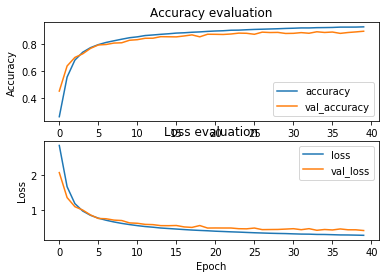

597/597 [==============================] - 5s 9ms/step - loss: 0.3933 - accuracy: 0.8993

Test loss: 0.3933263123035431, test accuracy: 89.9260938167572


In [32]:
main()